
# Hardness Train Model
### The function fron "common_functions.ipynb" is called to run the program
### All the charts and figures are saved in "plots\\hardness" folder

# 1. Import Libraries and files

## 1.1 Import Libraries

In [1]:
#Import Libraries
from pymatgen.core.composition import Composition, Element
from pymatgen.core.structure import SiteCollection
from matminer.featurizers.composition.alloy import Miedema, WenAlloys,YangSolidSolution
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition
from matminer.utils.data import MixingEnthalpy, DemlData
from matminer.utils import data_files #for importing "Miedema.csv" present inside package of Matminer library
from matplotlib.ticker import MultipleLocator # for minor tick lines
import seaborn as sns

import pathlib
from typing import Any, Optional

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd




import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import matplotlib.pyplot as plt

ef= ElementFraction()
stc = StrToComposition()

In [2]:
name='HV'

### Import midema

In [3]:
# Import csv files "Midema" to calculte input features
elem_prop_data = pd.read_csv('Miedema.csv')
VEC_elements = elem_prop_data.set_index('element')['valence_electrons'].to_dict()
shear_modulus_g = elem_prop_data.set_index('element')['shear_modulus'].to_dict()
bulk_modulus_b = elem_prop_data.set_index('element')['compressibility'].to_dict()

### Load datasets

In [4]:
# Load hardness data and Featurization
df = pd.read_csv('hardness.csv')
path = "hardness_model_files\\"
#plot_path = "plots\\hardness"

## 1.2 Featurization

In [5]:
%run common_functions.ipynb
df = featurization(df)

StrToComposition:   0%|          | 0/706 [00:00<?, ?it/s]

ElementFraction:   0%|          | 0/706 [00:00<?, ?it/s]

## 1.3 Informations and Plots on collected datasets

In [6]:
df = df.loc[:, (df != 0).any(axis=0)]
    
cols = list(df.columns.values)    #Make a list of all of the columns in the df
set = df.astype(bool).sum(axis=0) # Extract the occurance of each element in the alloys

element_df = set.to_frame()      # Convert extracted the occurance of each element in dataframe

element_occurancy = element_df[7:]
element_occurancy.columns =['Occurance']
    

In [7]:
%run common_functions.ipynb
df = df_element_number(df)

## 1.4 Data Filtering

In [8]:
%run common_functions.ipynb
df = data_elimination(df)

Total Datasets 706
Datasets eleminated due to fewer number of element occurance: 14
Datasets eleminated due to number of element in alloy: 9
Total Datasets for the hardness prediction 683


# 2. Input properties calculations

In [9]:

%run common_functions.ipynb
df, df_input_target = properties_calculation(df)

In [10]:
df_input_target

No of Components  $\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC  \
0                   4  0.046524   0.1649  267.534101  1470.135385  9.538462   
1                   4  0.048130   0.1594  363.371074  1366.137094  9.867735   
2                   4  0.046524   0.1649  267.534101  1470.135385  9.538462   
3                   5  0.070652   0.1060  281.710106  1816.557059  7.941176   
4                   5  0.055595   0.1009  229.541666  1848.865122  8.121951   
..                ...       ...      ...         ...          ...       ...   
678                 5  0.065872   0.1149  461.866356  2383.428571  4.285714   
679                 5  0.131479   0.0878  477.662566  2117.547000  4.500000   
680                 5  0.132444   0.1212  436.061672  2119.289167  4.416667   
681                 5  0.135894   0.1134  429.306340  2055.347000  4.400000   
682                 5  0.136181   0.1248  409.860058  2061.951818  4.363636   

            AN           K           B        ΔB          G        ΔG  \
0    27.538462  162.707692  140.769231  0.223710  54.923077  0.257993   
1    27.867735  156.994790  131.302605  0.288945  53.328156  0.258746   
2    27.538462  162.707692  140.769231  0.223710  54.923077  0.257993   
3    25.470588   99.705882  166.823529  0.144396  83.411765  0.256769   
4    25.926829   94.756098  170.146341  0.099855  85.512195  0.218933   
..         ...         ...         ...       ...        ...       ...   
678  44.285714   32.000000  115.302857  0.438251  41.571429  0.295692   
679  27.100000   53.400000  132.956000  0.303395  41.100000  0.166609   
680  29.250000   48.333333  119.723333  0.394565  39.750000  0.174635   
681  27.000000   50.300000  121.312000  0.367238  40.600000  0.178023   
682  28.181818   47.818182  115.152727  0.405807  39.909091  0.181147   

       ΔSmix  $\lambda$    ΔHmix    $\Omega$  Hardness (HV)  
0    10.6859  4936.9749  -3.6447   4310.3182          109.0  
1    11.4684  4950.7965  -7.6728   2041.9321          109.0  
2    10.6859  4936.9749  -3.6447   4310.3182          109.0  
3    12.7077  2545.7557  -9.0166   2560.1782          111.5  
4    12.1979  3946.5165  -5.9975   3760.2372          117.0  
..       ...        ...      ...         ...            ...  
678  12.8853  2969.5890   2.1162  14512.6241          376.0  
679  12.2283   707.3842 -12.9978   1992.1836          622.9  
680  12.6132   719.0589 -12.5014   2138.2429          613.7  
681  12.2283   662.1669 -14.6125   1719.9957          587.1  
682  12.2061   658.1825 -14.2753   1763.0782          583.0  

[683 rows x 17 columns]

## 2.1 One-hot encoding of fabrication processes

In [11]:
df.Fabrication_type = df.Fabrication_type.fillna('OTHER')

df.Fabrication_type = df.Fabrication_type.replace(to_replace=["CAST"], value="CAT-A")


df.Fabrication_type =df.Fabrication_type.replace(to_replace=["OTHER","Unknown","WROUGHT"], value="CAT-B")    
df.Fabrication_type = df.Fabrication_type.replace(to_replace=["POWDER"], value="CAT-C") 

df.Fabrication_type = df.Fabrication_type.replace(to_replace=["ANNEAL"], value="CAT-D")

In [12]:
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
enc = OneHotEncoder()
    
df_fab = pd.DataFrame(enc.fit_transform(df[['Fabrication_type']]).toarray())

# 3. Train-Test split

In [13]:
%run common_functions.ipynb
input_name = ['$\delta$', 'Δ$\chi$', 'ΔTm','Tm(K)', 'VEC', 'AN', 'K','B', 'ΔB','G', 'ΔG','ΔSmix','$\lambda$', 'ΔHmix','$\Omega$']


X_train_no_fab, X_train_fab, X_test_no_fab, X_test_fab,y_train, y_test,n_component = train_test_split(df_input_target, df_fab, input_name)

In [14]:
X_train_no_fab

$\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC         AN  \
81   0.090540   0.1161  380.610688  1676.334444  8.111111  25.222222   
412  0.147198   0.0442  515.143970  1809.367500  4.500000  20.500000   
289  0.140861   0.2497  748.917421  2363.061304  4.739130  36.478261   
76   0.050781   0.1387  241.251877  1785.857033  7.911591  25.770138   
174  0.117549   0.1409  415.370790  1698.652308  6.923077  23.692308   
..        ...      ...         ...          ...       ...        ...   
71   0.074422   0.1068  235.012529  2191.666667  4.000000  44.666667   
106  0.051893   0.1387  243.947098  1784.185686  7.901961  25.745098   
270  0.148963   0.1787  327.184710  2245.727273  4.363636  37.272727   
435  0.089104   0.1228  366.477942  1792.452724  7.608484  25.028821   
102  0.085800   0.1188  343.008917  1701.702632  8.122807  25.421053   

              K           B        ΔB          G        ΔG    ΔSmix  \
81   173.888889  152.888889  0.199832  74.222222  0.379844  13.1452   
412   95.500000  126.500000  0.281355  58.000000  0.584048  11.5257   
289   84.782609  162.086957  0.330661  42.521739  0.409445  13.2416   
76    77.396857  160.479371  0.154619  77.424361  0.303618  13.8832   
174  149.076923  140.923077  0.250350  69.000000  0.451446  14.7842   
..          ...         ...       ...        ...       ...      ...   
71    22.666667   91.186667  0.291776  35.666667  0.168743   9.1339   
106   77.705882  160.313725  0.156374  77.323529  0.305138  13.9209   
270   41.454545  118.829091  0.338653  38.886364  0.161979  14.6972   
435  134.180028  158.261011  0.166773  68.809823  0.367519  15.9085   
102  155.596491  156.140351  0.194241  73.298246  0.350175  15.4453   

     $\lambda$    ΔHmix     $\Omega$  
81   1603.5577  -4.6194    4770.3109  
412   531.9421 -24.7050     844.1262  
289   667.3575 -14.8529    2106.7120  
76   5383.7375  -5.8095    4267.7352  
174  1069.9433 -17.5511    1430.8658  
..         ...      ...          ...  
71   1649.1170  -0.1213  164986.6659  
106  5169.4943  -5.9906    4146.0526  
270   662.3381 -14.5082    2274.9832  
435  2003.7131  -8.8971    3204.9936  
102  2098.0571  -7.3782    3562.2890  

[614 rows x 15 columns]

# 4. Data Standarization

In [15]:
%run common_functions.ipynb
scaler, std_df = std_data(X_train_no_fab)

# 5. Feature Selections

## 5.1 PCC Heatmap

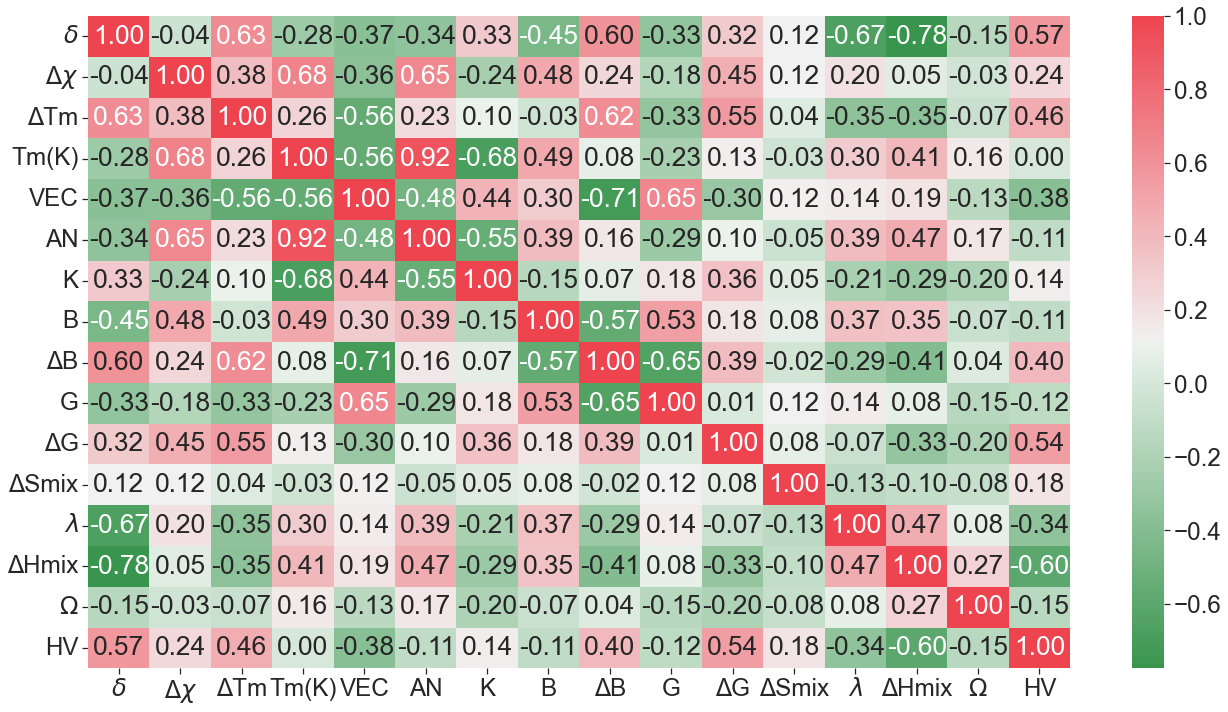

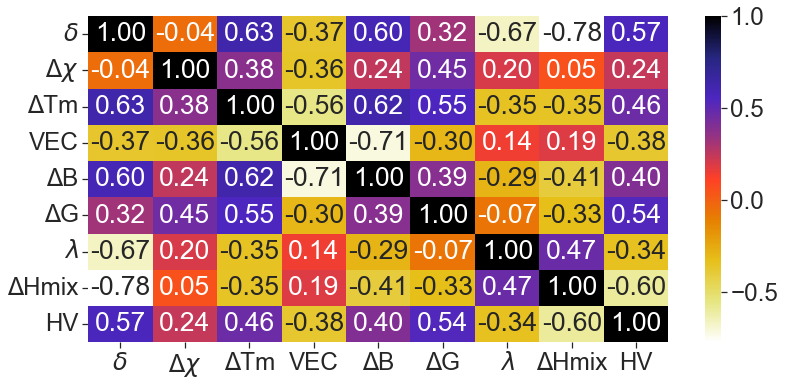

In [16]:

%run common_functions.ipynb

input_pcc = ['$\delta$', 'Δ$\chi$', 'ΔTm', 'VEC', 'ΔB', 'ΔG', '$\lambda$', 'ΔHmix']

pcc_fs(std_df,y_train,input_pcc,"plots\\hardness\\Hv",prop='HV')

df_pcc_1 = std_df.loc[:,input_pcc]

df_pcc_2 = np.column_stack((df_pcc_1,X_train_fab))

df_pairplot =np.column_stack((df_pcc_1,y_train))


# For test datasets
# Standarization
std_test = scaler.transform(X_test_no_fab)
std_test_df = pd.DataFrame(data=std_test, columns=input_name)

# PCC Feature selection for test
test_pcc_1 = std_test_df.loc[:,input_pcc]

# Include Fab Process

test_pcc_2 = np.column_stack((test_pcc_1,X_test_fab))

# 6. Machine Learning Model

In [17]:
def posterior_mean_field(kernel_size: int, bias_size: int, dtype: Any) -> tf.keras.Model:
    n = kernel_size  + bias_size
    c = np.log(np.expm1(1.))
    
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype = dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc =t[..., :n],
                      scale = 1e-5 + tf.nn.softplus(c + t[..., n:])),
        reinterpreted_batch_ndims = 1)),
    ])

In [18]:
def prior_trainable(kernel_size:int, bias_size:int, dtype:Any) -> tf.keras.Model:
    
    n = kernel_size  + bias_size
    
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale = 1),
            reinterpreted_batch_ndims = 1)),
    ])

In [19]:
# Machine Learning Model



# The value used in the function plays no role as the different hyperparameter value will be used while calling "create_model" function
def create_model(input_dim = 12,neuron_size=64, act='selu', opt='Adam', dr=0.0, learning_rate=0.001,init_weights= 'he_uniform', weight_constraint = 3):
#def create_model(neuron_size=64, act='selu', opt='Adam', learning_rate=0.001,init_weights= 'he_uniform', weight_constraint = 3):
    import tensorflow as tf

    import keras
    from keras.layers import Dense
    from keras.models import Sequential
    from keras.layers import Dropout
    from tensorflow.keras.constraints import max_norm
    import tensorflow_probability as tfp
    from tensorflow_probability import distributions as tfd


    import numpy as np
    import matplotlib.pyplot as plt
    
    
    def prior_trainable(kernel_size:int, bias_size:int, dtype:Any) -> tf.keras.Model:
    
        n = kernel_size  + bias_size

        return tf.keras.Sequential([
            tfp.layers.VariableLayer(n, dtype=dtype),
            tfp.layers.DistributionLambda(lambda t: tfd.Independent(
                tfd.Normal(loc=t, scale = 1),
                reinterpreted_batch_ndims = 1)),
        ])
    
    
    
    def posterior_mean_field(kernel_size: int, bias_size: int, dtype: Any) -> tf.keras.Model:
        n = kernel_size  + bias_size
        c = np.log(np.expm1(1.))

        return tf.keras.Sequential([
            tfp.layers.VariableLayer(2 * n, dtype = dtype),
            tfp.layers.DistributionLambda(lambda t: tfd.Independent(
                tfd.Normal(loc =t[..., :n],
                          scale = 1e-5 + tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims = 1)),
        ])
    

    
    # clear model
    tf.keras.backend.clear_session()

    #model = Sequential()
    
    # create first hidden layer

    model = keras.Sequential([
        #tfp.layers.DenseVariational(neuron_size, activation=act,input_shape=input_dim,
        tfp.layers.DenseVariational(neuron_size, activation=act,input_shape=[input_dim],                           
                                    make_posterior_fn=posterior_mean_field,
                                    make_prior_fn=prior_trainable),
        
        
        #for i in range(1,lyrs):
        #layers.Dense(neuron_size, activation=act, kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),
        layers.Dropout(dr),
        
      
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        #layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        #layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        #layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        #layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        #layers.Dropout(dr),
        layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        layers.Dropout(dr),
        #layers.Dense(neuron_size, activation=act,kernel_initializer = init_weights, kernel_constraint = max_norm(weight_constraint),kernel_regularizer='l2'),  # output layer
        
        layers.Dense(1)]) 
        
    opt = Adam(learning_rate=learning_rate)
    #huber = tf.keras.losses.Huber(delta=1.5)
    #model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt, metrics=['mse', 'mape','mae',tf.keras.metrics.RootMeanSquaredError()])
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt, metrics=['mse', 'mape','mae',tf.keras.metrics.RootMeanSquaredError()])
    
    return model
    


# Probablistic Model

In [20]:
df_pcc_2.shape[1]

12

In [21]:

import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = df_pcc_2.shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 20000
np.random.seed(42)

model = create_model(input_dim = df_pcc_2.shape[1],neuron_size=48, act='selu', opt='Adam', dr=0.05, learning_rate=0.0005,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/10 CV split
history=model.fit(df_pcc_2, y_train,epochs=max_epochs,batch_size=4,validation_split=0.1, verbose=2)
#val_loss = np.mean(training.history['val_loss'])

12
Epoch 1/20000
138/138 - 5s - loss: 179672.2188 - mse: 179665.4844 - mape: 73.6424 - mae: 363.3794 - root_mean_squared_error: 423.8697 - val_loss: 72136.0781 - val_mse: 72129.5703 - val_mape: 58.0275 - val_mae: 226.9135 - val_root_mean_squared_error: 268.5695 - 5s/epoch - 34ms/step
Epoch 2/20000
138/138 - 1s - loss: 78427.9375 - mse: 78420.6953 - mape: 56.7150 - mae: 228.2688 - root_mean_squared_error: 280.0370 - val_loss: 54792.5547 - val_mse: 54785.6836 - val_mape: 45.1597 - val_mae: 186.1160 - val_root_mean_squared_error: 234.0634 - 509ms/epoch - 4ms/step
Epoch 3/20000
138/138 - 1s - loss: 58249.3516 - mse: 58241.5664 - mape: 50.1379 - mae: 196.4283 - root_mean_squared_error: 241.3329 - val_loss: 37802.6484 - val_mse: 37795.1797 - val_mape: 43.5192 - val_mae: 157.1449 - val_root_mean_squared_error: 194.4098 - 502ms/epoch - 4ms/step
Epoch 4/20000
138/138 - 1s - loss: 52364.7969 - mse: 52356.8047 - mape: 49.2657 - mae: 185.4466 - root_mean_squared_error: 228.8161 - val_loss: 32962.8

Epoch 30/20000
138/138 - 1s - loss: 24354.0879 - mse: 24344.1777 - mape: 33.4791 - mae: 126.9603 - root_mean_squared_error: 156.0262 - val_loss: 21747.1504 - val_mse: 21736.7852 - val_mape: 31.8552 - val_mae: 120.7799 - val_root_mean_squared_error: 147.4340 - 520ms/epoch - 4ms/step
Epoch 31/20000
138/138 - 1s - loss: 23035.5312 - mse: 23026.0703 - mape: 32.1767 - mae: 123.4210 - root_mean_squared_error: 151.7434 - val_loss: 24856.9043 - val_mse: 24847.9766 - val_mape: 35.7140 - val_mae: 130.5801 - val_root_mean_squared_error: 157.6324 - 502ms/epoch - 4ms/step
Epoch 32/20000
138/138 - 1s - loss: 21676.3496 - mse: 21666.7285 - mape: 31.0075 - mae: 120.1448 - root_mean_squared_error: 147.1962 - val_loss: 23624.3691 - val_mse: 23614.4922 - val_mape: 34.3871 - val_mae: 129.2098 - val_root_mean_squared_error: 153.6701 - 530ms/epoch - 4ms/step
Epoch 33/20000
138/138 - 0s - loss: 22775.8711 - mse: 22766.2812 - mape: 31.6655 - mae: 122.5723 - root_mean_squared_error: 150.8850 - val_loss: 18174.

Epoch 59/20000
138/138 - 1s - loss: 21502.1562 - mse: 21491.5977 - mape: 30.1133 - mae: 115.9475 - root_mean_squared_error: 146.6001 - val_loss: 22181.5605 - val_mse: 22171.5234 - val_mape: 30.2091 - val_mae: 120.0517 - val_root_mean_squared_error: 148.9010 - 517ms/epoch - 4ms/step
Epoch 60/20000
138/138 - 1s - loss: 20928.6641 - mse: 20918.2305 - mape: 29.2372 - mae: 116.7661 - root_mean_squared_error: 144.6314 - val_loss: 17668.4648 - val_mse: 17657.6328 - val_mape: 27.7295 - val_mae: 107.2529 - val_root_mean_squared_error: 132.8820 - 525ms/epoch - 4ms/step
Epoch 61/20000
138/138 - 0s - loss: 20317.3262 - mse: 20307.3105 - mape: 29.7397 - mae: 115.6691 - root_mean_squared_error: 142.5037 - val_loss: 18150.7461 - val_mse: 18140.5586 - val_mape: 25.9337 - val_mae: 107.1911 - val_root_mean_squared_error: 134.6869 - 470ms/epoch - 3ms/step
Epoch 62/20000
138/138 - 1s - loss: 20380.5664 - mse: 20369.9941 - mape: 29.1039 - mae: 113.7757 - root_mean_squared_error: 142.7235 - val_loss: 18482.

Epoch 88/20000
138/138 - 1s - loss: 18871.9805 - mse: 18860.0742 - mape: 27.5336 - mae: 108.6261 - root_mean_squared_error: 137.3320 - val_loss: 17310.9297 - val_mse: 17298.4668 - val_mape: 28.3142 - val_mae: 106.4073 - val_root_mean_squared_error: 131.5236 - 627ms/epoch - 5ms/step
Epoch 89/20000
138/138 - 1s - loss: 19095.4395 - mse: 19083.3730 - mape: 28.3686 - mae: 110.6578 - root_mean_squared_error: 138.1426 - val_loss: 16684.8184 - val_mse: 16671.5332 - val_mape: 28.8133 - val_mae: 106.5953 - val_root_mean_squared_error: 129.1183 - 516ms/epoch - 4ms/step
Epoch 90/20000
138/138 - 1s - loss: 19323.1426 - mse: 19310.9883 - mape: 28.3460 - mae: 109.5532 - root_mean_squared_error: 138.9640 - val_loss: 17366.9219 - val_mse: 17355.5762 - val_mape: 27.4383 - val_mae: 104.2221 - val_root_mean_squared_error: 131.7406 - 552ms/epoch - 4ms/step
Epoch 91/20000
138/138 - 1s - loss: 18855.2266 - mse: 18842.6504 - mape: 27.8258 - mae: 109.0196 - root_mean_squared_error: 137.2685 - val_loss: 17929.

Epoch 117/20000
138/138 - 0s - loss: 17575.3223 - mse: 17560.2715 - mape: 27.0471 - mae: 104.5276 - root_mean_squared_error: 132.5152 - val_loss: 13965.4268 - val_mse: 13952.0420 - val_mape: 27.3835 - val_mae: 98.7623 - val_root_mean_squared_error: 118.1188 - 252ms/epoch - 2ms/step
Epoch 118/20000
138/138 - 0s - loss: 18305.0098 - mse: 18289.6973 - mape: 28.2528 - mae: 109.7814 - root_mean_squared_error: 135.2394 - val_loss: 15155.7256 - val_mse: 15139.3018 - val_mape: 24.4597 - val_mae: 99.2395 - val_root_mean_squared_error: 123.0419 - 198ms/epoch - 1ms/step
Epoch 119/20000
138/138 - 0s - loss: 18038.8223 - mse: 18023.3379 - mape: 26.4452 - mae: 105.6368 - root_mean_squared_error: 134.2510 - val_loss: 17795.9961 - val_mse: 17780.6309 - val_mape: 27.4378 - val_mae: 103.6451 - val_root_mean_squared_error: 133.3440 - 210ms/epoch - 2ms/step
Epoch 120/20000
138/138 - 0s - loss: 18137.9395 - mse: 18122.7129 - mape: 28.0792 - mae: 106.7079 - root_mean_squared_error: 134.6206 - val_loss: 1596

Epoch 146/20000
138/138 - 1s - loss: 17245.9375 - mse: 17227.7520 - mape: 27.0894 - mae: 103.5571 - root_mean_squared_error: 131.2545 - val_loss: 14601.2930 - val_mse: 14580.1504 - val_mape: 26.8852 - val_mae: 98.2037 - val_root_mean_squared_error: 120.7483 - 506ms/epoch - 4ms/step
Epoch 147/20000
138/138 - 0s - loss: 17116.0859 - mse: 17098.0547 - mape: 26.9385 - mae: 103.6658 - root_mean_squared_error: 130.7595 - val_loss: 13117.6846 - val_mse: 13100.1543 - val_mape: 23.5905 - val_mae: 91.6590 - val_root_mean_squared_error: 114.4559 - 490ms/epoch - 4ms/step
Epoch 148/20000
138/138 - 0s - loss: 17603.5508 - mse: 17585.0879 - mape: 27.9171 - mae: 104.9128 - root_mean_squared_error: 132.6088 - val_loss: 14923.0410 - val_mse: 14902.6201 - val_mape: 23.1642 - val_mae: 94.5735 - val_root_mean_squared_error: 122.0763 - 490ms/epoch - 4ms/step
Epoch 149/20000
138/138 - 0s - loss: 17895.4199 - mse: 17876.5371 - mape: 27.2542 - mae: 106.1417 - root_mean_squared_error: 133.7032 - val_loss: 14658

Epoch 175/20000
138/138 - 0s - loss: 17749.1133 - mse: 17726.4395 - mape: 27.2598 - mae: 104.1625 - root_mean_squared_error: 133.1407 - val_loss: 14759.0039 - val_mse: 14734.9639 - val_mape: 24.9114 - val_mae: 96.7413 - val_root_mean_squared_error: 121.3877 - 491ms/epoch - 4ms/step
Epoch 176/20000
138/138 - 0s - loss: 15174.1523 - mse: 15150.9307 - mape: 25.1837 - mae: 96.8819 - root_mean_squared_error: 123.0891 - val_loss: 12704.5771 - val_mse: 12683.8105 - val_mape: 23.7690 - val_mae: 89.4298 - val_root_mean_squared_error: 112.6224 - 481ms/epoch - 3ms/step
Epoch 177/20000
138/138 - 1s - loss: 16191.9980 - mse: 16169.1182 - mape: 25.6858 - mae: 100.1757 - root_mean_squared_error: 127.1578 - val_loss: 14549.3320 - val_mse: 14527.8076 - val_mape: 25.8742 - val_mae: 97.6134 - val_root_mean_squared_error: 120.5314 - 500ms/epoch - 4ms/step
Epoch 178/20000
138/138 - 1s - loss: 16732.2617 - mse: 16708.7578 - mape: 26.3883 - mae: 102.2537 - root_mean_squared_error: 129.2624 - val_loss: 14608.

138/138 - 1s - loss: 14905.8965 - mse: 14878.1475 - mape: 24.2356 - mae: 94.4472 - root_mean_squared_error: 121.9760 - val_loss: 12141.8818 - val_mse: 12114.0693 - val_mape: 23.9318 - val_mae: 87.8922 - val_root_mean_squared_error: 110.0639 - 507ms/epoch - 4ms/step
Epoch 205/20000
138/138 - 1s - loss: 15801.4043 - mse: 15773.3584 - mape: 25.2938 - mae: 97.1648 - root_mean_squared_error: 125.5920 - val_loss: 16413.2617 - val_mse: 16386.2656 - val_mape: 26.7245 - val_mae: 101.0394 - val_root_mean_squared_error: 128.0089 - 512ms/epoch - 4ms/step
Epoch 206/20000
138/138 - 1s - loss: 16621.1367 - mse: 16593.3496 - mape: 26.3153 - mae: 101.7682 - root_mean_squared_error: 128.8152 - val_loss: 15801.4160 - val_mse: 15773.5273 - val_mape: 24.6680 - val_mae: 100.4323 - val_root_mean_squared_error: 125.5927 - 512ms/epoch - 4ms/step
Epoch 207/20000
138/138 - 0s - loss: 15830.8115 - mse: 15802.3555 - mape: 24.7583 - mae: 96.7697 - root_mean_squared_error: 125.7074 - val_loss: 14649.9658 - val_mse: 

Epoch 234/20000
138/138 - 1s - loss: 14756.5020 - mse: 14724.4756 - mape: 24.5687 - mae: 94.1331 - root_mean_squared_error: 121.3445 - val_loss: 12607.7295 - val_mse: 12574.0166 - val_mape: 19.8341 - val_mae: 82.1320 - val_root_mean_squared_error: 112.1339 - 512ms/epoch - 4ms/step
Epoch 235/20000
138/138 - 1s - loss: 16484.1797 - mse: 16452.0918 - mape: 25.7624 - mae: 99.7666 - root_mean_squared_error: 128.2657 - val_loss: 17076.3203 - val_mse: 17040.9102 - val_mape: 28.2936 - val_mae: 101.1516 - val_root_mean_squared_error: 130.5408 - 554ms/epoch - 4ms/step
Epoch 236/20000
138/138 - 1s - loss: 14318.0742 - mse: 14284.4482 - mape: 24.3756 - mae: 92.8931 - root_mean_squared_error: 119.5176 - val_loss: 12433.4941 - val_mse: 12400.3320 - val_mape: 23.2192 - val_mae: 87.3392 - val_root_mean_squared_error: 111.3568 - 529ms/epoch - 4ms/step
Epoch 237/20000
138/138 - 1s - loss: 15646.8965 - mse: 15614.1309 - mape: 25.3391 - mae: 97.3969 - root_mean_squared_error: 124.9565 - val_loss: 14252.57

138/138 - 0s - loss: 14689.1152 - mse: 14651.1211 - mape: 23.5770 - mae: 93.0030 - root_mean_squared_error: 121.0418 - val_loss: 14758.5869 - val_mse: 14720.4326 - val_mape: 25.1919 - val_mae: 93.5722 - val_root_mean_squared_error: 121.3278 - 497ms/epoch - 4ms/step
Epoch 264/20000
138/138 - 1s - loss: 14821.6807 - mse: 14783.2305 - mape: 25.2095 - mae: 93.6336 - root_mean_squared_error: 121.5863 - val_loss: 11628.6924 - val_mse: 11590.3545 - val_mape: 24.0522 - val_mae: 88.9931 - val_root_mean_squared_error: 107.6585 - 508ms/epoch - 4ms/step
Epoch 265/20000
138/138 - 1s - loss: 14327.5186 - mse: 14289.0459 - mape: 24.4104 - mae: 94.2145 - root_mean_squared_error: 119.5368 - val_loss: 14742.5889 - val_mse: 14703.4922 - val_mape: 23.6231 - val_mae: 93.9502 - val_root_mean_squared_error: 121.2580 - 523ms/epoch - 4ms/step
Epoch 266/20000
138/138 - 1s - loss: 14788.5781 - mse: 14748.8701 - mape: 24.3218 - mae: 94.4025 - root_mean_squared_error: 121.4449 - val_loss: 11169.0713 - val_mse: 111

Epoch 293/20000
138/138 - 0s - loss: 14234.5732 - mse: 14188.3936 - mape: 24.7142 - mae: 91.9251 - root_mean_squared_error: 119.1150 - val_loss: 12445.9307 - val_mse: 12401.1729 - val_mape: 22.6499 - val_mae: 88.2896 - val_root_mean_squared_error: 111.3605 - 488ms/epoch - 4ms/step
Epoch 294/20000
138/138 - 1s - loss: 13251.0703 - mse: 13205.3672 - mape: 23.3408 - mae: 89.4625 - root_mean_squared_error: 114.9146 - val_loss: 12878.9131 - val_mse: 12832.9297 - val_mape: 22.4803 - val_mae: 88.3298 - val_root_mean_squared_error: 113.2825 - 502ms/epoch - 4ms/step
Epoch 295/20000
138/138 - 1s - loss: 13968.6582 - mse: 13923.9258 - mape: 23.5212 - mae: 89.2303 - root_mean_squared_error: 117.9997 - val_loss: 12933.1035 - val_mse: 12882.9629 - val_mape: 24.5628 - val_mae: 90.1059 - val_root_mean_squared_error: 113.5031 - 510ms/epoch - 4ms/step
Epoch 296/20000
138/138 - 1s - loss: 14136.9814 - mse: 14091.1602 - mape: 23.9885 - mae: 89.9480 - root_mean_squared_error: 118.7062 - val_loss: 11008.455

Epoch 323/20000
138/138 - 1s - loss: 13936.5957 - mse: 13882.6846 - mape: 23.6849 - mae: 89.6581 - root_mean_squared_error: 117.8248 - val_loss: 11325.6885 - val_mse: 11268.1055 - val_mape: 21.5024 - val_mae: 84.9576 - val_root_mean_squared_error: 106.1513 - 512ms/epoch - 4ms/step
Epoch 324/20000
138/138 - 1s - loss: 13296.3271 - mse: 13242.4189 - mape: 22.4211 - mae: 87.3974 - root_mean_squared_error: 115.0757 - val_loss: 9243.5225 - val_mse: 9192.2363 - val_mape: 20.4541 - val_mae: 75.7963 - val_root_mean_squared_error: 95.8762 - 505ms/epoch - 4ms/step
Epoch 325/20000
138/138 - 0s - loss: 13014.9941 - mse: 12961.0645 - mape: 23.1229 - mae: 87.8223 - root_mean_squared_error: 113.8467 - val_loss: 10405.5059 - val_mse: 10349.1943 - val_mape: 21.5220 - val_mae: 84.7126 - val_root_mean_squared_error: 101.7310 - 485ms/epoch - 4ms/step
Epoch 326/20000
138/138 - 1s - loss: 13081.0557 - mse: 13026.5742 - mape: 22.4908 - mae: 87.7440 - root_mean_squared_error: 114.1340 - val_loss: 10901.6611 -

Epoch 353/20000
138/138 - 1s - loss: 11894.0889 - mse: 11832.5342 - mape: 21.8879 - mae: 83.1692 - root_mean_squared_error: 108.7775 - val_loss: 10335.7695 - val_mse: 10273.0840 - val_mape: 21.2419 - val_mae: 82.3362 - val_root_mean_squared_error: 101.3562 - 526ms/epoch - 4ms/step
Epoch 354/20000
138/138 - 1s - loss: 12767.7061 - mse: 12704.7578 - mape: 22.5471 - mae: 86.5564 - root_mean_squared_error: 112.7154 - val_loss: 11077.7832 - val_mse: 11013.2637 - val_mape: 20.1603 - val_mae: 81.0133 - val_root_mean_squared_error: 104.9441 - 515ms/epoch - 4ms/step
Epoch 355/20000
138/138 - 1s - loss: 13055.1562 - mse: 12991.7197 - mape: 22.6291 - mae: 85.9890 - root_mean_squared_error: 113.9812 - val_loss: 8984.7061 - val_mse: 8921.4824 - val_mape: 19.0417 - val_mae: 74.4681 - val_root_mean_squared_error: 94.4536 - 511ms/epoch - 4ms/step
Epoch 356/20000
138/138 - 1s - loss: 12647.3438 - mse: 12582.5400 - mape: 22.1667 - mae: 85.9869 - root_mean_squared_error: 112.1719 - val_loss: 10406.1836 -

Epoch 383/20000
138/138 - 1s - loss: 10801.3838 - mse: 10728.9668 - mape: 20.4737 - mae: 77.5900 - root_mean_squared_error: 103.5807 - val_loss: 10682.6436 - val_mse: 10609.8613 - val_mape: 23.0383 - val_mae: 83.7363 - val_root_mean_squared_error: 103.0042 - 530ms/epoch - 4ms/step
Epoch 384/20000
138/138 - 1s - loss: 12112.7930 - mse: 12039.5674 - mape: 22.1843 - mae: 81.8524 - root_mean_squared_error: 109.7250 - val_loss: 11063.6865 - val_mse: 10992.9668 - val_mape: 21.6316 - val_mae: 82.2136 - val_root_mean_squared_error: 104.8474 - 505ms/epoch - 4ms/step
Epoch 385/20000
138/138 - 1s - loss: 11431.5381 - mse: 11357.7246 - mape: 20.8221 - mae: 81.3015 - root_mean_squared_error: 106.5726 - val_loss: 9265.3232 - val_mse: 9195.3311 - val_mape: 19.7030 - val_mae: 77.9392 - val_root_mean_squared_error: 95.8923 - 505ms/epoch - 4ms/step
Epoch 386/20000
138/138 - 0s - loss: 11202.8330 - mse: 11131.3887 - mape: 21.0878 - mae: 79.4349 - root_mean_squared_error: 105.5054 - val_loss: 11615.3164 -

Epoch 413/20000
138/138 - 0s - loss: 10422.0898 - mse: 10340.8320 - mape: 20.1768 - mae: 76.6300 - root_mean_squared_error: 101.6899 - val_loss: 9507.6045 - val_mse: 9425.0059 - val_mape: 18.7230 - val_mae: 71.6595 - val_root_mean_squared_error: 97.0825 - 495ms/epoch - 4ms/step
Epoch 414/20000
138/138 - 1s - loss: 11021.7197 - mse: 10939.4229 - mape: 20.7798 - mae: 79.4898 - root_mean_squared_error: 104.5917 - val_loss: 8684.2480 - val_mse: 8602.3135 - val_mape: 20.6271 - val_mae: 73.2159 - val_root_mean_squared_error: 92.7487 - 510ms/epoch - 4ms/step
Epoch 415/20000
138/138 - 1s - loss: 10851.9482 - mse: 10769.2188 - mape: 20.3079 - mae: 78.0833 - root_mean_squared_error: 103.7748 - val_loss: 8806.0879 - val_mse: 8723.5645 - val_mape: 21.7681 - val_mae: 77.6643 - val_root_mean_squared_error: 93.4000 - 528ms/epoch - 4ms/step
Epoch 416/20000
138/138 - 1s - loss: 10910.5059 - mse: 10828.2734 - mape: 20.6744 - mae: 78.5476 - root_mean_squared_error: 104.0590 - val_loss: 9166.1182 - val_ms

Epoch 443/20000
138/138 - 1s - loss: 9662.4424 - mse: 9569.4941 - mape: 19.4675 - mae: 75.8167 - root_mean_squared_error: 97.8238 - val_loss: 8338.9355 - val_mse: 8242.7568 - val_mape: 19.8064 - val_mae: 72.3261 - val_root_mean_squared_error: 90.7896 - 511ms/epoch - 4ms/step
Epoch 444/20000
138/138 - 1s - loss: 9206.9521 - mse: 9114.0547 - mape: 18.4549 - mae: 71.7457 - root_mean_squared_error: 95.4676 - val_loss: 10627.2764 - val_mse: 10534.7578 - val_mape: 21.6540 - val_mae: 79.6943 - val_root_mean_squared_error: 102.6390 - 510ms/epoch - 4ms/step
Epoch 445/20000
138/138 - 1s - loss: 10676.5518 - mse: 10581.9062 - mape: 20.2762 - mae: 78.1847 - root_mean_squared_error: 102.8684 - val_loss: 7718.6768 - val_mse: 7623.5059 - val_mape: 19.3731 - val_mae: 67.6731 - val_root_mean_squared_error: 87.3127 - 518ms/epoch - 4ms/step
Epoch 446/20000
138/138 - 1s - loss: 10534.1387 - mse: 10440.3008 - mape: 19.8970 - mae: 76.2964 - root_mean_squared_error: 102.1778 - val_loss: 10174.0186 - val_mse:

Epoch 473/20000
138/138 - 1s - loss: 8896.9365 - mse: 8791.6387 - mape: 18.6255 - mae: 70.9714 - root_mean_squared_error: 93.7637 - val_loss: 8590.7256 - val_mse: 8487.5596 - val_mape: 19.8080 - val_mae: 71.0076 - val_root_mean_squared_error: 92.1280 - 518ms/epoch - 4ms/step
Epoch 474/20000
138/138 - 1s - loss: 8866.6338 - mse: 8760.0469 - mape: 18.2925 - mae: 70.9542 - root_mean_squared_error: 93.5951 - val_loss: 6938.8145 - val_mse: 6828.2349 - val_mape: 17.6180 - val_mae: 65.3393 - val_root_mean_squared_error: 82.6331 - 501ms/epoch - 4ms/step
Epoch 475/20000
138/138 - 1s - loss: 9658.6709 - mse: 9553.7422 - mape: 18.7559 - mae: 72.9153 - root_mean_squared_error: 97.7432 - val_loss: 10673.6816 - val_mse: 10564.2139 - val_mape: 22.3216 - val_mae: 74.6865 - val_root_mean_squared_error: 102.7824 - 502ms/epoch - 4ms/step
Epoch 476/20000
138/138 - 1s - loss: 8644.2627 - mse: 8538.3584 - mape: 18.3423 - mae: 69.5933 - root_mean_squared_error: 92.4032 - val_loss: 13208.5635 - val_mse: 13105

Epoch 503/20000
138/138 - 1s - loss: 9599.8916 - mse: 9481.9980 - mape: 19.0194 - mae: 72.0237 - root_mean_squared_error: 97.3755 - val_loss: 9759.6426 - val_mse: 9644.4648 - val_mape: 20.8050 - val_mae: 75.8383 - val_root_mean_squared_error: 98.2062 - 557ms/epoch - 4ms/step
Epoch 504/20000
138/138 - 1s - loss: 9259.2803 - mse: 9140.5752 - mape: 17.6503 - mae: 69.9931 - root_mean_squared_error: 95.6064 - val_loss: 9586.7559 - val_mse: 9468.8398 - val_mape: 20.5924 - val_mae: 73.0750 - val_root_mean_squared_error: 97.3080 - 567ms/epoch - 4ms/step
Epoch 505/20000
138/138 - 0s - loss: 8968.3574 - mse: 8850.4229 - mape: 18.7047 - mae: 71.9382 - root_mean_squared_error: 94.0767 - val_loss: 8892.4580 - val_mse: 8774.0596 - val_mape: 19.7858 - val_mae: 69.3803 - val_root_mean_squared_error: 93.6700 - 490ms/epoch - 4ms/step
Epoch 506/20000
138/138 - 1s - loss: 8017.9468 - mse: 7898.4155 - mape: 17.2879 - mae: 66.4609 - root_mean_squared_error: 88.8730 - val_loss: 11976.8389 - val_mse: 11855.24

Epoch 533/20000
138/138 - 1s - loss: 8298.5117 - mse: 8167.9087 - mape: 17.5712 - mae: 67.6401 - root_mean_squared_error: 90.3765 - val_loss: 14397.0039 - val_mse: 14265.1865 - val_mape: 22.2751 - val_mae: 89.4789 - val_root_mean_squared_error: 119.4370 - 510ms/epoch - 4ms/step
Epoch 534/20000
138/138 - 1s - loss: 8450.4414 - mse: 8319.0479 - mape: 16.8340 - mae: 65.8119 - root_mean_squared_error: 91.2088 - val_loss: 9761.1807 - val_mse: 9628.0371 - val_mape: 19.5349 - val_mae: 73.2254 - val_root_mean_squared_error: 98.1226 - 531ms/epoch - 4ms/step
Epoch 535/20000
138/138 - 1s - loss: 8075.4204 - mse: 7943.5659 - mape: 17.7361 - mae: 66.7158 - root_mean_squared_error: 89.1267 - val_loss: 9255.6348 - val_mse: 9123.5889 - val_mape: 18.3796 - val_mae: 72.6339 - val_root_mean_squared_error: 95.5175 - 519ms/epoch - 4ms/step
Epoch 536/20000
138/138 - 1s - loss: 7521.3633 - mse: 7388.9224 - mape: 16.8616 - mae: 64.3662 - root_mean_squared_error: 85.9588 - val_loss: 8995.7305 - val_mse: 8861.4

Epoch 563/20000
138/138 - 1s - loss: 7295.3921 - mse: 7153.7295 - mape: 16.8487 - mae: 63.9613 - root_mean_squared_error: 84.5797 - val_loss: 10046.4941 - val_mse: 9901.6113 - val_mape: 20.4601 - val_mae: 72.8033 - val_root_mean_squared_error: 99.5068 - 519ms/epoch - 4ms/step
Epoch 564/20000
138/138 - 1s - loss: 7718.7500 - mse: 7572.1821 - mape: 15.5660 - mae: 63.1258 - root_mean_squared_error: 87.0183 - val_loss: 10562.6475 - val_mse: 10417.5107 - val_mape: 21.0055 - val_mae: 75.1357 - val_root_mean_squared_error: 102.0662 - 540ms/epoch - 4ms/step
Epoch 565/20000
138/138 - 1s - loss: 8069.4258 - mse: 7924.4102 - mape: 17.2675 - mae: 65.7455 - root_mean_squared_error: 89.0192 - val_loss: 11394.1377 - val_mse: 11246.1133 - val_mape: 21.0405 - val_mae: 78.7929 - val_root_mean_squared_error: 106.0477 - 535ms/epoch - 4ms/step
Epoch 566/20000
138/138 - 1s - loss: 7503.0312 - mse: 7358.7549 - mape: 16.6226 - mae: 63.2760 - root_mean_squared_error: 85.7832 - val_loss: 10101.1445 - val_mse: 9

Epoch 593/20000
138/138 - 0s - loss: 7263.6538 - mse: 7106.5801 - mape: 16.0395 - mae: 61.8606 - root_mean_squared_error: 84.3005 - val_loss: 8990.0557 - val_mse: 8831.0127 - val_mape: 18.9512 - val_mae: 67.0229 - val_root_mean_squared_error: 93.9735 - 485ms/epoch - 4ms/step
Epoch 594/20000
138/138 - 1s - loss: 7137.4731 - mse: 6980.4302 - mape: 16.0368 - mae: 61.7919 - root_mean_squared_error: 83.5490 - val_loss: 8780.7139 - val_mse: 8621.6699 - val_mape: 18.5245 - val_mae: 65.2707 - val_root_mean_squared_error: 92.8530 - 524ms/epoch - 4ms/step
Epoch 595/20000
138/138 - 1s - loss: 7047.9155 - mse: 6889.7847 - mape: 15.7006 - mae: 60.7502 - root_mean_squared_error: 83.0047 - val_loss: 9661.7646 - val_mse: 9504.5430 - val_mape: 20.4272 - val_mae: 70.0473 - val_root_mean_squared_error: 97.4912 - 537ms/epoch - 4ms/step
Epoch 596/20000
138/138 - 1s - loss: 6632.4048 - mse: 6472.7070 - mape: 15.8877 - mae: 60.1074 - root_mean_squared_error: 80.4531 - val_loss: 9618.8857 - val_mse: 9456.1572

Epoch 623/20000
138/138 - 0s - loss: 6522.7397 - mse: 6350.5439 - mape: 14.9952 - mae: 58.7946 - root_mean_squared_error: 79.6903 - val_loss: 11907.5801 - val_mse: 11739.9932 - val_mape: 22.7796 - val_mae: 80.8828 - val_root_mean_squared_error: 108.3512 - 495ms/epoch - 4ms/step
Epoch 624/20000
138/138 - 0s - loss: 7022.8042 - mse: 6849.8765 - mape: 15.7097 - mae: 62.6207 - root_mean_squared_error: 82.7640 - val_loss: 11646.4512 - val_mse: 11475.3887 - val_mape: 22.8334 - val_mae: 77.7734 - val_root_mean_squared_error: 107.1232 - 476ms/epoch - 3ms/step
Epoch 625/20000
138/138 - 1s - loss: 6496.6831 - mse: 6323.6333 - mape: 15.1833 - mae: 59.1706 - root_mean_squared_error: 79.5213 - val_loss: 10430.0947 - val_mse: 10257.1660 - val_mape: 20.9684 - val_mae: 72.2295 - val_root_mean_squared_error: 101.2777 - 558ms/epoch - 4ms/step
Epoch 626/20000
138/138 - 1s - loss: 6472.0381 - mse: 6297.7808 - mape: 15.0421 - mae: 58.4281 - root_mean_squared_error: 79.3586 - val_loss: 9363.2607 - val_mse: 

Epoch 653/20000
138/138 - 1s - loss: 6074.5791 - mse: 5885.2637 - mape: 14.7818 - mae: 57.6117 - root_mean_squared_error: 76.7155 - val_loss: 9371.0713 - val_mse: 9185.1299 - val_mape: 19.9779 - val_mae: 66.6307 - val_root_mean_squared_error: 95.8391 - 530ms/epoch - 4ms/step
Epoch 654/20000
138/138 - 0s - loss: 7059.3979 - mse: 6871.2827 - mape: 15.6708 - mae: 60.3979 - root_mean_squared_error: 82.8932 - val_loss: 8669.0977 - val_mse: 8477.9316 - val_mape: 19.8969 - val_mae: 66.6202 - val_root_mean_squared_error: 92.0757 - 495ms/epoch - 4ms/step
Epoch 655/20000
138/138 - 1s - loss: 6255.3921 - mse: 6066.3789 - mape: 15.1977 - mae: 57.9128 - root_mean_squared_error: 77.8870 - val_loss: 9831.2539 - val_mse: 9638.8105 - val_mape: 21.3401 - val_mae: 72.3151 - val_root_mean_squared_error: 98.1774 - 513ms/epoch - 4ms/step
Epoch 656/20000
138/138 - 1s - loss: 6500.4478 - mse: 6310.0215 - mape: 15.3616 - mae: 57.6179 - root_mean_squared_error: 79.4356 - val_loss: 10049.3984 - val_mse: 9861.630

Epoch 683/20000
138/138 - 1s - loss: 6769.4785 - mse: 6570.1924 - mape: 15.4953 - mae: 58.0185 - root_mean_squared_error: 81.0567 - val_loss: 11872.2324 - val_mse: 11673.7100 - val_mape: 22.3624 - val_mae: 76.6682 - val_root_mean_squared_error: 108.0449 - 525ms/epoch - 4ms/step
Epoch 684/20000
138/138 - 0s - loss: 6462.8960 - mse: 6260.7534 - mape: 14.9977 - mae: 59.2606 - root_mean_squared_error: 79.1249 - val_loss: 10203.8125 - val_mse: 9999.6230 - val_mape: 20.3681 - val_mae: 68.4670 - val_root_mean_squared_error: 99.9981 - 490ms/epoch - 4ms/step
Epoch 685/20000
138/138 - 0s - loss: 6169.5791 - mse: 5966.6958 - mape: 14.5517 - mae: 56.3157 - root_mean_squared_error: 77.2444 - val_loss: 8915.1641 - val_mse: 8711.9883 - val_mape: 18.4993 - val_mae: 64.9123 - val_root_mean_squared_error: 93.3380 - 499ms/epoch - 4ms/step
Epoch 686/20000
138/138 - 1s - loss: 6839.4780 - mse: 6635.8950 - mape: 15.2910 - mae: 58.2176 - root_mean_squared_error: 81.4610 - val_loss: 12006.1533 - val_mse: 1180

Epoch 713/20000
138/138 - 1s - loss: 5619.1812 - mse: 5402.9155 - mape: 14.3625 - mae: 54.6450 - root_mean_squared_error: 73.5045 - val_loss: 9367.2578 - val_mse: 9149.6377 - val_mape: 20.9317 - val_mae: 70.2870 - val_root_mean_squared_error: 95.6537 - 510ms/epoch - 4ms/step
Epoch 714/20000
138/138 - 1s - loss: 5920.1123 - mse: 5703.3960 - mape: 14.4134 - mae: 54.5721 - root_mean_squared_error: 75.5208 - val_loss: 9552.2041 - val_mse: 9339.4082 - val_mape: 20.1648 - val_mae: 70.8502 - val_root_mean_squared_error: 96.6406 - 512ms/epoch - 4ms/step
Epoch 715/20000
138/138 - 1s - loss: 5754.3584 - mse: 5536.9199 - mape: 13.8549 - mae: 53.3424 - root_mean_squared_error: 74.4105 - val_loss: 11122.5928 - val_mse: 10911.7607 - val_mape: 20.8912 - val_mae: 71.8674 - val_root_mean_squared_error: 104.4594 - 519ms/epoch - 4ms/step
Epoch 716/20000
138/138 - 1s - loss: 5726.6777 - mse: 5508.7563 - mape: 14.1191 - mae: 54.1420 - root_mean_squared_error: 74.2210 - val_loss: 9467.9971 - val_mse: 9244.5

Epoch 743/20000
138/138 - 1s - loss: 5342.3916 - mse: 5112.5679 - mape: 13.6546 - mae: 52.4695 - root_mean_squared_error: 71.5022 - val_loss: 9400.4102 - val_mse: 9169.8643 - val_mape: 19.4516 - val_mae: 64.2265 - val_root_mean_squared_error: 95.7594 - 505ms/epoch - 4ms/step
Epoch 744/20000
138/138 - 1s - loss: 4940.0464 - mse: 4710.0005 - mape: 12.7844 - mae: 49.5867 - root_mean_squared_error: 68.6294 - val_loss: 9057.3525 - val_mse: 8831.1660 - val_mape: 17.4017 - val_mae: 60.7126 - val_root_mean_squared_error: 93.9743 - 518ms/epoch - 4ms/step
Epoch 745/20000
138/138 - 1s - loss: 6286.5518 - mse: 6055.4829 - mape: 14.1110 - mae: 56.5478 - root_mean_squared_error: 77.8170 - val_loss: 10516.2666 - val_mse: 10278.8848 - val_mape: 20.0509 - val_mae: 70.3582 - val_root_mean_squared_error: 101.3848 - 535ms/epoch - 4ms/step
Epoch 746/20000
138/138 - 0s - loss: 5444.7656 - mse: 5212.5239 - mape: 13.6553 - mae: 52.5249 - root_mean_squared_error: 72.1978 - val_loss: 11365.6172 - val_mse: 11135

Epoch 773/20000
138/138 - 0s - loss: 4817.2100 - mse: 4574.5381 - mape: 12.8661 - mae: 49.8113 - root_mean_squared_error: 67.6353 - val_loss: 11844.4736 - val_mse: 11599.7354 - val_mape: 21.5833 - val_mae: 71.7009 - val_root_mean_squared_error: 107.7021 - 498ms/epoch - 4ms/step
Epoch 774/20000
138/138 - 1s - loss: 5080.3555 - mse: 4836.7246 - mape: 12.9353 - mae: 51.7111 - root_mean_squared_error: 69.5466 - val_loss: 13135.4375 - val_mse: 12891.9326 - val_mape: 22.6319 - val_mae: 71.4009 - val_root_mean_squared_error: 113.5426 - 523ms/epoch - 4ms/step
Epoch 775/20000
138/138 - 1s - loss: 5195.7446 - mse: 4952.7021 - mape: 13.6244 - mae: 50.1371 - root_mean_squared_error: 70.3754 - val_loss: 9607.0664 - val_mse: 9364.7471 - val_mape: 18.9511 - val_mae: 63.9799 - val_root_mean_squared_error: 96.7716 - 533ms/epoch - 4ms/step
Epoch 776/20000
138/138 - 1s - loss: 4790.9229 - mse: 4542.4155 - mape: 12.4830 - mae: 49.3872 - root_mean_squared_error: 67.3974 - val_loss: 11222.8740 - val_mse: 10

Epoch 803/20000
138/138 - 1s - loss: 5406.5464 - mse: 5147.8945 - mape: 13.5991 - mae: 51.2084 - root_mean_squared_error: 71.7488 - val_loss: 8526.8174 - val_mse: 8274.1953 - val_mape: 19.0166 - val_mae: 65.3105 - val_root_mean_squared_error: 90.9626 - 543ms/epoch - 4ms/step
Epoch 804/20000
138/138 - 1s - loss: 5062.6631 - mse: 4803.5503 - mape: 12.5736 - mae: 49.7148 - root_mean_squared_error: 69.3076 - val_loss: 10927.3613 - val_mse: 10674.3857 - val_mape: 21.6495 - val_mae: 71.5701 - val_root_mean_squared_error: 103.3169 - 519ms/epoch - 4ms/step
Epoch 805/20000
138/138 - 1s - loss: 4626.3950 - mse: 4367.6499 - mape: 12.4149 - mae: 47.7605 - root_mean_squared_error: 66.0882 - val_loss: 8121.6636 - val_mse: 7860.8848 - val_mape: 17.5609 - val_mae: 57.1375 - val_root_mean_squared_error: 88.6616 - 520ms/epoch - 4ms/step
Epoch 806/20000
138/138 - 1s - loss: 4373.3428 - mse: 4112.5669 - mape: 12.1011 - mae: 47.0489 - root_mean_squared_error: 64.1293 - val_loss: 10975.4199 - val_mse: 10718

Epoch 833/20000
138/138 - 1s - loss: 5317.5542 - mse: 5043.2031 - mape: 13.4967 - mae: 49.6740 - root_mean_squared_error: 71.0155 - val_loss: 10453.1006 - val_mse: 10178.8242 - val_mape: 19.8695 - val_mae: 68.4371 - val_root_mean_squared_error: 100.8902 - 520ms/epoch - 4ms/step
Epoch 834/20000
138/138 - 1s - loss: 5137.4087 - mse: 4866.3379 - mape: 13.3521 - mae: 50.4783 - root_mean_squared_error: 69.7591 - val_loss: 10930.7080 - val_mse: 10659.1562 - val_mape: 21.4390 - val_mae: 68.0197 - val_root_mean_squared_error: 103.2432 - 500ms/epoch - 4ms/step
Epoch 835/20000
138/138 - 0s - loss: 4908.8818 - mse: 4635.7998 - mape: 12.9173 - mae: 49.1674 - root_mean_squared_error: 68.0867 - val_loss: 8478.0254 - val_mse: 8205.9766 - val_mape: 17.9569 - val_mae: 62.9496 - val_root_mean_squared_error: 90.5868 - 485ms/epoch - 4ms/step
Epoch 836/20000
138/138 - 1s - loss: 4989.7148 - mse: 4716.7471 - mape: 12.7936 - mae: 50.7579 - root_mean_squared_error: 68.6786 - val_loss: 10642.0557 - val_mse: 10

Epoch 863/20000
138/138 - 0s - loss: 4539.7549 - mse: 4254.1665 - mape: 12.0302 - mae: 47.6749 - root_mean_squared_error: 65.2240 - val_loss: 11138.1191 - val_mse: 10854.5703 - val_mape: 20.2174 - val_mae: 71.0891 - val_root_mean_squared_error: 104.1853 - 486ms/epoch - 4ms/step
Epoch 864/20000
138/138 - 1s - loss: 4453.7505 - mse: 4168.1406 - mape: 12.0013 - mae: 45.9078 - root_mean_squared_error: 64.5611 - val_loss: 13575.4756 - val_mse: 13291.5791 - val_mape: 24.0772 - val_mae: 79.7323 - val_root_mean_squared_error: 115.2891 - 517ms/epoch - 4ms/step
Epoch 865/20000
138/138 - 1s - loss: 4299.0908 - mse: 4013.5435 - mape: 11.7487 - mae: 45.7557 - root_mean_squared_error: 63.3525 - val_loss: 10831.2158 - val_mse: 10544.4639 - val_mape: 19.1046 - val_mae: 69.5027 - val_root_mean_squared_error: 102.6862 - 533ms/epoch - 4ms/step
Epoch 866/20000
138/138 - 1s - loss: 5002.9775 - mse: 4715.1704 - mape: 11.9251 - mae: 48.4614 - root_mean_squared_error: 68.6671 - val_loss: 10591.2783 - val_mse:

Epoch 893/20000
138/138 - 1s - loss: 4464.9780 - mse: 4168.0293 - mape: 11.8278 - mae: 46.6471 - root_mean_squared_error: 64.5603 - val_loss: 11319.1865 - val_mse: 11022.9971 - val_mape: 17.9023 - val_mae: 64.5312 - val_root_mean_squared_error: 104.9905 - 589ms/epoch - 4ms/step
Epoch 894/20000
138/138 - 1s - loss: 5297.8521 - mse: 4999.3540 - mape: 12.9563 - mae: 49.7395 - root_mean_squared_error: 70.7061 - val_loss: 8495.2070 - val_mse: 8199.3037 - val_mape: 16.7028 - val_mae: 64.9176 - val_root_mean_squared_error: 90.5500 - 535ms/epoch - 4ms/step
Epoch 895/20000
138/138 - 0s - loss: 4165.6895 - mse: 3866.1128 - mape: 11.6192 - mae: 44.2623 - root_mean_squared_error: 62.1781 - val_loss: 9077.9805 - val_mse: 8777.5439 - val_mape: 18.2458 - val_mae: 67.6953 - val_root_mean_squared_error: 93.6885 - 495ms/epoch - 4ms/step
Epoch 896/20000
138/138 - 1s - loss: 4325.6460 - mse: 4027.1086 - mape: 11.8671 - mae: 45.5611 - root_mean_squared_error: 63.4595 - val_loss: 9250.8877 - val_mse: 8948.2

Epoch 923/20000
138/138 - 1s - loss: 4445.9453 - mse: 4136.0742 - mape: 11.8530 - mae: 46.0628 - root_mean_squared_error: 64.3123 - val_loss: 9949.1797 - val_mse: 9640.2988 - val_mape: 18.7816 - val_mae: 67.8301 - val_root_mean_squared_error: 98.1850 - 538ms/epoch - 4ms/step
Epoch 924/20000
138/138 - 1s - loss: 4288.3394 - mse: 3976.5137 - mape: 12.0789 - mae: 46.0503 - root_mean_squared_error: 63.0596 - val_loss: 9853.8623 - val_mse: 9538.8135 - val_mape: 19.2889 - val_mae: 65.8817 - val_root_mean_squared_error: 97.6668 - 563ms/epoch - 4ms/step
Epoch 925/20000
138/138 - 1s - loss: 4667.8237 - mse: 4357.0596 - mape: 11.8600 - mae: 45.9602 - root_mean_squared_error: 66.0080 - val_loss: 10206.4863 - val_mse: 9890.3867 - val_mape: 19.2932 - val_mae: 69.2016 - val_root_mean_squared_error: 99.4504 - 545ms/epoch - 4ms/step
Epoch 926/20000
138/138 - 1s - loss: 4611.5640 - mse: 4297.8457 - mape: 12.2966 - mae: 46.8431 - root_mean_squared_error: 65.5580 - val_loss: 9850.5225 - val_mse: 9540.263

Epoch 953/20000
138/138 - 1s - loss: 4431.9561 - mse: 4109.5483 - mape: 11.4227 - mae: 45.1527 - root_mean_squared_error: 64.1058 - val_loss: 11227.4365 - val_mse: 10903.2539 - val_mape: 19.4243 - val_mae: 68.9795 - val_root_mean_squared_error: 104.4186 - 643ms/epoch - 5ms/step
Epoch 954/20000
138/138 - 1s - loss: 4032.7957 - mse: 3711.1731 - mape: 11.1333 - mae: 43.4468 - root_mean_squared_error: 60.9194 - val_loss: 9446.8604 - val_mse: 9122.0186 - val_mape: 18.0346 - val_mae: 64.0867 - val_root_mean_squared_error: 95.5093 - 604ms/epoch - 4ms/step
Epoch 955/20000
138/138 - 1s - loss: 4027.9641 - mse: 3703.4229 - mape: 11.5973 - mae: 43.9708 - root_mean_squared_error: 60.8558 - val_loss: 9905.7891 - val_mse: 9585.5137 - val_mape: 18.2778 - val_mae: 66.2602 - val_root_mean_squared_error: 97.9056 - 524ms/epoch - 4ms/step
Epoch 956/20000
138/138 - 1s - loss: 3651.5879 - mse: 3328.0129 - mape: 10.5226 - mae: 41.7871 - root_mean_squared_error: 57.6889 - val_loss: 10638.3496 - val_mse: 10312

Epoch 983/20000
138/138 - 1s - loss: 3804.0327 - mse: 3471.9377 - mape: 10.7788 - mae: 42.0207 - root_mean_squared_error: 58.9232 - val_loss: 9544.5127 - val_mse: 9209.0205 - val_mape: 18.0269 - val_mae: 66.8454 - val_root_mean_squared_error: 95.9636 - 524ms/epoch - 4ms/step
Epoch 984/20000
138/138 - 1s - loss: 4167.1426 - mse: 3832.9497 - mape: 11.2626 - mae: 44.0677 - root_mean_squared_error: 61.9108 - val_loss: 9602.6748 - val_mse: 9270.0723 - val_mape: 17.9444 - val_mae: 64.9563 - val_root_mean_squared_error: 96.2812 - 518ms/epoch - 4ms/step
Epoch 985/20000
138/138 - 1s - loss: 4220.9629 - mse: 3888.3052 - mape: 11.6152 - mae: 45.4904 - root_mean_squared_error: 62.3563 - val_loss: 9628.4043 - val_mse: 9287.0303 - val_mape: 18.2163 - val_mae: 66.0397 - val_root_mean_squared_error: 96.3692 - 530ms/epoch - 4ms/step
Epoch 986/20000
138/138 - 1s - loss: 3593.2439 - mse: 3259.6348 - mape: 10.6459 - mae: 41.5387 - root_mean_squared_error: 57.0932 - val_loss: 9062.0830 - val_mse: 8723.3828

Epoch 1013/20000
138/138 - 1s - loss: 4716.6899 - mse: 4373.4941 - mape: 11.9457 - mae: 46.0757 - root_mean_squared_error: 66.1324 - val_loss: 8964.1348 - val_mse: 8619.5957 - val_mape: 17.9534 - val_mae: 67.1597 - val_root_mean_squared_error: 92.8418 - 540ms/epoch - 4ms/step
Epoch 1014/20000
138/138 - 1s - loss: 3698.8755 - mse: 3356.6694 - mape: 10.6738 - mae: 41.3376 - root_mean_squared_error: 57.9368 - val_loss: 7974.8530 - val_mse: 7629.8467 - val_mape: 17.3774 - val_mae: 60.1756 - val_root_mean_squared_error: 87.3490 - 500ms/epoch - 4ms/step
Epoch 1015/20000
138/138 - 1s - loss: 3614.6230 - mse: 3268.4106 - mape: 10.4636 - mae: 42.1764 - root_mean_squared_error: 57.1700 - val_loss: 11064.8428 - val_mse: 10719.4961 - val_mape: 20.4238 - val_mae: 69.3865 - val_root_mean_squared_error: 103.5350 - 502ms/epoch - 4ms/step
Epoch 1016/20000
138/138 - 1s - loss: 4308.0181 - mse: 3961.0801 - mape: 11.5279 - mae: 43.5850 - root_mean_squared_error: 62.9371 - val_loss: 7867.1274 - val_mse: 75

Epoch 1043/20000
138/138 - 1s - loss: 3725.8506 - mse: 3369.8794 - mape: 10.4454 - mae: 41.9862 - root_mean_squared_error: 58.0507 - val_loss: 9421.3828 - val_mse: 9062.7686 - val_mape: 16.8762 - val_mae: 57.9179 - val_root_mean_squared_error: 95.1986 - 519ms/epoch - 4ms/step
Epoch 1044/20000
138/138 - 1s - loss: 4193.4487 - mse: 3839.3020 - mape: 11.2181 - mae: 42.6752 - root_mean_squared_error: 61.9621 - val_loss: 10494.4824 - val_mse: 10137.5732 - val_mape: 17.7583 - val_mae: 62.5818 - val_root_mean_squared_error: 100.6855 - 526ms/epoch - 4ms/step
Epoch 1045/20000
138/138 - 0s - loss: 4216.0000 - mse: 3861.4058 - mape: 11.0604 - mae: 43.1321 - root_mean_squared_error: 62.1402 - val_loss: 9883.5068 - val_mse: 9523.5791 - val_mape: 18.0387 - val_mae: 64.2856 - val_root_mean_squared_error: 97.5888 - 495ms/epoch - 4ms/step
Epoch 1046/20000
138/138 - 0s - loss: 4073.7346 - mse: 3716.7891 - mape: 11.2796 - mae: 43.2138 - root_mean_squared_error: 60.9655 - val_loss: 9032.1104 - val_mse: 86

Epoch 1073/20000
138/138 - 0s - loss: 3908.5171 - mse: 3543.0803 - mape: 11.0119 - mae: 42.6822 - root_mean_squared_error: 59.5238 - val_loss: 14722.8174 - val_mse: 14360.8652 - val_mape: 24.2415 - val_mae: 76.4608 - val_root_mean_squared_error: 119.8368 - 498ms/epoch - 4ms/step
Epoch 1074/20000
138/138 - 1s - loss: 4277.5029 - mse: 3909.2083 - mape: 11.3783 - mae: 43.8746 - root_mean_squared_error: 62.5237 - val_loss: 13624.0400 - val_mse: 13257.1855 - val_mape: 20.3972 - val_mae: 70.5713 - val_root_mean_squared_error: 115.1399 - 513ms/epoch - 4ms/step
Epoch 1075/20000
138/138 - 0s - loss: 3625.3274 - mse: 3261.2429 - mape: 10.8960 - mae: 41.7970 - root_mean_squared_error: 57.1073 - val_loss: 9358.6338 - val_mse: 8993.3867 - val_mape: 18.2441 - val_mae: 64.5969 - val_root_mean_squared_error: 94.8335 - 499ms/epoch - 4ms/step
Epoch 1076/20000
138/138 - 1s - loss: 3775.0200 - mse: 3409.9355 - mape: 10.4501 - mae: 41.3178 - root_mean_squared_error: 58.3947 - val_loss: 8489.9824 - val_mse:

Epoch 1103/20000
138/138 - 1s - loss: 3905.4263 - mse: 3529.9104 - mape: 10.7467 - mae: 41.1422 - root_mean_squared_error: 59.4130 - val_loss: 9490.0400 - val_mse: 9108.4990 - val_mape: 17.7128 - val_mae: 65.3347 - val_root_mean_squared_error: 95.4385 - 537ms/epoch - 4ms/step
Epoch 1104/20000
138/138 - 1s - loss: 3889.8855 - mse: 3513.7483 - mape: 10.5647 - mae: 41.8266 - root_mean_squared_error: 59.2769 - val_loss: 9255.3662 - val_mse: 8879.1934 - val_mape: 17.1291 - val_mae: 61.8775 - val_root_mean_squared_error: 94.2295 - 519ms/epoch - 4ms/step
Epoch 1105/20000
138/138 - 1s - loss: 4296.0645 - mse: 3920.8130 - mape: 10.7236 - mae: 42.2242 - root_mean_squared_error: 62.6164 - val_loss: 11103.5439 - val_mse: 10723.2861 - val_mape: 20.0683 - val_mae: 66.2779 - val_root_mean_squared_error: 103.5533 - 554ms/epoch - 4ms/step
Epoch 1106/20000
138/138 - 1s - loss: 3973.6494 - mse: 3596.2021 - mape: 10.6934 - mae: 42.6987 - root_mean_squared_error: 59.9683 - val_loss: 8672.7559 - val_mse: 82

Epoch 1133/20000
138/138 - 1s - loss: 3230.4158 - mse: 2843.2146 - mape: 9.9053 - mae: 38.1142 - root_mean_squared_error: 53.3218 - val_loss: 10175.2500 - val_mse: 9797.3027 - val_mape: 18.8813 - val_mae: 67.7612 - val_root_mean_squared_error: 98.9813 - 531ms/epoch - 4ms/step
Epoch 1134/20000
138/138 - 1s - loss: 3322.6895 - mse: 2936.9248 - mape: 9.5915 - mae: 37.9670 - root_mean_squared_error: 54.1934 - val_loss: 9040.7295 - val_mse: 8654.8018 - val_mape: 18.2146 - val_mae: 66.0969 - val_root_mean_squared_error: 93.0312 - 531ms/epoch - 4ms/step
Epoch 1135/20000
138/138 - 1s - loss: 3915.4375 - mse: 3528.5044 - mape: 10.3886 - mae: 41.2788 - root_mean_squared_error: 59.4012 - val_loss: 9445.4775 - val_mse: 9060.4014 - val_mape: 18.6682 - val_mae: 65.7508 - val_root_mean_squared_error: 95.1861 - 541ms/epoch - 4ms/step
Epoch 1136/20000
138/138 - 1s - loss: 3814.4185 - mse: 3426.8218 - mape: 10.1913 - mae: 41.1077 - root_mean_squared_error: 58.5391 - val_loss: 9627.4424 - val_mse: 9247.3

Epoch 1163/20000
138/138 - 1s - loss: 3623.7688 - mse: 3230.7800 - mape: 10.0557 - mae: 39.4000 - root_mean_squared_error: 56.8400 - val_loss: 11646.3838 - val_mse: 11254.2627 - val_mape: 19.3044 - val_mae: 68.3390 - val_root_mean_squared_error: 106.0861 - 528ms/epoch - 4ms/step
Epoch 1164/20000
138/138 - 1s - loss: 3404.6484 - mse: 3011.7415 - mape: 10.2962 - mae: 39.4197 - root_mean_squared_error: 54.8793 - val_loss: 10273.3584 - val_mse: 9878.3115 - val_mape: 18.6173 - val_mae: 66.1318 - val_root_mean_squared_error: 99.3897 - 545ms/epoch - 4ms/step
Epoch 1165/20000
138/138 - 1s - loss: 3414.5139 - mse: 3019.7605 - mape: 9.8167 - mae: 38.8057 - root_mean_squared_error: 54.9523 - val_loss: 10285.2432 - val_mse: 9885.6748 - val_mape: 19.0826 - val_mae: 66.5110 - val_root_mean_squared_error: 99.4267 - 572ms/epoch - 4ms/step
Epoch 1166/20000
138/138 - 1s - loss: 3802.1621 - mse: 3409.7261 - mape: 9.7473 - mae: 40.0346 - root_mean_squared_error: 58.3929 - val_loss: 9402.2119 - val_mse: 90

Epoch 1193/20000
138/138 - 1s - loss: 3269.7534 - mse: 2867.1609 - mape: 9.7753 - mae: 37.4184 - root_mean_squared_error: 53.5459 - val_loss: 9124.5957 - val_mse: 8722.5273 - val_mape: 17.6185 - val_mae: 65.1770 - val_root_mean_squared_error: 93.3945 - 537ms/epoch - 4ms/step
Epoch 1194/20000
138/138 - 1s - loss: 3394.3743 - mse: 2993.0308 - mape: 9.6952 - mae: 38.6730 - root_mean_squared_error: 54.7086 - val_loss: 11481.6934 - val_mse: 11077.3984 - val_mape: 20.0417 - val_mae: 68.2044 - val_root_mean_squared_error: 105.2492 - 560ms/epoch - 4ms/step
Epoch 1195/20000
138/138 - 1s - loss: 3545.0879 - mse: 3142.6787 - mape: 9.9117 - mae: 39.4743 - root_mean_squared_error: 56.0596 - val_loss: 9294.4883 - val_mse: 8893.1240 - val_mape: 19.6085 - val_mae: 66.8581 - val_root_mean_squared_error: 94.3034 - 534ms/epoch - 4ms/step
Epoch 1196/20000
138/138 - 1s - loss: 3747.0701 - mse: 3344.2031 - mape: 10.2877 - mae: 40.3465 - root_mean_squared_error: 57.8291 - val_loss: 10504.0967 - val_mse: 1011

Epoch 1223/20000
138/138 - 1s - loss: 3455.4338 - mse: 3046.4849 - mape: 10.1161 - mae: 38.4411 - root_mean_squared_error: 55.1950 - val_loss: 9065.0547 - val_mse: 8653.9434 - val_mape: 18.3123 - val_mae: 66.4013 - val_root_mean_squared_error: 93.0266 - 530ms/epoch - 4ms/step
Epoch 1224/20000
138/138 - 1s - loss: 3374.4475 - mse: 2964.5547 - mape: 9.5453 - mae: 38.5981 - root_mean_squared_error: 54.4477 - val_loss: 9587.3066 - val_mse: 9174.9746 - val_mape: 18.3907 - val_mae: 64.3516 - val_root_mean_squared_error: 95.7861 - 520ms/epoch - 4ms/step
Epoch 1225/20000
138/138 - 1s - loss: 3254.7710 - mse: 2844.1960 - mape: 9.7887 - mae: 38.7905 - root_mean_squared_error: 53.3310 - val_loss: 9634.6943 - val_mse: 9227.3271 - val_mape: 18.9845 - val_mae: 66.0811 - val_root_mean_squared_error: 96.0590 - 526ms/epoch - 4ms/step
Epoch 1226/20000
138/138 - 1s - loss: 3592.9175 - mse: 3180.1785 - mape: 10.4098 - mae: 39.8791 - root_mean_squared_error: 56.3931 - val_loss: 8196.5098 - val_mse: 7782.71

Epoch 1253/20000
138/138 - 1s - loss: 3366.0193 - mse: 2949.0789 - mape: 9.6863 - mae: 37.3254 - root_mean_squared_error: 54.3054 - val_loss: 12240.1826 - val_mse: 11829.9717 - val_mape: 20.6304 - val_mae: 71.7557 - val_root_mean_squared_error: 108.7657 - 639ms/epoch - 5ms/step
Epoch 1254/20000
138/138 - 1s - loss: 3130.8535 - mse: 2711.6777 - mape: 9.2572 - mae: 37.5512 - root_mean_squared_error: 52.0738 - val_loss: 9035.7148 - val_mse: 8619.1455 - val_mape: 17.5649 - val_mae: 60.5845 - val_root_mean_squared_error: 92.8394 - 505ms/epoch - 4ms/step
Epoch 1255/20000
138/138 - 1s - loss: 3662.3013 - mse: 3244.3252 - mape: 10.2936 - mae: 39.8230 - root_mean_squared_error: 56.9590 - val_loss: 9146.4473 - val_mse: 8729.7812 - val_mape: 16.7855 - val_mae: 58.2951 - val_root_mean_squared_error: 93.4333 - 529ms/epoch - 4ms/step
Epoch 1256/20000
138/138 - 1s - loss: 3165.6267 - mse: 2747.6047 - mape: 9.1991 - mae: 36.8114 - root_mean_squared_error: 52.4176 - val_loss: 9386.0049 - val_mse: 8967.

Epoch 1283/20000
138/138 - 1s - loss: 3627.6277 - mse: 3204.3228 - mape: 9.9496 - mae: 38.9841 - root_mean_squared_error: 56.6067 - val_loss: 9908.8379 - val_mse: 9483.8535 - val_mape: 19.0215 - val_mae: 64.0166 - val_root_mean_squared_error: 97.3851 - 530ms/epoch - 4ms/step
Epoch 1284/20000
138/138 - 1s - loss: 2938.5181 - mse: 2513.5901 - mape: 8.8412 - mae: 34.6369 - root_mean_squared_error: 50.1357 - val_loss: 8551.0537 - val_mse: 8126.9473 - val_mape: 17.3861 - val_mae: 61.1496 - val_root_mean_squared_error: 90.1496 - 555ms/epoch - 4ms/step
Epoch 1285/20000
138/138 - 1s - loss: 3472.9763 - mse: 3048.4233 - mape: 9.8002 - mae: 38.6490 - root_mean_squared_error: 55.2125 - val_loss: 8500.6172 - val_mse: 8076.6392 - val_mape: 17.7597 - val_mae: 63.8094 - val_root_mean_squared_error: 89.8701 - 528ms/epoch - 4ms/step
Epoch 1286/20000
138/138 - 1s - loss: 3220.0713 - mse: 2797.5276 - mape: 9.3420 - mae: 36.8075 - root_mean_squared_error: 52.8917 - val_loss: 11194.3262 - val_mse: 10757.84

Epoch 1313/20000
138/138 - 1s - loss: 3015.6958 - mse: 2584.9534 - mape: 9.0008 - mae: 36.9490 - root_mean_squared_error: 50.8424 - val_loss: 8968.5869 - val_mse: 8539.1592 - val_mape: 18.6651 - val_mae: 63.5476 - val_root_mean_squared_error: 92.4076 - 546ms/epoch - 4ms/step
Epoch 1314/20000
138/138 - 0s - loss: 2837.3279 - mse: 2407.8440 - mape: 8.5097 - mae: 34.1846 - root_mean_squared_error: 49.0698 - val_loss: 9748.2588 - val_mse: 9314.3682 - val_mape: 17.8770 - val_mae: 64.3434 - val_root_mean_squared_error: 96.5110 - 495ms/epoch - 4ms/step
Epoch 1315/20000
138/138 - 1s - loss: 3222.9546 - mse: 2792.6257 - mape: 9.2839 - mae: 37.6158 - root_mean_squared_error: 52.8453 - val_loss: 9882.5117 - val_mse: 9448.4307 - val_mape: 18.8437 - val_mae: 66.1538 - val_root_mean_squared_error: 97.2030 - 502ms/epoch - 4ms/step
Epoch 1316/20000
138/138 - 1s - loss: 3421.7925 - mse: 2991.4751 - mape: 9.2016 - mae: 36.9708 - root_mean_squared_error: 54.6944 - val_loss: 8045.5474 - val_mse: 7616.1997

Epoch 1343/20000
138/138 - 1s - loss: 3331.1213 - mse: 2894.1038 - mape: 8.8370 - mae: 36.4350 - root_mean_squared_error: 53.7969 - val_loss: 9780.5400 - val_mse: 9342.5625 - val_mape: 19.6320 - val_mae: 65.3971 - val_root_mean_squared_error: 96.6569 - 527ms/epoch - 4ms/step
Epoch 1344/20000
138/138 - 1s - loss: 3259.8438 - mse: 2820.9858 - mape: 9.1479 - mae: 36.2419 - root_mean_squared_error: 53.1130 - val_loss: 8375.3232 - val_mse: 7935.4248 - val_mape: 17.2158 - val_mae: 61.5129 - val_root_mean_squared_error: 89.0810 - 505ms/epoch - 4ms/step
Epoch 1345/20000
138/138 - 1s - loss: 2846.7720 - mse: 2409.8848 - mape: 8.6677 - mae: 34.3484 - root_mean_squared_error: 49.0906 - val_loss: 9379.0332 - val_mse: 8938.8105 - val_mape: 17.6950 - val_mae: 63.8487 - val_root_mean_squared_error: 94.5453 - 527ms/epoch - 4ms/step
Epoch 1346/20000
138/138 - 0s - loss: 3246.5854 - mse: 2807.9155 - mape: 9.1888 - mae: 36.0940 - root_mean_squared_error: 52.9898 - val_loss: 9116.1494 - val_mse: 8678.0137

Epoch 1373/20000
138/138 - 1s - loss: 2847.2141 - mse: 2401.8872 - mape: 8.5572 - mae: 35.2214 - root_mean_squared_error: 49.0091 - val_loss: 11502.0293 - val_mse: 11065.3789 - val_mape: 18.9879 - val_mae: 67.2670 - val_root_mean_squared_error: 105.1921 - 517ms/epoch - 4ms/step
Epoch 1374/20000
138/138 - 1s - loss: 3326.7073 - mse: 2883.6426 - mape: 9.4285 - mae: 38.2045 - root_mean_squared_error: 53.6996 - val_loss: 10024.4062 - val_mse: 9584.3057 - val_mape: 18.9086 - val_mae: 67.2803 - val_root_mean_squared_error: 97.8995 - 516ms/epoch - 4ms/step
Epoch 1375/20000
138/138 - 1s - loss: 2922.9133 - mse: 2481.0212 - mape: 9.1971 - mae: 35.9155 - root_mean_squared_error: 49.8099 - val_loss: 9486.0742 - val_mse: 9042.8604 - val_mape: 17.3865 - val_mae: 65.0942 - val_root_mean_squared_error: 95.0940 - 528ms/epoch - 4ms/step
Epoch 1376/20000
138/138 - 1s - loss: 3441.8750 - mse: 2996.9565 - mape: 9.5718 - mae: 37.7037 - root_mean_squared_error: 54.7445 - val_loss: 10553.8242 - val_mse: 1010

Epoch 1403/20000
138/138 - 1s - loss: 3273.7244 - mse: 2824.2378 - mape: 9.4555 - mae: 37.3538 - root_mean_squared_error: 53.1436 - val_loss: 9197.2744 - val_mse: 8744.5938 - val_mape: 16.6630 - val_mae: 60.8178 - val_root_mean_squared_error: 93.5125 - 515ms/epoch - 4ms/step
Epoch 1404/20000
138/138 - 1s - loss: 3282.9170 - mse: 2832.9780 - mape: 9.0644 - mae: 36.3436 - root_mean_squared_error: 53.2257 - val_loss: 9163.0859 - val_mse: 8713.0576 - val_mape: 18.4384 - val_mae: 65.1279 - val_root_mean_squared_error: 93.3438 - 503ms/epoch - 4ms/step
Epoch 1405/20000
138/138 - 1s - loss: 2997.4209 - mse: 2548.3904 - mape: 8.8228 - mae: 34.8789 - root_mean_squared_error: 50.4816 - val_loss: 9076.6250 - val_mse: 8623.2119 - val_mape: 17.4876 - val_mae: 62.8542 - val_root_mean_squared_error: 92.8613 - 523ms/epoch - 4ms/step
Epoch 1406/20000
138/138 - 1s - loss: 2763.6787 - mse: 2312.2490 - mape: 8.2964 - mae: 33.0135 - root_mean_squared_error: 48.0858 - val_loss: 10578.1016 - val_mse: 10130.59

Epoch 1433/20000
138/138 - 1s - loss: 3224.7109 - mse: 2771.1387 - mape: 9.4743 - mae: 36.4913 - root_mean_squared_error: 52.6416 - val_loss: 8443.2549 - val_mse: 7990.0767 - val_mape: 17.2028 - val_mae: 60.7466 - val_root_mean_squared_error: 89.3872 - 503ms/epoch - 4ms/step
Epoch 1434/20000
138/138 - 1s - loss: 2840.0371 - mse: 2384.6582 - mape: 8.5601 - mae: 34.2248 - root_mean_squared_error: 48.8330 - val_loss: 8184.5107 - val_mse: 7734.7979 - val_mape: 17.0016 - val_mae: 60.2961 - val_root_mean_squared_error: 87.9477 - 508ms/epoch - 4ms/step
Epoch 1435/20000
138/138 - 0s - loss: 3008.8013 - mse: 2553.3774 - mape: 8.7493 - mae: 35.0476 - root_mean_squared_error: 50.5310 - val_loss: 8138.5571 - val_mse: 7688.6201 - val_mape: 16.3452 - val_mae: 58.1921 - val_root_mean_squared_error: 87.6848 - 495ms/epoch - 4ms/step
Epoch 1436/20000
138/138 - 1s - loss: 3197.9292 - mse: 2746.2202 - mape: 9.1532 - mae: 36.7138 - root_mean_squared_error: 52.4044 - val_loss: 9867.7051 - val_mse: 9418.5107

Epoch 1463/20000
138/138 - 1s - loss: 2700.0413 - mse: 2240.4722 - mape: 8.4961 - mae: 33.0956 - root_mean_squared_error: 47.3336 - val_loss: 7805.9731 - val_mse: 7346.0801 - val_mape: 15.7522 - val_mae: 54.1037 - val_root_mean_squared_error: 85.7093 - 509ms/epoch - 4ms/step
Epoch 1464/20000
138/138 - 1s - loss: 2830.6013 - mse: 2370.9680 - mape: 8.7626 - mae: 33.9991 - root_mean_squared_error: 48.6926 - val_loss: 9112.9082 - val_mse: 8657.8223 - val_mape: 17.1604 - val_mae: 59.8560 - val_root_mean_squared_error: 93.0474 - 510ms/epoch - 4ms/step
Epoch 1465/20000
138/138 - 1s - loss: 3139.4700 - mse: 2678.4973 - mape: 9.0671 - mae: 35.9026 - root_mean_squared_error: 51.7542 - val_loss: 8805.5693 - val_mse: 8346.6045 - val_mape: 16.6104 - val_mae: 60.1511 - val_root_mean_squared_error: 91.3598 - 518ms/epoch - 4ms/step
Epoch 1466/20000
138/138 - 0s - loss: 3418.0413 - mse: 2956.7698 - mape: 9.1349 - mae: 37.0736 - root_mean_squared_error: 54.3762 - val_loss: 8349.8115 - val_mse: 7889.4619

Epoch 1493/20000
138/138 - 0s - loss: 2539.2283 - mse: 2075.7141 - mape: 8.3648 - mae: 33.1077 - root_mean_squared_error: 45.5600 - val_loss: 9170.1748 - val_mse: 8708.3994 - val_mape: 17.4591 - val_mae: 61.6362 - val_root_mean_squared_error: 93.3188 - 488ms/epoch - 4ms/step
Epoch 1494/20000
138/138 - 0s - loss: 3045.5688 - mse: 2582.2913 - mape: 8.6546 - mae: 34.2505 - root_mean_squared_error: 50.8162 - val_loss: 9738.6748 - val_mse: 9275.6514 - val_mape: 18.3979 - val_mae: 63.2015 - val_root_mean_squared_error: 96.3102 - 482ms/epoch - 3ms/step
Epoch 1495/20000
138/138 - 1s - loss: 3188.0376 - mse: 2725.1638 - mape: 9.0096 - mae: 36.2146 - root_mean_squared_error: 52.2031 - val_loss: 8955.7363 - val_mse: 8487.5576 - val_mape: 16.7060 - val_mae: 57.9784 - val_root_mean_squared_error: 92.1279 - 532ms/epoch - 4ms/step
Epoch 1496/20000
138/138 - 1s - loss: 2994.5078 - mse: 2527.0142 - mape: 8.6774 - mae: 34.7181 - root_mean_squared_error: 50.2694 - val_loss: 9615.9023 - val_mse: 9151.3428

Epoch 1523/20000
138/138 - 1s - loss: 3105.7600 - mse: 2635.7771 - mape: 8.5260 - mae: 34.6955 - root_mean_squared_error: 51.3398 - val_loss: 8520.5557 - val_mse: 8048.8022 - val_mape: 17.7393 - val_mae: 61.9904 - val_root_mean_squared_error: 89.7151 - 527ms/epoch - 4ms/step
Epoch 1524/20000
138/138 - 0s - loss: 2837.2373 - mse: 2368.7480 - mape: 8.6525 - mae: 34.7409 - root_mean_squared_error: 48.6698 - val_loss: 7972.9429 - val_mse: 7505.3403 - val_mape: 16.2286 - val_mae: 57.8109 - val_root_mean_squared_error: 86.6334 - 485ms/epoch - 4ms/step
Epoch 1525/20000
138/138 - 0s - loss: 3005.9658 - mse: 2537.6990 - mape: 8.6749 - mae: 34.3295 - root_mean_squared_error: 50.3756 - val_loss: 7765.0127 - val_mse: 7293.2827 - val_mape: 15.1277 - val_mae: 54.0382 - val_root_mean_squared_error: 85.4007 - 490ms/epoch - 4ms/step
Epoch 1526/20000
138/138 - 1s - loss: 2867.3958 - mse: 2399.2173 - mape: 8.4247 - mae: 33.1945 - root_mean_squared_error: 48.9818 - val_loss: 8545.7734 - val_mse: 8085.2412

Epoch 1553/20000
138/138 - 0s - loss: 2603.0374 - mse: 2130.3584 - mape: 8.0976 - mae: 31.8025 - root_mean_squared_error: 46.1558 - val_loss: 8990.2158 - val_mse: 8512.1279 - val_mape: 17.6655 - val_mae: 62.0623 - val_root_mean_squared_error: 92.2612 - 494ms/epoch - 4ms/step
Epoch 1554/20000
138/138 - 0s - loss: 2849.7573 - mse: 2374.4814 - mape: 8.5492 - mae: 34.2919 - root_mean_squared_error: 48.7287 - val_loss: 7880.4927 - val_mse: 7400.0679 - val_mape: 16.8248 - val_mae: 60.5952 - val_root_mean_squared_error: 86.0236 - 498ms/epoch - 4ms/step
Epoch 1555/20000
138/138 - 1s - loss: 2953.0537 - mse: 2481.7185 - mape: 8.6057 - mae: 33.8415 - root_mean_squared_error: 49.8168 - val_loss: 8976.8896 - val_mse: 8501.6748 - val_mape: 18.3592 - val_mae: 61.4065 - val_root_mean_squared_error: 92.2045 - 506ms/epoch - 4ms/step
Epoch 1556/20000
138/138 - 0s - loss: 3139.4158 - mse: 2666.1909 - mape: 9.0347 - mae: 34.9282 - root_mean_squared_error: 51.6352 - val_loss: 8963.1484 - val_mse: 8490.7334

Epoch 1583/20000
138/138 - 1s - loss: 2729.5466 - mse: 2250.6243 - mape: 8.0622 - mae: 32.5976 - root_mean_squared_error: 47.4407 - val_loss: 8262.2920 - val_mse: 7782.5942 - val_mape: 16.2626 - val_mae: 55.0918 - val_root_mean_squared_error: 88.2190 - 535ms/epoch - 4ms/step
Epoch 1584/20000
138/138 - 1s - loss: 3200.8452 - mse: 2722.8193 - mape: 9.0136 - mae: 35.3492 - root_mean_squared_error: 52.1806 - val_loss: 8733.4629 - val_mse: 8257.5830 - val_mape: 17.2946 - val_mae: 58.4502 - val_root_mean_squared_error: 90.8712 - 552ms/epoch - 4ms/step
Epoch 1585/20000
138/138 - 1s - loss: 2987.6628 - mse: 2511.9736 - mape: 8.5469 - mae: 34.2680 - root_mean_squared_error: 50.1196 - val_loss: 7881.8262 - val_mse: 7411.6948 - val_mape: 15.0559 - val_mae: 54.2272 - val_root_mean_squared_error: 86.0912 - 530ms/epoch - 4ms/step
Epoch 1586/20000
138/138 - 1s - loss: 2868.6567 - mse: 2394.4299 - mape: 8.7476 - mae: 34.6761 - root_mean_squared_error: 48.9329 - val_loss: 9660.5029 - val_mse: 9182.9336

Epoch 1613/20000
138/138 - 1s - loss: 2841.3926 - mse: 2361.6348 - mape: 8.5511 - mae: 33.6543 - root_mean_squared_error: 48.5967 - val_loss: 8150.1812 - val_mse: 7673.2261 - val_mape: 16.2512 - val_mae: 56.8497 - val_root_mean_squared_error: 87.5970 - 534ms/epoch - 4ms/step
Epoch 1614/20000
138/138 - 1s - loss: 3112.7168 - mse: 2631.7576 - mape: 8.1338 - mae: 33.7178 - root_mean_squared_error: 51.3007 - val_loss: 9342.7480 - val_mse: 8863.0547 - val_mape: 17.7921 - val_mae: 61.0695 - val_root_mean_squared_error: 94.1438 - 522ms/epoch - 4ms/step
Epoch 1615/20000
138/138 - 1s - loss: 2625.5513 - mse: 2145.0315 - mape: 8.1365 - mae: 31.9427 - root_mean_squared_error: 46.3145 - val_loss: 8502.3125 - val_mse: 8016.5249 - val_mape: 16.9185 - val_mae: 58.9315 - val_root_mean_squared_error: 89.5350 - 506ms/epoch - 4ms/step
Epoch 1616/20000
138/138 - 0s - loss: 3339.5876 - mse: 2856.9172 - mape: 8.8506 - mae: 35.5954 - root_mean_squared_error: 53.4501 - val_loss: 9152.9512 - val_mse: 8666.6172

Epoch 1643/20000
138/138 - 1s - loss: 3364.0044 - mse: 2879.8506 - mape: 9.2637 - mae: 35.6259 - root_mean_squared_error: 53.6642 - val_loss: 8987.9658 - val_mse: 8505.1973 - val_mape: 16.6086 - val_mae: 59.2745 - val_root_mean_squared_error: 92.2236 - 538ms/epoch - 4ms/step
Epoch 1644/20000
138/138 - 1s - loss: 3281.3655 - mse: 2798.5691 - mape: 8.8548 - mae: 34.8577 - root_mean_squared_error: 52.9015 - val_loss: 9128.4395 - val_mse: 8637.8154 - val_mape: 18.1018 - val_mae: 64.7977 - val_root_mean_squared_error: 92.9398 - 527ms/epoch - 4ms/step
Epoch 1645/20000
138/138 - 1s - loss: 2796.3103 - mse: 2308.5945 - mape: 8.4478 - mae: 34.0367 - root_mean_squared_error: 48.0478 - val_loss: 10315.7012 - val_mse: 9825.7988 - val_mape: 21.3187 - val_mae: 69.3341 - val_root_mean_squared_error: 99.1252 - 520ms/epoch - 4ms/step
Epoch 1646/20000
138/138 - 1s - loss: 2616.7183 - mse: 2129.6958 - mape: 8.0860 - mae: 32.8824 - root_mean_squared_error: 46.1486 - val_loss: 7888.3252 - val_mse: 7396.451

Epoch 1673/20000
138/138 - 0s - loss: 4198.6060 - mse: 3710.4265 - mape: 10.2517 - mae: 38.5437 - root_mean_squared_error: 60.9133 - val_loss: 7778.2524 - val_mse: 7288.0225 - val_mape: 16.5096 - val_mae: 58.8677 - val_root_mean_squared_error: 85.3699 - 499ms/epoch - 4ms/step
Epoch 1674/20000
138/138 - 0s - loss: 2989.8057 - mse: 2503.3218 - mape: 8.6413 - mae: 34.6979 - root_mean_squared_error: 50.0332 - val_loss: 8224.8984 - val_mse: 7739.7217 - val_mape: 17.6245 - val_mae: 60.3163 - val_root_mean_squared_error: 87.9757 - 489ms/epoch - 4ms/step
Epoch 1675/20000
138/138 - 0s - loss: 2941.4243 - mse: 2452.1047 - mape: 8.7492 - mae: 34.9060 - root_mean_squared_error: 49.5187 - val_loss: 8283.4229 - val_mse: 7792.9243 - val_mape: 17.3952 - val_mae: 61.5188 - val_root_mean_squared_error: 88.2775 - 494ms/epoch - 4ms/step
Epoch 1676/20000
138/138 - 1s - loss: 2714.0869 - mse: 2225.1445 - mape: 8.3320 - mae: 33.0779 - root_mean_squared_error: 47.1714 - val_loss: 7296.7231 - val_mse: 6814.916

Epoch 1703/20000
138/138 - 1s - loss: 2793.2588 - mse: 2302.0056 - mape: 8.7799 - mae: 33.1846 - root_mean_squared_error: 47.9792 - val_loss: 8582.9629 - val_mse: 8091.8823 - val_mape: 16.2817 - val_mae: 60.1940 - val_root_mean_squared_error: 89.9549 - 520ms/epoch - 4ms/step
Epoch 1704/20000
138/138 - 1s - loss: 2768.4729 - mse: 2275.5076 - mape: 8.0191 - mae: 32.2825 - root_mean_squared_error: 47.7023 - val_loss: 8485.9883 - val_mse: 7996.5161 - val_mape: 16.9015 - val_mae: 60.3633 - val_root_mean_squared_error: 89.4232 - 519ms/epoch - 4ms/step
Epoch 1705/20000
138/138 - 1s - loss: 2602.6062 - mse: 2111.7776 - mape: 7.7697 - mae: 32.5340 - root_mean_squared_error: 45.9541 - val_loss: 9173.2803 - val_mse: 8678.5010 - val_mape: 18.3240 - val_mae: 64.2217 - val_root_mean_squared_error: 93.1585 - 507ms/epoch - 4ms/step
Epoch 1706/20000
138/138 - 1s - loss: 2421.6221 - mse: 1928.4086 - mape: 7.7463 - mae: 30.2241 - root_mean_squared_error: 43.9137 - val_loss: 8780.8428 - val_mse: 8290.8076

Epoch 1733/20000
138/138 - 1s - loss: 2654.5098 - mse: 2162.5142 - mape: 8.1162 - mae: 32.4699 - root_mean_squared_error: 46.5028 - val_loss: 8042.2490 - val_mse: 7547.0337 - val_mape: 16.0172 - val_mae: 57.5250 - val_root_mean_squared_error: 86.8737 - 520ms/epoch - 4ms/step
Epoch 1734/20000
138/138 - 1s - loss: 2707.4614 - mse: 2214.7178 - mape: 7.9701 - mae: 32.5563 - root_mean_squared_error: 47.0608 - val_loss: 9533.1025 - val_mse: 9038.4785 - val_mape: 18.4798 - val_mae: 65.6587 - val_root_mean_squared_error: 95.0709 - 528ms/epoch - 4ms/step
Epoch 1735/20000
138/138 - 0s - loss: 2396.8923 - mse: 1904.7889 - mape: 7.5661 - mae: 30.8198 - root_mean_squared_error: 43.6439 - val_loss: 10447.9277 - val_mse: 9957.0908 - val_mape: 19.2212 - val_mae: 67.0410 - val_root_mean_squared_error: 99.7852 - 484ms/epoch - 4ms/step
Epoch 1736/20000
138/138 - 1s - loss: 2350.0918 - mse: 1857.1024 - mape: 7.4066 - mae: 29.6513 - root_mean_squared_error: 43.0941 - val_loss: 8715.0723 - val_mse: 8227.110

Epoch 1763/20000
138/138 - 0s - loss: 2830.6599 - mse: 2332.0923 - mape: 8.1120 - mae: 31.9403 - root_mean_squared_error: 48.2917 - val_loss: 8742.3027 - val_mse: 8253.9502 - val_mape: 17.9365 - val_mae: 62.9259 - val_root_mean_squared_error: 90.8512 - 493ms/epoch - 4ms/step
Epoch 1764/20000
138/138 - 1s - loss: 2695.5955 - mse: 2200.3508 - mape: 8.0492 - mae: 31.4636 - root_mean_squared_error: 46.9079 - val_loss: 9381.4834 - val_mse: 8887.7529 - val_mape: 17.9553 - val_mae: 62.4712 - val_root_mean_squared_error: 94.2749 - 531ms/epoch - 4ms/step
Epoch 1765/20000
138/138 - 1s - loss: 2286.6216 - mse: 1790.1223 - mape: 7.3673 - mae: 30.4963 - root_mean_squared_error: 42.3098 - val_loss: 8523.6680 - val_mse: 8023.6069 - val_mape: 17.0351 - val_mae: 58.8866 - val_root_mean_squared_error: 89.5746 - 532ms/epoch - 4ms/step
Epoch 1766/20000
138/138 - 0s - loss: 2629.0950 - mse: 2132.5386 - mape: 7.7355 - mae: 31.2170 - root_mean_squared_error: 46.1794 - val_loss: 9143.5791 - val_mse: 8637.9258

Epoch 1793/20000
138/138 - 1s - loss: 2777.5261 - mse: 2277.9905 - mape: 8.4976 - mae: 33.0210 - root_mean_squared_error: 47.7283 - val_loss: 8947.7676 - val_mse: 8449.4170 - val_mape: 17.7572 - val_mae: 60.2181 - val_root_mean_squared_error: 91.9207 - 514ms/epoch - 4ms/step
Epoch 1794/20000
138/138 - 0s - loss: 2979.2756 - mse: 2478.9976 - mape: 8.5858 - mae: 33.4246 - root_mean_squared_error: 49.7895 - val_loss: 10306.2236 - val_mse: 9808.2627 - val_mape: 17.1225 - val_mae: 61.0836 - val_root_mean_squared_error: 99.0367 - 494ms/epoch - 4ms/step
Epoch 1795/20000
138/138 - 1s - loss: 3208.3943 - mse: 2706.3328 - mape: 8.5594 - mae: 33.3543 - root_mean_squared_error: 52.0224 - val_loss: 10167.7783 - val_mse: 9664.6475 - val_mape: 17.9191 - val_mae: 62.5306 - val_root_mean_squared_error: 98.3089 - 545ms/epoch - 4ms/step
Epoch 1796/20000
138/138 - 1s - loss: 3129.6431 - mse: 2629.7444 - mape: 9.0760 - mae: 34.6738 - root_mean_squared_error: 51.2810 - val_loss: 8305.2061 - val_mse: 7807.32

Epoch 1823/20000
138/138 - 1s - loss: 2421.8752 - mse: 1918.8992 - mape: 7.3574 - mae: 30.3076 - root_mean_squared_error: 43.8052 - val_loss: 9039.6660 - val_mse: 8539.2725 - val_mape: 17.9063 - val_mae: 62.0827 - val_root_mean_squared_error: 92.4082 - 506ms/epoch - 4ms/step
Epoch 1824/20000
138/138 - 1s - loss: 2828.4761 - mse: 2325.0444 - mape: 8.3488 - mae: 32.1864 - root_mean_squared_error: 48.2187 - val_loss: 8708.4297 - val_mse: 8208.2646 - val_mape: 16.9085 - val_mae: 60.5568 - val_root_mean_squared_error: 90.5995 - 508ms/epoch - 4ms/step
Epoch 1825/20000
138/138 - 0s - loss: 2423.0112 - mse: 1918.3707 - mape: 7.6253 - mae: 29.6131 - root_mean_squared_error: 43.7992 - val_loss: 8933.0811 - val_mse: 8423.4834 - val_mape: 17.2030 - val_mae: 60.0010 - val_root_mean_squared_error: 91.7795 - 497ms/epoch - 4ms/step
Epoch 1826/20000
138/138 - 1s - loss: 2504.0200 - mse: 2001.4258 - mape: 7.7485 - mae: 31.2798 - root_mean_squared_error: 44.7373 - val_loss: 8539.4443 - val_mse: 8035.4482

Epoch 1853/20000
138/138 - 1s - loss: 2906.3047 - mse: 2400.5142 - mape: 8.3781 - mae: 33.6145 - root_mean_squared_error: 48.9950 - val_loss: 8353.8301 - val_mse: 7851.2769 - val_mape: 17.6448 - val_mae: 59.0994 - val_root_mean_squared_error: 88.6074 - 524ms/epoch - 4ms/step
Epoch 1854/20000
138/138 - 1s - loss: 2567.9546 - mse: 2063.0049 - mape: 7.8767 - mae: 30.8676 - root_mean_squared_error: 45.4203 - val_loss: 8210.2451 - val_mse: 7701.9658 - val_mape: 14.8043 - val_mae: 55.4885 - val_root_mean_squared_error: 87.7608 - 508ms/epoch - 4ms/step
Epoch 1855/20000
138/138 - 1s - loss: 2534.9312 - mse: 2032.3376 - mape: 7.8696 - mae: 31.9520 - root_mean_squared_error: 45.0815 - val_loss: 8341.4297 - val_mse: 7833.8560 - val_mape: 16.6541 - val_mae: 57.9385 - val_root_mean_squared_error: 88.5091 - 523ms/epoch - 4ms/step
Epoch 1856/20000
138/138 - 1s - loss: 2573.6501 - mse: 2069.6401 - mape: 7.9168 - mae: 31.3238 - root_mean_squared_error: 45.4933 - val_loss: 9273.7900 - val_mse: 8771.6855

Epoch 1883/20000
138/138 - 1s - loss: 2473.1328 - mse: 1965.4780 - mape: 7.9869 - mae: 31.3081 - root_mean_squared_error: 44.3337 - val_loss: 8188.3145 - val_mse: 7681.5142 - val_mape: 16.3370 - val_mae: 57.2285 - val_root_mean_squared_error: 87.6442 - 502ms/epoch - 4ms/step
Epoch 1884/20000
138/138 - 1s - loss: 3123.2092 - mse: 2616.6172 - mape: 8.4912 - mae: 33.4185 - root_mean_squared_error: 51.1529 - val_loss: 7968.5972 - val_mse: 7456.3081 - val_mape: 16.3230 - val_mae: 60.0355 - val_root_mean_squared_error: 86.3499 - 514ms/epoch - 4ms/step
Epoch 1885/20000
138/138 - 0s - loss: 2514.1082 - mse: 2006.9174 - mape: 8.2007 - mae: 31.9632 - root_mean_squared_error: 44.7986 - val_loss: 10373.3105 - val_mse: 9863.6035 - val_mape: 19.6241 - val_mae: 68.3234 - val_root_mean_squared_error: 99.3157 - 481ms/epoch - 3ms/step
Epoch 1886/20000
138/138 - 1s - loss: 2779.9329 - mse: 2273.6885 - mape: 8.3005 - mae: 32.5437 - root_mean_squared_error: 47.6832 - val_loss: 8603.5684 - val_mse: 8090.641

Epoch 1913/20000
138/138 - 1s - loss: 2813.2766 - mse: 2306.2390 - mape: 7.9843 - mae: 32.6108 - root_mean_squared_error: 48.0233 - val_loss: 7484.3340 - val_mse: 6970.1519 - val_mape: 15.2164 - val_mae: 55.4561 - val_root_mean_squared_error: 83.4874 - 543ms/epoch - 4ms/step
Epoch 1914/20000
138/138 - 1s - loss: 2659.2197 - mse: 2150.1738 - mape: 8.0737 - mae: 32.1715 - root_mean_squared_error: 46.3700 - val_loss: 8699.5938 - val_mse: 8183.8198 - val_mape: 17.1204 - val_mae: 60.8358 - val_root_mean_squared_error: 90.4645 - 541ms/epoch - 4ms/step
Epoch 1915/20000
138/138 - 1s - loss: 2432.6934 - mse: 1924.1626 - mape: 7.5047 - mae: 30.6404 - root_mean_squared_error: 43.8653 - val_loss: 8642.4639 - val_mse: 8128.5806 - val_mape: 16.4070 - val_mae: 58.0469 - val_root_mean_squared_error: 90.1586 - 534ms/epoch - 4ms/step
Epoch 1916/20000
138/138 - 1s - loss: 2653.8074 - mse: 2144.2603 - mape: 7.6614 - mae: 31.0432 - root_mean_squared_error: 46.3062 - val_loss: 8800.5352 - val_mse: 8294.5098

Epoch 1943/20000
138/138 - 0s - loss: 2440.2454 - mse: 1931.8553 - mape: 7.4328 - mae: 30.6463 - root_mean_squared_error: 43.9529 - val_loss: 8939.4775 - val_mse: 8433.5312 - val_mape: 17.8701 - val_mae: 62.4362 - val_root_mean_squared_error: 91.8343 - 498ms/epoch - 4ms/step
Epoch 1944/20000
138/138 - 1s - loss: 2620.6057 - mse: 2110.5361 - mape: 8.0337 - mae: 32.4233 - root_mean_squared_error: 45.9406 - val_loss: 7869.8682 - val_mse: 7361.1763 - val_mape: 15.8485 - val_mae: 56.1173 - val_root_mean_squared_error: 85.7973 - 510ms/epoch - 4ms/step
Epoch 1945/20000
138/138 - 1s - loss: 2567.6182 - mse: 2056.6680 - mape: 7.4502 - mae: 30.3805 - root_mean_squared_error: 45.3505 - val_loss: 10309.9961 - val_mse: 9800.3496 - val_mape: 19.0818 - val_mae: 64.1555 - val_root_mean_squared_error: 98.9967 - 516ms/epoch - 4ms/step
Epoch 1946/20000
138/138 - 0s - loss: 2801.8394 - mse: 2289.5076 - mape: 7.9472 - mae: 32.0775 - root_mean_squared_error: 47.8488 - val_loss: 10446.3340 - val_mse: 9942.49

Epoch 1973/20000
138/138 - 1s - loss: 2577.0557 - mse: 2064.6475 - mape: 7.6690 - mae: 30.2891 - root_mean_squared_error: 45.4384 - val_loss: 8559.2422 - val_mse: 8049.3599 - val_mape: 16.3598 - val_mae: 56.0447 - val_root_mean_squared_error: 89.7182 - 527ms/epoch - 4ms/step
Epoch 1974/20000
138/138 - 1s - loss: 2449.7046 - mse: 1937.5951 - mape: 7.5150 - mae: 30.1188 - root_mean_squared_error: 44.0181 - val_loss: 8024.4058 - val_mse: 7509.6313 - val_mape: 15.4860 - val_mae: 55.0784 - val_root_mean_squared_error: 86.6581 - 520ms/epoch - 4ms/step
Epoch 1975/20000
138/138 - 1s - loss: 2634.0627 - mse: 2122.0198 - mape: 7.6495 - mae: 30.7572 - root_mean_squared_error: 46.0654 - val_loss: 8552.6230 - val_mse: 8033.8887 - val_mape: 16.1138 - val_mae: 56.4507 - val_root_mean_squared_error: 89.6320 - 550ms/epoch - 4ms/step
Epoch 1976/20000
138/138 - 1s - loss: 2349.4841 - mse: 1834.4948 - mape: 7.4664 - mae: 30.3281 - root_mean_squared_error: 42.8310 - val_loss: 8628.5645 - val_mse: 8117.5664

Epoch 2003/20000
138/138 - 1s - loss: 2510.2751 - mse: 1996.6997 - mape: 7.7686 - mae: 30.7609 - root_mean_squared_error: 44.6844 - val_loss: 8571.2432 - val_mse: 8056.5664 - val_mape: 16.7902 - val_mae: 61.5674 - val_root_mean_squared_error: 89.7584 - 518ms/epoch - 4ms/step
Epoch 2004/20000
138/138 - 1s - loss: 2580.3445 - mse: 2067.5405 - mape: 7.8467 - mae: 31.9236 - root_mean_squared_error: 45.4702 - val_loss: 9388.7236 - val_mse: 8872.3516 - val_mape: 17.8983 - val_mae: 61.7468 - val_root_mean_squared_error: 94.1932 - 524ms/epoch - 4ms/step
Epoch 2005/20000
138/138 - 1s - loss: 2827.3154 - mse: 2312.6414 - mape: 7.8898 - mae: 31.3500 - root_mean_squared_error: 48.0899 - val_loss: 7884.3540 - val_mse: 7370.4902 - val_mape: 16.6620 - val_mae: 59.6762 - val_root_mean_squared_error: 85.8516 - 519ms/epoch - 4ms/step
Epoch 2006/20000
138/138 - 1s - loss: 2162.0740 - mse: 1647.9633 - mape: 7.0700 - mae: 28.5821 - root_mean_squared_error: 40.5951 - val_loss: 8047.4268 - val_mse: 7542.1689

Epoch 2033/20000
138/138 - 1s - loss: 2804.2341 - mse: 2287.4797 - mape: 7.9888 - mae: 32.0713 - root_mean_squared_error: 47.8276 - val_loss: 8096.5264 - val_mse: 7576.6948 - val_mape: 15.9631 - val_mae: 57.0655 - val_root_mean_squared_error: 87.0442 - 508ms/epoch - 4ms/step
Epoch 2034/20000
138/138 - 1s - loss: 2577.6792 - mse: 2060.4795 - mape: 7.6645 - mae: 30.2533 - root_mean_squared_error: 45.3925 - val_loss: 8663.4600 - val_mse: 8150.0273 - val_mape: 15.9805 - val_mae: 59.0704 - val_root_mean_squared_error: 90.2775 - 560ms/epoch - 4ms/step
Epoch 2035/20000
138/138 - 1s - loss: 2347.0947 - mse: 1831.3306 - mape: 7.2141 - mae: 29.1259 - root_mean_squared_error: 42.7940 - val_loss: 8490.8047 - val_mse: 7975.3789 - val_mape: 16.8912 - val_mae: 59.4581 - val_root_mean_squared_error: 89.3050 - 546ms/epoch - 4ms/step
Epoch 2036/20000
138/138 - 1s - loss: 2345.6836 - mse: 1828.4916 - mape: 7.0255 - mae: 29.3221 - root_mean_squared_error: 42.7609 - val_loss: 9770.6436 - val_mse: 9251.7441

Epoch 2063/20000
138/138 - 1s - loss: 2359.0459 - mse: 1842.7528 - mape: 7.4002 - mae: 29.4879 - root_mean_squared_error: 42.9273 - val_loss: 9893.9453 - val_mse: 9374.0752 - val_mape: 18.4197 - val_mae: 63.7815 - val_root_mean_squared_error: 96.8198 - 525ms/epoch - 4ms/step
Epoch 2064/20000
138/138 - 1s - loss: 2420.1140 - mse: 1902.4052 - mape: 7.4335 - mae: 30.6120 - root_mean_squared_error: 43.6166 - val_loss: 8809.1104 - val_mse: 8290.0713 - val_mape: 16.5322 - val_mae: 61.6487 - val_root_mean_squared_error: 91.0498 - 530ms/epoch - 4ms/step
Epoch 2065/20000
138/138 - 1s - loss: 2779.1453 - mse: 2260.0671 - mape: 8.1384 - mae: 33.1275 - root_mean_squared_error: 47.5402 - val_loss: 8889.1943 - val_mse: 8377.5947 - val_mape: 17.7651 - val_mae: 61.8613 - val_root_mean_squared_error: 91.5292 - 550ms/epoch - 4ms/step
Epoch 2066/20000
138/138 - 0s - loss: 2569.5171 - mse: 2051.5112 - mape: 8.0461 - mae: 31.6475 - root_mean_squared_error: 45.2936 - val_loss: 7625.5713 - val_mse: 7109.4180

Epoch 2093/20000
138/138 - 1s - loss: 2389.2800 - mse: 1871.6006 - mape: 7.3594 - mae: 29.9175 - root_mean_squared_error: 43.2620 - val_loss: 9253.9414 - val_mse: 8733.2744 - val_mape: 16.8821 - val_mae: 59.3627 - val_root_mean_squared_error: 93.4520 - 524ms/epoch - 4ms/step
Epoch 2094/20000
138/138 - 1s - loss: 2738.5144 - mse: 2218.8948 - mape: 7.5393 - mae: 30.5798 - root_mean_squared_error: 47.1051 - val_loss: 7806.4077 - val_mse: 7287.6860 - val_mape: 16.3769 - val_mae: 58.9695 - val_root_mean_squared_error: 85.3679 - 513ms/epoch - 4ms/step
Epoch 2095/20000
138/138 - 1s - loss: 2707.2888 - mse: 2189.0286 - mape: 8.0121 - mae: 31.7172 - root_mean_squared_error: 46.7871 - val_loss: 8711.3350 - val_mse: 8193.4912 - val_mape: 16.8827 - val_mae: 61.4290 - val_root_mean_squared_error: 90.5179 - 527ms/epoch - 4ms/step
Epoch 2096/20000
138/138 - 1s - loss: 2504.7390 - mse: 1985.3729 - mape: 7.8165 - mae: 31.5105 - root_mean_squared_error: 44.5575 - val_loss: 8884.2578 - val_mse: 8373.7900

Epoch 2123/20000
138/138 - 1s - loss: 2501.2124 - mse: 1982.0729 - mape: 7.5723 - mae: 30.1759 - root_mean_squared_error: 44.5205 - val_loss: 7978.5508 - val_mse: 7458.2832 - val_mape: 16.2850 - val_mae: 56.3718 - val_root_mean_squared_error: 86.3614 - 526ms/epoch - 4ms/step
Epoch 2124/20000
138/138 - 0s - loss: 2662.2913 - mse: 2142.5254 - mape: 7.7966 - mae: 31.3700 - root_mean_squared_error: 46.2874 - val_loss: 9324.3066 - val_mse: 8806.8809 - val_mape: 18.6951 - val_mae: 64.6566 - val_root_mean_squared_error: 93.8450 - 499ms/epoch - 4ms/step
Epoch 2125/20000
138/138 - 1s - loss: 2285.1641 - mse: 1766.4403 - mape: 7.1470 - mae: 29.4525 - root_mean_squared_error: 42.0290 - val_loss: 9019.0967 - val_mse: 8501.8633 - val_mape: 17.6567 - val_mae: 63.7268 - val_root_mean_squared_error: 92.2056 - 511ms/epoch - 4ms/step
Epoch 2126/20000
138/138 - 1s - loss: 3151.9976 - mse: 2632.3198 - mape: 8.1134 - mae: 32.4152 - root_mean_squared_error: 51.3061 - val_loss: 7655.1221 - val_mse: 7134.0273

Epoch 2153/20000
138/138 - 1s - loss: 2356.5159 - mse: 1834.9468 - mape: 7.3887 - mae: 29.3440 - root_mean_squared_error: 42.8363 - val_loss: 8834.9580 - val_mse: 8315.4814 - val_mape: 17.0182 - val_mae: 59.8650 - val_root_mean_squared_error: 91.1893 - 510ms/epoch - 4ms/step
Epoch 2154/20000
138/138 - 1s - loss: 2455.3340 - mse: 1934.3199 - mape: 7.3638 - mae: 29.1290 - root_mean_squared_error: 43.9809 - val_loss: 7919.0674 - val_mse: 7402.1538 - val_mape: 16.3262 - val_mae: 57.9676 - val_root_mean_squared_error: 86.0358 - 512ms/epoch - 4ms/step
Epoch 2155/20000
138/138 - 1s - loss: 2606.9429 - mse: 2086.8318 - mape: 7.6241 - mae: 29.8323 - root_mean_squared_error: 45.6819 - val_loss: 6889.5449 - val_mse: 6372.0024 - val_mape: 15.1844 - val_mae: 55.1887 - val_root_mean_squared_error: 79.8248 - 501ms/epoch - 4ms/step
Epoch 2156/20000
138/138 - 0s - loss: 3306.3110 - mse: 2784.4175 - mape: 8.5817 - mae: 34.3532 - root_mean_squared_error: 52.7676 - val_loss: 8937.3994 - val_mse: 8417.2939

Epoch 2183/20000
138/138 - 0s - loss: 3249.4268 - mse: 2726.0383 - mape: 8.8145 - mae: 33.7496 - root_mean_squared_error: 52.2115 - val_loss: 8563.9062 - val_mse: 8043.1333 - val_mape: 16.6009 - val_mae: 58.6320 - val_root_mean_squared_error: 89.6835 - 494ms/epoch - 4ms/step
Epoch 2184/20000
138/138 - 1s - loss: 2881.0952 - mse: 2360.0208 - mape: 8.2413 - mae: 32.0924 - root_mean_squared_error: 48.5800 - val_loss: 7951.7349 - val_mse: 7425.1748 - val_mape: 16.0956 - val_mae: 58.2761 - val_root_mean_squared_error: 86.1695 - 513ms/epoch - 4ms/step
Epoch 2185/20000
138/138 - 1s - loss: 2189.7737 - mse: 1666.7842 - mape: 7.2154 - mae: 29.1564 - root_mean_squared_error: 40.8263 - val_loss: 7446.7847 - val_mse: 6927.7236 - val_mape: 15.2340 - val_mae: 55.4649 - val_root_mean_squared_error: 83.2329 - 515ms/epoch - 4ms/step
Epoch 2186/20000
138/138 - 1s - loss: 2570.8198 - mse: 2048.0571 - mape: 7.4514 - mae: 30.2968 - root_mean_squared_error: 45.2555 - val_loss: 9630.9717 - val_mse: 9111.4170

Epoch 2213/20000
138/138 - 1s - loss: 2355.0859 - mse: 1832.7053 - mape: 7.4134 - mae: 29.9802 - root_mean_squared_error: 42.8101 - val_loss: 8307.3105 - val_mse: 7788.4673 - val_mape: 16.5210 - val_mae: 58.0934 - val_root_mean_squared_error: 88.2523 - 510ms/epoch - 4ms/step
Epoch 2214/20000
138/138 - 1s - loss: 2524.1052 - mse: 2003.0969 - mape: 7.6452 - mae: 30.5236 - root_mean_squared_error: 44.7560 - val_loss: 8056.4795 - val_mse: 7531.7656 - val_mape: 16.4533 - val_mae: 59.4302 - val_root_mean_squared_error: 86.7857 - 533ms/epoch - 4ms/step
Epoch 2215/20000
138/138 - 1s - loss: 2507.1494 - mse: 1984.0450 - mape: 7.7865 - mae: 30.2246 - root_mean_squared_error: 44.5426 - val_loss: 9302.2168 - val_mse: 8779.9121 - val_mape: 16.8788 - val_mae: 61.8574 - val_root_mean_squared_error: 93.7012 - 540ms/epoch - 4ms/step
Epoch 2216/20000
138/138 - 1s - loss: 2295.5264 - mse: 1773.2655 - mape: 7.3093 - mae: 29.6448 - root_mean_squared_error: 42.1102 - val_loss: 7974.8574 - val_mse: 7449.5933

Epoch 2243/20000
138/138 - 1s - loss: 2943.7222 - mse: 2419.0979 - mape: 7.6622 - mae: 30.4879 - root_mean_squared_error: 49.1843 - val_loss: 9740.2764 - val_mse: 9219.7129 - val_mape: 16.7415 - val_mae: 60.1849 - val_root_mean_squared_error: 96.0193 - 522ms/epoch - 4ms/step
Epoch 2244/20000
138/138 - 1s - loss: 2213.3706 - mse: 1689.2930 - mape: 6.8517 - mae: 28.2057 - root_mean_squared_error: 41.1010 - val_loss: 9190.7617 - val_mse: 8667.8516 - val_mape: 16.2618 - val_mae: 57.2955 - val_root_mean_squared_error: 93.1013 - 582ms/epoch - 4ms/step
Epoch 2245/20000
138/138 - 1s - loss: 2528.8857 - mse: 2005.6560 - mape: 7.5311 - mae: 28.5978 - root_mean_squared_error: 44.7845 - val_loss: 8699.9893 - val_mse: 8175.5596 - val_mape: 16.8942 - val_mae: 64.3945 - val_root_mean_squared_error: 90.4188 - 561ms/epoch - 4ms/step
Epoch 2246/20000
138/138 - 1s - loss: 2219.3418 - mse: 1696.3821 - mape: 7.2893 - mae: 29.1363 - root_mean_squared_error: 41.1872 - val_loss: 8438.4482 - val_mse: 7915.0864

Epoch 2273/20000
138/138 - 1s - loss: 2327.8752 - mse: 1802.0868 - mape: 7.4827 - mae: 28.3977 - root_mean_squared_error: 42.4510 - val_loss: 8886.3525 - val_mse: 8365.0850 - val_mape: 16.4684 - val_mae: 61.3100 - val_root_mean_squared_error: 91.4608 - 547ms/epoch - 4ms/step
Epoch 2274/20000
138/138 - 0s - loss: 2408.3921 - mse: 1883.5439 - mape: 7.3676 - mae: 29.8330 - root_mean_squared_error: 43.3998 - val_loss: 8561.4609 - val_mse: 8041.0396 - val_mape: 17.4681 - val_mae: 61.4026 - val_root_mean_squared_error: 89.6718 - 498ms/epoch - 4ms/step
Epoch 2275/20000
138/138 - 1s - loss: 2904.7139 - mse: 2380.5923 - mape: 7.4726 - mae: 30.2370 - root_mean_squared_error: 48.7913 - val_loss: 8683.7432 - val_mse: 8159.8018 - val_mape: 16.3353 - val_mae: 60.0222 - val_root_mean_squared_error: 90.3316 - 545ms/epoch - 4ms/step
Epoch 2276/20000
138/138 - 1s - loss: 2393.8796 - mse: 1869.4105 - mape: 7.3902 - mae: 29.3877 - root_mean_squared_error: 43.2367 - val_loss: 8543.4541 - val_mse: 8013.5259

Epoch 2303/20000
138/138 - 1s - loss: 2271.7336 - mse: 1747.0724 - mape: 7.0477 - mae: 29.4409 - root_mean_squared_error: 41.7980 - val_loss: 8294.4141 - val_mse: 7777.7563 - val_mape: 15.5479 - val_mae: 57.1659 - val_root_mean_squared_error: 88.1916 - 512ms/epoch - 4ms/step
Epoch 2304/20000
138/138 - 0s - loss: 2221.3125 - mse: 1698.5594 - mape: 7.0863 - mae: 29.3655 - root_mean_squared_error: 41.2136 - val_loss: 9527.8896 - val_mse: 9004.0615 - val_mape: 17.9142 - val_mae: 60.6527 - val_root_mean_squared_error: 94.8897 - 488ms/epoch - 4ms/step
Epoch 2305/20000
138/138 - 0s - loss: 2497.8489 - mse: 1973.0050 - mape: 7.7133 - mae: 29.6408 - root_mean_squared_error: 44.4185 - val_loss: 8219.2197 - val_mse: 7695.1631 - val_mape: 16.0118 - val_mae: 58.0382 - val_root_mean_squared_error: 87.7221 - 485ms/epoch - 4ms/step
Epoch 2306/20000
138/138 - 1s - loss: 2130.4536 - mse: 1605.0701 - mape: 6.7480 - mae: 28.0209 - root_mean_squared_error: 40.0633 - val_loss: 9542.6084 - val_mse: 9017.0381

Epoch 2333/20000
138/138 - 1s - loss: 2499.0916 - mse: 1973.0000 - mape: 7.4602 - mae: 30.0689 - root_mean_squared_error: 44.4185 - val_loss: 8420.0742 - val_mse: 7897.8613 - val_mape: 15.9728 - val_mae: 56.8684 - val_root_mean_squared_error: 88.8699 - 520ms/epoch - 4ms/step
Epoch 2334/20000
138/138 - 1s - loss: 2401.3171 - mse: 1878.0759 - mape: 7.2103 - mae: 29.3032 - root_mean_squared_error: 43.3368 - val_loss: 8604.2637 - val_mse: 8085.1250 - val_mape: 15.8816 - val_mae: 58.0552 - val_root_mean_squared_error: 89.9173 - 500ms/epoch - 4ms/step
Epoch 2335/20000
138/138 - 1s - loss: 2582.4944 - mse: 2057.8889 - mape: 7.3266 - mae: 28.9265 - root_mean_squared_error: 45.3640 - val_loss: 9229.0557 - val_mse: 8698.8818 - val_mape: 17.4273 - val_mae: 61.1178 - val_root_mean_squared_error: 93.2678 - 591ms/epoch - 4ms/step
Epoch 2336/20000
138/138 - 1s - loss: 2745.1094 - mse: 2217.8906 - mape: 7.9457 - mae: 32.0653 - root_mean_squared_error: 47.0945 - val_loss: 7781.0669 - val_mse: 7256.8027

Epoch 2363/20000
138/138 - 1s - loss: 2307.3232 - mse: 1781.1097 - mape: 7.1145 - mae: 29.0856 - root_mean_squared_error: 42.2032 - val_loss: 9695.1680 - val_mse: 9173.1064 - val_mape: 17.0704 - val_mae: 62.5913 - val_root_mean_squared_error: 95.7763 - 520ms/epoch - 4ms/step
Epoch 2364/20000
138/138 - 1s - loss: 2338.8108 - mse: 1813.4971 - mape: 7.2276 - mae: 27.5018 - root_mean_squared_error: 42.5852 - val_loss: 8311.1807 - val_mse: 7788.9868 - val_mape: 15.8248 - val_mae: 56.1985 - val_root_mean_squared_error: 88.2552 - 505ms/epoch - 4ms/step
Epoch 2365/20000
138/138 - 1s - loss: 2566.2283 - mse: 2042.3711 - mape: 7.5301 - mae: 30.8117 - root_mean_squared_error: 45.1926 - val_loss: 8956.1533 - val_mse: 8430.1533 - val_mape: 17.3929 - val_mae: 60.5652 - val_root_mean_squared_error: 91.8159 - 510ms/epoch - 4ms/step
Epoch 2366/20000
138/138 - 1s - loss: 2685.0527 - mse: 2158.5955 - mape: 7.6436 - mae: 30.4734 - root_mean_squared_error: 46.4607 - val_loss: 8937.4951 - val_mse: 8413.5859

Epoch 2393/20000
138/138 - 1s - loss: 2134.1602 - mse: 1611.8499 - mape: 6.5414 - mae: 26.7588 - root_mean_squared_error: 40.1479 - val_loss: 8438.9863 - val_mse: 7914.1416 - val_mape: 16.3924 - val_mae: 56.5578 - val_root_mean_squared_error: 88.9615 - 504ms/epoch - 4ms/step
Epoch 2394/20000
138/138 - 0s - loss: 2727.2988 - mse: 2201.5593 - mape: 7.9268 - mae: 31.6081 - root_mean_squared_error: 46.9208 - val_loss: 8359.0645 - val_mse: 7830.6187 - val_mape: 17.0316 - val_mae: 60.6102 - val_root_mean_squared_error: 88.4908 - 483ms/epoch - 4ms/step
Epoch 2395/20000
138/138 - 0s - loss: 2343.0461 - mse: 1816.5692 - mape: 7.2695 - mae: 29.1295 - root_mean_squared_error: 42.6212 - val_loss: 8587.4092 - val_mse: 8071.0039 - val_mape: 16.4557 - val_mae: 57.9765 - val_root_mean_squared_error: 89.8388 - 488ms/epoch - 4ms/step
Epoch 2396/20000
138/138 - 0s - loss: 2308.3120 - mse: 1786.0090 - mape: 7.1423 - mae: 29.3849 - root_mean_squared_error: 42.2612 - val_loss: 8396.6436 - val_mse: 7876.0713

Epoch 2423/20000
138/138 - 0s - loss: 2789.0168 - mse: 2264.5359 - mape: 7.9424 - mae: 31.8076 - root_mean_squared_error: 47.5871 - val_loss: 7817.0835 - val_mse: 7288.2446 - val_mape: 15.5990 - val_mae: 54.7913 - val_root_mean_squared_error: 85.3712 - 485ms/epoch - 4ms/step
Epoch 2424/20000
138/138 - 1s - loss: 2512.6045 - mse: 1985.7432 - mape: 7.3519 - mae: 30.1038 - root_mean_squared_error: 44.5617 - val_loss: 9504.5303 - val_mse: 8975.2227 - val_mape: 17.5265 - val_mae: 62.6310 - val_root_mean_squared_error: 94.7376 - 507ms/epoch - 4ms/step
Epoch 2425/20000
138/138 - 1s - loss: 2820.5408 - mse: 2294.6787 - mape: 7.9223 - mae: 31.2427 - root_mean_squared_error: 47.9028 - val_loss: 7560.9663 - val_mse: 7035.2588 - val_mape: 15.5271 - val_mae: 54.4901 - val_root_mean_squared_error: 83.8764 - 509ms/epoch - 4ms/step
Epoch 2426/20000
138/138 - 1s - loss: 2512.6079 - mse: 1985.7897 - mape: 7.4749 - mae: 29.8473 - root_mean_squared_error: 44.5622 - val_loss: 9817.2578 - val_mse: 9288.5430

Epoch 2453/20000
138/138 - 0s - loss: 2347.3738 - mse: 1820.5618 - mape: 7.0724 - mae: 27.3757 - root_mean_squared_error: 42.6680 - val_loss: 7231.5835 - val_mse: 6703.5498 - val_mape: 15.3803 - val_mae: 54.7102 - val_root_mean_squared_error: 81.8752 - 495ms/epoch - 4ms/step
Epoch 2454/20000
138/138 - 1s - loss: 2284.0972 - mse: 1758.0227 - mape: 7.2290 - mae: 29.7013 - root_mean_squared_error: 41.9288 - val_loss: 7473.1191 - val_mse: 6943.5820 - val_mape: 15.0072 - val_mae: 53.4054 - val_root_mean_squared_error: 83.3282 - 525ms/epoch - 4ms/step
Epoch 2455/20000
138/138 - 1s - loss: 2243.0220 - mse: 1714.8457 - mape: 7.2196 - mae: 29.2978 - root_mean_squared_error: 41.4107 - val_loss: 8101.4731 - val_mse: 7574.2192 - val_mape: 16.1864 - val_mae: 57.9499 - val_root_mean_squared_error: 87.0300 - 503ms/epoch - 4ms/step
Epoch 2456/20000
138/138 - 1s - loss: 2308.0239 - mse: 1780.3492 - mape: 7.1311 - mae: 28.5489 - root_mean_squared_error: 42.1942 - val_loss: 7398.0479 - val_mse: 6864.2817

Epoch 2483/20000
138/138 - 1s - loss: 2461.7661 - mse: 1937.5125 - mape: 7.0403 - mae: 28.8408 - root_mean_squared_error: 44.0172 - val_loss: 9749.5078 - val_mse: 9222.5938 - val_mape: 16.8942 - val_mae: 60.0104 - val_root_mean_squared_error: 96.0343 - 514ms/epoch - 4ms/step
Epoch 2484/20000
138/138 - 1s - loss: 2465.7000 - mse: 1940.2360 - mape: 7.2891 - mae: 28.1592 - root_mean_squared_error: 44.0481 - val_loss: 8381.4424 - val_mse: 7862.6729 - val_mape: 15.9239 - val_mae: 56.2899 - val_root_mean_squared_error: 88.6717 - 501ms/epoch - 4ms/step
Epoch 2485/20000
138/138 - 1s - loss: 2289.1482 - mse: 1763.6913 - mape: 7.1624 - mae: 28.8817 - root_mean_squared_error: 41.9963 - val_loss: 9236.5615 - val_mse: 8709.4590 - val_mape: 15.7195 - val_mae: 58.3086 - val_root_mean_squared_error: 93.3245 - 500ms/epoch - 4ms/step
Epoch 2486/20000
138/138 - 1s - loss: 2439.4521 - mse: 1913.3898 - mape: 7.2111 - mae: 29.0144 - root_mean_squared_error: 43.7423 - val_loss: 8510.5957 - val_mse: 7982.0142

Epoch 2513/20000
138/138 - 1s - loss: 2611.5583 - mse: 2085.2778 - mape: 7.4951 - mae: 29.5460 - root_mean_squared_error: 45.6648 - val_loss: 9237.8447 - val_mse: 8714.5635 - val_mape: 17.9428 - val_mae: 61.8555 - val_root_mean_squared_error: 93.3518 - 520ms/epoch - 4ms/step
Epoch 2514/20000
138/138 - 1s - loss: 3182.2244 - mse: 2656.5449 - mape: 7.6627 - mae: 31.7346 - root_mean_squared_error: 51.5417 - val_loss: 8497.7549 - val_mse: 7976.1216 - val_mape: 14.7647 - val_mae: 55.0851 - val_root_mean_squared_error: 89.3091 - 525ms/epoch - 4ms/step
Epoch 2515/20000
138/138 - 1s - loss: 2382.0618 - mse: 1858.7992 - mape: 7.5194 - mae: 29.6591 - root_mean_squared_error: 43.1138 - val_loss: 8366.4287 - val_mse: 7843.7236 - val_mape: 16.5141 - val_mae: 58.9052 - val_root_mean_squared_error: 88.5648 - 527ms/epoch - 4ms/step
Epoch 2516/20000
138/138 - 0s - loss: 2326.7507 - mse: 1799.4651 - mape: 7.1108 - mae: 28.1842 - root_mean_squared_error: 42.4201 - val_loss: 8305.4541 - val_mse: 7782.2334

Epoch 2543/20000
138/138 - 1s - loss: 2302.6570 - mse: 1777.8561 - mape: 7.4506 - mae: 28.9735 - root_mean_squared_error: 42.1646 - val_loss: 8628.5527 - val_mse: 8106.8394 - val_mape: 15.6198 - val_mae: 57.5139 - val_root_mean_squared_error: 90.0380 - 518ms/epoch - 4ms/step
Epoch 2544/20000
138/138 - 1s - loss: 2285.3071 - mse: 1760.1641 - mape: 7.0557 - mae: 29.0142 - root_mean_squared_error: 41.9543 - val_loss: 8569.8887 - val_mse: 8043.4233 - val_mape: 16.3880 - val_mae: 59.0218 - val_root_mean_squared_error: 89.6851 - 533ms/epoch - 4ms/step
Epoch 2545/20000
138/138 - 1s - loss: 2744.8455 - mse: 2219.3943 - mape: 7.7925 - mae: 30.6621 - root_mean_squared_error: 47.1104 - val_loss: 8902.5498 - val_mse: 8380.3770 - val_mape: 16.2342 - val_mae: 60.5399 - val_root_mean_squared_error: 91.5444 - 509ms/epoch - 4ms/step
Epoch 2546/20000
138/138 - 0s - loss: 2769.2786 - mse: 2243.8809 - mape: 7.6001 - mae: 30.4440 - root_mean_squared_error: 47.3696 - val_loss: 9166.1445 - val_mse: 8641.7188

Epoch 2573/20000
138/138 - 1s - loss: 2478.9700 - mse: 1952.3668 - mape: 7.5685 - mae: 30.1908 - root_mean_squared_error: 44.1856 - val_loss: 9329.9668 - val_mse: 8801.7227 - val_mape: 17.8326 - val_mae: 63.8204 - val_root_mean_squared_error: 93.8175 - 509ms/epoch - 4ms/step
Epoch 2574/20000
138/138 - 1s - loss: 2230.2405 - mse: 1705.5725 - mape: 7.1660 - mae: 27.6714 - root_mean_squared_error: 41.2986 - val_loss: 7736.2129 - val_mse: 7203.6104 - val_mape: 15.2964 - val_mae: 55.1542 - val_root_mean_squared_error: 84.8741 - 517ms/epoch - 4ms/step
Epoch 2575/20000
138/138 - 1s - loss: 2432.1985 - mse: 1905.9431 - mape: 7.0845 - mae: 28.7710 - root_mean_squared_error: 43.6571 - val_loss: 8119.2349 - val_mse: 7590.3774 - val_mape: 15.6569 - val_mae: 57.6679 - val_root_mean_squared_error: 87.1228 - 546ms/epoch - 4ms/step
Epoch 2576/20000
138/138 - 1s - loss: 2438.3577 - mse: 1913.9227 - mape: 7.4251 - mae: 30.0485 - root_mean_squared_error: 43.7484 - val_loss: 8454.7666 - val_mse: 7930.8296

Epoch 2603/20000
138/138 - 1s - loss: 2131.0420 - mse: 1602.9371 - mape: 6.7633 - mae: 26.5439 - root_mean_squared_error: 40.0367 - val_loss: 8970.5566 - val_mse: 8442.4033 - val_mape: 17.3128 - val_mae: 63.7268 - val_root_mean_squared_error: 91.8826 - 530ms/epoch - 4ms/step
Epoch 2604/20000
138/138 - 1s - loss: 2566.4302 - mse: 2042.2961 - mape: 7.4355 - mae: 30.6132 - root_mean_squared_error: 45.1918 - val_loss: 8999.8213 - val_mse: 8475.9160 - val_mape: 17.1697 - val_mae: 63.9766 - val_root_mean_squared_error: 92.0647 - 548ms/epoch - 4ms/step
Epoch 2605/20000
138/138 - 1s - loss: 2375.1140 - mse: 1847.8016 - mape: 7.5376 - mae: 29.9760 - root_mean_squared_error: 42.9861 - val_loss: 8334.5635 - val_mse: 7800.0381 - val_mape: 16.6831 - val_mae: 58.3862 - val_root_mean_squared_error: 88.3178 - 539ms/epoch - 4ms/step
Epoch 2606/20000
138/138 - 0s - loss: 2194.0110 - mse: 1665.6392 - mape: 7.0773 - mae: 27.3317 - root_mean_squared_error: 40.8122 - val_loss: 6501.0366 - val_mse: 5972.8608

Epoch 2633/20000
138/138 - 1s - loss: 2430.7793 - mse: 1902.3102 - mape: 7.5112 - mae: 29.5832 - root_mean_squared_error: 43.6155 - val_loss: 8185.1689 - val_mse: 7653.3311 - val_mape: 16.9529 - val_mae: 61.8706 - val_root_mean_squared_error: 87.4833 - 558ms/epoch - 4ms/step
Epoch 2634/20000
138/138 - 1s - loss: 2715.6150 - mse: 2186.9109 - mape: 7.1995 - mae: 29.5509 - root_mean_squared_error: 46.7644 - val_loss: 8193.9131 - val_mse: 7671.8066 - val_mape: 16.0663 - val_mae: 58.2968 - val_root_mean_squared_error: 87.5889 - 522ms/epoch - 4ms/step
Epoch 2635/20000
138/138 - 1s - loss: 2149.4607 - mse: 1622.5115 - mape: 6.8410 - mae: 27.5449 - root_mean_squared_error: 40.2804 - val_loss: 8445.8564 - val_mse: 7919.4614 - val_mape: 15.1085 - val_mae: 54.7301 - val_root_mean_squared_error: 88.9914 - 510ms/epoch - 4ms/step
Epoch 2636/20000
138/138 - 1s - loss: 2266.7329 - mse: 1740.4930 - mape: 7.0490 - mae: 28.3528 - root_mean_squared_error: 41.7192 - val_loss: 7751.3125 - val_mse: 7225.6411

Epoch 2663/20000
138/138 - 0s - loss: 2113.8342 - mse: 1586.9526 - mape: 6.6137 - mae: 27.0497 - root_mean_squared_error: 39.8366 - val_loss: 8242.9609 - val_mse: 7714.1436 - val_mape: 16.2279 - val_mae: 58.2183 - val_root_mean_squared_error: 87.8302 - 498ms/epoch - 4ms/step
Epoch 2664/20000
138/138 - 1s - loss: 2600.3616 - mse: 2074.3645 - mape: 7.8571 - mae: 29.6237 - root_mean_squared_error: 45.5452 - val_loss: 9109.5518 - val_mse: 8581.9561 - val_mape: 16.3402 - val_mae: 61.1605 - val_root_mean_squared_error: 92.6388 - 527ms/epoch - 4ms/step
Epoch 2665/20000
138/138 - 1s - loss: 2272.0757 - mse: 1745.1123 - mape: 7.1641 - mae: 28.6707 - root_mean_squared_error: 41.7745 - val_loss: 7860.4692 - val_mse: 7332.3667 - val_mape: 16.2449 - val_mae: 57.3180 - val_root_mean_squared_error: 85.6292 - 520ms/epoch - 4ms/step
Epoch 2666/20000
138/138 - 0s - loss: 2349.7092 - mse: 1821.7772 - mape: 7.0137 - mae: 28.5663 - root_mean_squared_error: 42.6823 - val_loss: 7976.2720 - val_mse: 7449.8076

Epoch 2693/20000
138/138 - 1s - loss: 2472.3926 - mse: 1944.0149 - mape: 7.3382 - mae: 29.9527 - root_mean_squared_error: 44.0910 - val_loss: 7473.7207 - val_mse: 6944.2690 - val_mape: 15.7795 - val_mae: 57.6270 - val_root_mean_squared_error: 83.3323 - 510ms/epoch - 4ms/step
Epoch 2694/20000
138/138 - 1s - loss: 2201.4172 - mse: 1673.6616 - mape: 7.1799 - mae: 28.5736 - root_mean_squared_error: 40.9104 - val_loss: 8060.6250 - val_mse: 7535.3105 - val_mape: 15.8776 - val_mae: 58.4316 - val_root_mean_squared_error: 86.8062 - 518ms/epoch - 4ms/step
Epoch 2695/20000
138/138 - 1s - loss: 2167.6260 - mse: 1639.7024 - mape: 6.9201 - mae: 28.3414 - root_mean_squared_error: 40.4932 - val_loss: 8347.2158 - val_mse: 7823.6265 - val_mape: 16.4348 - val_mae: 57.1843 - val_root_mean_squared_error: 88.4513 - 540ms/epoch - 4ms/step
Epoch 2696/20000
138/138 - 1s - loss: 2211.7336 - mse: 1684.0435 - mape: 6.8194 - mae: 27.3203 - root_mean_squared_error: 41.0371 - val_loss: 8878.7148 - val_mse: 8349.7197

Epoch 2723/20000
138/138 - 1s - loss: 2580.6758 - mse: 2052.9355 - mape: 7.4321 - mae: 29.9928 - root_mean_squared_error: 45.3093 - val_loss: 7807.2041 - val_mse: 7282.1182 - val_mape: 15.3177 - val_mae: 56.2899 - val_root_mean_squared_error: 85.3353 - 513ms/epoch - 4ms/step
Epoch 2724/20000
138/138 - 0s - loss: 2449.9326 - mse: 1924.4375 - mape: 7.1285 - mae: 28.9019 - root_mean_squared_error: 43.8684 - val_loss: 7961.7783 - val_mse: 7440.9111 - val_mape: 15.3734 - val_mae: 55.3808 - val_root_mean_squared_error: 86.2607 - 469ms/epoch - 3ms/step
Epoch 2725/20000
138/138 - 1s - loss: 2286.3320 - mse: 1760.2441 - mape: 6.7383 - mae: 27.4305 - root_mean_squared_error: 41.9553 - val_loss: 8078.8901 - val_mse: 7557.3979 - val_mape: 15.4940 - val_mae: 54.8677 - val_root_mean_squared_error: 86.9333 - 517ms/epoch - 4ms/step
Epoch 2726/20000
138/138 - 0s - loss: 3018.9858 - mse: 2492.0178 - mape: 7.7109 - mae: 30.7714 - root_mean_squared_error: 49.9201 - val_loss: 10231.3125 - val_mse: 9704.935

Epoch 2753/20000
138/138 - 1s - loss: 2432.1558 - mse: 1907.2147 - mape: 7.3834 - mae: 29.9031 - root_mean_squared_error: 43.6717 - val_loss: 8136.3066 - val_mse: 7609.7090 - val_mape: 16.0328 - val_mae: 53.6444 - val_root_mean_squared_error: 87.2336 - 513ms/epoch - 4ms/step
Epoch 2754/20000
138/138 - 1s - loss: 2182.5056 - mse: 1657.6366 - mape: 6.8169 - mae: 28.3386 - root_mean_squared_error: 40.7141 - val_loss: 9536.5859 - val_mse: 9014.4414 - val_mape: 19.3014 - val_mae: 63.6510 - val_root_mean_squared_error: 94.9444 - 515ms/epoch - 4ms/step
Epoch 2755/20000
138/138 - 1s - loss: 2714.0015 - mse: 2189.7297 - mape: 7.9234 - mae: 31.1922 - root_mean_squared_error: 46.7945 - val_loss: 7284.4873 - val_mse: 6764.0396 - val_mape: 15.3459 - val_mae: 54.8801 - val_root_mean_squared_error: 82.2438 - 500ms/epoch - 4ms/step
Epoch 2756/20000
138/138 - 0s - loss: 2622.2778 - mse: 2098.8794 - mape: 7.6876 - mae: 30.4545 - root_mean_squared_error: 45.8135 - val_loss: 8230.2754 - val_mse: 7707.7510

Epoch 2783/20000
138/138 - 0s - loss: 2182.5515 - mse: 1658.9211 - mape: 6.7397 - mae: 27.3473 - root_mean_squared_error: 40.7299 - val_loss: 8617.1797 - val_mse: 8086.5801 - val_mape: 16.6364 - val_mae: 60.9618 - val_root_mean_squared_error: 89.9254 - 495ms/epoch - 4ms/step
Epoch 2784/20000
138/138 - 1s - loss: 2535.4307 - mse: 2012.3218 - mape: 7.6498 - mae: 30.5036 - root_mean_squared_error: 44.8589 - val_loss: 8272.4922 - val_mse: 7748.6304 - val_mape: 14.7872 - val_mae: 54.6657 - val_root_mean_squared_error: 88.0263 - 533ms/epoch - 4ms/step
Epoch 2785/20000
138/138 - 1s - loss: 2136.5767 - mse: 1611.7788 - mape: 6.8339 - mae: 27.1938 - root_mean_squared_error: 40.1470 - val_loss: 7736.8955 - val_mse: 7214.3198 - val_mape: 14.8811 - val_mae: 53.6731 - val_root_mean_squared_error: 84.9371 - 509ms/epoch - 4ms/step
Epoch 2786/20000
138/138 - 0s - loss: 2180.2427 - mse: 1656.1897 - mape: 7.0334 - mae: 27.8998 - root_mean_squared_error: 40.6963 - val_loss: 8135.2275 - val_mse: 7612.1167

Epoch 2813/20000
138/138 - 1s - loss: 2588.7051 - mse: 2065.0808 - mape: 7.4794 - mae: 28.9895 - root_mean_squared_error: 45.4432 - val_loss: 9754.4199 - val_mse: 9235.3164 - val_mape: 16.3256 - val_mae: 57.4278 - val_root_mean_squared_error: 96.1006 - 519ms/epoch - 4ms/step
Epoch 2814/20000
138/138 - 1s - loss: 2044.8596 - mse: 1522.9812 - mape: 6.8843 - mae: 26.8230 - root_mean_squared_error: 39.0254 - val_loss: 7713.5884 - val_mse: 7190.1040 - val_mape: 14.7511 - val_mae: 53.1182 - val_root_mean_squared_error: 84.7945 - 510ms/epoch - 4ms/step
Epoch 2815/20000
138/138 - 0s - loss: 2687.8311 - mse: 2163.7168 - mape: 7.6489 - mae: 29.9597 - root_mean_squared_error: 46.5158 - val_loss: 7656.5752 - val_mse: 7129.5054 - val_mape: 15.1916 - val_mae: 55.2589 - val_root_mean_squared_error: 84.4364 - 495ms/epoch - 4ms/step
Epoch 2816/20000
138/138 - 0s - loss: 2882.1663 - mse: 2358.0959 - mape: 7.8964 - mae: 31.9364 - root_mean_squared_error: 48.5602 - val_loss: 8154.7114 - val_mse: 7634.3057

Epoch 2843/20000
138/138 - 0s - loss: 2504.3433 - mse: 1983.1078 - mape: 7.0888 - mae: 29.2405 - root_mean_squared_error: 44.5321 - val_loss: 8861.8545 - val_mse: 8342.5557 - val_mape: 16.4152 - val_mae: 59.5279 - val_root_mean_squared_error: 91.3376 - 490ms/epoch - 4ms/step
Epoch 2844/20000
138/138 - 0s - loss: 2168.9229 - mse: 1645.5032 - mape: 7.0853 - mae: 28.1498 - root_mean_squared_error: 40.5648 - val_loss: 8967.6445 - val_mse: 8445.6182 - val_mape: 16.1238 - val_mae: 58.1548 - val_root_mean_squared_error: 91.9000 - 496ms/epoch - 4ms/step
Epoch 2845/20000
138/138 - 1s - loss: 2124.4683 - mse: 1604.6981 - mape: 7.0085 - mae: 27.6337 - root_mean_squared_error: 40.0587 - val_loss: 8148.7583 - val_mse: 7623.3643 - val_mape: 15.2695 - val_mae: 54.7723 - val_root_mean_squared_error: 87.3119 - 511ms/epoch - 4ms/step
Epoch 2846/20000
138/138 - 1s - loss: 2316.3438 - mse: 1793.3037 - mape: 7.0413 - mae: 28.4044 - root_mean_squared_error: 42.3474 - val_loss: 9079.8643 - val_mse: 8557.0938

Epoch 2873/20000
138/138 - 0s - loss: 2570.8850 - mse: 2047.7540 - mape: 7.3170 - mae: 30.0350 - root_mean_squared_error: 45.2521 - val_loss: 8047.3389 - val_mse: 7521.5073 - val_mape: 16.3285 - val_mae: 56.4116 - val_root_mean_squared_error: 86.7266 - 493ms/epoch - 4ms/step
Epoch 2874/20000
138/138 - 0s - loss: 2372.3201 - mse: 1852.5852 - mape: 7.5171 - mae: 28.6034 - root_mean_squared_error: 43.0417 - val_loss: 8519.1074 - val_mse: 7991.2817 - val_mape: 15.6426 - val_mae: 56.5032 - val_root_mean_squared_error: 89.3940 - 496ms/epoch - 4ms/step
Epoch 2875/20000
138/138 - 0s - loss: 2515.5317 - mse: 1995.0394 - mape: 7.3821 - mae: 29.8423 - root_mean_squared_error: 44.6659 - val_loss: 8316.8330 - val_mse: 7790.8379 - val_mape: 14.9731 - val_mae: 53.8380 - val_root_mean_squared_error: 88.2657 - 490ms/epoch - 4ms/step
Epoch 2876/20000
138/138 - 0s - loss: 2138.8162 - mse: 1616.6608 - mape: 6.8594 - mae: 26.9031 - root_mean_squared_error: 40.2077 - val_loss: 7514.6567 - val_mse: 6991.7114

Epoch 2903/20000
138/138 - 0s - loss: 2242.3535 - mse: 1721.2830 - mape: 6.8896 - mae: 27.2125 - root_mean_squared_error: 41.4883 - val_loss: 8672.4971 - val_mse: 8151.5439 - val_mape: 16.5395 - val_mae: 60.2660 - val_root_mean_squared_error: 90.2859 - 325ms/epoch - 2ms/step
Epoch 2904/20000
138/138 - 0s - loss: 2300.7576 - mse: 1779.8152 - mape: 6.9483 - mae: 28.8307 - root_mean_squared_error: 42.1879 - val_loss: 7884.1982 - val_mse: 7363.2339 - val_mape: 16.3961 - val_mae: 55.7411 - val_root_mean_squared_error: 85.8093 - 311ms/epoch - 2ms/step
Epoch 2905/20000
138/138 - 0s - loss: 2341.6052 - mse: 1820.9102 - mape: 6.9668 - mae: 28.0857 - root_mean_squared_error: 42.6721 - val_loss: 7503.5708 - val_mse: 6986.0923 - val_mape: 14.5139 - val_mae: 52.7793 - val_root_mean_squared_error: 83.5828 - 313ms/epoch - 2ms/step
Epoch 2906/20000
138/138 - 0s - loss: 2708.2319 - mse: 2184.2632 - mape: 7.6494 - mae: 29.4593 - root_mean_squared_error: 46.7361 - val_loss: 7995.7119 - val_mse: 7471.8511

Epoch 2933/20000
138/138 - 0s - loss: 2463.4846 - mse: 1943.1602 - mape: 7.0323 - mae: 29.6175 - root_mean_squared_error: 44.0813 - val_loss: 9005.6914 - val_mse: 8483.1846 - val_mape: 16.5142 - val_mae: 59.2222 - val_root_mean_squared_error: 92.1042 - 316ms/epoch - 2ms/step
Epoch 2934/20000
138/138 - 0s - loss: 2449.9985 - mse: 1926.0908 - mape: 7.2242 - mae: 28.6458 - root_mean_squared_error: 43.8873 - val_loss: 8682.9033 - val_mse: 8165.4478 - val_mape: 16.1948 - val_mae: 58.4399 - val_root_mean_squared_error: 90.3629 - 269ms/epoch - 2ms/step
Epoch 2935/20000
138/138 - 0s - loss: 2445.2742 - mse: 1923.2966 - mape: 7.3285 - mae: 29.4287 - root_mean_squared_error: 43.8554 - val_loss: 7714.8647 - val_mse: 7189.3374 - val_mape: 15.6063 - val_mae: 52.0416 - val_root_mean_squared_error: 84.7900 - 269ms/epoch - 2ms/step
Epoch 2936/20000
138/138 - 0s - loss: 2180.2322 - mse: 1657.2964 - mape: 6.8987 - mae: 27.8636 - root_mean_squared_error: 40.7099 - val_loss: 8929.6865 - val_mse: 8405.1289

Epoch 2963/20000
138/138 - 0s - loss: 2227.7812 - mse: 1708.2168 - mape: 7.0156 - mae: 27.2634 - root_mean_squared_error: 41.3306 - val_loss: 8646.8652 - val_mse: 8123.6167 - val_mape: 16.2428 - val_mae: 57.3052 - val_root_mean_squared_error: 90.1311 - 320ms/epoch - 2ms/step
Epoch 2964/20000
138/138 - 0s - loss: 2415.9019 - mse: 1894.1945 - mape: 7.1343 - mae: 28.7261 - root_mean_squared_error: 43.5223 - val_loss: 7684.7295 - val_mse: 7167.6704 - val_mape: 16.4933 - val_mae: 56.9182 - val_root_mean_squared_error: 84.6621 - 253ms/epoch - 2ms/step
Epoch 2965/20000
138/138 - 0s - loss: 2363.1394 - mse: 1842.6906 - mape: 7.0565 - mae: 28.8172 - root_mean_squared_error: 42.9266 - val_loss: 8544.9697 - val_mse: 8021.7544 - val_mape: 17.8862 - val_mae: 60.8212 - val_root_mean_squared_error: 89.5642 - 235ms/epoch - 2ms/step
Epoch 2966/20000
138/138 - 0s - loss: 2168.6848 - mse: 1647.2347 - mape: 7.2606 - mae: 28.1884 - root_mean_squared_error: 40.5861 - val_loss: 8711.1328 - val_mse: 8185.9370

Epoch 2993/20000
138/138 - 0s - loss: 2181.5288 - mse: 1661.8892 - mape: 6.8482 - mae: 28.0941 - root_mean_squared_error: 40.7663 - val_loss: 9220.6426 - val_mse: 8699.3232 - val_mape: 17.6698 - val_mae: 61.8319 - val_root_mean_squared_error: 93.2702 - 319ms/epoch - 2ms/step
Epoch 2994/20000
138/138 - 0s - loss: 2145.9448 - mse: 1628.0691 - mape: 6.6304 - mae: 27.0696 - root_mean_squared_error: 40.3493 - val_loss: 7426.2988 - val_mse: 6902.3022 - val_mape: 15.2326 - val_mae: 54.8122 - val_root_mean_squared_error: 83.0801 - 361ms/epoch - 3ms/step
Epoch 2995/20000
138/138 - 0s - loss: 2755.2598 - mse: 2236.7358 - mape: 7.6357 - mae: 31.6353 - root_mean_squared_error: 47.2941 - val_loss: 7209.6855 - val_mse: 6688.4551 - val_mape: 14.7612 - val_mae: 53.3185 - val_root_mean_squared_error: 81.7830 - 391ms/epoch - 3ms/step
Epoch 2996/20000
138/138 - 0s - loss: 2303.7397 - mse: 1783.5482 - mape: 7.2507 - mae: 29.2248 - root_mean_squared_error: 42.2321 - val_loss: 8206.3242 - val_mse: 7681.0186

Epoch 3023/20000
138/138 - 0s - loss: 2350.7075 - mse: 1831.1781 - mape: 7.2067 - mae: 28.5804 - root_mean_squared_error: 42.7923 - val_loss: 7796.2998 - val_mse: 7275.0552 - val_mape: 15.5036 - val_mae: 54.9614 - val_root_mean_squared_error: 85.2939 - 304ms/epoch - 2ms/step
Epoch 3024/20000
138/138 - 0s - loss: 2178.9846 - mse: 1658.6782 - mape: 6.9908 - mae: 28.7568 - root_mean_squared_error: 40.7269 - val_loss: 9132.6104 - val_mse: 8613.7715 - val_mape: 16.3339 - val_mae: 59.4625 - val_root_mean_squared_error: 92.8104 - 331ms/epoch - 2ms/step
Epoch 3025/20000
138/138 - 0s - loss: 2270.0396 - mse: 1749.6345 - mape: 6.8820 - mae: 28.0436 - root_mean_squared_error: 41.8286 - val_loss: 8302.1934 - val_mse: 7787.3032 - val_mape: 16.5807 - val_mae: 57.9646 - val_root_mean_squared_error: 88.2457 - 305ms/epoch - 2ms/step
Epoch 3026/20000
138/138 - 0s - loss: 2421.5361 - mse: 1901.4572 - mape: 7.8048 - mae: 29.2097 - root_mean_squared_error: 43.6057 - val_loss: 8607.5391 - val_mse: 8090.6602

Epoch 3053/20000
138/138 - 0s - loss: 2399.4563 - mse: 1879.2896 - mape: 6.9243 - mae: 27.6312 - root_mean_squared_error: 43.3508 - val_loss: 8117.9688 - val_mse: 7599.7861 - val_mape: 16.6832 - val_mae: 58.6474 - val_root_mean_squared_error: 87.1768 - 343ms/epoch - 2ms/step
Epoch 3054/20000
138/138 - 0s - loss: 2176.1687 - mse: 1657.2789 - mape: 6.7921 - mae: 27.7182 - root_mean_squared_error: 40.7097 - val_loss: 8151.6724 - val_mse: 7632.8091 - val_mape: 16.3055 - val_mae: 56.6443 - val_root_mean_squared_error: 87.3660 - 305ms/epoch - 2ms/step
Epoch 3055/20000
138/138 - 0s - loss: 2624.3210 - mse: 2103.7576 - mape: 7.4706 - mae: 29.5020 - root_mean_squared_error: 45.8667 - val_loss: 9001.5010 - val_mse: 8485.5801 - val_mape: 17.0640 - val_mae: 61.4428 - val_root_mean_squared_error: 92.1172 - 301ms/epoch - 2ms/step
Epoch 3056/20000
138/138 - 0s - loss: 1943.0779 - mse: 1423.1082 - mape: 6.4567 - mae: 26.1782 - root_mean_squared_error: 37.7241 - val_loss: 8356.5488 - val_mse: 7838.0659

Epoch 3083/20000
138/138 - 0s - loss: 2545.2722 - mse: 2028.4744 - mape: 7.2954 - mae: 29.0542 - root_mean_squared_error: 45.0386 - val_loss: 8052.5430 - val_mse: 7530.9604 - val_mape: 15.2517 - val_mae: 55.7478 - val_root_mean_squared_error: 86.7811 - 312ms/epoch - 2ms/step
Epoch 3084/20000
138/138 - 0s - loss: 2335.9402 - mse: 1818.1907 - mape: 6.8504 - mae: 28.2915 - root_mean_squared_error: 42.6402 - val_loss: 8980.1748 - val_mse: 8466.8193 - val_mape: 16.9186 - val_mae: 61.1874 - val_root_mean_squared_error: 92.0153 - 368ms/epoch - 3ms/step
Epoch 3085/20000
138/138 - 0s - loss: 2310.6121 - mse: 1791.7550 - mape: 7.0545 - mae: 27.9387 - root_mean_squared_error: 42.3291 - val_loss: 9747.3574 - val_mse: 9231.8535 - val_mape: 17.7574 - val_mae: 64.1334 - val_root_mean_squared_error: 96.0825 - 262ms/epoch - 2ms/step
Epoch 3086/20000
138/138 - 0s - loss: 2214.8909 - mse: 1697.0725 - mape: 6.8133 - mae: 27.8081 - root_mean_squared_error: 41.1955 - val_loss: 7355.8755 - val_mse: 6840.5181

Epoch 3113/20000
138/138 - 0s - loss: 2201.5908 - mse: 1684.3698 - mape: 6.7978 - mae: 26.5235 - root_mean_squared_error: 41.0411 - val_loss: 8407.6230 - val_mse: 7895.5156 - val_mape: 16.4480 - val_mae: 59.7543 - val_root_mean_squared_error: 88.8567 - 357ms/epoch - 3ms/step
Epoch 3114/20000
138/138 - 0s - loss: 2253.4360 - mse: 1739.0891 - mape: 6.4879 - mae: 26.3826 - root_mean_squared_error: 41.7024 - val_loss: 10973.2451 - val_mse: 10459.1162 - val_mape: 18.3421 - val_mae: 67.4372 - val_root_mean_squared_error: 102.2698 - 313ms/epoch - 2ms/step
Epoch 3115/20000
138/138 - 0s - loss: 2544.9702 - mse: 2029.8315 - mape: 7.3914 - mae: 29.1627 - root_mean_squared_error: 45.0537 - val_loss: 9158.3242 - val_mse: 8647.8330 - val_mape: 16.8510 - val_mae: 62.5129 - val_root_mean_squared_error: 92.9937 - 282ms/epoch - 2ms/step
Epoch 3116/20000
138/138 - 0s - loss: 2768.8540 - mse: 2255.0593 - mape: 7.6483 - mae: 30.1027 - root_mean_squared_error: 47.4875 - val_loss: 8904.0400 - val_mse: 8389.7

Epoch 3143/20000
138/138 - 0s - loss: 2323.3467 - mse: 1806.9027 - mape: 7.4481 - mae: 29.3995 - root_mean_squared_error: 42.5077 - val_loss: 8966.4424 - val_mse: 8448.4678 - val_mape: 16.1643 - val_mae: 60.9875 - val_root_mean_squared_error: 91.9156 - 302ms/epoch - 2ms/step
Epoch 3144/20000
138/138 - 0s - loss: 2290.3752 - mse: 1778.7112 - mape: 7.0946 - mae: 28.0331 - root_mean_squared_error: 42.1748 - val_loss: 9444.7119 - val_mse: 8932.0977 - val_mape: 17.1414 - val_mae: 61.8389 - val_root_mean_squared_error: 94.5098 - 329ms/epoch - 2ms/step
Epoch 3145/20000
138/138 - 0s - loss: 2082.7422 - mse: 1570.0642 - mape: 6.5386 - mae: 26.7489 - root_mean_squared_error: 39.6240 - val_loss: 8655.7295 - val_mse: 8142.2783 - val_mape: 16.5350 - val_mae: 58.8550 - val_root_mean_squared_error: 90.2346 - 309ms/epoch - 2ms/step
Epoch 3146/20000
138/138 - 0s - loss: 2298.9817 - mse: 1784.4751 - mape: 7.1516 - mae: 28.7561 - root_mean_squared_error: 42.2430 - val_loss: 9212.1016 - val_mse: 8694.6758

Epoch 3173/20000
138/138 - 0s - loss: 2498.5354 - mse: 1984.4976 - mape: 6.7724 - mae: 28.5785 - root_mean_squared_error: 44.5477 - val_loss: 7169.1489 - val_mse: 6649.3257 - val_mape: 13.9873 - val_mae: 48.5949 - val_root_mean_squared_error: 81.5434 - 317ms/epoch - 2ms/step
Epoch 3174/20000
138/138 - 0s - loss: 2108.1194 - mse: 1595.8821 - mape: 6.7512 - mae: 27.2798 - root_mean_squared_error: 39.9485 - val_loss: 7783.0269 - val_mse: 7268.9321 - val_mape: 15.2446 - val_mae: 54.1019 - val_root_mean_squared_error: 85.2580 - 295ms/epoch - 2ms/step
Epoch 3175/20000
138/138 - 0s - loss: 2104.6555 - mse: 1589.6267 - mape: 6.5716 - mae: 26.8461 - root_mean_squared_error: 39.8701 - val_loss: 8304.0771 - val_mse: 7793.1333 - val_mape: 15.8455 - val_mae: 58.6968 - val_root_mean_squared_error: 88.2787 - 288ms/epoch - 2ms/step
Epoch 3176/20000
138/138 - 0s - loss: 2054.4546 - mse: 1541.2019 - mape: 6.3499 - mae: 26.1536 - root_mean_squared_error: 39.2581 - val_loss: 8805.2393 - val_mse: 8289.8965

Epoch 3203/20000
138/138 - 0s - loss: 2258.6318 - mse: 1744.2789 - mape: 7.1204 - mae: 28.4291 - root_mean_squared_error: 41.7646 - val_loss: 7802.3662 - val_mse: 7293.2271 - val_mape: 15.0797 - val_mae: 52.9721 - val_root_mean_squared_error: 85.4004 - 333ms/epoch - 2ms/step
Epoch 3204/20000
138/138 - 0s - loss: 2118.6809 - mse: 1606.3396 - mape: 6.6293 - mae: 26.0634 - root_mean_squared_error: 40.0792 - val_loss: 8980.8096 - val_mse: 8468.4199 - val_mape: 16.6265 - val_mae: 60.2792 - val_root_mean_squared_error: 92.0240 - 322ms/epoch - 2ms/step
Epoch 3205/20000
138/138 - 0s - loss: 2055.8257 - mse: 1543.8040 - mape: 6.6239 - mae: 26.7322 - root_mean_squared_error: 39.2913 - val_loss: 8700.8857 - val_mse: 8190.1807 - val_mape: 16.6631 - val_mae: 60.3430 - val_root_mean_squared_error: 90.4996 - 308ms/epoch - 2ms/step
Epoch 3206/20000
138/138 - 0s - loss: 2021.9423 - mse: 1509.2875 - mape: 6.7068 - mae: 27.0932 - root_mean_squared_error: 38.8495 - val_loss: 8051.3765 - val_mse: 7537.3462

Epoch 3233/20000
138/138 - 0s - loss: 2457.2346 - mse: 1946.2996 - mape: 7.3489 - mae: 27.9951 - root_mean_squared_error: 44.1169 - val_loss: 9291.0264 - val_mse: 8774.1143 - val_mape: 17.6795 - val_mae: 62.7704 - val_root_mean_squared_error: 93.6702 - 345ms/epoch - 2ms/step
Epoch 3234/20000
138/138 - 0s - loss: 2443.7695 - mse: 1933.1605 - mape: 7.2629 - mae: 27.8512 - root_mean_squared_error: 43.9677 - val_loss: 10018.4932 - val_mse: 9515.7373 - val_mape: 18.0406 - val_mae: 63.0407 - val_root_mean_squared_error: 97.5486 - 315ms/epoch - 2ms/step
Epoch 3235/20000
138/138 - 0s - loss: 2163.0117 - mse: 1648.3958 - mape: 7.1807 - mae: 27.9135 - root_mean_squared_error: 40.6004 - val_loss: 8347.2930 - val_mse: 7833.3892 - val_mape: 16.3025 - val_mae: 58.3327 - val_root_mean_squared_error: 88.5064 - 308ms/epoch - 2ms/step
Epoch 3236/20000
138/138 - 0s - loss: 2260.9924 - mse: 1751.2324 - mape: 6.9562 - mae: 27.9603 - root_mean_squared_error: 41.8477 - val_loss: 9669.5342 - val_mse: 9157.226

Epoch 3263/20000
138/138 - 0s - loss: 2053.5898 - mse: 1544.2621 - mape: 6.5835 - mae: 26.1800 - root_mean_squared_error: 39.2971 - val_loss: 8849.8535 - val_mse: 8342.2510 - val_mape: 15.7789 - val_mae: 58.1695 - val_root_mean_squared_error: 91.3359 - 310ms/epoch - 2ms/step
Epoch 3264/20000
138/138 - 0s - loss: 2001.9290 - mse: 1492.6149 - mape: 6.8211 - mae: 26.5670 - root_mean_squared_error: 38.6344 - val_loss: 9349.8115 - val_mse: 8840.9814 - val_mape: 16.3922 - val_mae: 60.6951 - val_root_mean_squared_error: 94.0265 - 345ms/epoch - 3ms/step
Epoch 3265/20000
138/138 - 0s - loss: 2154.9524 - mse: 1646.3398 - mape: 6.7900 - mae: 27.3886 - root_mean_squared_error: 40.5751 - val_loss: 8124.6279 - val_mse: 7613.2139 - val_mape: 15.6645 - val_mae: 54.9907 - val_root_mean_squared_error: 87.2537 - 352ms/epoch - 3ms/step
Epoch 3266/20000
138/138 - 0s - loss: 2116.2502 - mse: 1606.7642 - mape: 6.6851 - mae: 27.5920 - root_mean_squared_error: 40.0845 - val_loss: 8821.7119 - val_mse: 8312.4951

Epoch 3293/20000
138/138 - 0s - loss: 2740.9792 - mse: 2230.5776 - mape: 7.2208 - mae: 29.8981 - root_mean_squared_error: 47.2290 - val_loss: 9323.4053 - val_mse: 8818.0400 - val_mape: 16.5222 - val_mae: 59.6361 - val_root_mean_squared_error: 93.9044 - 283ms/epoch - 2ms/step
Epoch 3294/20000
138/138 - 0s - loss: 2535.9207 - mse: 2025.8838 - mape: 7.1854 - mae: 28.8019 - root_mean_squared_error: 45.0098 - val_loss: 8598.1865 - val_mse: 8090.0312 - val_mape: 17.4456 - val_mae: 61.4815 - val_root_mean_squared_error: 89.9446 - 342ms/epoch - 2ms/step
Epoch 3295/20000
138/138 - 0s - loss: 2518.4612 - mse: 2009.2665 - mape: 7.5638 - mae: 29.9927 - root_mean_squared_error: 44.8248 - val_loss: 8255.2949 - val_mse: 7744.5278 - val_mape: 16.3727 - val_mae: 59.6538 - val_root_mean_squared_error: 88.0030 - 290ms/epoch - 2ms/step
Epoch 3296/20000
138/138 - 0s - loss: 2199.8933 - mse: 1690.5040 - mape: 6.8528 - mae: 27.7755 - root_mean_squared_error: 41.1157 - val_loss: 8781.7959 - val_mse: 8271.3809

Epoch 3323/20000
138/138 - 0s - loss: 2014.8199 - mse: 1506.4508 - mape: 6.5585 - mae: 26.3056 - root_mean_squared_error: 38.8130 - val_loss: 7839.9902 - val_mse: 7331.7085 - val_mape: 15.2853 - val_mae: 56.1504 - val_root_mean_squared_error: 85.6254 - 289ms/epoch - 2ms/step
Epoch 3324/20000
138/138 - 0s - loss: 2208.0420 - mse: 1699.1649 - mape: 6.7099 - mae: 27.7897 - root_mean_squared_error: 41.2209 - val_loss: 8662.1504 - val_mse: 8156.7002 - val_mape: 16.0096 - val_mae: 60.7657 - val_root_mean_squared_error: 90.3145 - 340ms/epoch - 2ms/step
Epoch 3325/20000
138/138 - 0s - loss: 2327.6423 - mse: 1819.3394 - mape: 7.0468 - mae: 27.8590 - root_mean_squared_error: 42.6537 - val_loss: 8762.0908 - val_mse: 8258.2627 - val_mape: 15.9825 - val_mae: 58.8059 - val_root_mean_squared_error: 90.8750 - 332ms/epoch - 2ms/step
Epoch 3326/20000
138/138 - 0s - loss: 2185.6982 - mse: 1675.5140 - mape: 6.7522 - mae: 26.9377 - root_mean_squared_error: 40.9330 - val_loss: 8207.5918 - val_mse: 7703.6250

Epoch 3353/20000
138/138 - 0s - loss: 1961.7384 - mse: 1452.4777 - mape: 6.3420 - mae: 25.3877 - root_mean_squared_error: 38.1114 - val_loss: 8454.0059 - val_mse: 7942.2173 - val_mape: 15.9209 - val_mae: 58.4458 - val_root_mean_squared_error: 89.1191 - 332ms/epoch - 2ms/step
Epoch 3354/20000
138/138 - 0s - loss: 1984.1930 - mse: 1477.7505 - mape: 6.4336 - mae: 26.1636 - root_mean_squared_error: 38.4415 - val_loss: 10012.6299 - val_mse: 9507.9395 - val_mape: 17.0393 - val_mae: 64.4831 - val_root_mean_squared_error: 97.5087 - 309ms/epoch - 2ms/step
Epoch 3355/20000
138/138 - 0s - loss: 2393.9495 - mse: 1888.3527 - mape: 6.7589 - mae: 27.6231 - root_mean_squared_error: 43.4552 - val_loss: 8923.4502 - val_mse: 8414.5039 - val_mape: 17.6270 - val_mae: 61.1410 - val_root_mean_squared_error: 91.7306 - 345ms/epoch - 2ms/step
Epoch 3356/20000
138/138 - 0s - loss: 2290.3440 - mse: 1782.2981 - mape: 7.1504 - mae: 28.1794 - root_mean_squared_error: 42.2173 - val_loss: 9058.4805 - val_mse: 8546.809

Epoch 3383/20000
138/138 - 0s - loss: 2203.7793 - mse: 1696.1726 - mape: 7.0296 - mae: 27.1119 - root_mean_squared_error: 41.1846 - val_loss: 8153.4995 - val_mse: 7644.2344 - val_mape: 15.3515 - val_mae: 54.2082 - val_root_mean_squared_error: 87.4313 - 447ms/epoch - 3ms/step
Epoch 3384/20000
138/138 - 0s - loss: 2098.2136 - mse: 1591.1039 - mape: 6.8022 - mae: 27.3420 - root_mean_squared_error: 39.8886 - val_loss: 8349.3096 - val_mse: 7845.2754 - val_mape: 16.4286 - val_mae: 57.9282 - val_root_mean_squared_error: 88.5736 - 487ms/epoch - 4ms/step
Epoch 3385/20000
138/138 - 0s - loss: 2214.2185 - mse: 1709.2909 - mape: 6.5064 - mae: 27.3937 - root_mean_squared_error: 41.3436 - val_loss: 8569.4863 - val_mse: 8064.9072 - val_mape: 16.8028 - val_mae: 58.5740 - val_root_mean_squared_error: 89.8048 - 430ms/epoch - 3ms/step
Epoch 3386/20000
138/138 - 0s - loss: 2320.7546 - mse: 1814.6221 - mape: 7.1290 - mae: 28.2612 - root_mean_squared_error: 42.5984 - val_loss: 9681.9658 - val_mse: 9180.1963

Epoch 3413/20000
138/138 - 0s - loss: 2095.8530 - mse: 1590.0688 - mape: 6.4076 - mae: 26.5081 - root_mean_squared_error: 39.8757 - val_loss: 9017.1875 - val_mse: 8515.7949 - val_mape: 16.7665 - val_mae: 61.7007 - val_root_mean_squared_error: 92.2811 - 410ms/epoch - 3ms/step
Epoch 3414/20000
138/138 - 0s - loss: 2123.5754 - mse: 1616.2969 - mape: 6.4625 - mae: 26.5739 - root_mean_squared_error: 40.2032 - val_loss: 8634.8828 - val_mse: 8129.1592 - val_mape: 16.5573 - val_mae: 59.6120 - val_root_mean_squared_error: 90.1618 - 411ms/epoch - 3ms/step
Epoch 3415/20000
138/138 - 0s - loss: 2018.5836 - mse: 1513.3324 - mape: 6.2125 - mae: 25.0750 - root_mean_squared_error: 38.9016 - val_loss: 8756.7676 - val_mse: 8247.6191 - val_mape: 16.8009 - val_mae: 59.9134 - val_root_mean_squared_error: 90.8164 - 445ms/epoch - 3ms/step
Epoch 3416/20000
138/138 - 0s - loss: 1937.2566 - mse: 1432.3024 - mape: 6.3548 - mae: 25.1857 - root_mean_squared_error: 37.8458 - val_loss: 8186.3184 - val_mse: 7678.9717

Epoch 3443/20000
138/138 - 0s - loss: 2404.1638 - mse: 1900.2084 - mape: 6.8896 - mae: 27.3035 - root_mean_squared_error: 43.5914 - val_loss: 8016.2949 - val_mse: 7509.9814 - val_mape: 15.7202 - val_mae: 54.4934 - val_root_mean_squared_error: 86.6601 - 424ms/epoch - 3ms/step
Epoch 3444/20000
138/138 - 0s - loss: 2332.7200 - mse: 1827.9520 - mape: 6.8936 - mae: 28.4862 - root_mean_squared_error: 42.7546 - val_loss: 8415.9385 - val_mse: 7915.2241 - val_mape: 15.9565 - val_mae: 58.4927 - val_root_mean_squared_error: 88.9675 - 417ms/epoch - 3ms/step
Epoch 3445/20000
138/138 - 0s - loss: 2126.1892 - mse: 1620.0835 - mape: 6.8525 - mae: 26.8736 - root_mean_squared_error: 40.2503 - val_loss: 8536.3701 - val_mse: 8033.8232 - val_mape: 16.3979 - val_mae: 59.6934 - val_root_mean_squared_error: 89.6316 - 454ms/epoch - 3ms/step
Epoch 3446/20000
138/138 - 0s - loss: 2052.2249 - mse: 1549.1698 - mape: 6.1587 - mae: 25.8969 - root_mean_squared_error: 39.3595 - val_loss: 8477.2109 - val_mse: 7963.9395

Epoch 3473/20000
138/138 - 0s - loss: 2092.6963 - mse: 1590.7072 - mape: 6.8206 - mae: 26.8384 - root_mean_squared_error: 39.8837 - val_loss: 8148.5835 - val_mse: 7643.7002 - val_mape: 16.4670 - val_mae: 57.2234 - val_root_mean_squared_error: 87.4283 - 465ms/epoch - 3ms/step
Epoch 3474/20000
138/138 - 0s - loss: 2177.8621 - mse: 1674.0679 - mape: 6.8235 - mae: 27.4827 - root_mean_squared_error: 40.9154 - val_loss: 8710.3350 - val_mse: 8209.3926 - val_mape: 16.3674 - val_mae: 59.9018 - val_root_mean_squared_error: 90.6057 - 483ms/epoch - 4ms/step
Epoch 3475/20000
138/138 - 0s - loss: 2253.8655 - mse: 1750.6394 - mape: 6.8375 - mae: 27.4894 - root_mean_squared_error: 41.8406 - val_loss: 9423.6611 - val_mse: 8921.5059 - val_mape: 17.3624 - val_mae: 62.4632 - val_root_mean_squared_error: 94.4537 - 472ms/epoch - 3ms/step
Epoch 3476/20000
138/138 - 0s - loss: 2061.2998 - mse: 1556.5380 - mape: 7.2151 - mae: 27.8448 - root_mean_squared_error: 39.4530 - val_loss: 8159.8096 - val_mse: 7656.6831

Epoch 3503/20000
138/138 - 0s - loss: 2550.5818 - mse: 2047.6486 - mape: 7.1260 - mae: 28.4356 - root_mean_squared_error: 45.2509 - val_loss: 9602.9355 - val_mse: 9097.3779 - val_mape: 17.3997 - val_mae: 61.7383 - val_root_mean_squared_error: 95.3802 - 253ms/epoch - 2ms/step
Epoch 3504/20000
138/138 - 0s - loss: 1896.6658 - mse: 1393.9023 - mape: 6.5200 - mae: 25.9985 - root_mean_squared_error: 37.3350 - val_loss: 9136.0234 - val_mse: 8635.5391 - val_mape: 16.9116 - val_mae: 61.8867 - val_root_mean_squared_error: 92.9276 - 264ms/epoch - 2ms/step
Epoch 3505/20000
138/138 - 0s - loss: 2110.3572 - mse: 1608.3046 - mape: 6.7289 - mae: 27.1210 - root_mean_squared_error: 40.1037 - val_loss: 8424.8066 - val_mse: 7917.3179 - val_mape: 15.6413 - val_mae: 55.3630 - val_root_mean_squared_error: 88.9793 - 251ms/epoch - 2ms/step
Epoch 3506/20000
138/138 - 0s - loss: 3305.6799 - mse: 2803.3860 - mape: 7.3041 - mae: 29.2243 - root_mean_squared_error: 52.9470 - val_loss: 8522.7988 - val_mse: 8017.4355

Epoch 3533/20000
138/138 - 0s - loss: 2155.8440 - mse: 1653.3350 - mape: 6.7055 - mae: 27.2185 - root_mean_squared_error: 40.6612 - val_loss: 9062.8867 - val_mse: 8557.8486 - val_mape: 16.0920 - val_mae: 57.4652 - val_root_mean_squared_error: 92.5086 - 266ms/epoch - 2ms/step
Epoch 3534/20000
138/138 - 0s - loss: 2201.7856 - mse: 1701.5828 - mape: 6.3015 - mae: 26.6735 - root_mean_squared_error: 41.2502 - val_loss: 8459.0068 - val_mse: 7959.7998 - val_mape: 16.4583 - val_mae: 59.6343 - val_root_mean_squared_error: 89.2177 - 272ms/epoch - 2ms/step
Epoch 3535/20000
138/138 - 0s - loss: 2091.1125 - mse: 1589.7036 - mape: 6.6287 - mae: 26.4869 - root_mean_squared_error: 39.8711 - val_loss: 9820.6631 - val_mse: 9314.2402 - val_mape: 17.4059 - val_mae: 63.1928 - val_root_mean_squared_error: 96.5103 - 268ms/epoch - 2ms/step
Epoch 3536/20000
138/138 - 0s - loss: 2040.8793 - mse: 1538.7548 - mape: 6.2740 - mae: 26.2235 - root_mean_squared_error: 39.2270 - val_loss: 9379.8789 - val_mse: 8877.8320

Epoch 3563/20000
138/138 - 0s - loss: 2003.7031 - mse: 1502.4380 - mape: 6.2020 - mae: 25.1935 - root_mean_squared_error: 38.7613 - val_loss: 7269.6450 - val_mse: 6771.5156 - val_mape: 14.6118 - val_mae: 51.8301 - val_root_mean_squared_error: 82.2892 - 368ms/epoch - 3ms/step
Epoch 3564/20000
138/138 - 0s - loss: 2069.4009 - mse: 1570.9882 - mape: 6.5575 - mae: 26.0308 - root_mean_squared_error: 39.6357 - val_loss: 8836.4990 - val_mse: 8334.1250 - val_mape: 17.1244 - val_mae: 58.7656 - val_root_mean_squared_error: 91.2914 - 374ms/epoch - 3ms/step
Epoch 3565/20000
138/138 - 0s - loss: 1791.7805 - mse: 1292.5258 - mape: 5.8805 - mae: 24.7590 - root_mean_squared_error: 35.9517 - val_loss: 9130.5908 - val_mse: 8631.6113 - val_mape: 16.9734 - val_mae: 61.6391 - val_root_mean_squared_error: 92.9065 - 334ms/epoch - 2ms/step
Epoch 3566/20000
138/138 - 0s - loss: 2124.0210 - mse: 1625.4930 - mape: 6.6486 - mae: 26.3873 - root_mean_squared_error: 40.3174 - val_loss: 7917.5459 - val_mse: 7419.7271

Epoch 3593/20000
138/138 - 0s - loss: 2012.4603 - mse: 1514.3729 - mape: 6.3237 - mae: 25.8127 - root_mean_squared_error: 38.9149 - val_loss: 8906.7041 - val_mse: 8407.4463 - val_mape: 17.2817 - val_mae: 60.5685 - val_root_mean_squared_error: 91.6921 - 342ms/epoch - 2ms/step
Epoch 3594/20000
138/138 - 0s - loss: 2225.2007 - mse: 1726.1508 - mape: 6.8295 - mae: 28.4090 - root_mean_squared_error: 41.5470 - val_loss: 8777.7783 - val_mse: 8281.8818 - val_mape: 15.9025 - val_mae: 56.0957 - val_root_mean_squared_error: 91.0048 - 414ms/epoch - 3ms/step
Epoch 3595/20000
138/138 - 0s - loss: 2413.8906 - mse: 1916.2534 - mape: 7.3139 - mae: 29.3952 - root_mean_squared_error: 43.7750 - val_loss: 8607.9209 - val_mse: 8109.5312 - val_mape: 16.0471 - val_mae: 57.8940 - val_root_mean_squared_error: 90.0529 - 404ms/epoch - 3ms/step
Epoch 3596/20000
138/138 - 0s - loss: 2128.1445 - mse: 1629.8302 - mape: 6.7463 - mae: 27.7105 - root_mean_squared_error: 40.3712 - val_loss: 7905.3936 - val_mse: 7402.6289

Epoch 3623/20000
138/138 - 0s - loss: 2159.4172 - mse: 1662.2013 - mape: 6.7268 - mae: 27.3918 - root_mean_squared_error: 40.7701 - val_loss: 8289.0371 - val_mse: 7788.5723 - val_mape: 16.1834 - val_mae: 57.1162 - val_root_mean_squared_error: 88.2529 - 301ms/epoch - 2ms/step
Epoch 3624/20000
138/138 - 0s - loss: 2138.8052 - mse: 1640.6578 - mape: 6.6429 - mae: 26.5141 - root_mean_squared_error: 40.5050 - val_loss: 7333.2622 - val_mse: 6828.3970 - val_mape: 15.4842 - val_mae: 53.8786 - val_root_mean_squared_error: 82.6341 - 305ms/epoch - 2ms/step
Epoch 3625/20000
138/138 - 0s - loss: 2093.7844 - mse: 1598.1371 - mape: 6.7510 - mae: 27.5287 - root_mean_squared_error: 39.9767 - val_loss: 8108.5259 - val_mse: 7613.9600 - val_mape: 15.6888 - val_mae: 56.3323 - val_root_mean_squared_error: 87.2580 - 321ms/epoch - 2ms/step
Epoch 3626/20000
138/138 - 0s - loss: 2062.8450 - mse: 1563.6841 - mape: 6.7027 - mae: 27.1319 - root_mean_squared_error: 39.5434 - val_loss: 8476.7148 - val_mse: 7982.4336

Epoch 3653/20000
138/138 - 0s - loss: 2841.2053 - mse: 2346.1382 - mape: 7.1783 - mae: 28.7202 - root_mean_squared_error: 48.4370 - val_loss: 8727.6768 - val_mse: 8233.1543 - val_mape: 17.7578 - val_mae: 62.0902 - val_root_mean_squared_error: 90.7367 - 326ms/epoch - 2ms/step
Epoch 3654/20000
138/138 - 0s - loss: 2291.2305 - mse: 1793.3143 - mape: 6.5487 - mae: 26.5284 - root_mean_squared_error: 42.3475 - val_loss: 8564.7461 - val_mse: 8072.5742 - val_mape: 16.6266 - val_mae: 60.2987 - val_root_mean_squared_error: 89.8475 - 273ms/epoch - 2ms/step
Epoch 3655/20000
138/138 - 0s - loss: 2484.7488 - mse: 1987.7701 - mape: 7.0157 - mae: 28.0859 - root_mean_squared_error: 44.5844 - val_loss: 8643.0420 - val_mse: 8153.2354 - val_mape: 17.5787 - val_mae: 60.9197 - val_root_mean_squared_error: 90.2953 - 327ms/epoch - 2ms/step
Epoch 3656/20000
138/138 - 0s - loss: 2368.0923 - mse: 1871.8931 - mape: 7.1794 - mae: 28.3660 - root_mean_squared_error: 43.2654 - val_loss: 9509.1885 - val_mse: 9009.7295

Epoch 3683/20000
138/138 - 0s - loss: 2178.1025 - mse: 1683.3492 - mape: 6.5827 - mae: 26.4713 - root_mean_squared_error: 41.0286 - val_loss: 7951.1270 - val_mse: 7457.8599 - val_mape: 15.9237 - val_mae: 55.7270 - val_root_mean_squared_error: 86.3589 - 328ms/epoch - 2ms/step
Epoch 3684/20000
138/138 - 0s - loss: 2354.9524 - mse: 1859.6490 - mape: 6.5791 - mae: 26.7195 - root_mean_squared_error: 43.1236 - val_loss: 8101.4229 - val_mse: 7610.1753 - val_mape: 16.0462 - val_mae: 56.5683 - val_root_mean_squared_error: 87.2363 - 366ms/epoch - 3ms/step
Epoch 3685/20000
138/138 - 0s - loss: 2028.5865 - mse: 1532.7015 - mape: 6.7557 - mae: 27.1343 - root_mean_squared_error: 39.1497 - val_loss: 7649.5317 - val_mse: 7147.5874 - val_mape: 16.3086 - val_mae: 55.6414 - val_root_mean_squared_error: 84.5434 - 321ms/epoch - 2ms/step
Epoch 3686/20000
138/138 - 0s - loss: 2117.3259 - mse: 1619.8424 - mape: 6.9170 - mae: 27.9730 - root_mean_squared_error: 40.2473 - val_loss: 7572.5591 - val_mse: 7074.2041

Epoch 3713/20000
138/138 - 0s - loss: 1794.8735 - mse: 1300.9659 - mape: 6.1648 - mae: 24.2125 - root_mean_squared_error: 36.0689 - val_loss: 9559.1230 - val_mse: 9064.0137 - val_mape: 16.9382 - val_mae: 62.2706 - val_root_mean_squared_error: 95.2051 - 340ms/epoch - 2ms/step
Epoch 3714/20000
138/138 - 0s - loss: 2144.8457 - mse: 1648.4630 - mape: 6.7703 - mae: 27.3201 - root_mean_squared_error: 40.6013 - val_loss: 9915.7285 - val_mse: 9424.8262 - val_mape: 17.6984 - val_mae: 65.2602 - val_root_mean_squared_error: 97.0815 - 340ms/epoch - 2ms/step
Epoch 3715/20000
138/138 - 0s - loss: 1996.9393 - mse: 1499.1952 - mape: 6.3777 - mae: 24.5484 - root_mean_squared_error: 38.7194 - val_loss: 9156.1592 - val_mse: 8662.5732 - val_mape: 16.2994 - val_mae: 60.6341 - val_root_mean_squared_error: 93.0729 - 315ms/epoch - 2ms/step
Epoch 3716/20000
138/138 - 0s - loss: 1888.9160 - mse: 1394.7008 - mape: 6.1803 - mae: 24.9608 - root_mean_squared_error: 37.3457 - val_loss: 8057.3433 - val_mse: 7560.8037

Epoch 3743/20000
138/138 - 0s - loss: 2040.5397 - mse: 1544.5681 - mape: 6.6932 - mae: 27.1906 - root_mean_squared_error: 39.3010 - val_loss: 8931.8340 - val_mse: 8443.7451 - val_mape: 18.0577 - val_mae: 63.6962 - val_root_mean_squared_error: 91.8899 - 352ms/epoch - 3ms/step
Epoch 3744/20000
138/138 - 0s - loss: 2221.1685 - mse: 1727.2023 - mape: 7.0012 - mae: 27.6568 - root_mean_squared_error: 41.5596 - val_loss: 10360.8799 - val_mse: 9870.3975 - val_mape: 17.9794 - val_mae: 65.6473 - val_root_mean_squared_error: 99.3499 - 344ms/epoch - 2ms/step
Epoch 3745/20000
138/138 - 0s - loss: 2108.3174 - mse: 1614.7063 - mape: 6.5331 - mae: 25.9028 - root_mean_squared_error: 40.1834 - val_loss: 9684.0537 - val_mse: 9189.7920 - val_mape: 17.1731 - val_mae: 59.9857 - val_root_mean_squared_error: 95.8634 - 259ms/epoch - 2ms/step
Epoch 3746/20000
138/138 - 0s - loss: 2212.4702 - mse: 1717.5919 - mape: 6.7586 - mae: 27.1802 - root_mean_squared_error: 41.4438 - val_loss: 7756.3638 - val_mse: 7263.394

Epoch 3773/20000
138/138 - 0s - loss: 2324.3916 - mse: 1829.9341 - mape: 6.9783 - mae: 27.8811 - root_mean_squared_error: 42.7777 - val_loss: 9289.5840 - val_mse: 8790.0898 - val_mape: 16.6619 - val_mae: 61.5536 - val_root_mean_squared_error: 93.7555 - 383ms/epoch - 3ms/step
Epoch 3774/20000
138/138 - 0s - loss: 2095.7104 - mse: 1602.4625 - mape: 6.5481 - mae: 26.0342 - root_mean_squared_error: 40.0308 - val_loss: 6957.0815 - val_mse: 6464.4263 - val_mape: 15.2071 - val_mae: 52.7520 - val_root_mean_squared_error: 80.4017 - 371ms/epoch - 3ms/step
Epoch 3775/20000
138/138 - 0s - loss: 2008.6385 - mse: 1515.5367 - mape: 6.6530 - mae: 27.0569 - root_mean_squared_error: 38.9299 - val_loss: 8292.7803 - val_mse: 7804.3945 - val_mape: 16.3297 - val_mae: 57.7198 - val_root_mean_squared_error: 88.3425 - 316ms/epoch - 2ms/step
Epoch 3776/20000
138/138 - 0s - loss: 2271.4265 - mse: 1779.1504 - mape: 6.7307 - mae: 26.6668 - root_mean_squared_error: 42.1800 - val_loss: 7147.0366 - val_mse: 6647.9736

Epoch 3803/20000
138/138 - 0s - loss: 2340.9565 - mse: 1847.3373 - mape: 7.1038 - mae: 28.5933 - root_mean_squared_error: 42.9807 - val_loss: 9370.2451 - val_mse: 8880.7480 - val_mape: 17.6737 - val_mae: 62.8467 - val_root_mean_squared_error: 94.2377 - 346ms/epoch - 3ms/step
Epoch 3804/20000
138/138 - 0s - loss: 2265.8992 - mse: 1773.9421 - mape: 6.6504 - mae: 27.4278 - root_mean_squared_error: 42.1182 - val_loss: 8213.9814 - val_mse: 7724.0435 - val_mape: 16.1632 - val_mae: 59.2542 - val_root_mean_squared_error: 87.8865 - 295ms/epoch - 2ms/step
Epoch 3805/20000
138/138 - 0s - loss: 1966.3990 - mse: 1476.5105 - mape: 6.2943 - mae: 26.0022 - root_mean_squared_error: 38.4254 - val_loss: 8884.4717 - val_mse: 8392.7354 - val_mape: 16.9225 - val_mae: 61.3935 - val_root_mean_squared_error: 91.6119 - 309ms/epoch - 2ms/step
Epoch 3806/20000
138/138 - 0s - loss: 2201.6875 - mse: 1708.5908 - mape: 6.8964 - mae: 26.7218 - root_mean_squared_error: 41.3351 - val_loss: 9495.2363 - val_mse: 9004.4541

Epoch 3833/20000
138/138 - 0s - loss: 2466.7722 - mse: 1976.2108 - mape: 6.9800 - mae: 27.2671 - root_mean_squared_error: 44.4546 - val_loss: 8219.2461 - val_mse: 7730.4546 - val_mape: 15.8868 - val_mae: 57.5202 - val_root_mean_squared_error: 87.9230 - 357ms/epoch - 3ms/step
Epoch 3834/20000
138/138 - 0s - loss: 2302.7185 - mse: 1810.5283 - mape: 7.1207 - mae: 27.8709 - root_mean_squared_error: 42.5503 - val_loss: 9658.2139 - val_mse: 9168.9297 - val_mape: 18.2379 - val_mae: 66.0760 - val_root_mean_squared_error: 95.7545 - 334ms/epoch - 2ms/step
Epoch 3835/20000
138/138 - 0s - loss: 2231.1318 - mse: 1743.3990 - mape: 6.6038 - mae: 26.1966 - root_mean_squared_error: 41.7540 - val_loss: 8607.0391 - val_mse: 8118.4956 - val_mape: 16.4201 - val_mae: 60.5159 - val_root_mean_squared_error: 90.1027 - 323ms/epoch - 2ms/step
Epoch 3836/20000
138/138 - 0s - loss: 1931.7910 - mse: 1440.1907 - mape: 6.0530 - mae: 24.9807 - root_mean_squared_error: 37.9498 - val_loss: 8643.6201 - val_mse: 8148.1479

Epoch 3863/20000
138/138 - 0s - loss: 1923.8162 - mse: 1434.1721 - mape: 6.7083 - mae: 25.8478 - root_mean_squared_error: 37.8705 - val_loss: 7617.6167 - val_mse: 7127.4829 - val_mape: 15.7385 - val_mae: 55.9416 - val_root_mean_squared_error: 84.4244 - 224ms/epoch - 2ms/step
Epoch 3864/20000
138/138 - 0s - loss: 2049.7646 - mse: 1559.4624 - mape: 6.6333 - mae: 26.4080 - root_mean_squared_error: 39.4900 - val_loss: 9202.9404 - val_mse: 8707.8174 - val_mape: 17.9463 - val_mae: 64.3261 - val_root_mean_squared_error: 93.3157 - 214ms/epoch - 2ms/step
Epoch 3865/20000
138/138 - 0s - loss: 1913.1678 - mse: 1422.5325 - mape: 6.1207 - mae: 25.8921 - root_mean_squared_error: 37.7165 - val_loss: 8242.2109 - val_mse: 7748.0454 - val_mape: 16.2909 - val_mae: 59.4436 - val_root_mean_squared_error: 88.0230 - 250ms/epoch - 2ms/step
Epoch 3866/20000
138/138 - 0s - loss: 1932.6680 - mse: 1445.1241 - mape: 6.0790 - mae: 24.3271 - root_mean_squared_error: 38.0148 - val_loss: 8415.6494 - val_mse: 7919.7168

Epoch 3893/20000
138/138 - 0s - loss: 2157.3186 - mse: 1668.9696 - mape: 6.4874 - mae: 26.9009 - root_mean_squared_error: 40.8530 - val_loss: 8041.2612 - val_mse: 7548.8521 - val_mape: 16.3914 - val_mae: 56.6553 - val_root_mean_squared_error: 86.8841 - 313ms/epoch - 2ms/step
Epoch 3894/20000
138/138 - 0s - loss: 2124.2529 - mse: 1633.9055 - mape: 6.8753 - mae: 27.3815 - root_mean_squared_error: 40.4216 - val_loss: 7842.4648 - val_mse: 7354.5469 - val_mape: 15.5023 - val_mae: 52.4737 - val_root_mean_squared_error: 85.7587 - 309ms/epoch - 2ms/step
Epoch 3895/20000
138/138 - 0s - loss: 2407.9348 - mse: 1920.1438 - mape: 7.0536 - mae: 28.3279 - root_mean_squared_error: 43.8194 - val_loss: 9342.0059 - val_mse: 8852.8477 - val_mape: 17.4018 - val_mae: 65.0676 - val_root_mean_squared_error: 94.0896 - 277ms/epoch - 2ms/step
Epoch 3896/20000
138/138 - 0s - loss: 2219.1953 - mse: 1732.6892 - mape: 7.0082 - mae: 28.0179 - root_mean_squared_error: 41.6256 - val_loss: 8766.8838 - val_mse: 8275.6152

Epoch 3923/20000
138/138 - 0s - loss: 2151.6484 - mse: 1664.8275 - mape: 7.1063 - mae: 28.1926 - root_mean_squared_error: 40.8023 - val_loss: 7835.9194 - val_mse: 7351.6299 - val_mape: 14.6408 - val_mae: 54.9271 - val_root_mean_squared_error: 85.7416 - 347ms/epoch - 3ms/step
Epoch 3924/20000
138/138 - 0s - loss: 1932.1451 - mse: 1445.9633 - mape: 6.1839 - mae: 25.7313 - root_mean_squared_error: 38.0258 - val_loss: 8274.8604 - val_mse: 7794.0947 - val_mape: 16.1906 - val_mae: 57.8141 - val_root_mean_squared_error: 88.2842 - 318ms/epoch - 2ms/step
Epoch 3925/20000
138/138 - 0s - loss: 1901.5011 - mse: 1414.4604 - mape: 6.2116 - mae: 24.8857 - root_mean_squared_error: 37.6093 - val_loss: 9731.5049 - val_mse: 9249.5967 - val_mape: 17.9592 - val_mae: 66.3820 - val_root_mean_squared_error: 96.1748 - 357ms/epoch - 3ms/step
Epoch 3926/20000
138/138 - 0s - loss: 2121.0027 - mse: 1634.8156 - mape: 6.8196 - mae: 27.2786 - root_mean_squared_error: 40.4329 - val_loss: 7458.8018 - val_mse: 6967.0361

Epoch 3953/20000
138/138 - 0s - loss: 2006.5016 - mse: 1521.4049 - mape: 6.7630 - mae: 26.2827 - root_mean_squared_error: 39.0052 - val_loss: 7873.6050 - val_mse: 7396.9185 - val_mape: 16.4024 - val_mae: 56.7205 - val_root_mean_squared_error: 86.0053 - 327ms/epoch - 2ms/step
Epoch 3954/20000
138/138 - 0s - loss: 2058.2019 - mse: 1571.7679 - mape: 6.2755 - mae: 25.6269 - root_mean_squared_error: 39.6455 - val_loss: 8838.5391 - val_mse: 8347.2412 - val_mape: 17.7531 - val_mae: 62.0622 - val_root_mean_squared_error: 91.3632 - 275ms/epoch - 2ms/step
Epoch 3955/20000
138/138 - 0s - loss: 1970.5068 - mse: 1487.0170 - mape: 6.5278 - mae: 26.0598 - root_mean_squared_error: 38.5619 - val_loss: 8579.4727 - val_mse: 8095.6270 - val_mape: 15.9155 - val_mae: 58.2987 - val_root_mean_squared_error: 89.9757 - 341ms/epoch - 2ms/step
Epoch 3956/20000
138/138 - 0s - loss: 2131.4756 - mse: 1644.8162 - mape: 6.3516 - mae: 25.8565 - root_mean_squared_error: 40.5563 - val_loss: 8205.0908 - val_mse: 7719.9434

Epoch 3983/20000
138/138 - 0s - loss: 2192.9338 - mse: 1709.5228 - mape: 6.5445 - mae: 26.9867 - root_mean_squared_error: 41.3464 - val_loss: 7987.2339 - val_mse: 7506.6553 - val_mape: 15.7166 - val_mae: 53.6925 - val_root_mean_squared_error: 86.6410 - 472ms/epoch - 3ms/step
Epoch 3984/20000
138/138 - 0s - loss: 2093.7925 - mse: 1608.4379 - mape: 6.5190 - mae: 25.5720 - root_mean_squared_error: 40.1053 - val_loss: 8595.7051 - val_mse: 8107.5884 - val_mape: 17.2017 - val_mae: 57.5592 - val_root_mean_squared_error: 90.0421 - 471ms/epoch - 3ms/step
Epoch 3985/20000
138/138 - 0s - loss: 2327.2629 - mse: 1843.7549 - mape: 6.9652 - mae: 28.1185 - root_mean_squared_error: 42.9390 - val_loss: 10022.3311 - val_mse: 9544.8838 - val_mape: 18.4110 - val_mae: 63.8158 - val_root_mean_squared_error: 97.6979 - 418ms/epoch - 3ms/step
Epoch 3986/20000
138/138 - 0s - loss: 2082.2976 - mse: 1596.1763 - mape: 6.6176 - mae: 27.5863 - root_mean_squared_error: 39.9522 - val_loss: 8141.8477 - val_mse: 7662.519

Epoch 4013/20000
138/138 - 0s - loss: 2196.5293 - mse: 1711.9915 - mape: 6.7485 - mae: 26.9986 - root_mean_squared_error: 41.3762 - val_loss: 9268.0098 - val_mse: 8785.1924 - val_mape: 17.4222 - val_mae: 61.5580 - val_root_mean_squared_error: 93.7294 - 464ms/epoch - 3ms/step
Epoch 4014/20000
138/138 - 0s - loss: 2431.2544 - mse: 1947.9812 - mape: 7.1312 - mae: 28.8839 - root_mean_squared_error: 44.1359 - val_loss: 7145.8955 - val_mse: 6663.8740 - val_mape: 14.3669 - val_mae: 49.4316 - val_root_mean_squared_error: 81.6326 - 424ms/epoch - 3ms/step
Epoch 4015/20000
138/138 - 0s - loss: 1893.2212 - mse: 1407.3140 - mape: 6.2922 - mae: 25.2257 - root_mean_squared_error: 37.5142 - val_loss: 9522.8184 - val_mse: 9039.5078 - val_mape: 17.0226 - val_mae: 61.0745 - val_root_mean_squared_error: 95.0763 - 417ms/epoch - 3ms/step
Epoch 4016/20000
138/138 - 0s - loss: 2199.7776 - mse: 1715.3630 - mape: 6.6072 - mae: 26.7607 - root_mean_squared_error: 41.4169 - val_loss: 8243.4570 - val_mse: 7761.3506

Epoch 4043/20000
138/138 - 1s - loss: 2153.5720 - mse: 1672.9891 - mape: 6.8303 - mae: 27.1410 - root_mean_squared_error: 40.9022 - val_loss: 9368.2695 - val_mse: 8881.1475 - val_mape: 17.6924 - val_mae: 64.4851 - val_root_mean_squared_error: 94.2398 - 516ms/epoch - 4ms/step
Epoch 4044/20000
138/138 - 1s - loss: 2115.5405 - mse: 1633.9136 - mape: 6.5222 - mae: 26.5991 - root_mean_squared_error: 40.4217 - val_loss: 7710.3252 - val_mse: 7224.4829 - val_mape: 15.8373 - val_mae: 54.2600 - val_root_mean_squared_error: 84.9970 - 537ms/epoch - 4ms/step
Epoch 4045/20000
138/138 - 1s - loss: 2044.1533 - mse: 1561.8142 - mape: 6.7375 - mae: 26.4563 - root_mean_squared_error: 39.5198 - val_loss: 8189.1670 - val_mse: 7707.0659 - val_mape: 15.5749 - val_mae: 54.5791 - val_root_mean_squared_error: 87.7899 - 527ms/epoch - 4ms/step
Epoch 4046/20000
138/138 - 1s - loss: 1852.1160 - mse: 1369.5044 - mape: 6.4142 - mae: 24.7745 - root_mean_squared_error: 37.0068 - val_loss: 8357.5977 - val_mse: 7879.7275

Epoch 4073/20000
138/138 - 1s - loss: 2192.9270 - mse: 1714.1671 - mape: 6.8649 - mae: 28.2948 - root_mean_squared_error: 41.4025 - val_loss: 8212.3037 - val_mse: 7731.6768 - val_mape: 16.3031 - val_mae: 56.2160 - val_root_mean_squared_error: 87.9300 - 548ms/epoch - 4ms/step
Epoch 4074/20000
138/138 - 1s - loss: 2067.1990 - mse: 1585.9050 - mape: 6.3676 - mae: 26.0051 - root_mean_squared_error: 39.8234 - val_loss: 8445.9160 - val_mse: 7958.8320 - val_mape: 16.7508 - val_mae: 57.9317 - val_root_mean_squared_error: 89.2123 - 520ms/epoch - 4ms/step
Epoch 4075/20000
138/138 - 1s - loss: 2191.7766 - mse: 1711.6108 - mape: 6.5323 - mae: 26.2795 - root_mean_squared_error: 41.3716 - val_loss: 7468.4600 - val_mse: 6983.6289 - val_mape: 15.6762 - val_mae: 54.5507 - val_root_mean_squared_error: 83.5681 - 533ms/epoch - 4ms/step
Epoch 4076/20000
138/138 - 1s - loss: 2097.0254 - mse: 1616.4789 - mape: 6.5968 - mae: 26.5487 - root_mean_squared_error: 40.2055 - val_loss: 7634.5337 - val_mse: 7150.3389

Epoch 4103/20000
138/138 - 0s - loss: 1717.2778 - mse: 1239.4840 - mape: 5.9419 - mae: 24.1279 - root_mean_squared_error: 35.2063 - val_loss: 8507.5068 - val_mse: 8035.5029 - val_mape: 16.1283 - val_mae: 57.5575 - val_root_mean_squared_error: 89.6410 - 476ms/epoch - 3ms/step
Epoch 4104/20000
138/138 - 0s - loss: 2083.0239 - mse: 1603.4449 - mape: 6.8889 - mae: 27.2703 - root_mean_squared_error: 40.0430 - val_loss: 8717.8447 - val_mse: 8241.2148 - val_mape: 16.6309 - val_mae: 59.5652 - val_root_mean_squared_error: 90.7811 - 495ms/epoch - 4ms/step
Epoch 4105/20000
138/138 - 0s - loss: 2039.9275 - mse: 1561.5311 - mape: 6.2651 - mae: 25.4302 - root_mean_squared_error: 39.5162 - val_loss: 8071.9531 - val_mse: 7599.3784 - val_mape: 15.9014 - val_mae: 56.9472 - val_root_mean_squared_error: 87.1744 - 467ms/epoch - 3ms/step
Epoch 4106/20000
138/138 - 0s - loss: 2098.3008 - mse: 1619.5430 - mape: 6.7327 - mae: 26.4478 - root_mean_squared_error: 40.2435 - val_loss: 9120.8125 - val_mse: 8647.6553

Epoch 4133/20000
138/138 - 0s - loss: 2346.9099 - mse: 1869.3378 - mape: 7.3329 - mae: 28.8554 - root_mean_squared_error: 43.2358 - val_loss: 8857.4912 - val_mse: 8381.6660 - val_mape: 16.0927 - val_mae: 58.3683 - val_root_mean_squared_error: 91.5514 - 488ms/epoch - 4ms/step
Epoch 4134/20000
138/138 - 0s - loss: 1884.8098 - mse: 1408.4277 - mape: 6.3336 - mae: 26.0753 - root_mean_squared_error: 37.5290 - val_loss: 9326.8311 - val_mse: 8856.1172 - val_mape: 16.8309 - val_mae: 60.6590 - val_root_mean_squared_error: 94.1069 - 469ms/epoch - 3ms/step
Epoch 4135/20000
138/138 - 0s - loss: 2270.2468 - mse: 1791.7268 - mape: 6.6085 - mae: 26.2883 - root_mean_squared_error: 42.3288 - val_loss: 9396.6182 - val_mse: 8911.7148 - val_mape: 16.9473 - val_mae: 63.0223 - val_root_mean_squared_error: 94.4019 - 487ms/epoch - 4ms/step
Epoch 4136/20000
138/138 - 0s - loss: 2184.5022 - mse: 1705.8685 - mape: 6.5177 - mae: 26.2763 - root_mean_squared_error: 41.3022 - val_loss: 8642.9062 - val_mse: 8167.4243

Epoch 4163/20000
138/138 - 0s - loss: 2270.0569 - mse: 1789.9762 - mape: 6.6980 - mae: 27.2621 - root_mean_squared_error: 42.3081 - val_loss: 9716.8066 - val_mse: 9237.7168 - val_mape: 17.5701 - val_mae: 61.6460 - val_root_mean_squared_error: 96.1130 - 478ms/epoch - 3ms/step
Epoch 4164/20000
138/138 - 0s - loss: 1987.0535 - mse: 1508.9714 - mape: 6.5650 - mae: 26.4318 - root_mean_squared_error: 38.8455 - val_loss: 7527.6235 - val_mse: 7050.1147 - val_mape: 14.6440 - val_mae: 52.7544 - val_root_mean_squared_error: 83.9650 - 499ms/epoch - 4ms/step
Epoch 4165/20000
138/138 - 0s - loss: 2326.9253 - mse: 1849.4130 - mape: 7.0235 - mae: 28.0304 - root_mean_squared_error: 43.0048 - val_loss: 9659.6504 - val_mse: 9184.4668 - val_mape: 17.3337 - val_mae: 64.2744 - val_root_mean_squared_error: 95.8356 - 476ms/epoch - 3ms/step
Epoch 4166/20000
138/138 - 0s - loss: 2182.5139 - mse: 1703.2146 - mape: 6.7469 - mae: 27.8234 - root_mean_squared_error: 41.2700 - val_loss: 8836.0039 - val_mse: 8361.2461

Epoch 4193/20000
138/138 - 0s - loss: 1837.8704 - mse: 1362.2086 - mape: 6.4883 - mae: 25.6867 - root_mean_squared_error: 36.9081 - val_loss: 8554.2422 - val_mse: 8080.8979 - val_mape: 16.0902 - val_mae: 57.2231 - val_root_mean_squared_error: 89.8938 - 463ms/epoch - 3ms/step
Epoch 4194/20000
138/138 - 1s - loss: 2767.1685 - mse: 2292.4788 - mape: 7.4499 - mae: 30.5102 - root_mean_squared_error: 47.8798 - val_loss: 8683.7705 - val_mse: 8204.0439 - val_mape: 16.4638 - val_mae: 59.2038 - val_root_mean_squared_error: 90.5762 - 511ms/epoch - 4ms/step
Epoch 4195/20000
138/138 - 0s - loss: 2150.7983 - mse: 1671.9714 - mape: 6.5213 - mae: 26.2059 - root_mean_squared_error: 40.8897 - val_loss: 9107.6396 - val_mse: 8634.2764 - val_mape: 16.6398 - val_mae: 59.9821 - val_root_mean_squared_error: 92.9208 - 479ms/epoch - 3ms/step
Epoch 4196/20000
138/138 - 0s - loss: 2118.4426 - mse: 1641.5544 - mape: 6.6341 - mae: 26.6929 - root_mean_squared_error: 40.5161 - val_loss: 7829.2764 - val_mse: 7361.1040

Epoch 4223/20000
138/138 - 0s - loss: 2062.3811 - mse: 1587.3755 - mape: 6.4761 - mae: 27.1260 - root_mean_squared_error: 39.8419 - val_loss: 7829.7480 - val_mse: 7352.1265 - val_mape: 14.8316 - val_mae: 53.8153 - val_root_mean_squared_error: 85.7445 - 276ms/epoch - 2ms/step
Epoch 4224/20000
138/138 - 0s - loss: 1855.9304 - mse: 1381.9446 - mape: 6.2982 - mae: 25.5443 - root_mean_squared_error: 37.1745 - val_loss: 8406.2451 - val_mse: 7931.7363 - val_mape: 15.8242 - val_mae: 57.8653 - val_root_mean_squared_error: 89.0603 - 301ms/epoch - 2ms/step
Epoch 4225/20000
138/138 - 0s - loss: 2457.5696 - mse: 1982.8885 - mape: 7.2261 - mae: 28.2872 - root_mean_squared_error: 44.5296 - val_loss: 8772.1562 - val_mse: 8299.5615 - val_mape: 15.5208 - val_mae: 57.8002 - val_root_mean_squared_error: 91.1019 - 302ms/epoch - 2ms/step
Epoch 4226/20000
138/138 - 0s - loss: 1970.3890 - mse: 1494.9458 - mape: 6.1285 - mae: 25.1580 - root_mean_squared_error: 38.6645 - val_loss: 8442.7871 - val_mse: 7971.7236

Epoch 4253/20000
138/138 - 0s - loss: 2060.6724 - mse: 1586.0260 - mape: 6.4813 - mae: 26.6299 - root_mean_squared_error: 39.8249 - val_loss: 8076.4531 - val_mse: 7597.3774 - val_mape: 15.6369 - val_mae: 58.7823 - val_root_mean_squared_error: 87.1629 - 282ms/epoch - 2ms/step
Epoch 4254/20000
138/138 - 0s - loss: 1964.2928 - mse: 1490.8701 - mape: 6.4807 - mae: 26.2274 - root_mean_squared_error: 38.6118 - val_loss: 8796.8750 - val_mse: 8326.2949 - val_mape: 16.4658 - val_mae: 59.0149 - val_root_mean_squared_error: 91.2485 - 267ms/epoch - 2ms/step
Epoch 4255/20000
138/138 - 0s - loss: 2117.3628 - mse: 1644.0724 - mape: 6.7661 - mae: 26.9182 - root_mean_squared_error: 40.5472 - val_loss: 8142.4346 - val_mse: 7663.1655 - val_mape: 15.7912 - val_mae: 56.5122 - val_root_mean_squared_error: 87.5395 - 322ms/epoch - 2ms/step
Epoch 4256/20000
138/138 - 0s - loss: 2082.4309 - mse: 1607.7936 - mape: 6.3131 - mae: 26.1893 - root_mean_squared_error: 40.0973 - val_loss: 7868.5459 - val_mse: 7389.5361

Epoch 4283/20000
138/138 - 0s - loss: 2158.5205 - mse: 1684.6405 - mape: 6.9195 - mae: 27.6234 - root_mean_squared_error: 41.0444 - val_loss: 7594.1958 - val_mse: 7115.6938 - val_mape: 14.8724 - val_mae: 51.8297 - val_root_mean_squared_error: 84.3546 - 379ms/epoch - 3ms/step
Epoch 4284/20000
138/138 - 0s - loss: 2166.3862 - mse: 1692.6892 - mape: 6.6904 - mae: 27.0869 - root_mean_squared_error: 41.1423 - val_loss: 9164.6328 - val_mse: 8685.7236 - val_mape: 16.5070 - val_mae: 61.4580 - val_root_mean_squared_error: 93.1972 - 325ms/epoch - 2ms/step
Epoch 4285/20000
138/138 - 0s - loss: 2052.0569 - mse: 1577.3070 - mape: 6.2943 - mae: 25.8842 - root_mean_squared_error: 39.7153 - val_loss: 9966.2900 - val_mse: 9493.4375 - val_mape: 17.0798 - val_mae: 63.8247 - val_root_mean_squared_error: 97.4343 - 302ms/epoch - 2ms/step
Epoch 4286/20000
138/138 - 0s - loss: 1803.5195 - mse: 1328.4817 - mape: 6.3793 - mae: 24.5630 - root_mean_squared_error: 36.4483 - val_loss: 8132.2124 - val_mse: 7658.8135

Epoch 4313/20000
138/138 - 0s - loss: 2037.6571 - mse: 1562.7328 - mape: 6.4982 - mae: 26.6790 - root_mean_squared_error: 39.5314 - val_loss: 9443.5615 - val_mse: 8965.7900 - val_mape: 17.1956 - val_mae: 63.8712 - val_root_mean_squared_error: 94.6879 - 227ms/epoch - 2ms/step
Epoch 4314/20000
138/138 - 0s - loss: 2092.6965 - mse: 1619.6121 - mape: 6.3996 - mae: 26.8872 - root_mean_squared_error: 40.2444 - val_loss: 9031.8643 - val_mse: 8560.3770 - val_mape: 16.8303 - val_mae: 61.0901 - val_root_mean_squared_error: 92.5223 - 231ms/epoch - 2ms/step
Epoch 4315/20000
138/138 - 0s - loss: 2242.5459 - mse: 1771.9070 - mape: 6.9078 - mae: 28.2265 - root_mean_squared_error: 42.0940 - val_loss: 8399.6055 - val_mse: 7921.9751 - val_mape: 16.0797 - val_mae: 58.4977 - val_root_mean_squared_error: 89.0055 - 313ms/epoch - 2ms/step
Epoch 4316/20000
138/138 - 0s - loss: 1943.4871 - mse: 1470.9530 - mape: 6.4351 - mae: 25.4577 - root_mean_squared_error: 38.3530 - val_loss: 8666.3682 - val_mse: 8189.6396

Epoch 4343/20000
138/138 - 0s - loss: 2043.1854 - mse: 1569.9717 - mape: 6.4705 - mae: 26.6490 - root_mean_squared_error: 39.6229 - val_loss: 7956.2285 - val_mse: 7474.6968 - val_mape: 16.1092 - val_mae: 57.1051 - val_root_mean_squared_error: 86.4563 - 272ms/epoch - 2ms/step
Epoch 4344/20000
138/138 - 0s - loss: 2041.6146 - mse: 1570.0001 - mape: 6.4158 - mae: 26.6763 - root_mean_squared_error: 39.6232 - val_loss: 8539.9111 - val_mse: 8065.2100 - val_mape: 16.4541 - val_mae: 58.7315 - val_root_mean_squared_error: 89.8065 - 301ms/epoch - 2ms/step
Epoch 4345/20000
138/138 - 0s - loss: 1984.0551 - mse: 1510.6779 - mape: 6.7067 - mae: 26.1919 - root_mean_squared_error: 38.8674 - val_loss: 8586.5410 - val_mse: 8119.8906 - val_mape: 15.7237 - val_mae: 55.5963 - val_root_mean_squared_error: 90.1104 - 238ms/epoch - 2ms/step
Epoch 4346/20000
138/138 - 0s - loss: 2144.8147 - mse: 1671.7399 - mape: 6.6725 - mae: 27.5411 - root_mean_squared_error: 40.8869 - val_loss: 8038.4131 - val_mse: 7569.1357

Epoch 4373/20000
138/138 - 0s - loss: 1879.4868 - mse: 1406.9420 - mape: 5.9298 - mae: 24.4033 - root_mean_squared_error: 37.5092 - val_loss: 8147.1211 - val_mse: 7673.1528 - val_mape: 15.9736 - val_mae: 56.2044 - val_root_mean_squared_error: 87.5965 - 253ms/epoch - 2ms/step
Epoch 4374/20000
138/138 - 0s - loss: 1887.5740 - mse: 1415.7618 - mape: 6.0787 - mae: 24.9099 - root_mean_squared_error: 37.6266 - val_loss: 9742.9141 - val_mse: 9269.8633 - val_mape: 17.3983 - val_mae: 61.4906 - val_root_mean_squared_error: 96.2801 - 296ms/epoch - 2ms/step
Epoch 4375/20000
138/138 - 0s - loss: 2123.6306 - mse: 1653.6051 - mape: 6.4936 - mae: 26.2355 - root_mean_squared_error: 40.6645 - val_loss: 8174.7046 - val_mse: 7706.9814 - val_mape: 15.4956 - val_mae: 57.8601 - val_root_mean_squared_error: 87.7894 - 277ms/epoch - 2ms/step
Epoch 4376/20000
138/138 - 0s - loss: 2627.8364 - mse: 2157.0222 - mape: 6.8586 - mae: 27.5190 - root_mean_squared_error: 46.4438 - val_loss: 8061.0283 - val_mse: 7593.3042

Epoch 4403/20000
138/138 - 0s - loss: 2244.6243 - mse: 1774.8204 - mape: 6.6937 - mae: 25.7872 - root_mean_squared_error: 42.1286 - val_loss: 7371.2705 - val_mse: 6907.5444 - val_mape: 15.1807 - val_mae: 53.5656 - val_root_mean_squared_error: 83.1116 - 227ms/epoch - 2ms/step
Epoch 4404/20000
138/138 - 0s - loss: 2479.6284 - mse: 2008.0100 - mape: 7.4020 - mae: 29.4082 - root_mean_squared_error: 44.8108 - val_loss: 7945.0439 - val_mse: 7470.2251 - val_mape: 16.1843 - val_mae: 57.5109 - val_root_mean_squared_error: 86.4305 - 312ms/epoch - 2ms/step
Epoch 4405/20000
138/138 - 0s - loss: 2329.9534 - mse: 1857.9827 - mape: 7.0425 - mae: 27.4332 - root_mean_squared_error: 43.1043 - val_loss: 9916.8691 - val_mse: 9436.4502 - val_mape: 17.6243 - val_mae: 62.9606 - val_root_mean_squared_error: 97.1414 - 260ms/epoch - 2ms/step
Epoch 4406/20000
138/138 - 0s - loss: 2309.2078 - mse: 1838.1071 - mape: 7.2342 - mae: 29.2508 - root_mean_squared_error: 42.8731 - val_loss: 7600.3296 - val_mse: 7125.9287

Epoch 4433/20000
138/138 - 0s - loss: 1878.9170 - mse: 1406.8806 - mape: 6.1725 - mae: 25.1493 - root_mean_squared_error: 37.5084 - val_loss: 8175.2393 - val_mse: 7707.5454 - val_mape: 15.3408 - val_mae: 56.1852 - val_root_mean_squared_error: 87.7926 - 300ms/epoch - 2ms/step
Epoch 4434/20000
138/138 - 0s - loss: 2129.1733 - mse: 1658.2990 - mape: 6.4847 - mae: 27.0864 - root_mean_squared_error: 40.7222 - val_loss: 8376.8545 - val_mse: 7905.4038 - val_mape: 16.7697 - val_mae: 58.7386 - val_root_mean_squared_error: 88.9123 - 301ms/epoch - 2ms/step
Epoch 4435/20000
138/138 - 0s - loss: 2201.1287 - mse: 1731.1643 - mape: 6.7517 - mae: 27.2571 - root_mean_squared_error: 41.6073 - val_loss: 8281.8350 - val_mse: 7813.6782 - val_mape: 15.5117 - val_mae: 55.7352 - val_root_mean_squared_error: 88.3950 - 267ms/epoch - 2ms/step
Epoch 4436/20000
138/138 - 0s - loss: 2766.3359 - mse: 2295.6130 - mape: 7.3018 - mae: 28.3371 - root_mean_squared_error: 47.9126 - val_loss: 7533.1050 - val_mse: 7057.5278

Epoch 4463/20000
138/138 - 0s - loss: 2086.1372 - mse: 1615.5741 - mape: 6.5827 - mae: 25.7638 - root_mean_squared_error: 40.1942 - val_loss: 8928.7910 - val_mse: 8462.4434 - val_mape: 17.4172 - val_mae: 60.8854 - val_root_mean_squared_error: 91.9915 - 263ms/epoch - 2ms/step
Epoch 4464/20000
138/138 - 0s - loss: 2048.0654 - mse: 1577.1664 - mape: 6.3308 - mae: 25.8519 - root_mean_squared_error: 39.7136 - val_loss: 7665.4014 - val_mse: 7188.0347 - val_mape: 15.4822 - val_mae: 54.2305 - val_root_mean_squared_error: 84.7823 - 355ms/epoch - 3ms/step
Epoch 4465/20000
138/138 - 0s - loss: 2029.8668 - mse: 1561.0133 - mape: 6.0962 - mae: 25.2651 - root_mean_squared_error: 39.5097 - val_loss: 7170.9517 - val_mse: 6703.3721 - val_mape: 15.4996 - val_mae: 54.7150 - val_root_mean_squared_error: 81.8741 - 283ms/epoch - 2ms/step
Epoch 4466/20000
138/138 - 0s - loss: 1954.7479 - mse: 1486.1995 - mape: 6.4458 - mae: 26.3226 - root_mean_squared_error: 38.5513 - val_loss: 8558.4521 - val_mse: 8096.4189

Epoch 4493/20000
138/138 - 0s - loss: 1948.8107 - mse: 1479.2006 - mape: 6.0375 - mae: 24.8554 - root_mean_squared_error: 38.4604 - val_loss: 9090.6523 - val_mse: 8621.6025 - val_mape: 16.5965 - val_mae: 60.6032 - val_root_mean_squared_error: 92.8526 - 250ms/epoch - 2ms/step
Epoch 4494/20000
138/138 - 0s - loss: 2333.7725 - mse: 1865.0536 - mape: 6.6753 - mae: 27.3032 - root_mean_squared_error: 43.1863 - val_loss: 8917.9131 - val_mse: 8451.7617 - val_mape: 16.9601 - val_mae: 61.0313 - val_root_mean_squared_error: 91.9335 - 311ms/epoch - 2ms/step
Epoch 4495/20000
138/138 - 0s - loss: 2249.7498 - mse: 1777.8140 - mape: 6.8021 - mae: 26.9208 - root_mean_squared_error: 42.1641 - val_loss: 9139.7871 - val_mse: 8670.8164 - val_mape: 15.9898 - val_mae: 59.0908 - val_root_mean_squared_error: 93.1172 - 240ms/epoch - 2ms/step
Epoch 4496/20000
138/138 - 0s - loss: 2107.7166 - mse: 1638.5033 - mape: 6.7941 - mae: 27.5963 - root_mean_squared_error: 40.4784 - val_loss: 8128.9795 - val_mse: 7654.3037

Epoch 4523/20000
138/138 - 0s - loss: 2253.4692 - mse: 1786.7462 - mape: 7.0725 - mae: 28.6340 - root_mean_squared_error: 42.2699 - val_loss: 9898.0605 - val_mse: 9425.1074 - val_mape: 18.1146 - val_mae: 65.7818 - val_root_mean_squared_error: 97.0830 - 265ms/epoch - 2ms/step
Epoch 4524/20000
138/138 - 0s - loss: 2102.8997 - mse: 1634.9901 - mape: 6.9355 - mae: 27.2314 - root_mean_squared_error: 40.4350 - val_loss: 9352.3096 - val_mse: 8885.5400 - val_mape: 17.9180 - val_mae: 64.1658 - val_root_mean_squared_error: 94.2631 - 235ms/epoch - 2ms/step
Epoch 4525/20000
138/138 - 0s - loss: 2020.8898 - mse: 1551.7700 - mape: 6.6258 - mae: 26.5416 - root_mean_squared_error: 39.3925 - val_loss: 8691.6641 - val_mse: 8223.9375 - val_mape: 16.3609 - val_mae: 59.4956 - val_root_mean_squared_error: 90.6859 - 269ms/epoch - 2ms/step
Epoch 4526/20000
138/138 - 0s - loss: 2151.1970 - mse: 1680.9658 - mape: 6.6058 - mae: 26.9802 - root_mean_squared_error: 40.9996 - val_loss: 9157.4111 - val_mse: 8685.6562

Epoch 4553/20000
138/138 - 0s - loss: 1891.7622 - mse: 1423.1506 - mape: 6.2082 - mae: 25.4701 - root_mean_squared_error: 37.7247 - val_loss: 9218.8838 - val_mse: 8751.7012 - val_mape: 17.4736 - val_mae: 62.9983 - val_root_mean_squared_error: 93.5505 - 234ms/epoch - 2ms/step
Epoch 4554/20000
138/138 - 0s - loss: 2113.9858 - mse: 1647.1187 - mape: 6.6124 - mae: 26.6949 - root_mean_squared_error: 40.5847 - val_loss: 9265.4668 - val_mse: 8793.5205 - val_mape: 17.6641 - val_mae: 63.7849 - val_root_mean_squared_error: 93.7738 - 299ms/epoch - 2ms/step
Epoch 4555/20000
138/138 - 0s - loss: 2037.3336 - mse: 1568.0609 - mape: 6.2897 - mae: 25.9406 - root_mean_squared_error: 39.5987 - val_loss: 7800.5400 - val_mse: 7334.3701 - val_mape: 15.6493 - val_mae: 54.7345 - val_root_mean_squared_error: 85.6409 - 333ms/epoch - 2ms/step
Epoch 4556/20000
138/138 - 0s - loss: 1860.3657 - mse: 1391.1718 - mape: 6.0430 - mae: 24.7668 - root_mean_squared_error: 37.2984 - val_loss: 8984.2559 - val_mse: 8515.2314

Epoch 4583/20000
138/138 - 0s - loss: 2258.3093 - mse: 1790.4486 - mape: 6.8505 - mae: 27.6317 - root_mean_squared_error: 42.3137 - val_loss: 7659.2554 - val_mse: 7189.0029 - val_mape: 16.0857 - val_mae: 58.1497 - val_root_mean_squared_error: 84.7880 - 297ms/epoch - 2ms/step
Epoch 4584/20000
138/138 - 0s - loss: 2523.8430 - mse: 2054.9028 - mape: 7.0989 - mae: 28.2993 - root_mean_squared_error: 45.3310 - val_loss: 8031.3564 - val_mse: 7566.4487 - val_mape: 16.1617 - val_mae: 56.5855 - val_root_mean_squared_error: 86.9853 - 294ms/epoch - 2ms/step
Epoch 4585/20000
138/138 - 0s - loss: 2130.6028 - mse: 1661.8635 - mape: 6.4941 - mae: 25.9582 - root_mean_squared_error: 40.7660 - val_loss: 7735.1133 - val_mse: 7269.5127 - val_mape: 14.9424 - val_mae: 54.3971 - val_root_mean_squared_error: 85.2614 - 344ms/epoch - 2ms/step
Epoch 4586/20000
138/138 - 0s - loss: 2332.1199 - mse: 1867.1736 - mape: 6.5540 - mae: 27.4457 - root_mean_squared_error: 43.2108 - val_loss: 8687.8320 - val_mse: 8225.4883

Epoch 4613/20000
138/138 - 0s - loss: 2262.4014 - mse: 1796.7622 - mape: 6.7999 - mae: 27.8319 - root_mean_squared_error: 42.3882 - val_loss: 7549.6807 - val_mse: 7082.1396 - val_mape: 16.1408 - val_mae: 55.4328 - val_root_mean_squared_error: 84.1554 - 281ms/epoch - 2ms/step
Epoch 4614/20000
138/138 - 0s - loss: 2046.6345 - mse: 1579.6637 - mape: 6.3836 - mae: 26.6510 - root_mean_squared_error: 39.7450 - val_loss: 8193.4912 - val_mse: 7727.8955 - val_mape: 15.5287 - val_mae: 55.2362 - val_root_mean_squared_error: 87.9084 - 301ms/epoch - 2ms/step
Epoch 4615/20000
138/138 - 0s - loss: 1985.6414 - mse: 1516.7562 - mape: 6.4838 - mae: 25.9256 - root_mean_squared_error: 38.9456 - val_loss: 7750.5776 - val_mse: 7283.0337 - val_mape: 16.0448 - val_mae: 55.6891 - val_root_mean_squared_error: 85.3407 - 278ms/epoch - 2ms/step
Epoch 4616/20000
138/138 - 0s - loss: 1980.6252 - mse: 1510.9297 - mape: 6.1324 - mae: 24.7092 - root_mean_squared_error: 38.8707 - val_loss: 8225.8477 - val_mse: 7754.8550

Epoch 4643/20000
138/138 - 0s - loss: 1946.8679 - mse: 1482.8380 - mape: 6.2905 - mae: 25.0634 - root_mean_squared_error: 38.5076 - val_loss: 8376.5498 - val_mse: 7910.6909 - val_mape: 16.9619 - val_mae: 59.3828 - val_root_mean_squared_error: 88.9421 - 281ms/epoch - 2ms/step
Epoch 4644/20000
138/138 - 0s - loss: 2073.3328 - mse: 1607.7212 - mape: 6.7683 - mae: 27.5398 - root_mean_squared_error: 40.0964 - val_loss: 8120.5776 - val_mse: 7653.2192 - val_mape: 16.2277 - val_mae: 56.1386 - val_root_mean_squared_error: 87.4827 - 325ms/epoch - 2ms/step
Epoch 4645/20000
138/138 - 0s - loss: 1751.1591 - mse: 1284.5259 - mape: 5.9687 - mae: 24.1135 - root_mean_squared_error: 35.8403 - val_loss: 7954.5483 - val_mse: 7492.6709 - val_mape: 15.8121 - val_mae: 55.9072 - val_root_mean_squared_error: 86.5602 - 353ms/epoch - 3ms/step
Epoch 4646/20000
138/138 - 0s - loss: 2254.8369 - mse: 1793.5011 - mape: 7.1367 - mae: 28.2243 - root_mean_squared_error: 42.3497 - val_loss: 9311.7373 - val_mse: 8846.8291

Epoch 4673/20000
138/138 - 0s - loss: 1931.9552 - mse: 1467.1685 - mape: 6.2758 - mae: 25.2926 - root_mean_squared_error: 38.3036 - val_loss: 8810.3643 - val_mse: 8352.1416 - val_mape: 16.5877 - val_mae: 59.5796 - val_root_mean_squared_error: 91.3901 - 376ms/epoch - 3ms/step
Epoch 4674/20000
138/138 - 0s - loss: 2101.0208 - mse: 1635.3264 - mape: 6.6380 - mae: 26.4275 - root_mean_squared_error: 40.4392 - val_loss: 8772.6641 - val_mse: 8307.8193 - val_mape: 15.9161 - val_mae: 57.0155 - val_root_mean_squared_error: 91.1472 - 295ms/epoch - 2ms/step
Epoch 4675/20000
138/138 - 0s - loss: 2219.2974 - mse: 1755.4248 - mape: 6.8094 - mae: 27.3450 - root_mean_squared_error: 41.8978 - val_loss: 8831.3496 - val_mse: 8365.6191 - val_mape: 16.6978 - val_mae: 58.5989 - val_root_mean_squared_error: 91.4638 - 224ms/epoch - 2ms/step
Epoch 4676/20000
138/138 - 0s - loss: 1890.3656 - mse: 1425.3619 - mape: 6.2880 - mae: 24.8125 - root_mean_squared_error: 37.7540 - val_loss: 8732.5068 - val_mse: 8266.2959

Epoch 4703/20000
138/138 - 0s - loss: 2583.4556 - mse: 2121.5403 - mape: 7.3614 - mae: 28.5603 - root_mean_squared_error: 46.0602 - val_loss: 8808.7832 - val_mse: 8346.4893 - val_mape: 16.5677 - val_mae: 58.1161 - val_root_mean_squared_error: 91.3591 - 275ms/epoch - 2ms/step
Epoch 4704/20000
138/138 - 0s - loss: 1876.3231 - mse: 1415.1021 - mape: 6.2142 - mae: 25.1881 - root_mean_squared_error: 37.6178 - val_loss: 8816.7139 - val_mse: 8354.5381 - val_mape: 16.8313 - val_mae: 61.6450 - val_root_mean_squared_error: 91.4032 - 268ms/epoch - 2ms/step
Epoch 4705/20000
138/138 - 0s - loss: 2312.4585 - mse: 1850.1560 - mape: 6.4084 - mae: 26.5066 - root_mean_squared_error: 43.0134 - val_loss: 8813.7930 - val_mse: 8355.6602 - val_mape: 16.6979 - val_mae: 57.8836 - val_root_mean_squared_error: 91.4093 - 236ms/epoch - 2ms/step
Epoch 4706/20000
138/138 - 0s - loss: 2184.9648 - mse: 1724.1226 - mape: 6.9732 - mae: 28.0574 - root_mean_squared_error: 41.5226 - val_loss: 8073.2568 - val_mse: 7603.7417

Epoch 4733/20000
138/138 - 0s - loss: 1816.4183 - mse: 1352.5968 - mape: 5.9786 - mae: 24.5963 - root_mean_squared_error: 36.7777 - val_loss: 7575.3955 - val_mse: 7116.4658 - val_mape: 15.6746 - val_mae: 54.9926 - val_root_mean_squared_error: 84.3591 - 236ms/epoch - 2ms/step
Epoch 4734/20000
138/138 - 0s - loss: 1869.4376 - mse: 1406.2062 - mape: 6.3039 - mae: 25.3654 - root_mean_squared_error: 37.4994 - val_loss: 8836.1797 - val_mse: 8370.5117 - val_mape: 16.3569 - val_mae: 59.8364 - val_root_mean_squared_error: 91.4905 - 237ms/epoch - 2ms/step
Epoch 4735/20000
138/138 - 0s - loss: 1927.0394 - mse: 1466.1140 - mape: 6.0250 - mae: 25.7888 - root_mean_squared_error: 38.2899 - val_loss: 7714.1201 - val_mse: 7260.8936 - val_mape: 14.8497 - val_mae: 52.8324 - val_root_mean_squared_error: 85.2109 - 266ms/epoch - 2ms/step
Epoch 4736/20000
138/138 - 0s - loss: 1839.3615 - mse: 1376.8456 - mape: 6.3410 - mae: 24.4288 - root_mean_squared_error: 37.1059 - val_loss: 8714.5586 - val_mse: 8251.2422

Epoch 4763/20000
138/138 - 0s - loss: 1819.0103 - mse: 1356.4648 - mape: 6.1328 - mae: 25.0445 - root_mean_squared_error: 36.8302 - val_loss: 10439.5322 - val_mse: 9979.2598 - val_mape: 18.6200 - val_mae: 64.7073 - val_root_mean_squared_error: 99.8962 - 265ms/epoch - 2ms/step
Epoch 4764/20000
138/138 - 0s - loss: 2272.4172 - mse: 1811.3555 - mape: 6.7247 - mae: 27.5699 - root_mean_squared_error: 42.5600 - val_loss: 8777.3711 - val_mse: 8313.2393 - val_mape: 17.5146 - val_mae: 61.2330 - val_root_mean_squared_error: 91.1770 - 259ms/epoch - 2ms/step
Epoch 4765/20000
138/138 - 0s - loss: 1994.6658 - mse: 1532.9734 - mape: 6.4683 - mae: 25.5840 - root_mean_squared_error: 39.1532 - val_loss: 8638.3477 - val_mse: 8183.5942 - val_mape: 16.9031 - val_mae: 61.3973 - val_root_mean_squared_error: 90.4632 - 257ms/epoch - 2ms/step
Epoch 4766/20000
138/138 - 0s - loss: 1830.0944 - mse: 1370.1484 - mape: 6.1430 - mae: 24.6524 - root_mean_squared_error: 37.0155 - val_loss: 9290.2246 - val_mse: 8828.242

Epoch 4793/20000
138/138 - 0s - loss: 2039.2380 - mse: 1578.2828 - mape: 6.7320 - mae: 26.4750 - root_mean_squared_error: 39.7276 - val_loss: 10130.5225 - val_mse: 9675.4258 - val_mape: 18.0139 - val_mae: 64.4269 - val_root_mean_squared_error: 98.3637 - 289ms/epoch - 2ms/step
Epoch 4794/20000
138/138 - 0s - loss: 2255.3938 - mse: 1794.4276 - mape: 6.7122 - mae: 27.2474 - root_mean_squared_error: 42.3607 - val_loss: 7714.3594 - val_mse: 7253.6909 - val_mape: 14.5501 - val_mae: 51.1623 - val_root_mean_squared_error: 85.1686 - 235ms/epoch - 2ms/step
Epoch 4795/20000
138/138 - 0s - loss: 1756.4839 - mse: 1296.6000 - mape: 6.0277 - mae: 24.4213 - root_mean_squared_error: 36.0083 - val_loss: 8495.4971 - val_mse: 8034.3638 - val_mape: 15.9158 - val_mae: 56.8941 - val_root_mean_squared_error: 89.6346 - 296ms/epoch - 2ms/step
Epoch 4796/20000
138/138 - 0s - loss: 2132.3970 - mse: 1671.2592 - mape: 6.5806 - mae: 26.7479 - root_mean_squared_error: 40.8810 - val_loss: 8700.2158 - val_mse: 8239.304

Epoch 4823/20000
138/138 - 0s - loss: 1938.8177 - mse: 1480.0679 - mape: 6.2481 - mae: 25.4685 - root_mean_squared_error: 38.4716 - val_loss: 8609.8984 - val_mse: 8148.4517 - val_mape: 16.6882 - val_mae: 59.4322 - val_root_mean_squared_error: 90.2688 - 252ms/epoch - 2ms/step
Epoch 4824/20000
138/138 - 0s - loss: 1899.1772 - mse: 1440.9760 - mape: 5.9475 - mae: 24.9725 - root_mean_squared_error: 37.9602 - val_loss: 8823.9580 - val_mse: 8365.0312 - val_mape: 16.6278 - val_mae: 60.2021 - val_root_mean_squared_error: 91.4605 - 319ms/epoch - 2ms/step
Epoch 4825/20000
138/138 - 0s - loss: 1919.8535 - mse: 1462.6118 - mape: 6.4313 - mae: 25.9863 - root_mean_squared_error: 38.2441 - val_loss: 8202.7490 - val_mse: 7739.0562 - val_mape: 15.8316 - val_mae: 57.5867 - val_root_mean_squared_error: 87.9719 - 334ms/epoch - 2ms/step
Epoch 4826/20000
138/138 - 0s - loss: 1816.5426 - mse: 1356.9587 - mape: 6.0234 - mae: 25.0081 - root_mean_squared_error: 36.8369 - val_loss: 8913.0508 - val_mse: 8451.9287

Epoch 4853/20000
138/138 - 0s - loss: 1978.0100 - mse: 1521.2178 - mape: 6.5091 - mae: 25.8360 - root_mean_squared_error: 39.0028 - val_loss: 8343.3223 - val_mse: 7886.7861 - val_mape: 16.1614 - val_mae: 57.4723 - val_root_mean_squared_error: 88.8076 - 297ms/epoch - 2ms/step
Epoch 4854/20000
138/138 - 0s - loss: 2000.6680 - mse: 1543.4307 - mape: 6.2241 - mae: 26.0010 - root_mean_squared_error: 39.2865 - val_loss: 8744.1689 - val_mse: 8287.8926 - val_mape: 17.0486 - val_mae: 61.0445 - val_root_mean_squared_error: 91.0379 - 289ms/epoch - 2ms/step
Epoch 4855/20000
138/138 - 0s - loss: 1865.9130 - mse: 1408.7399 - mape: 6.0973 - mae: 25.1124 - root_mean_squared_error: 37.5332 - val_loss: 8183.3701 - val_mse: 7731.6729 - val_mape: 16.2527 - val_mae: 57.1141 - val_root_mean_squared_error: 87.9299 - 298ms/epoch - 2ms/step
Epoch 4856/20000
138/138 - 0s - loss: 1918.9023 - mse: 1462.3932 - mape: 6.2236 - mae: 24.6976 - root_mean_squared_error: 38.2412 - val_loss: 9216.9619 - val_mse: 8760.2910

Epoch 4883/20000
138/138 - 0s - loss: 1926.0641 - mse: 1470.9149 - mape: 6.5337 - mae: 25.1994 - root_mean_squared_error: 38.3525 - val_loss: 9678.9258 - val_mse: 9220.5518 - val_mape: 18.0827 - val_mae: 65.4760 - val_root_mean_squared_error: 96.0237 - 329ms/epoch - 2ms/step
Epoch 4884/20000
138/138 - 0s - loss: 2037.1804 - mse: 1580.7615 - mape: 6.4656 - mae: 26.7450 - root_mean_squared_error: 39.7588 - val_loss: 8502.7188 - val_mse: 8045.2354 - val_mape: 16.9998 - val_mae: 59.8485 - val_root_mean_squared_error: 89.6952 - 338ms/epoch - 2ms/step
Epoch 4885/20000
138/138 - 0s - loss: 1904.0179 - mse: 1448.7954 - mape: 6.1412 - mae: 25.2192 - root_mean_squared_error: 38.0630 - val_loss: 8395.2656 - val_mse: 7938.7461 - val_mape: 17.3636 - val_mae: 60.8629 - val_root_mean_squared_error: 89.0996 - 238ms/epoch - 2ms/step
Epoch 4886/20000
138/138 - 0s - loss: 2038.3580 - mse: 1582.6541 - mape: 6.6343 - mae: 26.6492 - root_mean_squared_error: 39.7826 - val_loss: 9604.6396 - val_mse: 9150.8643

Epoch 4913/20000
138/138 - 0s - loss: 1818.1534 - mse: 1364.6849 - mape: 6.1839 - mae: 24.6869 - root_mean_squared_error: 36.9416 - val_loss: 8998.5957 - val_mse: 8549.0967 - val_mape: 16.9794 - val_mae: 62.2645 - val_root_mean_squared_error: 92.4613 - 329ms/epoch - 2ms/step
Epoch 4914/20000
138/138 - 0s - loss: 2093.4709 - mse: 1640.3118 - mape: 6.5531 - mae: 26.1925 - root_mean_squared_error: 40.5008 - val_loss: 7622.5620 - val_mse: 7168.4014 - val_mape: 15.1664 - val_mae: 55.3678 - val_root_mean_squared_error: 84.6664 - 314ms/epoch - 2ms/step
Epoch 4915/20000
138/138 - 0s - loss: 1846.3943 - mse: 1392.9468 - mape: 6.0215 - mae: 25.1685 - root_mean_squared_error: 37.3222 - val_loss: 7880.6558 - val_mse: 7423.7812 - val_mape: 15.9359 - val_mae: 55.9208 - val_root_mean_squared_error: 86.1614 - 365ms/epoch - 3ms/step
Epoch 4916/20000
138/138 - 0s - loss: 1786.9940 - mse: 1332.9977 - mape: 5.9364 - mae: 24.3097 - root_mean_squared_error: 36.5102 - val_loss: 7815.5615 - val_mse: 7366.5571

Epoch 4943/20000
138/138 - 0s - loss: 1780.4020 - mse: 1327.1313 - mape: 6.1338 - mae: 23.8352 - root_mean_squared_error: 36.4298 - val_loss: 8248.6289 - val_mse: 7795.5215 - val_mape: 15.8901 - val_mae: 57.7650 - val_root_mean_squared_error: 88.2923 - 221ms/epoch - 2ms/step
Epoch 4944/20000
138/138 - 0s - loss: 2545.4739 - mse: 2093.0735 - mape: 7.3497 - mae: 28.2768 - root_mean_squared_error: 45.7501 - val_loss: 7851.8486 - val_mse: 7401.0083 - val_mape: 15.5594 - val_mae: 55.4917 - val_root_mean_squared_error: 86.0291 - 344ms/epoch - 2ms/step
Epoch 4945/20000
138/138 - 0s - loss: 2587.0281 - mse: 2135.7820 - mape: 7.1894 - mae: 28.6306 - root_mean_squared_error: 46.2145 - val_loss: 10052.8574 - val_mse: 9601.1865 - val_mape: 16.2504 - val_mae: 60.9837 - val_root_mean_squared_error: 97.9856 - 248ms/epoch - 2ms/step
Epoch 4946/20000
138/138 - 0s - loss: 2036.9703 - mse: 1584.8972 - mape: 6.4923 - mae: 26.4142 - root_mean_squared_error: 39.8108 - val_loss: 8971.5312 - val_mse: 8518.081

Epoch 4973/20000
138/138 - 0s - loss: 2142.1914 - mse: 1689.0898 - mape: 6.6909 - mae: 26.7503 - root_mean_squared_error: 41.0985 - val_loss: 8073.9844 - val_mse: 7622.5596 - val_mape: 16.2532 - val_mae: 58.9949 - val_root_mean_squared_error: 87.3073 - 283ms/epoch - 2ms/step
Epoch 4974/20000
138/138 - 0s - loss: 2026.9495 - mse: 1576.1136 - mape: 6.5146 - mae: 26.3209 - root_mean_squared_error: 39.7003 - val_loss: 8593.8936 - val_mse: 8142.2456 - val_mape: 16.4745 - val_mae: 59.1625 - val_root_mean_squared_error: 90.2344 - 268ms/epoch - 2ms/step
Epoch 4975/20000
138/138 - 0s - loss: 1958.8258 - mse: 1506.9336 - mape: 6.6204 - mae: 25.7200 - root_mean_squared_error: 38.8192 - val_loss: 8433.3555 - val_mse: 7986.3428 - val_mape: 15.3254 - val_mae: 53.0754 - val_root_mean_squared_error: 89.3663 - 266ms/epoch - 2ms/step
Epoch 4976/20000
138/138 - 0s - loss: 1996.5424 - mse: 1544.5076 - mape: 6.4569 - mae: 25.2245 - root_mean_squared_error: 39.3002 - val_loss: 7296.0117 - val_mse: 6845.7114

Epoch 5003/20000
138/138 - 0s - loss: 1937.4603 - mse: 1486.4017 - mape: 5.9664 - mae: 24.6515 - root_mean_squared_error: 38.5539 - val_loss: 8930.2930 - val_mse: 8479.9043 - val_mape: 16.5268 - val_mae: 59.8986 - val_root_mean_squared_error: 92.0864 - 245ms/epoch - 2ms/step
Epoch 5004/20000
138/138 - 0s - loss: 2036.7198 - mse: 1588.2258 - mape: 6.2287 - mae: 26.7846 - root_mean_squared_error: 39.8526 - val_loss: 7977.2173 - val_mse: 7528.0073 - val_mape: 15.1596 - val_mae: 56.6432 - val_root_mean_squared_error: 86.7641 - 268ms/epoch - 2ms/step
Epoch 5005/20000
138/138 - 0s - loss: 1787.2094 - mse: 1334.2694 - mape: 6.1737 - mae: 23.9936 - root_mean_squared_error: 36.5277 - val_loss: 8304.8418 - val_mse: 7852.1665 - val_mape: 16.5802 - val_mae: 58.7508 - val_root_mean_squared_error: 88.6124 - 283ms/epoch - 2ms/step
Epoch 5006/20000
138/138 - 0s - loss: 1641.3398 - mse: 1192.1119 - mape: 5.8454 - mae: 23.5806 - root_mean_squared_error: 34.5270 - val_loss: 8312.9746 - val_mse: 7859.0293

Epoch 5033/20000
138/138 - 0s - loss: 2109.2041 - mse: 1658.9110 - mape: 7.0282 - mae: 26.8152 - root_mean_squared_error: 40.7297 - val_loss: 9184.3496 - val_mse: 8728.8193 - val_mape: 16.7275 - val_mae: 61.3990 - val_root_mean_squared_error: 93.4282 - 335ms/epoch - 2ms/step
Epoch 5034/20000
138/138 - 0s - loss: 2017.1012 - mse: 1566.6016 - mape: 6.6074 - mae: 26.3401 - root_mean_squared_error: 39.5803 - val_loss: 9274.2373 - val_mse: 8825.4883 - val_mape: 17.3099 - val_mae: 63.2286 - val_root_mean_squared_error: 93.9441 - 392ms/epoch - 3ms/step
Epoch 5035/20000
138/138 - 0s - loss: 2021.7421 - mse: 1570.4851 - mape: 6.7999 - mae: 26.7071 - root_mean_squared_error: 39.6293 - val_loss: 9290.5381 - val_mse: 8836.7314 - val_mape: 17.1958 - val_mae: 61.6151 - val_root_mean_squared_error: 94.0039 - 300ms/epoch - 2ms/step
Epoch 5036/20000
138/138 - 0s - loss: 2219.1631 - mse: 1769.9926 - mape: 6.6019 - mae: 26.9996 - root_mean_squared_error: 42.0713 - val_loss: 7715.1719 - val_mse: 7270.9985

Epoch 5063/20000
138/138 - 0s - loss: 2342.5115 - mse: 1894.4717 - mape: 7.1824 - mae: 27.3670 - root_mean_squared_error: 43.5255 - val_loss: 8955.6953 - val_mse: 8506.8271 - val_mape: 16.9403 - val_mae: 59.2301 - val_root_mean_squared_error: 92.2325 - 272ms/epoch - 2ms/step
Epoch 5064/20000
138/138 - 0s - loss: 1935.3694 - mse: 1485.4347 - mape: 6.3939 - mae: 25.3794 - root_mean_squared_error: 38.5413 - val_loss: 8269.1133 - val_mse: 7830.0981 - val_mape: 16.5672 - val_mae: 57.6471 - val_root_mean_squared_error: 88.4878 - 368ms/epoch - 3ms/step
Epoch 5065/20000
138/138 - 0s - loss: 1801.3851 - mse: 1350.9908 - mape: 6.2136 - mae: 24.9648 - root_mean_squared_error: 36.7558 - val_loss: 8609.4717 - val_mse: 8163.7427 - val_mape: 16.0806 - val_mae: 59.7849 - val_root_mean_squared_error: 90.3534 - 263ms/epoch - 2ms/step
Epoch 5066/20000
138/138 - 0s - loss: 2176.8418 - mse: 1728.5209 - mape: 6.7185 - mae: 27.8976 - root_mean_squared_error: 41.5755 - val_loss: 8689.7676 - val_mse: 8244.1152

Epoch 5093/20000
138/138 - 0s - loss: 1638.6962 - mse: 1189.6158 - mape: 5.7538 - mae: 23.4455 - root_mean_squared_error: 34.4908 - val_loss: 9323.5205 - val_mse: 8877.9316 - val_mape: 17.6878 - val_mae: 62.2837 - val_root_mean_squared_error: 94.2228 - 263ms/epoch - 2ms/step
Epoch 5094/20000
138/138 - 0s - loss: 1738.3285 - mse: 1291.1198 - mape: 6.4044 - mae: 24.6983 - root_mean_squared_error: 35.9322 - val_loss: 9227.6582 - val_mse: 8778.9180 - val_mape: 17.3925 - val_mae: 62.5766 - val_root_mean_squared_error: 93.6959 - 315ms/epoch - 2ms/step
Epoch 5095/20000
138/138 - 0s - loss: 2055.1863 - mse: 1606.1241 - mape: 6.5079 - mae: 24.8936 - root_mean_squared_error: 40.0765 - val_loss: 7982.3901 - val_mse: 7534.0625 - val_mape: 15.5480 - val_mae: 56.8257 - val_root_mean_squared_error: 86.7990 - 258ms/epoch - 2ms/step
Epoch 5096/20000
138/138 - 0s - loss: 2372.9971 - mse: 1924.7172 - mape: 6.8523 - mae: 26.8532 - root_mean_squared_error: 43.8716 - val_loss: 8617.7432 - val_mse: 8169.2881

Epoch 5123/20000
138/138 - 0s - loss: 1905.8268 - mse: 1459.4484 - mape: 6.3013 - mae: 25.4348 - root_mean_squared_error: 38.2027 - val_loss: 9276.2461 - val_mse: 8832.1133 - val_mape: 17.5442 - val_mae: 61.3350 - val_root_mean_squared_error: 93.9793 - 236ms/epoch - 2ms/step
Epoch 5124/20000
138/138 - 0s - loss: 2011.7283 - mse: 1565.0035 - mape: 6.4465 - mae: 25.7805 - root_mean_squared_error: 39.5601 - val_loss: 9107.7627 - val_mse: 8661.0391 - val_mape: 17.4411 - val_mae: 62.0602 - val_root_mean_squared_error: 93.0647 - 393ms/epoch - 3ms/step
Epoch 5125/20000
138/138 - 0s - loss: 1880.7384 - mse: 1435.0823 - mape: 6.3051 - mae: 25.9597 - root_mean_squared_error: 37.8825 - val_loss: 8996.9736 - val_mse: 8555.3174 - val_mape: 16.7637 - val_mae: 61.5523 - val_root_mean_squared_error: 92.4950 - 258ms/epoch - 2ms/step
Epoch 5126/20000
138/138 - 0s - loss: 1979.9434 - mse: 1531.8671 - mape: 6.0867 - mae: 25.1340 - root_mean_squared_error: 39.1391 - val_loss: 8786.2334 - val_mse: 8342.5908

Epoch 5153/20000
138/138 - 0s - loss: 1867.7324 - mse: 1420.2279 - mape: 6.2838 - mae: 25.4317 - root_mean_squared_error: 37.6859 - val_loss: 7871.9971 - val_mse: 7424.0708 - val_mape: 15.7931 - val_mae: 56.2859 - val_root_mean_squared_error: 86.1630 - 445ms/epoch - 3ms/step
Epoch 5154/20000
138/138 - 0s - loss: 1988.3885 - mse: 1542.4366 - mape: 6.5184 - mae: 26.5014 - root_mean_squared_error: 39.2739 - val_loss: 8725.4736 - val_mse: 8277.7646 - val_mape: 17.1962 - val_mae: 60.4286 - val_root_mean_squared_error: 90.9822 - 372ms/epoch - 3ms/step
Epoch 5155/20000
138/138 - 0s - loss: 1927.3827 - mse: 1479.6243 - mape: 6.5415 - mae: 25.5578 - root_mean_squared_error: 38.4659 - val_loss: 9619.9707 - val_mse: 9178.4033 - val_mape: 18.1221 - val_mae: 64.5762 - val_root_mean_squared_error: 95.8040 - 417ms/epoch - 3ms/step
Epoch 5156/20000
138/138 - 0s - loss: 2666.8708 - mse: 2219.6045 - mape: 7.2954 - mae: 28.6101 - root_mean_squared_error: 47.1127 - val_loss: 8235.5850 - val_mse: 7785.4980

Epoch 5183/20000
138/138 - 0s - loss: 2081.7258 - mse: 1636.5200 - mape: 6.5380 - mae: 26.3683 - root_mean_squared_error: 40.4539 - val_loss: 8696.9033 - val_mse: 8249.1426 - val_mape: 16.1373 - val_mae: 59.7651 - val_root_mean_squared_error: 90.8248 - 372ms/epoch - 3ms/step
Epoch 5184/20000
138/138 - 0s - loss: 1867.7554 - mse: 1422.2900 - mape: 6.2509 - mae: 25.3335 - root_mean_squared_error: 37.7133 - val_loss: 9104.3955 - val_mse: 8668.2354 - val_mape: 16.1229 - val_mae: 61.0490 - val_root_mean_squared_error: 93.1034 - 396ms/epoch - 3ms/step
Epoch 5185/20000
138/138 - 0s - loss: 2959.7307 - mse: 2514.7878 - mape: 7.8630 - mae: 29.4415 - root_mean_squared_error: 50.1477 - val_loss: 9530.8477 - val_mse: 9084.4521 - val_mape: 17.4905 - val_mae: 64.7312 - val_root_mean_squared_error: 95.3124 - 414ms/epoch - 3ms/step
Epoch 5186/20000
138/138 - 0s - loss: 2034.3798 - mse: 1589.5341 - mape: 6.6656 - mae: 27.0149 - root_mean_squared_error: 39.8690 - val_loss: 9504.2236 - val_mse: 9059.0615

Epoch 5213/20000
138/138 - 0s - loss: 1993.6710 - mse: 1550.2258 - mape: 6.3726 - mae: 26.4588 - root_mean_squared_error: 39.3729 - val_loss: 9040.3701 - val_mse: 8593.0400 - val_mape: 17.8445 - val_mae: 62.7169 - val_root_mean_squared_error: 92.6987 - 396ms/epoch - 3ms/step
Epoch 5214/20000
138/138 - 0s - loss: 1799.1234 - mse: 1353.6379 - mape: 6.3273 - mae: 25.3895 - root_mean_squared_error: 36.7918 - val_loss: 9288.6982 - val_mse: 8846.6211 - val_mape: 16.6543 - val_mae: 60.6405 - val_root_mean_squared_error: 94.0565 - 371ms/epoch - 3ms/step
Epoch 5215/20000
138/138 - 0s - loss: 2093.2361 - mse: 1649.3717 - mape: 6.7625 - mae: 27.2131 - root_mean_squared_error: 40.6125 - val_loss: 7726.7920 - val_mse: 7282.9541 - val_mape: 15.4060 - val_mae: 53.8092 - val_root_mean_squared_error: 85.3402 - 316ms/epoch - 2ms/step
Epoch 5216/20000
138/138 - 0s - loss: 2004.3580 - mse: 1556.9729 - mape: 6.4464 - mae: 26.1828 - root_mean_squared_error: 39.4585 - val_loss: 8781.7725 - val_mse: 8339.0488

Epoch 5243/20000
138/138 - 0s - loss: 2123.2520 - mse: 1678.8308 - mape: 6.5697 - mae: 26.3005 - root_mean_squared_error: 40.9735 - val_loss: 7822.2310 - val_mse: 7381.3813 - val_mape: 15.1415 - val_mae: 54.3611 - val_root_mean_squared_error: 85.9150 - 269ms/epoch - 2ms/step
Epoch 5244/20000
138/138 - 0s - loss: 1988.7131 - mse: 1545.7671 - mape: 6.4835 - mae: 26.2287 - root_mean_squared_error: 39.3162 - val_loss: 8082.2944 - val_mse: 7642.0752 - val_mape: 16.0599 - val_mae: 57.1976 - val_root_mean_squared_error: 87.4190 - 253ms/epoch - 2ms/step
Epoch 5245/20000
138/138 - 0s - loss: 2107.9438 - mse: 1663.2849 - mape: 6.3005 - mae: 25.6791 - root_mean_squared_error: 40.7834 - val_loss: 7709.8823 - val_mse: 7268.3110 - val_mape: 15.8031 - val_mae: 55.9561 - val_root_mean_squared_error: 85.2544 - 302ms/epoch - 2ms/step
Epoch 5246/20000
138/138 - 0s - loss: 1885.5120 - mse: 1440.5730 - mape: 6.5590 - mae: 26.0560 - root_mean_squared_error: 37.9549 - val_loss: 7989.7842 - val_mse: 7544.5659

Epoch 5273/20000
138/138 - 0s - loss: 2069.9819 - mse: 1624.7694 - mape: 6.4119 - mae: 26.4860 - root_mean_squared_error: 40.3084 - val_loss: 7045.5747 - val_mse: 6601.8989 - val_mape: 15.3111 - val_mae: 52.7859 - val_root_mean_squared_error: 81.2521 - 350ms/epoch - 3ms/step
Epoch 5274/20000
138/138 - 0s - loss: 1961.8940 - mse: 1518.8336 - mape: 6.3588 - mae: 25.8079 - root_mean_squared_error: 38.9722 - val_loss: 8693.4434 - val_mse: 8254.4932 - val_mape: 16.7934 - val_mae: 59.1172 - val_root_mean_squared_error: 90.8542 - 391ms/epoch - 3ms/step
Epoch 5275/20000
138/138 - 0s - loss: 1845.0902 - mse: 1402.3107 - mape: 6.4054 - mae: 24.7478 - root_mean_squared_error: 37.4474 - val_loss: 8301.4561 - val_mse: 7858.4932 - val_mape: 16.6402 - val_mae: 58.7174 - val_root_mean_squared_error: 88.6481 - 255ms/epoch - 2ms/step
Epoch 5276/20000
138/138 - 0s - loss: 1941.5323 - mse: 1494.9031 - mape: 6.2215 - mae: 25.1533 - root_mean_squared_error: 38.6640 - val_loss: 7933.2314 - val_mse: 7491.2749

Epoch 5303/20000
138/138 - 0s - loss: 2482.7224 - mse: 2040.1211 - mape: 6.9704 - mae: 27.5337 - root_mean_squared_error: 45.1677 - val_loss: 9406.2500 - val_mse: 8964.8730 - val_mape: 17.3779 - val_mae: 63.9469 - val_root_mean_squared_error: 94.6830 - 323ms/epoch - 2ms/step
Epoch 5304/20000
138/138 - 0s - loss: 2342.9331 - mse: 1897.2388 - mape: 6.8151 - mae: 27.4007 - root_mean_squared_error: 43.5573 - val_loss: 9105.1299 - val_mse: 8659.9111 - val_mape: 17.1176 - val_mae: 63.9233 - val_root_mean_squared_error: 93.0586 - 341ms/epoch - 2ms/step
Epoch 5305/20000
138/138 - 0s - loss: 2101.7585 - mse: 1658.6813 - mape: 7.0781 - mae: 27.6670 - root_mean_squared_error: 40.7269 - val_loss: 9145.9062 - val_mse: 8701.0957 - val_mape: 17.8513 - val_mae: 61.1328 - val_root_mean_squared_error: 93.2797 - 237ms/epoch - 2ms/step
Epoch 5306/20000
138/138 - 0s - loss: 2027.7142 - mse: 1585.0345 - mape: 6.5030 - mae: 26.7306 - root_mean_squared_error: 39.8125 - val_loss: 7685.3623 - val_mse: 7248.4351

Epoch 5333/20000
138/138 - 0s - loss: 1985.5557 - mse: 1542.5555 - mape: 6.5348 - mae: 25.8267 - root_mean_squared_error: 39.2754 - val_loss: 7370.4883 - val_mse: 6924.0708 - val_mape: 15.2374 - val_mae: 54.5278 - val_root_mean_squared_error: 83.2110 - 361ms/epoch - 3ms/step
Epoch 5334/20000
138/138 - 0s - loss: 2080.8096 - mse: 1639.0173 - mape: 6.9251 - mae: 27.4687 - root_mean_squared_error: 40.4848 - val_loss: 8075.6182 - val_mse: 7634.4058 - val_mape: 15.6997 - val_mae: 54.9388 - val_root_mean_squared_error: 87.3751 - 432ms/epoch - 3ms/step
Epoch 5335/20000
138/138 - 1s - loss: 1815.7931 - mse: 1372.6935 - mape: 6.5209 - mae: 25.6537 - root_mean_squared_error: 37.0499 - val_loss: 9340.0557 - val_mse: 8897.5635 - val_mape: 17.7254 - val_mae: 63.2184 - val_root_mean_squared_error: 94.3269 - 518ms/epoch - 4ms/step
Epoch 5336/20000
138/138 - 1s - loss: 1911.9773 - mse: 1471.1119 - mape: 6.2829 - mae: 25.5643 - root_mean_squared_error: 38.3551 - val_loss: 7289.2964 - val_mse: 6849.4614

Epoch 5363/20000
138/138 - 0s - loss: 1991.7908 - mse: 1551.2073 - mape: 6.5564 - mae: 25.2745 - root_mean_squared_error: 39.3854 - val_loss: 8109.4795 - val_mse: 7672.5522 - val_mape: 16.2484 - val_mae: 56.8548 - val_root_mean_squared_error: 87.5931 - 334ms/epoch - 2ms/step
Epoch 5364/20000
138/138 - 0s - loss: 1563.3992 - mse: 1124.3894 - mape: 5.6705 - mae: 23.2579 - root_mean_squared_error: 33.5319 - val_loss: 7124.5449 - val_mse: 6685.5356 - val_mape: 15.0360 - val_mae: 53.2825 - val_root_mean_squared_error: 81.7651 - 354ms/epoch - 3ms/step
Epoch 5365/20000
138/138 - 0s - loss: 1997.3925 - mse: 1558.7345 - mape: 6.2583 - mae: 26.1123 - root_mean_squared_error: 39.4808 - val_loss: 8777.0352 - val_mse: 8326.1797 - val_mape: 15.7908 - val_mae: 57.2748 - val_root_mean_squared_error: 91.2479 - 447ms/epoch - 3ms/step
Epoch 5366/20000
138/138 - 0s - loss: 1839.9493 - mse: 1402.1149 - mape: 6.1745 - mae: 24.3581 - root_mean_squared_error: 37.4448 - val_loss: 7784.3057 - val_mse: 7344.9180

Epoch 5393/20000
138/138 - 0s - loss: 2001.5938 - mse: 1561.7458 - mape: 6.4512 - mae: 26.4827 - root_mean_squared_error: 39.5189 - val_loss: 8456.6113 - val_mse: 8016.8970 - val_mape: 16.8827 - val_mae: 60.1055 - val_root_mean_squared_error: 89.5371 - 452ms/epoch - 3ms/step
Epoch 5394/20000
138/138 - 0s - loss: 1712.6016 - mse: 1273.2689 - mape: 5.9221 - mae: 23.8285 - root_mean_squared_error: 35.6829 - val_loss: 8335.0137 - val_mse: 7893.5552 - val_mape: 17.2427 - val_mae: 59.0479 - val_root_mean_squared_error: 88.8457 - 433ms/epoch - 3ms/step
Epoch 5395/20000
138/138 - 0s - loss: 1993.4275 - mse: 1554.0520 - mape: 6.5051 - mae: 26.4488 - root_mean_squared_error: 39.4215 - val_loss: 8396.2715 - val_mse: 7957.2485 - val_mape: 16.3623 - val_mae: 57.7057 - val_root_mean_squared_error: 89.2034 - 482ms/epoch - 3ms/step
Epoch 5396/20000
138/138 - 0s - loss: 2059.6333 - mse: 1619.7490 - mape: 6.2385 - mae: 25.4458 - root_mean_squared_error: 40.2461 - val_loss: 9681.6104 - val_mse: 9237.1348

Epoch 5423/20000
138/138 - 0s - loss: 1766.3663 - mse: 1327.1019 - mape: 5.9355 - mae: 24.0001 - root_mean_squared_error: 36.4294 - val_loss: 8768.2236 - val_mse: 8330.9307 - val_mape: 17.7220 - val_mae: 61.2426 - val_root_mean_squared_error: 91.2739 - 276ms/epoch - 2ms/step
Epoch 5424/20000
138/138 - 0s - loss: 2216.3767 - mse: 1778.2211 - mape: 6.8173 - mae: 27.2648 - root_mean_squared_error: 42.1690 - val_loss: 7615.5977 - val_mse: 7172.7905 - val_mape: 15.5567 - val_mae: 54.5307 - val_root_mean_squared_error: 84.6923 - 286ms/epoch - 2ms/step
Epoch 5425/20000
138/138 - 0s - loss: 1793.6942 - mse: 1355.9218 - mape: 6.2830 - mae: 24.7812 - root_mean_squared_error: 36.8228 - val_loss: 8567.3672 - val_mse: 8122.5542 - val_mape: 16.8208 - val_mae: 58.6216 - val_root_mean_squared_error: 90.1252 - 300ms/epoch - 2ms/step
Epoch 5426/20000
138/138 - 0s - loss: 1953.0691 - mse: 1515.1174 - mape: 6.4361 - mae: 25.9977 - root_mean_squared_error: 38.9245 - val_loss: 8211.8857 - val_mse: 7766.5796

Epoch 5453/20000
138/138 - 0s - loss: 1862.5980 - mse: 1424.8914 - mape: 6.2678 - mae: 24.8640 - root_mean_squared_error: 37.7477 - val_loss: 8545.5664 - val_mse: 8112.7544 - val_mape: 16.4634 - val_mae: 60.3394 - val_root_mean_squared_error: 90.0708 - 255ms/epoch - 2ms/step
Epoch 5454/20000
138/138 - 0s - loss: 1916.4293 - mse: 1482.1765 - mape: 5.9066 - mae: 24.8888 - root_mean_squared_error: 38.4990 - val_loss: 8661.1260 - val_mse: 8225.1855 - val_mape: 17.3920 - val_mae: 60.0168 - val_root_mean_squared_error: 90.6928 - 264ms/epoch - 2ms/step
Epoch 5455/20000
138/138 - 0s - loss: 1998.8478 - mse: 1563.8494 - mape: 6.6318 - mae: 25.9988 - root_mean_squared_error: 39.5455 - val_loss: 8013.4243 - val_mse: 7577.3594 - val_mape: 16.3435 - val_mae: 56.4718 - val_root_mean_squared_error: 87.0480 - 256ms/epoch - 2ms/step
Epoch 5456/20000
138/138 - 0s - loss: 1910.8580 - mse: 1475.4590 - mape: 6.3832 - mae: 25.5610 - root_mean_squared_error: 38.4117 - val_loss: 8251.7920 - val_mse: 7814.7876

Epoch 5483/20000
138/138 - 0s - loss: 2064.7820 - mse: 1630.4492 - mape: 6.8297 - mae: 25.4831 - root_mean_squared_error: 40.3788 - val_loss: 8521.4453 - val_mse: 8087.9443 - val_mape: 16.3552 - val_mae: 58.8300 - val_root_mean_squared_error: 89.9330 - 373ms/epoch - 3ms/step
Epoch 5484/20000
138/138 - 0s - loss: 1916.1033 - mse: 1480.2914 - mape: 6.3490 - mae: 25.4082 - root_mean_squared_error: 38.4746 - val_loss: 8171.0303 - val_mse: 7725.8271 - val_mape: 15.4966 - val_mae: 55.9534 - val_root_mean_squared_error: 87.8967 - 404ms/epoch - 3ms/step
Epoch 5485/20000
138/138 - 0s - loss: 1847.9343 - mse: 1413.2676 - mape: 6.3143 - mae: 25.3009 - root_mean_squared_error: 37.5935 - val_loss: 8435.7598 - val_mse: 7993.2529 - val_mape: 16.6547 - val_mae: 59.3797 - val_root_mean_squared_error: 89.4050 - 404ms/epoch - 3ms/step
Epoch 5486/20000
138/138 - 0s - loss: 1908.1226 - mse: 1473.1844 - mape: 6.2597 - mae: 25.6610 - root_mean_squared_error: 38.3821 - val_loss: 8716.1367 - val_mse: 8278.7764

Epoch 5513/20000
138/138 - 0s - loss: 1840.0980 - mse: 1402.4572 - mape: 6.3474 - mae: 25.2286 - root_mean_squared_error: 37.4494 - val_loss: 8690.2705 - val_mse: 8252.1934 - val_mape: 16.6381 - val_mae: 60.2963 - val_root_mean_squared_error: 90.8416 - 316ms/epoch - 2ms/step
Epoch 5514/20000
138/138 - 0s - loss: 1909.7065 - mse: 1474.3734 - mape: 5.9913 - mae: 24.9508 - root_mean_squared_error: 38.3976 - val_loss: 7999.0142 - val_mse: 7561.1729 - val_mape: 15.6204 - val_mae: 57.1683 - val_root_mean_squared_error: 86.9550 - 318ms/epoch - 2ms/step
Epoch 5515/20000
138/138 - 0s - loss: 1784.2854 - mse: 1349.2439 - mape: 6.1445 - mae: 24.3963 - root_mean_squared_error: 36.7321 - val_loss: 9032.7627 - val_mse: 8595.3682 - val_mape: 17.2276 - val_mae: 62.3654 - val_root_mean_squared_error: 92.7112 - 311ms/epoch - 2ms/step
Epoch 5516/20000
138/138 - 0s - loss: 1855.4930 - mse: 1420.6735 - mape: 6.4382 - mae: 25.5734 - root_mean_squared_error: 37.6918 - val_loss: 7044.0996 - val_mse: 6611.6138

Epoch 5543/20000
138/138 - 0s - loss: 1729.5284 - mse: 1298.1500 - mape: 5.9395 - mae: 24.4663 - root_mean_squared_error: 36.0299 - val_loss: 7975.0552 - val_mse: 7540.1187 - val_mape: 16.4523 - val_mae: 57.3971 - val_root_mean_squared_error: 86.8339 - 403ms/epoch - 3ms/step
Epoch 5544/20000
138/138 - 0s - loss: 1722.5432 - mse: 1288.2853 - mape: 5.8140 - mae: 23.7258 - root_mean_squared_error: 35.8927 - val_loss: 8796.5195 - val_mse: 8363.1885 - val_mape: 16.3604 - val_mae: 59.4906 - val_root_mean_squared_error: 91.4505 - 418ms/epoch - 3ms/step
Epoch 5545/20000
138/138 - 0s - loss: 2014.7092 - mse: 1581.9202 - mape: 6.2127 - mae: 25.5021 - root_mean_squared_error: 39.7734 - val_loss: 8807.1182 - val_mse: 8373.3633 - val_mape: 16.8575 - val_mae: 59.0311 - val_root_mean_squared_error: 91.5061 - 381ms/epoch - 3ms/step
Epoch 5546/20000
138/138 - 0s - loss: 1962.7865 - mse: 1534.6912 - mape: 6.2671 - mae: 25.9165 - root_mean_squared_error: 39.1751 - val_loss: 8940.5840 - val_mse: 8510.2930

Epoch 5573/20000
138/138 - 0s - loss: 1560.8662 - mse: 1129.3932 - mape: 5.5202 - mae: 22.4541 - root_mean_squared_error: 33.6064 - val_loss: 8185.4878 - val_mse: 7752.4995 - val_mape: 16.0477 - val_mae: 56.2248 - val_root_mean_squared_error: 88.0483 - 338ms/epoch - 2ms/step
Epoch 5574/20000
138/138 - 0s - loss: 1862.3645 - mse: 1429.7976 - mape: 6.3451 - mae: 25.0796 - root_mean_squared_error: 37.8127 - val_loss: 9145.3721 - val_mse: 8713.8047 - val_mape: 17.3201 - val_mae: 61.4250 - val_root_mean_squared_error: 93.3478 - 376ms/epoch - 3ms/step
Epoch 5575/20000
138/138 - 0s - loss: 2163.1497 - mse: 1729.2590 - mape: 6.6095 - mae: 26.7187 - root_mean_squared_error: 41.5844 - val_loss: 7774.4990 - val_mse: 7342.7910 - val_mape: 16.2587 - val_mae: 58.0331 - val_root_mean_squared_error: 85.6901 - 311ms/epoch - 2ms/step
Epoch 5576/20000
138/138 - 0s - loss: 1925.0381 - mse: 1493.9403 - mape: 6.3542 - mae: 25.8594 - root_mean_squared_error: 38.6515 - val_loss: 7969.3994 - val_mse: 7541.1763

Epoch 5603/20000
138/138 - 0s - loss: 1888.2961 - mse: 1456.0289 - mape: 6.4343 - mae: 25.0886 - root_mean_squared_error: 38.1579 - val_loss: 9092.2627 - val_mse: 8660.9707 - val_mape: 17.1496 - val_mae: 61.5987 - val_root_mean_squared_error: 93.0643 - 397ms/epoch - 3ms/step
Epoch 5604/20000
138/138 - 0s - loss: 2065.5571 - mse: 1634.9260 - mape: 6.0621 - mae: 25.8532 - root_mean_squared_error: 40.4342 - val_loss: 9022.9678 - val_mse: 8595.7900 - val_mape: 17.4242 - val_mae: 61.1826 - val_root_mean_squared_error: 92.7135 - 423ms/epoch - 3ms/step
Epoch 5605/20000
138/138 - 1s - loss: 1901.8838 - mse: 1471.4752 - mape: 6.2236 - mae: 25.6903 - root_mean_squared_error: 38.3598 - val_loss: 8001.7676 - val_mse: 7569.0522 - val_mape: 16.2512 - val_mae: 54.7752 - val_root_mean_squared_error: 87.0003 - 502ms/epoch - 4ms/step
Epoch 5606/20000
138/138 - 0s - loss: 2010.8387 - mse: 1580.2926 - mape: 6.4084 - mae: 26.3600 - root_mean_squared_error: 39.7529 - val_loss: 8381.0225 - val_mse: 7947.7500

Epoch 5633/20000
138/138 - 0s - loss: 1864.1848 - mse: 1433.0332 - mape: 5.7829 - mae: 24.7618 - root_mean_squared_error: 37.8554 - val_loss: 7311.1475 - val_mse: 6880.5176 - val_mape: 15.1131 - val_mae: 52.4118 - val_root_mean_squared_error: 82.9489 - 368ms/epoch - 3ms/step
Epoch 5634/20000
138/138 - 0s - loss: 2052.6160 - mse: 1623.8398 - mape: 6.2877 - mae: 25.5847 - root_mean_squared_error: 40.2969 - val_loss: 8641.4951 - val_mse: 8211.8965 - val_mape: 16.6961 - val_mae: 60.2095 - val_root_mean_squared_error: 90.6195 - 348ms/epoch - 3ms/step
Epoch 5635/20000
138/138 - 0s - loss: 1960.3075 - mse: 1532.1266 - mape: 6.2627 - mae: 26.1720 - root_mean_squared_error: 39.1424 - val_loss: 8436.5029 - val_mse: 8001.4927 - val_mape: 16.8161 - val_mae: 58.7482 - val_root_mean_squared_error: 89.4511 - 394ms/epoch - 3ms/step
Epoch 5636/20000
138/138 - 0s - loss: 1846.0923 - mse: 1416.0695 - mape: 6.3545 - mae: 25.6095 - root_mean_squared_error: 37.6307 - val_loss: 8299.1426 - val_mse: 7863.3613

Epoch 5663/20000
138/138 - 0s - loss: 2146.9875 - mse: 1716.4698 - mape: 6.4755 - mae: 26.8699 - root_mean_squared_error: 41.4303 - val_loss: 8985.9629 - val_mse: 8558.8057 - val_mape: 16.6611 - val_mae: 61.1656 - val_root_mean_squared_error: 92.5138 - 295ms/epoch - 2ms/step
Epoch 5664/20000
138/138 - 0s - loss: 1775.3894 - mse: 1343.7878 - mape: 5.8860 - mae: 24.4127 - root_mean_squared_error: 36.6577 - val_loss: 8398.1973 - val_mse: 7963.9463 - val_mape: 16.2142 - val_mae: 57.8222 - val_root_mean_squared_error: 89.2409 - 243ms/epoch - 2ms/step
Epoch 5665/20000
138/138 - 0s - loss: 1772.0144 - mse: 1340.8864 - mape: 5.8771 - mae: 24.0364 - root_mean_squared_error: 36.6181 - val_loss: 7877.8296 - val_mse: 7445.4438 - val_mape: 16.0715 - val_mae: 56.3867 - val_root_mean_squared_error: 86.2870 - 262ms/epoch - 2ms/step
Epoch 5666/20000
138/138 - 0s - loss: 1738.7914 - mse: 1307.8856 - mape: 6.1232 - mae: 24.6007 - root_mean_squared_error: 36.1647 - val_loss: 8661.1846 - val_mse: 8228.9365

Epoch 5693/20000
138/138 - 0s - loss: 1646.3180 - mse: 1214.0140 - mape: 5.9509 - mae: 23.5770 - root_mean_squared_error: 34.8427 - val_loss: 9070.5273 - val_mse: 8634.4551 - val_mape: 17.8375 - val_mae: 62.9070 - val_root_mean_squared_error: 92.9218 - 316ms/epoch - 2ms/step
Epoch 5694/20000
138/138 - 0s - loss: 1818.6255 - mse: 1388.2642 - mape: 6.3381 - mae: 24.8807 - root_mean_squared_error: 37.2594 - val_loss: 9350.2959 - val_mse: 8919.5830 - val_mape: 16.6869 - val_mae: 61.0405 - val_root_mean_squared_error: 94.4435 - 362ms/epoch - 3ms/step
Epoch 5695/20000
138/138 - 0s - loss: 1798.1985 - mse: 1368.3345 - mape: 6.1684 - mae: 24.6142 - root_mean_squared_error: 36.9910 - val_loss: 7526.0366 - val_mse: 7097.6987 - val_mape: 15.5897 - val_mae: 54.0171 - val_root_mean_squared_error: 84.2478 - 295ms/epoch - 2ms/step
Epoch 5696/20000
138/138 - 0s - loss: 1750.8049 - mse: 1318.1174 - mape: 6.0364 - mae: 24.0130 - root_mean_squared_error: 36.3059 - val_loss: 8014.5269 - val_mse: 7590.3970

Epoch 5723/20000
138/138 - 0s - loss: 1943.7916 - mse: 1516.2312 - mape: 6.4661 - mae: 25.3857 - root_mean_squared_error: 38.9388 - val_loss: 8629.2324 - val_mse: 8195.3955 - val_mape: 17.1832 - val_mae: 59.9346 - val_root_mean_squared_error: 90.5284 - 333ms/epoch - 2ms/step
Epoch 5724/20000
138/138 - 0s - loss: 1839.3921 - mse: 1412.1790 - mape: 6.4431 - mae: 25.5428 - root_mean_squared_error: 37.5790 - val_loss: 8263.0850 - val_mse: 7838.0483 - val_mape: 16.0791 - val_mae: 57.0605 - val_root_mean_squared_error: 88.5328 - 257ms/epoch - 2ms/step
Epoch 5725/20000
138/138 - 0s - loss: 1875.9099 - mse: 1448.2699 - mape: 6.4066 - mae: 25.3471 - root_mean_squared_error: 38.0561 - val_loss: 8456.9385 - val_mse: 8023.0293 - val_mape: 16.6408 - val_mae: 60.5945 - val_root_mean_squared_error: 89.5714 - 281ms/epoch - 2ms/step
Epoch 5726/20000
138/138 - 0s - loss: 2101.1899 - mse: 1673.7162 - mape: 6.2524 - mae: 25.4973 - root_mean_squared_error: 40.9111 - val_loss: 7487.6465 - val_mse: 7058.6079

Epoch 5753/20000
138/138 - 0s - loss: 1912.3951 - mse: 1485.0189 - mape: 6.3504 - mae: 25.8198 - root_mean_squared_error: 38.5359 - val_loss: 7252.0684 - val_mse: 6829.5923 - val_mape: 14.9066 - val_mae: 50.8526 - val_root_mean_squared_error: 82.6413 - 315ms/epoch - 2ms/step
Epoch 5754/20000
138/138 - 0s - loss: 1672.4037 - mse: 1246.2126 - mape: 5.8440 - mae: 24.1262 - root_mean_squared_error: 35.3017 - val_loss: 8680.3721 - val_mse: 8247.3740 - val_mape: 16.8030 - val_mae: 59.9200 - val_root_mean_squared_error: 90.8151 - 308ms/epoch - 2ms/step
Epoch 5755/20000
138/138 - 0s - loss: 1872.4340 - mse: 1447.2845 - mape: 6.1403 - mae: 24.8706 - root_mean_squared_error: 38.0432 - val_loss: 9151.2217 - val_mse: 8729.1035 - val_mape: 17.7225 - val_mae: 61.6421 - val_root_mean_squared_error: 93.4297 - 275ms/epoch - 2ms/step
Epoch 5756/20000
138/138 - 0s - loss: 2029.7495 - mse: 1602.0183 - mape: 6.7574 - mae: 26.3163 - root_mean_squared_error: 40.0252 - val_loss: 8842.7959 - val_mse: 8416.3936

Epoch 5783/20000
138/138 - 0s - loss: 2044.4998 - mse: 1618.3774 - mape: 6.6487 - mae: 26.9488 - root_mean_squared_error: 40.2291 - val_loss: 7790.1411 - val_mse: 7368.3394 - val_mape: 16.2601 - val_mae: 56.2578 - val_root_mean_squared_error: 85.8390 - 272ms/epoch - 2ms/step
Epoch 5784/20000
138/138 - 0s - loss: 2004.5564 - mse: 1578.1940 - mape: 6.4067 - mae: 25.8787 - root_mean_squared_error: 39.7265 - val_loss: 7488.4473 - val_mse: 7068.4136 - val_mape: 16.0870 - val_mae: 56.2299 - val_root_mean_squared_error: 84.0739 - 317ms/epoch - 2ms/step
Epoch 5785/20000
138/138 - 0s - loss: 1757.5970 - mse: 1330.8242 - mape: 5.9108 - mae: 24.1182 - root_mean_squared_error: 36.4805 - val_loss: 8199.2021 - val_mse: 7769.1943 - val_mape: 16.7953 - val_mae: 58.6670 - val_root_mean_squared_error: 88.1430 - 303ms/epoch - 2ms/step
Epoch 5786/20000
138/138 - 0s - loss: 2166.7893 - mse: 1739.4327 - mape: 6.7002 - mae: 27.6297 - root_mean_squared_error: 41.7065 - val_loss: 7405.0483 - val_mse: 6978.4648

Epoch 5813/20000
138/138 - 0s - loss: 1981.2620 - mse: 1555.3383 - mape: 6.2347 - mae: 24.8875 - root_mean_squared_error: 39.4378 - val_loss: 7855.2983 - val_mse: 7427.8921 - val_mape: 15.1643 - val_mae: 54.6803 - val_root_mean_squared_error: 86.1852 - 279ms/epoch - 2ms/step
Epoch 5814/20000
138/138 - 0s - loss: 2067.2104 - mse: 1642.5707 - mape: 6.4830 - mae: 26.0239 - root_mean_squared_error: 40.5286 - val_loss: 7794.9175 - val_mse: 7370.9536 - val_mape: 15.9972 - val_mae: 53.9461 - val_root_mean_squared_error: 85.8543 - 280ms/epoch - 2ms/step
Epoch 5815/20000
138/138 - 0s - loss: 1841.9506 - mse: 1418.5690 - mape: 6.2700 - mae: 25.1838 - root_mean_squared_error: 37.6639 - val_loss: 7410.4595 - val_mse: 6989.0073 - val_mape: 15.0285 - val_mae: 53.1147 - val_root_mean_squared_error: 83.6003 - 253ms/epoch - 2ms/step
Epoch 5816/20000
138/138 - 0s - loss: 1928.1030 - mse: 1501.3994 - mape: 6.4426 - mae: 25.8231 - root_mean_squared_error: 38.7479 - val_loss: 7832.5435 - val_mse: 7407.9956

Epoch 5843/20000
138/138 - 0s - loss: 1876.2499 - mse: 1452.3555 - mape: 6.2672 - mae: 25.6168 - root_mean_squared_error: 38.1098 - val_loss: 9104.2520 - val_mse: 8681.3545 - val_mape: 16.7730 - val_mae: 59.8874 - val_root_mean_squared_error: 93.1738 - 268ms/epoch - 2ms/step
Epoch 5844/20000
138/138 - 0s - loss: 2061.7305 - mse: 1638.3346 - mape: 6.7698 - mae: 26.8177 - root_mean_squared_error: 40.4763 - val_loss: 8032.3477 - val_mse: 7609.3062 - val_mape: 16.3584 - val_mae: 57.8883 - val_root_mean_squared_error: 87.2313 - 253ms/epoch - 2ms/step
Epoch 5845/20000
138/138 - 0s - loss: 1982.1877 - mse: 1558.6389 - mape: 6.3529 - mae: 25.7887 - root_mean_squared_error: 39.4796 - val_loss: 9065.3438 - val_mse: 8639.1416 - val_mape: 18.1714 - val_mae: 65.2984 - val_root_mean_squared_error: 92.9470 - 235ms/epoch - 2ms/step
Epoch 5846/20000
138/138 - 0s - loss: 1792.1134 - mse: 1368.1429 - mape: 6.0816 - mae: 24.8582 - root_mean_squared_error: 36.9884 - val_loss: 7881.2334 - val_mse: 7456.7017

Epoch 5873/20000
138/138 - 0s - loss: 1732.2332 - mse: 1307.4524 - mape: 5.9402 - mae: 24.2207 - root_mean_squared_error: 36.1587 - val_loss: 7308.3560 - val_mse: 6883.8193 - val_mape: 14.9208 - val_mae: 52.9900 - val_root_mean_squared_error: 82.9688 - 278ms/epoch - 2ms/step
Epoch 5874/20000
138/138 - 0s - loss: 1789.6674 - mse: 1364.2080 - mape: 6.0940 - mae: 24.2599 - root_mean_squared_error: 36.9352 - val_loss: 7877.2837 - val_mse: 7451.0889 - val_mape: 16.0075 - val_mae: 55.1382 - val_root_mean_squared_error: 86.3197 - 304ms/epoch - 2ms/step
Epoch 5875/20000
138/138 - 0s - loss: 1809.4283 - mse: 1386.1592 - mape: 6.3131 - mae: 25.0141 - root_mean_squared_error: 37.2312 - val_loss: 8012.7881 - val_mse: 7587.0259 - val_mape: 15.6153 - val_mae: 55.8835 - val_root_mean_squared_error: 87.1035 - 223ms/epoch - 2ms/step
Epoch 5876/20000
138/138 - 0s - loss: 2349.8521 - mse: 1924.7095 - mape: 6.6339 - mae: 26.7034 - root_mean_squared_error: 43.8715 - val_loss: 7520.0190 - val_mse: 7096.0239

Epoch 5903/20000
138/138 - 0s - loss: 1938.2473 - mse: 1513.9745 - mape: 6.4002 - mae: 25.0655 - root_mean_squared_error: 38.9098 - val_loss: 7976.9883 - val_mse: 7552.2446 - val_mape: 15.7877 - val_mae: 55.8795 - val_root_mean_squared_error: 86.9036 - 243ms/epoch - 2ms/step
Epoch 5904/20000
138/138 - 0s - loss: 1991.3215 - mse: 1569.7858 - mape: 6.3439 - mae: 24.8701 - root_mean_squared_error: 39.6205 - val_loss: 8537.5195 - val_mse: 8109.1577 - val_mape: 16.3300 - val_mae: 59.4322 - val_root_mean_squared_error: 90.0509 - 314ms/epoch - 2ms/step
Epoch 5905/20000
138/138 - 0s - loss: 1748.5990 - mse: 1321.8448 - mape: 5.6630 - mae: 23.4857 - root_mean_squared_error: 36.3572 - val_loss: 7535.1543 - val_mse: 7105.9409 - val_mape: 16.2722 - val_mae: 55.7161 - val_root_mean_squared_error: 84.2967 - 290ms/epoch - 2ms/step
Epoch 5906/20000
138/138 - 0s - loss: 1880.3324 - mse: 1458.6395 - mape: 6.2224 - mae: 25.0886 - root_mean_squared_error: 38.1921 - val_loss: 7342.2598 - val_mse: 6923.3911

Epoch 5933/20000
138/138 - 0s - loss: 1848.4807 - mse: 1425.0935 - mape: 6.4514 - mae: 25.2063 - root_mean_squared_error: 37.7504 - val_loss: 8865.8770 - val_mse: 8444.6084 - val_mape: 17.3805 - val_mae: 61.1196 - val_root_mean_squared_error: 91.8946 - 264ms/epoch - 2ms/step
Epoch 5934/20000
138/138 - 0s - loss: 1815.8273 - mse: 1390.5642 - mape: 6.0103 - mae: 24.6916 - root_mean_squared_error: 37.2903 - val_loss: 8222.0059 - val_mse: 7795.2607 - val_mape: 15.7496 - val_mae: 55.6393 - val_root_mean_squared_error: 88.2908 - 329ms/epoch - 2ms/step
Epoch 5935/20000
138/138 - 0s - loss: 1778.4871 - mse: 1355.9474 - mape: 6.1566 - mae: 24.9845 - root_mean_squared_error: 36.8232 - val_loss: 8321.0957 - val_mse: 7897.4409 - val_mape: 16.1598 - val_mae: 56.4379 - val_root_mean_squared_error: 88.8675 - 321ms/epoch - 2ms/step
Epoch 5936/20000
138/138 - 0s - loss: 1913.5209 - mse: 1491.6597 - mape: 6.1649 - mae: 25.2330 - root_mean_squared_error: 38.6220 - val_loss: 8686.7686 - val_mse: 8263.2148

Epoch 5963/20000
138/138 - 0s - loss: 2034.8915 - mse: 1612.0710 - mape: 6.0112 - mae: 24.7862 - root_mean_squared_error: 40.1506 - val_loss: 9024.4502 - val_mse: 8609.1055 - val_mape: 16.3088 - val_mae: 58.4492 - val_root_mean_squared_error: 92.7853 - 333ms/epoch - 2ms/step
Epoch 5964/20000
138/138 - 0s - loss: 1839.8644 - mse: 1418.5065 - mape: 5.9325 - mae: 24.5213 - root_mean_squared_error: 37.6631 - val_loss: 9006.4824 - val_mse: 8585.0908 - val_mape: 17.1555 - val_mae: 61.0944 - val_root_mean_squared_error: 92.6558 - 370ms/epoch - 3ms/step
Epoch 5965/20000
138/138 - 0s - loss: 1640.6562 - mse: 1218.0139 - mape: 5.7813 - mae: 23.4227 - root_mean_squared_error: 34.9001 - val_loss: 8280.3867 - val_mse: 7859.6729 - val_mape: 16.2950 - val_mae: 56.3350 - val_root_mean_squared_error: 88.6548 - 347ms/epoch - 3ms/step
Epoch 5966/20000
138/138 - 0s - loss: 2122.2976 - mse: 1699.9548 - mape: 6.3742 - mae: 25.7443 - root_mean_squared_error: 41.2305 - val_loss: 8341.5039 - val_mse: 7917.2358

Epoch 5993/20000
138/138 - 0s - loss: 1999.7645 - mse: 1580.5608 - mape: 6.5673 - mae: 25.3134 - root_mean_squared_error: 39.7563 - val_loss: 8063.4951 - val_mse: 7647.5923 - val_mape: 16.0334 - val_mae: 57.8131 - val_root_mean_squared_error: 87.4505 - 400ms/epoch - 3ms/step
Epoch 5994/20000
138/138 - 0s - loss: 2005.3453 - mse: 1587.3184 - mape: 6.1982 - mae: 25.8609 - root_mean_squared_error: 39.8412 - val_loss: 9364.9375 - val_mse: 8941.8193 - val_mape: 17.2496 - val_mae: 63.4393 - val_root_mean_squared_error: 94.5612 - 379ms/epoch - 3ms/step
Epoch 5995/20000
138/138 - 0s - loss: 1663.3053 - mse: 1244.2008 - mape: 5.7538 - mae: 24.1621 - root_mean_squared_error: 35.2732 - val_loss: 8069.4951 - val_mse: 7654.2822 - val_mape: 16.7988 - val_mae: 58.6467 - val_root_mean_squared_error: 87.4888 - 406ms/epoch - 3ms/step
Epoch 5996/20000
138/138 - 0s - loss: 1820.2643 - mse: 1399.5792 - mape: 5.9331 - mae: 24.9987 - root_mean_squared_error: 37.4109 - val_loss: 8985.0566 - val_mse: 8572.8535

Epoch 6023/20000
138/138 - 0s - loss: 2115.0435 - mse: 1697.3323 - mape: 6.5538 - mae: 26.1735 - root_mean_squared_error: 41.1987 - val_loss: 9432.0723 - val_mse: 9017.7891 - val_mape: 18.1977 - val_mae: 62.8019 - val_root_mean_squared_error: 94.9620 - 417ms/epoch - 3ms/step
Epoch 6024/20000
138/138 - 0s - loss: 1913.5551 - mse: 1495.7979 - mape: 6.3979 - mae: 25.5259 - root_mean_squared_error: 38.6755 - val_loss: 7775.0898 - val_mse: 7357.4902 - val_mape: 16.0465 - val_mae: 57.6339 - val_root_mean_squared_error: 85.7758 - 410ms/epoch - 3ms/step
Epoch 6025/20000
138/138 - 0s - loss: 2027.5172 - mse: 1608.6680 - mape: 7.0844 - mae: 26.6659 - root_mean_squared_error: 40.1082 - val_loss: 8985.3965 - val_mse: 8562.4453 - val_mape: 18.1334 - val_mae: 64.4385 - val_root_mean_squared_error: 92.5335 - 419ms/epoch - 3ms/step
Epoch 6026/20000
138/138 - 0s - loss: 1874.0093 - mse: 1455.0685 - mape: 6.2702 - mae: 25.5387 - root_mean_squared_error: 38.1454 - val_loss: 9801.6592 - val_mse: 9384.5664

Epoch 6053/20000
138/138 - 0s - loss: 2006.9259 - mse: 1585.6321 - mape: 6.2700 - mae: 24.8024 - root_mean_squared_error: 39.8200 - val_loss: 9769.7842 - val_mse: 9358.5625 - val_mape: 17.9274 - val_mae: 66.3318 - val_root_mean_squared_error: 96.7397 - 427ms/epoch - 3ms/step
Epoch 6054/20000
138/138 - 0s - loss: 1833.2152 - mse: 1414.9962 - mape: 6.0545 - mae: 25.1354 - root_mean_squared_error: 37.6164 - val_loss: 9361.5234 - val_mse: 8944.3262 - val_mape: 17.4907 - val_mae: 63.6938 - val_root_mean_squared_error: 94.5744 - 428ms/epoch - 3ms/step
Epoch 6055/20000
138/138 - 0s - loss: 1918.3496 - mse: 1498.0221 - mape: 6.4587 - mae: 25.6784 - root_mean_squared_error: 38.7043 - val_loss: 8881.0703 - val_mse: 8462.2275 - val_mape: 16.9606 - val_mae: 62.8631 - val_root_mean_squared_error: 91.9904 - 447ms/epoch - 3ms/step
Epoch 6056/20000
138/138 - 0s - loss: 1940.2754 - mse: 1521.5950 - mape: 6.1485 - mae: 25.4433 - root_mean_squared_error: 39.0076 - val_loss: 9080.3047 - val_mse: 8659.8057

Epoch 6083/20000
138/138 - 0s - loss: 1636.8149 - mse: 1218.4336 - mape: 5.7554 - mae: 23.1326 - root_mean_squared_error: 34.9061 - val_loss: 8363.4756 - val_mse: 7941.6509 - val_mape: 15.3946 - val_mae: 56.3211 - val_root_mean_squared_error: 89.1159 - 473ms/epoch - 3ms/step
Epoch 6084/20000
138/138 - 0s - loss: 1789.7351 - mse: 1372.0322 - mape: 6.1501 - mae: 24.9478 - root_mean_squared_error: 37.0410 - val_loss: 8743.0410 - val_mse: 8324.3857 - val_mape: 16.9964 - val_mae: 61.7841 - val_root_mean_squared_error: 91.2381 - 500ms/epoch - 4ms/step
Epoch 6085/20000
138/138 - 1s - loss: 2077.2632 - mse: 1657.3729 - mape: 6.6994 - mae: 26.4667 - root_mean_squared_error: 40.7108 - val_loss: 9414.8164 - val_mse: 8992.0547 - val_mape: 17.5517 - val_mae: 61.9012 - val_root_mean_squared_error: 94.8264 - 509ms/epoch - 4ms/step
Epoch 6086/20000
138/138 - 1s - loss: 1913.7362 - mse: 1494.7251 - mape: 5.9422 - mae: 24.2645 - root_mean_squared_error: 38.6617 - val_loss: 8566.7627 - val_mse: 8150.2085

Epoch 6113/20000
138/138 - 0s - loss: 1911.1101 - mse: 1493.1317 - mape: 6.4682 - mae: 25.4912 - root_mean_squared_error: 38.6411 - val_loss: 8609.1162 - val_mse: 8187.6245 - val_mape: 17.0273 - val_mae: 61.3637 - val_root_mean_squared_error: 90.4855 - 483ms/epoch - 4ms/step
Epoch 6114/20000
138/138 - 0s - loss: 2128.9009 - mse: 1709.2383 - mape: 6.5820 - mae: 26.1380 - root_mean_squared_error: 41.3429 - val_loss: 9016.5830 - val_mse: 8601.0859 - val_mape: 17.0887 - val_mae: 62.6855 - val_root_mean_squared_error: 92.7420 - 430ms/epoch - 3ms/step
Epoch 6115/20000
138/138 - 0s - loss: 1847.1111 - mse: 1429.3204 - mape: 6.1561 - mae: 25.3474 - root_mean_squared_error: 37.8064 - val_loss: 8305.6006 - val_mse: 7887.7617 - val_mape: 16.0343 - val_mae: 58.0318 - val_root_mean_squared_error: 88.8131 - 446ms/epoch - 3ms/step
Epoch 6116/20000
138/138 - 0s - loss: 1695.5562 - mse: 1277.4683 - mape: 5.8799 - mae: 24.0013 - root_mean_squared_error: 35.7417 - val_loss: 8708.4492 - val_mse: 8287.7852

Epoch 6143/20000
138/138 - 1s - loss: 2013.8851 - mse: 1593.0637 - mape: 6.2018 - mae: 24.5942 - root_mean_squared_error: 39.9132 - val_loss: 8432.1572 - val_mse: 8014.5615 - val_mape: 16.8440 - val_mae: 60.8394 - val_root_mean_squared_error: 89.5241 - 510ms/epoch - 4ms/step
Epoch 6144/20000
138/138 - 1s - loss: 2038.6388 - mse: 1621.0958 - mape: 6.5158 - mae: 26.4296 - root_mean_squared_error: 40.2628 - val_loss: 8372.7891 - val_mse: 7950.0967 - val_mape: 16.7142 - val_mae: 59.0378 - val_root_mean_squared_error: 89.1633 - 533ms/epoch - 4ms/step
Epoch 6145/20000
138/138 - 0s - loss: 2189.0649 - mse: 1770.6116 - mape: 6.4180 - mae: 26.8103 - root_mean_squared_error: 42.0786 - val_loss: 8087.5752 - val_mse: 7666.3965 - val_mape: 15.4133 - val_mae: 57.4005 - val_root_mean_squared_error: 87.5580 - 488ms/epoch - 4ms/step
Epoch 6146/20000
138/138 - 1s - loss: 2033.0570 - mse: 1616.0366 - mape: 6.4124 - mae: 25.6345 - root_mean_squared_error: 40.2000 - val_loss: 10082.3643 - val_mse: 9665.401

Epoch 6173/20000
138/138 - 0s - loss: 1845.8923 - mse: 1428.3337 - mape: 6.2254 - mae: 25.2074 - root_mean_squared_error: 37.7933 - val_loss: 7747.5215 - val_mse: 7330.3271 - val_mape: 15.9383 - val_mae: 56.5704 - val_root_mean_squared_error: 85.6173 - 488ms/epoch - 4ms/step
Epoch 6174/20000
138/138 - 1s - loss: 2162.8679 - mse: 1746.3132 - mape: 6.7084 - mae: 27.2913 - root_mean_squared_error: 41.7889 - val_loss: 6962.8286 - val_mse: 6541.5615 - val_mape: 14.4326 - val_mae: 50.6538 - val_root_mean_squared_error: 80.8799 - 509ms/epoch - 4ms/step
Epoch 6175/20000
138/138 - 1s - loss: 1807.3060 - mse: 1392.4878 - mape: 6.2806 - mae: 24.4174 - root_mean_squared_error: 37.3161 - val_loss: 7770.2490 - val_mse: 7352.3198 - val_mape: 16.3673 - val_mae: 56.9142 - val_root_mean_squared_error: 85.7457 - 520ms/epoch - 4ms/step
Epoch 6176/20000
138/138 - 1s - loss: 2055.1672 - mse: 1638.5107 - mape: 6.3924 - mae: 25.8263 - root_mean_squared_error: 40.4785 - val_loss: 9178.8584 - val_mse: 8757.9072

Epoch 6203/20000
138/138 - 1s - loss: 1987.7566 - mse: 1570.2084 - mape: 6.3167 - mae: 25.7715 - root_mean_squared_error: 39.6259 - val_loss: 8033.7798 - val_mse: 7619.5986 - val_mape: 16.7182 - val_mae: 57.6537 - val_root_mean_squared_error: 87.2903 - 535ms/epoch - 4ms/step
Epoch 6204/20000
138/138 - 1s - loss: 1841.6072 - mse: 1427.6429 - mape: 5.9330 - mae: 24.5377 - root_mean_squared_error: 37.7842 - val_loss: 7931.1011 - val_mse: 7519.1860 - val_mape: 15.7473 - val_mae: 55.8520 - val_root_mean_squared_error: 86.7132 - 571ms/epoch - 4ms/step
Epoch 6205/20000
138/138 - 1s - loss: 1861.5613 - mse: 1446.2037 - mape: 6.1454 - mae: 24.2339 - root_mean_squared_error: 38.0290 - val_loss: 8607.8320 - val_mse: 8193.4932 - val_mape: 17.3420 - val_mae: 62.0234 - val_root_mean_squared_error: 90.5179 - 520ms/epoch - 4ms/step
Epoch 6206/20000
138/138 - 1s - loss: 2035.9756 - mse: 1621.9987 - mape: 6.1622 - mae: 25.6666 - root_mean_squared_error: 40.2740 - val_loss: 8162.7788 - val_mse: 7743.5269

Epoch 6233/20000
138/138 - 0s - loss: 2183.6895 - mse: 1769.0591 - mape: 6.8244 - mae: 27.6524 - root_mean_squared_error: 42.0602 - val_loss: 9056.1113 - val_mse: 8644.8809 - val_mape: 17.5589 - val_mae: 60.6652 - val_root_mean_squared_error: 92.9779 - 485ms/epoch - 4ms/step
Epoch 6234/20000
138/138 - 0s - loss: 1909.7161 - mse: 1496.3483 - mape: 6.1976 - mae: 24.6512 - root_mean_squared_error: 38.6827 - val_loss: 8320.5752 - val_mse: 7911.2114 - val_mape: 16.4707 - val_mae: 58.0499 - val_root_mean_squared_error: 88.9450 - 487ms/epoch - 4ms/step
Epoch 6235/20000
138/138 - 0s - loss: 2256.9478 - mse: 1842.5272 - mape: 6.8066 - mae: 26.6770 - root_mean_squared_error: 42.9247 - val_loss: 8051.9067 - val_mse: 7637.5508 - val_mape: 16.4418 - val_mae: 59.1909 - val_root_mean_squared_error: 87.3931 - 497ms/epoch - 4ms/step
Epoch 6236/20000
138/138 - 0s - loss: 1983.0050 - mse: 1568.1774 - mape: 6.4470 - mae: 26.4830 - root_mean_squared_error: 39.6002 - val_loss: 8968.0303 - val_mse: 8555.4277

Epoch 6263/20000
138/138 - 1s - loss: 1958.9017 - mse: 1545.4170 - mape: 6.6687 - mae: 26.8374 - root_mean_squared_error: 39.3118 - val_loss: 8459.0508 - val_mse: 8045.5967 - val_mape: 16.2721 - val_mae: 58.6725 - val_root_mean_squared_error: 89.6973 - 541ms/epoch - 4ms/step
Epoch 6264/20000
138/138 - 1s - loss: 1945.6981 - mse: 1533.1211 - mape: 5.8303 - mae: 24.7999 - root_mean_squared_error: 39.1551 - val_loss: 8445.6338 - val_mse: 8031.8643 - val_mape: 16.8858 - val_mae: 57.2959 - val_root_mean_squared_error: 89.6207 - 552ms/epoch - 4ms/step
Epoch 6265/20000
138/138 - 0s - loss: 1899.1888 - mse: 1485.8356 - mape: 6.0670 - mae: 24.7096 - root_mean_squared_error: 38.5465 - val_loss: 8079.9321 - val_mse: 7663.1313 - val_mape: 15.3381 - val_mae: 55.4632 - val_root_mean_squared_error: 87.5393 - 441ms/epoch - 3ms/step
Epoch 6266/20000
138/138 - 1s - loss: 1968.3920 - mse: 1556.6659 - mape: 6.3310 - mae: 25.7301 - root_mean_squared_error: 39.4546 - val_loss: 8216.6191 - val_mse: 7801.5669

Epoch 6293/20000
138/138 - 0s - loss: 2014.7955 - mse: 1602.6277 - mape: 6.5727 - mae: 26.9237 - root_mean_squared_error: 40.0328 - val_loss: 7080.8857 - val_mse: 6662.9673 - val_mape: 14.6158 - val_mae: 51.0873 - val_root_mean_squared_error: 81.6270 - 299ms/epoch - 2ms/step
Epoch 6294/20000
138/138 - 0s - loss: 1843.3007 - mse: 1430.2556 - mape: 6.0129 - mae: 24.9491 - root_mean_squared_error: 37.8187 - val_loss: 8143.4214 - val_mse: 7736.9629 - val_mape: 15.4246 - val_mae: 54.5380 - val_root_mean_squared_error: 87.9600 - 287ms/epoch - 2ms/step
Epoch 6295/20000
138/138 - 0s - loss: 2216.1440 - mse: 1802.6450 - mape: 6.2918 - mae: 26.3803 - root_mean_squared_error: 42.4576 - val_loss: 8365.3301 - val_mse: 7952.7158 - val_mape: 15.6001 - val_mae: 55.2865 - val_root_mean_squared_error: 89.1780 - 241ms/epoch - 2ms/step
Epoch 6296/20000
138/138 - 0s - loss: 1659.0192 - mse: 1246.5779 - mape: 6.0971 - mae: 23.9455 - root_mean_squared_error: 35.3069 - val_loss: 8085.1562 - val_mse: 7667.6392

Epoch 6323/20000
138/138 - 0s - loss: 1869.4832 - mse: 1457.2064 - mape: 6.4093 - mae: 25.3279 - root_mean_squared_error: 38.1734 - val_loss: 8275.1201 - val_mse: 7859.4746 - val_mape: 16.3802 - val_mae: 57.6810 - val_root_mean_squared_error: 88.6537 - 334ms/epoch - 2ms/step
Epoch 6324/20000
138/138 - 0s - loss: 1762.7168 - mse: 1350.9232 - mape: 6.2310 - mae: 24.1127 - root_mean_squared_error: 36.7549 - val_loss: 7596.2466 - val_mse: 7184.9194 - val_mape: 15.3397 - val_mae: 55.2041 - val_root_mean_squared_error: 84.7639 - 241ms/epoch - 2ms/step
Epoch 6325/20000
138/138 - 0s - loss: 1964.8583 - mse: 1552.2672 - mape: 6.7646 - mae: 27.2889 - root_mean_squared_error: 39.3988 - val_loss: 9339.4795 - val_mse: 8931.2227 - val_mape: 17.3253 - val_mae: 63.7792 - val_root_mean_squared_error: 94.5051 - 313ms/epoch - 2ms/step
Epoch 6326/20000
138/138 - 0s - loss: 1845.2867 - mse: 1433.3741 - mape: 6.0374 - mae: 24.4560 - root_mean_squared_error: 37.8599 - val_loss: 10469.7646 - val_mse: 10059.68

Epoch 6353/20000
138/138 - 0s - loss: 1857.2325 - mse: 1446.1740 - mape: 6.1208 - mae: 24.2175 - root_mean_squared_error: 38.0286 - val_loss: 8141.2441 - val_mse: 7730.7056 - val_mape: 16.5494 - val_mae: 58.9959 - val_root_mean_squared_error: 87.9244 - 253ms/epoch - 2ms/step
Epoch 6354/20000
138/138 - 0s - loss: 2315.5322 - mse: 1905.1318 - mape: 7.2141 - mae: 28.3174 - root_mean_squared_error: 43.6478 - val_loss: 7620.0610 - val_mse: 7205.6885 - val_mape: 15.6978 - val_mae: 56.7427 - val_root_mean_squared_error: 84.8863 - 300ms/epoch - 2ms/step
Epoch 6355/20000
138/138 - 0s - loss: 2159.3594 - mse: 1749.9089 - mape: 6.6770 - mae: 27.6246 - root_mean_squared_error: 41.8319 - val_loss: 7808.6387 - val_mse: 7405.5498 - val_mape: 16.0243 - val_mae: 58.5686 - val_root_mean_squared_error: 86.0555 - 266ms/epoch - 2ms/step
Epoch 6356/20000
138/138 - 0s - loss: 1970.6886 - mse: 1560.2961 - mape: 6.3598 - mae: 26.3241 - root_mean_squared_error: 39.5006 - val_loss: 9085.7725 - val_mse: 8679.6074

Epoch 6383/20000
138/138 - 0s - loss: 1807.0527 - mse: 1397.2537 - mape: 6.0390 - mae: 24.1407 - root_mean_squared_error: 37.3799 - val_loss: 8249.9111 - val_mse: 7839.3027 - val_mape: 16.0354 - val_mae: 57.9721 - val_root_mean_squared_error: 88.5398 - 235ms/epoch - 2ms/step
Epoch 6384/20000
138/138 - 0s - loss: 1871.0273 - mse: 1461.4298 - mape: 6.1624 - mae: 24.3319 - root_mean_squared_error: 38.2287 - val_loss: 8618.5518 - val_mse: 8205.5840 - val_mape: 16.5988 - val_mae: 58.3522 - val_root_mean_squared_error: 90.5847 - 280ms/epoch - 2ms/step
Epoch 6385/20000
138/138 - 0s - loss: 1824.9667 - mse: 1413.8297 - mape: 6.0804 - mae: 25.0134 - root_mean_squared_error: 37.6009 - val_loss: 7687.9883 - val_mse: 7275.7188 - val_mape: 15.5936 - val_mae: 53.9550 - val_root_mean_squared_error: 85.2978 - 232ms/epoch - 2ms/step
Epoch 6386/20000
138/138 - 0s - loss: 1680.8665 - mse: 1270.6274 - mape: 5.9112 - mae: 24.2404 - root_mean_squared_error: 35.6459 - val_loss: 8014.1807 - val_mse: 7603.7788

Epoch 6413/20000
138/138 - 1s - loss: 1811.9407 - mse: 1402.6627 - mape: 6.0217 - mae: 24.0959 - root_mean_squared_error: 37.4521 - val_loss: 8853.5977 - val_mse: 8445.9170 - val_mape: 17.9663 - val_mae: 61.3502 - val_root_mean_squared_error: 91.9017 - 503ms/epoch - 4ms/step
Epoch 6414/20000
138/138 - 1s - loss: 1892.6865 - mse: 1481.8771 - mape: 6.7089 - mae: 26.3333 - root_mean_squared_error: 38.4952 - val_loss: 8232.2910 - val_mse: 7823.4194 - val_mape: 16.4898 - val_mae: 59.2535 - val_root_mean_squared_error: 88.4501 - 514ms/epoch - 4ms/step
Epoch 6415/20000
138/138 - 0s - loss: 1769.4709 - mse: 1355.8739 - mape: 5.9776 - mae: 24.5057 - root_mean_squared_error: 36.8222 - val_loss: 9048.0381 - val_mse: 8637.4316 - val_mape: 16.9861 - val_mae: 61.3795 - val_root_mean_squared_error: 92.9378 - 431ms/epoch - 3ms/step
Epoch 6416/20000
138/138 - 0s - loss: 1648.2540 - mse: 1237.0289 - mape: 5.7569 - mae: 23.5030 - root_mean_squared_error: 35.1714 - val_loss: 8560.0566 - val_mse: 8149.6631

Epoch 6443/20000
138/138 - 0s - loss: 1939.3601 - mse: 1529.8960 - mape: 6.0560 - mae: 24.8484 - root_mean_squared_error: 39.1139 - val_loss: 8871.4561 - val_mse: 8461.6807 - val_mape: 16.9343 - val_mae: 61.8613 - val_root_mean_squared_error: 91.9874 - 418ms/epoch - 3ms/step
Epoch 6444/20000
138/138 - 0s - loss: 2003.7092 - mse: 1595.5345 - mape: 6.1556 - mae: 25.5026 - root_mean_squared_error: 39.9441 - val_loss: 7862.3291 - val_mse: 7453.7256 - val_mape: 15.4554 - val_mae: 56.2611 - val_root_mean_squared_error: 86.3350 - 497ms/epoch - 4ms/step
Epoch 6445/20000
138/138 - 0s - loss: 1981.5394 - mse: 1571.3073 - mape: 6.2757 - mae: 25.8545 - root_mean_squared_error: 39.6397 - val_loss: 7394.3877 - val_mse: 6982.7593 - val_mape: 15.2666 - val_mae: 55.3419 - val_root_mean_squared_error: 83.5629 - 473ms/epoch - 3ms/step
Epoch 6446/20000
138/138 - 1s - loss: 1768.7936 - mse: 1360.0079 - mape: 5.9546 - mae: 24.4277 - root_mean_squared_error: 36.8783 - val_loss: 8597.2783 - val_mse: 8187.5020

Epoch 6473/20000
138/138 - 1s - loss: 1975.9015 - mse: 1565.5883 - mape: 6.2857 - mae: 25.5774 - root_mean_squared_error: 39.5675 - val_loss: 7504.3389 - val_mse: 7097.9902 - val_mape: 15.4274 - val_mae: 53.7037 - val_root_mean_squared_error: 84.2496 - 534ms/epoch - 4ms/step
Epoch 6474/20000
138/138 - 1s - loss: 1744.8698 - mse: 1337.2866 - mape: 6.0242 - mae: 24.2994 - root_mean_squared_error: 36.5689 - val_loss: 8145.4990 - val_mse: 7732.3320 - val_mape: 16.2333 - val_mae: 57.3056 - val_root_mean_squared_error: 87.9337 - 525ms/epoch - 4ms/step
Epoch 6475/20000
138/138 - 1s - loss: 2014.4626 - mse: 1603.2876 - mape: 6.2673 - mae: 24.9573 - root_mean_squared_error: 40.0411 - val_loss: 8051.6987 - val_mse: 7648.2773 - val_mape: 15.6558 - val_mae: 56.1846 - val_root_mean_squared_error: 87.4544 - 534ms/epoch - 4ms/step
Epoch 6476/20000
138/138 - 0s - loss: 1676.5125 - mse: 1267.9905 - mape: 5.9837 - mae: 23.5208 - root_mean_squared_error: 35.6089 - val_loss: 7796.5293 - val_mse: 7386.2153

Epoch 6503/20000
138/138 - 1s - loss: 1979.5742 - mse: 1573.3956 - mape: 6.0529 - mae: 25.3966 - root_mean_squared_error: 39.6660 - val_loss: 7427.6025 - val_mse: 7021.0063 - val_mape: 15.7240 - val_mae: 54.7063 - val_root_mean_squared_error: 83.7914 - 503ms/epoch - 4ms/step
Epoch 6504/20000
138/138 - 0s - loss: 2047.1893 - mse: 1639.1039 - mape: 6.3781 - mae: 24.8922 - root_mean_squared_error: 40.4858 - val_loss: 7298.7339 - val_mse: 6890.1289 - val_mape: 15.6350 - val_mae: 54.1438 - val_root_mean_squared_error: 83.0068 - 422ms/epoch - 3ms/step
Epoch 6505/20000
138/138 - 0s - loss: 1931.4065 - mse: 1523.9492 - mape: 6.4570 - mae: 26.4177 - root_mean_squared_error: 39.0378 - val_loss: 7278.2095 - val_mse: 6870.1099 - val_mape: 15.6581 - val_mae: 53.3933 - val_root_mean_squared_error: 82.8861 - 428ms/epoch - 3ms/step
Epoch 6506/20000
138/138 - 0s - loss: 1765.6548 - mse: 1355.8165 - mape: 5.9272 - mae: 24.6874 - root_mean_squared_error: 36.8214 - val_loss: 8002.1724 - val_mse: 7590.1577

Epoch 6533/20000
138/138 - 0s - loss: 1819.2321 - mse: 1412.3350 - mape: 6.0906 - mae: 24.8667 - root_mean_squared_error: 37.5810 - val_loss: 8133.9575 - val_mse: 7727.3169 - val_mape: 16.6367 - val_mae: 57.1640 - val_root_mean_squared_error: 87.9052 - 344ms/epoch - 2ms/step
Epoch 6534/20000
138/138 - 0s - loss: 1903.1395 - mse: 1495.1906 - mape: 6.3247 - mae: 24.4370 - root_mean_squared_error: 38.6677 - val_loss: 7680.0322 - val_mse: 7272.6240 - val_mape: 15.2272 - val_mae: 54.3673 - val_root_mean_squared_error: 85.2797 - 231ms/epoch - 2ms/step
Epoch 6535/20000
138/138 - 0s - loss: 1658.3644 - mse: 1250.6732 - mape: 5.8250 - mae: 24.0151 - root_mean_squared_error: 35.3649 - val_loss: 8537.5547 - val_mse: 8128.3667 - val_mape: 16.4634 - val_mae: 59.4603 - val_root_mean_squared_error: 90.1575 - 244ms/epoch - 2ms/step
Epoch 6536/20000
138/138 - 0s - loss: 1852.6881 - mse: 1446.2798 - mape: 6.2676 - mae: 24.8357 - root_mean_squared_error: 38.0300 - val_loss: 7965.8667 - val_mse: 7561.1841

Epoch 6563/20000
138/138 - 0s - loss: 1718.5355 - mse: 1312.3286 - mape: 6.3078 - mae: 25.0528 - root_mean_squared_error: 36.2261 - val_loss: 9680.7852 - val_mse: 9279.4912 - val_mape: 18.4906 - val_mae: 65.3994 - val_root_mean_squared_error: 96.3301 - 290ms/epoch - 2ms/step
Epoch 6564/20000
138/138 - 0s - loss: 1955.7717 - mse: 1552.0883 - mape: 6.5023 - mae: 25.0707 - root_mean_squared_error: 39.3966 - val_loss: 8249.5791 - val_mse: 7850.0093 - val_mape: 16.2494 - val_mae: 58.2659 - val_root_mean_squared_error: 88.6003 - 316ms/epoch - 2ms/step
Epoch 6565/20000
138/138 - 0s - loss: 1939.2367 - mse: 1533.8713 - mape: 6.4464 - mae: 25.7239 - root_mean_squared_error: 39.1647 - val_loss: 8087.4561 - val_mse: 7687.7188 - val_mape: 16.5191 - val_mae: 59.6686 - val_root_mean_squared_error: 87.6796 - 280ms/epoch - 2ms/step
Epoch 6566/20000
138/138 - 0s - loss: 2117.3779 - mse: 1713.7169 - mape: 6.4442 - mae: 26.2799 - root_mean_squared_error: 41.3971 - val_loss: 7494.7910 - val_mse: 7090.6963

Epoch 6593/20000
138/138 - 0s - loss: 1904.2632 - mse: 1496.4808 - mape: 5.9342 - mae: 24.1502 - root_mean_squared_error: 38.6844 - val_loss: 7592.2017 - val_mse: 7183.9380 - val_mape: 15.2323 - val_mae: 53.0105 - val_root_mean_squared_error: 84.7581 - 320ms/epoch - 2ms/step
Epoch 6594/20000
138/138 - 0s - loss: 1787.7441 - mse: 1380.5262 - mape: 6.2866 - mae: 25.3829 - root_mean_squared_error: 37.1554 - val_loss: 7253.2710 - val_mse: 6851.0513 - val_mape: 15.4105 - val_mae: 53.0495 - val_root_mean_squared_error: 82.7711 - 368ms/epoch - 3ms/step
Epoch 6595/20000
138/138 - 0s - loss: 1900.4717 - mse: 1497.9456 - mape: 6.3198 - mae: 25.1520 - root_mean_squared_error: 38.7033 - val_loss: 8230.0615 - val_mse: 7821.0117 - val_mape: 16.7928 - val_mae: 60.0758 - val_root_mean_squared_error: 88.4365 - 241ms/epoch - 2ms/step
Epoch 6596/20000
138/138 - 0s - loss: 2206.0254 - mse: 1799.0116 - mape: 6.8100 - mae: 26.8596 - root_mean_squared_error: 42.4148 - val_loss: 9413.6182 - val_mse: 9005.9463

Epoch 6623/20000
138/138 - 0s - loss: 1820.2838 - mse: 1416.1140 - mape: 6.1697 - mae: 25.1482 - root_mean_squared_error: 37.6313 - val_loss: 8987.3252 - val_mse: 8582.4238 - val_mape: 17.6102 - val_mae: 63.8105 - val_root_mean_squared_error: 92.6414 - 347ms/epoch - 3ms/step
Epoch 6624/20000
138/138 - 0s - loss: 2382.1321 - mse: 1978.1796 - mape: 6.8036 - mae: 28.2822 - root_mean_squared_error: 44.4767 - val_loss: 9399.2705 - val_mse: 8997.8564 - val_mape: 17.4463 - val_mae: 63.9222 - val_root_mean_squared_error: 94.8570 - 274ms/epoch - 2ms/step
Epoch 6625/20000
138/138 - 0s - loss: 1834.3203 - mse: 1430.0507 - mape: 6.2689 - mae: 25.4783 - root_mean_squared_error: 37.8160 - val_loss: 8376.5957 - val_mse: 7968.4312 - val_mape: 16.4962 - val_mae: 59.7772 - val_root_mean_squared_error: 89.2661 - 298ms/epoch - 2ms/step
Epoch 6626/20000
138/138 - 0s - loss: 1915.1642 - mse: 1511.2203 - mape: 6.3331 - mae: 25.7791 - root_mean_squared_error: 38.8744 - val_loss: 8836.8555 - val_mse: 8428.2793

Epoch 6653/20000
138/138 - 0s - loss: 2013.5554 - mse: 1607.2780 - mape: 6.2392 - mae: 25.3830 - root_mean_squared_error: 40.0909 - val_loss: 8200.5508 - val_mse: 7796.8408 - val_mape: 15.7379 - val_mae: 55.5701 - val_root_mean_squared_error: 88.2997 - 391ms/epoch - 3ms/step
Epoch 6654/20000
138/138 - 0s - loss: 1771.0776 - mse: 1364.5414 - mape: 6.7621 - mae: 25.1375 - root_mean_squared_error: 36.9397 - val_loss: 8012.3398 - val_mse: 7603.1338 - val_mape: 16.3356 - val_mae: 57.5151 - val_root_mean_squared_error: 87.1960 - 381ms/epoch - 3ms/step
Epoch 6655/20000
138/138 - 0s - loss: 2037.7217 - mse: 1631.9757 - mape: 6.5632 - mae: 25.8541 - root_mean_squared_error: 40.3977 - val_loss: 7362.1597 - val_mse: 6958.7495 - val_mape: 15.0261 - val_mae: 52.7108 - val_root_mean_squared_error: 83.4191 - 315ms/epoch - 2ms/step
Epoch 6656/20000
138/138 - 0s - loss: 2059.1538 - mse: 1651.3479 - mape: 6.3110 - mae: 26.0840 - root_mean_squared_error: 40.6368 - val_loss: 8195.4541 - val_mse: 7795.5068

Epoch 6683/20000
138/138 - 0s - loss: 1997.7054 - mse: 1590.1775 - mape: 7.0024 - mae: 26.9941 - root_mean_squared_error: 39.8770 - val_loss: 8115.2656 - val_mse: 7708.2549 - val_mape: 15.8657 - val_mae: 57.7392 - val_root_mean_squared_error: 87.7967 - 334ms/epoch - 2ms/step
Epoch 6684/20000
138/138 - 0s - loss: 1983.9868 - mse: 1577.4537 - mape: 6.6963 - mae: 26.9924 - root_mean_squared_error: 39.7172 - val_loss: 7204.0913 - val_mse: 6807.2808 - val_mape: 15.3297 - val_mae: 55.4956 - val_root_mean_squared_error: 82.5062 - 325ms/epoch - 2ms/step
Epoch 6685/20000
138/138 - 0s - loss: 2050.2031 - mse: 1645.1812 - mape: 6.4379 - mae: 26.5440 - root_mean_squared_error: 40.5608 - val_loss: 8741.7900 - val_mse: 8337.7988 - val_mape: 17.5600 - val_mae: 61.9632 - val_root_mean_squared_error: 91.3115 - 381ms/epoch - 3ms/step
Epoch 6686/20000
138/138 - 0s - loss: 1889.5197 - mse: 1483.6241 - mape: 6.6973 - mae: 26.5421 - root_mean_squared_error: 38.5178 - val_loss: 8696.1699 - val_mse: 8285.5322

Epoch 6713/20000
138/138 - 0s - loss: 1742.1920 - mse: 1337.5308 - mape: 6.1725 - mae: 25.0585 - root_mean_squared_error: 36.5723 - val_loss: 7402.8970 - val_mse: 7003.4883 - val_mape: 15.8200 - val_mae: 55.1536 - val_root_mean_squared_error: 83.6868 - 266ms/epoch - 2ms/step
Epoch 6714/20000
138/138 - 0s - loss: 1810.1843 - mse: 1405.7972 - mape: 6.4232 - mae: 25.5205 - root_mean_squared_error: 37.4940 - val_loss: 9173.9248 - val_mse: 8770.3145 - val_mape: 16.2681 - val_mae: 59.8569 - val_root_mean_squared_error: 93.6500 - 231ms/epoch - 2ms/step
Epoch 6715/20000
138/138 - 0s - loss: 1704.9277 - mse: 1299.5114 - mape: 5.6689 - mae: 23.6724 - root_mean_squared_error: 36.0487 - val_loss: 8608.7246 - val_mse: 8203.5371 - val_mape: 17.1701 - val_mae: 62.7306 - val_root_mean_squared_error: 90.5734 - 266ms/epoch - 2ms/step
Epoch 6716/20000
138/138 - 0s - loss: 1720.3617 - mse: 1315.6659 - mape: 5.8545 - mae: 24.0616 - root_mean_squared_error: 36.2721 - val_loss: 7346.6206 - val_mse: 6936.1685

Epoch 6743/20000
138/138 - 0s - loss: 1769.5857 - mse: 1365.1058 - mape: 5.9982 - mae: 24.3631 - root_mean_squared_error: 36.9473 - val_loss: 7719.2271 - val_mse: 7314.2275 - val_mape: 15.5258 - val_mae: 55.9955 - val_root_mean_squared_error: 85.5233 - 285ms/epoch - 2ms/step
Epoch 6744/20000
138/138 - 0s - loss: 2049.5452 - mse: 1645.0552 - mape: 6.2105 - mae: 24.6917 - root_mean_squared_error: 40.5593 - val_loss: 7274.4829 - val_mse: 6867.3345 - val_mape: 15.3547 - val_mae: 53.1722 - val_root_mean_squared_error: 82.8694 - 311ms/epoch - 2ms/step
Epoch 6745/20000
138/138 - 0s - loss: 1777.1586 - mse: 1374.9001 - mape: 5.9686 - mae: 24.0705 - root_mean_squared_error: 37.0796 - val_loss: 8897.3213 - val_mse: 8487.6797 - val_mape: 17.4571 - val_mae: 60.7511 - val_root_mean_squared_error: 92.1286 - 321ms/epoch - 2ms/step
Epoch 6746/20000
138/138 - 0s - loss: 1746.2897 - mse: 1343.8545 - mape: 5.9443 - mae: 23.9238 - root_mean_squared_error: 36.6586 - val_loss: 7863.5991 - val_mse: 7463.8813

Epoch 6773/20000
138/138 - 0s - loss: 1996.6915 - mse: 1595.6451 - mape: 6.8132 - mae: 27.0794 - root_mean_squared_error: 39.9455 - val_loss: 8530.4443 - val_mse: 8123.0967 - val_mape: 17.4057 - val_mae: 60.8026 - val_root_mean_squared_error: 90.1282 - 273ms/epoch - 2ms/step
Epoch 6774/20000
138/138 - 0s - loss: 1908.6801 - mse: 1506.1139 - mape: 6.1904 - mae: 24.3318 - root_mean_squared_error: 38.8087 - val_loss: 7113.3687 - val_mse: 6711.0518 - val_mape: 15.7255 - val_mae: 54.7331 - val_root_mean_squared_error: 81.9210 - 251ms/epoch - 2ms/step
Epoch 6775/20000
138/138 - 0s - loss: 1649.4673 - mse: 1247.8593 - mape: 5.9227 - mae: 24.1918 - root_mean_squared_error: 35.3251 - val_loss: 8749.5762 - val_mse: 8348.7588 - val_mape: 17.2286 - val_mae: 61.5001 - val_root_mean_squared_error: 91.3715 - 263ms/epoch - 2ms/step
Epoch 6776/20000
138/138 - 0s - loss: 1966.0220 - mse: 1565.2037 - mape: 6.9607 - mae: 26.9797 - root_mean_squared_error: 39.5627 - val_loss: 8525.1992 - val_mse: 8121.8242

Epoch 6803/20000
138/138 - 0s - loss: 1681.5812 - mse: 1277.4833 - mape: 5.9317 - mae: 24.2016 - root_mean_squared_error: 35.7419 - val_loss: 7999.3477 - val_mse: 7594.6284 - val_mape: 15.9877 - val_mae: 55.8468 - val_root_mean_squared_error: 87.1472 - 258ms/epoch - 2ms/step
Epoch 6804/20000
138/138 - 0s - loss: 1814.6090 - mse: 1410.7102 - mape: 6.3807 - mae: 25.0515 - root_mean_squared_error: 37.5594 - val_loss: 7147.6670 - val_mse: 6745.7896 - val_mape: 15.6815 - val_mae: 53.8684 - val_root_mean_squared_error: 82.1328 - 296ms/epoch - 2ms/step
Epoch 6805/20000
138/138 - 0s - loss: 1750.0056 - mse: 1347.3887 - mape: 5.9644 - mae: 24.2646 - root_mean_squared_error: 36.7068 - val_loss: 7651.2026 - val_mse: 7252.6553 - val_mape: 15.6674 - val_mae: 54.3638 - val_root_mean_squared_error: 85.1625 - 265ms/epoch - 2ms/step
Epoch 6806/20000
138/138 - 0s - loss: 1839.8901 - mse: 1436.7123 - mape: 5.9665 - mae: 24.7990 - root_mean_squared_error: 37.9040 - val_loss: 8034.0356 - val_mse: 7627.1807

Epoch 6833/20000
138/138 - 0s - loss: 2016.1173 - mse: 1613.2124 - mape: 6.4358 - mae: 25.9658 - root_mean_squared_error: 40.1648 - val_loss: 8507.9639 - val_mse: 8103.2520 - val_mape: 16.1210 - val_mae: 58.8174 - val_root_mean_squared_error: 90.0181 - 263ms/epoch - 2ms/step
Epoch 6834/20000
138/138 - 0s - loss: 2006.5892 - mse: 1603.9062 - mape: 6.3453 - mae: 25.8720 - root_mean_squared_error: 40.0488 - val_loss: 6856.2900 - val_mse: 6452.7314 - val_mape: 14.2719 - val_mae: 50.8514 - val_root_mean_squared_error: 80.3289 - 236ms/epoch - 2ms/step
Epoch 6835/20000
138/138 - 0s - loss: 1789.6019 - mse: 1386.7815 - mape: 6.1824 - mae: 25.3576 - root_mean_squared_error: 37.2395 - val_loss: 9073.8428 - val_mse: 8671.2422 - val_mape: 16.4475 - val_mae: 59.2257 - val_root_mean_squared_error: 93.1195 - 283ms/epoch - 2ms/step
Epoch 6836/20000
138/138 - 0s - loss: 1654.7311 - mse: 1250.7711 - mape: 5.8514 - mae: 24.3104 - root_mean_squared_error: 35.3662 - val_loss: 7993.9844 - val_mse: 7600.2432

Epoch 6863/20000
138/138 - 0s - loss: 1837.1853 - mse: 1435.8589 - mape: 6.3931 - mae: 25.1006 - root_mean_squared_error: 37.8927 - val_loss: 8001.7588 - val_mse: 7601.5059 - val_mape: 15.2920 - val_mae: 56.1642 - val_root_mean_squared_error: 87.1866 - 256ms/epoch - 2ms/step
Epoch 6864/20000
138/138 - 0s - loss: 2132.1753 - mse: 1734.4164 - mape: 6.1875 - mae: 25.9615 - root_mean_squared_error: 41.6463 - val_loss: 8828.6357 - val_mse: 8429.7051 - val_mape: 16.2885 - val_mae: 57.9194 - val_root_mean_squared_error: 91.8134 - 285ms/epoch - 2ms/step
Epoch 6865/20000
138/138 - 0s - loss: 1759.3098 - mse: 1357.3339 - mape: 6.3610 - mae: 25.4366 - root_mean_squared_error: 36.8420 - val_loss: 8729.0449 - val_mse: 8331.3320 - val_mape: 16.8440 - val_mae: 59.3523 - val_root_mean_squared_error: 91.2761 - 343ms/epoch - 2ms/step
Epoch 6866/20000
138/138 - 0s - loss: 1837.8445 - mse: 1438.7831 - mape: 6.1771 - mae: 25.1864 - root_mean_squared_error: 37.9313 - val_loss: 6991.3950 - val_mse: 6590.5029

Epoch 6893/20000
138/138 - 0s - loss: 1699.4370 - mse: 1300.5072 - mape: 5.9410 - mae: 23.8389 - root_mean_squared_error: 36.0625 - val_loss: 7868.4468 - val_mse: 7466.9604 - val_mape: 16.4185 - val_mae: 57.1145 - val_root_mean_squared_error: 86.4116 - 297ms/epoch - 2ms/step
Epoch 6894/20000
138/138 - 0s - loss: 1874.6295 - mse: 1476.6628 - mape: 6.3051 - mae: 24.4718 - root_mean_squared_error: 38.4274 - val_loss: 7769.3926 - val_mse: 7367.8477 - val_mape: 16.1753 - val_mae: 57.0031 - val_root_mean_squared_error: 85.8362 - 244ms/epoch - 2ms/step
Epoch 6895/20000
138/138 - 0s - loss: 1732.1399 - mse: 1334.7645 - mape: 5.9849 - mae: 23.9111 - root_mean_squared_error: 36.5344 - val_loss: 8716.9111 - val_mse: 8314.6299 - val_mape: 16.5034 - val_mae: 61.1151 - val_root_mean_squared_error: 91.1846 - 361ms/epoch - 3ms/step
Epoch 6896/20000
138/138 - 0s - loss: 1821.7272 - mse: 1423.3143 - mape: 6.0924 - mae: 23.9949 - root_mean_squared_error: 37.7268 - val_loss: 6842.4561 - val_mse: 6446.9336

Epoch 6923/20000
138/138 - 0s - loss: 1877.7559 - mse: 1480.2336 - mape: 6.3293 - mae: 25.7164 - root_mean_squared_error: 38.4738 - val_loss: 7860.8096 - val_mse: 7461.9878 - val_mape: 14.7578 - val_mae: 51.8703 - val_root_mean_squared_error: 86.3828 - 253ms/epoch - 2ms/step
Epoch 6924/20000
138/138 - 0s - loss: 1804.7238 - mse: 1404.4645 - mape: 5.9609 - mae: 24.4871 - root_mean_squared_error: 37.4762 - val_loss: 8788.4287 - val_mse: 8392.1348 - val_mape: 17.1172 - val_mae: 62.7760 - val_root_mean_squared_error: 91.6086 - 252ms/epoch - 2ms/step
Epoch 6925/20000
138/138 - 0s - loss: 1822.0413 - mse: 1422.9735 - mape: 6.0605 - mae: 25.0404 - root_mean_squared_error: 37.7223 - val_loss: 8439.5664 - val_mse: 8040.5801 - val_mape: 16.4990 - val_mae: 60.8073 - val_root_mean_squared_error: 89.6693 - 266ms/epoch - 2ms/step
Epoch 6926/20000
138/138 - 0s - loss: 1844.9034 - mse: 1444.8167 - mape: 6.5686 - mae: 24.5718 - root_mean_squared_error: 38.0107 - val_loss: 8390.5801 - val_mse: 7988.7217

Epoch 6953/20000
138/138 - 0s - loss: 1909.6748 - mse: 1511.6096 - mape: 6.4069 - mae: 25.4476 - root_mean_squared_error: 38.8794 - val_loss: 8487.7197 - val_mse: 8091.6494 - val_mape: 16.5765 - val_mae: 60.5458 - val_root_mean_squared_error: 89.9536 - 271ms/epoch - 2ms/step
Epoch 6954/20000
138/138 - 0s - loss: 1610.6088 - mse: 1214.0927 - mape: 5.9114 - mae: 24.1653 - root_mean_squared_error: 34.8438 - val_loss: 8552.9619 - val_mse: 8153.0630 - val_mape: 16.4463 - val_mae: 60.5350 - val_root_mean_squared_error: 90.2943 - 336ms/epoch - 2ms/step
Epoch 6955/20000
138/138 - 0s - loss: 1959.2971 - mse: 1559.3857 - mape: 6.6944 - mae: 27.0933 - root_mean_squared_error: 39.4891 - val_loss: 8328.5127 - val_mse: 7930.5913 - val_mape: 16.7954 - val_mae: 59.0572 - val_root_mean_squared_error: 89.0539 - 291ms/epoch - 2ms/step
Epoch 6956/20000
138/138 - 0s - loss: 1865.6036 - mse: 1471.6157 - mape: 6.1490 - mae: 25.2833 - root_mean_squared_error: 38.3616 - val_loss: 8251.4990 - val_mse: 7860.8896

Epoch 6983/20000
138/138 - 0s - loss: 2175.7312 - mse: 1778.8127 - mape: 6.6414 - mae: 26.1797 - root_mean_squared_error: 42.1760 - val_loss: 8876.6826 - val_mse: 8478.1865 - val_mape: 16.3195 - val_mae: 60.1587 - val_root_mean_squared_error: 92.0771 - 252ms/epoch - 2ms/step
Epoch 6984/20000
138/138 - 0s - loss: 1738.6398 - mse: 1343.3633 - mape: 5.8679 - mae: 24.6235 - root_mean_squared_error: 36.6519 - val_loss: 9787.8418 - val_mse: 9392.7979 - val_mape: 16.4102 - val_mae: 61.9375 - val_root_mean_squared_error: 96.9165 - 250ms/epoch - 2ms/step
Epoch 6985/20000
138/138 - 0s - loss: 1642.8563 - mse: 1245.2878 - mape: 5.7941 - mae: 22.8207 - root_mean_squared_error: 35.2886 - val_loss: 9255.7012 - val_mse: 8862.8203 - val_mape: 16.7657 - val_mae: 62.9049 - val_root_mean_squared_error: 94.1426 - 279ms/epoch - 2ms/step
Epoch 6986/20000
138/138 - 0s - loss: 1685.3015 - mse: 1289.9950 - mape: 5.8385 - mae: 24.0625 - root_mean_squared_error: 35.9165 - val_loss: 8342.0850 - val_mse: 7946.3813

Epoch 7013/20000
138/138 - 0s - loss: 1835.8005 - mse: 1440.5071 - mape: 5.9637 - mae: 24.1359 - root_mean_squared_error: 37.9540 - val_loss: 8982.2578 - val_mse: 8586.9688 - val_mape: 17.6954 - val_mae: 63.9992 - val_root_mean_squared_error: 92.6659 - 284ms/epoch - 2ms/step
Epoch 7014/20000
138/138 - 0s - loss: 1849.0679 - mse: 1453.7902 - mape: 6.2541 - mae: 24.5052 - root_mean_squared_error: 38.1286 - val_loss: 7773.0981 - val_mse: 7376.7148 - val_mape: 15.7298 - val_mae: 56.5618 - val_root_mean_squared_error: 85.8878 - 256ms/epoch - 2ms/step
Epoch 7015/20000
138/138 - 0s - loss: 1702.0387 - mse: 1305.2485 - mape: 6.3736 - mae: 24.4138 - root_mean_squared_error: 36.1282 - val_loss: 8097.5146 - val_mse: 7704.2368 - val_mape: 16.0183 - val_mae: 57.4390 - val_root_mean_squared_error: 87.7738 - 257ms/epoch - 2ms/step
Epoch 7016/20000
138/138 - 0s - loss: 1834.9917 - mse: 1437.8712 - mape: 6.1980 - mae: 24.5585 - root_mean_squared_error: 37.9193 - val_loss: 9260.8623 - val_mse: 8869.5127

Epoch 7043/20000
138/138 - 0s - loss: 1871.2271 - mse: 1476.0581 - mape: 6.3360 - mae: 25.9205 - root_mean_squared_error: 38.4195 - val_loss: 8242.1787 - val_mse: 7847.0986 - val_mape: 16.5518 - val_mae: 58.6772 - val_root_mean_squared_error: 88.5838 - 272ms/epoch - 2ms/step
Epoch 7044/20000
138/138 - 0s - loss: 1700.2631 - mse: 1305.7590 - mape: 6.0149 - mae: 23.8233 - root_mean_squared_error: 36.1353 - val_loss: 7918.2075 - val_mse: 7520.9541 - val_mape: 16.7794 - val_mae: 57.6292 - val_root_mean_squared_error: 86.7234 - 439ms/epoch - 3ms/step
Epoch 7045/20000
138/138 - 0s - loss: 1758.0963 - mse: 1363.3777 - mape: 6.1431 - mae: 23.9639 - root_mean_squared_error: 36.9239 - val_loss: 9120.7393 - val_mse: 8726.0654 - val_mape: 17.2556 - val_mae: 63.2793 - val_root_mean_squared_error: 93.4134 - 390ms/epoch - 3ms/step
Epoch 7046/20000
138/138 - 0s - loss: 1713.2194 - mse: 1318.5867 - mape: 6.0155 - mae: 23.9789 - root_mean_squared_error: 36.3123 - val_loss: 8389.8193 - val_mse: 7994.9189

Epoch 7073/20000
138/138 - 0s - loss: 1949.7429 - mse: 1554.8667 - mape: 6.5329 - mae: 24.0348 - root_mean_squared_error: 39.4318 - val_loss: 7733.7705 - val_mse: 7338.8311 - val_mape: 15.6184 - val_mae: 57.0360 - val_root_mean_squared_error: 85.6670 - 256ms/epoch - 2ms/step
Epoch 7074/20000
138/138 - 0s - loss: 1798.7822 - mse: 1406.5461 - mape: 6.4116 - mae: 25.1784 - root_mean_squared_error: 37.5039 - val_loss: 7279.5903 - val_mse: 6885.6362 - val_mape: 15.1714 - val_mae: 52.5953 - val_root_mean_squared_error: 82.9797 - 274ms/epoch - 2ms/step
Epoch 7075/20000
138/138 - 0s - loss: 1904.4076 - mse: 1508.7791 - mape: 6.2509 - mae: 24.7898 - root_mean_squared_error: 38.8430 - val_loss: 8358.2617 - val_mse: 7963.1147 - val_mape: 16.9449 - val_mae: 60.7797 - val_root_mean_squared_error: 89.2363 - 251ms/epoch - 2ms/step
Epoch 7076/20000
138/138 - 0s - loss: 1771.3442 - mse: 1377.3588 - mape: 5.9003 - mae: 24.4506 - root_mean_squared_error: 37.1128 - val_loss: 7890.0054 - val_mse: 7497.0581

Epoch 7103/20000
138/138 - 0s - loss: 1980.6827 - mse: 1587.2883 - mape: 6.6779 - mae: 26.3620 - root_mean_squared_error: 39.8408 - val_loss: 6838.5298 - val_mse: 6450.2676 - val_mape: 14.8983 - val_mae: 52.3821 - val_root_mean_squared_error: 80.3136 - 291ms/epoch - 2ms/step
Epoch 7104/20000
138/138 - 0s - loss: 1857.3234 - mse: 1464.3577 - mape: 6.0997 - mae: 25.5108 - root_mean_squared_error: 38.2669 - val_loss: 6617.9990 - val_mse: 6221.4727 - val_mape: 14.3659 - val_mae: 49.2151 - val_root_mean_squared_error: 78.8763 - 388ms/epoch - 3ms/step
Epoch 7105/20000
138/138 - 0s - loss: 1723.8306 - mse: 1328.8202 - mape: 5.7886 - mae: 23.8124 - root_mean_squared_error: 36.4530 - val_loss: 6918.0342 - val_mse: 6527.5566 - val_mape: 14.5002 - val_mae: 49.6605 - val_root_mean_squared_error: 80.7933 - 414ms/epoch - 3ms/step
Epoch 7106/20000
138/138 - 0s - loss: 1588.9521 - mse: 1195.5959 - mape: 5.5979 - mae: 22.7518 - root_mean_squared_error: 34.5774 - val_loss: 7586.5542 - val_mse: 7195.5708

Epoch 7133/20000
138/138 - 0s - loss: 1693.6470 - mse: 1301.2495 - mape: 5.8379 - mae: 23.9226 - root_mean_squared_error: 36.0728 - val_loss: 7441.3623 - val_mse: 7051.0225 - val_mape: 15.0250 - val_mae: 53.6550 - val_root_mean_squared_error: 83.9704 - 431ms/epoch - 3ms/step
Epoch 7134/20000
138/138 - 0s - loss: 1797.8972 - mse: 1404.3147 - mape: 6.3281 - mae: 24.9553 - root_mean_squared_error: 37.4742 - val_loss: 8372.6484 - val_mse: 7975.0430 - val_mape: 15.9873 - val_mae: 59.2281 - val_root_mean_squared_error: 89.3031 - 258ms/epoch - 2ms/step
Epoch 7135/20000
138/138 - 0s - loss: 1769.7860 - mse: 1375.3192 - mape: 5.8994 - mae: 24.0656 - root_mean_squared_error: 37.0853 - val_loss: 6918.4028 - val_mse: 6523.7197 - val_mape: 14.6281 - val_mae: 52.2338 - val_root_mean_squared_error: 80.7695 - 250ms/epoch - 2ms/step
Epoch 7136/20000
138/138 - 0s - loss: 1749.2009 - mse: 1356.4150 - mape: 6.1509 - mae: 24.5104 - root_mean_squared_error: 36.8295 - val_loss: 8318.5078 - val_mse: 7927.0532

Epoch 7163/20000
138/138 - 0s - loss: 1700.1213 - mse: 1307.8879 - mape: 6.6051 - mae: 25.0213 - root_mean_squared_error: 36.1647 - val_loss: 8499.5635 - val_mse: 8109.5142 - val_mape: 16.4131 - val_mae: 59.3223 - val_root_mean_squared_error: 90.0528 - 398ms/epoch - 3ms/step
Epoch 7164/20000
138/138 - 0s - loss: 2020.7903 - mse: 1629.2341 - mape: 6.3254 - mae: 25.6729 - root_mean_squared_error: 40.3638 - val_loss: 10421.3896 - val_mse: 10035.4355 - val_mape: 18.1599 - val_mae: 66.3369 - val_root_mean_squared_error: 100.1770 - 339ms/epoch - 2ms/step
Epoch 7165/20000
138/138 - 0s - loss: 1636.8279 - mse: 1243.6255 - mape: 5.8965 - mae: 24.3885 - root_mean_squared_error: 35.2651 - val_loss: 9213.0527 - val_mse: 8814.5566 - val_mape: 17.4338 - val_mae: 63.5432 - val_root_mean_squared_error: 93.8859 - 371ms/epoch - 3ms/step
Epoch 7166/20000
138/138 - 0s - loss: 1902.4926 - mse: 1510.1145 - mape: 6.1915 - mae: 25.0355 - root_mean_squared_error: 38.8602 - val_loss: 8214.5137 - val_mse: 7824.0

Epoch 7193/20000
138/138 - 0s - loss: 1607.2938 - mse: 1216.7908 - mape: 5.6655 - mae: 23.2243 - root_mean_squared_error: 34.8825 - val_loss: 7755.7554 - val_mse: 7365.6753 - val_mape: 15.9839 - val_mae: 58.1735 - val_root_mean_squared_error: 85.8235 - 305ms/epoch - 2ms/step
Epoch 7194/20000
138/138 - 0s - loss: 1605.0748 - mse: 1214.0547 - mape: 5.6110 - mae: 22.7716 - root_mean_squared_error: 34.8433 - val_loss: 8503.7070 - val_mse: 8106.6450 - val_mape: 16.8269 - val_mae: 60.0498 - val_root_mean_squared_error: 90.0369 - 418ms/epoch - 3ms/step
Epoch 7195/20000
138/138 - 0s - loss: 1595.5214 - mse: 1203.5516 - mape: 5.7204 - mae: 22.9067 - root_mean_squared_error: 34.6922 - val_loss: 8316.0898 - val_mse: 7923.2285 - val_mape: 16.6277 - val_mae: 59.7237 - val_root_mean_squared_error: 89.0125 - 359ms/epoch - 3ms/step
Epoch 7196/20000
138/138 - 0s - loss: 1899.9071 - mse: 1507.6671 - mape: 6.2262 - mae: 25.2210 - root_mean_squared_error: 38.8287 - val_loss: 9551.5869 - val_mse: 9158.2988

Epoch 7223/20000
138/138 - 0s - loss: 1665.4570 - mse: 1275.5363 - mape: 5.9669 - mae: 24.1698 - root_mean_squared_error: 35.7146 - val_loss: 7491.0132 - val_mse: 7096.7700 - val_mape: 14.9114 - val_mae: 52.7416 - val_root_mean_squared_error: 84.2423 - 339ms/epoch - 2ms/step
Epoch 7224/20000
138/138 - 0s - loss: 1617.5713 - mse: 1226.7509 - mape: 5.8771 - mae: 23.4252 - root_mean_squared_error: 35.0250 - val_loss: 7788.5791 - val_mse: 7399.0029 - val_mape: 16.2037 - val_mae: 57.3685 - val_root_mean_squared_error: 86.0175 - 450ms/epoch - 3ms/step
Epoch 7225/20000
138/138 - 0s - loss: 2083.0657 - mse: 1691.4456 - mape: 6.3347 - mae: 25.5807 - root_mean_squared_error: 41.1272 - val_loss: 6866.8413 - val_mse: 6472.4956 - val_mape: 14.8916 - val_mae: 52.1372 - val_root_mean_squared_error: 80.4518 - 386ms/epoch - 3ms/step
Epoch 7226/20000
138/138 - 0s - loss: 1707.9089 - mse: 1315.4344 - mape: 5.8304 - mae: 24.3135 - root_mean_squared_error: 36.2689 - val_loss: 8553.9414 - val_mse: 8165.6338

Epoch 7253/20000
138/138 - 0s - loss: 1563.6035 - mse: 1173.3743 - mape: 5.8049 - mae: 23.5079 - root_mean_squared_error: 34.2546 - val_loss: 8536.1025 - val_mse: 8144.4326 - val_mape: 16.3395 - val_mae: 56.6733 - val_root_mean_squared_error: 90.2465 - 378ms/epoch - 3ms/step
Epoch 7254/20000
138/138 - 0s - loss: 2245.9421 - mse: 1854.1490 - mape: 6.1710 - mae: 25.0743 - root_mean_squared_error: 43.0598 - val_loss: 7853.5757 - val_mse: 7464.2173 - val_mape: 16.9868 - val_mae: 57.7101 - val_root_mean_squared_error: 86.3957 - 387ms/epoch - 3ms/step
Epoch 7255/20000
138/138 - 0s - loss: 1774.2670 - mse: 1385.0125 - mape: 6.3176 - mae: 25.0701 - root_mean_squared_error: 37.2158 - val_loss: 8419.3496 - val_mse: 8024.0552 - val_mape: 16.6201 - val_mae: 58.8513 - val_root_mean_squared_error: 89.5771 - 320ms/epoch - 2ms/step
Epoch 7256/20000
138/138 - 0s - loss: 2095.3406 - mse: 1705.7494 - mape: 6.1918 - mae: 25.0931 - root_mean_squared_error: 41.3007 - val_loss: 8676.5400 - val_mse: 8286.6270

Epoch 7283/20000
138/138 - 0s - loss: 1896.8966 - mse: 1506.4773 - mape: 6.1777 - mae: 24.8254 - root_mean_squared_error: 38.8134 - val_loss: 6253.7437 - val_mse: 5859.6069 - val_mape: 13.2519 - val_mae: 47.2226 - val_root_mean_squared_error: 76.5481 - 410ms/epoch - 3ms/step
Epoch 7284/20000
138/138 - 0s - loss: 1785.1774 - mse: 1395.1327 - mape: 6.2989 - mae: 25.4160 - root_mean_squared_error: 37.3515 - val_loss: 7457.2085 - val_mse: 7066.6240 - val_mape: 15.4614 - val_mae: 51.5573 - val_root_mean_squared_error: 84.0632 - 357ms/epoch - 3ms/step
Epoch 7285/20000
138/138 - 0s - loss: 1592.0636 - mse: 1200.7008 - mape: 5.7557 - mae: 23.0337 - root_mean_squared_error: 34.6511 - val_loss: 8666.2285 - val_mse: 8279.3428 - val_mape: 16.6790 - val_mae: 58.3889 - val_root_mean_squared_error: 90.9909 - 412ms/epoch - 3ms/step
Epoch 7286/20000
138/138 - 0s - loss: 2017.9312 - mse: 1629.6377 - mape: 6.4441 - mae: 26.1376 - root_mean_squared_error: 40.3688 - val_loss: 7352.4980 - val_mse: 6963.6548

Epoch 7313/20000
138/138 - 0s - loss: 2138.0864 - mse: 1750.2289 - mape: 6.6518 - mae: 26.3601 - root_mean_squared_error: 41.8357 - val_loss: 7852.3325 - val_mse: 7456.4980 - val_mape: 17.0635 - val_mae: 57.6353 - val_root_mean_squared_error: 86.3510 - 374ms/epoch - 3ms/step
Epoch 7314/20000
138/138 - 0s - loss: 1928.1735 - mse: 1536.4550 - mape: 6.5487 - mae: 25.2288 - root_mean_squared_error: 39.1976 - val_loss: 7428.8730 - val_mse: 7041.1519 - val_mape: 15.6591 - val_mae: 53.1584 - val_root_mean_squared_error: 83.9116 - 321ms/epoch - 2ms/step
Epoch 7315/20000
138/138 - 0s - loss: 1871.1915 - mse: 1481.7720 - mape: 6.3850 - mae: 24.8708 - root_mean_squared_error: 38.4938 - val_loss: 7534.4233 - val_mse: 7146.2178 - val_mape: 14.7718 - val_mae: 50.9292 - val_root_mean_squared_error: 84.5353 - 408ms/epoch - 3ms/step
Epoch 7316/20000
138/138 - 0s - loss: 1928.2423 - mse: 1539.1613 - mape: 6.7089 - mae: 26.5082 - root_mean_squared_error: 39.2321 - val_loss: 6416.7241 - val_mse: 6029.9219

Epoch 7343/20000
138/138 - 0s - loss: 1581.9480 - mse: 1192.1392 - mape: 5.8462 - mae: 23.1602 - root_mean_squared_error: 34.5274 - val_loss: 7741.5430 - val_mse: 7351.1040 - val_mape: 15.8592 - val_mae: 57.0470 - val_root_mean_squared_error: 85.7386 - 458ms/epoch - 3ms/step
Epoch 7344/20000
138/138 - 0s - loss: 1733.4769 - mse: 1345.8486 - mape: 6.2635 - mae: 23.7373 - root_mean_squared_error: 36.6858 - val_loss: 8470.4023 - val_mse: 8077.7603 - val_mape: 16.6243 - val_mae: 61.2895 - val_root_mean_squared_error: 89.8764 - 409ms/epoch - 3ms/step
Epoch 7345/20000
138/138 - 0s - loss: 1643.5232 - mse: 1254.6542 - mape: 5.8627 - mae: 24.4202 - root_mean_squared_error: 35.4211 - val_loss: 8672.6064 - val_mse: 8283.6104 - val_mape: 16.7240 - val_mae: 61.8567 - val_root_mean_squared_error: 91.0143 - 445ms/epoch - 3ms/step
Epoch 7346/20000
138/138 - 0s - loss: 1716.7473 - mse: 1327.5314 - mape: 5.9688 - mae: 23.4566 - root_mean_squared_error: 36.4353 - val_loss: 8026.7451 - val_mse: 7635.7778

Epoch 7373/20000
138/138 - 0s - loss: 1706.7555 - mse: 1317.5945 - mape: 5.9127 - mae: 24.0452 - root_mean_squared_error: 36.2987 - val_loss: 7355.7622 - val_mse: 6968.7456 - val_mape: 14.8572 - val_mae: 52.4480 - val_root_mean_squared_error: 83.4790 - 326ms/epoch - 2ms/step
Epoch 7374/20000
138/138 - 0s - loss: 1749.5483 - mse: 1361.1512 - mape: 5.9037 - mae: 23.4745 - root_mean_squared_error: 36.8938 - val_loss: 7591.6763 - val_mse: 7205.8193 - val_mape: 14.6230 - val_mae: 53.7284 - val_root_mean_squared_error: 84.8871 - 418ms/epoch - 3ms/step
Epoch 7375/20000
138/138 - 0s - loss: 1957.3326 - mse: 1570.7167 - mape: 6.4207 - mae: 25.8707 - root_mean_squared_error: 39.6323 - val_loss: 8427.4131 - val_mse: 8037.7236 - val_mape: 16.2428 - val_mae: 59.3691 - val_root_mean_squared_error: 89.6534 - 441ms/epoch - 3ms/step
Epoch 7376/20000
138/138 - 0s - loss: 1762.7543 - mse: 1372.6086 - mape: 5.9035 - mae: 23.9721 - root_mean_squared_error: 37.0487 - val_loss: 8176.0171 - val_mse: 7792.7480

Epoch 7403/20000
138/138 - 0s - loss: 1995.8522 - mse: 1609.8867 - mape: 5.9744 - mae: 24.8439 - root_mean_squared_error: 40.1234 - val_loss: 8073.3394 - val_mse: 7691.6831 - val_mape: 16.1449 - val_mae: 58.0556 - val_root_mean_squared_error: 87.7022 - 371ms/epoch - 3ms/step
Epoch 7404/20000
138/138 - 0s - loss: 1773.7662 - mse: 1387.0664 - mape: 6.1996 - mae: 24.6292 - root_mean_squared_error: 37.2433 - val_loss: 7410.3647 - val_mse: 7025.2485 - val_mape: 15.5979 - val_mae: 53.2569 - val_root_mean_squared_error: 83.8168 - 418ms/epoch - 3ms/step
Epoch 7405/20000
138/138 - 0s - loss: 1892.8789 - mse: 1506.3638 - mape: 6.2760 - mae: 24.7124 - root_mean_squared_error: 38.8119 - val_loss: 8092.1846 - val_mse: 7707.6055 - val_mape: 16.2748 - val_mae: 56.0814 - val_root_mean_squared_error: 87.7930 - 440ms/epoch - 3ms/step
Epoch 7406/20000
138/138 - 0s - loss: 1687.1150 - mse: 1302.0494 - mape: 5.6125 - mae: 23.5869 - root_mean_squared_error: 36.0839 - val_loss: 8163.3750 - val_mse: 7777.5356

Epoch 7433/20000
138/138 - 0s - loss: 1809.0551 - mse: 1421.7906 - mape: 6.0429 - mae: 25.5956 - root_mean_squared_error: 37.7066 - val_loss: 7262.6650 - val_mse: 6873.3750 - val_mape: 14.9924 - val_mae: 53.5466 - val_root_mean_squared_error: 82.9058 - 313ms/epoch - 2ms/step
Epoch 7434/20000
138/138 - 0s - loss: 1725.5883 - mse: 1339.4070 - mape: 6.0387 - mae: 24.2058 - root_mean_squared_error: 36.5979 - val_loss: 7398.6411 - val_mse: 7010.4966 - val_mape: 15.2583 - val_mae: 53.7580 - val_root_mean_squared_error: 83.7287 - 221ms/epoch - 2ms/step
Epoch 7435/20000
138/138 - 0s - loss: 1775.1946 - mse: 1390.7402 - mape: 6.1295 - mae: 24.7672 - root_mean_squared_error: 37.2926 - val_loss: 7369.4756 - val_mse: 6984.2847 - val_mape: 15.7469 - val_mae: 55.1257 - val_root_mean_squared_error: 83.5720 - 264ms/epoch - 2ms/step
Epoch 7436/20000
138/138 - 0s - loss: 1801.0507 - mse: 1415.2938 - mape: 6.1037 - mae: 24.3642 - root_mean_squared_error: 37.6204 - val_loss: 8464.6904 - val_mse: 8072.7339

Epoch 7463/20000
138/138 - 0s - loss: 1806.4868 - mse: 1420.0535 - mape: 5.9693 - mae: 24.0717 - root_mean_squared_error: 37.6836 - val_loss: 7086.6011 - val_mse: 6693.0044 - val_mape: 14.8154 - val_mae: 53.8774 - val_root_mean_squared_error: 81.8108 - 276ms/epoch - 2ms/step
Epoch 7464/20000
138/138 - 0s - loss: 1668.0048 - mse: 1282.1176 - mape: 6.1145 - mae: 25.0117 - root_mean_squared_error: 35.8067 - val_loss: 7926.3457 - val_mse: 7541.4565 - val_mape: 15.3787 - val_mae: 56.8735 - val_root_mean_squared_error: 86.8416 - 258ms/epoch - 2ms/step
Epoch 7465/20000
138/138 - 0s - loss: 1919.6854 - mse: 1530.6326 - mape: 5.9442 - mae: 24.8173 - root_mean_squared_error: 39.1233 - val_loss: 8155.3076 - val_mse: 7766.0669 - val_mape: 15.6912 - val_mae: 56.6786 - val_root_mean_squared_error: 88.1253 - 226ms/epoch - 2ms/step
Epoch 7466/20000
138/138 - 0s - loss: 1757.9196 - mse: 1370.0087 - mape: 5.8056 - mae: 23.9596 - root_mean_squared_error: 37.0136 - val_loss: 8187.0112 - val_mse: 7797.4526

Epoch 7493/20000
138/138 - 0s - loss: 1817.1462 - mse: 1431.8228 - mape: 6.0767 - mae: 24.2513 - root_mean_squared_error: 37.8394 - val_loss: 8805.1748 - val_mse: 8417.4434 - val_mape: 16.3399 - val_mae: 59.4143 - val_root_mean_squared_error: 91.7466 - 212ms/epoch - 2ms/step
Epoch 7494/20000
138/138 - 0s - loss: 1633.4243 - mse: 1248.1677 - mape: 5.7307 - mae: 23.4341 - root_mean_squared_error: 35.3294 - val_loss: 8103.8936 - val_mse: 7713.9927 - val_mape: 15.5093 - val_mae: 55.7864 - val_root_mean_squared_error: 87.8293 - 231ms/epoch - 2ms/step
Epoch 7495/20000
138/138 - 0s - loss: 1936.1671 - mse: 1551.1919 - mape: 6.3271 - mae: 25.9858 - root_mean_squared_error: 39.3852 - val_loss: 7488.7539 - val_mse: 7105.8960 - val_mape: 14.7186 - val_mae: 53.1925 - val_root_mean_squared_error: 84.2965 - 234ms/epoch - 2ms/step
Epoch 7496/20000
138/138 - 0s - loss: 1752.4174 - mse: 1367.3538 - mape: 6.0247 - mae: 24.3553 - root_mean_squared_error: 36.9777 - val_loss: 8008.0039 - val_mse: 7623.5522

Epoch 7523/20000
138/138 - 0s - loss: 1707.6008 - mse: 1323.3849 - mape: 5.9482 - mae: 23.9821 - root_mean_squared_error: 36.3784 - val_loss: 8482.3848 - val_mse: 8101.3721 - val_mape: 15.9180 - val_mae: 57.2554 - val_root_mean_squared_error: 90.0076 - 257ms/epoch - 2ms/step
Epoch 7524/20000
138/138 - 0s - loss: 1600.0922 - mse: 1213.9117 - mape: 5.9384 - mae: 23.8473 - root_mean_squared_error: 34.8412 - val_loss: 7942.5054 - val_mse: 7561.4834 - val_mape: 15.3352 - val_mae: 56.6892 - val_root_mean_squared_error: 86.9568 - 248ms/epoch - 2ms/step
Epoch 7525/20000
138/138 - 0s - loss: 2112.3979 - mse: 1726.6575 - mape: 6.3446 - mae: 25.4021 - root_mean_squared_error: 41.5531 - val_loss: 8384.3916 - val_mse: 7996.8740 - val_mape: 15.9644 - val_mae: 59.2359 - val_root_mean_squared_error: 89.4252 - 261ms/epoch - 2ms/step
Epoch 7526/20000
138/138 - 0s - loss: 1873.4180 - mse: 1488.6914 - mape: 6.4461 - mae: 26.1056 - root_mean_squared_error: 38.5836 - val_loss: 8511.8535 - val_mse: 8124.6724

Epoch 7553/20000
138/138 - 0s - loss: 1530.9376 - mse: 1145.7159 - mape: 5.4318 - mae: 21.8218 - root_mean_squared_error: 33.8484 - val_loss: 14211.8945 - val_mse: 13826.3340 - val_mape: 19.0441 - val_mae: 70.7555 - val_root_mean_squared_error: 117.5854 - 322ms/epoch - 2ms/step
Epoch 7554/20000
138/138 - 0s - loss: 1898.8676 - mse: 1515.4633 - mape: 6.2175 - mae: 25.0222 - root_mean_squared_error: 38.9290 - val_loss: 14675.7227 - val_mse: 14297.2451 - val_mape: 17.5431 - val_mae: 70.3262 - val_root_mean_squared_error: 119.5711 - 318ms/epoch - 2ms/step
Epoch 7555/20000
138/138 - 0s - loss: 1795.2086 - mse: 1411.3920 - mape: 6.1275 - mae: 24.9990 - root_mean_squared_error: 37.5685 - val_loss: 10393.1738 - val_mse: 10012.1924 - val_mape: 18.4129 - val_mae: 68.4436 - val_root_mean_squared_error: 100.0609 - 317ms/epoch - 2ms/step
Epoch 7556/20000
138/138 - 0s - loss: 1755.8492 - mse: 1371.1608 - mape: 6.2399 - mae: 25.3040 - root_mean_squared_error: 37.0292 - val_loss: 8487.2559 - val_mse: 

Epoch 7583/20000
138/138 - 0s - loss: 1726.1742 - mse: 1342.7251 - mape: 5.9941 - mae: 23.9381 - root_mean_squared_error: 36.6432 - val_loss: 8726.4629 - val_mse: 8346.9883 - val_mape: 17.5337 - val_mae: 61.5303 - val_root_mean_squared_error: 91.3619 - 328ms/epoch - 2ms/step
Epoch 7584/20000
138/138 - 0s - loss: 2163.1841 - mse: 1780.7249 - mape: 6.6463 - mae: 26.0226 - root_mean_squared_error: 42.1986 - val_loss: 8935.3936 - val_mse: 8551.8262 - val_mape: 17.0287 - val_mae: 61.8731 - val_root_mean_squared_error: 92.4761 - 348ms/epoch - 3ms/step
Epoch 7585/20000
138/138 - 0s - loss: 1818.6886 - mse: 1436.6553 - mape: 6.0344 - mae: 24.0854 - root_mean_squared_error: 37.9032 - val_loss: 8389.6680 - val_mse: 8005.9419 - val_mape: 16.0866 - val_mae: 56.6754 - val_root_mean_squared_error: 89.4759 - 366ms/epoch - 3ms/step
Epoch 7586/20000
138/138 - 0s - loss: 2234.2825 - mse: 1851.3101 - mape: 6.1807 - mae: 26.0479 - root_mean_squared_error: 43.0269 - val_loss: 8175.5410 - val_mse: 7798.6499

Epoch 7613/20000
138/138 - 0s - loss: 1911.1060 - mse: 1526.9843 - mape: 6.5208 - mae: 25.7742 - root_mean_squared_error: 39.0766 - val_loss: 7391.8530 - val_mse: 7007.9482 - val_mape: 14.4575 - val_mae: 54.4313 - val_root_mean_squared_error: 83.7135 - 354ms/epoch - 3ms/step
Epoch 7614/20000
138/138 - 0s - loss: 1758.8966 - mse: 1374.6868 - mape: 6.0905 - mae: 24.8933 - root_mean_squared_error: 37.0768 - val_loss: 8123.6494 - val_mse: 7735.9072 - val_mape: 14.9232 - val_mae: 57.6383 - val_root_mean_squared_error: 87.9540 - 361ms/epoch - 3ms/step
Epoch 7615/20000
138/138 - 0s - loss: 1560.2008 - mse: 1175.4430 - mape: 5.7048 - mae: 24.0132 - root_mean_squared_error: 34.2847 - val_loss: 9381.5508 - val_mse: 8990.5967 - val_mape: 15.6780 - val_mae: 60.5130 - val_root_mean_squared_error: 94.8188 - 351ms/epoch - 3ms/step
Epoch 7616/20000
138/138 - 0s - loss: 1700.4834 - mse: 1316.6143 - mape: 6.2513 - mae: 24.3641 - root_mean_squared_error: 36.2852 - val_loss: 12670.5293 - val_mse: 12285.76

Epoch 7643/20000
138/138 - 0s - loss: 1580.6793 - mse: 1198.3000 - mape: 5.6489 - mae: 23.3057 - root_mean_squared_error: 34.6165 - val_loss: 7438.7183 - val_mse: 7061.6709 - val_mape: 15.4383 - val_mae: 54.5538 - val_root_mean_squared_error: 84.0337 - 349ms/epoch - 3ms/step
Epoch 7644/20000
138/138 - 0s - loss: 1832.5405 - mse: 1450.3533 - mape: 5.8341 - mae: 23.8290 - root_mean_squared_error: 38.0835 - val_loss: 7527.4897 - val_mse: 7142.8027 - val_mape: 15.9318 - val_mae: 56.3755 - val_root_mean_squared_error: 84.5151 - 354ms/epoch - 3ms/step
Epoch 7645/20000
138/138 - 0s - loss: 1729.0776 - mse: 1344.7467 - mape: 6.0272 - mae: 24.3105 - root_mean_squared_error: 36.6708 - val_loss: 7361.6694 - val_mse: 6986.3174 - val_mape: 15.6191 - val_mae: 54.1576 - val_root_mean_squared_error: 83.5842 - 347ms/epoch - 3ms/step
Epoch 7646/20000
138/138 - 0s - loss: 1934.1078 - mse: 1554.8168 - mape: 6.6428 - mae: 26.1382 - root_mean_squared_error: 39.4312 - val_loss: 8047.4634 - val_mse: 7664.9541

Epoch 7673/20000
138/138 - 0s - loss: 1625.9165 - mse: 1244.3435 - mape: 6.0245 - mae: 23.7299 - root_mean_squared_error: 35.2753 - val_loss: 7463.2798 - val_mse: 7082.2178 - val_mape: 15.0263 - val_mae: 53.3907 - val_root_mean_squared_error: 84.1559 - 342ms/epoch - 2ms/step
Epoch 7674/20000
138/138 - 0s - loss: 1665.8477 - mse: 1284.6136 - mape: 6.0908 - mae: 23.7753 - root_mean_squared_error: 35.8415 - val_loss: 8950.4912 - val_mse: 8562.5957 - val_mape: 16.7788 - val_mae: 59.8610 - val_root_mean_squared_error: 92.5343 - 340ms/epoch - 2ms/step
Epoch 7675/20000
138/138 - 0s - loss: 1808.5039 - mse: 1427.3156 - mape: 6.2762 - mae: 24.0690 - root_mean_squared_error: 37.7798 - val_loss: 7697.1265 - val_mse: 7313.5615 - val_mape: 16.0684 - val_mae: 56.1559 - val_root_mean_squared_error: 85.5194 - 336ms/epoch - 2ms/step
Epoch 7676/20000
138/138 - 0s - loss: 1646.4872 - mse: 1263.3158 - mape: 6.0282 - mae: 23.4604 - root_mean_squared_error: 35.5432 - val_loss: 7248.1187 - val_mse: 6866.7104

Epoch 7703/20000
138/138 - 0s - loss: 1993.9510 - mse: 1614.1428 - mape: 6.3707 - mae: 26.1541 - root_mean_squared_error: 40.1764 - val_loss: 8290.5723 - val_mse: 7912.9243 - val_mape: 16.0264 - val_mae: 59.3653 - val_root_mean_squared_error: 88.9546 - 421ms/epoch - 3ms/step
Epoch 7704/20000
138/138 - 0s - loss: 1964.9459 - mse: 1584.7084 - mape: 6.1818 - mae: 24.7017 - root_mean_squared_error: 39.8084 - val_loss: 9074.2734 - val_mse: 8692.6797 - val_mape: 16.8359 - val_mae: 61.5589 - val_root_mean_squared_error: 93.2345 - 443ms/epoch - 3ms/step
Epoch 7705/20000
138/138 - 0s - loss: 1715.0601 - mse: 1333.8610 - mape: 6.2063 - mae: 23.7075 - root_mean_squared_error: 36.5221 - val_loss: 8387.5303 - val_mse: 8008.4727 - val_mape: 16.2012 - val_mae: 61.6863 - val_root_mean_squared_error: 89.4901 - 463ms/epoch - 3ms/step
Epoch 7706/20000
138/138 - 0s - loss: 1609.0933 - mse: 1229.3711 - mape: 5.8402 - mae: 23.3572 - root_mean_squared_error: 35.0624 - val_loss: 9006.1035 - val_mse: 8628.2383

Epoch 7733/20000
138/138 - 0s - loss: 1793.8950 - mse: 1410.5469 - mape: 5.8677 - mae: 24.1297 - root_mean_squared_error: 37.5572 - val_loss: 7073.3535 - val_mse: 6690.8794 - val_mape: 14.9974 - val_mae: 52.8829 - val_root_mean_squared_error: 81.7978 - 266ms/epoch - 2ms/step
Epoch 7734/20000
138/138 - 0s - loss: 1873.4930 - mse: 1492.4460 - mape: 6.0040 - mae: 25.0988 - root_mean_squared_error: 38.6322 - val_loss: 7146.4570 - val_mse: 6760.9458 - val_mape: 15.2462 - val_mae: 53.2006 - val_root_mean_squared_error: 82.2250 - 337ms/epoch - 2ms/step
Epoch 7735/20000
138/138 - 0s - loss: 1974.0129 - mse: 1592.7531 - mape: 6.4560 - mae: 25.7149 - root_mean_squared_error: 39.9093 - val_loss: 7865.3276 - val_mse: 7484.7012 - val_mape: 15.8025 - val_mae: 57.3027 - val_root_mean_squared_error: 86.5142 - 365ms/epoch - 3ms/step
Epoch 7736/20000
138/138 - 0s - loss: 1966.9661 - mse: 1584.9187 - mape: 6.5320 - mae: 25.8906 - root_mean_squared_error: 39.8110 - val_loss: 7350.8071 - val_mse: 6967.4678

Epoch 7763/20000
138/138 - 0s - loss: 1899.9674 - mse: 1519.7102 - mape: 6.2853 - mae: 24.6585 - root_mean_squared_error: 38.9835 - val_loss: 8058.4492 - val_mse: 7682.0376 - val_mape: 15.3771 - val_mae: 55.5499 - val_root_mean_squared_error: 87.6472 - 273ms/epoch - 2ms/step
Epoch 7764/20000
138/138 - 0s - loss: 2036.6165 - mse: 1655.3889 - mape: 6.5610 - mae: 26.1081 - root_mean_squared_error: 40.6865 - val_loss: 8316.2920 - val_mse: 7936.9668 - val_mape: 16.2706 - val_mae: 58.0546 - val_root_mean_squared_error: 89.0897 - 300ms/epoch - 2ms/step
Epoch 7765/20000
138/138 - 0s - loss: 1583.4414 - mse: 1204.8624 - mape: 5.6963 - mae: 23.4856 - root_mean_squared_error: 34.7111 - val_loss: 7241.3115 - val_mse: 6859.5742 - val_mape: 15.4462 - val_mae: 54.1810 - val_root_mean_squared_error: 82.8225 - 261ms/epoch - 2ms/step
Epoch 7766/20000
138/138 - 0s - loss: 1594.3512 - mse: 1213.5858 - mape: 5.7077 - mae: 22.6904 - root_mean_squared_error: 34.8366 - val_loss: 6735.6147 - val_mse: 6355.1899

Epoch 7793/20000
138/138 - 0s - loss: 1646.0101 - mse: 1266.6580 - mape: 5.9684 - mae: 24.2312 - root_mean_squared_error: 35.5901 - val_loss: 8873.7324 - val_mse: 8499.3223 - val_mape: 16.8164 - val_mae: 60.7223 - val_root_mean_squared_error: 92.1918 - 252ms/epoch - 2ms/step
Epoch 7794/20000
138/138 - 0s - loss: 1610.2937 - mse: 1231.4988 - mape: 5.6697 - mae: 23.0887 - root_mean_squared_error: 35.0927 - val_loss: 8170.6548 - val_mse: 7785.4233 - val_mape: 16.4121 - val_mae: 58.0389 - val_root_mean_squared_error: 88.2350 - 281ms/epoch - 2ms/step
Epoch 7795/20000
138/138 - 0s - loss: 1659.0399 - mse: 1279.6381 - mape: 5.6938 - mae: 23.2273 - root_mean_squared_error: 35.7720 - val_loss: 7988.3110 - val_mse: 7601.6968 - val_mape: 15.1388 - val_mae: 55.5651 - val_root_mean_squared_error: 87.1877 - 306ms/epoch - 2ms/step
Epoch 7796/20000
138/138 - 0s - loss: 1846.8524 - mse: 1468.4438 - mape: 6.2045 - mae: 24.3568 - root_mean_squared_error: 38.3203 - val_loss: 7890.6846 - val_mse: 7513.1133

Epoch 7823/20000
138/138 - 0s - loss: 1744.1536 - mse: 1364.7382 - mape: 5.8718 - mae: 23.6145 - root_mean_squared_error: 36.9424 - val_loss: 8193.1045 - val_mse: 7813.7407 - val_mape: 16.1545 - val_mae: 60.1451 - val_root_mean_squared_error: 88.3954 - 287ms/epoch - 2ms/step
Epoch 7824/20000
138/138 - 0s - loss: 1667.8070 - mse: 1289.9641 - mape: 5.9223 - mae: 24.0639 - root_mean_squared_error: 35.9161 - val_loss: 8845.5762 - val_mse: 8464.8662 - val_mape: 17.5724 - val_mae: 62.1906 - val_root_mean_squared_error: 92.0047 - 274ms/epoch - 2ms/step
Epoch 7825/20000
138/138 - 0s - loss: 1900.1134 - mse: 1522.0989 - mape: 6.4701 - mae: 25.0272 - root_mean_squared_error: 39.0141 - val_loss: 9003.7471 - val_mse: 8616.9346 - val_mape: 16.6465 - val_mae: 60.8995 - val_root_mean_squared_error: 92.8274 - 252ms/epoch - 2ms/step
Epoch 7826/20000
138/138 - 0s - loss: 1672.6736 - mse: 1294.1313 - mape: 5.7937 - mae: 23.3259 - root_mean_squared_error: 35.9740 - val_loss: 9942.5361 - val_mse: 9558.6436

Epoch 7853/20000
138/138 - 0s - loss: 1669.2543 - mse: 1290.5078 - mape: 5.8617 - mae: 23.5730 - root_mean_squared_error: 35.9236 - val_loss: 7707.8320 - val_mse: 7331.3081 - val_mape: 15.8438 - val_mae: 58.0568 - val_root_mean_squared_error: 85.6231 - 353ms/epoch - 3ms/step
Epoch 7854/20000
138/138 - 0s - loss: 1663.6672 - mse: 1284.2887 - mape: 5.8313 - mae: 23.3552 - root_mean_squared_error: 35.8370 - val_loss: 8391.7637 - val_mse: 8012.5791 - val_mape: 16.8222 - val_mae: 61.0454 - val_root_mean_squared_error: 89.5130 - 351ms/epoch - 3ms/step
Epoch 7855/20000
138/138 - 0s - loss: 1685.7922 - mse: 1307.7665 - mape: 5.9211 - mae: 23.8805 - root_mean_squared_error: 36.1631 - val_loss: 11355.5850 - val_mse: 10984.7812 - val_mape: 16.9605 - val_mae: 63.7824 - val_root_mean_squared_error: 104.8083 - 322ms/epoch - 2ms/step
Epoch 7856/20000
138/138 - 0s - loss: 2113.1785 - mse: 1735.1248 - mape: 6.5032 - mae: 25.0192 - root_mean_squared_error: 41.6548 - val_loss: 10042.8730 - val_mse: 9665.

Epoch 7883/20000
138/138 - 0s - loss: 1881.5073 - mse: 1504.6310 - mape: 5.8888 - mae: 23.8233 - root_mean_squared_error: 38.7896 - val_loss: 7218.2822 - val_mse: 6841.7261 - val_mape: 14.0050 - val_mae: 50.7802 - val_root_mean_squared_error: 82.7147 - 237ms/epoch - 2ms/step
Epoch 7884/20000
138/138 - 0s - loss: 1876.5377 - mse: 1497.7797 - mape: 6.5842 - mae: 26.0242 - root_mean_squared_error: 38.7012 - val_loss: 8078.1919 - val_mse: 7696.9185 - val_mape: 16.2814 - val_mae: 59.1342 - val_root_mean_squared_error: 87.7321 - 219ms/epoch - 2ms/step
Epoch 7885/20000
138/138 - 0s - loss: 1625.7222 - mse: 1247.8177 - mape: 5.9030 - mae: 23.4644 - root_mean_squared_error: 35.3245 - val_loss: 7263.7925 - val_mse: 6889.4585 - val_mape: 15.2441 - val_mae: 53.5473 - val_root_mean_squared_error: 83.0028 - 278ms/epoch - 2ms/step
Epoch 7886/20000
138/138 - 0s - loss: 2091.6765 - mse: 1716.6851 - mape: 6.7389 - mae: 25.3789 - root_mean_squared_error: 41.4329 - val_loss: 8061.8799 - val_mse: 7690.2871

Epoch 7913/20000
138/138 - 0s - loss: 1776.0796 - mse: 1397.2429 - mape: 6.0678 - mae: 24.3685 - root_mean_squared_error: 37.3797 - val_loss: 8729.4473 - val_mse: 8353.6357 - val_mape: 16.9235 - val_mae: 60.0337 - val_root_mean_squared_error: 91.3982 - 295ms/epoch - 2ms/step
Epoch 7914/20000
138/138 - 0s - loss: 1822.9708 - mse: 1447.0183 - mape: 6.3447 - mae: 25.6001 - root_mean_squared_error: 38.0397 - val_loss: 8565.6885 - val_mse: 8187.7275 - val_mape: 17.1840 - val_mae: 59.8802 - val_root_mean_squared_error: 90.4861 - 285ms/epoch - 2ms/step
Epoch 7915/20000
138/138 - 0s - loss: 1714.0139 - mse: 1337.6116 - mape: 5.6787 - mae: 23.3145 - root_mean_squared_error: 36.5734 - val_loss: 8445.6758 - val_mse: 8068.2661 - val_mape: 15.6877 - val_mae: 56.9238 - val_root_mean_squared_error: 89.8235 - 232ms/epoch - 2ms/step
Epoch 7916/20000
138/138 - 0s - loss: 1790.0640 - mse: 1413.8600 - mape: 6.1096 - mae: 24.0947 - root_mean_squared_error: 37.6013 - val_loss: 7896.0879 - val_mse: 7520.3013

Epoch 7943/20000
138/138 - 0s - loss: 1985.9586 - mse: 1609.9399 - mape: 6.5532 - mae: 25.3140 - root_mean_squared_error: 40.1241 - val_loss: 9016.7285 - val_mse: 8636.6426 - val_mape: 17.2521 - val_mae: 62.5036 - val_root_mean_squared_error: 92.9335 - 446ms/epoch - 3ms/step
Epoch 7944/20000
138/138 - 0s - loss: 1716.5580 - mse: 1341.5576 - mape: 5.8583 - mae: 23.5729 - root_mean_squared_error: 36.6273 - val_loss: 7381.9746 - val_mse: 7004.9385 - val_mape: 15.1060 - val_mae: 53.6704 - val_root_mean_squared_error: 83.6955 - 396ms/epoch - 3ms/step
Epoch 7945/20000
138/138 - 0s - loss: 1549.6947 - mse: 1172.3973 - mape: 5.5268 - mae: 22.6263 - root_mean_squared_error: 34.2403 - val_loss: 7967.3687 - val_mse: 7595.1528 - val_mape: 15.5211 - val_mae: 54.6742 - val_root_mean_squared_error: 87.1502 - 410ms/epoch - 3ms/step
Epoch 7946/20000
138/138 - 0s - loss: 1643.9314 - mse: 1267.2053 - mape: 5.8329 - mae: 23.5463 - root_mean_squared_error: 35.5978 - val_loss: 8544.0049 - val_mse: 8169.3066

Epoch 7973/20000
138/138 - 0s - loss: 2239.2876 - mse: 1862.9237 - mape: 6.6459 - mae: 26.4398 - root_mean_squared_error: 43.1616 - val_loss: 8655.6553 - val_mse: 8281.7168 - val_mape: 16.9241 - val_mae: 60.8075 - val_root_mean_squared_error: 91.0039 - 376ms/epoch - 3ms/step
Epoch 7974/20000
138/138 - 0s - loss: 1882.8534 - mse: 1506.4099 - mape: 5.8235 - mae: 24.2287 - root_mean_squared_error: 38.8125 - val_loss: 9053.9795 - val_mse: 8677.6318 - val_mape: 17.3030 - val_mae: 63.7459 - val_root_mean_squared_error: 93.1538 - 416ms/epoch - 3ms/step
Epoch 7975/20000
138/138 - 0s - loss: 1717.9052 - mse: 1343.0131 - mape: 6.0536 - mae: 24.5265 - root_mean_squared_error: 36.6471 - val_loss: 7625.2793 - val_mse: 7251.4443 - val_mape: 15.4200 - val_mae: 56.4015 - val_root_mean_squared_error: 85.1554 - 449ms/epoch - 3ms/step
Epoch 7976/20000
138/138 - 0s - loss: 1715.4885 - mse: 1340.4830 - mape: 5.9878 - mae: 24.4092 - root_mean_squared_error: 36.6126 - val_loss: 8440.3555 - val_mse: 8065.0625

Epoch 8003/20000
138/138 - 0s - loss: 1827.0177 - mse: 1453.2510 - mape: 5.8674 - mae: 24.6755 - root_mean_squared_error: 38.1215 - val_loss: 9475.7080 - val_mse: 9100.3154 - val_mape: 17.1310 - val_mae: 63.7102 - val_root_mean_squared_error: 95.3956 - 447ms/epoch - 3ms/step
Epoch 8004/20000
138/138 - 0s - loss: 1706.3584 - mse: 1331.6145 - mape: 5.9965 - mae: 24.0102 - root_mean_squared_error: 36.4913 - val_loss: 8569.6689 - val_mse: 8190.6235 - val_mape: 17.1935 - val_mae: 60.9785 - val_root_mean_squared_error: 90.5021 - 453ms/epoch - 3ms/step
Epoch 8005/20000
138/138 - 0s - loss: 1494.3076 - mse: 1120.5258 - mape: 5.6155 - mae: 22.0109 - root_mean_squared_error: 33.4743 - val_loss: 8543.6650 - val_mse: 8168.0244 - val_mape: 16.0234 - val_mae: 58.4449 - val_root_mean_squared_error: 90.3771 - 418ms/epoch - 3ms/step
Epoch 8006/20000
138/138 - 0s - loss: 1695.6693 - mse: 1319.6410 - mape: 6.0975 - mae: 25.0257 - root_mean_squared_error: 36.3269 - val_loss: 8577.6426 - val_mse: 8206.9502

Epoch 8033/20000
138/138 - 0s - loss: 1759.3524 - mse: 1387.4895 - mape: 5.7943 - mae: 23.7314 - root_mean_squared_error: 37.2490 - val_loss: 8040.4585 - val_mse: 7671.0000 - val_mape: 16.2001 - val_mae: 56.2375 - val_root_mean_squared_error: 87.5842 - 443ms/epoch - 3ms/step
Epoch 8034/20000
138/138 - 0s - loss: 1912.0646 - mse: 1538.8998 - mape: 6.1221 - mae: 25.2878 - root_mean_squared_error: 39.2288 - val_loss: 8074.9893 - val_mse: 7703.7231 - val_mape: 16.1735 - val_mae: 59.5366 - val_root_mean_squared_error: 87.7709 - 437ms/epoch - 3ms/step
Epoch 8035/20000
138/138 - 0s - loss: 1694.3259 - mse: 1318.9459 - mape: 5.8529 - mae: 23.6097 - root_mean_squared_error: 36.3173 - val_loss: 8470.6377 - val_mse: 8094.3433 - val_mape: 16.9266 - val_mae: 59.8831 - val_root_mean_squared_error: 89.9686 - 434ms/epoch - 3ms/step
Epoch 8036/20000
138/138 - 0s - loss: 1670.8042 - mse: 1295.4211 - mape: 6.0170 - mae: 24.8590 - root_mean_squared_error: 35.9920 - val_loss: 9617.6709 - val_mse: 9251.4736

Epoch 8063/20000
138/138 - 0s - loss: 1745.6545 - mse: 1371.3909 - mape: 5.9652 - mae: 23.9159 - root_mean_squared_error: 37.0323 - val_loss: 8845.0293 - val_mse: 8466.9492 - val_mape: 16.2225 - val_mae: 59.2463 - val_root_mean_squared_error: 92.0160 - 391ms/epoch - 3ms/step
Epoch 8064/20000
138/138 - 0s - loss: 2295.5229 - mse: 1923.3854 - mape: 6.5941 - mae: 26.4293 - root_mean_squared_error: 43.8564 - val_loss: 9712.6055 - val_mse: 9336.6455 - val_mape: 17.4617 - val_mae: 65.2323 - val_root_mean_squared_error: 96.6263 - 403ms/epoch - 3ms/step
Epoch 8065/20000
138/138 - 0s - loss: 1584.8508 - mse: 1210.9313 - mape: 5.6574 - mae: 22.2807 - root_mean_squared_error: 34.7984 - val_loss: 8828.5430 - val_mse: 8458.3486 - val_mape: 16.2820 - val_mae: 58.7765 - val_root_mean_squared_error: 91.9693 - 348ms/epoch - 3ms/step
Epoch 8066/20000
138/138 - 0s - loss: 1584.4048 - mse: 1212.4933 - mape: 5.5715 - mae: 21.7800 - root_mean_squared_error: 34.8209 - val_loss: 8413.7021 - val_mse: 8040.6089

Epoch 8093/20000
138/138 - 1s - loss: 1891.3799 - mse: 1518.0288 - mape: 6.3378 - mae: 25.0789 - root_mean_squared_error: 38.9619 - val_loss: 7951.3423 - val_mse: 7576.5171 - val_mape: 15.1949 - val_mae: 57.0629 - val_root_mean_squared_error: 87.0432 - 511ms/epoch - 4ms/step
Epoch 8094/20000
138/138 - 1s - loss: 1593.0463 - mse: 1222.4336 - mape: 5.6012 - mae: 23.3799 - root_mean_squared_error: 34.9633 - val_loss: 8658.0645 - val_mse: 8281.5205 - val_mape: 17.1720 - val_mae: 62.6455 - val_root_mean_squared_error: 91.0029 - 514ms/epoch - 4ms/step
Epoch 8095/20000
138/138 - 1s - loss: 1814.5150 - mse: 1441.2780 - mape: 5.7577 - mae: 24.1435 - root_mean_squared_error: 37.9642 - val_loss: 8985.6328 - val_mse: 8612.8838 - val_mape: 16.4305 - val_mae: 61.1696 - val_root_mean_squared_error: 92.8056 - 511ms/epoch - 4ms/step
Epoch 8096/20000
138/138 - 1s - loss: 1755.0354 - mse: 1382.7673 - mape: 5.9417 - mae: 23.8703 - root_mean_squared_error: 37.1856 - val_loss: 9127.2207 - val_mse: 8753.9941

Epoch 8123/20000
138/138 - 1s - loss: 1817.4008 - mse: 1445.3997 - mape: 6.1973 - mae: 24.6400 - root_mean_squared_error: 38.0184 - val_loss: 7622.9482 - val_mse: 7250.5571 - val_mape: 16.2218 - val_mae: 55.1966 - val_root_mean_squared_error: 85.1502 - 533ms/epoch - 4ms/step
Epoch 8124/20000
138/138 - 1s - loss: 1902.4572 - mse: 1529.8014 - mape: 6.2261 - mae: 25.5296 - root_mean_squared_error: 39.1127 - val_loss: 7495.6499 - val_mse: 7124.0874 - val_mape: 15.8492 - val_mae: 56.8215 - val_root_mean_squared_error: 84.4043 - 533ms/epoch - 4ms/step
Epoch 8125/20000
138/138 - 1s - loss: 1845.5364 - mse: 1471.0645 - mape: 6.2601 - mae: 24.7042 - root_mean_squared_error: 38.3545 - val_loss: 10438.8398 - val_mse: 10068.9785 - val_mape: 18.0199 - val_mae: 66.4278 - val_root_mean_squared_error: 100.3443 - 566ms/epoch - 4ms/step
Epoch 8126/20000
138/138 - 1s - loss: 1735.3763 - mse: 1364.4684 - mape: 6.1754 - mae: 24.4322 - root_mean_squared_error: 36.9387 - val_loss: 10309.6523 - val_mse: 9932.

Epoch 8153/20000
138/138 - 1s - loss: 1831.6921 - mse: 1459.9774 - mape: 6.0983 - mae: 24.6745 - root_mean_squared_error: 38.2097 - val_loss: 9070.4053 - val_mse: 8697.8682 - val_mape: 17.0510 - val_mae: 62.5041 - val_root_mean_squared_error: 93.2624 - 598ms/epoch - 4ms/step
Epoch 8154/20000
138/138 - 1s - loss: 1840.8279 - mse: 1468.3663 - mape: 6.1222 - mae: 24.3335 - root_mean_squared_error: 38.3193 - val_loss: 8768.9912 - val_mse: 8401.4277 - val_mape: 16.6885 - val_mae: 62.9964 - val_root_mean_squared_error: 91.6593 - 601ms/epoch - 4ms/step
Epoch 8155/20000
138/138 - 1s - loss: 1697.8495 - mse: 1326.8688 - mape: 5.7580 - mae: 23.6835 - root_mean_squared_error: 36.4262 - val_loss: 13031.8652 - val_mse: 12656.4795 - val_mape: 17.2446 - val_mae: 69.0010 - val_root_mean_squared_error: 112.5010 - 568ms/epoch - 4ms/step
Epoch 8156/20000
138/138 - 1s - loss: 1670.8224 - mse: 1298.4735 - mape: 5.7914 - mae: 23.7992 - root_mean_squared_error: 36.0343 - val_loss: 10600.0254 - val_mse: 10230

Epoch 8183/20000
138/138 - 1s - loss: 1805.6465 - mse: 1432.9634 - mape: 6.1346 - mae: 25.1954 - root_mean_squared_error: 37.8545 - val_loss: 6962.7456 - val_mse: 6590.4458 - val_mape: 14.5106 - val_mae: 50.7874 - val_root_mean_squared_error: 81.1816 - 621ms/epoch - 4ms/step
Epoch 8184/20000
138/138 - 1s - loss: 1875.6006 - mse: 1502.9784 - mape: 5.9446 - mae: 24.7703 - root_mean_squared_error: 38.7683 - val_loss: 8646.2920 - val_mse: 8276.3193 - val_mape: 15.4100 - val_mae: 57.1389 - val_root_mean_squared_error: 90.9743 - 588ms/epoch - 4ms/step
Epoch 8185/20000
138/138 - 1s - loss: 2038.6069 - mse: 1666.0779 - mape: 6.0548 - mae: 25.5511 - root_mean_squared_error: 40.8176 - val_loss: 9516.1543 - val_mse: 9139.3242 - val_mape: 16.9902 - val_mae: 60.3407 - val_root_mean_squared_error: 95.5998 - 606ms/epoch - 4ms/step
Epoch 8186/20000
138/138 - 1s - loss: 2050.0796 - mse: 1678.6787 - mape: 6.6626 - mae: 25.8005 - root_mean_squared_error: 40.9717 - val_loss: 7661.4800 - val_mse: 7288.9785

Epoch 8213/20000
138/138 - 1s - loss: 1836.1222 - mse: 1463.3931 - mape: 6.4174 - mae: 25.0270 - root_mean_squared_error: 38.2543 - val_loss: 8769.5400 - val_mse: 8400.0713 - val_mape: 16.3283 - val_mae: 59.9779 - val_root_mean_squared_error: 91.6519 - 550ms/epoch - 4ms/step
Epoch 8214/20000
138/138 - 1s - loss: 1789.4048 - mse: 1417.8605 - mape: 6.1283 - mae: 24.8813 - root_mean_squared_error: 37.6545 - val_loss: 7398.6631 - val_mse: 7020.3896 - val_mape: 15.0626 - val_mae: 53.7487 - val_root_mean_squared_error: 83.7878 - 572ms/epoch - 4ms/step
Epoch 8215/20000
138/138 - 1s - loss: 1925.6711 - mse: 1552.6835 - mape: 6.2099 - mae: 25.7316 - root_mean_squared_error: 39.4041 - val_loss: 7891.2075 - val_mse: 7514.0610 - val_mape: 15.6484 - val_mae: 57.2605 - val_root_mean_squared_error: 86.6837 - 573ms/epoch - 4ms/step
Epoch 8216/20000
138/138 - 1s - loss: 1651.5428 - mse: 1279.1927 - mape: 5.8338 - mae: 22.7443 - root_mean_squared_error: 35.7658 - val_loss: 8673.9834 - val_mse: 8302.9277

Epoch 8243/20000
138/138 - 1s - loss: 1959.9722 - mse: 1589.0156 - mape: 6.3425 - mae: 25.0788 - root_mean_squared_error: 39.8625 - val_loss: 7930.9956 - val_mse: 7555.4985 - val_mape: 14.8613 - val_mae: 56.1237 - val_root_mean_squared_error: 86.9224 - 557ms/epoch - 4ms/step
Epoch 8244/20000
138/138 - 1s - loss: 1992.3657 - mse: 1621.1946 - mape: 6.3628 - mae: 25.5068 - root_mean_squared_error: 40.2641 - val_loss: 8434.9336 - val_mse: 8064.5151 - val_mape: 15.9989 - val_mae: 59.9327 - val_root_mean_squared_error: 89.8026 - 565ms/epoch - 4ms/step
Epoch 8245/20000
138/138 - 1s - loss: 1812.0195 - mse: 1443.0808 - mape: 6.7147 - mae: 26.0132 - root_mean_squared_error: 37.9879 - val_loss: 9623.2715 - val_mse: 9255.0068 - val_mape: 15.5535 - val_mae: 61.4795 - val_root_mean_squared_error: 96.2029 - 577ms/epoch - 4ms/step
Epoch 8246/20000
138/138 - 1s - loss: 1739.4138 - mse: 1370.0751 - mape: 6.0993 - mae: 24.6859 - root_mean_squared_error: 37.0145 - val_loss: 9247.1328 - val_mse: 8873.9268

Epoch 8273/20000
138/138 - 1s - loss: 2038.1216 - mse: 1669.4264 - mape: 6.8926 - mae: 26.7479 - root_mean_squared_error: 40.8586 - val_loss: 9344.0537 - val_mse: 8973.0967 - val_mape: 16.4829 - val_mae: 59.4401 - val_root_mean_squared_error: 94.7264 - 503ms/epoch - 4ms/step
Epoch 8274/20000
138/138 - 1s - loss: 1670.7712 - mse: 1301.5967 - mape: 5.9093 - mae: 23.9770 - root_mean_squared_error: 36.0776 - val_loss: 9273.7119 - val_mse: 8908.3516 - val_mape: 16.2473 - val_mae: 61.1267 - val_root_mean_squared_error: 94.3841 - 502ms/epoch - 4ms/step
Epoch 8275/20000
138/138 - 1s - loss: 1669.5914 - mse: 1300.0525 - mape: 5.7040 - mae: 23.7461 - root_mean_squared_error: 36.0562 - val_loss: 8199.4678 - val_mse: 7830.1621 - val_mape: 16.0663 - val_mae: 56.4296 - val_root_mean_squared_error: 88.4882 - 530ms/epoch - 4ms/step
Epoch 8276/20000
138/138 - 1s - loss: 2730.4226 - mse: 2361.4150 - mape: 7.2077 - mae: 27.6507 - root_mean_squared_error: 48.5944 - val_loss: 7250.1323 - val_mse: 6884.6265

Epoch 8303/20000
138/138 - 0s - loss: 1802.9388 - mse: 1435.0525 - mape: 6.1650 - mae: 24.1766 - root_mean_squared_error: 37.8821 - val_loss: 7096.6606 - val_mse: 6730.4937 - val_mape: 14.6446 - val_mae: 52.0073 - val_root_mean_squared_error: 82.0396 - 252ms/epoch - 2ms/step
Epoch 8304/20000
138/138 - 0s - loss: 1689.7930 - mse: 1321.1871 - mape: 6.0218 - mae: 23.9598 - root_mean_squared_error: 36.3481 - val_loss: 9488.6289 - val_mse: 9123.2881 - val_mape: 18.9607 - val_mae: 62.8083 - val_root_mean_squared_error: 95.5159 - 313ms/epoch - 2ms/step
Epoch 8305/20000
138/138 - 0s - loss: 1628.5310 - mse: 1259.8820 - mape: 6.0694 - mae: 23.5936 - root_mean_squared_error: 35.4948 - val_loss: 7444.3975 - val_mse: 7081.0723 - val_mape: 15.6970 - val_mae: 54.6026 - val_root_mean_squared_error: 84.1491 - 349ms/epoch - 3ms/step
Epoch 8306/20000
138/138 - 0s - loss: 1695.2131 - mse: 1327.4541 - mape: 5.6847 - mae: 23.0992 - root_mean_squared_error: 36.4342 - val_loss: 7825.8267 - val_mse: 7463.0645

Epoch 8333/20000
138/138 - 0s - loss: 1605.5790 - mse: 1237.3970 - mape: 5.7358 - mae: 22.7322 - root_mean_squared_error: 35.1767 - val_loss: 7668.7803 - val_mse: 7300.4844 - val_mape: 14.8451 - val_mae: 54.4486 - val_root_mean_squared_error: 85.4429 - 330ms/epoch - 2ms/step
Epoch 8334/20000
138/138 - 0s - loss: 1681.9635 - mse: 1311.8834 - mape: 6.1268 - mae: 24.7246 - root_mean_squared_error: 36.2199 - val_loss: 7865.1113 - val_mse: 7496.9990 - val_mape: 15.1887 - val_mae: 55.8378 - val_root_mean_squared_error: 86.5852 - 281ms/epoch - 2ms/step
Epoch 8335/20000
138/138 - 0s - loss: 1579.6919 - mse: 1212.2289 - mape: 5.7859 - mae: 23.7209 - root_mean_squared_error: 34.8171 - val_loss: 7564.6187 - val_mse: 7199.2622 - val_mape: 15.0179 - val_mae: 54.5859 - val_root_mean_squared_error: 84.8485 - 235ms/epoch - 2ms/step
Epoch 8336/20000
138/138 - 0s - loss: 1756.5156 - mse: 1386.4901 - mape: 6.0867 - mae: 24.1366 - root_mean_squared_error: 37.2356 - val_loss: 7868.4214 - val_mse: 7499.6870

Epoch 8363/20000
138/138 - 0s - loss: 1859.9235 - mse: 1490.5654 - mape: 6.2402 - mae: 24.6231 - root_mean_squared_error: 38.6078 - val_loss: 8653.1055 - val_mse: 8285.6514 - val_mape: 16.2596 - val_mae: 57.9459 - val_root_mean_squared_error: 91.0256 - 407ms/epoch - 3ms/step
Epoch 8364/20000
138/138 - 0s - loss: 1902.5942 - mse: 1534.9071 - mape: 6.2717 - mae: 24.5845 - root_mean_squared_error: 39.1779 - val_loss: 7554.7866 - val_mse: 7182.4204 - val_mape: 15.1203 - val_mae: 53.0769 - val_root_mean_squared_error: 84.7492 - 293ms/epoch - 2ms/step
Epoch 8365/20000
138/138 - 0s - loss: 1707.7590 - mse: 1340.2399 - mape: 6.1757 - mae: 24.4571 - root_mean_squared_error: 36.6093 - val_loss: 6889.6162 - val_mse: 6527.0654 - val_mape: 14.1863 - val_mae: 51.7703 - val_root_mean_squared_error: 80.7903 - 320ms/epoch - 2ms/step
Epoch 8366/20000
138/138 - 0s - loss: 1617.0500 - mse: 1249.7544 - mape: 5.8305 - mae: 22.9455 - root_mean_squared_error: 35.3519 - val_loss: 7606.9160 - val_mse: 7239.6660

Epoch 8393/20000
138/138 - 0s - loss: 1649.6481 - mse: 1281.0964 - mape: 5.7616 - mae: 22.9997 - root_mean_squared_error: 35.7924 - val_loss: 8463.1113 - val_mse: 8097.2324 - val_mape: 15.4130 - val_mae: 57.1288 - val_root_mean_squared_error: 89.9846 - 432ms/epoch - 3ms/step
Epoch 8394/20000
138/138 - 0s - loss: 1720.5872 - mse: 1352.1791 - mape: 6.1723 - mae: 24.2531 - root_mean_squared_error: 36.7720 - val_loss: 8516.6221 - val_mse: 8150.7563 - val_mape: 15.7433 - val_mae: 57.1060 - val_root_mean_squared_error: 90.2815 - 448ms/epoch - 3ms/step
Epoch 8395/20000
138/138 - 0s - loss: 1654.2621 - mse: 1284.2177 - mape: 5.5938 - mae: 23.3037 - root_mean_squared_error: 35.8360 - val_loss: 8463.9258 - val_mse: 8096.3364 - val_mape: 15.7076 - val_mae: 57.1380 - val_root_mean_squared_error: 89.9796 - 371ms/epoch - 3ms/step
Epoch 8396/20000
138/138 - 0s - loss: 1887.0789 - mse: 1518.1155 - mape: 6.0812 - mae: 23.7922 - root_mean_squared_error: 38.9630 - val_loss: 7315.8940 - val_mse: 6948.8950

Epoch 8423/20000
138/138 - 0s - loss: 1702.7306 - mse: 1336.5232 - mape: 5.9967 - mae: 24.1828 - root_mean_squared_error: 36.5585 - val_loss: 8097.7241 - val_mse: 7729.4204 - val_mape: 15.1286 - val_mae: 55.5737 - val_root_mean_squared_error: 87.9171 - 382ms/epoch - 3ms/step
Epoch 8424/20000
138/138 - 0s - loss: 1585.6523 - mse: 1220.2350 - mape: 5.6777 - mae: 23.4440 - root_mean_squared_error: 34.9319 - val_loss: 8151.9595 - val_mse: 7783.6143 - val_mape: 15.9902 - val_mae: 58.9995 - val_root_mean_squared_error: 88.2248 - 459ms/epoch - 3ms/step
Epoch 8425/20000
138/138 - 0s - loss: 1783.0483 - mse: 1414.3981 - mape: 6.3048 - mae: 24.0738 - root_mean_squared_error: 37.6085 - val_loss: 7380.0098 - val_mse: 7002.7900 - val_mape: 15.4528 - val_mae: 55.1954 - val_root_mean_squared_error: 83.6827 - 454ms/epoch - 3ms/step
Epoch 8426/20000
138/138 - 0s - loss: 1809.9546 - mse: 1442.9591 - mape: 6.1224 - mae: 24.2293 - root_mean_squared_error: 37.9863 - val_loss: 8691.1631 - val_mse: 8328.6592

Epoch 8453/20000
138/138 - 0s - loss: 1691.1633 - mse: 1321.5978 - mape: 5.8938 - mae: 24.3068 - root_mean_squared_error: 36.3538 - val_loss: 7753.9673 - val_mse: 7384.0991 - val_mape: 15.2969 - val_mae: 56.4194 - val_root_mean_squared_error: 85.9308 - 420ms/epoch - 3ms/step
Epoch 8454/20000
138/138 - 0s - loss: 1607.0186 - mse: 1239.9229 - mape: 5.6870 - mae: 23.2265 - root_mean_squared_error: 35.2125 - val_loss: 8306.9727 - val_mse: 7933.9390 - val_mape: 15.2982 - val_mae: 57.0584 - val_root_mean_squared_error: 89.0727 - 390ms/epoch - 3ms/step
Epoch 8455/20000
138/138 - 0s - loss: 1817.6578 - mse: 1449.6750 - mape: 6.0257 - mae: 24.5572 - root_mean_squared_error: 38.0746 - val_loss: 8253.0205 - val_mse: 7892.8413 - val_mape: 15.1199 - val_mae: 58.8689 - val_root_mean_squared_error: 88.8417 - 466ms/epoch - 3ms/step
Epoch 8456/20000
138/138 - 0s - loss: 1821.4008 - mse: 1452.1725 - mape: 6.2100 - mae: 24.9284 - root_mean_squared_error: 38.1074 - val_loss: 7151.5317 - val_mse: 6780.2803

Epoch 8483/20000
138/138 - 0s - loss: 1728.2375 - mse: 1360.7504 - mape: 6.0957 - mae: 24.7393 - root_mean_squared_error: 36.8884 - val_loss: 8241.7275 - val_mse: 7874.1855 - val_mape: 15.7077 - val_mae: 57.2053 - val_root_mean_squared_error: 88.7366 - 276ms/epoch - 2ms/step
Epoch 8484/20000
138/138 - 0s - loss: 1830.7279 - mse: 1464.5372 - mape: 6.1608 - mae: 24.9418 - root_mean_squared_error: 38.2693 - val_loss: 7919.8462 - val_mse: 7548.2793 - val_mape: 15.4929 - val_mae: 54.9056 - val_root_mean_squared_error: 86.8808 - 375ms/epoch - 3ms/step
Epoch 8485/20000
138/138 - 0s - loss: 1750.9834 - mse: 1384.6642 - mape: 5.9351 - mae: 24.1677 - root_mean_squared_error: 37.2111 - val_loss: 7510.4258 - val_mse: 7144.1118 - val_mape: 15.5213 - val_mae: 53.7453 - val_root_mean_squared_error: 84.5229 - 433ms/epoch - 3ms/step
Epoch 8486/20000
138/138 - 0s - loss: 1826.5475 - mse: 1459.4437 - mape: 6.2424 - mae: 25.1695 - root_mean_squared_error: 38.2027 - val_loss: 8086.4888 - val_mse: 7719.3555

Epoch 8513/20000
138/138 - 0s - loss: 2047.2805 - mse: 1681.1857 - mape: 6.4054 - mae: 26.5306 - root_mean_squared_error: 41.0023 - val_loss: 7347.8613 - val_mse: 6982.1250 - val_mape: 14.3115 - val_mae: 52.6020 - val_root_mean_squared_error: 83.5591 - 301ms/epoch - 2ms/step
Epoch 8514/20000
138/138 - 0s - loss: 2512.0398 - mse: 2145.1223 - mape: 6.8807 - mae: 27.9460 - root_mean_squared_error: 46.3155 - val_loss: 8397.4453 - val_mse: 8029.6265 - val_mape: 16.0601 - val_mae: 57.2955 - val_root_mean_squared_error: 89.6082 - 419ms/epoch - 3ms/step
Epoch 8515/20000
138/138 - 0s - loss: 1902.4460 - mse: 1535.7853 - mape: 6.4902 - mae: 25.0766 - root_mean_squared_error: 39.1891 - val_loss: 8715.4980 - val_mse: 8345.9766 - val_mape: 16.2523 - val_mae: 57.9243 - val_root_mean_squared_error: 91.3563 - 423ms/epoch - 3ms/step
Epoch 8516/20000
138/138 - 1s - loss: 2039.2651 - mse: 1672.3784 - mape: 6.4016 - mae: 25.9763 - root_mean_squared_error: 40.8947 - val_loss: 8085.3896 - val_mse: 7719.1426

Epoch 8543/20000
138/138 - 0s - loss: 1700.5001 - mse: 1332.8601 - mape: 6.1427 - mae: 23.8211 - root_mean_squared_error: 36.5084 - val_loss: 8527.6826 - val_mse: 8158.7739 - val_mape: 16.6399 - val_mae: 59.9169 - val_root_mean_squared_error: 90.3259 - 423ms/epoch - 3ms/step
Epoch 8544/20000
138/138 - 0s - loss: 1799.8344 - mse: 1435.5837 - mape: 6.0646 - mae: 24.9065 - root_mean_squared_error: 37.8891 - val_loss: 6815.6025 - val_mse: 6450.8784 - val_mape: 14.8794 - val_mae: 51.6700 - val_root_mean_squared_error: 80.3174 - 409ms/epoch - 3ms/step
Epoch 8545/20000
138/138 - 0s - loss: 1703.8745 - mse: 1337.0347 - mape: 6.0343 - mae: 24.3809 - root_mean_squared_error: 36.5655 - val_loss: 8266.5059 - val_mse: 7898.4707 - val_mape: 15.8431 - val_mae: 57.2287 - val_root_mean_squared_error: 88.8733 - 390ms/epoch - 3ms/step
Epoch 8546/20000
138/138 - 0s - loss: 1905.5646 - mse: 1540.1953 - mape: 6.2639 - mae: 25.7864 - root_mean_squared_error: 39.2453 - val_loss: 7608.9419 - val_mse: 7247.9854

Epoch 8573/20000
138/138 - 0s - loss: 1815.5320 - mse: 1449.5413 - mape: 6.1890 - mae: 25.1314 - root_mean_squared_error: 38.0728 - val_loss: 8381.1201 - val_mse: 8018.2500 - val_mape: 15.1225 - val_mae: 55.2163 - val_root_mean_squared_error: 89.5447 - 366ms/epoch - 3ms/step
Epoch 8574/20000
138/138 - 0s - loss: 1718.6542 - mse: 1352.6248 - mape: 5.7247 - mae: 23.4451 - root_mean_squared_error: 36.7780 - val_loss: 9604.8701 - val_mse: 9241.7002 - val_mape: 18.4098 - val_mae: 66.1745 - val_root_mean_squared_error: 96.1338 - 423ms/epoch - 3ms/step
Epoch 8575/20000
138/138 - 0s - loss: 1806.1316 - mse: 1439.5959 - mape: 6.0608 - mae: 25.6235 - root_mean_squared_error: 37.9420 - val_loss: 10236.4209 - val_mse: 9867.1377 - val_mape: 17.7375 - val_mae: 66.1444 - val_root_mean_squared_error: 99.3335 - 428ms/epoch - 3ms/step
Epoch 8576/20000
138/138 - 0s - loss: 1723.1290 - mse: 1357.2694 - mape: 5.8581 - mae: 24.1197 - root_mean_squared_error: 36.8411 - val_loss: 7739.6987 - val_mse: 7373.666

Epoch 8603/20000
138/138 - 0s - loss: 1818.2340 - mse: 1451.8615 - mape: 6.0691 - mae: 24.9560 - root_mean_squared_error: 38.1033 - val_loss: 8159.6538 - val_mse: 7794.6006 - val_mape: 16.0451 - val_mae: 58.2218 - val_root_mean_squared_error: 88.2870 - 357ms/epoch - 3ms/step
Epoch 8604/20000
138/138 - 0s - loss: 1646.6290 - mse: 1278.5321 - mape: 5.8605 - mae: 23.7511 - root_mean_squared_error: 35.7566 - val_loss: 8731.9678 - val_mse: 8366.0215 - val_mape: 17.6228 - val_mae: 62.0870 - val_root_mean_squared_error: 91.4660 - 415ms/epoch - 3ms/step
Epoch 8605/20000
138/138 - 0s - loss: 1766.3389 - mse: 1400.5576 - mape: 6.4108 - mae: 24.6925 - root_mean_squared_error: 37.4240 - val_loss: 7504.0957 - val_mse: 7140.9883 - val_mape: 15.3156 - val_mae: 55.0399 - val_root_mean_squared_error: 84.5044 - 386ms/epoch - 3ms/step
Epoch 8606/20000
138/138 - 0s - loss: 1794.7339 - mse: 1427.3743 - mape: 6.3267 - mae: 25.5200 - root_mean_squared_error: 37.7806 - val_loss: 8561.9355 - val_mse: 8194.2549

Epoch 8633/20000
138/138 - 0s - loss: 1759.7836 - mse: 1394.2473 - mape: 6.2077 - mae: 25.4057 - root_mean_squared_error: 37.3396 - val_loss: 6909.2847 - val_mse: 6546.4722 - val_mape: 14.2733 - val_mae: 50.0633 - val_root_mean_squared_error: 80.9103 - 453ms/epoch - 3ms/step
Epoch 8634/20000
138/138 - 0s - loss: 1439.0674 - mse: 1072.8644 - mape: 5.5123 - mae: 21.6884 - root_mean_squared_error: 32.7546 - val_loss: 8763.7734 - val_mse: 8399.7412 - val_mape: 16.6290 - val_mae: 58.8280 - val_root_mean_squared_error: 91.6501 - 455ms/epoch - 3ms/step
Epoch 8635/20000
138/138 - 0s - loss: 2027.6241 - mse: 1663.3499 - mape: 6.7143 - mae: 26.2272 - root_mean_squared_error: 40.7842 - val_loss: 7544.8105 - val_mse: 7183.3770 - val_mape: 15.3841 - val_mae: 54.2585 - val_root_mean_squared_error: 84.7548 - 419ms/epoch - 3ms/step
Epoch 8636/20000
138/138 - 0s - loss: 1733.4618 - mse: 1367.0742 - mape: 6.1540 - mae: 24.2633 - root_mean_squared_error: 36.9740 - val_loss: 7963.5981 - val_mse: 7595.4233

Epoch 8663/20000
138/138 - 0s - loss: 2033.1329 - mse: 1668.9138 - mape: 6.3489 - mae: 25.0361 - root_mean_squared_error: 40.8523 - val_loss: 6930.0869 - val_mse: 6566.0830 - val_mape: 15.0045 - val_mae: 51.6686 - val_root_mean_squared_error: 81.0314 - 256ms/epoch - 2ms/step
Epoch 8664/20000
138/138 - 0s - loss: 2277.7859 - mse: 1913.5935 - mape: 6.8635 - mae: 27.7769 - root_mean_squared_error: 43.7446 - val_loss: 7916.4590 - val_mse: 7549.0132 - val_mape: 15.9063 - val_mae: 57.2540 - val_root_mean_squared_error: 86.8851 - 247ms/epoch - 2ms/step
Epoch 8665/20000
138/138 - 0s - loss: 1767.7145 - mse: 1402.5812 - mape: 5.7670 - mae: 23.5781 - root_mean_squared_error: 37.4510 - val_loss: 7929.0381 - val_mse: 7562.2368 - val_mape: 16.1508 - val_mae: 57.2938 - val_root_mean_squared_error: 86.9611 - 263ms/epoch - 2ms/step
Epoch 8666/20000
138/138 - 0s - loss: 1643.2299 - mse: 1280.0005 - mape: 6.1284 - mae: 24.3334 - root_mean_squared_error: 35.7771 - val_loss: 8073.0591 - val_mse: 7709.9961

Epoch 8693/20000
138/138 - 0s - loss: 2318.8591 - mse: 1955.6022 - mape: 6.5479 - mae: 26.7506 - root_mean_squared_error: 44.2222 - val_loss: 9058.4727 - val_mse: 8688.9971 - val_mape: 16.3029 - val_mae: 61.5451 - val_root_mean_squared_error: 93.2148 - 273ms/epoch - 2ms/step
Epoch 8694/20000
138/138 - 0s - loss: 1824.0270 - mse: 1458.0682 - mape: 6.2796 - mae: 25.4418 - root_mean_squared_error: 38.1847 - val_loss: 8921.0957 - val_mse: 8551.1338 - val_mape: 16.4320 - val_mae: 59.4960 - val_root_mean_squared_error: 92.4723 - 249ms/epoch - 2ms/step
Epoch 8695/20000
138/138 - 0s - loss: 1994.1271 - mse: 1630.5688 - mape: 6.5402 - mae: 26.2322 - root_mean_squared_error: 40.3803 - val_loss: 8490.7754 - val_mse: 8125.6313 - val_mape: 17.0839 - val_mae: 60.2862 - val_root_mean_squared_error: 90.1423 - 239ms/epoch - 2ms/step
Epoch 8696/20000
138/138 - 0s - loss: 1654.3193 - mse: 1289.3821 - mape: 5.6595 - mae: 23.1531 - root_mean_squared_error: 35.9080 - val_loss: 8852.4160 - val_mse: 8482.0684

Epoch 8723/20000
138/138 - 1s - loss: 1649.0287 - mse: 1285.4501 - mape: 5.6486 - mae: 23.1825 - root_mean_squared_error: 35.8532 - val_loss: 7271.1274 - val_mse: 6912.7974 - val_mape: 14.9125 - val_mae: 52.7082 - val_root_mean_squared_error: 83.1432 - 518ms/epoch - 4ms/step
Epoch 8724/20000
138/138 - 1s - loss: 1712.8259 - mse: 1349.8456 - mape: 6.1061 - mae: 24.6878 - root_mean_squared_error: 36.7402 - val_loss: 8810.7959 - val_mse: 8446.0303 - val_mape: 17.1734 - val_mae: 60.3710 - val_root_mean_squared_error: 91.9023 - 501ms/epoch - 4ms/step
Epoch 8725/20000
138/138 - 1s - loss: 1592.5135 - mse: 1228.8325 - mape: 5.8350 - mae: 23.5095 - root_mean_squared_error: 35.0547 - val_loss: 8774.9404 - val_mse: 8415.7217 - val_mape: 16.6231 - val_mae: 59.2064 - val_root_mean_squared_error: 91.7372 - 565ms/epoch - 4ms/step
Epoch 8726/20000
138/138 - 0s - loss: 2417.3237 - mse: 2054.1067 - mape: 6.2038 - mae: 27.3012 - root_mean_squared_error: 45.3223 - val_loss: 8839.9658 - val_mse: 8481.6279

Epoch 8753/20000
138/138 - 0s - loss: 1552.8578 - mse: 1191.5159 - mape: 5.6869 - mae: 22.4671 - root_mean_squared_error: 34.5183 - val_loss: 7464.9092 - val_mse: 7095.0615 - val_mape: 15.0733 - val_mae: 51.5417 - val_root_mean_squared_error: 84.2322 - 461ms/epoch - 3ms/step
Epoch 8754/20000
138/138 - 0s - loss: 1999.2087 - mse: 1638.1493 - mape: 6.4055 - mae: 26.0571 - root_mean_squared_error: 40.4741 - val_loss: 8183.6533 - val_mse: 7824.6738 - val_mape: 16.0358 - val_mae: 58.0799 - val_root_mean_squared_error: 88.4572 - 395ms/epoch - 3ms/step
Epoch 8755/20000
138/138 - 0s - loss: 1780.6693 - mse: 1418.7312 - mape: 6.0677 - mae: 24.2732 - root_mean_squared_error: 37.6660 - val_loss: 7891.3115 - val_mse: 7526.3257 - val_mape: 16.2498 - val_mae: 58.1633 - val_root_mean_squared_error: 86.7544 - 367ms/epoch - 3ms/step
Epoch 8756/20000
138/138 - 0s - loss: 1893.7701 - mse: 1528.8506 - mape: 6.1820 - mae: 25.3903 - root_mean_squared_error: 39.1005 - val_loss: 9334.3994 - val_mse: 8967.8740

Epoch 8783/20000
138/138 - 0s - loss: 1742.6510 - mse: 1380.2253 - mape: 6.0326 - mae: 24.0847 - root_mean_squared_error: 37.1514 - val_loss: 8400.0537 - val_mse: 8032.3335 - val_mape: 15.4301 - val_mae: 55.9633 - val_root_mean_squared_error: 89.6233 - 284ms/epoch - 2ms/step
Epoch 8784/20000
138/138 - 0s - loss: 1840.6964 - mse: 1477.5071 - mape: 6.2119 - mae: 25.4088 - root_mean_squared_error: 38.4384 - val_loss: 7987.9160 - val_mse: 7621.9419 - val_mape: 15.7068 - val_mae: 56.3328 - val_root_mean_squared_error: 87.3037 - 389ms/epoch - 3ms/step
Epoch 8785/20000
138/138 - 0s - loss: 1826.0111 - mse: 1464.2999 - mape: 6.3635 - mae: 24.2047 - root_mean_squared_error: 38.2662 - val_loss: 7039.4443 - val_mse: 6676.4380 - val_mape: 13.8221 - val_mae: 49.6452 - val_root_mean_squared_error: 81.7095 - 422ms/epoch - 3ms/step
Epoch 8786/20000
138/138 - 0s - loss: 1850.7686 - mse: 1489.9187 - mape: 6.2304 - mae: 24.2979 - root_mean_squared_error: 38.5995 - val_loss: 6360.3862 - val_mse: 5994.9507

Epoch 8813/20000
138/138 - 0s - loss: 1562.6102 - mse: 1200.4562 - mape: 5.3727 - mae: 22.6377 - root_mean_squared_error: 34.6476 - val_loss: 7816.4131 - val_mse: 7455.2549 - val_mape: 15.5639 - val_mae: 55.6124 - val_root_mean_squared_error: 86.3438 - 389ms/epoch - 3ms/step
Epoch 8814/20000
138/138 - 0s - loss: 1613.8617 - mse: 1251.6852 - mape: 5.8103 - mae: 23.3209 - root_mean_squared_error: 35.3792 - val_loss: 6427.8076 - val_mse: 6069.3784 - val_mape: 14.6718 - val_mae: 50.9891 - val_root_mean_squared_error: 77.9062 - 317ms/epoch - 2ms/step
Epoch 8815/20000
138/138 - 0s - loss: 1662.3329 - mse: 1300.5524 - mape: 5.7776 - mae: 22.8873 - root_mean_squared_error: 36.0632 - val_loss: 7128.1284 - val_mse: 6765.2334 - val_mape: 15.1018 - val_mae: 52.9594 - val_root_mean_squared_error: 82.2510 - 265ms/epoch - 2ms/step
Epoch 8816/20000
138/138 - 0s - loss: 1630.9557 - mse: 1270.8036 - mape: 5.9219 - mae: 23.9099 - root_mean_squared_error: 35.6483 - val_loss: 7708.4907 - val_mse: 7348.4189

Epoch 8843/20000
138/138 - 0s - loss: 1674.9819 - mse: 1314.3406 - mape: 5.7427 - mae: 23.6575 - root_mean_squared_error: 36.2538 - val_loss: 8950.6816 - val_mse: 8586.2393 - val_mape: 16.8605 - val_mae: 61.2998 - val_root_mean_squared_error: 92.6620 - 280ms/epoch - 2ms/step
Epoch 8844/20000
138/138 - 0s - loss: 1645.2441 - mse: 1283.1074 - mape: 5.9928 - mae: 23.5166 - root_mean_squared_error: 35.8205 - val_loss: 7894.8555 - val_mse: 7533.3481 - val_mape: 16.5398 - val_mae: 57.3940 - val_root_mean_squared_error: 86.7949 - 290ms/epoch - 2ms/step
Epoch 8845/20000
138/138 - 0s - loss: 1785.6105 - mse: 1423.6039 - mape: 6.4093 - mae: 25.2444 - root_mean_squared_error: 37.7307 - val_loss: 10162.2197 - val_mse: 9798.3447 - val_mape: 17.6832 - val_mae: 64.4339 - val_root_mean_squared_error: 98.9866 - 282ms/epoch - 2ms/step
Epoch 8846/20000
138/138 - 0s - loss: 1668.3535 - mse: 1307.3339 - mape: 6.2462 - mae: 23.9100 - root_mean_squared_error: 36.1571 - val_loss: 7974.7056 - val_mse: 7617.559

Epoch 8873/20000
138/138 - 0s - loss: 1814.5188 - mse: 1454.1320 - mape: 6.1897 - mae: 23.5785 - root_mean_squared_error: 38.1331 - val_loss: 7659.1074 - val_mse: 7302.7568 - val_mape: 15.0672 - val_mae: 53.2487 - val_root_mean_squared_error: 85.4562 - 269ms/epoch - 2ms/step
Epoch 8874/20000
138/138 - 0s - loss: 1878.7603 - mse: 1518.0055 - mape: 6.3622 - mae: 25.6162 - root_mean_squared_error: 38.9616 - val_loss: 8601.7061 - val_mse: 8243.6328 - val_mape: 16.6024 - val_mae: 58.5004 - val_root_mean_squared_error: 90.7945 - 247ms/epoch - 2ms/step
Epoch 8875/20000
138/138 - 0s - loss: 2017.1478 - mse: 1656.6801 - mape: 6.5543 - mae: 25.6366 - root_mean_squared_error: 40.7023 - val_loss: 7735.1694 - val_mse: 7376.1597 - val_mape: 15.1694 - val_mae: 54.6603 - val_root_mean_squared_error: 85.8846 - 248ms/epoch - 2ms/step
Epoch 8876/20000
138/138 - 0s - loss: 1583.2710 - mse: 1223.9148 - mape: 5.7293 - mae: 23.2633 - root_mean_squared_error: 34.9845 - val_loss: 8008.9067 - val_mse: 7647.1216

Epoch 8903/20000
138/138 - 0s - loss: 1624.1602 - mse: 1263.5105 - mape: 6.1505 - mae: 23.9286 - root_mean_squared_error: 35.5459 - val_loss: 8406.3408 - val_mse: 8052.4961 - val_mape: 14.9908 - val_mae: 56.2207 - val_root_mean_squared_error: 89.7357 - 318ms/epoch - 2ms/step
Epoch 8904/20000
138/138 - 0s - loss: 1664.8636 - mse: 1303.9998 - mape: 5.9636 - mae: 23.5726 - root_mean_squared_error: 36.1109 - val_loss: 7898.1201 - val_mse: 7537.9805 - val_mape: 15.2178 - val_mae: 54.7907 - val_root_mean_squared_error: 86.8215 - 286ms/epoch - 2ms/step
Epoch 8905/20000
138/138 - 0s - loss: 1599.6129 - mse: 1238.2701 - mape: 5.9566 - mae: 23.6435 - root_mean_squared_error: 35.1891 - val_loss: 8220.3955 - val_mse: 7862.0156 - val_mape: 16.3477 - val_mae: 58.7510 - val_root_mean_squared_error: 88.6680 - 298ms/epoch - 2ms/step
Epoch 8906/20000
138/138 - 0s - loss: 1590.5951 - mse: 1232.0665 - mape: 5.6966 - mae: 23.6095 - root_mean_squared_error: 35.1008 - val_loss: 8308.1797 - val_mse: 7949.4209

Epoch 8933/20000
138/138 - 0s - loss: 1681.6914 - mse: 1320.9874 - mape: 6.2153 - mae: 24.7182 - root_mean_squared_error: 36.3454 - val_loss: 8171.9683 - val_mse: 7813.3311 - val_mape: 15.5819 - val_mae: 56.6281 - val_root_mean_squared_error: 88.3931 - 231ms/epoch - 2ms/step
Epoch 8934/20000
138/138 - 0s - loss: 1882.3198 - mse: 1524.3433 - mape: 5.9988 - mae: 24.3589 - root_mean_squared_error: 39.0428 - val_loss: 7892.2495 - val_mse: 7532.5625 - val_mape: 15.5284 - val_mae: 55.0535 - val_root_mean_squared_error: 86.7903 - 329ms/epoch - 2ms/step
Epoch 8935/20000
138/138 - 0s - loss: 2101.0398 - mse: 1743.5999 - mape: 6.3293 - mae: 25.3891 - root_mean_squared_error: 41.7564 - val_loss: 8078.3750 - val_mse: 7717.7515 - val_mape: 16.2272 - val_mae: 58.5837 - val_root_mean_squared_error: 87.8507 - 384ms/epoch - 3ms/step
Epoch 8936/20000
138/138 - 0s - loss: 1529.1837 - mse: 1169.4915 - mape: 5.6458 - mae: 22.8968 - root_mean_squared_error: 34.1978 - val_loss: 8379.3936 - val_mse: 8022.4531

Epoch 8963/20000
138/138 - 0s - loss: 1586.5310 - mse: 1227.3885 - mape: 5.8472 - mae: 23.1000 - root_mean_squared_error: 35.0341 - val_loss: 7850.5576 - val_mse: 7495.2671 - val_mape: 15.6456 - val_mae: 56.8987 - val_root_mean_squared_error: 86.5752 - 267ms/epoch - 2ms/step
Epoch 8964/20000
138/138 - 0s - loss: 1677.5236 - mse: 1319.1066 - mape: 5.8214 - mae: 23.1258 - root_mean_squared_error: 36.3195 - val_loss: 7432.4399 - val_mse: 7076.2178 - val_mape: 14.8359 - val_mae: 53.5114 - val_root_mean_squared_error: 84.1203 - 268ms/epoch - 2ms/step
Epoch 8965/20000
138/138 - 0s - loss: 1647.3341 - mse: 1289.4147 - mape: 5.9546 - mae: 23.4828 - root_mean_squared_error: 35.9084 - val_loss: 7536.4346 - val_mse: 7181.2329 - val_mape: 16.0949 - val_mae: 56.0488 - val_root_mean_squared_error: 84.7422 - 292ms/epoch - 2ms/step
Epoch 8966/20000
138/138 - 0s - loss: 1752.6163 - mse: 1394.8533 - mape: 5.8679 - mae: 24.1785 - root_mean_squared_error: 37.3477 - val_loss: 7737.5713 - val_mse: 7383.4355

Epoch 8993/20000
138/138 - 0s - loss: 1827.6211 - mse: 1469.7893 - mape: 6.1623 - mae: 24.5879 - root_mean_squared_error: 38.3378 - val_loss: 8063.8818 - val_mse: 7705.2837 - val_mape: 16.4976 - val_mae: 60.1080 - val_root_mean_squared_error: 87.7797 - 329ms/epoch - 2ms/step
Epoch 8994/20000
138/138 - 0s - loss: 1740.4326 - mse: 1383.2971 - mape: 6.3336 - mae: 25.3128 - root_mean_squared_error: 37.1927 - val_loss: 8015.2285 - val_mse: 7660.0146 - val_mape: 15.8612 - val_mae: 57.8360 - val_root_mean_squared_error: 87.5215 - 317ms/epoch - 2ms/step
Epoch 8995/20000
138/138 - 0s - loss: 2213.2200 - mse: 1855.4061 - mape: 6.0570 - mae: 25.7529 - root_mean_squared_error: 43.0744 - val_loss: 8855.3799 - val_mse: 8487.9971 - val_mape: 16.8402 - val_mae: 60.1410 - val_root_mean_squared_error: 92.1303 - 282ms/epoch - 2ms/step
Epoch 8996/20000
138/138 - 0s - loss: 1682.5211 - mse: 1324.4912 - mape: 5.7816 - mae: 23.7508 - root_mean_squared_error: 36.3936 - val_loss: 7552.5767 - val_mse: 7193.2988

Epoch 9023/20000
138/138 - 0s - loss: 1730.4352 - mse: 1374.0387 - mape: 5.9137 - mae: 23.8039 - root_mean_squared_error: 37.0680 - val_loss: 8950.7793 - val_mse: 8589.0713 - val_mape: 16.7590 - val_mae: 60.4696 - val_root_mean_squared_error: 92.6772 - 333ms/epoch - 2ms/step
Epoch 9024/20000
138/138 - 0s - loss: 1727.3210 - mse: 1371.3136 - mape: 6.2478 - mae: 24.6886 - root_mean_squared_error: 37.0312 - val_loss: 7888.4038 - val_mse: 7526.4331 - val_mape: 16.2032 - val_mae: 57.1836 - val_root_mean_squared_error: 86.7550 - 376ms/epoch - 3ms/step
Epoch 9025/20000
138/138 - 0s - loss: 1524.5148 - mse: 1165.2877 - mape: 5.4640 - mae: 22.4770 - root_mean_squared_error: 34.1363 - val_loss: 8298.3418 - val_mse: 7938.5415 - val_mape: 16.7021 - val_mae: 58.5592 - val_root_mean_squared_error: 89.0985 - 301ms/epoch - 2ms/step
Epoch 9026/20000
138/138 - 0s - loss: 1611.0713 - mse: 1252.5939 - mape: 5.8560 - mae: 22.9022 - root_mean_squared_error: 35.3920 - val_loss: 7006.0029 - val_mse: 6646.8569

Epoch 9053/20000
138/138 - 0s - loss: 1638.0713 - mse: 1280.0154 - mape: 5.9634 - mae: 23.4691 - root_mean_squared_error: 35.7773 - val_loss: 7664.0488 - val_mse: 7307.8228 - val_mape: 14.7477 - val_mae: 53.7015 - val_root_mean_squared_error: 85.4858 - 338ms/epoch - 2ms/step
Epoch 9054/20000
138/138 - 0s - loss: 1765.0146 - mse: 1405.2173 - mape: 5.9602 - mae: 24.1379 - root_mean_squared_error: 37.4862 - val_loss: 8122.7695 - val_mse: 7771.5586 - val_mape: 15.9476 - val_mae: 58.1228 - val_root_mean_squared_error: 88.1564 - 325ms/epoch - 2ms/step
Epoch 9055/20000
138/138 - 0s - loss: 1504.5684 - mse: 1144.5748 - mape: 5.8209 - mae: 23.2874 - root_mean_squared_error: 33.8316 - val_loss: 8123.1704 - val_mse: 7762.1118 - val_mape: 16.3149 - val_mae: 59.0417 - val_root_mean_squared_error: 88.1028 - 379ms/epoch - 3ms/step
Epoch 9056/20000
138/138 - 0s - loss: 1734.8251 - mse: 1377.0200 - mape: 6.1123 - mae: 24.3644 - root_mean_squared_error: 37.1082 - val_loss: 8126.9175 - val_mse: 7772.5645

Epoch 9083/20000
138/138 - 0s - loss: 1741.4646 - mse: 1382.7142 - mape: 5.8925 - mae: 23.7615 - root_mean_squared_error: 37.1849 - val_loss: 8707.3691 - val_mse: 8350.7373 - val_mape: 15.6619 - val_mae: 56.6928 - val_root_mean_squared_error: 91.3824 - 371ms/epoch - 3ms/step
Epoch 9084/20000
138/138 - 0s - loss: 1649.8961 - mse: 1294.2028 - mape: 6.0302 - mae: 24.2125 - root_mean_squared_error: 35.9750 - val_loss: 8593.0869 - val_mse: 8238.2559 - val_mape: 16.3346 - val_mae: 61.0174 - val_root_mean_squared_error: 90.7648 - 352ms/epoch - 3ms/step
Epoch 9085/20000
138/138 - 0s - loss: 1934.3994 - mse: 1576.6282 - mape: 6.3557 - mae: 24.6358 - root_mean_squared_error: 39.7068 - val_loss: 6515.3115 - val_mse: 6160.2012 - val_mape: 14.5259 - val_mae: 52.9485 - val_root_mean_squared_error: 78.4869 - 379ms/epoch - 3ms/step
Epoch 9086/20000
138/138 - 0s - loss: 1784.8699 - mse: 1428.3811 - mape: 6.0363 - mae: 24.3147 - root_mean_squared_error: 37.7939 - val_loss: 8306.8154 - val_mse: 7955.2705

Epoch 9113/20000
138/138 - 0s - loss: 1701.7076 - mse: 1345.9258 - mape: 6.0600 - mae: 24.0316 - root_mean_squared_error: 36.6869 - val_loss: 8112.8369 - val_mse: 7753.2466 - val_mape: 14.7312 - val_mae: 54.0409 - val_root_mean_squared_error: 88.0525 - 349ms/epoch - 3ms/step
Epoch 9114/20000
138/138 - 0s - loss: 2067.5850 - mse: 1711.4907 - mape: 6.4568 - mae: 25.7953 - root_mean_squared_error: 41.3702 - val_loss: 8640.9727 - val_mse: 8288.5234 - val_mape: 16.6138 - val_mae: 59.2539 - val_root_mean_squared_error: 91.0413 - 251ms/epoch - 2ms/step
Epoch 9115/20000
138/138 - 0s - loss: 1618.7872 - mse: 1260.7965 - mape: 5.9594 - mae: 24.0663 - root_mean_squared_error: 35.5077 - val_loss: 7558.2080 - val_mse: 7201.7988 - val_mape: 15.4489 - val_mae: 55.8752 - val_root_mean_squared_error: 84.8634 - 386ms/epoch - 3ms/step
Epoch 9116/20000
138/138 - 0s - loss: 1829.4261 - mse: 1471.3475 - mape: 6.0930 - mae: 24.3222 - root_mean_squared_error: 38.3581 - val_loss: 7884.5034 - val_mse: 7523.5249

Epoch 9143/20000
138/138 - 0s - loss: 2068.7156 - mse: 1712.6635 - mape: 6.5742 - mae: 26.5479 - root_mean_squared_error: 41.3843 - val_loss: 7610.8950 - val_mse: 7258.5977 - val_mape: 15.9419 - val_mae: 57.6134 - val_root_mean_squared_error: 85.1974 - 204ms/epoch - 1ms/step
Epoch 9144/20000
138/138 - 0s - loss: 1896.1049 - mse: 1538.2106 - mape: 6.5745 - mae: 25.6522 - root_mean_squared_error: 39.2200 - val_loss: 8149.6973 - val_mse: 7783.3701 - val_mape: 15.7976 - val_mae: 56.9658 - val_root_mean_squared_error: 88.2234 - 228ms/epoch - 2ms/step
Epoch 9145/20000
138/138 - 0s - loss: 1860.6824 - mse: 1503.4382 - mape: 6.2066 - mae: 24.9682 - root_mean_squared_error: 38.7742 - val_loss: 7002.5464 - val_mse: 6647.6289 - val_mape: 15.0458 - val_mae: 52.2903 - val_root_mean_squared_error: 81.5330 - 226ms/epoch - 2ms/step
Epoch 9146/20000
138/138 - 0s - loss: 1990.9899 - mse: 1634.6534 - mape: 6.3134 - mae: 25.6508 - root_mean_squared_error: 40.4308 - val_loss: 7681.9946 - val_mse: 7329.8682

Epoch 9173/20000
138/138 - 0s - loss: 1890.8776 - mse: 1533.5903 - mape: 6.2214 - mae: 24.6215 - root_mean_squared_error: 39.1611 - val_loss: 7990.0913 - val_mse: 7634.3374 - val_mape: 16.1317 - val_mae: 57.9958 - val_root_mean_squared_error: 87.3747 - 220ms/epoch - 2ms/step
Epoch 9174/20000
138/138 - 0s - loss: 1766.7711 - mse: 1408.8091 - mape: 6.0672 - mae: 24.1408 - root_mean_squared_error: 37.5341 - val_loss: 8177.1704 - val_mse: 7822.7729 - val_mape: 16.0903 - val_mae: 57.6695 - val_root_mean_squared_error: 88.4464 - 285ms/epoch - 2ms/step
Epoch 9175/20000
138/138 - 0s - loss: 1849.6283 - mse: 1491.4180 - mape: 6.0416 - mae: 25.0022 - root_mean_squared_error: 38.6189 - val_loss: 8490.6582 - val_mse: 8138.3311 - val_mape: 16.5628 - val_mae: 59.1071 - val_root_mean_squared_error: 90.2127 - 283ms/epoch - 2ms/step
Epoch 9176/20000
138/138 - 0s - loss: 2018.5304 - mse: 1661.1871 - mape: 6.4961 - mae: 25.5718 - root_mean_squared_error: 40.7577 - val_loss: 8092.2915 - val_mse: 7732.1030

Epoch 9203/20000
138/138 - 0s - loss: 1651.4677 - mse: 1293.3304 - mape: 5.7509 - mae: 23.7535 - root_mean_squared_error: 35.9629 - val_loss: 7518.7515 - val_mse: 7159.8906 - val_mape: 15.0214 - val_mae: 53.0342 - val_root_mean_squared_error: 84.6161 - 271ms/epoch - 2ms/step
Epoch 9204/20000
138/138 - 0s - loss: 1510.0258 - mse: 1154.7590 - mape: 5.5015 - mae: 23.0124 - root_mean_squared_error: 33.9817 - val_loss: 8108.5264 - val_mse: 7755.1050 - val_mape: 16.2804 - val_mae: 58.4328 - val_root_mean_squared_error: 88.0631 - 349ms/epoch - 3ms/step
Epoch 9205/20000
138/138 - 0s - loss: 1475.0953 - mse: 1117.8761 - mape: 5.3614 - mae: 21.8440 - root_mean_squared_error: 33.4347 - val_loss: 8667.0488 - val_mse: 8308.5381 - val_mape: 16.7823 - val_mae: 60.7767 - val_root_mean_squared_error: 91.1512 - 303ms/epoch - 2ms/step
Epoch 9206/20000
138/138 - 0s - loss: 1619.0210 - mse: 1261.4187 - mape: 5.7357 - mae: 23.7989 - root_mean_squared_error: 35.5165 - val_loss: 8278.0723 - val_mse: 7921.0820

Epoch 9233/20000
138/138 - 0s - loss: 1607.7367 - mse: 1252.2584 - mape: 5.7388 - mae: 23.7077 - root_mean_squared_error: 35.3873 - val_loss: 8531.5146 - val_mse: 8177.2285 - val_mape: 16.1083 - val_mae: 57.9800 - val_root_mean_squared_error: 90.4280 - 351ms/epoch - 3ms/step
Epoch 9234/20000
138/138 - 0s - loss: 1800.7644 - mse: 1447.9637 - mape: 6.1774 - mae: 24.7334 - root_mean_squared_error: 38.0521 - val_loss: 6956.8892 - val_mse: 6602.7593 - val_mape: 14.0562 - val_mae: 50.7824 - val_root_mean_squared_error: 81.2574 - 295ms/epoch - 2ms/step
Epoch 9235/20000
138/138 - 0s - loss: 1911.9825 - mse: 1559.0764 - mape: 6.1932 - mae: 25.0055 - root_mean_squared_error: 39.4851 - val_loss: 6832.4102 - val_mse: 6481.3965 - val_mape: 14.7193 - val_mae: 52.5573 - val_root_mean_squared_error: 80.5071 - 226ms/epoch - 2ms/step
Epoch 9236/20000
138/138 - 0s - loss: 1823.0898 - mse: 1467.6343 - mape: 6.2213 - mae: 23.8077 - root_mean_squared_error: 38.3097 - val_loss: 7191.8481 - val_mse: 6836.8071

Epoch 9263/20000
138/138 - 0s - loss: 1841.9468 - mse: 1486.2025 - mape: 6.4859 - mae: 25.3630 - root_mean_squared_error: 38.5513 - val_loss: 7720.3188 - val_mse: 7367.4390 - val_mape: 15.0713 - val_mae: 54.4285 - val_root_mean_squared_error: 85.8338 - 315ms/epoch - 2ms/step
Epoch 9264/20000
138/138 - 0s - loss: 1762.9407 - mse: 1408.3140 - mape: 5.9896 - mae: 24.3738 - root_mean_squared_error: 37.5275 - val_loss: 7217.9692 - val_mse: 6863.9834 - val_mape: 14.8800 - val_mae: 52.5992 - val_root_mean_squared_error: 82.8492 - 296ms/epoch - 2ms/step
Epoch 9265/20000
138/138 - 0s - loss: 1555.3641 - mse: 1200.1252 - mape: 5.5441 - mae: 22.6350 - root_mean_squared_error: 34.6428 - val_loss: 7774.5010 - val_mse: 7426.0342 - val_mape: 16.0645 - val_mae: 54.7672 - val_root_mean_squared_error: 86.1744 - 246ms/epoch - 2ms/step
Epoch 9266/20000
138/138 - 0s - loss: 1892.8274 - mse: 1538.7349 - mape: 6.3350 - mae: 25.0750 - root_mean_squared_error: 39.2267 - val_loss: 8539.1543 - val_mse: 8187.5107

Epoch 9293/20000
138/138 - 0s - loss: 1593.4742 - mse: 1240.3440 - mape: 5.5373 - mae: 22.8979 - root_mean_squared_error: 35.2185 - val_loss: 8639.7412 - val_mse: 8287.5820 - val_mape: 15.3514 - val_mae: 56.1227 - val_root_mean_squared_error: 91.0362 - 357ms/epoch - 3ms/step
Epoch 9294/20000
138/138 - 0s - loss: 1677.9625 - mse: 1326.5645 - mape: 6.1408 - mae: 25.1775 - root_mean_squared_error: 36.4220 - val_loss: 7998.4868 - val_mse: 7642.9839 - val_mape: 15.9033 - val_mae: 55.4540 - val_root_mean_squared_error: 87.4242 - 331ms/epoch - 2ms/step
Epoch 9295/20000
138/138 - 0s - loss: 1792.6121 - mse: 1440.2245 - mape: 5.8738 - mae: 24.3491 - root_mean_squared_error: 37.9503 - val_loss: 8717.1816 - val_mse: 8362.7529 - val_mape: 17.1005 - val_mae: 61.6749 - val_root_mean_squared_error: 91.4481 - 299ms/epoch - 2ms/step
Epoch 9296/20000
138/138 - 0s - loss: 1852.1471 - mse: 1498.6583 - mape: 6.1392 - mae: 24.7702 - root_mean_squared_error: 38.7125 - val_loss: 7688.1753 - val_mse: 7335.9990

Epoch 9323/20000
138/138 - 0s - loss: 1460.0664 - mse: 1109.7926 - mape: 5.4058 - mae: 21.9090 - root_mean_squared_error: 33.3135 - val_loss: 8138.9663 - val_mse: 7788.0996 - val_mape: 16.1898 - val_mae: 57.4233 - val_root_mean_squared_error: 88.2502 - 255ms/epoch - 2ms/step
Epoch 9324/20000
138/138 - 0s - loss: 1732.7847 - mse: 1378.4918 - mape: 5.8848 - mae: 23.9269 - root_mean_squared_error: 37.1280 - val_loss: 8485.1221 - val_mse: 8129.9541 - val_mape: 16.6691 - val_mae: 60.0804 - val_root_mean_squared_error: 90.1663 - 332ms/epoch - 2ms/step
Epoch 9325/20000
138/138 - 0s - loss: 1815.7273 - mse: 1464.1934 - mape: 6.0227 - mae: 24.6628 - root_mean_squared_error: 38.2648 - val_loss: 7036.0210 - val_mse: 6683.7559 - val_mape: 14.9902 - val_mae: 52.7826 - val_root_mean_squared_error: 81.7542 - 306ms/epoch - 2ms/step
Epoch 9326/20000
138/138 - 0s - loss: 1647.9037 - mse: 1297.1992 - mape: 5.8538 - mae: 23.4865 - root_mean_squared_error: 36.0167 - val_loss: 8315.1709 - val_mse: 7970.2363

Epoch 9353/20000
138/138 - 0s - loss: 1682.7146 - mse: 1332.3445 - mape: 5.7389 - mae: 23.4750 - root_mean_squared_error: 36.5013 - val_loss: 7101.4595 - val_mse: 6757.5879 - val_mape: 14.5041 - val_mae: 51.8886 - val_root_mean_squared_error: 82.2046 - 310ms/epoch - 2ms/step
Epoch 9354/20000
138/138 - 0s - loss: 1615.1851 - mse: 1261.6375 - mape: 5.9208 - mae: 24.3600 - root_mean_squared_error: 35.5195 - val_loss: 8311.7119 - val_mse: 7961.5737 - val_mape: 17.0184 - val_mae: 60.0717 - val_root_mean_squared_error: 89.2277 - 344ms/epoch - 2ms/step
Epoch 9355/20000
138/138 - 0s - loss: 1713.6206 - mse: 1361.9033 - mape: 5.9268 - mae: 24.2146 - root_mean_squared_error: 36.9040 - val_loss: 9117.1543 - val_mse: 8761.5713 - val_mape: 17.8966 - val_mae: 64.1433 - val_root_mean_squared_error: 93.6033 - 310ms/epoch - 2ms/step
Epoch 9356/20000
138/138 - 0s - loss: 2164.8911 - mse: 1814.1710 - mape: 6.1431 - mae: 24.9944 - root_mean_squared_error: 42.5931 - val_loss: 8650.7578 - val_mse: 8299.7314

Epoch 9383/20000
138/138 - 0s - loss: 2104.4141 - mse: 1753.3871 - mape: 6.4973 - mae: 26.0736 - root_mean_squared_error: 41.8735 - val_loss: 7204.1343 - val_mse: 6851.8857 - val_mape: 14.4208 - val_mae: 51.5896 - val_root_mean_squared_error: 82.7761 - 344ms/epoch - 2ms/step
Epoch 9384/20000
138/138 - 0s - loss: 1658.8467 - mse: 1303.7844 - mape: 5.6364 - mae: 23.4691 - root_mean_squared_error: 36.1080 - val_loss: 8067.5225 - val_mse: 7711.4692 - val_mape: 15.0797 - val_mae: 56.2841 - val_root_mean_squared_error: 87.8150 - 297ms/epoch - 2ms/step
Epoch 9385/20000
138/138 - 0s - loss: 1845.1686 - mse: 1492.8684 - mape: 6.1416 - mae: 24.9016 - root_mean_squared_error: 38.6377 - val_loss: 7686.1543 - val_mse: 7334.9287 - val_mape: 15.1563 - val_mae: 55.2341 - val_root_mean_squared_error: 85.6442 - 301ms/epoch - 2ms/step
Epoch 9386/20000
138/138 - 0s - loss: 1695.4531 - mse: 1344.0593 - mape: 5.7275 - mae: 23.2862 - root_mean_squared_error: 36.6614 - val_loss: 8156.5635 - val_mse: 7805.6758

Epoch 9413/20000
138/138 - 0s - loss: 1583.0518 - mse: 1232.8528 - mape: 5.6359 - mae: 23.5166 - root_mean_squared_error: 35.1120 - val_loss: 6784.1665 - val_mse: 6431.1758 - val_mape: 14.7110 - val_mae: 51.4717 - val_root_mean_squared_error: 80.1946 - 319ms/epoch - 2ms/step
Epoch 9414/20000
138/138 - 0s - loss: 1644.0194 - mse: 1293.3682 - mape: 5.6028 - mae: 23.3189 - root_mean_squared_error: 35.9634 - val_loss: 7650.5693 - val_mse: 7302.9380 - val_mape: 15.6031 - val_mae: 53.9610 - val_root_mean_squared_error: 85.4572 - 310ms/epoch - 2ms/step
Epoch 9415/20000
138/138 - 0s - loss: 1685.0403 - mse: 1334.5476 - mape: 5.7987 - mae: 23.6096 - root_mean_squared_error: 36.5315 - val_loss: 7729.3911 - val_mse: 7376.9604 - val_mape: 15.8335 - val_mae: 56.7771 - val_root_mean_squared_error: 85.8892 - 368ms/epoch - 3ms/step
Epoch 9416/20000
138/138 - 0s - loss: 1794.3145 - mse: 1443.2590 - mape: 6.0712 - mae: 24.7042 - root_mean_squared_error: 37.9902 - val_loss: 7344.0918 - val_mse: 6986.4995

Epoch 9443/20000
138/138 - 0s - loss: 1586.5107 - mse: 1235.0891 - mape: 5.5516 - mae: 22.6439 - root_mean_squared_error: 35.1438 - val_loss: 7177.7388 - val_mse: 6829.5615 - val_mape: 15.5171 - val_mae: 53.2074 - val_root_mean_squared_error: 82.6412 - 342ms/epoch - 2ms/step
Epoch 9444/20000
138/138 - 0s - loss: 1984.2124 - mse: 1633.5316 - mape: 6.3368 - mae: 25.4725 - root_mean_squared_error: 40.4170 - val_loss: 7979.6982 - val_mse: 7632.9121 - val_mape: 15.9888 - val_mae: 57.6750 - val_root_mean_squared_error: 87.3665 - 289ms/epoch - 2ms/step
Epoch 9445/20000
138/138 - 0s - loss: 1698.5278 - mse: 1348.6101 - mape: 6.0712 - mae: 24.4922 - root_mean_squared_error: 36.7234 - val_loss: 8008.5142 - val_mse: 7654.6709 - val_mape: 15.7693 - val_mae: 56.8277 - val_root_mean_squared_error: 87.4910 - 320ms/epoch - 2ms/step
Epoch 9446/20000
138/138 - 0s - loss: 1624.2592 - mse: 1274.0188 - mape: 5.7592 - mae: 23.3075 - root_mean_squared_error: 35.6934 - val_loss: 8684.3701 - val_mse: 8338.0020

Epoch 9473/20000
138/138 - 0s - loss: 1757.6033 - mse: 1408.1851 - mape: 6.1051 - mae: 24.7182 - root_mean_squared_error: 37.5258 - val_loss: 7146.3770 - val_mse: 6790.6001 - val_mape: 14.5011 - val_mae: 51.1044 - val_root_mean_squared_error: 82.4051 - 276ms/epoch - 2ms/step
Epoch 9474/20000
138/138 - 0s - loss: 1757.0752 - mse: 1406.5704 - mape: 5.9543 - mae: 23.8410 - root_mean_squared_error: 37.5043 - val_loss: 7808.5586 - val_mse: 7459.2446 - val_mape: 15.2773 - val_mae: 55.6777 - val_root_mean_squared_error: 86.3669 - 304ms/epoch - 2ms/step
Epoch 9475/20000
138/138 - 0s - loss: 1811.1866 - mse: 1460.7101 - mape: 5.9065 - mae: 24.0682 - root_mean_squared_error: 38.2192 - val_loss: 7459.1978 - val_mse: 7111.9707 - val_mape: 14.9008 - val_mae: 54.1700 - val_root_mean_squared_error: 84.3325 - 319ms/epoch - 2ms/step
Epoch 9476/20000
138/138 - 0s - loss: 1585.4519 - mse: 1233.9298 - mape: 5.6928 - mae: 23.2204 - root_mean_squared_error: 35.1273 - val_loss: 6929.8027 - val_mse: 6575.3931

Epoch 9503/20000
138/138 - 0s - loss: 1683.4133 - mse: 1330.2041 - mape: 5.7932 - mae: 24.1253 - root_mean_squared_error: 36.4720 - val_loss: 7597.9443 - val_mse: 7246.3174 - val_mape: 15.1865 - val_mae: 54.5364 - val_root_mean_squared_error: 85.1253 - 229ms/epoch - 2ms/step
Epoch 9504/20000
138/138 - 0s - loss: 1628.2504 - mse: 1278.2739 - mape: 5.9392 - mae: 23.6896 - root_mean_squared_error: 35.7530 - val_loss: 7791.0356 - val_mse: 7440.7573 - val_mape: 15.2778 - val_mae: 56.1013 - val_root_mean_squared_error: 86.2598 - 287ms/epoch - 2ms/step
Epoch 9505/20000
138/138 - 0s - loss: 1755.2584 - mse: 1402.8446 - mape: 6.2705 - mae: 24.7801 - root_mean_squared_error: 37.4546 - val_loss: 8121.5742 - val_mse: 7773.4854 - val_mape: 16.0703 - val_mae: 57.9673 - val_root_mean_squared_error: 88.1674 - 288ms/epoch - 2ms/step
Epoch 9506/20000
138/138 - 0s - loss: 1681.9880 - mse: 1331.3116 - mape: 6.0443 - mae: 24.6748 - root_mean_squared_error: 36.4871 - val_loss: 7543.1582 - val_mse: 7193.5137

Epoch 9533/20000
138/138 - 0s - loss: 1759.8685 - mse: 1408.6349 - mape: 6.1619 - mae: 24.1770 - root_mean_squared_error: 37.5318 - val_loss: 8312.7939 - val_mse: 7959.7744 - val_mape: 16.2517 - val_mae: 58.0313 - val_root_mean_squared_error: 89.2176 - 296ms/epoch - 2ms/step
Epoch 9534/20000
138/138 - 0s - loss: 1858.2946 - mse: 1507.4081 - mape: 6.0007 - mae: 25.4304 - root_mean_squared_error: 38.8254 - val_loss: 9892.3457 - val_mse: 9540.5840 - val_mape: 15.9224 - val_mae: 61.5741 - val_root_mean_squared_error: 97.6759 - 323ms/epoch - 2ms/step
Epoch 9535/20000
138/138 - 0s - loss: 2120.1758 - mse: 1768.5992 - mape: 6.5979 - mae: 26.4924 - root_mean_squared_error: 42.0547 - val_loss: 9660.7539 - val_mse: 9310.6396 - val_mape: 17.1800 - val_mae: 64.4874 - val_root_mean_squared_error: 96.4917 - 307ms/epoch - 2ms/step
Epoch 9536/20000
138/138 - 0s - loss: 1840.5269 - mse: 1489.8755 - mape: 6.4197 - mae: 25.3086 - root_mean_squared_error: 38.5989 - val_loss: 9405.4883 - val_mse: 9055.6680

Epoch 9563/20000
138/138 - 0s - loss: 1736.8571 - mse: 1383.6953 - mape: 5.8991 - mae: 23.6459 - root_mean_squared_error: 37.1981 - val_loss: 8249.0840 - val_mse: 7892.6865 - val_mape: 15.8550 - val_mae: 58.2416 - val_root_mean_squared_error: 88.8408 - 219ms/epoch - 2ms/step
Epoch 9564/20000
138/138 - 0s - loss: 1559.0898 - mse: 1207.1748 - mape: 5.7062 - mae: 23.5554 - root_mean_squared_error: 34.7444 - val_loss: 8714.0488 - val_mse: 8360.2998 - val_mape: 16.0681 - val_mae: 59.2093 - val_root_mean_squared_error: 91.4347 - 213ms/epoch - 2ms/step
Epoch 9565/20000
138/138 - 0s - loss: 1813.9299 - mse: 1462.2338 - mape: 5.9545 - mae: 23.0651 - root_mean_squared_error: 38.2392 - val_loss: 8496.0322 - val_mse: 8145.1680 - val_mape: 15.7900 - val_mae: 57.7589 - val_root_mean_squared_error: 90.2506 - 247ms/epoch - 2ms/step
Epoch 9566/20000
138/138 - 0s - loss: 1912.0333 - mse: 1560.6627 - mape: 6.4207 - mae: 25.4664 - root_mean_squared_error: 39.5052 - val_loss: 9566.7422 - val_mse: 9212.8105

Epoch 9593/20000
138/138 - 0s - loss: 1613.0464 - mse: 1261.3525 - mape: 5.6834 - mae: 22.7252 - root_mean_squared_error: 35.5155 - val_loss: 7607.3906 - val_mse: 7258.6323 - val_mape: 14.6265 - val_mae: 52.6776 - val_root_mean_squared_error: 85.1976 - 487ms/epoch - 4ms/step
Epoch 9594/20000
138/138 - 0s - loss: 1633.4595 - mse: 1280.4324 - mape: 5.9007 - mae: 23.0855 - root_mean_squared_error: 35.7831 - val_loss: 8031.7007 - val_mse: 7677.9683 - val_mape: 15.2224 - val_mae: 55.2080 - val_root_mean_squared_error: 87.6240 - 393ms/epoch - 3ms/step
Epoch 9595/20000
138/138 - 0s - loss: 1698.6088 - mse: 1347.0292 - mape: 5.9735 - mae: 24.0253 - root_mean_squared_error: 36.7019 - val_loss: 7945.4009 - val_mse: 7593.6362 - val_mape: 16.2282 - val_mae: 56.8918 - val_root_mean_squared_error: 87.1415 - 310ms/epoch - 2ms/step
Epoch 9596/20000
138/138 - 0s - loss: 1506.2178 - mse: 1154.4138 - mape: 5.7783 - mae: 22.8320 - root_mean_squared_error: 33.9767 - val_loss: 8329.4082 - val_mse: 7983.0020

Epoch 9623/20000
138/138 - 0s - loss: 1586.7507 - mse: 1236.9836 - mape: 5.8808 - mae: 23.0619 - root_mean_squared_error: 35.1708 - val_loss: 8408.4746 - val_mse: 8055.4507 - val_mape: 15.0843 - val_mae: 57.1277 - val_root_mean_squared_error: 89.7522 - 293ms/epoch - 2ms/step
Epoch 9624/20000
138/138 - 0s - loss: 1790.7340 - mse: 1441.1760 - mape: 6.2166 - mae: 24.8641 - root_mean_squared_error: 37.9628 - val_loss: 8443.0566 - val_mse: 8094.4243 - val_mape: 16.4664 - val_mae: 58.5868 - val_root_mean_squared_error: 89.9690 - 327ms/epoch - 2ms/step
Epoch 9625/20000
138/138 - 0s - loss: 1723.3308 - mse: 1372.8972 - mape: 6.1113 - mae: 24.3269 - root_mean_squared_error: 37.0526 - val_loss: 8377.5439 - val_mse: 8025.8760 - val_mape: 15.6741 - val_mae: 56.6140 - val_root_mean_squared_error: 89.5872 - 259ms/epoch - 2ms/step
Epoch 9626/20000
138/138 - 0s - loss: 1847.0616 - mse: 1494.6898 - mape: 5.9501 - mae: 23.6472 - root_mean_squared_error: 38.6612 - val_loss: 7629.2500 - val_mse: 7279.8838

Epoch 9653/20000
138/138 - 0s - loss: 1785.5442 - mse: 1433.6519 - mape: 5.8713 - mae: 23.9581 - root_mean_squared_error: 37.8636 - val_loss: 7737.6104 - val_mse: 7386.7383 - val_mape: 16.6439 - val_mae: 58.8719 - val_root_mean_squared_error: 85.9461 - 346ms/epoch - 3ms/step
Epoch 9654/20000
138/138 - 0s - loss: 1773.1541 - mse: 1421.2476 - mape: 5.9225 - mae: 24.4078 - root_mean_squared_error: 37.6994 - val_loss: 8344.7734 - val_mse: 7995.7271 - val_mape: 16.3513 - val_mae: 59.5759 - val_root_mean_squared_error: 89.4188 - 305ms/epoch - 2ms/step
Epoch 9655/20000
138/138 - 0s - loss: 1576.2837 - mse: 1226.3650 - mape: 5.9272 - mae: 23.1509 - root_mean_squared_error: 35.0195 - val_loss: 8338.1260 - val_mse: 7992.7344 - val_mape: 16.3154 - val_mae: 58.9105 - val_root_mean_squared_error: 89.4021 - 352ms/epoch - 3ms/step
Epoch 9656/20000
138/138 - 0s - loss: 1475.5892 - mse: 1123.0736 - mape: 5.5693 - mae: 22.7447 - root_mean_squared_error: 33.5123 - val_loss: 8100.7676 - val_mse: 7749.2729

Epoch 9683/20000
138/138 - 0s - loss: 1603.4297 - mse: 1251.9110 - mape: 5.7508 - mae: 22.5390 - root_mean_squared_error: 35.3824 - val_loss: 8952.9658 - val_mse: 8604.4629 - val_mape: 15.6165 - val_mae: 58.7562 - val_root_mean_squared_error: 92.7602 - 326ms/epoch - 2ms/step
Epoch 9684/20000
138/138 - 0s - loss: 1758.1632 - mse: 1406.7649 - mape: 5.8953 - mae: 24.4788 - root_mean_squared_error: 37.5069 - val_loss: 7723.5459 - val_mse: 7371.5293 - val_mape: 16.1488 - val_mae: 57.6397 - val_root_mean_squared_error: 85.8576 - 234ms/epoch - 2ms/step
Epoch 9685/20000
138/138 - 0s - loss: 1541.4136 - mse: 1192.7969 - mape: 5.4161 - mae: 22.5329 - root_mean_squared_error: 34.5369 - val_loss: 8154.4834 - val_mse: 7808.5190 - val_mape: 15.9745 - val_mae: 58.2896 - val_root_mean_squared_error: 88.3658 - 233ms/epoch - 2ms/step
Epoch 9686/20000
138/138 - 0s - loss: 1698.1934 - mse: 1347.7545 - mape: 5.8868 - mae: 23.9571 - root_mean_squared_error: 36.7118 - val_loss: 8948.4180 - val_mse: 8600.3477

Epoch 9713/20000
138/138 - 0s - loss: 1780.0626 - mse: 1428.7448 - mape: 6.1761 - mae: 23.7910 - root_mean_squared_error: 37.7987 - val_loss: 7003.6587 - val_mse: 6654.5962 - val_mape: 13.8309 - val_mae: 50.0859 - val_root_mean_squared_error: 81.5757 - 402ms/epoch - 3ms/step
Epoch 9714/20000
138/138 - 0s - loss: 1774.5211 - mse: 1423.1188 - mape: 6.0124 - mae: 24.2499 - root_mean_squared_error: 37.7242 - val_loss: 7300.4795 - val_mse: 6948.3301 - val_mape: 14.5907 - val_mae: 52.5203 - val_root_mean_squared_error: 83.3566 - 354ms/epoch - 3ms/step
Epoch 9715/20000
138/138 - 0s - loss: 1786.5488 - mse: 1436.0675 - mape: 5.7869 - mae: 23.4015 - root_mean_squared_error: 37.8955 - val_loss: 7474.2168 - val_mse: 7118.8950 - val_mape: 15.1936 - val_mae: 53.7390 - val_root_mean_squared_error: 84.3735 - 302ms/epoch - 2ms/step
Epoch 9716/20000
138/138 - 0s - loss: 1715.5138 - mse: 1365.9336 - mape: 6.1271 - mae: 23.5729 - root_mean_squared_error: 36.9585 - val_loss: 9111.0361 - val_mse: 8759.3135

Epoch 9743/20000
138/138 - 0s - loss: 2031.1010 - mse: 1682.6534 - mape: 6.7936 - mae: 26.9599 - root_mean_squared_error: 41.0202 - val_loss: 8479.0518 - val_mse: 8130.5674 - val_mape: 14.8348 - val_mae: 57.3015 - val_root_mean_squared_error: 90.1697 - 307ms/epoch - 2ms/step
Epoch 9744/20000
138/138 - 0s - loss: 1920.0132 - mse: 1569.7971 - mape: 6.2569 - mae: 24.8530 - root_mean_squared_error: 39.6207 - val_loss: 10292.3672 - val_mse: 9939.1572 - val_mape: 15.5668 - val_mae: 58.8963 - val_root_mean_squared_error: 99.6953 - 243ms/epoch - 2ms/step
Epoch 9745/20000
138/138 - 0s - loss: 1768.3057 - mse: 1419.8417 - mape: 6.0472 - mae: 25.1593 - root_mean_squared_error: 37.6808 - val_loss: 8733.1445 - val_mse: 8379.3262 - val_mape: 14.5468 - val_mae: 56.0416 - val_root_mean_squared_error: 91.5387 - 272ms/epoch - 2ms/step
Epoch 9746/20000
138/138 - 0s - loss: 1952.6774 - mse: 1602.5875 - mape: 6.5966 - mae: 25.9861 - root_mean_squared_error: 40.0323 - val_loss: 8411.6572 - val_mse: 8060.994

Epoch 9773/20000
138/138 - 0s - loss: 1605.1406 - mse: 1256.1774 - mape: 5.4576 - mae: 22.6396 - root_mean_squared_error: 35.4426 - val_loss: 7785.2280 - val_mse: 7432.3799 - val_mape: 15.1929 - val_mae: 56.0302 - val_root_mean_squared_error: 86.2113 - 206ms/epoch - 1ms/step
Epoch 9774/20000
138/138 - 0s - loss: 1596.1760 - mse: 1245.5964 - mape: 5.6379 - mae: 22.9856 - root_mean_squared_error: 35.2930 - val_loss: 8934.4229 - val_mse: 8582.9229 - val_mape: 16.6346 - val_mae: 61.2415 - val_root_mean_squared_error: 92.6441 - 207ms/epoch - 1ms/step
Epoch 9775/20000
138/138 - 0s - loss: 1902.6327 - mse: 1553.7904 - mape: 6.3375 - mae: 24.9326 - root_mean_squared_error: 39.4181 - val_loss: 7550.0566 - val_mse: 7203.4707 - val_mape: 14.2787 - val_mae: 52.7336 - val_root_mean_squared_error: 84.8733 - 216ms/epoch - 2ms/step
Epoch 9776/20000
138/138 - 0s - loss: 1737.0781 - mse: 1386.4821 - mape: 6.1072 - mae: 24.7848 - root_mean_squared_error: 37.2355 - val_loss: 7007.7998 - val_mse: 6657.5454

Epoch 9803/20000
138/138 - 0s - loss: 1616.9347 - mse: 1267.7883 - mape: 5.8983 - mae: 23.0968 - root_mean_squared_error: 35.6060 - val_loss: 6818.7598 - val_mse: 6471.7754 - val_mape: 13.7148 - val_mae: 50.9628 - val_root_mean_squared_error: 80.4473 - 320ms/epoch - 2ms/step
Epoch 9804/20000
138/138 - 0s - loss: 1718.5735 - mse: 1369.4768 - mape: 5.8165 - mae: 24.2899 - root_mean_squared_error: 37.0064 - val_loss: 7391.3237 - val_mse: 7041.6816 - val_mape: 13.9818 - val_mae: 51.3672 - val_root_mean_squared_error: 83.9147 - 270ms/epoch - 2ms/step
Epoch 9805/20000
138/138 - 0s - loss: 1582.1632 - mse: 1234.3468 - mape: 5.6167 - mae: 23.8106 - root_mean_squared_error: 35.1333 - val_loss: 6579.7871 - val_mse: 6230.9492 - val_mape: 14.0799 - val_mae: 49.1617 - val_root_mean_squared_error: 78.9364 - 228ms/epoch - 2ms/step
Epoch 9806/20000
138/138 - 0s - loss: 1484.8158 - mse: 1135.2211 - mape: 5.6311 - mae: 22.1747 - root_mean_squared_error: 33.6930 - val_loss: 7827.6675 - val_mse: 7477.3813

Epoch 9833/20000
138/138 - 0s - loss: 1435.9595 - mse: 1088.0891 - mape: 5.3055 - mae: 21.5317 - root_mean_squared_error: 32.9862 - val_loss: 8838.3867 - val_mse: 8495.6904 - val_mape: 15.6982 - val_mae: 60.3552 - val_root_mean_squared_error: 92.1721 - 301ms/epoch - 2ms/step
Epoch 9834/20000
138/138 - 0s - loss: 1633.6624 - mse: 1286.5648 - mape: 5.8890 - mae: 22.7471 - root_mean_squared_error: 35.8687 - val_loss: 8473.1836 - val_mse: 8126.1284 - val_mape: 16.7215 - val_mae: 59.9968 - val_root_mean_squared_error: 90.1450 - 416ms/epoch - 3ms/step
Epoch 9835/20000
138/138 - 0s - loss: 1655.3640 - mse: 1307.7898 - mape: 5.6820 - mae: 23.6501 - root_mean_squared_error: 36.1634 - val_loss: 6485.9927 - val_mse: 6138.2690 - val_mape: 14.2357 - val_mae: 49.1253 - val_root_mean_squared_error: 78.3471 - 257ms/epoch - 2ms/step
Epoch 9836/20000
138/138 - 0s - loss: 1505.9741 - mse: 1157.1035 - mape: 5.7015 - mae: 22.7180 - root_mean_squared_error: 34.0162 - val_loss: 6644.2588 - val_mse: 6295.9077

Epoch 9863/20000
138/138 - 0s - loss: 1559.3755 - mse: 1211.1188 - mape: 5.7996 - mae: 23.8162 - root_mean_squared_error: 34.8011 - val_loss: 8560.6484 - val_mse: 8212.5791 - val_mape: 16.1880 - val_mae: 60.4181 - val_root_mean_squared_error: 90.6233 - 292ms/epoch - 2ms/step
Epoch 9864/20000
138/138 - 0s - loss: 1586.6273 - mse: 1239.6711 - mape: 5.7487 - mae: 23.0149 - root_mean_squared_error: 35.2090 - val_loss: 6974.1387 - val_mse: 6625.8198 - val_mape: 14.2563 - val_mae: 51.1372 - val_root_mean_squared_error: 81.3991 - 379ms/epoch - 3ms/step
Epoch 9865/20000
138/138 - 0s - loss: 1697.8394 - mse: 1351.7820 - mape: 5.9378 - mae: 23.6661 - root_mean_squared_error: 36.7666 - val_loss: 8002.4136 - val_mse: 7653.0322 - val_mape: 16.0235 - val_mae: 56.6128 - val_root_mean_squared_error: 87.4816 - 319ms/epoch - 2ms/step
Epoch 9866/20000
138/138 - 0s - loss: 1731.9886 - mse: 1384.7628 - mape: 6.0213 - mae: 24.4407 - root_mean_squared_error: 37.2124 - val_loss: 8382.8066 - val_mse: 8035.5806

Epoch 9893/20000
138/138 - 0s - loss: 1745.6482 - mse: 1399.8098 - mape: 6.0876 - mae: 24.3376 - root_mean_squared_error: 37.4140 - val_loss: 9100.8682 - val_mse: 8754.0547 - val_mape: 16.8348 - val_mae: 62.1293 - val_root_mean_squared_error: 93.5631 - 290ms/epoch - 2ms/step
Epoch 9894/20000
138/138 - 0s - loss: 1797.9883 - mse: 1449.4775 - mape: 6.2096 - mae: 24.8499 - root_mean_squared_error: 38.0720 - val_loss: 8200.7979 - val_mse: 7845.2339 - val_mape: 16.0684 - val_mae: 57.8002 - val_root_mean_squared_error: 88.5733 - 289ms/epoch - 2ms/step
Epoch 9895/20000
138/138 - 0s - loss: 1824.2294 - mse: 1476.7698 - mape: 6.1878 - mae: 25.5895 - root_mean_squared_error: 38.4288 - val_loss: 8117.4448 - val_mse: 7769.1304 - val_mape: 16.4281 - val_mae: 59.2113 - val_root_mean_squared_error: 88.1427 - 361ms/epoch - 3ms/step
Epoch 9896/20000
138/138 - 0s - loss: 1900.8790 - mse: 1552.6602 - mape: 6.2141 - mae: 25.5462 - root_mean_squared_error: 39.4038 - val_loss: 7979.3232 - val_mse: 7629.3281

Epoch 9923/20000
138/138 - 0s - loss: 1687.0426 - mse: 1341.0885 - mape: 5.9713 - mae: 23.6249 - root_mean_squared_error: 36.6209 - val_loss: 9013.3369 - val_mse: 8667.3633 - val_mape: 15.3097 - val_mae: 59.8867 - val_root_mean_squared_error: 93.0987 - 239ms/epoch - 2ms/step
Epoch 9924/20000
138/138 - 0s - loss: 1803.5079 - mse: 1457.7781 - mape: 6.4536 - mae: 25.3881 - root_mean_squared_error: 38.1809 - val_loss: 7973.9688 - val_mse: 7627.5659 - val_mape: 16.4542 - val_mae: 58.8165 - val_root_mean_squared_error: 87.3359 - 255ms/epoch - 2ms/step
Epoch 9925/20000
138/138 - 0s - loss: 1654.0790 - mse: 1307.0004 - mape: 6.2255 - mae: 23.7490 - root_mean_squared_error: 36.1525 - val_loss: 7848.1401 - val_mse: 7509.9434 - val_mape: 14.8788 - val_mae: 55.3486 - val_root_mean_squared_error: 86.6599 - 295ms/epoch - 2ms/step
Epoch 9926/20000
138/138 - 0s - loss: 1768.5211 - mse: 1423.1611 - mape: 6.1133 - mae: 23.5148 - root_mean_squared_error: 37.7248 - val_loss: 9293.6484 - val_mse: 8947.5918

Epoch 9953/20000
138/138 - 0s - loss: 1939.8419 - mse: 1595.0272 - mape: 6.1733 - mae: 24.5163 - root_mean_squared_error: 39.9378 - val_loss: 9108.3193 - val_mse: 8763.1904 - val_mape: 16.6397 - val_mae: 56.8907 - val_root_mean_squared_error: 93.6119 - 198ms/epoch - 1ms/step
Epoch 9954/20000
138/138 - 0s - loss: 1927.1732 - mse: 1581.7612 - mape: 6.3122 - mae: 24.3492 - root_mean_squared_error: 39.7714 - val_loss: 8846.3496 - val_mse: 8504.8994 - val_mape: 16.7849 - val_mae: 60.8143 - val_root_mean_squared_error: 92.2220 - 218ms/epoch - 2ms/step
Epoch 9955/20000
138/138 - 0s - loss: 1549.8590 - mse: 1202.1545 - mape: 5.6665 - mae: 23.1593 - root_mean_squared_error: 34.6721 - val_loss: 10053.0342 - val_mse: 9710.0566 - val_mape: 17.5036 - val_mae: 64.3056 - val_root_mean_squared_error: 98.5396 - 241ms/epoch - 2ms/step
Epoch 9956/20000
138/138 - 0s - loss: 1816.0455 - mse: 1468.9175 - mape: 5.7088 - mae: 23.6241 - root_mean_squared_error: 38.3265 - val_loss: 8320.6504 - val_mse: 7975.248

Epoch 9983/20000
138/138 - 0s - loss: 1630.0076 - mse: 1285.1241 - mape: 5.7642 - mae: 23.4749 - root_mean_squared_error: 35.8486 - val_loss: 9035.6396 - val_mse: 8687.5205 - val_mape: 17.7748 - val_mae: 61.9093 - val_root_mean_squared_error: 93.2069 - 326ms/epoch - 2ms/step
Epoch 9984/20000
138/138 - 0s - loss: 1785.3167 - mse: 1440.7947 - mape: 6.3092 - mae: 24.9874 - root_mean_squared_error: 37.9578 - val_loss: 7128.2119 - val_mse: 6781.1787 - val_mape: 14.1570 - val_mae: 53.1403 - val_root_mean_squared_error: 82.3479 - 393ms/epoch - 3ms/step
Epoch 9985/20000
138/138 - 0s - loss: 2132.0698 - mse: 1786.6913 - mape: 6.4415 - mae: 26.3915 - root_mean_squared_error: 42.2693 - val_loss: 6836.6924 - val_mse: 6489.5757 - val_mape: 15.2113 - val_mae: 53.4744 - val_root_mean_squared_error: 80.5579 - 249ms/epoch - 2ms/step
Epoch 9986/20000
138/138 - 0s - loss: 1696.6125 - mse: 1350.0343 - mape: 5.9771 - mae: 23.9902 - root_mean_squared_error: 36.7428 - val_loss: 7864.3613 - val_mse: 7520.0913

Epoch 10013/20000
138/138 - 0s - loss: 1767.8462 - mse: 1423.4432 - mape: 5.7674 - mae: 24.2108 - root_mean_squared_error: 37.7285 - val_loss: 7246.6074 - val_mse: 6900.7202 - val_mape: 14.5233 - val_mae: 51.8458 - val_root_mean_squared_error: 83.0706 - 311ms/epoch - 2ms/step
Epoch 10014/20000
138/138 - 0s - loss: 1779.3267 - mse: 1435.7675 - mape: 6.0315 - mae: 24.9992 - root_mean_squared_error: 37.8915 - val_loss: 8910.4004 - val_mse: 8567.9102 - val_mape: 16.4583 - val_mae: 57.6298 - val_root_mean_squared_error: 92.5630 - 383ms/epoch - 3ms/step
Epoch 10015/20000
138/138 - 0s - loss: 1867.9351 - mse: 1522.8793 - mape: 6.0957 - mae: 25.0131 - root_mean_squared_error: 39.0241 - val_loss: 8749.9736 - val_mse: 8398.3047 - val_mape: 16.0673 - val_mae: 57.4142 - val_root_mean_squared_error: 91.6423 - 330ms/epoch - 2ms/step
Epoch 10016/20000
138/138 - 0s - loss: 1681.1635 - mse: 1337.4038 - mape: 5.9432 - mae: 23.6293 - root_mean_squared_error: 36.5705 - val_loss: 6993.5576 - val_mse: 6649.

Epoch 10043/20000
138/138 - 0s - loss: 2064.6743 - mse: 1718.9675 - mape: 6.0187 - mae: 24.9292 - root_mean_squared_error: 41.4604 - val_loss: 8216.7773 - val_mse: 7872.0913 - val_mape: 16.1546 - val_mae: 57.6748 - val_root_mean_squared_error: 88.7248 - 334ms/epoch - 2ms/step
Epoch 10044/20000
138/138 - 0s - loss: 1656.2769 - mse: 1311.5586 - mape: 5.6700 - mae: 23.2660 - root_mean_squared_error: 36.2154 - val_loss: 8512.0664 - val_mse: 8163.1533 - val_mape: 15.3422 - val_mae: 57.9291 - val_root_mean_squared_error: 90.3502 - 227ms/epoch - 2ms/step
Epoch 10045/20000
138/138 - 0s - loss: 1691.9866 - mse: 1349.8719 - mape: 6.0092 - mae: 23.5665 - root_mean_squared_error: 36.7406 - val_loss: 7786.5840 - val_mse: 7440.0537 - val_mape: 15.3542 - val_mae: 55.8307 - val_root_mean_squared_error: 86.2557 - 246ms/epoch - 2ms/step
Epoch 10046/20000
138/138 - 0s - loss: 1726.2086 - mse: 1382.1989 - mape: 6.0153 - mae: 24.5369 - root_mean_squared_error: 37.1779 - val_loss: 9650.3730 - val_mse: 9306.

Epoch 10073/20000
138/138 - 0s - loss: 1591.1227 - mse: 1248.8370 - mape: 5.6951 - mae: 23.5005 - root_mean_squared_error: 35.3389 - val_loss: 6837.9023 - val_mse: 6498.1509 - val_mape: 14.3444 - val_mae: 52.4002 - val_root_mean_squared_error: 80.6111 - 227ms/epoch - 2ms/step
Epoch 10074/20000
138/138 - 0s - loss: 1444.9836 - mse: 1101.0338 - mape: 5.4921 - mae: 22.6078 - root_mean_squared_error: 33.1818 - val_loss: 6332.9990 - val_mse: 5983.8340 - val_mape: 12.7900 - val_mae: 47.1501 - val_root_mean_squared_error: 77.3552 - 324ms/epoch - 2ms/step
Epoch 10075/20000
138/138 - 0s - loss: 1690.8740 - mse: 1348.0521 - mape: 5.5972 - mae: 22.9907 - root_mean_squared_error: 36.7158 - val_loss: 6882.7046 - val_mse: 6537.2202 - val_mape: 14.3304 - val_mae: 50.9866 - val_root_mean_squared_error: 80.8531 - 305ms/epoch - 2ms/step
Epoch 10076/20000
138/138 - 0s - loss: 1579.4083 - mse: 1236.2731 - mape: 5.6779 - mae: 23.6217 - root_mean_squared_error: 35.1607 - val_loss: 7422.7075 - val_mse: 7078.

Epoch 10103/20000
138/138 - 0s - loss: 1738.9130 - mse: 1395.1499 - mape: 5.6919 - mae: 23.6405 - root_mean_squared_error: 37.3517 - val_loss: 7107.8501 - val_mse: 6764.2573 - val_mape: 14.5385 - val_mae: 51.9973 - val_root_mean_squared_error: 82.2451 - 375ms/epoch - 3ms/step
Epoch 10104/20000
138/138 - 0s - loss: 1832.2484 - mse: 1491.1753 - mape: 6.0423 - mae: 24.6627 - root_mean_squared_error: 38.6157 - val_loss: 7784.7705 - val_mse: 7439.5933 - val_mape: 15.7797 - val_mae: 55.9294 - val_root_mean_squared_error: 86.2531 - 339ms/epoch - 2ms/step
Epoch 10105/20000
138/138 - 0s - loss: 1555.7191 - mse: 1212.0242 - mape: 5.7282 - mae: 23.5791 - root_mean_squared_error: 34.8141 - val_loss: 7655.7036 - val_mse: 7314.0918 - val_mape: 15.7380 - val_mae: 54.8590 - val_root_mean_squared_error: 85.5225 - 300ms/epoch - 2ms/step
Epoch 10106/20000
138/138 - 0s - loss: 1769.4775 - mse: 1427.1443 - mape: 5.9304 - mae: 23.9842 - root_mean_squared_error: 37.7776 - val_loss: 8120.3140 - val_mse: 7776.

Epoch 10133/20000
138/138 - 0s - loss: 1680.2115 - mse: 1339.6548 - mape: 5.5817 - mae: 22.4653 - root_mean_squared_error: 36.6013 - val_loss: 6855.0298 - val_mse: 6515.4009 - val_mape: 14.3104 - val_mae: 51.0368 - val_root_mean_squared_error: 80.7180 - 326ms/epoch - 2ms/step
Epoch 10134/20000
138/138 - 0s - loss: 1467.9066 - mse: 1125.7261 - mape: 5.3897 - mae: 22.5332 - root_mean_squared_error: 33.5518 - val_loss: 7958.2207 - val_mse: 7611.9209 - val_mape: 15.8527 - val_mae: 56.3503 - val_root_mean_squared_error: 87.2463 - 254ms/epoch - 2ms/step
Epoch 10135/20000
138/138 - 0s - loss: 1578.8507 - mse: 1239.5295 - mape: 5.4486 - mae: 22.5337 - root_mean_squared_error: 35.2070 - val_loss: 7746.8330 - val_mse: 7404.5459 - val_mape: 15.6528 - val_mae: 55.7850 - val_root_mean_squared_error: 86.0497 - 255ms/epoch - 2ms/step
Epoch 10136/20000
138/138 - 0s - loss: 1571.1342 - mse: 1229.8300 - mape: 5.8659 - mae: 23.6093 - root_mean_squared_error: 35.0689 - val_loss: 7067.5210 - val_mse: 6726.

Epoch 10163/20000
138/138 - 0s - loss: 1820.4559 - mse: 1479.6798 - mape: 6.0009 - mae: 24.2780 - root_mean_squared_error: 38.4666 - val_loss: 6873.7930 - val_mse: 6531.2197 - val_mape: 14.6908 - val_mae: 51.4444 - val_root_mean_squared_error: 80.8160 - 353ms/epoch - 3ms/step
Epoch 10164/20000
138/138 - 0s - loss: 1772.0247 - mse: 1433.4155 - mape: 6.4032 - mae: 24.5980 - root_mean_squared_error: 37.8605 - val_loss: 7768.3364 - val_mse: 7428.9805 - val_mape: 15.7713 - val_mae: 54.8997 - val_root_mean_squared_error: 86.1915 - 432ms/epoch - 3ms/step
Epoch 10165/20000
138/138 - 0s - loss: 1790.5514 - mse: 1450.9655 - mape: 6.4332 - mae: 25.6623 - root_mean_squared_error: 38.0915 - val_loss: 7794.3354 - val_mse: 7454.6475 - val_mape: 15.4893 - val_mae: 55.5666 - val_root_mean_squared_error: 86.3403 - 380ms/epoch - 3ms/step
Epoch 10166/20000
138/138 - 0s - loss: 1710.2208 - mse: 1368.3308 - mape: 6.1516 - mae: 23.9331 - root_mean_squared_error: 36.9910 - val_loss: 8075.7441 - val_mse: 7737.

Epoch 10193/20000
138/138 - 0s - loss: 1896.9825 - mse: 1555.7788 - mape: 6.4628 - mae: 25.1666 - root_mean_squared_error: 39.4434 - val_loss: 7237.0688 - val_mse: 6896.6377 - val_mape: 14.6789 - val_mae: 52.2678 - val_root_mean_squared_error: 83.0460 - 328ms/epoch - 2ms/step
Epoch 10194/20000
138/138 - 0s - loss: 1615.0336 - mse: 1276.3302 - mape: 5.8960 - mae: 23.2161 - root_mean_squared_error: 35.7258 - val_loss: 6551.3120 - val_mse: 6210.3149 - val_mape: 13.6883 - val_mae: 48.6962 - val_root_mean_squared_error: 78.8055 - 333ms/epoch - 2ms/step
Epoch 10195/20000
138/138 - 0s - loss: 1657.8353 - mse: 1317.6301 - mape: 5.8259 - mae: 23.4124 - root_mean_squared_error: 36.2992 - val_loss: 7140.2100 - val_mse: 6801.9082 - val_mape: 14.7376 - val_mae: 52.2660 - val_root_mean_squared_error: 82.4737 - 338ms/epoch - 2ms/step
Epoch 10196/20000
138/138 - 0s - loss: 1575.8102 - mse: 1236.7257 - mape: 5.4336 - mae: 22.9424 - root_mean_squared_error: 35.1671 - val_loss: 7262.3184 - val_mse: 6928.

Epoch 10223/20000
138/138 - 0s - loss: 1565.2980 - mse: 1227.5586 - mape: 5.9340 - mae: 23.5205 - root_mean_squared_error: 35.0365 - val_loss: 8117.9751 - val_mse: 7777.3149 - val_mape: 16.3588 - val_mae: 58.7421 - val_root_mean_squared_error: 88.1891 - 340ms/epoch - 2ms/step
Epoch 10224/20000
138/138 - 0s - loss: 1454.3093 - mse: 1115.9330 - mape: 5.7040 - mae: 22.9806 - root_mean_squared_error: 33.4056 - val_loss: 7436.9473 - val_mse: 7098.4326 - val_mape: 15.7311 - val_mae: 55.8880 - val_root_mean_squared_error: 84.2522 - 327ms/epoch - 2ms/step
Epoch 10225/20000
138/138 - 0s - loss: 1688.4673 - mse: 1349.6865 - mape: 5.6731 - mae: 23.0647 - root_mean_squared_error: 36.7381 - val_loss: 9074.3369 - val_mse: 8735.1162 - val_mape: 17.5481 - val_mae: 61.0194 - val_root_mean_squared_error: 93.4618 - 248ms/epoch - 2ms/step
Epoch 10226/20000
138/138 - 0s - loss: 1889.1165 - mse: 1549.6864 - mape: 6.3080 - mae: 24.7349 - root_mean_squared_error: 39.3661 - val_loss: 7905.8252 - val_mse: 7562.

Epoch 10253/20000
138/138 - 0s - loss: 1740.2728 - mse: 1401.2944 - mape: 6.2866 - mae: 24.5163 - root_mean_squared_error: 37.4339 - val_loss: 8626.7803 - val_mse: 8286.5215 - val_mape: 15.4943 - val_mae: 57.9002 - val_root_mean_squared_error: 91.0303 - 248ms/epoch - 2ms/step
Epoch 10254/20000
138/138 - 0s - loss: 1656.2577 - mse: 1317.6313 - mape: 5.9096 - mae: 23.3552 - root_mean_squared_error: 36.2992 - val_loss: 10892.7998 - val_mse: 10557.1250 - val_mape: 16.7472 - val_mae: 65.1065 - val_root_mean_squared_error: 102.7479 - 322ms/epoch - 2ms/step
Epoch 10255/20000
138/138 - 0s - loss: 1610.7203 - mse: 1270.6445 - mape: 5.6654 - mae: 23.0183 - root_mean_squared_error: 35.6461 - val_loss: 10856.6631 - val_mse: 10517.5840 - val_mape: 16.8614 - val_mae: 64.8145 - val_root_mean_squared_error: 102.5553 - 358ms/epoch - 3ms/step
Epoch 10256/20000
138/138 - 0s - loss: 1561.6593 - mse: 1222.1956 - mape: 5.7801 - mae: 22.9440 - root_mean_squared_error: 34.9599 - val_loss: 10523.8047 - val_mse

Epoch 10283/20000
138/138 - 0s - loss: 1783.6758 - mse: 1444.0570 - mape: 5.9146 - mae: 23.7361 - root_mean_squared_error: 38.0008 - val_loss: 7567.6787 - val_mse: 7227.0435 - val_mape: 15.2375 - val_mae: 55.7597 - val_root_mean_squared_error: 85.0120 - 394ms/epoch - 3ms/step
Epoch 10284/20000
138/138 - 0s - loss: 1734.9911 - mse: 1396.0935 - mape: 5.8882 - mae: 24.0703 - root_mean_squared_error: 37.3643 - val_loss: 9553.3047 - val_mse: 9212.2803 - val_mape: 16.6598 - val_mae: 63.5719 - val_root_mean_squared_error: 95.9806 - 433ms/epoch - 3ms/step
Epoch 10285/20000
138/138 - 0s - loss: 1726.3126 - mse: 1389.4612 - mape: 5.5864 - mae: 23.5631 - root_mean_squared_error: 37.2755 - val_loss: 10450.8428 - val_mse: 10115.3965 - val_mape: 18.7283 - val_mae: 63.9220 - val_root_mean_squared_error: 100.5753 - 444ms/epoch - 3ms/step
Epoch 10286/20000
138/138 - 0s - loss: 2207.1704 - mse: 1868.4532 - mape: 6.6954 - mae: 25.6796 - root_mean_squared_error: 43.2256 - val_loss: 9230.5654 - val_mse: 88

Epoch 10313/20000
138/138 - 0s - loss: 1555.0992 - mse: 1217.2797 - mape: 5.7774 - mae: 22.8910 - root_mean_squared_error: 34.8895 - val_loss: 7246.0005 - val_mse: 6910.7046 - val_mape: 15.0389 - val_mae: 52.2013 - val_root_mean_squared_error: 83.1306 - 263ms/epoch - 2ms/step
Epoch 10314/20000
138/138 - 0s - loss: 1602.7557 - mse: 1263.7881 - mape: 5.9935 - mae: 23.2180 - root_mean_squared_error: 35.5498 - val_loss: 8424.2178 - val_mse: 8084.8691 - val_mape: 16.5071 - val_mae: 59.7334 - val_root_mean_squared_error: 89.9159 - 214ms/epoch - 2ms/step
Epoch 10315/20000
138/138 - 0s - loss: 1536.7122 - mse: 1198.6570 - mape: 5.4889 - mae: 22.4166 - root_mean_squared_error: 34.6216 - val_loss: 8492.5264 - val_mse: 8149.2925 - val_mape: 16.2008 - val_mae: 58.7853 - val_root_mean_squared_error: 90.2734 - 248ms/epoch - 2ms/step
Epoch 10316/20000
138/138 - 0s - loss: 1602.6554 - mse: 1263.8510 - mape: 5.6156 - mae: 23.0252 - root_mean_squared_error: 35.5507 - val_loss: 8607.3994 - val_mse: 8262.

Epoch 10343/20000
138/138 - 0s - loss: 1564.4988 - mse: 1227.4487 - mape: 5.6072 - mae: 23.3323 - root_mean_squared_error: 35.0350 - val_loss: 7711.2402 - val_mse: 7370.1802 - val_mape: 15.5705 - val_mae: 56.3999 - val_root_mean_squared_error: 85.8498 - 368ms/epoch - 3ms/step
Epoch 10344/20000
138/138 - 0s - loss: 1912.2362 - mse: 1576.5035 - mape: 6.0354 - mae: 24.4239 - root_mean_squared_error: 39.7052 - val_loss: 7206.9014 - val_mse: 6870.2368 - val_mape: 14.5041 - val_mae: 52.8013 - val_root_mean_squared_error: 82.8869 - 308ms/epoch - 2ms/step
Epoch 10345/20000
138/138 - 0s - loss: 1650.2146 - mse: 1313.9651 - mape: 5.4747 - mae: 22.8398 - root_mean_squared_error: 36.2487 - val_loss: 7743.1924 - val_mse: 7408.7061 - val_mape: 15.6382 - val_mae: 55.6295 - val_root_mean_squared_error: 86.0738 - 339ms/epoch - 2ms/step
Epoch 10346/20000
138/138 - 0s - loss: 1643.3998 - mse: 1306.5105 - mape: 5.9893 - mae: 24.1354 - root_mean_squared_error: 36.1457 - val_loss: 8825.4443 - val_mse: 8484.

Epoch 10373/20000
138/138 - 0s - loss: 1648.6993 - mse: 1312.2543 - mape: 5.8438 - mae: 24.6927 - root_mean_squared_error: 36.2251 - val_loss: 7829.1401 - val_mse: 7496.4883 - val_mape: 15.4118 - val_mae: 52.9830 - val_root_mean_squared_error: 86.5823 - 339ms/epoch - 2ms/step
Epoch 10374/20000
138/138 - 0s - loss: 1621.1541 - mse: 1283.9443 - mape: 5.8213 - mae: 23.7781 - root_mean_squared_error: 35.8322 - val_loss: 8058.9595 - val_mse: 7722.0049 - val_mape: 15.8906 - val_mae: 56.7362 - val_root_mean_squared_error: 87.8749 - 329ms/epoch - 2ms/step
Epoch 10375/20000
138/138 - 0s - loss: 1695.3027 - mse: 1359.2367 - mape: 5.9642 - mae: 23.3123 - root_mean_squared_error: 36.8678 - val_loss: 7106.1074 - val_mse: 6772.2319 - val_mape: 15.0396 - val_mae: 52.0948 - val_root_mean_squared_error: 82.2936 - 314ms/epoch - 2ms/step
Epoch 10376/20000
138/138 - 0s - loss: 1730.7875 - mse: 1394.2148 - mape: 5.9666 - mae: 24.0043 - root_mean_squared_error: 37.3392 - val_loss: 7350.7080 - val_mse: 7020.

Epoch 10403/20000
138/138 - 0s - loss: 1750.0391 - mse: 1416.1678 - mape: 6.1665 - mae: 24.9640 - root_mean_squared_error: 37.6320 - val_loss: 6994.0190 - val_mse: 6655.9624 - val_mape: 14.8952 - val_mae: 54.1891 - val_root_mean_squared_error: 81.5841 - 366ms/epoch - 3ms/step
Epoch 10404/20000
138/138 - 0s - loss: 1945.2756 - mse: 1608.5002 - mape: 6.2045 - mae: 25.6559 - root_mean_squared_error: 40.1061 - val_loss: 6819.8730 - val_mse: 6482.3857 - val_mape: 14.2823 - val_mae: 53.4057 - val_root_mean_squared_error: 80.5133 - 300ms/epoch - 2ms/step
Epoch 10405/20000
138/138 - 0s - loss: 2028.6823 - mse: 1690.8705 - mape: 6.2590 - mae: 25.5338 - root_mean_squared_error: 41.1202 - val_loss: 8581.6016 - val_mse: 8250.4346 - val_mape: 15.5559 - val_mae: 57.0416 - val_root_mean_squared_error: 90.8319 - 302ms/epoch - 2ms/step
Epoch 10406/20000
138/138 - 0s - loss: 1544.4822 - mse: 1208.1539 - mape: 5.7957 - mae: 22.9362 - root_mean_squared_error: 34.7585 - val_loss: 8200.1416 - val_mse: 7869.

Epoch 10433/20000
138/138 - 0s - loss: 1734.5186 - mse: 1396.6246 - mape: 6.0858 - mae: 23.3895 - root_mean_squared_error: 37.3714 - val_loss: 7576.3799 - val_mse: 7243.7207 - val_mape: 15.6386 - val_mae: 54.4666 - val_root_mean_squared_error: 85.1101 - 408ms/epoch - 3ms/step
Epoch 10434/20000
138/138 - 0s - loss: 1506.0815 - mse: 1168.8167 - mape: 5.4019 - mae: 21.9099 - root_mean_squared_error: 34.1880 - val_loss: 7241.2944 - val_mse: 6905.9287 - val_mape: 15.0387 - val_mae: 52.8264 - val_root_mean_squared_error: 83.1019 - 319ms/epoch - 2ms/step
Epoch 10435/20000
138/138 - 0s - loss: 1781.5697 - mse: 1444.7274 - mape: 5.8938 - mae: 23.8675 - root_mean_squared_error: 38.0096 - val_loss: 8249.1992 - val_mse: 7916.2041 - val_mape: 16.3470 - val_mae: 57.9104 - val_root_mean_squared_error: 88.9731 - 265ms/epoch - 2ms/step
Epoch 10436/20000
138/138 - 0s - loss: 1552.4049 - mse: 1215.9114 - mape: 5.5191 - mae: 22.4029 - root_mean_squared_error: 34.8699 - val_loss: 8298.8730 - val_mse: 7964.

Epoch 10463/20000
138/138 - 0s - loss: 2341.9241 - mse: 2008.6954 - mape: 6.7429 - mae: 27.6882 - root_mean_squared_error: 44.8185 - val_loss: 6713.5044 - val_mse: 6377.8892 - val_mape: 13.9663 - val_mae: 48.5387 - val_root_mean_squared_error: 79.8617 - 298ms/epoch - 2ms/step
Epoch 10464/20000
138/138 - 0s - loss: 1616.2349 - mse: 1281.9795 - mape: 5.8217 - mae: 23.8049 - root_mean_squared_error: 35.8047 - val_loss: 7105.2866 - val_mse: 6771.8262 - val_mape: 15.4973 - val_mae: 53.2474 - val_root_mean_squared_error: 82.2911 - 251ms/epoch - 2ms/step
Epoch 10465/20000
138/138 - 0s - loss: 1547.9302 - mse: 1211.8248 - mape: 5.7930 - mae: 23.1380 - root_mean_squared_error: 34.8113 - val_loss: 8370.8818 - val_mse: 8035.9531 - val_mape: 16.2705 - val_mae: 57.0233 - val_root_mean_squared_error: 89.6435 - 373ms/epoch - 3ms/step
Epoch 10466/20000
138/138 - 0s - loss: 1559.3761 - mse: 1224.1188 - mape: 5.7147 - mae: 23.0828 - root_mean_squared_error: 34.9874 - val_loss: 9627.5625 - val_mse: 9300.

Epoch 10493/20000
138/138 - 0s - loss: 1659.0762 - mse: 1326.5930 - mape: 5.7149 - mae: 23.2476 - root_mean_squared_error: 36.4224 - val_loss: 8605.4609 - val_mse: 8274.9297 - val_mape: 16.7139 - val_mae: 59.3623 - val_root_mean_squared_error: 90.9666 - 385ms/epoch - 3ms/step
Epoch 10494/20000
138/138 - 0s - loss: 1573.5883 - mse: 1240.4952 - mape: 5.8591 - mae: 23.3781 - root_mean_squared_error: 35.2207 - val_loss: 8443.6162 - val_mse: 8111.3232 - val_mape: 16.6513 - val_mae: 57.4980 - val_root_mean_squared_error: 90.0629 - 345ms/epoch - 3ms/step
Epoch 10495/20000
138/138 - 0s - loss: 1616.5542 - mse: 1281.4406 - mape: 5.4288 - mae: 22.2728 - root_mean_squared_error: 35.7972 - val_loss: 8086.8604 - val_mse: 7751.2739 - val_mape: 15.7940 - val_mae: 56.4771 - val_root_mean_squared_error: 88.0413 - 275ms/epoch - 2ms/step
Epoch 10496/20000
138/138 - 0s - loss: 1625.8131 - mse: 1291.5433 - mape: 6.0352 - mae: 23.8020 - root_mean_squared_error: 35.9380 - val_loss: 9467.9932 - val_mse: 9130.

Epoch 10523/20000
138/138 - 0s - loss: 1667.7242 - mse: 1335.0654 - mape: 6.0989 - mae: 24.4283 - root_mean_squared_error: 36.5385 - val_loss: 10280.5264 - val_mse: 9946.6299 - val_mape: 16.7211 - val_mae: 65.0132 - val_root_mean_squared_error: 99.7328 - 376ms/epoch - 3ms/step
Epoch 10524/20000
138/138 - 0s - loss: 1645.1835 - mse: 1310.9097 - mape: 5.7512 - mae: 23.8159 - root_mean_squared_error: 36.2065 - val_loss: 10727.7715 - val_mse: 10395.8252 - val_mape: 17.0964 - val_mae: 64.6970 - val_root_mean_squared_error: 101.9599 - 328ms/epoch - 2ms/step
Epoch 10525/20000
138/138 - 0s - loss: 1735.0570 - mse: 1402.1038 - mape: 5.9302 - mae: 23.9013 - root_mean_squared_error: 37.4447 - val_loss: 8261.7627 - val_mse: 7929.6855 - val_mape: 15.2799 - val_mae: 57.0414 - val_root_mean_squared_error: 89.0488 - 261ms/epoch - 2ms/step
Epoch 10526/20000
138/138 - 0s - loss: 1798.0973 - mse: 1465.6415 - mape: 5.7336 - mae: 23.8324 - root_mean_squared_error: 38.2837 - val_loss: 8014.3418 - val_mse: 7

Epoch 10553/20000
138/138 - 0s - loss: 1811.0731 - mse: 1479.4554 - mape: 6.0161 - mae: 24.6625 - root_mean_squared_error: 38.4637 - val_loss: 9552.5918 - val_mse: 9216.0928 - val_mape: 17.1390 - val_mae: 62.8240 - val_root_mean_squared_error: 96.0005 - 298ms/epoch - 2ms/step
Epoch 10554/20000
138/138 - 0s - loss: 1995.2206 - mse: 1662.9719 - mape: 6.2902 - mae: 25.9280 - root_mean_squared_error: 40.7796 - val_loss: 7794.3975 - val_mse: 7463.8906 - val_mape: 15.0615 - val_mae: 54.6289 - val_root_mean_squared_error: 86.3938 - 358ms/epoch - 3ms/step
Epoch 10555/20000
138/138 - 0s - loss: 1774.0619 - mse: 1443.4561 - mape: 5.8108 - mae: 23.7159 - root_mean_squared_error: 37.9928 - val_loss: 7897.4326 - val_mse: 7562.2305 - val_mape: 15.9165 - val_mae: 56.1760 - val_root_mean_squared_error: 86.9611 - 381ms/epoch - 3ms/step
Epoch 10556/20000
138/138 - 0s - loss: 1608.1383 - mse: 1275.9559 - mape: 5.5945 - mae: 22.2997 - root_mean_squared_error: 35.7205 - val_loss: 8893.4375 - val_mse: 8558.

Epoch 10583/20000
138/138 - 0s - loss: 1738.1920 - mse: 1406.0961 - mape: 5.7954 - mae: 24.1005 - root_mean_squared_error: 37.4979 - val_loss: 7744.3706 - val_mse: 7409.9810 - val_mape: 15.8584 - val_mae: 55.4427 - val_root_mean_squared_error: 86.0812 - 326ms/epoch - 2ms/step
Epoch 10584/20000
138/138 - 0s - loss: 1716.1937 - mse: 1383.7493 - mape: 5.7542 - mae: 23.4022 - root_mean_squared_error: 37.1988 - val_loss: 7729.6221 - val_mse: 7392.3911 - val_mape: 15.8841 - val_mae: 56.2421 - val_root_mean_squared_error: 85.9790 - 362ms/epoch - 3ms/step
Epoch 10585/20000
138/138 - 0s - loss: 1648.0198 - mse: 1314.5887 - mape: 5.7674 - mae: 22.9797 - root_mean_squared_error: 36.2573 - val_loss: 7265.0454 - val_mse: 6933.6294 - val_mape: 14.6748 - val_mae: 51.8554 - val_root_mean_squared_error: 83.2684 - 336ms/epoch - 2ms/step
Epoch 10586/20000
138/138 - 0s - loss: 1714.4713 - mse: 1382.3533 - mape: 5.8991 - mae: 23.6545 - root_mean_squared_error: 37.1800 - val_loss: 8699.1055 - val_mse: 8364.

Epoch 10613/20000
138/138 - 0s - loss: 1617.4235 - mse: 1285.5018 - mape: 5.5326 - mae: 22.9092 - root_mean_squared_error: 35.8539 - val_loss: 7673.6650 - val_mse: 7338.5693 - val_mape: 15.3733 - val_mae: 52.6626 - val_root_mean_squared_error: 85.6655 - 242ms/epoch - 2ms/step
Epoch 10614/20000
138/138 - 0s - loss: 1574.3854 - mse: 1241.5216 - mape: 5.7488 - mae: 23.5386 - root_mean_squared_error: 35.2352 - val_loss: 8279.1172 - val_mse: 7945.9287 - val_mape: 16.5114 - val_mae: 57.1110 - val_root_mean_squared_error: 89.1399 - 287ms/epoch - 2ms/step
Epoch 10615/20000
138/138 - 0s - loss: 1518.6924 - mse: 1184.9111 - mape: 5.4782 - mae: 22.8712 - root_mean_squared_error: 34.4225 - val_loss: 8636.1191 - val_mse: 8306.7021 - val_mape: 15.7385 - val_mae: 56.6366 - val_root_mean_squared_error: 91.1411 - 320ms/epoch - 2ms/step
Epoch 10616/20000
138/138 - 0s - loss: 1627.3750 - mse: 1294.7844 - mape: 5.6991 - mae: 23.1332 - root_mean_squared_error: 35.9831 - val_loss: 8894.2227 - val_mse: 8562.

Epoch 10643/20000
138/138 - 0s - loss: 2029.8279 - mse: 1699.1394 - mape: 6.2104 - mae: 25.4333 - root_mean_squared_error: 41.2206 - val_loss: 8639.1768 - val_mse: 8312.7617 - val_mape: 15.4696 - val_mae: 56.4977 - val_root_mean_squared_error: 91.1743 - 330ms/epoch - 2ms/step
Epoch 10644/20000
138/138 - 0s - loss: 1570.8293 - mse: 1239.1854 - mape: 5.9108 - mae: 23.7703 - root_mean_squared_error: 35.2021 - val_loss: 8568.2129 - val_mse: 8234.8564 - val_mape: 15.9352 - val_mae: 56.5467 - val_root_mean_squared_error: 90.7461 - 236ms/epoch - 2ms/step
Epoch 10645/20000
138/138 - 0s - loss: 1872.4821 - mse: 1542.0101 - mape: 6.0706 - mae: 24.7297 - root_mean_squared_error: 39.2684 - val_loss: 7006.7275 - val_mse: 6674.7124 - val_mape: 15.2708 - val_mae: 51.3666 - val_root_mean_squared_error: 81.6989 - 263ms/epoch - 2ms/step
Epoch 10646/20000
138/138 - 0s - loss: 1649.2172 - mse: 1316.9602 - mape: 5.7363 - mae: 23.7214 - root_mean_squared_error: 36.2899 - val_loss: 7597.8989 - val_mse: 7266.

Epoch 10673/20000
138/138 - 0s - loss: 1646.1381 - mse: 1314.8936 - mape: 5.8291 - mae: 23.6844 - root_mean_squared_error: 36.2615 - val_loss: 7250.9712 - val_mse: 6918.3462 - val_mape: 16.1567 - val_mae: 56.3422 - val_root_mean_squared_error: 83.1766 - 370ms/epoch - 3ms/step
Epoch 10674/20000
138/138 - 0s - loss: 1853.1758 - mse: 1522.7067 - mape: 6.0818 - mae: 24.6795 - root_mean_squared_error: 39.0219 - val_loss: 7174.1216 - val_mse: 6845.8706 - val_mape: 15.0481 - val_mae: 52.6325 - val_root_mean_squared_error: 82.7398 - 350ms/epoch - 3ms/step
Epoch 10675/20000
138/138 - 0s - loss: 1425.1160 - mse: 1093.6786 - mape: 5.4365 - mae: 21.8917 - root_mean_squared_error: 33.0708 - val_loss: 8007.0645 - val_mse: 7674.6670 - val_mape: 15.3936 - val_mae: 54.6047 - val_root_mean_squared_error: 87.6052 - 323ms/epoch - 2ms/step
Epoch 10676/20000
138/138 - 0s - loss: 1605.4762 - mse: 1276.2124 - mape: 5.7541 - mae: 22.9953 - root_mean_squared_error: 35.7241 - val_loss: 7314.1660 - val_mse: 6982.

Epoch 10703/20000
138/138 - 0s - loss: 1991.9054 - mse: 1661.3007 - mape: 6.5860 - mae: 26.0495 - root_mean_squared_error: 40.7591 - val_loss: 7854.3784 - val_mse: 7524.1616 - val_mape: 15.7825 - val_mae: 57.3694 - val_root_mean_squared_error: 86.7419 - 299ms/epoch - 2ms/step
Epoch 10704/20000
138/138 - 0s - loss: 1487.5370 - mse: 1157.5750 - mape: 5.5732 - mae: 23.0547 - root_mean_squared_error: 34.0232 - val_loss: 6535.7212 - val_mse: 6202.7432 - val_mape: 13.7842 - val_mae: 50.2726 - val_root_mean_squared_error: 78.7575 - 250ms/epoch - 2ms/step
Epoch 10705/20000
138/138 - 0s - loss: 1614.3721 - mse: 1285.2947 - mape: 5.6401 - mae: 22.6087 - root_mean_squared_error: 35.8510 - val_loss: 7848.8857 - val_mse: 7518.9761 - val_mape: 16.4174 - val_mae: 57.1463 - val_root_mean_squared_error: 86.7120 - 293ms/epoch - 2ms/step
Epoch 10706/20000
138/138 - 0s - loss: 1711.9833 - mse: 1382.2753 - mape: 5.5868 - mae: 23.6800 - root_mean_squared_error: 37.1790 - val_loss: 8700.0820 - val_mse: 8369.

Epoch 10733/20000
138/138 - 0s - loss: 1851.6235 - mse: 1520.9355 - mape: 5.8790 - mae: 23.5735 - root_mean_squared_error: 38.9992 - val_loss: 8561.7812 - val_mse: 8228.9590 - val_mape: 16.9309 - val_mae: 59.4421 - val_root_mean_squared_error: 90.7136 - 342ms/epoch - 2ms/step
Epoch 10734/20000
138/138 - 0s - loss: 1840.7478 - mse: 1511.9949 - mape: 5.9267 - mae: 23.8298 - root_mean_squared_error: 38.8844 - val_loss: 7586.5962 - val_mse: 7253.5337 - val_mape: 15.4528 - val_mae: 55.2949 - val_root_mean_squared_error: 85.1677 - 328ms/epoch - 2ms/step
Epoch 10735/20000
138/138 - 0s - loss: 1774.0221 - mse: 1443.4489 - mape: 6.0664 - mae: 24.7189 - root_mean_squared_error: 37.9927 - val_loss: 7900.3901 - val_mse: 7574.8613 - val_mape: 15.5772 - val_mae: 55.2720 - val_root_mean_squared_error: 87.0337 - 330ms/epoch - 2ms/step
Epoch 10736/20000
138/138 - 0s - loss: 1671.1030 - mse: 1342.0115 - mape: 5.9135 - mae: 24.7328 - root_mean_squared_error: 36.6335 - val_loss: 8013.8896 - val_mse: 7683.

Epoch 10763/20000
138/138 - 0s - loss: 1605.7599 - mse: 1275.3859 - mape: 5.6391 - mae: 22.9507 - root_mean_squared_error: 35.7125 - val_loss: 7750.9243 - val_mse: 7421.7622 - val_mape: 15.8387 - val_mae: 54.9635 - val_root_mean_squared_error: 86.1497 - 334ms/epoch - 2ms/step
Epoch 10764/20000
138/138 - 0s - loss: 1564.5367 - mse: 1232.7764 - mape: 5.4668 - mae: 22.0452 - root_mean_squared_error: 35.1109 - val_loss: 7428.9717 - val_mse: 7099.3853 - val_mape: 15.5603 - val_mae: 52.9767 - val_root_mean_squared_error: 84.2579 - 246ms/epoch - 2ms/step
Epoch 10765/20000
138/138 - 0s - loss: 1724.6962 - mse: 1395.7222 - mape: 6.0553 - mae: 24.0168 - root_mean_squared_error: 37.3594 - val_loss: 8204.2822 - val_mse: 7881.5659 - val_mape: 16.9327 - val_mae: 58.7295 - val_root_mean_squared_error: 88.7782 - 294ms/epoch - 2ms/step
Epoch 10766/20000
138/138 - 0s - loss: 1769.8739 - mse: 1441.1250 - mape: 5.7700 - mae: 24.4950 - root_mean_squared_error: 37.9622 - val_loss: 9544.9795 - val_mse: 9213.

Epoch 10793/20000
138/138 - 0s - loss: 1569.8184 - mse: 1240.5428 - mape: 5.8734 - mae: 23.8688 - root_mean_squared_error: 35.2213 - val_loss: 7610.4121 - val_mse: 7281.5332 - val_mape: 15.8153 - val_mae: 52.5574 - val_root_mean_squared_error: 85.3319 - 218ms/epoch - 2ms/step
Epoch 10794/20000
138/138 - 0s - loss: 1530.8789 - mse: 1201.9436 - mape: 5.7751 - mae: 22.6857 - root_mean_squared_error: 34.6691 - val_loss: 9563.0293 - val_mse: 9230.9658 - val_mape: 16.8224 - val_mae: 61.9442 - val_root_mean_squared_error: 96.0779 - 275ms/epoch - 2ms/step
Epoch 10795/20000
138/138 - 0s - loss: 1847.8398 - mse: 1518.2145 - mape: 6.2038 - mae: 24.5543 - root_mean_squared_error: 38.9643 - val_loss: 8412.4062 - val_mse: 8087.4092 - val_mape: 15.8143 - val_mae: 56.9801 - val_root_mean_squared_error: 89.9300 - 303ms/epoch - 2ms/step
Epoch 10796/20000
138/138 - 0s - loss: 1363.1917 - mse: 1033.1383 - mape: 5.3242 - mae: 21.8240 - root_mean_squared_error: 32.1425 - val_loss: 8384.7666 - val_mse: 8055.

Epoch 10823/20000
138/138 - 0s - loss: 1577.3907 - mse: 1247.5989 - mape: 5.5589 - mae: 23.1543 - root_mean_squared_error: 35.3214 - val_loss: 6554.2827 - val_mse: 6225.8911 - val_mape: 13.1653 - val_mae: 48.5540 - val_root_mean_squared_error: 78.9043 - 367ms/epoch - 3ms/step
Epoch 10824/20000
138/138 - 0s - loss: 2019.8218 - mse: 1690.3593 - mape: 6.4802 - mae: 25.7865 - root_mean_squared_error: 41.1140 - val_loss: 7772.6685 - val_mse: 7442.7515 - val_mape: 14.6749 - val_mae: 54.6059 - val_root_mean_squared_error: 86.2714 - 384ms/epoch - 3ms/step
Epoch 10825/20000
138/138 - 0s - loss: 1697.1996 - mse: 1367.4352 - mape: 5.7558 - mae: 24.4046 - root_mean_squared_error: 36.9788 - val_loss: 8928.1025 - val_mse: 8599.4580 - val_mape: 16.1796 - val_mae: 59.6161 - val_root_mean_squared_error: 92.7333 - 276ms/epoch - 2ms/step
Epoch 10826/20000
138/138 - 0s - loss: 1720.0873 - mse: 1391.9688 - mape: 5.9687 - mae: 24.5708 - root_mean_squared_error: 37.3091 - val_loss: 8328.2666 - val_mse: 7992.

Epoch 10853/20000
138/138 - 0s - loss: 1440.0323 - mse: 1110.2706 - mape: 5.4417 - mae: 22.0311 - root_mean_squared_error: 33.3207 - val_loss: 7467.3950 - val_mse: 7136.5850 - val_mape: 14.9739 - val_mae: 53.9445 - val_root_mean_squared_error: 84.4783 - 348ms/epoch - 3ms/step
Epoch 10854/20000
138/138 - 0s - loss: 1757.6486 - mse: 1428.2463 - mape: 6.1456 - mae: 24.9931 - root_mean_squared_error: 37.7921 - val_loss: 7980.9331 - val_mse: 7650.7783 - val_mape: 15.3635 - val_mae: 55.6742 - val_root_mean_squared_error: 87.4687 - 380ms/epoch - 3ms/step
Epoch 10855/20000
138/138 - 0s - loss: 1823.9258 - mse: 1494.0720 - mape: 6.0221 - mae: 24.7774 - root_mean_squared_error: 38.6532 - val_loss: 8268.1504 - val_mse: 7936.2437 - val_mape: 16.4041 - val_mae: 57.3698 - val_root_mean_squared_error: 89.0856 - 398ms/epoch - 3ms/step
Epoch 10856/20000
138/138 - 0s - loss: 1721.8129 - mse: 1390.8695 - mape: 6.0577 - mae: 24.3673 - root_mean_squared_error: 37.2944 - val_loss: 7410.6738 - val_mse: 7078.

Epoch 10883/20000
138/138 - 0s - loss: 1611.6368 - mse: 1281.1228 - mape: 5.8551 - mae: 23.6071 - root_mean_squared_error: 35.7928 - val_loss: 8535.8105 - val_mse: 8201.4902 - val_mape: 16.4169 - val_mae: 59.5349 - val_root_mean_squared_error: 90.5621 - 317ms/epoch - 2ms/step
Epoch 10884/20000
138/138 - 0s - loss: 2003.4791 - mse: 1672.1698 - mape: 6.4374 - mae: 26.2761 - root_mean_squared_error: 40.8922 - val_loss: 8174.4878 - val_mse: 7844.8389 - val_mape: 15.5501 - val_mae: 58.9009 - val_root_mean_squared_error: 88.5711 - 309ms/epoch - 2ms/step
Epoch 10885/20000
138/138 - 0s - loss: 1555.6183 - mse: 1226.1080 - mape: 5.7184 - mae: 23.2808 - root_mean_squared_error: 35.0158 - val_loss: 7856.5894 - val_mse: 7524.9253 - val_mape: 15.0196 - val_mae: 54.9614 - val_root_mean_squared_error: 86.7463 - 350ms/epoch - 3ms/step
Epoch 10886/20000
138/138 - 0s - loss: 1770.7223 - mse: 1438.5309 - mape: 5.9384 - mae: 23.3589 - root_mean_squared_error: 37.9280 - val_loss: 7327.0176 - val_mse: 6997.

Epoch 10913/20000
138/138 - 0s - loss: 1430.6711 - mse: 1100.7626 - mape: 5.2673 - mae: 21.5059 - root_mean_squared_error: 33.1777 - val_loss: 6844.3926 - val_mse: 6514.0845 - val_mape: 13.5437 - val_mae: 50.0348 - val_root_mean_squared_error: 80.7099 - 265ms/epoch - 2ms/step
Epoch 10914/20000
138/138 - 0s - loss: 1698.0497 - mse: 1366.8445 - mape: 6.0300 - mae: 24.4999 - root_mean_squared_error: 36.9709 - val_loss: 8029.7456 - val_mse: 7699.3726 - val_mape: 15.4148 - val_mae: 58.7114 - val_root_mean_squared_error: 87.7461 - 375ms/epoch - 3ms/step
Epoch 10915/20000
138/138 - 0s - loss: 1595.1230 - mse: 1264.8160 - mape: 5.9114 - mae: 23.4105 - root_mean_squared_error: 35.5643 - val_loss: 6958.0610 - val_mse: 6622.0898 - val_mape: 13.2467 - val_mae: 50.6451 - val_root_mean_squared_error: 81.3762 - 319ms/epoch - 2ms/step
Epoch 10916/20000
138/138 - 0s - loss: 1517.8026 - mse: 1188.5303 - mape: 5.6422 - mae: 23.3015 - root_mean_squared_error: 34.4751 - val_loss: 8237.3076 - val_mse: 7906.

Epoch 10943/20000
138/138 - 0s - loss: 1789.8711 - mse: 1460.3042 - mape: 6.0795 - mae: 24.4347 - root_mean_squared_error: 38.2139 - val_loss: 8293.7471 - val_mse: 7965.4644 - val_mape: 16.3671 - val_mae: 57.2151 - val_root_mean_squared_error: 89.2495 - 313ms/epoch - 2ms/step
Epoch 10944/20000
138/138 - 0s - loss: 1719.5461 - mse: 1391.8457 - mape: 6.1049 - mae: 24.4186 - root_mean_squared_error: 37.3074 - val_loss: 7352.3320 - val_mse: 7024.4697 - val_mape: 15.0812 - val_mae: 54.6023 - val_root_mean_squared_error: 83.8121 - 258ms/epoch - 2ms/step
Epoch 10945/20000
138/138 - 0s - loss: 1554.9257 - mse: 1223.9971 - mape: 5.7063 - mae: 23.3656 - root_mean_squared_error: 34.9857 - val_loss: 8164.1655 - val_mse: 7835.2231 - val_mape: 16.2819 - val_mae: 59.9522 - val_root_mean_squared_error: 88.5168 - 282ms/epoch - 2ms/step
Epoch 10946/20000
138/138 - 0s - loss: 1630.1373 - mse: 1300.9988 - mape: 6.1561 - mae: 24.4485 - root_mean_squared_error: 36.0694 - val_loss: 7879.6553 - val_mse: 7550.

Epoch 10973/20000
138/138 - 0s - loss: 2567.2720 - mse: 2237.3857 - mape: 6.5430 - mae: 26.2590 - root_mean_squared_error: 47.3010 - val_loss: 7383.7544 - val_mse: 7058.5200 - val_mape: 15.7003 - val_mae: 53.8462 - val_root_mean_squared_error: 84.0150 - 296ms/epoch - 2ms/step
Epoch 10974/20000
138/138 - 0s - loss: 2476.1089 - mse: 2147.3926 - mape: 6.3355 - mae: 25.7751 - root_mean_squared_error: 46.3400 - val_loss: 7970.9395 - val_mse: 7643.0830 - val_mape: 16.1663 - val_mae: 56.5204 - val_root_mean_squared_error: 87.4247 - 396ms/epoch - 3ms/step
Epoch 10975/20000
138/138 - 0s - loss: 1791.1211 - mse: 1463.9822 - mape: 6.0633 - mae: 23.8872 - root_mean_squared_error: 38.2620 - val_loss: 8978.0830 - val_mse: 8649.3604 - val_mape: 16.2743 - val_mae: 59.3149 - val_root_mean_squared_error: 93.0019 - 379ms/epoch - 3ms/step
Epoch 10976/20000
138/138 - 0s - loss: 1606.8578 - mse: 1278.3751 - mape: 5.5821 - mae: 22.2928 - root_mean_squared_error: 35.7544 - val_loss: 8073.6548 - val_mse: 7743.

Epoch 11003/20000
138/138 - 0s - loss: 1665.7935 - mse: 1337.6802 - mape: 5.7368 - mae: 23.2667 - root_mean_squared_error: 36.5743 - val_loss: 7849.2759 - val_mse: 7519.7095 - val_mape: 15.6529 - val_mae: 56.8468 - val_root_mean_squared_error: 86.7163 - 357ms/epoch - 3ms/step
Epoch 11004/20000
138/138 - 0s - loss: 1728.3323 - mse: 1400.0286 - mape: 6.0819 - mae: 23.5913 - root_mean_squared_error: 37.4170 - val_loss: 8505.6768 - val_mse: 8176.6338 - val_mape: 15.6383 - val_mae: 57.0179 - val_root_mean_squared_error: 90.4247 - 335ms/epoch - 2ms/step
Epoch 11005/20000
138/138 - 0s - loss: 1752.7836 - mse: 1423.8718 - mape: 6.1250 - mae: 25.6436 - root_mean_squared_error: 37.7342 - val_loss: 8034.8198 - val_mse: 7710.5576 - val_mape: 15.5412 - val_mae: 56.6500 - val_root_mean_squared_error: 87.8098 - 354ms/epoch - 3ms/step
Epoch 11006/20000
138/138 - 0s - loss: 1422.0502 - mse: 1095.4508 - mape: 5.3239 - mae: 22.0645 - root_mean_squared_error: 33.0976 - val_loss: 8765.4424 - val_mse: 8438.

Epoch 11033/20000
138/138 - 0s - loss: 1530.0668 - mse: 1199.1218 - mape: 5.8727 - mae: 23.3181 - root_mean_squared_error: 34.6283 - val_loss: 7692.8428 - val_mse: 7361.7251 - val_mape: 14.8176 - val_mae: 55.0558 - val_root_mean_squared_error: 85.8005 - 323ms/epoch - 2ms/step
Epoch 11034/20000
138/138 - 0s - loss: 1671.8434 - mse: 1343.7354 - mape: 5.8261 - mae: 23.6178 - root_mean_squared_error: 36.6570 - val_loss: 8295.8252 - val_mse: 7967.6704 - val_mape: 16.5211 - val_mae: 59.3201 - val_root_mean_squared_error: 89.2618 - 382ms/epoch - 3ms/step
Epoch 11035/20000
138/138 - 0s - loss: 1934.2378 - mse: 1605.7039 - mape: 6.4339 - mae: 25.1188 - root_mean_squared_error: 40.0712 - val_loss: 7747.3760 - val_mse: 7416.9321 - val_mape: 15.4976 - val_mae: 56.7823 - val_root_mean_squared_error: 86.1216 - 290ms/epoch - 2ms/step
Epoch 11036/20000
138/138 - 0s - loss: 1600.0338 - mse: 1271.5823 - mape: 5.9055 - mae: 23.5795 - root_mean_squared_error: 35.6593 - val_loss: 7871.5918 - val_mse: 7539.

Epoch 11063/20000
138/138 - 0s - loss: 1870.6836 - mse: 1542.1898 - mape: 6.1472 - mae: 24.0466 - root_mean_squared_error: 39.2707 - val_loss: 7525.6812 - val_mse: 7202.4512 - val_mape: 15.8934 - val_mae: 54.5700 - val_root_mean_squared_error: 84.8673 - 256ms/epoch - 2ms/step
Epoch 11064/20000
138/138 - 0s - loss: 1942.8734 - mse: 1616.1289 - mape: 6.4507 - mae: 24.7056 - root_mean_squared_error: 40.2011 - val_loss: 8728.2314 - val_mse: 8399.5508 - val_mape: 17.0287 - val_mae: 61.4466 - val_root_mean_squared_error: 91.6491 - 293ms/epoch - 2ms/step
Epoch 11065/20000
138/138 - 0s - loss: 1639.6466 - mse: 1310.6914 - mape: 5.6543 - mae: 23.1082 - root_mean_squared_error: 36.2035 - val_loss: 9325.7266 - val_mse: 8998.7861 - val_mape: 16.8066 - val_mae: 61.3372 - val_root_mean_squared_error: 94.8619 - 333ms/epoch - 2ms/step
Epoch 11066/20000
138/138 - 0s - loss: 1450.1600 - mse: 1124.3302 - mape: 5.3751 - mae: 22.0136 - root_mean_squared_error: 33.5310 - val_loss: 7307.7002 - val_mse: 6979.

Epoch 11093/20000
138/138 - 0s - loss: 1982.9554 - mse: 1655.9370 - mape: 6.2820 - mae: 25.7883 - root_mean_squared_error: 40.6932 - val_loss: 7635.6533 - val_mse: 7308.8843 - val_mape: 15.0189 - val_mae: 54.1234 - val_root_mean_squared_error: 85.4920 - 430ms/epoch - 3ms/step
Epoch 11094/20000
138/138 - 0s - loss: 1860.3262 - mse: 1533.8011 - mape: 6.0620 - mae: 26.1256 - root_mean_squared_error: 39.1638 - val_loss: 8325.6582 - val_mse: 8004.3315 - val_mape: 16.1525 - val_mae: 61.1114 - val_root_mean_squared_error: 89.4669 - 296ms/epoch - 2ms/step
Epoch 11095/20000
138/138 - 0s - loss: 1772.9960 - mse: 1447.5254 - mape: 6.0461 - mae: 25.3791 - root_mean_squared_error: 38.0464 - val_loss: 8637.0918 - val_mse: 8304.4238 - val_mape: 17.0630 - val_mae: 61.0975 - val_root_mean_squared_error: 91.1286 - 339ms/epoch - 2ms/step
Epoch 11096/20000
138/138 - 0s - loss: 1874.6749 - mse: 1547.6246 - mape: 6.0119 - mae: 23.9167 - root_mean_squared_error: 39.3399 - val_loss: 8507.5771 - val_mse: 8176.

Epoch 11123/20000
138/138 - 0s - loss: 1698.8947 - mse: 1371.7848 - mape: 5.8157 - mae: 24.3943 - root_mean_squared_error: 37.0376 - val_loss: 8093.7349 - val_mse: 7769.5625 - val_mape: 16.6626 - val_mae: 56.4622 - val_root_mean_squared_error: 88.1451 - 314ms/epoch - 2ms/step
Epoch 11124/20000
138/138 - 0s - loss: 1651.3531 - mse: 1326.6609 - mape: 5.7586 - mae: 23.7916 - root_mean_squared_error: 36.4234 - val_loss: 8498.4629 - val_mse: 8170.0845 - val_mape: 17.1799 - val_mae: 59.5203 - val_root_mean_squared_error: 90.3885 - 363ms/epoch - 3ms/step
Epoch 11125/20000
138/138 - 0s - loss: 1462.9722 - mse: 1138.4178 - mape: 5.7570 - mae: 22.7609 - root_mean_squared_error: 33.7404 - val_loss: 8092.4971 - val_mse: 7763.2178 - val_mape: 16.0852 - val_mae: 55.3614 - val_root_mean_squared_error: 88.1091 - 327ms/epoch - 2ms/step
Epoch 11126/20000
138/138 - 0s - loss: 2092.9834 - mse: 1767.9547 - mape: 6.8013 - mae: 26.7837 - root_mean_squared_error: 42.0471 - val_loss: 8000.6914 - val_mse: 7673.

Epoch 11153/20000
138/138 - 0s - loss: 1613.6176 - mse: 1286.9890 - mape: 5.6834 - mae: 23.8034 - root_mean_squared_error: 35.8746 - val_loss: 8293.4365 - val_mse: 7966.1831 - val_mape: 16.0234 - val_mae: 57.7946 - val_root_mean_squared_error: 89.2535 - 312ms/epoch - 2ms/step
Epoch 11154/20000
138/138 - 0s - loss: 1546.2474 - mse: 1218.9958 - mape: 5.7022 - mae: 23.3456 - root_mean_squared_error: 34.9141 - val_loss: 9591.6709 - val_mse: 9265.7666 - val_mape: 18.4207 - val_mae: 66.8971 - val_root_mean_squared_error: 96.2589 - 359ms/epoch - 3ms/step
Epoch 11155/20000
138/138 - 0s - loss: 1886.0848 - mse: 1560.2782 - mape: 6.2541 - mae: 24.9132 - root_mean_squared_error: 39.5004 - val_loss: 7242.3550 - val_mse: 6917.2817 - val_mape: 16.0448 - val_mae: 55.6703 - val_root_mean_squared_error: 83.1702 - 391ms/epoch - 3ms/step
Epoch 11156/20000
138/138 - 0s - loss: 1774.5708 - mse: 1447.9011 - mape: 6.1059 - mae: 24.4714 - root_mean_squared_error: 38.0513 - val_loss: 8868.8076 - val_mse: 8540.

Epoch 11183/20000
138/138 - 0s - loss: 1677.7803 - mse: 1351.3450 - mape: 6.1833 - mae: 24.2402 - root_mean_squared_error: 36.7606 - val_loss: 7820.3804 - val_mse: 7494.4800 - val_mape: 15.6621 - val_mae: 57.2131 - val_root_mean_squared_error: 86.5707 - 379ms/epoch - 3ms/step
Epoch 11184/20000
138/138 - 0s - loss: 1774.9604 - mse: 1448.4774 - mape: 5.7533 - mae: 24.2623 - root_mean_squared_error: 38.0589 - val_loss: 7488.0601 - val_mse: 7160.3545 - val_mape: 15.5844 - val_mae: 54.0569 - val_root_mean_squared_error: 84.6189 - 317ms/epoch - 2ms/step
Epoch 11185/20000
138/138 - 0s - loss: 1537.1859 - mse: 1212.1257 - mape: 5.6882 - mae: 23.5337 - root_mean_squared_error: 34.8156 - val_loss: 7699.9219 - val_mse: 7373.5010 - val_mape: 16.5442 - val_mae: 56.6547 - val_root_mean_squared_error: 85.8691 - 310ms/epoch - 2ms/step
Epoch 11186/20000
138/138 - 0s - loss: 1659.1200 - mse: 1333.6774 - mape: 5.9330 - mae: 23.6466 - root_mean_squared_error: 36.5195 - val_loss: 6905.6182 - val_mse: 6582.

Epoch 11213/20000
138/138 - 0s - loss: 1772.4021 - mse: 1446.1967 - mape: 6.0395 - mae: 24.2470 - root_mean_squared_error: 38.0289 - val_loss: 7356.3760 - val_mse: 7032.8428 - val_mape: 14.8038 - val_mae: 53.2817 - val_root_mean_squared_error: 83.8620 - 294ms/epoch - 2ms/step
Epoch 11214/20000
138/138 - 0s - loss: 1473.0525 - mse: 1148.8444 - mape: 5.6395 - mae: 22.7893 - root_mean_squared_error: 33.8946 - val_loss: 6963.7295 - val_mse: 6640.1294 - val_mape: 15.0857 - val_mae: 54.1676 - val_root_mean_squared_error: 81.4870 - 323ms/epoch - 2ms/step
Epoch 11215/20000
138/138 - 0s - loss: 1551.3284 - mse: 1225.1222 - mape: 5.6451 - mae: 22.9824 - root_mean_squared_error: 35.0017 - val_loss: 6594.1440 - val_mse: 6264.0591 - val_mape: 14.5601 - val_mae: 51.3761 - val_root_mean_squared_error: 79.1458 - 305ms/epoch - 2ms/step
Epoch 11216/20000
138/138 - 0s - loss: 1865.9266 - mse: 1540.3043 - mape: 6.2106 - mae: 24.3517 - root_mean_squared_error: 39.2467 - val_loss: 8972.1699 - val_mse: 8644.

Epoch 11243/20000
138/138 - 0s - loss: 1986.4155 - mse: 1660.8561 - mape: 6.9378 - mae: 24.7908 - root_mean_squared_error: 40.7536 - val_loss: 7674.8467 - val_mse: 7348.2671 - val_mape: 15.6739 - val_mae: 55.1040 - val_root_mean_squared_error: 85.7220 - 283ms/epoch - 2ms/step
Epoch 11244/20000
138/138 - 0s - loss: 1931.7264 - mse: 1607.0040 - mape: 6.2019 - mae: 24.1740 - root_mean_squared_error: 40.0875 - val_loss: 7238.9238 - val_mse: 6912.6099 - val_mape: 15.5136 - val_mae: 54.8342 - val_root_mean_squared_error: 83.1421 - 340ms/epoch - 2ms/step
Epoch 11245/20000
138/138 - 0s - loss: 1846.8351 - mse: 1522.9429 - mape: 5.8651 - mae: 24.2106 - root_mean_squared_error: 39.0249 - val_loss: 7955.5698 - val_mse: 7630.4731 - val_mape: 15.6236 - val_mae: 56.9697 - val_root_mean_squared_error: 87.3526 - 236ms/epoch - 2ms/step
Epoch 11246/20000
138/138 - 0s - loss: 1562.2235 - mse: 1239.3884 - mape: 5.6548 - mae: 23.3248 - root_mean_squared_error: 35.2049 - val_loss: 8311.9912 - val_mse: 7989.

Epoch 11273/20000
138/138 - 0s - loss: 1456.0590 - mse: 1131.8958 - mape: 5.5379 - mae: 22.2884 - root_mean_squared_error: 33.6437 - val_loss: 7475.1948 - val_mse: 7155.9404 - val_mape: 15.9382 - val_mae: 55.9669 - val_root_mean_squared_error: 84.5928 - 426ms/epoch - 3ms/step
Epoch 11274/20000
138/138 - 0s - loss: 1488.8049 - mse: 1160.7970 - mape: 5.4059 - mae: 22.0536 - root_mean_squared_error: 34.0705 - val_loss: 8059.8193 - val_mse: 7734.8271 - val_mape: 15.8300 - val_mae: 56.0000 - val_root_mean_squared_error: 87.9479 - 280ms/epoch - 2ms/step
Epoch 11275/20000
138/138 - 0s - loss: 1672.1384 - mse: 1346.3582 - mape: 5.7793 - mae: 23.6142 - root_mean_squared_error: 36.6928 - val_loss: 6976.0977 - val_mse: 6649.4785 - val_mape: 15.4462 - val_mae: 54.8838 - val_root_mean_squared_error: 81.5443 - 245ms/epoch - 2ms/step
Epoch 11276/20000
138/138 - 0s - loss: 1613.3153 - mse: 1288.3463 - mape: 5.9671 - mae: 24.1705 - root_mean_squared_error: 35.8935 - val_loss: 8482.7090 - val_mse: 8154.

Epoch 11303/20000
138/138 - 0s - loss: 1450.7784 - mse: 1127.8180 - mape: 5.4730 - mae: 22.4751 - root_mean_squared_error: 33.5830 - val_loss: 6945.1123 - val_mse: 6624.2729 - val_mape: 14.9026 - val_mae: 53.3057 - val_root_mean_squared_error: 81.3896 - 284ms/epoch - 2ms/step
Epoch 11304/20000
138/138 - 0s - loss: 1629.1305 - mse: 1305.2039 - mape: 5.9249 - mae: 23.2583 - root_mean_squared_error: 36.1276 - val_loss: 7129.9077 - val_mse: 6805.6885 - val_mape: 15.0615 - val_mae: 53.9424 - val_root_mean_squared_error: 82.4966 - 316ms/epoch - 2ms/step
Epoch 11305/20000
138/138 - 0s - loss: 1469.1255 - mse: 1146.9719 - mape: 5.5811 - mae: 23.0338 - root_mean_squared_error: 33.8670 - val_loss: 7091.2100 - val_mse: 6771.5957 - val_mape: 14.5174 - val_mae: 50.4697 - val_root_mean_squared_error: 82.2897 - 289ms/epoch - 2ms/step
Epoch 11306/20000
138/138 - 0s - loss: 1551.1617 - mse: 1229.5508 - mape: 5.6821 - mae: 23.3074 - root_mean_squared_error: 35.0649 - val_loss: 9954.1523 - val_mse: 9634.

Epoch 11333/20000
138/138 - 0s - loss: 1894.2057 - mse: 1570.9795 - mape: 6.4033 - mae: 25.9164 - root_mean_squared_error: 39.6356 - val_loss: 7338.0522 - val_mse: 7014.6655 - val_mape: 15.3558 - val_mae: 54.7149 - val_root_mean_squared_error: 83.7536 - 395ms/epoch - 3ms/step
Epoch 11334/20000
138/138 - 0s - loss: 1671.1144 - mse: 1347.8785 - mape: 6.0085 - mae: 24.2289 - root_mean_squared_error: 36.7135 - val_loss: 7016.5171 - val_mse: 6693.1377 - val_mape: 14.7738 - val_mae: 52.2736 - val_root_mean_squared_error: 81.8116 - 275ms/epoch - 2ms/step
Epoch 11335/20000
138/138 - 0s - loss: 1572.5305 - mse: 1250.8540 - mape: 5.7782 - mae: 23.6610 - root_mean_squared_error: 35.3674 - val_loss: 7185.8394 - val_mse: 6863.4009 - val_mape: 15.2207 - val_mae: 53.0953 - val_root_mean_squared_error: 82.8456 - 314ms/epoch - 2ms/step
Epoch 11336/20000
138/138 - 0s - loss: 1946.7441 - mse: 1624.2050 - mape: 6.1295 - mae: 24.6921 - root_mean_squared_error: 40.3014 - val_loss: 7751.3311 - val_mse: 7432.

Epoch 11363/20000
138/138 - 0s - loss: 1589.1566 - mse: 1269.1086 - mape: 5.8748 - mae: 23.1512 - root_mean_squared_error: 35.6245 - val_loss: 8421.6035 - val_mse: 8099.4722 - val_mape: 15.9717 - val_mae: 56.7714 - val_root_mean_squared_error: 89.9971 - 299ms/epoch - 2ms/step
Epoch 11364/20000
138/138 - 0s - loss: 1567.8444 - mse: 1244.2688 - mape: 5.4195 - mae: 22.5166 - root_mean_squared_error: 35.2742 - val_loss: 7481.8228 - val_mse: 7161.5737 - val_mape: 15.0675 - val_mae: 53.3624 - val_root_mean_squared_error: 84.6261 - 321ms/epoch - 2ms/step
Epoch 11365/20000
138/138 - 0s - loss: 1623.4945 - mse: 1302.3711 - mape: 5.4724 - mae: 22.6558 - root_mean_squared_error: 36.0884 - val_loss: 7926.6450 - val_mse: 7604.7988 - val_mape: 15.5093 - val_mae: 55.2823 - val_root_mean_squared_error: 87.2055 - 320ms/epoch - 2ms/step
Epoch 11366/20000
138/138 - 0s - loss: 1734.7855 - mse: 1413.1108 - mape: 5.8597 - mae: 23.8655 - root_mean_squared_error: 37.5914 - val_loss: 8700.4443 - val_mse: 8375.

Epoch 11393/20000
138/138 - 0s - loss: 1451.8237 - mse: 1130.6477 - mape: 5.4285 - mae: 22.2581 - root_mean_squared_error: 33.6251 - val_loss: 6797.1978 - val_mse: 6471.2534 - val_mape: 14.4310 - val_mae: 51.1443 - val_root_mean_squared_error: 80.4441 - 230ms/epoch - 2ms/step
Epoch 11394/20000
138/138 - 0s - loss: 1649.7351 - mse: 1328.8210 - mape: 5.8832 - mae: 23.4670 - root_mean_squared_error: 36.4530 - val_loss: 7957.9053 - val_mse: 7638.3208 - val_mape: 15.4763 - val_mae: 54.4168 - val_root_mean_squared_error: 87.3975 - 217ms/epoch - 2ms/step
Epoch 11395/20000
138/138 - 0s - loss: 1612.3843 - mse: 1289.0742 - mape: 5.7958 - mae: 23.3383 - root_mean_squared_error: 35.9037 - val_loss: 7442.1621 - val_mse: 7125.1543 - val_mape: 15.2789 - val_mae: 53.1704 - val_root_mean_squared_error: 84.4106 - 223ms/epoch - 2ms/step
Epoch 11396/20000
138/138 - 0s - loss: 1660.6655 - mse: 1337.6714 - mape: 5.9565 - mae: 24.0050 - root_mean_squared_error: 36.5742 - val_loss: 7455.3394 - val_mse: 7136.

Epoch 11423/20000
138/138 - 0s - loss: 1592.0950 - mse: 1271.7322 - mape: 5.7583 - mae: 23.0312 - root_mean_squared_error: 35.6614 - val_loss: 7612.4307 - val_mse: 7284.8955 - val_mape: 15.9719 - val_mae: 55.7677 - val_root_mean_squared_error: 85.3516 - 298ms/epoch - 2ms/step
Epoch 11424/20000
138/138 - 0s - loss: 1591.1877 - mse: 1272.2413 - mape: 5.8665 - mae: 23.2832 - root_mean_squared_error: 35.6685 - val_loss: 7709.1914 - val_mse: 7393.0425 - val_mape: 15.4836 - val_mae: 55.9690 - val_root_mean_squared_error: 85.9828 - 330ms/epoch - 2ms/step
Epoch 11425/20000
138/138 - 0s - loss: 1470.3663 - mse: 1148.3655 - mape: 5.6060 - mae: 22.7656 - root_mean_squared_error: 33.8875 - val_loss: 8142.6406 - val_mse: 7825.4507 - val_mape: 15.3889 - val_mae: 57.7337 - val_root_mean_squared_error: 88.4616 - 294ms/epoch - 2ms/step
Epoch 11426/20000
138/138 - 0s - loss: 1518.4222 - mse: 1196.9634 - mape: 5.3859 - mae: 22.4270 - root_mean_squared_error: 34.5972 - val_loss: 7937.5889 - val_mse: 7621.

Epoch 11453/20000
138/138 - 0s - loss: 1738.8423 - mse: 1417.7592 - mape: 6.1227 - mae: 24.3111 - root_mean_squared_error: 37.6531 - val_loss: 7961.8340 - val_mse: 7642.8213 - val_mape: 17.6232 - val_mae: 59.0133 - val_root_mean_squared_error: 87.4232 - 247ms/epoch - 2ms/step
Epoch 11454/20000
138/138 - 0s - loss: 1592.8823 - mse: 1272.6157 - mape: 5.9737 - mae: 23.9161 - root_mean_squared_error: 35.6737 - val_loss: 6964.8179 - val_mse: 6646.1177 - val_mape: 15.2128 - val_mae: 52.8922 - val_root_mean_squared_error: 81.5237 - 246ms/epoch - 2ms/step
Epoch 11455/20000
138/138 - 0s - loss: 1655.5684 - mse: 1334.3900 - mape: 5.7512 - mae: 23.4261 - root_mean_squared_error: 36.5293 - val_loss: 6840.4551 - val_mse: 6522.4834 - val_mape: 15.8905 - val_mae: 53.0293 - val_root_mean_squared_error: 80.7619 - 298ms/epoch - 2ms/step
Epoch 11456/20000
138/138 - 0s - loss: 1659.5239 - mse: 1342.6899 - mape: 5.8259 - mae: 23.2685 - root_mean_squared_error: 36.6427 - val_loss: 7944.2290 - val_mse: 7626.

Epoch 11483/20000
138/138 - 0s - loss: 1626.5251 - mse: 1307.9225 - mape: 5.9814 - mae: 23.7283 - root_mean_squared_error: 36.1652 - val_loss: 8081.8042 - val_mse: 7767.1919 - val_mape: 15.1369 - val_mae: 54.5593 - val_root_mean_squared_error: 88.1317 - 307ms/epoch - 2ms/step
Epoch 11484/20000
138/138 - 0s - loss: 1611.0312 - mse: 1292.1215 - mape: 5.5878 - mae: 23.7775 - root_mean_squared_error: 35.9461 - val_loss: 8242.9561 - val_mse: 7927.4873 - val_mape: 15.9198 - val_mae: 56.3418 - val_root_mean_squared_error: 89.0364 - 350ms/epoch - 3ms/step
Epoch 11485/20000
138/138 - 0s - loss: 1653.4735 - mse: 1335.1707 - mape: 6.0274 - mae: 23.7871 - root_mean_squared_error: 36.5400 - val_loss: 8469.7451 - val_mse: 8154.3721 - val_mape: 16.1445 - val_mae: 59.3300 - val_root_mean_squared_error: 90.3016 - 250ms/epoch - 2ms/step
Epoch 11486/20000
138/138 - 0s - loss: 1530.0084 - mse: 1213.0072 - mape: 5.5900 - mae: 22.9168 - root_mean_squared_error: 34.8283 - val_loss: 7968.9834 - val_mse: 7649.

Epoch 11513/20000
138/138 - 0s - loss: 1589.5612 - mse: 1271.1271 - mape: 5.7357 - mae: 23.8222 - root_mean_squared_error: 35.6529 - val_loss: 7048.4263 - val_mse: 6734.5781 - val_mape: 14.7150 - val_mae: 51.8469 - val_root_mean_squared_error: 82.0645 - 271ms/epoch - 2ms/step
Epoch 11514/20000
138/138 - 0s - loss: 1486.3641 - mse: 1167.9736 - mape: 5.7897 - mae: 23.5177 - root_mean_squared_error: 34.1756 - val_loss: 7605.5156 - val_mse: 7286.6372 - val_mape: 15.1164 - val_mae: 53.9641 - val_root_mean_squared_error: 85.3618 - 267ms/epoch - 2ms/step
Epoch 11515/20000
138/138 - 0s - loss: 1419.4205 - mse: 1099.5742 - mape: 5.2034 - mae: 22.0267 - root_mean_squared_error: 33.1598 - val_loss: 6841.7388 - val_mse: 6525.6045 - val_mape: 14.0969 - val_mae: 50.6610 - val_root_mean_squared_error: 80.7812 - 269ms/epoch - 2ms/step
Epoch 11516/20000
138/138 - 0s - loss: 1758.8485 - mse: 1439.5649 - mape: 5.9380 - mae: 24.1735 - root_mean_squared_error: 37.9416 - val_loss: 8233.7314 - val_mse: 7913.

Epoch 11543/20000
138/138 - 0s - loss: 1627.5338 - mse: 1310.3870 - mape: 5.7607 - mae: 22.9412 - root_mean_squared_error: 36.1993 - val_loss: 9964.8896 - val_mse: 9647.7119 - val_mape: 17.9755 - val_mae: 66.2978 - val_root_mean_squared_error: 98.2228 - 351ms/epoch - 3ms/step
Epoch 11544/20000
138/138 - 0s - loss: 1706.0439 - mse: 1388.2898 - mape: 5.9312 - mae: 23.7291 - root_mean_squared_error: 37.2598 - val_loss: 7506.8340 - val_mse: 7188.3438 - val_mape: 14.8176 - val_mae: 54.3841 - val_root_mean_squared_error: 84.7841 - 330ms/epoch - 2ms/step
Epoch 11545/20000
138/138 - 0s - loss: 1676.0298 - mse: 1361.0865 - mape: 5.9757 - mae: 23.9919 - root_mean_squared_error: 36.8929 - val_loss: 8109.3862 - val_mse: 7791.3433 - val_mape: 15.7299 - val_mae: 57.1024 - val_root_mean_squared_error: 88.2686 - 295ms/epoch - 2ms/step
Epoch 11546/20000
138/138 - 0s - loss: 1611.7306 - mse: 1293.9801 - mape: 5.7955 - mae: 23.8158 - root_mean_squared_error: 35.9719 - val_loss: 9471.5117 - val_mse: 9149.

Epoch 11573/20000
138/138 - 0s - loss: 1778.4838 - mse: 1462.0796 - mape: 6.0625 - mae: 24.0640 - root_mean_squared_error: 38.2371 - val_loss: 7784.6865 - val_mse: 7463.9077 - val_mape: 16.0879 - val_mae: 57.3063 - val_root_mean_squared_error: 86.3939 - 256ms/epoch - 2ms/step
Epoch 11574/20000
138/138 - 0s - loss: 1513.7394 - mse: 1195.8002 - mape: 5.5419 - mae: 22.8134 - root_mean_squared_error: 34.5803 - val_loss: 7884.3691 - val_mse: 7567.9775 - val_mape: 15.9518 - val_mae: 56.7485 - val_root_mean_squared_error: 86.9941 - 269ms/epoch - 2ms/step
Epoch 11575/20000
138/138 - 0s - loss: 1693.6364 - mse: 1376.4785 - mape: 5.8673 - mae: 23.9981 - root_mean_squared_error: 37.1009 - val_loss: 8049.7920 - val_mse: 7732.5288 - val_mape: 16.1459 - val_mae: 57.8397 - val_root_mean_squared_error: 87.9348 - 252ms/epoch - 2ms/step
Epoch 11576/20000
138/138 - 0s - loss: 1486.1808 - mse: 1169.1267 - mape: 5.5009 - mae: 22.8748 - root_mean_squared_error: 34.1925 - val_loss: 7912.6274 - val_mse: 7599.

Epoch 11603/20000
138/138 - 0s - loss: 1661.7715 - mse: 1343.6517 - mape: 5.8458 - mae: 23.8612 - root_mean_squared_error: 36.6559 - val_loss: 9517.7852 - val_mse: 9195.7480 - val_mape: 15.8082 - val_mae: 60.5304 - val_root_mean_squared_error: 95.8945 - 357ms/epoch - 3ms/step
Epoch 11604/20000
138/138 - 0s - loss: 1649.7859 - mse: 1331.3954 - mape: 5.6357 - mae: 22.5538 - root_mean_squared_error: 36.4883 - val_loss: 9168.3818 - val_mse: 8846.4297 - val_mape: 16.8751 - val_mae: 62.6819 - val_root_mean_squared_error: 94.0555 - 327ms/epoch - 2ms/step
Epoch 11605/20000
138/138 - 0s - loss: 1556.9211 - mse: 1237.7646 - mape: 5.5589 - mae: 23.1173 - root_mean_squared_error: 35.1819 - val_loss: 8807.9668 - val_mse: 8493.4482 - val_mape: 16.3135 - val_mae: 61.2560 - val_root_mean_squared_error: 92.1599 - 315ms/epoch - 2ms/step
Epoch 11606/20000
138/138 - 0s - loss: 1494.9137 - mse: 1177.5970 - mape: 5.5636 - mae: 22.7503 - root_mean_squared_error: 34.3161 - val_loss: 7995.3169 - val_mse: 7675.

Epoch 11633/20000
138/138 - 0s - loss: 2064.1614 - mse: 1744.6367 - mape: 6.2111 - mae: 25.0667 - root_mean_squared_error: 41.7688 - val_loss: 9563.6426 - val_mse: 9239.8818 - val_mape: 16.4465 - val_mae: 61.4605 - val_root_mean_squared_error: 96.1243 - 297ms/epoch - 2ms/step
Epoch 11634/20000
138/138 - 0s - loss: 1934.6965 - mse: 1615.3774 - mape: 5.7386 - mae: 24.2334 - root_mean_squared_error: 40.1918 - val_loss: 7754.7886 - val_mse: 7442.5513 - val_mape: 15.2062 - val_mae: 56.0741 - val_root_mean_squared_error: 86.2702 - 264ms/epoch - 2ms/step
Epoch 11635/20000
138/138 - 0s - loss: 1823.3810 - mse: 1505.5880 - mape: 6.1680 - mae: 24.4729 - root_mean_squared_error: 38.8019 - val_loss: 8551.3066 - val_mse: 8232.4971 - val_mape: 15.6997 - val_mae: 58.5411 - val_root_mean_squared_error: 90.7331 - 315ms/epoch - 2ms/step
Epoch 11636/20000
138/138 - 0s - loss: 1849.3622 - mse: 1531.1846 - mape: 6.1863 - mae: 24.5886 - root_mean_squared_error: 39.1304 - val_loss: 9005.6689 - val_mse: 8692.

Epoch 11663/20000
138/138 - 0s - loss: 1569.9174 - mse: 1253.0371 - mape: 5.8099 - mae: 22.8398 - root_mean_squared_error: 35.3983 - val_loss: 8054.7944 - val_mse: 7738.0483 - val_mape: 15.2864 - val_mae: 56.5425 - val_root_mean_squared_error: 87.9662 - 299ms/epoch - 2ms/step
Epoch 11664/20000
138/138 - 0s - loss: 2085.3625 - mse: 1769.6729 - mape: 6.5382 - mae: 26.5829 - root_mean_squared_error: 42.0675 - val_loss: 8515.5215 - val_mse: 8198.6475 - val_mape: 16.1165 - val_mae: 60.5575 - val_root_mean_squared_error: 90.5464 - 265ms/epoch - 2ms/step
Epoch 11665/20000
138/138 - 0s - loss: 1964.1234 - mse: 1647.1470 - mape: 6.4279 - mae: 26.6084 - root_mean_squared_error: 40.5851 - val_loss: 10200.2520 - val_mse: 9879.0889 - val_mape: 16.2159 - val_mae: 62.0715 - val_root_mean_squared_error: 99.3936 - 328ms/epoch - 2ms/step
Epoch 11666/20000
138/138 - 0s - loss: 1961.2789 - mse: 1645.4069 - mape: 6.1675 - mae: 24.6839 - root_mean_squared_error: 40.5636 - val_loss: 8076.9727 - val_mse: 7757

Epoch 11693/20000
138/138 - 0s - loss: 1943.8464 - mse: 1625.6774 - mape: 6.2768 - mae: 25.5210 - root_mean_squared_error: 40.3197 - val_loss: 10579.5752 - val_mse: 10263.8604 - val_mape: 15.8264 - val_mae: 62.3381 - val_root_mean_squared_error: 101.3107 - 324ms/epoch - 2ms/step
Epoch 11694/20000
138/138 - 0s - loss: 1570.4813 - mse: 1252.7356 - mape: 6.0222 - mae: 23.0545 - root_mean_squared_error: 35.3940 - val_loss: 8854.3721 - val_mse: 8540.8467 - val_mape: 16.6051 - val_mae: 60.5142 - val_root_mean_squared_error: 92.4167 - 362ms/epoch - 3ms/step
Epoch 11695/20000
138/138 - 0s - loss: 1933.7910 - mse: 1615.3127 - mape: 6.3515 - mae: 25.5802 - root_mean_squared_error: 40.1910 - val_loss: 8492.9277 - val_mse: 8175.1094 - val_mape: 15.3158 - val_mae: 56.0734 - val_root_mean_squared_error: 90.4163 - 329ms/epoch - 2ms/step
Epoch 11696/20000
138/138 - 0s - loss: 2086.5835 - mse: 1770.6354 - mape: 6.2080 - mae: 24.8514 - root_mean_squared_error: 42.0789 - val_loss: 9285.8096 - val_mse: 89

Epoch 11723/20000
138/138 - 0s - loss: 2022.5095 - mse: 1706.4056 - mape: 5.8608 - mae: 24.4889 - root_mean_squared_error: 41.3087 - val_loss: 9104.7207 - val_mse: 8789.7061 - val_mape: 17.0319 - val_mae: 60.2202 - val_root_mean_squared_error: 93.7534 - 383ms/epoch - 3ms/step
Epoch 11724/20000
138/138 - 0s - loss: 1648.1307 - mse: 1331.4990 - mape: 6.0326 - mae: 24.1342 - root_mean_squared_error: 36.4897 - val_loss: 7494.2715 - val_mse: 7180.0420 - val_mape: 15.2018 - val_mae: 53.1822 - val_root_mean_squared_error: 84.7351 - 343ms/epoch - 2ms/step
Epoch 11725/20000
138/138 - 0s - loss: 1516.8160 - mse: 1201.2026 - mape: 5.6133 - mae: 22.5313 - root_mean_squared_error: 34.6584 - val_loss: 6635.0073 - val_mse: 6320.5615 - val_mape: 15.0309 - val_mae: 52.3260 - val_root_mean_squared_error: 79.5020 - 394ms/epoch - 3ms/step
Epoch 11726/20000
138/138 - 0s - loss: 1550.4766 - mse: 1232.0083 - mape: 5.8032 - mae: 23.3925 - root_mean_squared_error: 35.1000 - val_loss: 7823.0732 - val_mse: 7503.

Epoch 11753/20000
138/138 - 0s - loss: 1530.0804 - mse: 1212.2043 - mape: 5.6223 - mae: 23.1750 - root_mean_squared_error: 34.8167 - val_loss: 7381.6758 - val_mse: 7061.5591 - val_mape: 14.9188 - val_mae: 54.0323 - val_root_mean_squared_error: 84.0331 - 304ms/epoch - 2ms/step
Epoch 11754/20000
138/138 - 0s - loss: 1550.2549 - mse: 1233.4292 - mape: 5.4469 - mae: 23.0571 - root_mean_squared_error: 35.1202 - val_loss: 10199.7705 - val_mse: 9881.4238 - val_mape: 17.1942 - val_mae: 64.0044 - val_root_mean_squared_error: 99.4053 - 293ms/epoch - 2ms/step
Epoch 11755/20000
138/138 - 0s - loss: 1418.0764 - mse: 1102.8907 - mape: 5.2197 - mae: 21.8257 - root_mean_squared_error: 33.2098 - val_loss: 7846.0049 - val_mse: 7531.2896 - val_mape: 15.4275 - val_mae: 54.9389 - val_root_mean_squared_error: 86.7830 - 322ms/epoch - 2ms/step
Epoch 11756/20000
138/138 - 0s - loss: 1922.4891 - mse: 1604.9955 - mape: 6.2761 - mae: 25.1561 - root_mean_squared_error: 40.0624 - val_loss: 8586.6592 - val_mse: 8265

Epoch 11783/20000
138/138 - 0s - loss: 1684.7426 - mse: 1370.3867 - mape: 5.8588 - mae: 24.2025 - root_mean_squared_error: 37.0187 - val_loss: 8123.6494 - val_mse: 7808.4722 - val_mape: 15.8498 - val_mae: 55.9279 - val_root_mean_squared_error: 88.3656 - 282ms/epoch - 2ms/step
Epoch 11784/20000
138/138 - 0s - loss: 1841.3906 - mse: 1525.7148 - mape: 5.8564 - mae: 23.5717 - root_mean_squared_error: 39.0604 - val_loss: 8615.2236 - val_mse: 8295.7139 - val_mape: 15.9395 - val_mae: 60.5312 - val_root_mean_squared_error: 91.0808 - 302ms/epoch - 2ms/step
Epoch 11785/20000
138/138 - 0s - loss: 1680.9070 - mse: 1363.2407 - mape: 5.9918 - mae: 23.3901 - root_mean_squared_error: 36.9221 - val_loss: 7408.6567 - val_mse: 7092.7256 - val_mape: 15.1419 - val_mae: 54.3647 - val_root_mean_squared_error: 84.2183 - 304ms/epoch - 2ms/step
Epoch 11786/20000
138/138 - 0s - loss: 1556.0071 - mse: 1242.2344 - mape: 5.6967 - mae: 23.2328 - root_mean_squared_error: 35.2453 - val_loss: 7041.4258 - val_mse: 6722.

Epoch 11813/20000
138/138 - 0s - loss: 1596.3806 - mse: 1281.2534 - mape: 5.5370 - mae: 22.7806 - root_mean_squared_error: 35.7946 - val_loss: 7496.0840 - val_mse: 7182.4683 - val_mape: 15.3105 - val_mae: 54.9373 - val_root_mean_squared_error: 84.7494 - 250ms/epoch - 2ms/step
Epoch 11814/20000
138/138 - 0s - loss: 1541.9485 - mse: 1225.7827 - mape: 5.5973 - mae: 23.0035 - root_mean_squared_error: 35.0112 - val_loss: 7187.8521 - val_mse: 6872.8379 - val_mape: 14.8755 - val_mae: 53.2863 - val_root_mean_squared_error: 82.9026 - 315ms/epoch - 2ms/step
Epoch 11815/20000
138/138 - 0s - loss: 1531.5215 - mse: 1216.9371 - mape: 5.5738 - mae: 22.0081 - root_mean_squared_error: 34.8846 - val_loss: 7346.4233 - val_mse: 7030.2075 - val_mape: 14.7069 - val_mae: 52.2336 - val_root_mean_squared_error: 83.8463 - 312ms/epoch - 2ms/step
Epoch 11816/20000
138/138 - 0s - loss: 1467.2958 - mse: 1151.4927 - mape: 5.7347 - mae: 23.5575 - root_mean_squared_error: 33.9337 - val_loss: 7034.3950 - val_mse: 6716.

Epoch 11843/20000
138/138 - 0s - loss: 1530.9430 - mse: 1215.1775 - mape: 5.6088 - mae: 23.3843 - root_mean_squared_error: 34.8594 - val_loss: 8922.7256 - val_mse: 8606.8301 - val_mape: 17.5491 - val_mae: 62.7144 - val_root_mean_squared_error: 92.7730 - 311ms/epoch - 2ms/step
Epoch 11844/20000
138/138 - 0s - loss: 1889.0594 - mse: 1574.3702 - mape: 5.9724 - mae: 24.4557 - root_mean_squared_error: 39.6783 - val_loss: 7740.7651 - val_mse: 7423.0098 - val_mape: 15.0843 - val_mae: 54.1044 - val_root_mean_squared_error: 86.1569 - 330ms/epoch - 2ms/step
Epoch 11845/20000
138/138 - 0s - loss: 1632.2284 - mse: 1316.4915 - mape: 5.7019 - mae: 23.7320 - root_mean_squared_error: 36.2835 - val_loss: 7834.1895 - val_mse: 7515.6855 - val_mape: 15.2883 - val_mae: 53.2226 - val_root_mean_squared_error: 86.6931 - 265ms/epoch - 2ms/step
Epoch 11846/20000
138/138 - 0s - loss: 1435.6226 - mse: 1121.6613 - mape: 5.4306 - mae: 22.3114 - root_mean_squared_error: 33.4912 - val_loss: 7520.1577 - val_mse: 7203.

Epoch 11873/20000
138/138 - 0s - loss: 1515.2859 - mse: 1200.7228 - mape: 5.6316 - mae: 23.0111 - root_mean_squared_error: 34.6514 - val_loss: 8829.4639 - val_mse: 8512.6836 - val_mape: 16.0272 - val_mae: 56.9362 - val_root_mean_squared_error: 92.2642 - 201ms/epoch - 1ms/step
Epoch 11874/20000
138/138 - 0s - loss: 1698.7649 - mse: 1385.4258 - mape: 5.8270 - mae: 23.4337 - root_mean_squared_error: 37.2213 - val_loss: 7836.7388 - val_mse: 7522.7622 - val_mape: 14.9132 - val_mae: 54.1241 - val_root_mean_squared_error: 86.7339 - 210ms/epoch - 2ms/step
Epoch 11875/20000
138/138 - 0s - loss: 1559.9366 - mse: 1245.3428 - mape: 5.9612 - mae: 23.0924 - root_mean_squared_error: 35.2894 - val_loss: 8630.9668 - val_mse: 8321.2871 - val_mape: 15.5195 - val_mae: 58.8346 - val_root_mean_squared_error: 91.2211 - 229ms/epoch - 2ms/step
Epoch 11876/20000
138/138 - 0s - loss: 1828.4653 - mse: 1514.5667 - mape: 6.1854 - mae: 24.6650 - root_mean_squared_error: 38.9174 - val_loss: 7480.2031 - val_mse: 7163.

Epoch 11903/20000
138/138 - 0s - loss: 1699.9537 - mse: 1385.9637 - mape: 6.0303 - mae: 23.5872 - root_mean_squared_error: 37.2285 - val_loss: 9136.4141 - val_mse: 8818.3037 - val_mape: 17.1112 - val_mae: 62.2860 - val_root_mean_squared_error: 93.9058 - 248ms/epoch - 2ms/step
Epoch 11904/20000
138/138 - 0s - loss: 1550.0331 - mse: 1235.1418 - mape: 5.6298 - mae: 23.2264 - root_mean_squared_error: 35.1446 - val_loss: 8284.8633 - val_mse: 7967.4829 - val_mape: 15.9865 - val_mae: 58.6288 - val_root_mean_squared_error: 89.2608 - 356ms/epoch - 3ms/step
Epoch 11905/20000
138/138 - 0s - loss: 1844.2260 - mse: 1529.3035 - mape: 6.3112 - mae: 24.2374 - root_mean_squared_error: 39.1063 - val_loss: 7237.0913 - val_mse: 6920.6333 - val_mape: 15.1934 - val_mae: 53.8179 - val_root_mean_squared_error: 83.1903 - 369ms/epoch - 3ms/step
Epoch 11906/20000
138/138 - 0s - loss: 1699.2867 - mse: 1384.5848 - mape: 5.9124 - mae: 24.1940 - root_mean_squared_error: 37.2100 - val_loss: 7879.8413 - val_mse: 7566.

Epoch 11933/20000
138/138 - 0s - loss: 1766.7139 - mse: 1452.1394 - mape: 5.7856 - mae: 23.9375 - root_mean_squared_error: 38.1069 - val_loss: 9894.1826 - val_mse: 9576.3643 - val_mape: 17.0437 - val_mae: 63.3383 - val_root_mean_squared_error: 97.8589 - 297ms/epoch - 2ms/step
Epoch 11934/20000
138/138 - 0s - loss: 1685.1169 - mse: 1370.4819 - mape: 5.9543 - mae: 24.7771 - root_mean_squared_error: 37.0200 - val_loss: 9175.3613 - val_mse: 8858.8457 - val_mape: 16.1462 - val_mae: 59.2734 - val_root_mean_squared_error: 94.1214 - 386ms/epoch - 3ms/step
Epoch 11935/20000
138/138 - 0s - loss: 1600.1935 - mse: 1284.1644 - mape: 5.7508 - mae: 23.8936 - root_mean_squared_error: 35.8352 - val_loss: 9386.0234 - val_mse: 9070.6318 - val_mape: 16.7397 - val_mae: 61.9185 - val_root_mean_squared_error: 95.2399 - 334ms/epoch - 2ms/step
Epoch 11936/20000
138/138 - 0s - loss: 1718.7118 - mse: 1403.9718 - mape: 6.1262 - mae: 24.6304 - root_mean_squared_error: 37.4696 - val_loss: 11113.3447 - val_mse: 1079

Epoch 11963/20000
138/138 - 0s - loss: 1712.5983 - mse: 1396.5750 - mape: 5.8094 - mae: 23.7465 - root_mean_squared_error: 37.3708 - val_loss: 8753.4785 - val_mse: 8437.5322 - val_mape: 16.0101 - val_mae: 57.8228 - val_root_mean_squared_error: 91.8560 - 277ms/epoch - 2ms/step
Epoch 11964/20000
138/138 - 0s - loss: 1575.7185 - mse: 1260.6102 - mape: 5.8848 - mae: 23.9507 - root_mean_squared_error: 35.5051 - val_loss: 8926.7500 - val_mse: 8610.0703 - val_mape: 16.3739 - val_mae: 59.7659 - val_root_mean_squared_error: 92.7905 - 263ms/epoch - 2ms/step
Epoch 11965/20000
138/138 - 0s - loss: 1813.5205 - mse: 1496.9154 - mape: 5.9483 - mae: 24.7580 - root_mean_squared_error: 38.6900 - val_loss: 9306.4062 - val_mse: 8991.7910 - val_mape: 16.6289 - val_mae: 60.8546 - val_root_mean_squared_error: 94.8251 - 339ms/epoch - 2ms/step
Epoch 11966/20000
138/138 - 0s - loss: 1548.6077 - mse: 1230.6855 - mape: 5.7080 - mae: 22.6533 - root_mean_squared_error: 35.0811 - val_loss: 8488.7637 - val_mse: 8170.

Epoch 11993/20000
138/138 - 0s - loss: 1718.5745 - mse: 1402.0349 - mape: 5.7974 - mae: 23.1999 - root_mean_squared_error: 37.4438 - val_loss: 7569.1997 - val_mse: 7253.4771 - val_mape: 14.8673 - val_mae: 53.7098 - val_root_mean_squared_error: 85.1674 - 330ms/epoch - 2ms/step
Epoch 11994/20000
138/138 - 0s - loss: 1858.7238 - mse: 1541.7134 - mape: 5.7974 - mae: 23.9070 - root_mean_squared_error: 39.2647 - val_loss: 7325.8691 - val_mse: 7004.0947 - val_mape: 15.3889 - val_mae: 53.2261 - val_root_mean_squared_error: 83.6905 - 376ms/epoch - 3ms/step
Epoch 11995/20000
138/138 - 0s - loss: 1673.6481 - mse: 1356.4537 - mape: 6.1377 - mae: 24.4809 - root_mean_squared_error: 36.8301 - val_loss: 7770.5356 - val_mse: 7449.9395 - val_mape: 16.1222 - val_mae: 56.4202 - val_root_mean_squared_error: 86.3130 - 394ms/epoch - 3ms/step
Epoch 11996/20000
138/138 - 0s - loss: 1611.9380 - mse: 1297.1714 - mape: 5.6318 - mae: 23.4698 - root_mean_squared_error: 36.0163 - val_loss: 6340.9678 - val_mse: 6023.

Epoch 12023/20000
138/138 - 0s - loss: 1678.0018 - mse: 1362.0397 - mape: 5.6851 - mae: 22.9315 - root_mean_squared_error: 36.9058 - val_loss: 8362.3838 - val_mse: 8049.4927 - val_mape: 16.0770 - val_mae: 57.4653 - val_root_mean_squared_error: 89.7190 - 314ms/epoch - 2ms/step
Epoch 12024/20000
138/138 - 0s - loss: 1639.7418 - mse: 1321.4963 - mape: 6.1090 - mae: 23.8692 - root_mean_squared_error: 36.3524 - val_loss: 7838.3525 - val_mse: 7521.2681 - val_mape: 15.6380 - val_mae: 57.9194 - val_root_mean_squared_error: 86.7252 - 324ms/epoch - 2ms/step
Epoch 12025/20000
138/138 - 0s - loss: 1545.3301 - mse: 1228.5173 - mape: 5.9179 - mae: 23.5268 - root_mean_squared_error: 35.0502 - val_loss: 7070.4678 - val_mse: 6753.7158 - val_mape: 15.3425 - val_mae: 53.9219 - val_root_mean_squared_error: 82.1810 - 256ms/epoch - 2ms/step
Epoch 12026/20000
138/138 - 0s - loss: 1636.7843 - mse: 1322.2106 - mape: 5.8858 - mae: 23.5521 - root_mean_squared_error: 36.3622 - val_loss: 7234.3687 - val_mse: 6918.

Epoch 12053/20000
138/138 - 0s - loss: 1698.5314 - mse: 1382.8628 - mape: 5.7930 - mae: 24.0100 - root_mean_squared_error: 37.1869 - val_loss: 8532.5234 - val_mse: 8213.1865 - val_mape: 16.5724 - val_mae: 59.2706 - val_root_mean_squared_error: 90.6266 - 363ms/epoch - 3ms/step
Epoch 12054/20000
138/138 - 0s - loss: 1684.5205 - mse: 1367.2137 - mape: 5.7207 - mae: 24.0437 - root_mean_squared_error: 36.9759 - val_loss: 9458.6211 - val_mse: 9141.6328 - val_mape: 16.9100 - val_mae: 61.2991 - val_root_mean_squared_error: 95.6119 - 325ms/epoch - 2ms/step
Epoch 12055/20000
138/138 - 0s - loss: 1628.2836 - mse: 1310.9569 - mape: 5.9085 - mae: 23.3609 - root_mean_squared_error: 36.2071 - val_loss: 7605.3604 - val_mse: 7295.8506 - val_mape: 15.7084 - val_mae: 55.3643 - val_root_mean_squared_error: 85.4157 - 370ms/epoch - 3ms/step
Epoch 12056/20000
138/138 - 0s - loss: 1664.6117 - mse: 1348.6239 - mape: 5.6489 - mae: 23.4576 - root_mean_squared_error: 36.7236 - val_loss: 8141.8037 - val_mse: 7821.

Epoch 12083/20000
138/138 - 0s - loss: 1398.4012 - mse: 1083.5470 - mape: 5.5017 - mae: 22.0532 - root_mean_squared_error: 32.9173 - val_loss: 8914.3184 - val_mse: 8601.3945 - val_mape: 16.4283 - val_mae: 58.7142 - val_root_mean_squared_error: 92.7437 - 328ms/epoch - 2ms/step
Epoch 12084/20000
138/138 - 0s - loss: 1827.4080 - mse: 1512.8162 - mape: 6.0031 - mae: 24.3158 - root_mean_squared_error: 38.8949 - val_loss: 8610.7246 - val_mse: 8293.3105 - val_mape: 16.8564 - val_mae: 61.6613 - val_root_mean_squared_error: 91.0676 - 379ms/epoch - 3ms/step
Epoch 12085/20000
138/138 - 0s - loss: 1626.3809 - mse: 1310.4487 - mape: 5.7697 - mae: 23.4743 - root_mean_squared_error: 36.2001 - val_loss: 7770.8940 - val_mse: 7454.7139 - val_mape: 15.4872 - val_mae: 54.9891 - val_root_mean_squared_error: 86.3407 - 330ms/epoch - 2ms/step
Epoch 12086/20000
138/138 - 0s - loss: 1702.6997 - mse: 1385.5481 - mape: 6.0223 - mae: 23.4978 - root_mean_squared_error: 37.2229 - val_loss: 8806.6553 - val_mse: 8490.

Epoch 12113/20000
138/138 - 0s - loss: 1802.5337 - mse: 1488.7015 - mape: 5.9566 - mae: 24.1082 - root_mean_squared_error: 38.5837 - val_loss: 6933.4780 - val_mse: 6621.2129 - val_mape: 14.2540 - val_mae: 49.5619 - val_root_mean_squared_error: 81.3708 - 297ms/epoch - 2ms/step
Epoch 12114/20000
138/138 - 0s - loss: 1709.9839 - mse: 1393.9172 - mape: 5.7432 - mae: 23.6491 - root_mean_squared_error: 37.3352 - val_loss: 7770.5073 - val_mse: 7454.8037 - val_mape: 15.6909 - val_mae: 54.2026 - val_root_mean_squared_error: 86.3412 - 271ms/epoch - 2ms/step
Epoch 12115/20000
138/138 - 0s - loss: 1667.2654 - mse: 1352.4650 - mape: 5.5529 - mae: 22.8014 - root_mean_squared_error: 36.7759 - val_loss: 7214.6377 - val_mse: 6901.6392 - val_mape: 15.1664 - val_mae: 51.9184 - val_root_mean_squared_error: 83.0761 - 301ms/epoch - 2ms/step
Epoch 12116/20000
138/138 - 0s - loss: 1639.4867 - mse: 1324.8727 - mape: 6.0256 - mae: 24.3144 - root_mean_squared_error: 36.3988 - val_loss: 7750.7910 - val_mse: 7441.

Epoch 12143/20000
138/138 - 0s - loss: 1827.7111 - mse: 1513.6904 - mape: 5.9460 - mae: 24.0677 - root_mean_squared_error: 38.9062 - val_loss: 9164.1299 - val_mse: 8849.6826 - val_mape: 16.4637 - val_mae: 59.4629 - val_root_mean_squared_error: 94.0728 - 241ms/epoch - 2ms/step
Epoch 12144/20000
138/138 - 0s - loss: 1867.2407 - mse: 1552.8695 - mape: 6.1450 - mae: 25.5673 - root_mean_squared_error: 39.4065 - val_loss: 8159.2061 - val_mse: 7848.5781 - val_mape: 15.8009 - val_mae: 55.5379 - val_root_mean_squared_error: 88.5922 - 307ms/epoch - 2ms/step
Epoch 12145/20000
138/138 - 0s - loss: 1640.0830 - mse: 1324.8856 - mape: 5.7746 - mae: 23.3856 - root_mean_squared_error: 36.3990 - val_loss: 7495.9111 - val_mse: 7184.0054 - val_mape: 15.7686 - val_mae: 54.1552 - val_root_mean_squared_error: 84.7585 - 297ms/epoch - 2ms/step
Epoch 12146/20000
138/138 - 0s - loss: 1671.0383 - mse: 1356.8966 - mape: 5.8046 - mae: 23.0682 - root_mean_squared_error: 36.8361 - val_loss: 9255.3008 - val_mse: 8937.

Epoch 12173/20000
138/138 - 0s - loss: 1956.4905 - mse: 1641.2168 - mape: 6.3352 - mae: 25.3768 - root_mean_squared_error: 40.5119 - val_loss: 7521.6870 - val_mse: 7205.4634 - val_mape: 15.0241 - val_mae: 54.0720 - val_root_mean_squared_error: 84.8850 - 321ms/epoch - 2ms/step
Epoch 12174/20000
138/138 - 0s - loss: 1771.3367 - mse: 1454.9799 - mape: 6.5415 - mae: 25.5793 - root_mean_squared_error: 38.1442 - val_loss: 8615.5537 - val_mse: 8300.2705 - val_mape: 16.1142 - val_mae: 58.7523 - val_root_mean_squared_error: 91.1058 - 279ms/epoch - 2ms/step
Epoch 12175/20000
138/138 - 0s - loss: 1683.0973 - mse: 1369.4615 - mape: 5.7793 - mae: 24.0423 - root_mean_squared_error: 37.0062 - val_loss: 7818.6919 - val_mse: 7506.7871 - val_mape: 16.0981 - val_mae: 56.9033 - val_root_mean_squared_error: 86.6417 - 330ms/epoch - 2ms/step
Epoch 12176/20000
138/138 - 0s - loss: 1471.2179 - mse: 1154.5168 - mape: 5.4640 - mae: 22.0390 - root_mean_squared_error: 33.9782 - val_loss: 7597.5039 - val_mse: 7283.

Epoch 12203/20000
138/138 - 0s - loss: 1908.0614 - mse: 1592.1371 - mape: 7.0878 - mae: 26.0817 - root_mean_squared_error: 39.9016 - val_loss: 6652.7510 - val_mse: 6335.9961 - val_mape: 14.3504 - val_mae: 51.0446 - val_root_mean_squared_error: 79.5990 - 261ms/epoch - 2ms/step
Epoch 12204/20000
138/138 - 0s - loss: 1912.0508 - mse: 1596.2157 - mape: 6.6021 - mae: 25.8069 - root_mean_squared_error: 39.9527 - val_loss: 6997.7842 - val_mse: 6683.6030 - val_mape: 14.9567 - val_mae: 52.4818 - val_root_mean_squared_error: 81.7533 - 326ms/epoch - 2ms/step
Epoch 12205/20000
138/138 - 0s - loss: 1630.1251 - mse: 1315.2386 - mape: 6.0921 - mae: 23.9358 - root_mean_squared_error: 36.2662 - val_loss: 8743.5762 - val_mse: 8428.5088 - val_mape: 17.1326 - val_mae: 62.3370 - val_root_mean_squared_error: 91.8069 - 302ms/epoch - 2ms/step
Epoch 12206/20000
138/138 - 0s - loss: 1739.0352 - mse: 1423.5627 - mape: 5.8412 - mae: 23.0904 - root_mean_squared_error: 37.7301 - val_loss: 8364.8818 - val_mse: 8048.

Epoch 12233/20000
138/138 - 0s - loss: 1633.1978 - mse: 1316.2631 - mape: 5.9515 - mae: 23.5570 - root_mean_squared_error: 36.2803 - val_loss: 17881.8301 - val_mse: 17564.6934 - val_mape: 18.8758 - val_mae: 75.6337 - val_root_mean_squared_error: 132.5319 - 355ms/epoch - 3ms/step
Epoch 12234/20000
138/138 - 0s - loss: 1957.9860 - mse: 1642.6488 - mape: 6.4149 - mae: 24.2101 - root_mean_squared_error: 40.5296 - val_loss: 10346.2871 - val_mse: 10026.9561 - val_mape: 16.5631 - val_mae: 61.8803 - val_root_mean_squared_error: 100.1347 - 246ms/epoch - 2ms/step
Epoch 12235/20000
138/138 - 0s - loss: 2021.9415 - mse: 1706.1356 - mape: 6.4313 - mae: 24.7465 - root_mean_squared_error: 41.3054 - val_loss: 12514.5371 - val_mse: 12200.1602 - val_mape: 17.0057 - val_mae: 66.0014 - val_root_mean_squared_error: 110.4543 - 266ms/epoch - 2ms/step
Epoch 12236/20000
138/138 - 0s - loss: 1587.9855 - mse: 1273.3856 - mape: 5.7780 - mae: 22.9453 - root_mean_squared_error: 35.6845 - val_loss: 9985.2012 - val_m

Epoch 12263/20000
138/138 - 0s - loss: 1661.9430 - mse: 1346.8860 - mape: 6.2057 - mae: 24.0689 - root_mean_squared_error: 36.6999 - val_loss: 7173.6416 - val_mse: 6863.9932 - val_mape: 15.5221 - val_mae: 54.0227 - val_root_mean_squared_error: 82.8492 - 268ms/epoch - 2ms/step
Epoch 12264/20000
138/138 - 0s - loss: 1852.3564 - mse: 1538.0419 - mape: 5.9591 - mae: 23.9156 - root_mean_squared_error: 39.2179 - val_loss: 8402.2607 - val_mse: 8086.7632 - val_mape: 16.0076 - val_mae: 57.4431 - val_root_mean_squared_error: 89.9264 - 305ms/epoch - 2ms/step
Epoch 12265/20000
138/138 - 0s - loss: 1895.5310 - mse: 1579.7340 - mape: 6.3307 - mae: 25.5061 - root_mean_squared_error: 39.7459 - val_loss: 7709.3853 - val_mse: 7395.5469 - val_mape: 15.2206 - val_mae: 53.6015 - val_root_mean_squared_error: 85.9974 - 300ms/epoch - 2ms/step
Epoch 12266/20000
138/138 - 0s - loss: 1774.2194 - mse: 1460.1787 - mape: 5.9179 - mae: 23.5804 - root_mean_squared_error: 38.2123 - val_loss: 8541.4375 - val_mse: 8229.

Epoch 12293/20000
138/138 - 0s - loss: 1679.4576 - mse: 1366.5868 - mape: 6.3094 - mae: 24.0481 - root_mean_squared_error: 36.9674 - val_loss: 9763.9375 - val_mse: 9447.5723 - val_mape: 15.8063 - val_mae: 62.0105 - val_root_mean_squared_error: 97.1986 - 392ms/epoch - 3ms/step
Epoch 12294/20000
138/138 - 0s - loss: 1735.3739 - mse: 1421.3981 - mape: 6.0069 - mae: 24.3400 - root_mean_squared_error: 37.7014 - val_loss: 6998.7285 - val_mse: 6685.8223 - val_mape: 14.6723 - val_mae: 52.7624 - val_root_mean_squared_error: 81.7669 - 368ms/epoch - 3ms/step
Epoch 12295/20000
138/138 - 0s - loss: 1493.1073 - mse: 1178.0293 - mape: 5.4937 - mae: 22.0093 - root_mean_squared_error: 34.3224 - val_loss: 9308.1445 - val_mse: 8994.8975 - val_mape: 16.1394 - val_mae: 60.4997 - val_root_mean_squared_error: 94.8414 - 337ms/epoch - 2ms/step
Epoch 12296/20000
138/138 - 0s - loss: 1689.0750 - mse: 1376.7214 - mape: 6.0860 - mae: 23.7002 - root_mean_squared_error: 37.1042 - val_loss: 11303.0547 - val_mse: 1098

Epoch 12323/20000
138/138 - 0s - loss: 1395.6034 - mse: 1080.7733 - mape: 5.3935 - mae: 21.6615 - root_mean_squared_error: 32.8751 - val_loss: 9670.5498 - val_mse: 9358.4365 - val_mape: 17.6260 - val_mae: 60.7994 - val_root_mean_squared_error: 96.7390 - 348ms/epoch - 3ms/step
Epoch 12324/20000
138/138 - 0s - loss: 1728.3995 - mse: 1416.0468 - mape: 5.8655 - mae: 23.4902 - root_mean_squared_error: 37.6304 - val_loss: 8792.7695 - val_mse: 8474.8086 - val_mape: 16.8520 - val_mae: 57.1211 - val_root_mean_squared_error: 92.0587 - 324ms/epoch - 2ms/step
Epoch 12325/20000
138/138 - 0s - loss: 1621.6643 - mse: 1308.5443 - mape: 5.9674 - mae: 24.0074 - root_mean_squared_error: 36.1738 - val_loss: 6487.4692 - val_mse: 6173.1045 - val_mape: 14.6438 - val_mae: 52.0103 - val_root_mean_squared_error: 78.5691 - 425ms/epoch - 3ms/step
Epoch 12326/20000
138/138 - 0s - loss: 1804.3503 - mse: 1489.9954 - mape: 5.8057 - mae: 22.7999 - root_mean_squared_error: 38.6005 - val_loss: 8732.6992 - val_mse: 8420.

Epoch 12353/20000
138/138 - 0s - loss: 1526.2351 - mse: 1213.1288 - mape: 5.5930 - mae: 23.1787 - root_mean_squared_error: 34.8300 - val_loss: 9771.8730 - val_mse: 9459.8809 - val_mape: 15.5864 - val_mae: 59.9624 - val_root_mean_squared_error: 97.2619 - 330ms/epoch - 2ms/step
Epoch 12354/20000
138/138 - 0s - loss: 1452.9110 - mse: 1142.4193 - mape: 5.5640 - mae: 22.8436 - root_mean_squared_error: 33.7997 - val_loss: 6847.6362 - val_mse: 6539.0054 - val_mape: 14.5567 - val_mae: 52.2068 - val_root_mean_squared_error: 80.8641 - 349ms/epoch - 3ms/step
Epoch 12355/20000
138/138 - 0s - loss: 1857.3706 - mse: 1545.4707 - mape: 6.1842 - mae: 25.2898 - root_mean_squared_error: 39.3125 - val_loss: 10482.4287 - val_mse: 10166.5234 - val_mape: 16.7151 - val_mae: 62.2814 - val_root_mean_squared_error: 100.8292 - 322ms/epoch - 2ms/step
Epoch 12356/20000
138/138 - 0s - loss: 1841.0304 - mse: 1529.3617 - mape: 6.0105 - mae: 23.1883 - root_mean_squared_error: 39.1071 - val_loss: 9579.2520 - val_mse: 92

Epoch 12383/20000
138/138 - 0s - loss: 1549.5399 - mse: 1235.0858 - mape: 6.0598 - mae: 23.7078 - root_mean_squared_error: 35.1438 - val_loss: 7784.2534 - val_mse: 7474.3550 - val_mape: 15.0407 - val_mae: 55.0476 - val_root_mean_squared_error: 86.4544 - 314ms/epoch - 2ms/step
Epoch 12384/20000
138/138 - 0s - loss: 1363.0139 - mse: 1052.2357 - mape: 5.3280 - mae: 21.3004 - root_mean_squared_error: 32.4382 - val_loss: 8195.6787 - val_mse: 7884.5664 - val_mape: 15.2243 - val_mae: 55.5884 - val_root_mean_squared_error: 88.7951 - 395ms/epoch - 3ms/step
Epoch 12385/20000
138/138 - 0s - loss: 1456.0873 - mse: 1142.0242 - mape: 5.4561 - mae: 22.5478 - root_mean_squared_error: 33.7938 - val_loss: 7883.4229 - val_mse: 7571.8447 - val_mape: 15.4882 - val_mae: 55.6285 - val_root_mean_squared_error: 87.0163 - 345ms/epoch - 2ms/step
Epoch 12386/20000
138/138 - 0s - loss: 1801.4520 - mse: 1489.2086 - mape: 5.7648 - mae: 23.3407 - root_mean_squared_error: 38.5903 - val_loss: 9119.2637 - val_mse: 8814.

Epoch 12413/20000
138/138 - 0s - loss: 1537.3462 - mse: 1223.6970 - mape: 5.4612 - mae: 23.1106 - root_mean_squared_error: 34.9814 - val_loss: 8252.6855 - val_mse: 7942.3579 - val_mape: 16.5292 - val_mae: 57.8132 - val_root_mean_squared_error: 89.1199 - 312ms/epoch - 2ms/step
Epoch 12414/20000
138/138 - 0s - loss: 1501.0103 - mse: 1186.4061 - mape: 5.5216 - mae: 22.8008 - root_mean_squared_error: 34.4442 - val_loss: 6598.0654 - val_mse: 6288.1216 - val_mape: 14.7129 - val_mae: 48.9010 - val_root_mean_squared_error: 79.2977 - 308ms/epoch - 2ms/step
Epoch 12415/20000
138/138 - 0s - loss: 1693.7778 - mse: 1382.8835 - mape: 5.8323 - mae: 23.6632 - root_mean_squared_error: 37.1871 - val_loss: 6567.3237 - val_mse: 6251.6665 - val_mape: 14.7046 - val_mae: 50.2109 - val_root_mean_squared_error: 79.0675 - 254ms/epoch - 2ms/step
Epoch 12416/20000
138/138 - 0s - loss: 1467.3450 - mse: 1153.3866 - mape: 5.6073 - mae: 22.7703 - root_mean_squared_error: 33.9615 - val_loss: 7078.4009 - val_mse: 6764.

Epoch 12443/20000
138/138 - 0s - loss: 1829.1215 - mse: 1517.4506 - mape: 5.9753 - mae: 24.2072 - root_mean_squared_error: 38.9545 - val_loss: 6633.8564 - val_mse: 6315.4458 - val_mape: 14.4465 - val_mae: 49.9034 - val_root_mean_squared_error: 79.4698 - 421ms/epoch - 3ms/step
Epoch 12444/20000
138/138 - 0s - loss: 1609.6335 - mse: 1297.1805 - mape: 5.6692 - mae: 23.2576 - root_mean_squared_error: 36.0164 - val_loss: 8032.8042 - val_mse: 7719.9751 - val_mape: 16.1583 - val_mae: 56.1860 - val_root_mean_squared_error: 87.8634 - 318ms/epoch - 2ms/step
Epoch 12445/20000
138/138 - 0s - loss: 1498.9730 - mse: 1185.2963 - mape: 5.6037 - mae: 22.0996 - root_mean_squared_error: 34.4281 - val_loss: 8565.1631 - val_mse: 8249.1621 - val_mape: 16.9894 - val_mae: 59.4224 - val_root_mean_squared_error: 90.8249 - 293ms/epoch - 2ms/step
Epoch 12446/20000
138/138 - 0s - loss: 1409.1414 - mse: 1096.3627 - mape: 5.3966 - mae: 21.7248 - root_mean_squared_error: 33.1114 - val_loss: 8196.4707 - val_mse: 7887.

Epoch 12473/20000
138/138 - 0s - loss: 1490.8939 - mse: 1178.7086 - mape: 5.5763 - mae: 22.1432 - root_mean_squared_error: 34.3323 - val_loss: 7192.0923 - val_mse: 6879.4863 - val_mape: 14.3616 - val_mae: 50.7002 - val_root_mean_squared_error: 82.9427 - 313ms/epoch - 2ms/step
Epoch 12474/20000
138/138 - 0s - loss: 1512.7563 - mse: 1202.1589 - mape: 5.5492 - mae: 22.7172 - root_mean_squared_error: 34.6722 - val_loss: 7917.3838 - val_mse: 7608.1206 - val_mape: 14.6400 - val_mae: 53.4797 - val_root_mean_squared_error: 87.2245 - 263ms/epoch - 2ms/step
Epoch 12475/20000
138/138 - 0s - loss: 1695.5970 - mse: 1382.8805 - mape: 5.7593 - mae: 23.4032 - root_mean_squared_error: 37.1871 - val_loss: 7041.4795 - val_mse: 6731.6074 - val_mape: 14.5026 - val_mae: 52.9042 - val_root_mean_squared_error: 82.0464 - 347ms/epoch - 3ms/step
Epoch 12476/20000
138/138 - 0s - loss: 1827.0806 - mse: 1515.1274 - mape: 6.0313 - mae: 24.4127 - root_mean_squared_error: 38.9246 - val_loss: 7850.9844 - val_mse: 7537.

Epoch 12503/20000
138/138 - 0s - loss: 1535.2970 - mse: 1225.4275 - mape: 5.6652 - mae: 23.2001 - root_mean_squared_error: 35.0061 - val_loss: 8393.2725 - val_mse: 8079.6528 - val_mape: 17.4885 - val_mae: 60.8383 - val_root_mean_squared_error: 89.8869 - 328ms/epoch - 2ms/step
Epoch 12504/20000
138/138 - 0s - loss: 1807.4446 - mse: 1495.3562 - mape: 5.9108 - mae: 25.4757 - root_mean_squared_error: 38.6698 - val_loss: 8587.5947 - val_mse: 8269.3750 - val_mape: 16.8018 - val_mae: 59.3816 - val_root_mean_squared_error: 90.9361 - 371ms/epoch - 3ms/step
Epoch 12505/20000
138/138 - 0s - loss: 1519.0972 - mse: 1207.6145 - mape: 5.6244 - mae: 22.9756 - root_mean_squared_error: 34.7507 - val_loss: 10139.1240 - val_mse: 9825.9678 - val_mape: 17.2484 - val_mae: 63.9437 - val_root_mean_squared_error: 99.1260 - 251ms/epoch - 2ms/step
Epoch 12506/20000
138/138 - 0s - loss: 1571.8674 - mse: 1259.5638 - mape: 5.8253 - mae: 23.4550 - root_mean_squared_error: 35.4903 - val_loss: 7051.6968 - val_mse: 6738

Epoch 12533/20000
138/138 - 0s - loss: 1621.4894 - mse: 1308.1393 - mape: 5.6701 - mae: 23.9533 - root_mean_squared_error: 36.1682 - val_loss: 7668.8105 - val_mse: 7361.9155 - val_mape: 15.5252 - val_mae: 54.5820 - val_root_mean_squared_error: 85.8016 - 337ms/epoch - 2ms/step
Epoch 12534/20000
138/138 - 0s - loss: 1629.3940 - mse: 1318.6406 - mape: 5.8491 - mae: 23.4540 - root_mean_squared_error: 36.3131 - val_loss: 7451.6670 - val_mse: 7142.3311 - val_mape: 15.2989 - val_mae: 52.6950 - val_root_mean_squared_error: 84.5123 - 312ms/epoch - 2ms/step
Epoch 12535/20000
138/138 - 0s - loss: 1681.7651 - mse: 1369.9012 - mape: 5.6933 - mae: 23.0259 - root_mean_squared_error: 37.0122 - val_loss: 8646.5820 - val_mse: 8335.5146 - val_mape: 17.0171 - val_mae: 60.2173 - val_root_mean_squared_error: 91.2990 - 347ms/epoch - 3ms/step
Epoch 12536/20000
138/138 - 0s - loss: 1593.0314 - mse: 1281.7900 - mape: 5.5919 - mae: 23.3128 - root_mean_squared_error: 35.8021 - val_loss: 8559.9512 - val_mse: 8248.

Epoch 12563/20000
138/138 - 0s - loss: 1506.5972 - mse: 1194.7792 - mape: 5.7772 - mae: 22.4810 - root_mean_squared_error: 34.5656 - val_loss: 7996.9067 - val_mse: 7687.4868 - val_mape: 15.6668 - val_mae: 53.8214 - val_root_mean_squared_error: 87.6783 - 317ms/epoch - 2ms/step
Epoch 12564/20000
138/138 - 0s - loss: 1761.5530 - mse: 1450.9739 - mape: 5.9485 - mae: 23.7009 - root_mean_squared_error: 38.0917 - val_loss: 9052.0137 - val_mse: 8742.8730 - val_mape: 16.5707 - val_mae: 60.3131 - val_root_mean_squared_error: 93.5033 - 356ms/epoch - 3ms/step
Epoch 12565/20000
138/138 - 0s - loss: 1501.9261 - mse: 1191.0597 - mape: 5.3287 - mae: 21.4171 - root_mean_squared_error: 34.5117 - val_loss: 7757.2358 - val_mse: 7445.6118 - val_mape: 15.2566 - val_mae: 52.7177 - val_root_mean_squared_error: 86.2880 - 358ms/epoch - 3ms/step
Epoch 12566/20000
138/138 - 0s - loss: 1485.6790 - mse: 1173.9675 - mape: 5.5011 - mae: 22.4639 - root_mean_squared_error: 34.2632 - val_loss: 8030.4087 - val_mse: 7724.

Epoch 12593/20000
138/138 - 0s - loss: 1568.7533 - mse: 1258.4639 - mape: 5.9136 - mae: 23.1999 - root_mean_squared_error: 35.4748 - val_loss: 8704.2383 - val_mse: 8398.0615 - val_mape: 15.3381 - val_mae: 57.8734 - val_root_mean_squared_error: 91.6409 - 334ms/epoch - 2ms/step
Epoch 12594/20000
138/138 - 0s - loss: 1835.9105 - mse: 1524.7637 - mape: 6.0852 - mae: 23.5231 - root_mean_squared_error: 39.0482 - val_loss: 10182.5791 - val_mse: 9874.9248 - val_mape: 17.2705 - val_mae: 64.7320 - val_root_mean_squared_error: 99.3727 - 338ms/epoch - 2ms/step
Epoch 12595/20000
138/138 - 0s - loss: 1390.9502 - mse: 1080.8307 - mape: 5.3986 - mae: 21.5992 - root_mean_squared_error: 32.8760 - val_loss: 9323.6436 - val_mse: 9013.0625 - val_mape: 17.7464 - val_mae: 64.9899 - val_root_mean_squared_error: 94.9371 - 265ms/epoch - 2ms/step
Epoch 12596/20000
138/138 - 0s - loss: 1647.4545 - mse: 1337.4655 - mape: 5.8575 - mae: 24.0694 - root_mean_squared_error: 36.5714 - val_loss: 10259.6211 - val_mse: 995

Epoch 12623/20000
138/138 - 0s - loss: 1552.2634 - mse: 1241.9172 - mape: 5.6795 - mae: 23.1913 - root_mean_squared_error: 35.2408 - val_loss: 8024.5747 - val_mse: 7714.7515 - val_mape: 16.7200 - val_mae: 55.7169 - val_root_mean_squared_error: 87.8337 - 318ms/epoch - 2ms/step
Epoch 12624/20000
138/138 - 0s - loss: 1610.2670 - mse: 1301.2756 - mape: 5.5710 - mae: 23.0739 - root_mean_squared_error: 36.0732 - val_loss: 8621.9307 - val_mse: 8310.5273 - val_mape: 18.2667 - val_mae: 60.2682 - val_root_mean_squared_error: 91.1621 - 337ms/epoch - 2ms/step
Epoch 12625/20000
138/138 - 0s - loss: 1419.5187 - mse: 1107.1224 - mape: 5.7835 - mae: 22.7356 - root_mean_squared_error: 33.2734 - val_loss: 8673.2354 - val_mse: 8360.8516 - val_mape: 16.4477 - val_mae: 60.2821 - val_root_mean_squared_error: 91.4377 - 270ms/epoch - 2ms/step
Epoch 12626/20000
138/138 - 0s - loss: 1669.7021 - mse: 1358.8063 - mape: 5.7102 - mae: 22.7788 - root_mean_squared_error: 36.8620 - val_loss: 9132.2871 - val_mse: 8818.

Epoch 12653/20000
138/138 - 0s - loss: 1501.7617 - mse: 1190.9824 - mape: 5.7618 - mae: 23.3582 - root_mean_squared_error: 34.5106 - val_loss: 9590.2998 - val_mse: 9283.4980 - val_mape: 16.3989 - val_mae: 60.3969 - val_root_mean_squared_error: 96.3509 - 316ms/epoch - 2ms/step
Epoch 12654/20000
138/138 - 0s - loss: 1503.4972 - mse: 1194.3108 - mape: 5.6723 - mae: 22.5456 - root_mean_squared_error: 34.5588 - val_loss: 7039.8848 - val_mse: 6733.0981 - val_mape: 14.5394 - val_mae: 51.1998 - val_root_mean_squared_error: 82.0555 - 287ms/epoch - 2ms/step
Epoch 12655/20000
138/138 - 0s - loss: 1806.1113 - mse: 1497.8724 - mape: 5.8255 - mae: 23.4060 - root_mean_squared_error: 38.7024 - val_loss: 7932.4990 - val_mse: 7623.1035 - val_mape: 15.7402 - val_mae: 55.2777 - val_root_mean_squared_error: 87.3104 - 310ms/epoch - 2ms/step
Epoch 12656/20000
138/138 - 0s - loss: 2467.1331 - mse: 2156.9194 - mape: 6.3817 - mae: 26.6414 - root_mean_squared_error: 46.4426 - val_loss: 7380.2041 - val_mse: 7069.

Epoch 12683/20000
138/138 - 0s - loss: 1935.4115 - mse: 1625.3531 - mape: 6.1798 - mae: 24.8039 - root_mean_squared_error: 40.3157 - val_loss: 9677.7568 - val_mse: 9371.3809 - val_mape: 17.8933 - val_mae: 65.5375 - val_root_mean_squared_error: 96.8059 - 346ms/epoch - 3ms/step
Epoch 12684/20000
138/138 - 0s - loss: 1615.2712 - mse: 1305.1820 - mape: 5.8144 - mae: 23.6070 - root_mean_squared_error: 36.1273 - val_loss: 11450.4512 - val_mse: 11138.0703 - val_mape: 18.2500 - val_mae: 68.9841 - val_root_mean_squared_error: 105.5371 - 249ms/epoch - 2ms/step
Epoch 12685/20000
138/138 - 0s - loss: 1680.0283 - mse: 1371.0181 - mape: 5.9983 - mae: 24.0901 - root_mean_squared_error: 37.0273 - val_loss: 9815.1680 - val_mse: 9506.1699 - val_mape: 16.5542 - val_mae: 62.5946 - val_root_mean_squared_error: 97.4996 - 281ms/epoch - 2ms/step
Epoch 12686/20000
138/138 - 0s - loss: 1523.5784 - mse: 1214.2251 - mape: 5.8364 - mae: 23.5332 - root_mean_squared_error: 34.8457 - val_loss: 9210.8154 - val_mse: 89

Epoch 12713/20000
138/138 - 0s - loss: 1621.7198 - mse: 1312.3929 - mape: 5.7614 - mae: 23.6272 - root_mean_squared_error: 36.2270 - val_loss: 8101.8970 - val_mse: 7798.2363 - val_mape: 15.2113 - val_mae: 57.1467 - val_root_mean_squared_error: 88.3076 - 333ms/epoch - 2ms/step
Epoch 12714/20000
138/138 - 0s - loss: 1488.6914 - mse: 1181.5791 - mape: 5.5433 - mae: 22.6218 - root_mean_squared_error: 34.3741 - val_loss: 7489.0664 - val_mse: 7181.2886 - val_mape: 14.5135 - val_mae: 53.1504 - val_root_mean_squared_error: 84.7425 - 362ms/epoch - 3ms/step
Epoch 12715/20000
138/138 - 0s - loss: 1517.7086 - mse: 1208.2677 - mape: 5.7327 - mae: 22.9428 - root_mean_squared_error: 34.7601 - val_loss: 8949.7529 - val_mse: 8637.2422 - val_mape: 16.3163 - val_mae: 59.7121 - val_root_mean_squared_error: 92.9368 - 357ms/epoch - 3ms/step
Epoch 12716/20000
138/138 - 0s - loss: 1542.6295 - mse: 1235.6180 - mape: 5.9244 - mae: 23.3973 - root_mean_squared_error: 35.1514 - val_loss: 7934.2319 - val_mse: 7624.

Epoch 12743/20000
138/138 - 0s - loss: 1667.7406 - mse: 1359.8516 - mape: 5.9357 - mae: 23.8860 - root_mean_squared_error: 36.8762 - val_loss: 8293.9775 - val_mse: 7984.7085 - val_mape: 16.7245 - val_mae: 58.4654 - val_root_mean_squared_error: 89.3572 - 364ms/epoch - 3ms/step
Epoch 12744/20000
138/138 - 0s - loss: 1593.7909 - mse: 1285.5459 - mape: 5.7832 - mae: 23.6476 - root_mean_squared_error: 35.8545 - val_loss: 8127.2417 - val_mse: 7812.8188 - val_mape: 16.5369 - val_mae: 59.1464 - val_root_mean_squared_error: 88.3902 - 307ms/epoch - 2ms/step
Epoch 12745/20000
138/138 - 0s - loss: 1436.6669 - mse: 1127.6882 - mape: 5.4154 - mae: 22.3769 - root_mean_squared_error: 33.5811 - val_loss: 8468.6396 - val_mse: 8154.7051 - val_mape: 16.3990 - val_mae: 59.4841 - val_root_mean_squared_error: 90.3034 - 262ms/epoch - 2ms/step
Epoch 12746/20000
138/138 - 0s - loss: 1511.0293 - mse: 1203.2603 - mape: 5.7794 - mae: 22.9052 - root_mean_squared_error: 34.6880 - val_loss: 8924.3564 - val_mse: 8617.

Epoch 12773/20000
138/138 - 0s - loss: 1768.0023 - mse: 1457.5251 - mape: 6.0687 - mae: 24.9199 - root_mean_squared_error: 38.1775 - val_loss: 7445.9058 - val_mse: 7140.7827 - val_mape: 16.0072 - val_mae: 56.7999 - val_root_mean_squared_error: 84.5032 - 289ms/epoch - 2ms/step
Epoch 12774/20000
138/138 - 0s - loss: 1522.7975 - mse: 1214.7899 - mape: 5.5598 - mae: 22.8170 - root_mean_squared_error: 34.8538 - val_loss: 10394.2842 - val_mse: 10083.4316 - val_mape: 16.5599 - val_mae: 64.0653 - val_root_mean_squared_error: 100.4163 - 367ms/epoch - 3ms/step
Epoch 12775/20000
138/138 - 0s - loss: 1368.3699 - mse: 1060.0446 - mape: 5.3669 - mae: 22.0184 - root_mean_squared_error: 32.5583 - val_loss: 8886.2441 - val_mse: 8574.8438 - val_mape: 15.4271 - val_mae: 58.8810 - val_root_mean_squared_error: 92.6004 - 246ms/epoch - 2ms/step
Epoch 12776/20000
138/138 - 0s - loss: 1579.4540 - mse: 1270.1827 - mape: 5.4930 - mae: 22.3368 - root_mean_squared_error: 35.6396 - val_loss: 9698.6836 - val_mse: 93

Epoch 12803/20000
138/138 - 0s - loss: 1528.2759 - mse: 1220.5997 - mape: 5.5424 - mae: 23.6026 - root_mean_squared_error: 34.9371 - val_loss: 8356.9844 - val_mse: 8043.7188 - val_mape: 14.7133 - val_mae: 55.4806 - val_root_mean_squared_error: 89.6868 - 333ms/epoch - 2ms/step
Epoch 12804/20000
138/138 - 0s - loss: 1530.8531 - mse: 1223.4160 - mape: 5.9131 - mae: 23.1657 - root_mean_squared_error: 34.9774 - val_loss: 9624.1104 - val_mse: 9311.4131 - val_mape: 16.7180 - val_mae: 62.8406 - val_root_mean_squared_error: 96.4957 - 258ms/epoch - 2ms/step
Epoch 12805/20000
138/138 - 0s - loss: 1412.5873 - mse: 1104.1398 - mape: 5.4203 - mae: 22.2667 - root_mean_squared_error: 33.2286 - val_loss: 10344.4395 - val_mse: 10038.0137 - val_mape: 17.8897 - val_mae: 66.0705 - val_root_mean_squared_error: 100.1899 - 346ms/epoch - 3ms/step
Epoch 12806/20000
138/138 - 0s - loss: 1404.5948 - mse: 1095.7523 - mape: 5.4740 - mae: 21.5302 - root_mean_squared_error: 33.1021 - val_loss: 8420.2568 - val_mse: 81

Epoch 12833/20000
138/138 - 0s - loss: 1590.9447 - mse: 1283.1299 - mape: 5.7630 - mae: 23.9894 - root_mean_squared_error: 35.8208 - val_loss: 7993.4424 - val_mse: 7683.3379 - val_mape: 15.6510 - val_mae: 56.4707 - val_root_mean_squared_error: 87.6546 - 359ms/epoch - 3ms/step
Epoch 12834/20000
138/138 - 0s - loss: 1606.0070 - mse: 1299.4695 - mape: 5.3132 - mae: 21.6593 - root_mean_squared_error: 36.0482 - val_loss: 9190.3193 - val_mse: 8881.6582 - val_mape: 16.1497 - val_mae: 60.4287 - val_root_mean_squared_error: 94.2425 - 301ms/epoch - 2ms/step
Epoch 12835/20000
138/138 - 0s - loss: 1526.0525 - mse: 1219.0388 - mape: 5.8995 - mae: 23.6730 - root_mean_squared_error: 34.9147 - val_loss: 8207.5078 - val_mse: 7897.0454 - val_mape: 16.2873 - val_mae: 59.7412 - val_root_mean_squared_error: 88.8653 - 306ms/epoch - 2ms/step
Epoch 12836/20000
138/138 - 0s - loss: 1688.3507 - mse: 1382.7115 - mape: 6.1288 - mae: 24.4246 - root_mean_squared_error: 37.1848 - val_loss: 6667.4624 - val_mse: 6364.

Epoch 12863/20000
138/138 - 0s - loss: 1617.9727 - mse: 1311.7772 - mape: 5.8374 - mae: 23.4191 - root_mean_squared_error: 36.2185 - val_loss: 8224.3633 - val_mse: 7920.4595 - val_mape: 15.8946 - val_mae: 57.0410 - val_root_mean_squared_error: 88.9970 - 299ms/epoch - 2ms/step
Epoch 12864/20000
138/138 - 0s - loss: 1570.1060 - mse: 1263.0803 - mape: 5.9016 - mae: 23.8147 - root_mean_squared_error: 35.5398 - val_loss: 8041.5913 - val_mse: 7737.8545 - val_mape: 15.7423 - val_mae: 55.7970 - val_root_mean_squared_error: 87.9651 - 346ms/epoch - 3ms/step
Epoch 12865/20000
138/138 - 0s - loss: 1865.6406 - mse: 1556.9224 - mape: 6.2751 - mae: 24.6054 - root_mean_squared_error: 39.4579 - val_loss: 8213.8408 - val_mse: 7907.1460 - val_mape: 16.0254 - val_mae: 56.9796 - val_root_mean_squared_error: 88.9221 - 277ms/epoch - 2ms/step
Epoch 12866/20000
138/138 - 0s - loss: 1617.7319 - mse: 1309.3649 - mape: 5.7660 - mae: 23.1932 - root_mean_squared_error: 36.1851 - val_loss: 7410.5439 - val_mse: 7101.

Epoch 12893/20000
138/138 - 0s - loss: 2047.7930 - mse: 1739.4698 - mape: 6.3673 - mae: 25.1894 - root_mean_squared_error: 41.7070 - val_loss: 9141.8535 - val_mse: 8842.7764 - val_mape: 16.4757 - val_mae: 59.7473 - val_root_mean_squared_error: 94.0360 - 330ms/epoch - 2ms/step
Epoch 12894/20000
138/138 - 0s - loss: 1456.6428 - mse: 1148.6620 - mape: 5.2502 - mae: 22.1942 - root_mean_squared_error: 33.8919 - val_loss: 8963.2080 - val_mse: 8659.0381 - val_mape: 17.4955 - val_mae: 62.2883 - val_root_mean_squared_error: 93.0540 - 248ms/epoch - 2ms/step
Epoch 12895/20000
138/138 - 0s - loss: 1561.2706 - mse: 1253.0074 - mape: 5.4351 - mae: 22.7942 - root_mean_squared_error: 35.3978 - val_loss: 7855.9917 - val_mse: 7549.7622 - val_mape: 15.8831 - val_mae: 55.8469 - val_root_mean_squared_error: 86.8894 - 264ms/epoch - 2ms/step
Epoch 12896/20000
138/138 - 0s - loss: 1541.4202 - mse: 1235.5476 - mape: 5.8326 - mae: 23.6885 - root_mean_squared_error: 35.1504 - val_loss: 8966.7979 - val_mse: 8659.

Epoch 12923/20000
138/138 - 0s - loss: 1568.3237 - mse: 1260.9111 - mape: 5.7738 - mae: 22.7246 - root_mean_squared_error: 35.5093 - val_loss: 8551.6582 - val_mse: 8240.0479 - val_mape: 15.4421 - val_mae: 57.4377 - val_root_mean_squared_error: 90.7747 - 353ms/epoch - 3ms/step
Epoch 12924/20000
138/138 - 0s - loss: 1274.1976 - mse: 967.9171 - mape: 5.2740 - mae: 20.7414 - root_mean_squared_error: 31.1114 - val_loss: 8956.5576 - val_mse: 8647.5732 - val_mape: 15.3616 - val_mae: 56.7305 - val_root_mean_squared_error: 92.9923 - 386ms/epoch - 3ms/step
Epoch 12925/20000
138/138 - 0s - loss: 1376.9961 - mse: 1069.9023 - mape: 5.3572 - mae: 21.4625 - root_mean_squared_error: 32.7094 - val_loss: 8059.1880 - val_mse: 7751.4385 - val_mape: 15.8283 - val_mae: 55.6935 - val_root_mean_squared_error: 88.0423 - 415ms/epoch - 3ms/step
Epoch 12926/20000
138/138 - 0s - loss: 1715.1881 - mse: 1409.0277 - mape: 5.7733 - mae: 23.7794 - root_mean_squared_error: 37.5370 - val_loss: 7180.2905 - val_mse: 6874.8

Epoch 12953/20000
138/138 - 0s - loss: 1546.9756 - mse: 1242.1980 - mape: 5.5305 - mae: 22.2229 - root_mean_squared_error: 35.2448 - val_loss: 9568.6602 - val_mse: 9256.3740 - val_mape: 16.0686 - val_mae: 62.1551 - val_root_mean_squared_error: 96.2101 - 337ms/epoch - 2ms/step
Epoch 12954/20000
138/138 - 0s - loss: 1779.6675 - mse: 1473.2550 - mape: 5.9978 - mae: 25.0185 - root_mean_squared_error: 38.3830 - val_loss: 7989.0601 - val_mse: 7683.3096 - val_mape: 15.2791 - val_mae: 56.5504 - val_root_mean_squared_error: 87.6545 - 330ms/epoch - 2ms/step
Epoch 12955/20000
138/138 - 0s - loss: 1536.8287 - mse: 1231.0865 - mape: 5.6945 - mae: 23.0673 - root_mean_squared_error: 35.0868 - val_loss: 7411.0796 - val_mse: 7107.5938 - val_mape: 15.4527 - val_mae: 55.1857 - val_root_mean_squared_error: 84.3065 - 357ms/epoch - 3ms/step
Epoch 12956/20000
138/138 - 0s - loss: 1764.6718 - mse: 1458.7662 - mape: 6.3165 - mae: 25.0481 - root_mean_squared_error: 38.1938 - val_loss: 7560.4966 - val_mse: 7251.

Epoch 12983/20000
138/138 - 0s - loss: 2448.2827 - mse: 2143.7043 - mape: 6.7363 - mae: 27.9697 - root_mean_squared_error: 46.3002 - val_loss: 7125.2119 - val_mse: 6818.4028 - val_mape: 15.1511 - val_mae: 53.1299 - val_root_mean_squared_error: 82.5736 - 327ms/epoch - 2ms/step
Epoch 12984/20000
138/138 - 0s - loss: 1712.3630 - mse: 1406.7937 - mape: 6.2575 - mae: 23.9984 - root_mean_squared_error: 37.5072 - val_loss: 7354.5293 - val_mse: 7051.1440 - val_mape: 14.7653 - val_mae: 54.5677 - val_root_mean_squared_error: 83.9711 - 265ms/epoch - 2ms/step
Epoch 12985/20000
138/138 - 0s - loss: 1658.9551 - mse: 1355.7852 - mape: 5.6400 - mae: 22.9054 - root_mean_squared_error: 36.8210 - val_loss: 8058.1226 - val_mse: 7753.4268 - val_mape: 16.4067 - val_mae: 59.0821 - val_root_mean_squared_error: 88.0535 - 410ms/epoch - 3ms/step
Epoch 12986/20000
138/138 - 0s - loss: 1570.5289 - mse: 1266.1127 - mape: 5.6161 - mae: 23.3244 - root_mean_squared_error: 35.5825 - val_loss: 7745.5610 - val_mse: 7445.

Epoch 13013/20000
138/138 - 0s - loss: 1728.8361 - mse: 1423.8383 - mape: 5.3149 - mae: 22.3805 - root_mean_squared_error: 37.7338 - val_loss: 9162.2949 - val_mse: 8865.7822 - val_mape: 17.4558 - val_mae: 63.6325 - val_root_mean_squared_error: 94.1583 - 385ms/epoch - 3ms/step
Epoch 13014/20000
138/138 - 0s - loss: 1627.9696 - mse: 1322.5555 - mape: 5.6664 - mae: 23.5735 - root_mean_squared_error: 36.3670 - val_loss: 9641.7979 - val_mse: 9334.0000 - val_mape: 17.6269 - val_mae: 65.4835 - val_root_mean_squared_error: 96.6126 - 304ms/epoch - 2ms/step
Epoch 13015/20000
138/138 - 0s - loss: 1433.2609 - mse: 1128.1836 - mape: 5.2508 - mae: 21.8350 - root_mean_squared_error: 33.5884 - val_loss: 9277.7861 - val_mse: 8970.9697 - val_mape: 16.5717 - val_mae: 63.3910 - val_root_mean_squared_error: 94.7152 - 347ms/epoch - 3ms/step
Epoch 13016/20000
138/138 - 0s - loss: 1548.6078 - mse: 1243.8401 - mape: 5.7565 - mae: 23.7012 - root_mean_squared_error: 35.2681 - val_loss: 8184.3086 - val_mse: 7876.

Epoch 13043/20000
138/138 - 0s - loss: 1743.5698 - mse: 1437.6840 - mape: 6.0428 - mae: 24.1290 - root_mean_squared_error: 37.9168 - val_loss: 6798.4902 - val_mse: 6491.8687 - val_mape: 14.5033 - val_mae: 51.6686 - val_root_mean_squared_error: 80.5721 - 383ms/epoch - 3ms/step
Epoch 13044/20000
138/138 - 0s - loss: 1635.8026 - mse: 1330.5242 - mape: 5.9441 - mae: 23.4548 - root_mean_squared_error: 36.4764 - val_loss: 9946.2295 - val_mse: 9641.8662 - val_mape: 15.8462 - val_mae: 62.5536 - val_root_mean_squared_error: 98.1930 - 330ms/epoch - 2ms/step
Epoch 13045/20000
138/138 - 0s - loss: 1484.8387 - mse: 1180.2593 - mape: 5.4858 - mae: 22.5822 - root_mean_squared_error: 34.3549 - val_loss: 9563.5811 - val_mse: 9254.9775 - val_mape: 16.7870 - val_mae: 61.5263 - val_root_mean_squared_error: 96.2028 - 374ms/epoch - 3ms/step
Epoch 13046/20000
138/138 - 0s - loss: 1542.4043 - mse: 1236.4155 - mape: 5.4755 - mae: 22.5741 - root_mean_squared_error: 35.1627 - val_loss: 10478.2676 - val_mse: 1017

Epoch 13073/20000
138/138 - 0s - loss: 1467.3362 - mse: 1163.2988 - mape: 5.4679 - mae: 21.8821 - root_mean_squared_error: 34.1072 - val_loss: 8304.8008 - val_mse: 8000.4502 - val_mape: 16.5636 - val_mae: 58.0980 - val_root_mean_squared_error: 89.4452 - 303ms/epoch - 2ms/step
Epoch 13074/20000
138/138 - 0s - loss: 1746.7013 - mse: 1442.2815 - mape: 5.6307 - mae: 22.6174 - root_mean_squared_error: 37.9774 - val_loss: 7764.4277 - val_mse: 7462.3428 - val_mape: 15.8299 - val_mae: 55.5249 - val_root_mean_squared_error: 86.3848 - 280ms/epoch - 2ms/step
Epoch 13075/20000
138/138 - 0s - loss: 1535.3859 - mse: 1231.4951 - mape: 5.6596 - mae: 23.1456 - root_mean_squared_error: 35.0927 - val_loss: 7827.3623 - val_mse: 7521.1499 - val_mape: 15.2231 - val_mae: 55.4377 - val_root_mean_squared_error: 86.7246 - 264ms/epoch - 2ms/step
Epoch 13076/20000
138/138 - 0s - loss: 1653.1450 - mse: 1349.2153 - mape: 5.8201 - mae: 24.1017 - root_mean_squared_error: 36.7317 - val_loss: 8908.1025 - val_mse: 8605.

Epoch 13103/20000
138/138 - 0s - loss: 1405.3959 - mse: 1103.5906 - mape: 5.2671 - mae: 22.1686 - root_mean_squared_error: 33.2203 - val_loss: 8690.7070 - val_mse: 8380.5820 - val_mape: 16.4811 - val_mae: 60.4879 - val_root_mean_squared_error: 91.5455 - 254ms/epoch - 2ms/step
Epoch 13104/20000
138/138 - 0s - loss: 1694.2366 - mse: 1391.3035 - mape: 5.7092 - mae: 23.9516 - root_mean_squared_error: 37.3002 - val_loss: 10555.9932 - val_mse: 10252.8867 - val_mape: 18.3878 - val_mae: 67.5635 - val_root_mean_squared_error: 101.2565 - 264ms/epoch - 2ms/step
Epoch 13105/20000
138/138 - 0s - loss: 1606.3768 - mse: 1303.7319 - mape: 5.8735 - mae: 22.8284 - root_mean_squared_error: 36.1072 - val_loss: 8365.0518 - val_mse: 8058.5659 - val_mape: 15.2753 - val_mae: 58.4667 - val_root_mean_squared_error: 89.7695 - 279ms/epoch - 2ms/step
Epoch 13106/20000
138/138 - 0s - loss: 1566.0792 - mse: 1262.6458 - mape: 5.9300 - mae: 23.1136 - root_mean_squared_error: 35.5337 - val_loss: 9966.0762 - val_mse: 96

Epoch 13133/20000
138/138 - 0s - loss: 1547.1006 - mse: 1244.4365 - mape: 5.4490 - mae: 22.6794 - root_mean_squared_error: 35.2766 - val_loss: 7970.5796 - val_mse: 7662.7446 - val_mape: 15.5942 - val_mae: 56.0679 - val_root_mean_squared_error: 87.5371 - 344ms/epoch - 2ms/step
Epoch 13134/20000
138/138 - 0s - loss: 1585.5991 - mse: 1282.1117 - mape: 5.4716 - mae: 22.4869 - root_mean_squared_error: 35.8066 - val_loss: 9621.4688 - val_mse: 9315.2803 - val_mape: 18.1248 - val_mae: 64.7753 - val_root_mean_squared_error: 96.5157 - 311ms/epoch - 2ms/step
Epoch 13135/20000
138/138 - 0s - loss: 1496.6611 - mse: 1192.4290 - mape: 5.4992 - mae: 22.5239 - root_mean_squared_error: 34.5316 - val_loss: 8791.8789 - val_mse: 8487.2061 - val_mape: 16.8728 - val_mae: 62.0667 - val_root_mean_squared_error: 92.1260 - 299ms/epoch - 2ms/step
Epoch 13136/20000
138/138 - 0s - loss: 1418.8696 - mse: 1115.0951 - mape: 5.6101 - mae: 21.7094 - root_mean_squared_error: 33.3930 - val_loss: 7788.7036 - val_mse: 7483.

Epoch 13163/20000
138/138 - 0s - loss: 1410.7111 - mse: 1107.2550 - mape: 5.3064 - mae: 21.9514 - root_mean_squared_error: 33.2754 - val_loss: 8385.4473 - val_mse: 8077.3853 - val_mape: 16.8313 - val_mae: 61.0095 - val_root_mean_squared_error: 89.8743 - 314ms/epoch - 2ms/step
Epoch 13164/20000
138/138 - 0s - loss: 1522.8663 - mse: 1218.6753 - mape: 5.4387 - mae: 22.0344 - root_mean_squared_error: 34.9095 - val_loss: 8557.0801 - val_mse: 8253.2500 - val_mape: 17.1623 - val_mae: 58.6474 - val_root_mean_squared_error: 90.8474 - 367ms/epoch - 3ms/step
Epoch 13165/20000
138/138 - 0s - loss: 1736.5742 - mse: 1434.6132 - mape: 6.0440 - mae: 24.0451 - root_mean_squared_error: 37.8763 - val_loss: 8255.4326 - val_mse: 7950.0571 - val_mape: 15.6811 - val_mae: 56.5568 - val_root_mean_squared_error: 89.1631 - 375ms/epoch - 3ms/step
Epoch 13166/20000
138/138 - 0s - loss: 1426.8956 - mse: 1122.3104 - mape: 5.6870 - mae: 21.9909 - root_mean_squared_error: 33.5009 - val_loss: 7771.1401 - val_mse: 7470.

Epoch 13193/20000
138/138 - 0s - loss: 1652.5081 - mse: 1350.0786 - mape: 6.1191 - mae: 24.7404 - root_mean_squared_error: 36.7434 - val_loss: 7918.2256 - val_mse: 7617.1592 - val_mape: 16.0305 - val_mae: 55.8466 - val_root_mean_squared_error: 87.2763 - 397ms/epoch - 3ms/step
Epoch 13194/20000
138/138 - 0s - loss: 2210.4583 - mse: 1906.3027 - mape: 6.3926 - mae: 25.2392 - root_mean_squared_error: 43.6612 - val_loss: 8401.5107 - val_mse: 8099.6865 - val_mape: 15.8172 - val_mae: 58.3018 - val_root_mean_squared_error: 89.9983 - 259ms/epoch - 2ms/step
Epoch 13195/20000
138/138 - 0s - loss: 1608.9663 - mse: 1307.6339 - mape: 5.9235 - mae: 23.8126 - root_mean_squared_error: 36.1612 - val_loss: 7447.2500 - val_mse: 7146.6343 - val_mape: 14.1981 - val_mae: 51.4668 - val_root_mean_squared_error: 84.5378 - 348ms/epoch - 3ms/step
Epoch 13196/20000
138/138 - 0s - loss: 1682.1759 - mse: 1379.9181 - mape: 5.7164 - mae: 23.7010 - root_mean_squared_error: 37.1472 - val_loss: 6806.6719 - val_mse: 6500.

Epoch 13223/20000
138/138 - 0s - loss: 1535.8953 - mse: 1236.2402 - mape: 5.4563 - mae: 22.5982 - root_mean_squared_error: 35.1602 - val_loss: 6028.5312 - val_mse: 5727.0874 - val_mape: 14.6275 - val_mae: 49.5765 - val_root_mean_squared_error: 75.6775 - 399ms/epoch - 3ms/step
Epoch 13224/20000
138/138 - 0s - loss: 1746.6395 - mse: 1443.4708 - mape: 5.7071 - mae: 23.5001 - root_mean_squared_error: 37.9930 - val_loss: 8801.9512 - val_mse: 8499.3076 - val_mape: 16.8342 - val_mae: 60.0281 - val_root_mean_squared_error: 92.1917 - 380ms/epoch - 3ms/step
Epoch 13225/20000
138/138 - 0s - loss: 1528.6980 - mse: 1226.4979 - mape: 5.7790 - mae: 23.0296 - root_mean_squared_error: 35.0214 - val_loss: 7011.3335 - val_mse: 6708.0542 - val_mape: 14.7665 - val_mae: 52.4393 - val_root_mean_squared_error: 81.9027 - 304ms/epoch - 2ms/step
Epoch 13226/20000
138/138 - 0s - loss: 1369.2523 - mse: 1067.4851 - mape: 5.5024 - mae: 21.8717 - root_mean_squared_error: 32.6724 - val_loss: 7600.5044 - val_mse: 7292.

Epoch 13253/20000
138/138 - 0s - loss: 1529.0648 - mse: 1226.4937 - mape: 5.7327 - mae: 22.6724 - root_mean_squared_error: 35.0213 - val_loss: 8460.0918 - val_mse: 8155.9106 - val_mape: 15.7512 - val_mae: 59.3415 - val_root_mean_squared_error: 90.3101 - 411ms/epoch - 3ms/step
Epoch 13254/20000
138/138 - 0s - loss: 1600.1364 - mse: 1297.8241 - mape: 5.7020 - mae: 23.2644 - root_mean_squared_error: 36.0253 - val_loss: 7929.6333 - val_mse: 7627.4434 - val_mape: 16.4724 - val_mae: 57.5451 - val_root_mean_squared_error: 87.3352 - 344ms/epoch - 2ms/step
Epoch 13255/20000
138/138 - 0s - loss: 1762.9058 - mse: 1460.6002 - mape: 6.1456 - mae: 24.9265 - root_mean_squared_error: 38.2178 - val_loss: 8904.5977 - val_mse: 8604.5801 - val_mape: 15.8338 - val_mae: 59.8488 - val_root_mean_squared_error: 92.7609 - 360ms/epoch - 3ms/step
Epoch 13256/20000
138/138 - 0s - loss: 2085.5745 - mse: 1782.6501 - mape: 6.3005 - mae: 24.5665 - root_mean_squared_error: 42.2214 - val_loss: 7483.4629 - val_mse: 7184.

Epoch 13283/20000
138/138 - 0s - loss: 1834.7697 - mse: 1533.0393 - mape: 6.1590 - mae: 23.6386 - root_mean_squared_error: 39.1540 - val_loss: 8107.5552 - val_mse: 7810.0537 - val_mape: 16.5159 - val_mae: 59.5494 - val_root_mean_squared_error: 88.3745 - 329ms/epoch - 2ms/step
Epoch 13284/20000
138/138 - 0s - loss: 1703.5123 - mse: 1402.9010 - mape: 5.8427 - mae: 23.4521 - root_mean_squared_error: 37.4553 - val_loss: 7346.2773 - val_mse: 7042.4775 - val_mape: 14.0687 - val_mae: 53.4579 - val_root_mean_squared_error: 83.9195 - 346ms/epoch - 3ms/step
Epoch 13285/20000
138/138 - 0s - loss: 1783.3438 - mse: 1482.3165 - mape: 6.0612 - mae: 23.5575 - root_mean_squared_error: 38.5009 - val_loss: 7348.6973 - val_mse: 7052.8989 - val_mape: 14.7033 - val_mae: 53.7591 - val_root_mean_squared_error: 83.9815 - 331ms/epoch - 2ms/step
Epoch 13286/20000
138/138 - 0s - loss: 1680.3607 - mse: 1379.7144 - mape: 5.7551 - mae: 22.9491 - root_mean_squared_error: 37.1445 - val_loss: 7458.3115 - val_mse: 7157.

Epoch 13313/20000
138/138 - 0s - loss: 1510.0962 - mse: 1210.4430 - mape: 5.6362 - mae: 22.6759 - root_mean_squared_error: 34.7914 - val_loss: 7549.8525 - val_mse: 7246.5518 - val_mape: 15.5296 - val_mae: 52.9973 - val_root_mean_squared_error: 85.1267 - 330ms/epoch - 2ms/step
Epoch 13314/20000
138/138 - 0s - loss: 1566.3550 - mse: 1265.8754 - mape: 5.9949 - mae: 23.3318 - root_mean_squared_error: 35.5791 - val_loss: 8308.9189 - val_mse: 8012.1919 - val_mape: 15.5043 - val_mae: 56.2177 - val_root_mean_squared_error: 89.5108 - 334ms/epoch - 2ms/step
Epoch 13315/20000
138/138 - 0s - loss: 1658.6086 - mse: 1358.1399 - mape: 5.9789 - mae: 24.6569 - root_mean_squared_error: 36.8530 - val_loss: 7927.8774 - val_mse: 7624.0049 - val_mape: 16.2065 - val_mae: 55.6411 - val_root_mean_squared_error: 87.3155 - 339ms/epoch - 2ms/step
Epoch 13316/20000
138/138 - 0s - loss: 1559.1788 - mse: 1257.0066 - mape: 5.6653 - mae: 23.2483 - root_mean_squared_error: 35.4543 - val_loss: 7313.3271 - val_mse: 7010.

Epoch 13343/20000
138/138 - 0s - loss: 1496.6232 - mse: 1196.4264 - mape: 5.4571 - mae: 22.2159 - root_mean_squared_error: 34.5894 - val_loss: 6965.4868 - val_mse: 6662.4268 - val_mape: 13.9484 - val_mae: 50.2724 - val_root_mean_squared_error: 81.6237 - 397ms/epoch - 3ms/step
Epoch 13344/20000
138/138 - 0s - loss: 1411.0254 - mse: 1111.4357 - mape: 5.4298 - mae: 22.1792 - root_mean_squared_error: 33.3382 - val_loss: 7978.6318 - val_mse: 7675.6411 - val_mape: 15.0775 - val_mae: 54.5047 - val_root_mean_squared_error: 87.6107 - 286ms/epoch - 2ms/step
Epoch 13345/20000
138/138 - 0s - loss: 1688.2710 - mse: 1388.5132 - mape: 5.7542 - mae: 23.7316 - root_mean_squared_error: 37.2628 - val_loss: 8526.7207 - val_mse: 8223.9912 - val_mape: 16.6118 - val_mae: 58.6889 - val_root_mean_squared_error: 90.6862 - 362ms/epoch - 3ms/step
Epoch 13346/20000
138/138 - 0s - loss: 1633.7072 - mse: 1330.8059 - mape: 5.8003 - mae: 23.0031 - root_mean_squared_error: 36.4802 - val_loss: 7042.0591 - val_mse: 6737.

Epoch 13373/20000
138/138 - 0s - loss: 1458.0859 - mse: 1157.2262 - mape: 5.5636 - mae: 22.3788 - root_mean_squared_error: 34.0180 - val_loss: 7438.7441 - val_mse: 7142.7559 - val_mape: 14.8159 - val_mae: 52.9757 - val_root_mean_squared_error: 84.5148 - 378ms/epoch - 3ms/step
Epoch 13374/20000
138/138 - 0s - loss: 1663.0149 - mse: 1362.7965 - mape: 5.9505 - mae: 23.5368 - root_mean_squared_error: 36.9161 - val_loss: 7404.1221 - val_mse: 7102.5142 - val_mape: 15.3383 - val_mae: 52.2594 - val_root_mean_squared_error: 84.2764 - 398ms/epoch - 3ms/step
Epoch 13375/20000
138/138 - 0s - loss: 1500.4696 - mse: 1198.5442 - mape: 5.9234 - mae: 23.2289 - root_mean_squared_error: 34.6200 - val_loss: 7350.8242 - val_mse: 7047.0674 - val_mape: 14.9917 - val_mae: 51.7789 - val_root_mean_squared_error: 83.9468 - 332ms/epoch - 2ms/step
Epoch 13376/20000
138/138 - 0s - loss: 1520.1940 - mse: 1218.9740 - mape: 5.6472 - mae: 22.5107 - root_mean_squared_error: 34.9138 - val_loss: 8117.6211 - val_mse: 7814.

Epoch 13403/20000
138/138 - 0s - loss: 1986.3427 - mse: 1685.2651 - mape: 6.1109 - mae: 24.3153 - root_mean_squared_error: 41.0520 - val_loss: 7323.1309 - val_mse: 7021.3062 - val_mape: 15.5429 - val_mae: 55.3210 - val_root_mean_squared_error: 83.7932 - 314ms/epoch - 2ms/step
Epoch 13404/20000
138/138 - 0s - loss: 2086.6223 - mse: 1785.0961 - mape: 6.3430 - mae: 26.5516 - root_mean_squared_error: 42.2504 - val_loss: 6440.4185 - val_mse: 6138.6387 - val_mape: 13.7139 - val_mae: 48.6516 - val_root_mean_squared_error: 78.3495 - 261ms/epoch - 2ms/step
Epoch 13405/20000
138/138 - 0s - loss: 1713.1918 - mse: 1410.6522 - mape: 5.7345 - mae: 23.3098 - root_mean_squared_error: 37.5587 - val_loss: 6919.6606 - val_mse: 6620.8633 - val_mape: 14.1077 - val_mae: 49.6793 - val_root_mean_squared_error: 81.3687 - 312ms/epoch - 2ms/step
Epoch 13406/20000
138/138 - 0s - loss: 2383.9634 - mse: 2081.1121 - mape: 6.8273 - mae: 26.1800 - root_mean_squared_error: 45.6192 - val_loss: 7407.8589 - val_mse: 7111.

Epoch 13433/20000
138/138 - 0s - loss: 1589.6664 - mse: 1289.1056 - mape: 5.7663 - mae: 23.5227 - root_mean_squared_error: 35.9041 - val_loss: 8193.5010 - val_mse: 7896.8687 - val_mape: 15.6492 - val_mae: 56.0066 - val_root_mean_squared_error: 88.8643 - 248ms/epoch - 2ms/step
Epoch 13434/20000
138/138 - 0s - loss: 1499.9346 - mse: 1198.8610 - mape: 5.8474 - mae: 22.1671 - root_mean_squared_error: 34.6246 - val_loss: 8746.9355 - val_mse: 8449.1924 - val_mape: 15.6628 - val_mae: 57.0854 - val_root_mean_squared_error: 91.9195 - 275ms/epoch - 2ms/step
Epoch 13435/20000
138/138 - 0s - loss: 1592.8868 - mse: 1291.5792 - mape: 5.7009 - mae: 22.2742 - root_mean_squared_error: 35.9385 - val_loss: 7547.1104 - val_mse: 7241.1548 - val_mape: 14.6783 - val_mae: 53.6118 - val_root_mean_squared_error: 85.0950 - 380ms/epoch - 3ms/step
Epoch 13436/20000
138/138 - 0s - loss: 1689.5317 - mse: 1387.0358 - mape: 5.8284 - mae: 23.3840 - root_mean_squared_error: 37.2429 - val_loss: 8078.6338 - val_mse: 7781.

Epoch 13463/20000
138/138 - 0s - loss: 1476.4398 - mse: 1175.7263 - mape: 5.3878 - mae: 21.8400 - root_mean_squared_error: 34.2889 - val_loss: 7274.5332 - val_mse: 6970.9287 - val_mape: 15.5174 - val_mae: 54.1347 - val_root_mean_squared_error: 83.4921 - 354ms/epoch - 3ms/step
Epoch 13464/20000
138/138 - 0s - loss: 1450.4149 - mse: 1150.3522 - mape: 5.5396 - mae: 22.3266 - root_mean_squared_error: 33.9168 - val_loss: 8764.1895 - val_mse: 8461.7012 - val_mape: 16.1024 - val_mae: 58.5380 - val_root_mean_squared_error: 91.9875 - 419ms/epoch - 3ms/step
Epoch 13465/20000
138/138 - 0s - loss: 1596.6384 - mse: 1296.7367 - mape: 5.5946 - mae: 22.3371 - root_mean_squared_error: 36.0102 - val_loss: 8017.1655 - val_mse: 7716.5112 - val_mape: 15.8451 - val_mae: 57.4774 - val_root_mean_squared_error: 87.8437 - 294ms/epoch - 2ms/step
Epoch 13466/20000
138/138 - 0s - loss: 1373.3300 - mse: 1072.0330 - mape: 5.5074 - mae: 21.3986 - root_mean_squared_error: 32.7419 - val_loss: 8836.7754 - val_mse: 8539.

Epoch 13493/20000
138/138 - 0s - loss: 1557.6758 - mse: 1258.4054 - mape: 5.6452 - mae: 22.7764 - root_mean_squared_error: 35.4740 - val_loss: 9027.7246 - val_mse: 8730.4150 - val_mape: 16.4936 - val_mae: 60.2323 - val_root_mean_squared_error: 93.4367 - 299ms/epoch - 2ms/step
Epoch 13494/20000
138/138 - 0s - loss: 1625.9373 - mse: 1327.1670 - mape: 5.6994 - mae: 23.1728 - root_mean_squared_error: 36.4303 - val_loss: 7043.2485 - val_mse: 6738.1982 - val_mape: 14.5972 - val_mae: 52.2573 - val_root_mean_squared_error: 82.0865 - 282ms/epoch - 2ms/step
Epoch 13495/20000
138/138 - 0s - loss: 1644.9690 - mse: 1346.4928 - mape: 5.6849 - mae: 23.5407 - root_mean_squared_error: 36.6946 - val_loss: 7886.0215 - val_mse: 7589.0083 - val_mape: 15.7769 - val_mae: 54.1800 - val_root_mean_squared_error: 87.1149 - 422ms/epoch - 3ms/step
Epoch 13496/20000
138/138 - 0s - loss: 2578.8645 - mse: 2280.5100 - mape: 6.6428 - mae: 26.6411 - root_mean_squared_error: 47.7547 - val_loss: 6622.9268 - val_mse: 6328.

Epoch 13523/20000
138/138 - 0s - loss: 1486.2493 - mse: 1189.0817 - mape: 5.4726 - mae: 22.4991 - root_mean_squared_error: 34.4831 - val_loss: 7813.7534 - val_mse: 7513.6948 - val_mape: 16.1723 - val_mae: 56.3693 - val_root_mean_squared_error: 86.6816 - 280ms/epoch - 2ms/step
Epoch 13524/20000
138/138 - 0s - loss: 1752.4331 - mse: 1455.3583 - mape: 6.2106 - mae: 23.9272 - root_mean_squared_error: 38.1492 - val_loss: 7879.3589 - val_mse: 7583.4429 - val_mape: 16.0583 - val_mae: 57.4406 - val_root_mean_squared_error: 87.0830 - 310ms/epoch - 2ms/step
Epoch 13525/20000
138/138 - 0s - loss: 2239.1824 - mse: 1940.1539 - mape: 6.1017 - mae: 24.4092 - root_mean_squared_error: 44.0472 - val_loss: 9946.6377 - val_mse: 9649.2246 - val_mape: 17.9484 - val_mae: 63.8503 - val_root_mean_squared_error: 98.2305 - 394ms/epoch - 3ms/step
Epoch 13526/20000
138/138 - 0s - loss: 1830.2935 - mse: 1533.0822 - mape: 6.3908 - mae: 24.3721 - root_mean_squared_error: 39.1546 - val_loss: 9422.0576 - val_mse: 9125.

Epoch 13553/20000
138/138 - 0s - loss: 1438.0430 - mse: 1141.2847 - mape: 5.7323 - mae: 22.9775 - root_mean_squared_error: 33.7829 - val_loss: 10036.9316 - val_mse: 9738.0391 - val_mape: 15.6126 - val_mae: 63.5253 - val_root_mean_squared_error: 98.6815 - 280ms/epoch - 2ms/step
Epoch 13554/20000
138/138 - 0s - loss: 1571.7494 - mse: 1273.8657 - mape: 5.6621 - mae: 22.9446 - root_mean_squared_error: 35.6913 - val_loss: 8561.9795 - val_mse: 8268.3291 - val_mape: 14.5313 - val_mae: 54.8564 - val_root_mean_squared_error: 90.9304 - 325ms/epoch - 2ms/step
Epoch 13555/20000
138/138 - 0s - loss: 1451.8109 - mse: 1155.4149 - mape: 5.4186 - mae: 22.0916 - root_mean_squared_error: 33.9914 - val_loss: 7561.6240 - val_mse: 7258.9961 - val_mape: 14.9914 - val_mae: 55.7988 - val_root_mean_squared_error: 85.1997 - 330ms/epoch - 2ms/step
Epoch 13556/20000
138/138 - 0s - loss: 1627.0867 - mse: 1328.5933 - mape: 5.7800 - mae: 24.2200 - root_mean_squared_error: 36.4499 - val_loss: 10014.4746 - val_mse: 971

Epoch 13583/20000
138/138 - 0s - loss: 1891.2948 - mse: 1591.2983 - mape: 5.8095 - mae: 24.0373 - root_mean_squared_error: 39.8911 - val_loss: 7147.9976 - val_mse: 6847.8452 - val_mape: 14.7771 - val_mae: 53.0952 - val_root_mean_squared_error: 82.7517 - 256ms/epoch - 2ms/step
Epoch 13584/20000
138/138 - 0s - loss: 1753.8945 - mse: 1455.8328 - mape: 6.2049 - mae: 24.6470 - root_mean_squared_error: 38.1554 - val_loss: 8930.4932 - val_mse: 8632.1914 - val_mape: 15.8834 - val_mae: 59.4674 - val_root_mean_squared_error: 92.9096 - 315ms/epoch - 2ms/step
Epoch 13585/20000
138/138 - 0s - loss: 1529.8885 - mse: 1231.8405 - mape: 5.7305 - mae: 23.0205 - root_mean_squared_error: 35.0976 - val_loss: 6791.3975 - val_mse: 6493.7192 - val_mape: 14.4882 - val_mae: 51.4242 - val_root_mean_squared_error: 80.5836 - 313ms/epoch - 2ms/step
Epoch 13586/20000
138/138 - 0s - loss: 1665.7343 - mse: 1367.9156 - mape: 5.6764 - mae: 22.5644 - root_mean_squared_error: 36.9853 - val_loss: 8050.3325 - val_mse: 7754.

Epoch 13613/20000
138/138 - 0s - loss: 1723.1328 - mse: 1427.0615 - mape: 6.0282 - mae: 24.0989 - root_mean_squared_error: 37.7765 - val_loss: 7706.8394 - val_mse: 7409.7920 - val_mape: 15.3465 - val_mae: 54.8614 - val_root_mean_squared_error: 86.0801 - 297ms/epoch - 2ms/step
Epoch 13614/20000
138/138 - 0s - loss: 1574.5847 - mse: 1277.7020 - mape: 5.5910 - mae: 22.3207 - root_mean_squared_error: 35.7450 - val_loss: 8223.0977 - val_mse: 7932.5601 - val_mape: 15.6802 - val_mae: 57.2708 - val_root_mean_squared_error: 89.0649 - 322ms/epoch - 2ms/step
Epoch 13615/20000
138/138 - 0s - loss: 1656.6820 - mse: 1358.4274 - mape: 5.8696 - mae: 24.0182 - root_mean_squared_error: 36.8568 - val_loss: 9315.7764 - val_mse: 9020.4268 - val_mape: 17.7382 - val_mae: 62.2313 - val_root_mean_squared_error: 94.9759 - 271ms/epoch - 2ms/step
Epoch 13616/20000
138/138 - 0s - loss: 1589.8751 - mse: 1292.5814 - mape: 5.8498 - mae: 23.3551 - root_mean_squared_error: 35.9525 - val_loss: 8162.3315 - val_mse: 7868.

Epoch 13643/20000
138/138 - 0s - loss: 1824.1045 - mse: 1527.3710 - mape: 6.3448 - mae: 24.9719 - root_mean_squared_error: 39.0816 - val_loss: 7054.2373 - val_mse: 6761.7192 - val_mape: 14.4198 - val_mae: 52.1577 - val_root_mean_squared_error: 82.2297 - 394ms/epoch - 3ms/step
Epoch 13644/20000
138/138 - 0s - loss: 1672.5458 - mse: 1374.5093 - mape: 5.9334 - mae: 23.6413 - root_mean_squared_error: 37.0744 - val_loss: 7895.5190 - val_mse: 7596.8301 - val_mape: 15.4482 - val_mae: 56.1355 - val_root_mean_squared_error: 87.1598 - 396ms/epoch - 3ms/step
Epoch 13645/20000
138/138 - 0s - loss: 2265.9539 - mse: 1969.4052 - mape: 6.1828 - mae: 24.3100 - root_mean_squared_error: 44.3780 - val_loss: 7298.8252 - val_mse: 7001.9526 - val_mape: 14.7116 - val_mae: 53.3552 - val_root_mean_squared_error: 83.6777 - 365ms/epoch - 3ms/step
Epoch 13646/20000
138/138 - 0s - loss: 2019.0492 - mse: 1720.4298 - mape: 6.4116 - mae: 23.9983 - root_mean_squared_error: 41.4781 - val_loss: 8273.2227 - val_mse: 7973.

Epoch 13673/20000
138/138 - 0s - loss: 1536.2024 - mse: 1239.3285 - mape: 5.4226 - mae: 22.0091 - root_mean_squared_error: 35.2041 - val_loss: 8090.0454 - val_mse: 7798.0410 - val_mape: 17.4567 - val_mae: 60.7673 - val_root_mean_squared_error: 88.3065 - 301ms/epoch - 2ms/step
Epoch 13674/20000
138/138 - 0s - loss: 1573.3405 - mse: 1278.9509 - mape: 5.5140 - mae: 22.5681 - root_mean_squared_error: 35.7624 - val_loss: 7443.4043 - val_mse: 7148.9307 - val_mape: 15.4468 - val_mae: 53.3004 - val_root_mean_squared_error: 84.5513 - 266ms/epoch - 2ms/step
Epoch 13675/20000
138/138 - 0s - loss: 1524.9279 - mse: 1227.6320 - mape: 5.5210 - mae: 22.2197 - root_mean_squared_error: 35.0376 - val_loss: 7434.6646 - val_mse: 7141.6001 - val_mape: 15.7871 - val_mae: 54.2218 - val_root_mean_squared_error: 84.5080 - 313ms/epoch - 2ms/step
Epoch 13676/20000
138/138 - 0s - loss: 1351.1567 - mse: 1054.5216 - mape: 5.2386 - mae: 21.7750 - root_mean_squared_error: 32.4734 - val_loss: 7206.7725 - val_mse: 6916.

Epoch 13703/20000
138/138 - 0s - loss: 1700.0275 - mse: 1403.9915 - mape: 6.0202 - mae: 24.8581 - root_mean_squared_error: 37.4699 - val_loss: 8023.3320 - val_mse: 7728.4077 - val_mape: 15.8710 - val_mae: 56.7029 - val_root_mean_squared_error: 87.9114 - 356ms/epoch - 3ms/step
Epoch 13704/20000
138/138 - 0s - loss: 1563.8733 - mse: 1266.2709 - mape: 5.8763 - mae: 24.4251 - root_mean_squared_error: 35.5847 - val_loss: 9772.1680 - val_mse: 9475.9502 - val_mape: 17.8236 - val_mae: 65.8611 - val_root_mean_squared_error: 97.3445 - 324ms/epoch - 2ms/step
Epoch 13705/20000
138/138 - 0s - loss: 1602.6855 - mse: 1303.9307 - mape: 5.6559 - mae: 22.9555 - root_mean_squared_error: 36.1100 - val_loss: 7544.2202 - val_mse: 7247.2104 - val_mape: 15.3350 - val_mae: 54.9284 - val_root_mean_squared_error: 85.1305 - 390ms/epoch - 3ms/step
Epoch 13706/20000
138/138 - 0s - loss: 1677.7739 - mse: 1380.8512 - mape: 5.5249 - mae: 22.5015 - root_mean_squared_error: 37.1598 - val_loss: 8035.6289 - val_mse: 7731.

Epoch 13733/20000
138/138 - 0s - loss: 1670.7234 - mse: 1373.7778 - mape: 5.8255 - mae: 23.6668 - root_mean_squared_error: 37.0645 - val_loss: 7723.3101 - val_mse: 7423.8545 - val_mape: 16.4709 - val_mae: 57.3855 - val_root_mean_squared_error: 86.1618 - 398ms/epoch - 3ms/step
Epoch 13734/20000
138/138 - 0s - loss: 1670.9229 - mse: 1373.1407 - mape: 6.0459 - mae: 24.0527 - root_mean_squared_error: 37.0559 - val_loss: 7510.2856 - val_mse: 7216.2607 - val_mape: 15.9282 - val_mae: 55.7681 - val_root_mean_squared_error: 84.9486 - 331ms/epoch - 2ms/step
Epoch 13735/20000
138/138 - 0s - loss: 1587.7335 - mse: 1291.2971 - mape: 5.5607 - mae: 22.8085 - root_mean_squared_error: 35.9346 - val_loss: 7674.6187 - val_mse: 7375.1763 - val_mape: 15.6046 - val_mae: 55.8283 - val_root_mean_squared_error: 85.8788 - 330ms/epoch - 2ms/step
Epoch 13736/20000
138/138 - 0s - loss: 1659.2887 - mse: 1361.4155 - mape: 5.9125 - mae: 23.5826 - root_mean_squared_error: 36.8974 - val_loss: 7338.0518 - val_mse: 7041.

Epoch 13763/20000
138/138 - 0s - loss: 1474.7881 - mse: 1177.7133 - mape: 5.5000 - mae: 22.4797 - root_mean_squared_error: 34.3178 - val_loss: 7414.4590 - val_mse: 7119.8076 - val_mape: 14.8253 - val_mae: 53.4983 - val_root_mean_squared_error: 84.3790 - 331ms/epoch - 2ms/step
Epoch 13764/20000
138/138 - 0s - loss: 1600.1669 - mse: 1301.6963 - mape: 5.5599 - mae: 22.6203 - root_mean_squared_error: 36.0790 - val_loss: 8577.2764 - val_mse: 8279.5654 - val_mape: 16.4831 - val_mae: 58.9809 - val_root_mean_squared_error: 90.9921 - 399ms/epoch - 3ms/step
Epoch 13765/20000
138/138 - 0s - loss: 1429.5515 - mse: 1133.1573 - mape: 5.3739 - mae: 22.2176 - root_mean_squared_error: 33.6624 - val_loss: 8702.3750 - val_mse: 8405.7725 - val_mape: 16.1999 - val_mae: 59.4368 - val_root_mean_squared_error: 91.6830 - 351ms/epoch - 3ms/step
Epoch 13766/20000
138/138 - 0s - loss: 1623.4043 - mse: 1327.6758 - mape: 5.7189 - mae: 23.4717 - root_mean_squared_error: 36.4373 - val_loss: 8276.7324 - val_mse: 7983.

Epoch 13793/20000
138/138 - 0s - loss: 1465.3633 - mse: 1169.8595 - mape: 5.4674 - mae: 21.8565 - root_mean_squared_error: 34.2032 - val_loss: 7770.6855 - val_mse: 7478.7197 - val_mape: 15.3412 - val_mae: 56.2689 - val_root_mean_squared_error: 86.4796 - 361ms/epoch - 3ms/step
Epoch 13794/20000
138/138 - 0s - loss: 1836.5824 - mse: 1540.9822 - mape: 6.0053 - mae: 23.9656 - root_mean_squared_error: 39.2553 - val_loss: 6852.7715 - val_mse: 6555.9561 - val_mape: 14.6759 - val_mae: 51.8407 - val_root_mean_squared_error: 80.9689 - 298ms/epoch - 2ms/step
Epoch 13795/20000
138/138 - 0s - loss: 1708.1688 - mse: 1411.4645 - mape: 6.0275 - mae: 24.2711 - root_mean_squared_error: 37.5695 - val_loss: 7690.9995 - val_mse: 7395.2671 - val_mape: 15.2798 - val_mae: 53.8010 - val_root_mean_squared_error: 85.9957 - 361ms/epoch - 3ms/step
Epoch 13796/20000
138/138 - 0s - loss: 1967.9338 - mse: 1669.7269 - mape: 5.8860 - mae: 24.5226 - root_mean_squared_error: 40.8623 - val_loss: 8713.8447 - val_mse: 8422.

Epoch 13823/20000
138/138 - 0s - loss: 1865.9041 - mse: 1566.7899 - mape: 6.0810 - mae: 24.7475 - root_mean_squared_error: 39.5827 - val_loss: 8879.3613 - val_mse: 8579.5752 - val_mape: 16.3853 - val_mae: 60.2862 - val_root_mean_squared_error: 92.6260 - 300ms/epoch - 2ms/step
Epoch 13824/20000
138/138 - 0s - loss: 1565.5443 - mse: 1267.8425 - mape: 5.7004 - mae: 23.0985 - root_mean_squared_error: 35.6068 - val_loss: 7929.2710 - val_mse: 7634.0132 - val_mape: 15.4853 - val_mae: 54.5790 - val_root_mean_squared_error: 87.3728 - 328ms/epoch - 2ms/step
Epoch 13825/20000
138/138 - 0s - loss: 1764.2059 - mse: 1465.0747 - mape: 5.9400 - mae: 24.1495 - root_mean_squared_error: 38.2763 - val_loss: 8445.4961 - val_mse: 8145.1558 - val_mape: 15.7906 - val_mae: 57.2817 - val_root_mean_squared_error: 90.2505 - 327ms/epoch - 2ms/step
Epoch 13826/20000
138/138 - 0s - loss: 1784.4226 - mse: 1486.5469 - mape: 5.5193 - mae: 21.8650 - root_mean_squared_error: 38.5558 - val_loss: 9096.1533 - val_mse: 8797.

Epoch 13853/20000
138/138 - 0s - loss: 1540.8564 - mse: 1242.7758 - mape: 5.7669 - mae: 23.4142 - root_mean_squared_error: 35.2530 - val_loss: 8346.1865 - val_mse: 8049.3843 - val_mape: 16.1059 - val_mae: 58.3393 - val_root_mean_squared_error: 89.7184 - 311ms/epoch - 2ms/step
Epoch 13854/20000
138/138 - 0s - loss: 1492.5636 - mse: 1194.6759 - mape: 5.5210 - mae: 22.6289 - root_mean_squared_error: 34.5641 - val_loss: 8783.3398 - val_mse: 8485.1289 - val_mape: 16.6426 - val_mae: 59.8482 - val_root_mean_squared_error: 92.1148 - 340ms/epoch - 2ms/step
Epoch 13855/20000
138/138 - 0s - loss: 1537.4375 - mse: 1239.4158 - mape: 5.5307 - mae: 22.7473 - root_mean_squared_error: 35.2053 - val_loss: 8427.4697 - val_mse: 8132.7935 - val_mape: 17.0731 - val_mae: 59.9988 - val_root_mean_squared_error: 90.1820 - 366ms/epoch - 3ms/step
Epoch 13856/20000
138/138 - 0s - loss: 1475.0261 - mse: 1177.6166 - mape: 5.7504 - mae: 22.6220 - root_mean_squared_error: 34.3164 - val_loss: 7469.2959 - val_mse: 7171.

Epoch 13883/20000
138/138 - 0s - loss: 1493.6727 - mse: 1196.1232 - mape: 5.5555 - mae: 22.0474 - root_mean_squared_error: 34.5850 - val_loss: 8258.1309 - val_mse: 7964.7881 - val_mape: 16.3240 - val_mae: 58.4119 - val_root_mean_squared_error: 89.2457 - 264ms/epoch - 2ms/step
Epoch 13884/20000
138/138 - 0s - loss: 1562.8617 - mse: 1265.0143 - mape: 5.6281 - mae: 23.0319 - root_mean_squared_error: 35.5670 - val_loss: 7962.1060 - val_mse: 7670.6069 - val_mape: 16.5031 - val_mae: 56.7039 - val_root_mean_squared_error: 87.5820 - 263ms/epoch - 2ms/step
Epoch 13885/20000
138/138 - 0s - loss: 1667.1564 - mse: 1370.3639 - mape: 5.8535 - mae: 23.6611 - root_mean_squared_error: 37.0184 - val_loss: 7413.8975 - val_mse: 7119.3018 - val_mape: 15.1087 - val_mae: 52.4700 - val_root_mean_squared_error: 84.3760 - 366ms/epoch - 3ms/step
Epoch 13886/20000
138/138 - 0s - loss: 1484.3896 - mse: 1189.4047 - mape: 5.4588 - mae: 21.7556 - root_mean_squared_error: 34.4877 - val_loss: 8550.9717 - val_mse: 8252.

Epoch 13913/20000
138/138 - 0s - loss: 1337.3015 - mse: 1040.7476 - mape: 5.2426 - mae: 21.8137 - root_mean_squared_error: 32.2606 - val_loss: 8082.6763 - val_mse: 7788.7710 - val_mape: 15.8919 - val_mae: 56.1738 - val_root_mean_squared_error: 88.2540 - 312ms/epoch - 2ms/step
Epoch 13914/20000
138/138 - 0s - loss: 1560.4922 - mse: 1262.7042 - mape: 5.4583 - mae: 22.7732 - root_mean_squared_error: 35.5345 - val_loss: 7665.3589 - val_mse: 7367.7173 - val_mape: 15.3273 - val_mae: 53.8909 - val_root_mean_squared_error: 85.8354 - 262ms/epoch - 2ms/step
Epoch 13915/20000
138/138 - 0s - loss: 1578.7583 - mse: 1282.2831 - mape: 5.4763 - mae: 22.6560 - root_mean_squared_error: 35.8090 - val_loss: 8003.6353 - val_mse: 7705.6821 - val_mape: 15.8087 - val_mae: 56.1901 - val_root_mean_squared_error: 87.7820 - 330ms/epoch - 2ms/step
Epoch 13916/20000
138/138 - 0s - loss: 1604.9602 - mse: 1308.1658 - mape: 5.7932 - mae: 22.9343 - root_mean_squared_error: 36.1686 - val_loss: 7547.6118 - val_mse: 7254.

Epoch 13943/20000
138/138 - 0s - loss: 1448.1233 - mse: 1154.0249 - mape: 5.6051 - mae: 22.8305 - root_mean_squared_error: 33.9709 - val_loss: 8493.0703 - val_mse: 8195.2051 - val_mape: 15.6119 - val_mae: 56.7414 - val_root_mean_squared_error: 90.5274 - 334ms/epoch - 2ms/step
Epoch 13944/20000
138/138 - 0s - loss: 1426.7487 - mse: 1133.2673 - mape: 5.6479 - mae: 22.7475 - root_mean_squared_error: 33.6640 - val_loss: 8030.7334 - val_mse: 7734.9556 - val_mape: 15.4290 - val_mae: 55.3101 - val_root_mean_squared_error: 87.9486 - 267ms/epoch - 2ms/step
Epoch 13945/20000
138/138 - 0s - loss: 1467.3185 - mse: 1172.8037 - mape: 5.5586 - mae: 22.5406 - root_mean_squared_error: 34.2462 - val_loss: 7216.9482 - val_mse: 6921.9238 - val_mape: 14.3744 - val_mae: 49.6704 - val_root_mean_squared_error: 83.1981 - 235ms/epoch - 2ms/step
Epoch 13946/20000
138/138 - 0s - loss: 1680.7864 - mse: 1385.1893 - mape: 5.6654 - mae: 22.1798 - root_mean_squared_error: 37.2181 - val_loss: 7865.0376 - val_mse: 7574.

Epoch 13973/20000
138/138 - 0s - loss: 1632.1820 - mse: 1340.4983 - mape: 5.7671 - mae: 23.6430 - root_mean_squared_error: 36.6128 - val_loss: 8719.7725 - val_mse: 8428.7783 - val_mape: 15.5877 - val_mae: 56.9186 - val_root_mean_squared_error: 91.8084 - 261ms/epoch - 2ms/step
Epoch 13974/20000
138/138 - 0s - loss: 1340.6609 - mse: 1048.5372 - mape: 5.1058 - mae: 21.0860 - root_mean_squared_error: 32.3811 - val_loss: 7169.8706 - val_mse: 6880.2607 - val_mape: 15.0291 - val_mae: 52.6243 - val_root_mean_squared_error: 82.9473 - 340ms/epoch - 2ms/step
Epoch 13975/20000
138/138 - 0s - loss: 1462.8262 - mse: 1169.6227 - mape: 5.6249 - mae: 22.2754 - root_mean_squared_error: 34.1997 - val_loss: 7903.8940 - val_mse: 7613.7354 - val_mape: 15.5675 - val_mae: 55.1426 - val_root_mean_squared_error: 87.2567 - 348ms/epoch - 3ms/step
Epoch 13976/20000
138/138 - 0s - loss: 1820.7106 - mse: 1529.4985 - mape: 6.1216 - mae: 24.4608 - root_mean_squared_error: 39.1088 - val_loss: 11287.2070 - val_mse: 1099

Epoch 14003/20000
138/138 - 0s - loss: 1327.3163 - mse: 1036.2604 - mape: 5.3505 - mae: 21.3143 - root_mean_squared_error: 32.1910 - val_loss: 8978.3916 - val_mse: 8681.9570 - val_mape: 16.5602 - val_mae: 58.6633 - val_root_mean_squared_error: 93.1770 - 270ms/epoch - 2ms/step
Epoch 14004/20000
138/138 - 0s - loss: 1723.4424 - mse: 1428.9535 - mape: 5.9732 - mae: 23.9606 - root_mean_squared_error: 37.8015 - val_loss: 8738.1328 - val_mse: 8443.9951 - val_mape: 16.5064 - val_mae: 57.4310 - val_root_mean_squared_error: 91.8912 - 267ms/epoch - 2ms/step
Epoch 14005/20000
138/138 - 0s - loss: 1672.2495 - mse: 1381.5510 - mape: 6.1893 - mae: 24.0816 - root_mean_squared_error: 37.1692 - val_loss: 9015.4717 - val_mse: 8721.1826 - val_mape: 17.0671 - val_mae: 61.1397 - val_root_mean_squared_error: 93.3873 - 371ms/epoch - 3ms/step
Epoch 14006/20000
138/138 - 0s - loss: 1652.2836 - mse: 1359.0343 - mape: 5.7542 - mae: 23.5060 - root_mean_squared_error: 36.8651 - val_loss: 7660.4668 - val_mse: 7370.

Epoch 14033/20000
138/138 - 0s - loss: 1564.9166 - mse: 1273.2983 - mape: 5.7598 - mae: 22.4457 - root_mean_squared_error: 35.6833 - val_loss: 7071.3125 - val_mse: 6775.8975 - val_mape: 15.3733 - val_mae: 53.9771 - val_root_mean_squared_error: 82.3158 - 313ms/epoch - 2ms/step
Epoch 14034/20000
138/138 - 0s - loss: 1951.8361 - mse: 1659.2444 - mape: 5.9453 - mae: 24.8077 - root_mean_squared_error: 40.7338 - val_loss: 7931.7949 - val_mse: 7645.2319 - val_mape: 16.2410 - val_mae: 55.9705 - val_root_mean_squared_error: 87.4370 - 360ms/epoch - 3ms/step
Epoch 14035/20000
138/138 - 0s - loss: 1702.1467 - mse: 1409.2057 - mape: 6.0133 - mae: 24.2794 - root_mean_squared_error: 37.5394 - val_loss: 7739.7148 - val_mse: 7447.8345 - val_mape: 14.6123 - val_mae: 52.5461 - val_root_mean_squared_error: 86.3008 - 413ms/epoch - 3ms/step
Epoch 14036/20000
138/138 - 0s - loss: 2165.9390 - mse: 1872.6295 - mape: 6.2883 - mae: 24.7757 - root_mean_squared_error: 43.2739 - val_loss: 6636.2241 - val_mse: 6345.

Epoch 14063/20000
138/138 - 0s - loss: 1573.2341 - mse: 1280.0428 - mape: 5.9806 - mae: 23.7992 - root_mean_squared_error: 35.7777 - val_loss: 7303.5967 - val_mse: 7006.7715 - val_mape: 15.3023 - val_mae: 51.9308 - val_root_mean_squared_error: 83.7065 - 266ms/epoch - 2ms/step
Epoch 14064/20000
138/138 - 0s - loss: 1607.4554 - mse: 1315.0017 - mape: 5.8438 - mae: 22.8665 - root_mean_squared_error: 36.2630 - val_loss: 9191.8564 - val_mse: 8895.8955 - val_mape: 17.4189 - val_mae: 59.6027 - val_root_mean_squared_error: 94.3181 - 360ms/epoch - 3ms/step
Epoch 14065/20000
138/138 - 0s - loss: 1618.4233 - mse: 1324.2849 - mape: 6.0708 - mae: 24.0786 - root_mean_squared_error: 36.3907 - val_loss: 8885.2588 - val_mse: 8594.9590 - val_mape: 17.0198 - val_mae: 60.0225 - val_root_mean_squared_error: 92.7090 - 361ms/epoch - 3ms/step
Epoch 14066/20000
138/138 - 0s - loss: 1954.0095 - mse: 1658.5702 - mape: 6.2828 - mae: 24.4656 - root_mean_squared_error: 40.7255 - val_loss: 8437.2236 - val_mse: 8146.

Epoch 14093/20000
138/138 - 0s - loss: 1546.6771 - mse: 1256.8337 - mape: 5.8837 - mae: 23.2501 - root_mean_squared_error: 35.4519 - val_loss: 6618.1367 - val_mse: 6325.8188 - val_mape: 14.7137 - val_mae: 50.3838 - val_root_mean_squared_error: 79.5350 - 316ms/epoch - 2ms/step
Epoch 14094/20000
138/138 - 0s - loss: 1729.4802 - mse: 1437.9176 - mape: 6.0931 - mae: 24.6994 - root_mean_squared_error: 37.9199 - val_loss: 7150.3843 - val_mse: 6860.7100 - val_mape: 15.0351 - val_mae: 53.3559 - val_root_mean_squared_error: 82.8294 - 330ms/epoch - 2ms/step
Epoch 14095/20000
138/138 - 0s - loss: 1318.5494 - mse: 1027.5452 - mape: 5.3204 - mae: 22.0385 - root_mean_squared_error: 32.0553 - val_loss: 7116.6792 - val_mse: 6826.9155 - val_mape: 14.8022 - val_mae: 52.1097 - val_root_mean_squared_error: 82.6252 - 280ms/epoch - 2ms/step
Epoch 14096/20000
138/138 - 0s - loss: 1490.2076 - mse: 1197.3452 - mape: 5.4548 - mae: 22.1739 - root_mean_squared_error: 34.6027 - val_loss: 8318.8604 - val_mse: 8024.

Epoch 14123/20000
138/138 - 0s - loss: 1853.7004 - mse: 1561.7555 - mape: 6.3560 - mae: 24.6318 - root_mean_squared_error: 39.5191 - val_loss: 9202.2373 - val_mse: 8912.6514 - val_mape: 17.7345 - val_mae: 62.9320 - val_root_mean_squared_error: 94.4068 - 362ms/epoch - 3ms/step
Epoch 14124/20000
138/138 - 0s - loss: 1497.5405 - mse: 1207.7285 - mape: 5.5169 - mae: 22.7340 - root_mean_squared_error: 34.7524 - val_loss: 9087.2988 - val_mse: 8797.9258 - val_mape: 15.8893 - val_mae: 60.8568 - val_root_mean_squared_error: 93.7973 - 298ms/epoch - 2ms/step
Epoch 14125/20000
138/138 - 0s - loss: 1572.6067 - mse: 1279.6205 - mape: 5.5637 - mae: 23.0582 - root_mean_squared_error: 35.7718 - val_loss: 8136.3257 - val_mse: 7847.5894 - val_mape: 15.7380 - val_mae: 57.3108 - val_root_mean_squared_error: 88.5866 - 363ms/epoch - 3ms/step
Epoch 14126/20000
138/138 - 0s - loss: 1339.3547 - mse: 1049.2758 - mape: 5.0730 - mae: 21.0661 - root_mean_squared_error: 32.3925 - val_loss: 9354.0811 - val_mse: 9064.

Epoch 14153/20000
138/138 - 0s - loss: 1383.4564 - mse: 1092.3945 - mape: 5.2501 - mae: 21.9199 - root_mean_squared_error: 33.0514 - val_loss: 6633.5938 - val_mse: 6343.2729 - val_mape: 13.8202 - val_mae: 48.8178 - val_root_mean_squared_error: 79.6447 - 348ms/epoch - 3ms/step
Epoch 14154/20000
138/138 - 0s - loss: 1547.2299 - mse: 1255.6066 - mape: 5.5597 - mae: 22.2542 - root_mean_squared_error: 35.4345 - val_loss: 8728.5938 - val_mse: 8439.1211 - val_mape: 16.2095 - val_mae: 59.4099 - val_root_mean_squared_error: 91.8647 - 343ms/epoch - 2ms/step
Epoch 14155/20000
138/138 - 0s - loss: 1614.7328 - mse: 1322.6710 - mape: 5.8677 - mae: 23.8446 - root_mean_squared_error: 36.3685 - val_loss: 7867.7969 - val_mse: 7572.0068 - val_mape: 15.4999 - val_mae: 55.4587 - val_root_mean_squared_error: 87.0173 - 334ms/epoch - 2ms/step
Epoch 14156/20000
138/138 - 0s - loss: 1559.3180 - mse: 1267.2720 - mape: 5.4257 - mae: 21.8548 - root_mean_squared_error: 35.5988 - val_loss: 9284.3750 - val_mse: 8992.

Epoch 14183/20000
138/138 - 0s - loss: 1462.0210 - mse: 1171.2133 - mape: 5.5245 - mae: 21.7918 - root_mean_squared_error: 34.2230 - val_loss: 6859.8325 - val_mse: 6569.4536 - val_mape: 14.6036 - val_mae: 51.9815 - val_root_mean_squared_error: 81.0522 - 304ms/epoch - 2ms/step
Epoch 14184/20000
138/138 - 0s - loss: 1581.6932 - mse: 1288.4976 - mape: 5.8861 - mae: 24.2836 - root_mean_squared_error: 35.8956 - val_loss: 6549.7896 - val_mse: 6253.4839 - val_mape: 14.0207 - val_mae: 49.5650 - val_root_mean_squared_error: 79.0790 - 423ms/epoch - 3ms/step
Epoch 14185/20000
138/138 - 0s - loss: 1421.1687 - mse: 1128.1085 - mape: 5.2350 - mae: 21.6428 - root_mean_squared_error: 33.5873 - val_loss: 7296.6997 - val_mse: 7004.5879 - val_mape: 15.5399 - val_mae: 53.6325 - val_root_mean_squared_error: 83.6934 - 354ms/epoch - 3ms/step
Epoch 14186/20000
138/138 - 0s - loss: 1325.0385 - mse: 1033.4003 - mape: 5.2430 - mae: 20.9665 - root_mean_squared_error: 32.1465 - val_loss: 6953.4854 - val_mse: 6658.

Epoch 14213/20000
138/138 - 0s - loss: 1455.0031 - mse: 1164.9094 - mape: 5.4011 - mae: 22.0776 - root_mean_squared_error: 34.1308 - val_loss: 7550.1528 - val_mse: 7261.1943 - val_mape: 15.3016 - val_mae: 54.1157 - val_root_mean_squared_error: 85.2126 - 315ms/epoch - 2ms/step
Epoch 14214/20000
138/138 - 0s - loss: 1425.8335 - mse: 1134.8428 - mape: 5.3367 - mae: 22.5278 - root_mean_squared_error: 33.6874 - val_loss: 8306.7568 - val_mse: 8016.6343 - val_mape: 16.3349 - val_mae: 59.3998 - val_root_mean_squared_error: 89.5357 - 379ms/epoch - 3ms/step
Epoch 14215/20000
138/138 - 0s - loss: 1676.2417 - mse: 1383.5967 - mape: 5.8145 - mae: 23.3000 - root_mean_squared_error: 37.1967 - val_loss: 6986.8965 - val_mse: 6702.8711 - val_mape: 14.9985 - val_mae: 51.6594 - val_root_mean_squared_error: 81.8711 - 363ms/epoch - 3ms/step
Epoch 14216/20000
138/138 - 0s - loss: 1499.2954 - mse: 1208.6545 - mape: 5.4192 - mae: 22.0911 - root_mean_squared_error: 34.7657 - val_loss: 7395.3306 - val_mse: 7098.

Epoch 14243/20000
138/138 - 0s - loss: 1439.8851 - mse: 1150.1155 - mape: 5.6065 - mae: 22.3022 - root_mean_squared_error: 33.9134 - val_loss: 6970.1587 - val_mse: 6682.6870 - val_mape: 15.0241 - val_mae: 53.5796 - val_root_mean_squared_error: 81.7477 - 278ms/epoch - 2ms/step
Epoch 14244/20000
138/138 - 0s - loss: 1569.5703 - mse: 1279.9053 - mape: 5.9159 - mae: 23.4298 - root_mean_squared_error: 35.7758 - val_loss: 6707.8062 - val_mse: 6419.2324 - val_mape: 14.4426 - val_mae: 50.4060 - val_root_mean_squared_error: 80.1201 - 296ms/epoch - 2ms/step
Epoch 14245/20000
138/138 - 0s - loss: 1741.6750 - mse: 1451.6364 - mape: 6.1858 - mae: 24.2618 - root_mean_squared_error: 38.1003 - val_loss: 7991.0083 - val_mse: 7703.5435 - val_mape: 16.5816 - val_mae: 59.3456 - val_root_mean_squared_error: 87.7698 - 321ms/epoch - 2ms/step
Epoch 14246/20000
138/138 - 0s - loss: 1595.2178 - mse: 1304.4705 - mape: 5.8314 - mae: 23.2443 - root_mean_squared_error: 36.1175 - val_loss: 7929.5278 - val_mse: 7638.

Epoch 14273/20000
138/138 - 0s - loss: 1546.5444 - mse: 1255.8998 - mape: 5.6924 - mae: 23.4290 - root_mean_squared_error: 35.4387 - val_loss: 9044.7197 - val_mse: 8752.4600 - val_mape: 17.5413 - val_mae: 61.8179 - val_root_mean_squared_error: 93.5546 - 281ms/epoch - 2ms/step
Epoch 14274/20000
138/138 - 0s - loss: 1630.4598 - mse: 1341.2521 - mape: 5.7405 - mae: 23.5952 - root_mean_squared_error: 36.6231 - val_loss: 7578.5068 - val_mse: 7290.7241 - val_mape: 15.6869 - val_mae: 53.9287 - val_root_mean_squared_error: 85.3857 - 282ms/epoch - 2ms/step
Epoch 14275/20000
138/138 - 0s - loss: 1817.4260 - mse: 1528.6661 - mape: 6.0636 - mae: 24.6873 - root_mean_squared_error: 39.0982 - val_loss: 9905.8389 - val_mse: 9615.9297 - val_mape: 18.2175 - val_mae: 64.0787 - val_root_mean_squared_error: 98.0608 - 277ms/epoch - 2ms/step
Epoch 14276/20000
138/138 - 0s - loss: 1741.4873 - mse: 1451.6903 - mape: 6.3114 - mae: 24.2582 - root_mean_squared_error: 38.1011 - val_loss: 7883.5073 - val_mse: 7596.

Epoch 14303/20000
138/138 - 0s - loss: 1565.5352 - mse: 1274.6805 - mape: 5.7217 - mae: 21.9740 - root_mean_squared_error: 35.7027 - val_loss: 9745.8604 - val_mse: 9453.3799 - val_mape: 15.3414 - val_mae: 57.6015 - val_root_mean_squared_error: 97.2285 - 283ms/epoch - 2ms/step
Epoch 14304/20000
138/138 - 0s - loss: 1842.8185 - mse: 1550.8109 - mape: 5.6034 - mae: 23.3887 - root_mean_squared_error: 39.3803 - val_loss: 7704.3188 - val_mse: 7412.9927 - val_mape: 15.4967 - val_mae: 53.9984 - val_root_mean_squared_error: 86.0987 - 266ms/epoch - 2ms/step
Epoch 14305/20000
138/138 - 0s - loss: 1711.0914 - mse: 1420.5309 - mape: 6.0789 - mae: 24.5379 - root_mean_squared_error: 37.6899 - val_loss: 7862.2539 - val_mse: 7567.7656 - val_mape: 16.0346 - val_mae: 54.7430 - val_root_mean_squared_error: 86.9929 - 371ms/epoch - 3ms/step
Epoch 14306/20000
138/138 - 0s - loss: 1601.0203 - mse: 1310.8054 - mape: 5.8229 - mae: 22.9745 - root_mean_squared_error: 36.2050 - val_loss: 7524.3682 - val_mse: 7230.

Epoch 14333/20000
138/138 - 0s - loss: 1998.0826 - mse: 1707.4590 - mape: 6.4183 - mae: 24.5159 - root_mean_squared_error: 41.3214 - val_loss: 7560.8877 - val_mse: 7267.2188 - val_mape: 15.8069 - val_mae: 54.1896 - val_root_mean_squared_error: 85.2480 - 372ms/epoch - 3ms/step
Epoch 14334/20000
138/138 - 0s - loss: 1611.5632 - mse: 1321.4258 - mape: 6.0773 - mae: 23.9323 - root_mean_squared_error: 36.3514 - val_loss: 7225.5835 - val_mse: 6935.8232 - val_mape: 14.7269 - val_mae: 52.5382 - val_root_mean_squared_error: 83.2816 - 304ms/epoch - 2ms/step
Epoch 14335/20000
138/138 - 0s - loss: 1567.5319 - mse: 1276.8298 - mape: 5.7465 - mae: 23.3405 - root_mean_squared_error: 35.7328 - val_loss: 7928.0293 - val_mse: 7632.9912 - val_mape: 15.3858 - val_mae: 54.3959 - val_root_mean_squared_error: 87.3670 - 321ms/epoch - 2ms/step
Epoch 14336/20000
138/138 - 0s - loss: 1530.1327 - mse: 1238.6785 - mape: 5.5438 - mae: 22.4452 - root_mean_squared_error: 35.1949 - val_loss: 8155.8447 - val_mse: 7867.

Epoch 14363/20000
138/138 - 0s - loss: 1845.6771 - mse: 1554.7446 - mape: 6.0453 - mae: 24.1066 - root_mean_squared_error: 39.4303 - val_loss: 6986.3994 - val_mse: 6696.4253 - val_mape: 15.7467 - val_mae: 53.6223 - val_root_mean_squared_error: 81.8317 - 320ms/epoch - 2ms/step
Epoch 14364/20000
138/138 - 0s - loss: 2051.7036 - mse: 1762.1875 - mape: 6.1388 - mae: 24.7131 - root_mean_squared_error: 41.9784 - val_loss: 6412.8730 - val_mse: 6120.3247 - val_mape: 14.1035 - val_mae: 47.8484 - val_root_mean_squared_error: 78.2325 - 316ms/epoch - 2ms/step
Epoch 14365/20000
138/138 - 0s - loss: 2092.4609 - mse: 1800.5439 - mape: 6.6062 - mae: 25.9400 - root_mean_squared_error: 42.4328 - val_loss: 6562.6060 - val_mse: 6275.2031 - val_mape: 14.7429 - val_mae: 50.4116 - val_root_mean_squared_error: 79.2162 - 234ms/epoch - 2ms/step
Epoch 14366/20000
138/138 - 0s - loss: 1769.0016 - mse: 1477.5988 - mape: 5.8981 - mae: 23.3868 - root_mean_squared_error: 38.4395 - val_loss: 6553.5249 - val_mse: 6265.

Epoch 14393/20000
138/138 - 0s - loss: 1487.5088 - mse: 1196.5460 - mape: 5.5557 - mae: 22.2084 - root_mean_squared_error: 34.5911 - val_loss: 9511.2041 - val_mse: 9218.4561 - val_mape: 18.0548 - val_mae: 65.0389 - val_root_mean_squared_error: 96.0128 - 326ms/epoch - 2ms/step
Epoch 14394/20000
138/138 - 0s - loss: 1493.9191 - mse: 1202.2506 - mape: 5.6487 - mae: 22.9028 - root_mean_squared_error: 34.6735 - val_loss: 8202.6416 - val_mse: 7906.8579 - val_mape: 17.0357 - val_mae: 59.1293 - val_root_mean_squared_error: 88.9205 - 257ms/epoch - 2ms/step
Epoch 14395/20000
138/138 - 0s - loss: 1479.3868 - mse: 1189.3950 - mape: 5.4420 - mae: 22.4386 - root_mean_squared_error: 34.4876 - val_loss: 8441.4160 - val_mse: 8150.8525 - val_mape: 15.7604 - val_mae: 55.3980 - val_root_mean_squared_error: 90.2821 - 297ms/epoch - 2ms/step
Epoch 14396/20000
138/138 - 0s - loss: 1408.4938 - mse: 1117.7679 - mape: 5.3184 - mae: 21.6758 - root_mean_squared_error: 33.4330 - val_loss: 8638.3770 - val_mse: 8352.

Epoch 14423/20000
138/138 - 0s - loss: 1725.6738 - mse: 1435.2734 - mape: 6.0120 - mae: 24.4965 - root_mean_squared_error: 37.8850 - val_loss: 7487.3477 - val_mse: 7195.8691 - val_mape: 14.1542 - val_mae: 52.0663 - val_root_mean_squared_error: 84.8285 - 340ms/epoch - 2ms/step
Epoch 14424/20000
138/138 - 0s - loss: 1634.4117 - mse: 1341.8043 - mape: 5.8051 - mae: 24.1993 - root_mean_squared_error: 36.6306 - val_loss: 8064.2104 - val_mse: 7773.8589 - val_mape: 15.8000 - val_mae: 56.0177 - val_root_mean_squared_error: 88.1695 - 361ms/epoch - 3ms/step
Epoch 14425/20000
138/138 - 0s - loss: 1607.3301 - mse: 1315.5762 - mape: 5.8913 - mae: 23.1170 - root_mean_squared_error: 36.2709 - val_loss: 7822.8223 - val_mse: 7534.4751 - val_mape: 15.1042 - val_mae: 53.9390 - val_root_mean_squared_error: 86.8014 - 308ms/epoch - 2ms/step
Epoch 14426/20000
138/138 - 0s - loss: 1411.1093 - mse: 1120.5137 - mape: 5.2217 - mae: 21.2034 - root_mean_squared_error: 33.4741 - val_loss: 7576.9897 - val_mse: 7285.

Epoch 14453/20000
138/138 - 0s - loss: 1645.4004 - mse: 1355.7428 - mape: 5.7363 - mae: 23.7992 - root_mean_squared_error: 36.8204 - val_loss: 8162.3525 - val_mse: 7868.9736 - val_mape: 15.6364 - val_mae: 56.0448 - val_root_mean_squared_error: 88.7072 - 314ms/epoch - 2ms/step
Epoch 14454/20000
138/138 - 0s - loss: 1644.4844 - mse: 1355.0682 - mape: 5.5220 - mae: 23.2212 - root_mean_squared_error: 36.8113 - val_loss: 8293.0918 - val_mse: 8000.5117 - val_mape: 16.9228 - val_mae: 59.1344 - val_root_mean_squared_error: 89.4456 - 338ms/epoch - 2ms/step
Epoch 14455/20000
138/138 - 0s - loss: 1390.5063 - mse: 1099.1796 - mape: 5.3362 - mae: 22.2475 - root_mean_squared_error: 33.1539 - val_loss: 8198.1699 - val_mse: 7908.8208 - val_mape: 15.6380 - val_mae: 56.2292 - val_root_mean_squared_error: 88.9315 - 402ms/epoch - 3ms/step
Epoch 14456/20000
138/138 - 0s - loss: 1416.2113 - mse: 1127.2842 - mape: 5.2976 - mae: 21.2757 - root_mean_squared_error: 33.5751 - val_loss: 8547.7764 - val_mse: 8253.

Epoch 14483/20000
138/138 - 0s - loss: 1493.6948 - mse: 1202.1818 - mape: 5.4426 - mae: 22.3635 - root_mean_squared_error: 34.6725 - val_loss: 6754.5615 - val_mse: 6462.9033 - val_mape: 13.7860 - val_mae: 48.7472 - val_root_mean_squared_error: 80.3922 - 276ms/epoch - 2ms/step
Epoch 14484/20000
138/138 - 0s - loss: 1845.4454 - mse: 1555.7737 - mape: 6.0825 - mae: 23.3571 - root_mean_squared_error: 39.4433 - val_loss: 7822.9805 - val_mse: 7533.8979 - val_mape: 15.8264 - val_mae: 56.6943 - val_root_mean_squared_error: 86.7980 - 264ms/epoch - 2ms/step
Epoch 14485/20000
138/138 - 0s - loss: 1731.5258 - mse: 1440.5830 - mape: 5.9677 - mae: 24.0385 - root_mean_squared_error: 37.9550 - val_loss: 6857.4146 - val_mse: 6560.0923 - val_mape: 15.2098 - val_mae: 51.6108 - val_root_mean_squared_error: 80.9944 - 336ms/epoch - 2ms/step
Epoch 14486/20000
138/138 - 0s - loss: 1496.8735 - mse: 1207.2289 - mape: 5.6157 - mae: 23.0055 - root_mean_squared_error: 34.7452 - val_loss: 6664.5044 - val_mse: 6373.

Epoch 14513/20000
138/138 - 0s - loss: 1716.2996 - mse: 1426.1138 - mape: 6.0968 - mae: 24.4679 - root_mean_squared_error: 37.7639 - val_loss: 7668.5098 - val_mse: 7380.6714 - val_mape: 14.7837 - val_mae: 53.5391 - val_root_mean_squared_error: 85.9108 - 342ms/epoch - 2ms/step
Epoch 14514/20000
138/138 - 0s - loss: 1825.7986 - mse: 1535.3204 - mape: 6.6404 - mae: 25.2504 - root_mean_squared_error: 39.1832 - val_loss: 7601.3398 - val_mse: 7310.5776 - val_mape: 16.1195 - val_mae: 56.1667 - val_root_mean_squared_error: 85.5019 - 224ms/epoch - 2ms/step
Epoch 14515/20000
138/138 - 0s - loss: 1930.3716 - mse: 1639.9785 - mape: 5.7318 - mae: 23.2297 - root_mean_squared_error: 40.4966 - val_loss: 7696.1035 - val_mse: 7406.3262 - val_mape: 16.8524 - val_mae: 57.3247 - val_root_mean_squared_error: 86.0600 - 262ms/epoch - 2ms/step
Epoch 14516/20000
138/138 - 0s - loss: 1775.4590 - mse: 1484.0953 - mape: 5.8922 - mae: 23.6849 - root_mean_squared_error: 38.5240 - val_loss: 7189.1929 - val_mse: 6897.

Epoch 14543/20000
138/138 - 0s - loss: 1584.5375 - mse: 1293.9072 - mape: 6.0904 - mae: 23.8605 - root_mean_squared_error: 35.9709 - val_loss: 8777.5762 - val_mse: 8487.7910 - val_mape: 15.9433 - val_mae: 59.0456 - val_root_mean_squared_error: 92.1292 - 265ms/epoch - 2ms/step
Epoch 14544/20000
138/138 - 0s - loss: 1704.8634 - mse: 1415.4554 - mape: 5.9783 - mae: 23.4206 - root_mean_squared_error: 37.6225 - val_loss: 8375.7744 - val_mse: 8088.3584 - val_mape: 15.9123 - val_mae: 56.1251 - val_root_mean_squared_error: 89.9353 - 329ms/epoch - 2ms/step
Epoch 14545/20000
138/138 - 0s - loss: 1458.5168 - mse: 1169.8064 - mape: 5.7361 - mae: 22.5914 - root_mean_squared_error: 34.2024 - val_loss: 8540.5869 - val_mse: 8248.8770 - val_mape: 15.6126 - val_mae: 57.9466 - val_root_mean_squared_error: 90.8233 - 381ms/epoch - 3ms/step
Epoch 14546/20000
138/138 - 0s - loss: 1819.1044 - mse: 1528.6968 - mape: 6.0679 - mae: 23.5382 - root_mean_squared_error: 39.0986 - val_loss: 6349.5825 - val_mse: 6058.

Epoch 14573/20000
138/138 - 0s - loss: 1590.6680 - mse: 1301.5304 - mape: 5.9562 - mae: 23.0304 - root_mean_squared_error: 36.0767 - val_loss: 6969.5786 - val_mse: 6678.3755 - val_mape: 14.9397 - val_mae: 51.2641 - val_root_mean_squared_error: 81.7213 - 360ms/epoch - 3ms/step
Epoch 14574/20000
138/138 - 0s - loss: 1918.6522 - mse: 1630.5347 - mape: 5.9990 - mae: 24.0182 - root_mean_squared_error: 40.3799 - val_loss: 7345.8481 - val_mse: 7053.5132 - val_mape: 15.4130 - val_mae: 54.8324 - val_root_mean_squared_error: 83.9852 - 247ms/epoch - 2ms/step
Epoch 14575/20000
138/138 - 0s - loss: 1863.6302 - mse: 1575.3361 - mape: 6.2352 - mae: 24.9129 - root_mean_squared_error: 39.6905 - val_loss: 7754.8936 - val_mse: 7466.0908 - val_mape: 15.7853 - val_mae: 55.5441 - val_root_mean_squared_error: 86.4065 - 317ms/epoch - 2ms/step
Epoch 14576/20000
138/138 - 0s - loss: 1536.8749 - mse: 1247.3234 - mape: 5.4442 - mae: 21.9364 - root_mean_squared_error: 35.3175 - val_loss: 7130.6113 - val_mse: 6840.

Epoch 14603/20000
138/138 - 0s - loss: 1643.4623 - mse: 1352.8479 - mape: 5.7404 - mae: 22.8181 - root_mean_squared_error: 36.7811 - val_loss: 9805.5420 - val_mse: 9517.7129 - val_mape: 18.4355 - val_mae: 64.5433 - val_root_mean_squared_error: 97.5588 - 318ms/epoch - 2ms/step
Epoch 14604/20000
138/138 - 0s - loss: 1713.4509 - mse: 1425.0676 - mape: 5.9964 - mae: 23.6445 - root_mean_squared_error: 37.7501 - val_loss: 10287.5527 - val_mse: 9997.6553 - val_mape: 17.6238 - val_mae: 66.7757 - val_root_mean_squared_error: 99.9883 - 247ms/epoch - 2ms/step
Epoch 14605/20000
138/138 - 0s - loss: 1607.3134 - mse: 1317.0193 - mape: 5.7270 - mae: 23.0009 - root_mean_squared_error: 36.2908 - val_loss: 11526.4854 - val_mse: 11240.3193 - val_mape: 17.5619 - val_mae: 68.2642 - val_root_mean_squared_error: 106.0204 - 380ms/epoch - 3ms/step
Epoch 14606/20000
138/138 - 0s - loss: 1757.9961 - mse: 1469.7568 - mape: 6.1120 - mae: 24.3471 - root_mean_squared_error: 38.3374 - val_loss: 8860.5293 - val_mse: 8

Epoch 14633/20000
138/138 - 0s - loss: 1921.8456 - mse: 1632.6508 - mape: 6.2790 - mae: 24.7500 - root_mean_squared_error: 40.4061 - val_loss: 7692.7500 - val_mse: 7406.8120 - val_mape: 14.7746 - val_mae: 53.7034 - val_root_mean_squared_error: 86.0628 - 396ms/epoch - 3ms/step
Epoch 14634/20000
138/138 - 0s - loss: 1516.5117 - mse: 1227.5844 - mape: 5.6845 - mae: 22.7040 - root_mean_squared_error: 35.0369 - val_loss: 8424.1553 - val_mse: 8137.8677 - val_mape: 16.8424 - val_mae: 58.5926 - val_root_mean_squared_error: 90.2101 - 365ms/epoch - 3ms/step
Epoch 14635/20000
138/138 - 0s - loss: 1616.3569 - mse: 1326.8857 - mape: 5.8680 - mae: 23.7063 - root_mean_squared_error: 36.4264 - val_loss: 10040.8428 - val_mse: 9740.6768 - val_mape: 16.6197 - val_mae: 62.0985 - val_root_mean_squared_error: 98.6949 - 384ms/epoch - 3ms/step
Epoch 14636/20000
138/138 - 0s - loss: 1361.8593 - mse: 1073.2369 - mape: 5.2798 - mae: 21.5196 - root_mean_squared_error: 32.7603 - val_loss: 8807.1914 - val_mse: 8516

Epoch 14663/20000
138/138 - 0s - loss: 1387.6227 - mse: 1099.3383 - mape: 5.0390 - mae: 20.9379 - root_mean_squared_error: 33.1563 - val_loss: 7896.4204 - val_mse: 7606.9028 - val_mape: 16.6594 - val_mae: 57.2018 - val_root_mean_squared_error: 87.2176 - 385ms/epoch - 3ms/step
Epoch 14664/20000
138/138 - 0s - loss: 1424.5385 - mse: 1136.0764 - mape: 5.6533 - mae: 22.6240 - root_mean_squared_error: 33.7057 - val_loss: 6830.0127 - val_mse: 6545.9414 - val_mape: 14.0126 - val_mae: 51.0470 - val_root_mean_squared_error: 80.9070 - 336ms/epoch - 2ms/step
Epoch 14665/20000
138/138 - 0s - loss: 1383.4899 - mse: 1096.6368 - mape: 5.2376 - mae: 21.9859 - root_mean_squared_error: 33.1155 - val_loss: 6611.2490 - val_mse: 6319.8237 - val_mape: 14.5922 - val_mae: 49.4226 - val_root_mean_squared_error: 79.4973 - 314ms/epoch - 2ms/step
Epoch 14666/20000
138/138 - 0s - loss: 2252.1487 - mse: 1963.2577 - mape: 6.5653 - mae: 25.4126 - root_mean_squared_error: 44.3087 - val_loss: 7300.5283 - val_mse: 7009.

Epoch 14693/20000
138/138 - 0s - loss: 2043.8599 - mse: 1754.6360 - mape: 6.3170 - mae: 24.5412 - root_mean_squared_error: 41.8884 - val_loss: 10140.6533 - val_mse: 9846.7617 - val_mape: 15.8905 - val_mae: 61.5337 - val_root_mean_squared_error: 99.2309 - 316ms/epoch - 2ms/step
Epoch 14694/20000
138/138 - 0s - loss: 1423.2410 - mse: 1134.1093 - mape: 5.4803 - mae: 22.2325 - root_mean_squared_error: 33.6765 - val_loss: 10064.7246 - val_mse: 9773.7246 - val_mape: 17.0353 - val_mae: 62.1437 - val_root_mean_squared_error: 98.8622 - 348ms/epoch - 3ms/step
Epoch 14695/20000
138/138 - 0s - loss: 1481.2179 - mse: 1190.9501 - mape: 5.6828 - mae: 23.1264 - root_mean_squared_error: 34.5101 - val_loss: 9838.9209 - val_mse: 9548.7422 - val_mape: 16.6693 - val_mae: 64.1503 - val_root_mean_squared_error: 97.7177 - 256ms/epoch - 2ms/step
Epoch 14696/20000
138/138 - 0s - loss: 1693.4482 - mse: 1404.1984 - mape: 5.9943 - mae: 23.8392 - root_mean_squared_error: 37.4726 - val_loss: 8515.1670 - val_mse: 822

Epoch 14723/20000
138/138 - 0s - loss: 1439.3312 - mse: 1150.9254 - mape: 5.2455 - mae: 21.5569 - root_mean_squared_error: 33.9253 - val_loss: 7473.2007 - val_mse: 7188.6226 - val_mape: 14.7784 - val_mae: 54.9766 - val_root_mean_squared_error: 84.7857 - 314ms/epoch - 2ms/step
Epoch 14724/20000
138/138 - 0s - loss: 1564.7784 - mse: 1274.1208 - mape: 5.7930 - mae: 23.2979 - root_mean_squared_error: 35.6948 - val_loss: 8901.5840 - val_mse: 8612.8711 - val_mape: 14.0912 - val_mae: 54.8003 - val_root_mean_squared_error: 92.8056 - 315ms/epoch - 2ms/step
Epoch 14725/20000
138/138 - 0s - loss: 1731.1671 - mse: 1442.1813 - mape: 5.6943 - mae: 23.1151 - root_mean_squared_error: 37.9761 - val_loss: 9178.1309 - val_mse: 8886.1191 - val_mape: 15.6632 - val_mae: 58.3851 - val_root_mean_squared_error: 94.2662 - 295ms/epoch - 2ms/step
Epoch 14726/20000
138/138 - 0s - loss: 2216.4485 - mse: 1926.7169 - mape: 6.0672 - mae: 24.9650 - root_mean_squared_error: 43.8944 - val_loss: 8664.4355 - val_mse: 8373.

Epoch 14753/20000
138/138 - 0s - loss: 1736.0266 - mse: 1448.6517 - mape: 6.3185 - mae: 24.3207 - root_mean_squared_error: 38.0612 - val_loss: 8181.9751 - val_mse: 7893.1646 - val_mape: 15.8727 - val_mae: 53.2310 - val_root_mean_squared_error: 88.8435 - 342ms/epoch - 2ms/step
Epoch 14754/20000
138/138 - 0s - loss: 1590.0575 - mse: 1300.6935 - mape: 5.6537 - mae: 22.6132 - root_mean_squared_error: 36.0651 - val_loss: 8297.1162 - val_mse: 8012.8486 - val_mape: 16.3997 - val_mae: 56.5301 - val_root_mean_squared_error: 89.5145 - 354ms/epoch - 3ms/step
Epoch 14755/20000
138/138 - 0s - loss: 1659.7493 - mse: 1371.4211 - mape: 5.5484 - mae: 23.0859 - root_mean_squared_error: 37.0327 - val_loss: 8535.5459 - val_mse: 8250.6836 - val_mape: 16.4985 - val_mae: 59.1105 - val_root_mean_squared_error: 90.8333 - 336ms/epoch - 2ms/step
Epoch 14756/20000
138/138 - 0s - loss: 1560.7742 - mse: 1271.8683 - mape: 5.6463 - mae: 22.8427 - root_mean_squared_error: 35.6633 - val_loss: 8979.1006 - val_mse: 8693.

Epoch 14783/20000
138/138 - 0s - loss: 1518.4908 - mse: 1230.1193 - mape: 5.8292 - mae: 23.2554 - root_mean_squared_error: 35.0731 - val_loss: 8864.7959 - val_mse: 8569.7920 - val_mape: 16.1869 - val_mae: 59.2700 - val_root_mean_squared_error: 92.5732 - 360ms/epoch - 3ms/step
Epoch 14784/20000
138/138 - 0s - loss: 1288.8596 - mse: 1000.6225 - mape: 5.1791 - mae: 20.9082 - root_mean_squared_error: 31.6326 - val_loss: 6563.0464 - val_mse: 6274.9087 - val_mape: 14.0716 - val_mae: 49.0799 - val_root_mean_squared_error: 79.2143 - 313ms/epoch - 2ms/step
Epoch 14785/20000
138/138 - 0s - loss: 1489.1373 - mse: 1200.0271 - mape: 5.5509 - mae: 22.5375 - root_mean_squared_error: 34.6414 - val_loss: 7217.1914 - val_mse: 6928.2158 - val_mape: 15.5349 - val_mae: 53.9307 - val_root_mean_squared_error: 83.2359 - 250ms/epoch - 2ms/step
Epoch 14786/20000
138/138 - 0s - loss: 1392.0055 - mse: 1102.7489 - mape: 5.5136 - mae: 22.3885 - root_mean_squared_error: 33.2077 - val_loss: 8749.9053 - val_mse: 8461.

Epoch 14813/20000
138/138 - 0s - loss: 1506.4993 - mse: 1219.2095 - mape: 5.7868 - mae: 22.8409 - root_mean_squared_error: 34.9172 - val_loss: 9751.7695 - val_mse: 9463.9971 - val_mape: 17.8281 - val_mae: 63.5465 - val_root_mean_squared_error: 97.2831 - 300ms/epoch - 2ms/step
Epoch 14814/20000
138/138 - 0s - loss: 1660.1652 - mse: 1372.7347 - mape: 5.5398 - mae: 23.4122 - root_mean_squared_error: 37.0504 - val_loss: 9670.4707 - val_mse: 9384.7637 - val_mape: 16.3533 - val_mae: 61.5034 - val_root_mean_squared_error: 96.8750 - 396ms/epoch - 3ms/step
Epoch 14815/20000
138/138 - 0s - loss: 1629.5833 - mse: 1341.7639 - mape: 5.8555 - mae: 23.1778 - root_mean_squared_error: 36.6301 - val_loss: 8990.1055 - val_mse: 8701.5957 - val_mape: 16.4768 - val_mae: 59.1905 - val_root_mean_squared_error: 93.2823 - 228ms/epoch - 2ms/step
Epoch 14816/20000
138/138 - 0s - loss: 1936.7958 - mse: 1650.5331 - mape: 5.7947 - mae: 24.7190 - root_mean_squared_error: 40.6268 - val_loss: 7702.7402 - val_mse: 7415.

Epoch 14843/20000
138/138 - 0s - loss: 1492.2789 - mse: 1200.6461 - mape: 5.7229 - mae: 22.5664 - root_mean_squared_error: 34.6503 - val_loss: 8806.1445 - val_mse: 8516.7578 - val_mape: 17.6453 - val_mae: 61.3338 - val_root_mean_squared_error: 92.2863 - 334ms/epoch - 2ms/step
Epoch 14844/20000
138/138 - 0s - loss: 1458.0405 - mse: 1170.0305 - mape: 5.5145 - mae: 21.5115 - root_mean_squared_error: 34.2057 - val_loss: 7899.7974 - val_mse: 7613.7842 - val_mape: 16.7880 - val_mae: 55.6059 - val_root_mean_squared_error: 87.2570 - 349ms/epoch - 3ms/step
Epoch 14845/20000
138/138 - 0s - loss: 1367.3296 - mse: 1080.5432 - mape: 5.5236 - mae: 21.9535 - root_mean_squared_error: 32.8716 - val_loss: 7128.6289 - val_mse: 6844.8120 - val_mape: 15.0327 - val_mae: 53.0820 - val_root_mean_squared_error: 82.7334 - 307ms/epoch - 2ms/step
Epoch 14846/20000
138/138 - 0s - loss: 1562.8463 - mse: 1276.0365 - mape: 5.6231 - mae: 22.4967 - root_mean_squared_error: 35.7217 - val_loss: 7575.7358 - val_mse: 7290.

Epoch 14873/20000
138/138 - 0s - loss: 1447.2594 - mse: 1160.0468 - mape: 5.4786 - mae: 22.4664 - root_mean_squared_error: 34.0595 - val_loss: 7590.0283 - val_mse: 7300.0278 - val_mape: 15.5865 - val_mae: 55.0174 - val_root_mean_squared_error: 85.4402 - 361ms/epoch - 3ms/step
Epoch 14874/20000
138/138 - 0s - loss: 1712.9917 - mse: 1425.7803 - mape: 5.7491 - mae: 23.5458 - root_mean_squared_error: 37.7595 - val_loss: 8602.8203 - val_mse: 8310.9121 - val_mape: 15.3606 - val_mae: 58.6242 - val_root_mean_squared_error: 91.1642 - 381ms/epoch - 3ms/step
Epoch 14875/20000
138/138 - 0s - loss: 1982.3353 - mse: 1696.9446 - mape: 5.8843 - mae: 23.9009 - root_mean_squared_error: 41.1940 - val_loss: 10496.6084 - val_mse: 10207.0576 - val_mape: 17.0964 - val_mae: 63.9412 - val_root_mean_squared_error: 101.0300 - 341ms/epoch - 2ms/step
Epoch 14876/20000
138/138 - 0s - loss: 2031.9102 - mse: 1745.3151 - mape: 6.5930 - mae: 25.8704 - root_mean_squared_error: 41.7770 - val_loss: 9606.1514 - val_mse: 93

Epoch 14903/20000
138/138 - 0s - loss: 1647.3914 - mse: 1359.1027 - mape: 5.5860 - mae: 22.6965 - root_mean_squared_error: 36.8660 - val_loss: 7592.1719 - val_mse: 7307.8394 - val_mape: 16.5524 - val_mae: 57.3745 - val_root_mean_squared_error: 85.4859 - 290ms/epoch - 2ms/step
Epoch 14904/20000
138/138 - 0s - loss: 1424.1659 - mse: 1136.5438 - mape: 5.4142 - mae: 22.2342 - root_mean_squared_error: 33.7127 - val_loss: 8532.9902 - val_mse: 8245.3027 - val_mape: 16.1974 - val_mae: 58.1336 - val_root_mean_squared_error: 90.8036 - 363ms/epoch - 3ms/step
Epoch 14905/20000
138/138 - 0s - loss: 1460.2898 - mse: 1173.2854 - mape: 5.3902 - mae: 22.4939 - root_mean_squared_error: 34.2533 - val_loss: 8514.4365 - val_mse: 8225.2500 - val_mape: 16.2920 - val_mae: 57.0570 - val_root_mean_squared_error: 90.6932 - 363ms/epoch - 3ms/step
Epoch 14906/20000
138/138 - 0s - loss: 1553.9883 - mse: 1267.0253 - mape: 5.4308 - mae: 22.6446 - root_mean_squared_error: 35.5953 - val_loss: 9083.5625 - val_mse: 8796.

Epoch 14933/20000
138/138 - 0s - loss: 1798.3290 - mse: 1509.6075 - mape: 6.2594 - mae: 25.3105 - root_mean_squared_error: 38.8537 - val_loss: 7704.3252 - val_mse: 7418.1475 - val_mape: 15.2440 - val_mae: 54.8431 - val_root_mean_squared_error: 86.1287 - 303ms/epoch - 2ms/step
Epoch 14934/20000
138/138 - 0s - loss: 1690.1892 - mse: 1402.9478 - mape: 6.1712 - mae: 24.4904 - root_mean_squared_error: 37.4559 - val_loss: 7595.5083 - val_mse: 7307.2417 - val_mape: 16.1715 - val_mae: 55.9251 - val_root_mean_squared_error: 85.4824 - 264ms/epoch - 2ms/step
Epoch 14935/20000
138/138 - 0s - loss: 1812.7316 - mse: 1523.8389 - mape: 6.0969 - mae: 25.1275 - root_mean_squared_error: 39.0364 - val_loss: 8138.1279 - val_mse: 7853.7222 - val_mape: 15.1171 - val_mae: 54.3502 - val_root_mean_squared_error: 88.6212 - 341ms/epoch - 2ms/step
Epoch 14936/20000
138/138 - 0s - loss: 1376.2119 - mse: 1086.7756 - mape: 5.4824 - mae: 21.9098 - root_mean_squared_error: 32.9663 - val_loss: 7590.0200 - val_mse: 7299.

Epoch 14963/20000
138/138 - 0s - loss: 1581.8195 - mse: 1293.6434 - mape: 5.7076 - mae: 23.6192 - root_mean_squared_error: 35.9673 - val_loss: 9123.6660 - val_mse: 8843.2627 - val_mape: 16.5810 - val_mae: 59.3660 - val_root_mean_squared_error: 94.0386 - 299ms/epoch - 2ms/step
Epoch 14964/20000
138/138 - 0s - loss: 1724.6362 - mse: 1437.9010 - mape: 5.5558 - mae: 23.4283 - root_mean_squared_error: 37.9197 - val_loss: 8061.4575 - val_mse: 7773.3228 - val_mape: 15.2353 - val_mae: 56.4138 - val_root_mean_squared_error: 88.1665 - 427ms/epoch - 3ms/step
Epoch 14965/20000
138/138 - 0s - loss: 1576.6898 - mse: 1291.2991 - mape: 5.8832 - mae: 24.2614 - root_mean_squared_error: 35.9347 - val_loss: 8864.6641 - val_mse: 8579.9160 - val_mape: 15.9843 - val_mae: 59.2118 - val_root_mean_squared_error: 92.6278 - 269ms/epoch - 2ms/step
Epoch 14966/20000
138/138 - 0s - loss: 1367.9618 - mse: 1080.3353 - mape: 5.2936 - mae: 21.2058 - root_mean_squared_error: 32.8685 - val_loss: 8599.0459 - val_mse: 8313.

Epoch 14993/20000
138/138 - 0s - loss: 1755.9565 - mse: 1467.2729 - mape: 5.9056 - mae: 24.2518 - root_mean_squared_error: 38.3050 - val_loss: 7164.8970 - val_mse: 6879.2783 - val_mape: 14.8369 - val_mae: 52.3242 - val_root_mean_squared_error: 82.9414 - 248ms/epoch - 2ms/step
Epoch 14994/20000
138/138 - 0s - loss: 1454.4818 - mse: 1168.4496 - mape: 5.6254 - mae: 22.6715 - root_mean_squared_error: 34.1826 - val_loss: 7717.0576 - val_mse: 7427.4199 - val_mape: 14.7057 - val_mae: 54.5202 - val_root_mean_squared_error: 86.1825 - 299ms/epoch - 2ms/step
Epoch 14995/20000
138/138 - 0s - loss: 1570.2850 - mse: 1283.7704 - mape: 5.6226 - mae: 22.4616 - root_mean_squared_error: 35.8297 - val_loss: 6931.9941 - val_mse: 6646.3882 - val_mape: 14.7039 - val_mae: 51.3667 - val_root_mean_squared_error: 81.5254 - 248ms/epoch - 2ms/step
Epoch 14996/20000
138/138 - 0s - loss: 1391.7524 - mse: 1107.4441 - mape: 5.5514 - mae: 22.5538 - root_mean_squared_error: 33.2783 - val_loss: 8652.8018 - val_mse: 8366.

Epoch 15023/20000
138/138 - 0s - loss: 2065.6443 - mse: 1779.7159 - mape: 5.9018 - mae: 23.6153 - root_mean_squared_error: 42.1867 - val_loss: 7870.7134 - val_mse: 7582.3564 - val_mape: 15.4972 - val_mae: 56.1551 - val_root_mean_squared_error: 87.0767 - 346ms/epoch - 3ms/step
Epoch 15024/20000
138/138 - 0s - loss: 1530.0974 - mse: 1244.7412 - mape: 5.3929 - mae: 21.7240 - root_mean_squared_error: 35.2809 - val_loss: 7769.2803 - val_mse: 7486.1216 - val_mape: 15.4296 - val_mae: 54.9126 - val_root_mean_squared_error: 86.5224 - 369ms/epoch - 3ms/step
Epoch 15025/20000
138/138 - 0s - loss: 1612.4373 - mse: 1328.6655 - mape: 5.9375 - mae: 23.5392 - root_mean_squared_error: 36.4509 - val_loss: 7913.6489 - val_mse: 7626.2769 - val_mape: 15.1333 - val_mae: 53.7529 - val_root_mean_squared_error: 87.3286 - 337ms/epoch - 2ms/step
Epoch 15026/20000
138/138 - 0s - loss: 1606.8304 - mse: 1322.4889 - mape: 6.1017 - mae: 23.9651 - root_mean_squared_error: 36.3660 - val_loss: 7519.1514 - val_mse: 7240.

Epoch 15053/20000
138/138 - 0s - loss: 1481.5457 - mse: 1194.5543 - mape: 5.2159 - mae: 22.0069 - root_mean_squared_error: 34.5623 - val_loss: 8922.6084 - val_mse: 8635.0234 - val_mape: 17.1509 - val_mae: 60.7973 - val_root_mean_squared_error: 92.9248 - 354ms/epoch - 3ms/step
Epoch 15054/20000
138/138 - 0s - loss: 1391.5377 - mse: 1106.2345 - mape: 5.2989 - mae: 21.4623 - root_mean_squared_error: 33.2601 - val_loss: 8931.8203 - val_mse: 8647.8164 - val_mape: 16.9673 - val_mae: 59.7012 - val_root_mean_squared_error: 92.9936 - 325ms/epoch - 2ms/step
Epoch 15055/20000
138/138 - 0s - loss: 1624.9810 - mse: 1336.8013 - mape: 5.8491 - mae: 23.5689 - root_mean_squared_error: 36.5623 - val_loss: 8321.3486 - val_mse: 8033.3530 - val_mape: 16.6971 - val_mae: 58.4030 - val_root_mean_squared_error: 89.6290 - 305ms/epoch - 2ms/step
Epoch 15056/20000
138/138 - 0s - loss: 1334.4778 - mse: 1048.0936 - mape: 4.9595 - mae: 20.6809 - root_mean_squared_error: 32.3743 - val_loss: 8043.9316 - val_mse: 7757.

Epoch 15083/20000
138/138 - 0s - loss: 1493.9492 - mse: 1208.9933 - mape: 5.6442 - mae: 22.3357 - root_mean_squared_error: 34.7706 - val_loss: 7169.7710 - val_mse: 6885.8345 - val_mape: 15.4999 - val_mae: 54.6364 - val_root_mean_squared_error: 82.9809 - 321ms/epoch - 2ms/step
Epoch 15084/20000
138/138 - 0s - loss: 1642.4819 - mse: 1355.6681 - mape: 5.6864 - mae: 23.2412 - root_mean_squared_error: 36.8194 - val_loss: 7745.6338 - val_mse: 7459.9595 - val_mape: 15.4272 - val_mae: 54.8074 - val_root_mean_squared_error: 86.3711 - 356ms/epoch - 3ms/step
Epoch 15085/20000
138/138 - 0s - loss: 1450.7660 - mse: 1165.3446 - mape: 5.5865 - mae: 22.2382 - root_mean_squared_error: 34.1371 - val_loss: 6101.8438 - val_mse: 5812.5215 - val_mape: 13.7717 - val_mae: 47.5746 - val_root_mean_squared_error: 76.2399 - 299ms/epoch - 2ms/step
Epoch 15086/20000
138/138 - 0s - loss: 1365.0300 - mse: 1078.4698 - mape: 5.3314 - mae: 21.6447 - root_mean_squared_error: 32.8401 - val_loss: 7291.8145 - val_mse: 7006.

Epoch 15113/20000
138/138 - 0s - loss: 1526.5508 - mse: 1242.0857 - mape: 5.4773 - mae: 21.8031 - root_mean_squared_error: 35.2432 - val_loss: 8014.8398 - val_mse: 7728.6987 - val_mape: 16.6079 - val_mae: 56.8907 - val_root_mean_squared_error: 87.9130 - 260ms/epoch - 2ms/step
Epoch 15114/20000
138/138 - 0s - loss: 2058.9775 - mse: 1774.1180 - mape: 6.0593 - mae: 23.6855 - root_mean_squared_error: 42.1203 - val_loss: 7697.8716 - val_mse: 7409.7217 - val_mape: 15.7737 - val_mae: 55.9332 - val_root_mean_squared_error: 86.0797 - 256ms/epoch - 2ms/step
Epoch 15115/20000
138/138 - 0s - loss: 1793.8110 - mse: 1508.6033 - mape: 5.9367 - mae: 23.8924 - root_mean_squared_error: 38.8407 - val_loss: 8765.8506 - val_mse: 8479.2451 - val_mape: 16.6723 - val_mae: 58.9351 - val_root_mean_squared_error: 92.0828 - 289ms/epoch - 2ms/step
Epoch 15116/20000
138/138 - 0s - loss: 1645.7201 - mse: 1360.4091 - mape: 5.8361 - mae: 23.8952 - root_mean_squared_error: 36.8837 - val_loss: 7744.0952 - val_mse: 7456.

Epoch 15143/20000
138/138 - 0s - loss: 1519.3558 - mse: 1233.5905 - mape: 5.7668 - mae: 22.7951 - root_mean_squared_error: 35.1225 - val_loss: 7860.4399 - val_mse: 7576.5581 - val_mape: 15.1632 - val_mae: 53.4579 - val_root_mean_squared_error: 87.0434 - 297ms/epoch - 2ms/step
Epoch 15144/20000
138/138 - 0s - loss: 1570.3868 - mse: 1283.5023 - mape: 5.7141 - mae: 23.1692 - root_mean_squared_error: 35.8260 - val_loss: 7988.3857 - val_mse: 7699.8652 - val_mape: 15.0516 - val_mae: 56.1023 - val_root_mean_squared_error: 87.7489 - 301ms/epoch - 2ms/step
Epoch 15145/20000
138/138 - 0s - loss: 1579.3245 - mse: 1294.1462 - mape: 5.4956 - mae: 23.1743 - root_mean_squared_error: 35.9742 - val_loss: 7655.6826 - val_mse: 7369.4258 - val_mape: 15.3516 - val_mae: 56.7678 - val_root_mean_squared_error: 85.8454 - 283ms/epoch - 2ms/step
Epoch 15146/20000
138/138 - 0s - loss: 1461.3486 - mse: 1176.0601 - mape: 5.5392 - mae: 22.0601 - root_mean_squared_error: 34.2937 - val_loss: 8678.1650 - val_mse: 8394.

Epoch 15173/20000
138/138 - 0s - loss: 1339.9082 - mse: 1053.7609 - mape: 5.2701 - mae: 21.5782 - root_mean_squared_error: 32.4617 - val_loss: 6969.6855 - val_mse: 6679.3267 - val_mape: 15.1734 - val_mae: 54.0804 - val_root_mean_squared_error: 81.7271 - 371ms/epoch - 3ms/step
Epoch 15174/20000
138/138 - 0s - loss: 1496.1124 - mse: 1211.9945 - mape: 5.5609 - mae: 22.7863 - root_mean_squared_error: 34.8137 - val_loss: 7089.3110 - val_mse: 6802.1685 - val_mape: 15.5909 - val_mae: 53.3780 - val_root_mean_squared_error: 82.4753 - 346ms/epoch - 3ms/step
Epoch 15175/20000
138/138 - 0s - loss: 1522.5367 - mse: 1237.4167 - mape: 5.5371 - mae: 22.3482 - root_mean_squared_error: 35.1769 - val_loss: 8434.9141 - val_mse: 8152.0278 - val_mape: 16.2764 - val_mae: 59.3727 - val_root_mean_squared_error: 90.2886 - 332ms/epoch - 2ms/step
Epoch 15176/20000
138/138 - 0s - loss: 1529.7252 - mse: 1246.7742 - mape: 5.5593 - mae: 22.5777 - root_mean_squared_error: 35.3097 - val_loss: 8276.5449 - val_mse: 7992.

Epoch 15203/20000
138/138 - 0s - loss: 1794.9419 - mse: 1510.6031 - mape: 5.8525 - mae: 23.9008 - root_mean_squared_error: 38.8665 - val_loss: 6876.3853 - val_mse: 6589.7617 - val_mape: 14.2228 - val_mae: 50.8777 - val_root_mean_squared_error: 81.1773 - 356ms/epoch - 3ms/step
Epoch 15204/20000
138/138 - 0s - loss: 1491.1895 - mse: 1206.6058 - mape: 5.4645 - mae: 21.8436 - root_mean_squared_error: 34.7362 - val_loss: 8722.1396 - val_mse: 8436.0713 - val_mape: 17.1278 - val_mae: 62.1664 - val_root_mean_squared_error: 91.8481 - 330ms/epoch - 2ms/step
Epoch 15205/20000
138/138 - 0s - loss: 1437.6381 - mse: 1153.3447 - mape: 5.2189 - mae: 22.1690 - root_mean_squared_error: 33.9609 - val_loss: 9003.7090 - val_mse: 8716.7002 - val_mape: 15.7808 - val_mae: 59.9621 - val_root_mean_squared_error: 93.3633 - 264ms/epoch - 2ms/step
Epoch 15206/20000
138/138 - 0s - loss: 1475.5250 - mse: 1190.8492 - mape: 5.3715 - mae: 22.5742 - root_mean_squared_error: 34.5087 - val_loss: 8293.9248 - val_mse: 8014.

Epoch 15233/20000
138/138 - 0s - loss: 1476.9600 - mse: 1195.1962 - mape: 5.5403 - mae: 22.6695 - root_mean_squared_error: 34.5716 - val_loss: 7116.0405 - val_mse: 6832.3926 - val_mape: 13.9917 - val_mae: 51.7062 - val_root_mean_squared_error: 82.6583 - 299ms/epoch - 2ms/step
Epoch 15234/20000
138/138 - 0s - loss: 1578.7062 - mse: 1295.6689 - mape: 5.4265 - mae: 22.4129 - root_mean_squared_error: 35.9954 - val_loss: 7735.3599 - val_mse: 7453.7354 - val_mape: 14.7616 - val_mae: 54.4461 - val_root_mean_squared_error: 86.3350 - 321ms/epoch - 2ms/step
Epoch 15235/20000
138/138 - 0s - loss: 1261.1093 - mse: 978.1699 - mape: 4.8206 - mae: 19.8152 - root_mean_squared_error: 31.2757 - val_loss: 9081.1572 - val_mse: 8799.4639 - val_mape: 15.3063 - val_mae: 57.8873 - val_root_mean_squared_error: 93.8055 - 272ms/epoch - 2ms/step
Epoch 15236/20000
138/138 - 0s - loss: 1521.5436 - mse: 1238.0981 - mape: 5.5954 - mae: 22.8502 - root_mean_squared_error: 35.1866 - val_loss: 7273.3569 - val_mse: 6991.5

Epoch 15263/20000
138/138 - 0s - loss: 1567.1732 - mse: 1283.4698 - mape: 5.6761 - mae: 23.2479 - root_mean_squared_error: 35.8255 - val_loss: 9319.8789 - val_mse: 9037.4854 - val_mape: 15.6136 - val_mae: 59.6362 - val_root_mean_squared_error: 95.0657 - 363ms/epoch - 3ms/step
Epoch 15264/20000
138/138 - 0s - loss: 1513.5096 - mse: 1230.1260 - mape: 5.6845 - mae: 22.7659 - root_mean_squared_error: 35.0732 - val_loss: 8056.3252 - val_mse: 7772.4614 - val_mape: 15.6936 - val_mae: 54.1424 - val_root_mean_squared_error: 88.1616 - 345ms/epoch - 3ms/step
Epoch 15265/20000
138/138 - 0s - loss: 1834.7075 - mse: 1551.0074 - mape: 5.8579 - mae: 23.8452 - root_mean_squared_error: 39.3828 - val_loss: 7530.9165 - val_mse: 7247.6030 - val_mape: 15.1014 - val_mae: 53.1945 - val_root_mean_squared_error: 85.1329 - 380ms/epoch - 3ms/step
Epoch 15266/20000
138/138 - 0s - loss: 1581.6290 - mse: 1298.4142 - mape: 5.9468 - mae: 23.4353 - root_mean_squared_error: 36.0335 - val_loss: 7208.6650 - val_mse: 6924.

Epoch 15293/20000
138/138 - 0s - loss: 1630.0487 - mse: 1349.2321 - mape: 5.5763 - mae: 23.0569 - root_mean_squared_error: 36.7319 - val_loss: 6558.3325 - val_mse: 6274.7764 - val_mape: 14.1881 - val_mae: 51.1479 - val_root_mean_squared_error: 79.2135 - 398ms/epoch - 3ms/step
Epoch 15294/20000
138/138 - 0s - loss: 1838.2122 - mse: 1556.5419 - mape: 5.9781 - mae: 23.4624 - root_mean_squared_error: 39.4530 - val_loss: 7138.7456 - val_mse: 6857.1299 - val_mape: 14.6813 - val_mae: 53.7557 - val_root_mean_squared_error: 82.8078 - 345ms/epoch - 2ms/step
Epoch 15295/20000
138/138 - 0s - loss: 1564.6730 - mse: 1283.3561 - mape: 5.7407 - mae: 23.4593 - root_mean_squared_error: 35.8240 - val_loss: 7423.7710 - val_mse: 7141.3770 - val_mape: 15.6386 - val_mae: 56.8231 - val_root_mean_squared_error: 84.5067 - 294ms/epoch - 2ms/step
Epoch 15296/20000
138/138 - 0s - loss: 1539.0364 - mse: 1257.7601 - mape: 5.6606 - mae: 22.5732 - root_mean_squared_error: 35.4649 - val_loss: 7192.8955 - val_mse: 6910.

Epoch 15323/20000
138/138 - 0s - loss: 1650.1556 - mse: 1369.6902 - mape: 5.6155 - mae: 24.0475 - root_mean_squared_error: 37.0093 - val_loss: 8348.4727 - val_mse: 8070.2803 - val_mape: 16.2275 - val_mae: 60.7117 - val_root_mean_squared_error: 89.8347 - 285ms/epoch - 2ms/step
Epoch 15324/20000
138/138 - 0s - loss: 1712.9664 - mse: 1431.0566 - mape: 5.6356 - mae: 23.8218 - root_mean_squared_error: 37.8293 - val_loss: 7367.8398 - val_mse: 7085.1089 - val_mape: 15.8732 - val_mae: 56.3438 - val_root_mean_squared_error: 84.1731 - 321ms/epoch - 2ms/step
Epoch 15325/20000
138/138 - 0s - loss: 2487.4194 - mse: 2208.0337 - mape: 7.4869 - mae: 26.8821 - root_mean_squared_error: 46.9897 - val_loss: 8078.6294 - val_mse: 7798.5239 - val_mape: 16.9237 - val_mae: 58.2350 - val_root_mean_squared_error: 88.3092 - 316ms/epoch - 2ms/step
Epoch 15326/20000
138/138 - 0s - loss: 2279.8008 - mse: 1999.3381 - mape: 7.3630 - mae: 25.9074 - root_mean_squared_error: 44.7140 - val_loss: 8084.2104 - val_mse: 7805.

Epoch 15353/20000
138/138 - 0s - loss: 1889.0979 - mse: 1607.9089 - mape: 6.0898 - mae: 24.1534 - root_mean_squared_error: 40.0987 - val_loss: 6979.9829 - val_mse: 6703.1948 - val_mape: 15.0316 - val_mae: 54.5634 - val_root_mean_squared_error: 81.8730 - 262ms/epoch - 2ms/step
Epoch 15354/20000
138/138 - 0s - loss: 1903.6055 - mse: 1622.7249 - mape: 6.0779 - mae: 24.7038 - root_mean_squared_error: 40.2831 - val_loss: 6447.2383 - val_mse: 6161.8574 - val_mape: 14.0780 - val_mae: 50.7329 - val_root_mean_squared_error: 78.4975 - 323ms/epoch - 2ms/step
Epoch 15355/20000
138/138 - 0s - loss: 1411.8419 - mse: 1130.8887 - mape: 5.4084 - mae: 22.3574 - root_mean_squared_error: 33.6287 - val_loss: 7585.7144 - val_mse: 7301.8525 - val_mape: 15.4735 - val_mae: 54.6981 - val_root_mean_squared_error: 85.4509 - 284ms/epoch - 2ms/step
Epoch 15356/20000
138/138 - 0s - loss: 1673.6116 - mse: 1393.4182 - mape: 6.2380 - mae: 24.3656 - root_mean_squared_error: 37.3285 - val_loss: 7292.5098 - val_mse: 7011.

Epoch 15383/20000
138/138 - 0s - loss: 1387.2474 - mse: 1108.5179 - mape: 5.6230 - mae: 21.8272 - root_mean_squared_error: 33.2944 - val_loss: 7886.9722 - val_mse: 7604.2725 - val_mape: 15.7734 - val_mae: 56.1011 - val_root_mean_squared_error: 87.2025 - 363ms/epoch - 3ms/step
Epoch 15384/20000
138/138 - 0s - loss: 1521.9447 - mse: 1241.3193 - mape: 5.4996 - mae: 22.2549 - root_mean_squared_error: 35.2324 - val_loss: 8256.0654 - val_mse: 7969.4199 - val_mape: 16.5626 - val_mae: 58.0883 - val_root_mean_squared_error: 89.2716 - 303ms/epoch - 2ms/step
Epoch 15385/20000
138/138 - 0s - loss: 1706.2188 - mse: 1425.8661 - mape: 5.5368 - mae: 22.2660 - root_mean_squared_error: 37.7606 - val_loss: 8072.8730 - val_mse: 7792.4331 - val_mape: 16.4482 - val_mae: 59.2392 - val_root_mean_squared_error: 88.2748 - 320ms/epoch - 2ms/step
Epoch 15386/20000
138/138 - 0s - loss: 1535.5640 - mse: 1254.8217 - mape: 5.7270 - mae: 22.9224 - root_mean_squared_error: 35.4235 - val_loss: 7550.7397 - val_mse: 7267.

Epoch 15413/20000
138/138 - 0s - loss: 1554.2050 - mse: 1272.4630 - mape: 5.5359 - mae: 21.9000 - root_mean_squared_error: 35.6716 - val_loss: 8367.5967 - val_mse: 8085.0112 - val_mape: 15.9733 - val_mae: 57.7104 - val_root_mean_squared_error: 89.9167 - 318ms/epoch - 2ms/step
Epoch 15414/20000
138/138 - 0s - loss: 1415.5728 - mse: 1134.4067 - mape: 5.4694 - mae: 21.6717 - root_mean_squared_error: 33.6810 - val_loss: 7286.4951 - val_mse: 7006.1846 - val_mape: 14.5584 - val_mae: 53.2895 - val_root_mean_squared_error: 83.7030 - 265ms/epoch - 2ms/step
Epoch 15415/20000
138/138 - 0s - loss: 1636.5530 - mse: 1357.0374 - mape: 5.7946 - mae: 23.8450 - root_mean_squared_error: 36.8380 - val_loss: 7396.3823 - val_mse: 7117.1968 - val_mape: 15.2863 - val_mae: 54.7144 - val_root_mean_squared_error: 84.3635 - 361ms/epoch - 3ms/step
Epoch 15416/20000
138/138 - 0s - loss: 1459.6200 - mse: 1178.8462 - mape: 5.7820 - mae: 23.4518 - root_mean_squared_error: 34.3343 - val_loss: 7220.7822 - val_mse: 6938.

Epoch 15443/20000
138/138 - 0s - loss: 1869.5240 - mse: 1590.2019 - mape: 6.3008 - mae: 25.0804 - root_mean_squared_error: 39.8773 - val_loss: 15622.9307 - val_mse: 15339.5254 - val_mape: 16.9431 - val_mae: 68.1691 - val_root_mean_squared_error: 123.8528 - 247ms/epoch - 2ms/step
Epoch 15444/20000
138/138 - 0s - loss: 1457.8510 - mse: 1178.7307 - mape: 5.4919 - mae: 22.2722 - root_mean_squared_error: 34.3326 - val_loss: 9809.9014 - val_mse: 9529.3389 - val_mape: 15.9024 - val_mae: 60.9221 - val_root_mean_squared_error: 97.6183 - 332ms/epoch - 2ms/step
Epoch 15445/20000
138/138 - 0s - loss: 1454.5854 - mse: 1172.3561 - mape: 5.4456 - mae: 22.2999 - root_mean_squared_error: 34.2397 - val_loss: 12610.8838 - val_mse: 12327.4453 - val_mape: 18.1208 - val_mae: 67.8509 - val_root_mean_squared_error: 111.0290 - 346ms/epoch - 3ms/step
Epoch 15446/20000
138/138 - 0s - loss: 1505.6810 - mse: 1226.0823 - mape: 5.6680 - mae: 22.5023 - root_mean_squared_error: 35.0155 - val_loss: 10240.6641 - val_mse

Epoch 15473/20000
138/138 - 0s - loss: 1571.2831 - mse: 1289.5312 - mape: 5.7708 - mae: 23.3898 - root_mean_squared_error: 35.9100 - val_loss: 11557.1240 - val_mse: 11274.8896 - val_mape: 17.4575 - val_mae: 67.4975 - val_root_mean_squared_error: 106.1833 - 314ms/epoch - 2ms/step
Epoch 15474/20000
138/138 - 0s - loss: 1667.2539 - mse: 1385.9242 - mape: 5.4274 - mae: 22.5760 - root_mean_squared_error: 37.2280 - val_loss: 8254.2773 - val_mse: 7972.2251 - val_mape: 15.0742 - val_mae: 57.0557 - val_root_mean_squared_error: 89.2873 - 395ms/epoch - 3ms/step
Epoch 15475/20000
138/138 - 0s - loss: 1751.5752 - mse: 1470.4498 - mape: 5.8860 - mae: 22.9344 - root_mean_squared_error: 38.3464 - val_loss: 7824.2617 - val_mse: 7542.5073 - val_mape: 15.1623 - val_mae: 57.0356 - val_root_mean_squared_error: 86.8476 - 324ms/epoch - 2ms/step
Epoch 15476/20000
138/138 - 0s - loss: 1512.4489 - mse: 1230.0525 - mape: 5.7087 - mae: 22.5961 - root_mean_squared_error: 35.0721 - val_loss: 7083.9863 - val_mse: 68

Epoch 15503/20000
138/138 - 0s - loss: 1342.7180 - mse: 1060.5400 - mape: 5.5222 - mae: 21.6984 - root_mean_squared_error: 32.5659 - val_loss: 7161.9585 - val_mse: 6881.5405 - val_mape: 15.1439 - val_mae: 54.0937 - val_root_mean_squared_error: 82.9550 - 349ms/epoch - 3ms/step
Epoch 15504/20000
138/138 - 0s - loss: 1635.1931 - mse: 1354.7806 - mape: 5.8243 - mae: 23.9941 - root_mean_squared_error: 36.8073 - val_loss: 6670.8872 - val_mse: 6387.0054 - val_mape: 13.6965 - val_mae: 50.0760 - val_root_mean_squared_error: 79.9187 - 363ms/epoch - 3ms/step
Epoch 15505/20000
138/138 - 0s - loss: 1488.2302 - mse: 1205.1162 - mape: 5.3843 - mae: 22.1480 - root_mean_squared_error: 34.7148 - val_loss: 6806.6885 - val_mse: 6527.7627 - val_mape: 14.2275 - val_mae: 50.9239 - val_root_mean_squared_error: 80.7946 - 285ms/epoch - 2ms/step
Epoch 15506/20000
138/138 - 0s - loss: 1587.4788 - mse: 1306.8414 - mape: 5.6831 - mae: 23.1319 - root_mean_squared_error: 36.1503 - val_loss: 6764.5923 - val_mse: 6486.

Epoch 15533/20000
138/138 - 0s - loss: 1392.7013 - mse: 1111.7375 - mape: 5.4295 - mae: 21.7624 - root_mean_squared_error: 33.3427 - val_loss: 7882.4746 - val_mse: 7605.7280 - val_mape: 15.1765 - val_mae: 56.6342 - val_root_mean_squared_error: 87.2108 - 299ms/epoch - 2ms/step
Epoch 15534/20000
138/138 - 0s - loss: 1952.3257 - mse: 1673.4899 - mape: 5.7743 - mae: 23.2082 - root_mean_squared_error: 40.9083 - val_loss: 8011.6611 - val_mse: 7737.3901 - val_mape: 14.9431 - val_mae: 53.5906 - val_root_mean_squared_error: 87.9624 - 296ms/epoch - 2ms/step
Epoch 15535/20000
138/138 - 0s - loss: 1815.2950 - mse: 1535.1947 - mape: 6.0019 - mae: 23.5317 - root_mean_squared_error: 39.1816 - val_loss: 8310.5156 - val_mse: 8025.6777 - val_mape: 15.1004 - val_mae: 56.1948 - val_root_mean_squared_error: 89.5861 - 329ms/epoch - 2ms/step
Epoch 15536/20000
138/138 - 0s - loss: 1595.8842 - mse: 1315.1260 - mape: 5.7812 - mae: 22.6430 - root_mean_squared_error: 36.2647 - val_loss: 13512.0342 - val_mse: 1323

Epoch 15563/20000
138/138 - 0s - loss: 1702.5237 - mse: 1422.9821 - mape: 5.5689 - mae: 22.0848 - root_mean_squared_error: 37.7224 - val_loss: 9619.7021 - val_mse: 9339.7324 - val_mape: 15.1297 - val_mae: 57.9040 - val_root_mean_squared_error: 96.6423 - 389ms/epoch - 3ms/step
Epoch 15564/20000
138/138 - 0s - loss: 1469.6388 - mse: 1188.7905 - mape: 5.4501 - mae: 22.2336 - root_mean_squared_error: 34.4788 - val_loss: 12471.9150 - val_mse: 12188.0957 - val_mape: 16.4108 - val_mae: 65.3740 - val_root_mean_squared_error: 110.3997 - 265ms/epoch - 2ms/step
Epoch 15565/20000
138/138 - 0s - loss: 1590.1157 - mse: 1310.3729 - mape: 5.9516 - mae: 23.0076 - root_mean_squared_error: 36.1991 - val_loss: 10554.3613 - val_mse: 10280.1367 - val_mape: 15.9147 - val_mae: 62.1089 - val_root_mean_squared_error: 101.3910 - 243ms/epoch - 2ms/step
Epoch 15566/20000
138/138 - 0s - loss: 1290.1907 - mse: 1011.0312 - mape: 5.3180 - mae: 20.6621 - root_mean_squared_error: 31.7967 - val_loss: 8572.2109 - val_mse:

Epoch 15593/20000
138/138 - 0s - loss: 1482.9135 - mse: 1204.9385 - mape: 5.4940 - mae: 22.7486 - root_mean_squared_error: 34.7122 - val_loss: 7991.4673 - val_mse: 7713.3164 - val_mape: 15.3703 - val_mae: 57.1357 - val_root_mean_squared_error: 87.8255 - 380ms/epoch - 3ms/step
Epoch 15594/20000
138/138 - 0s - loss: 1432.4867 - mse: 1154.6554 - mape: 5.4388 - mae: 22.3025 - root_mean_squared_error: 33.9802 - val_loss: 7895.4795 - val_mse: 7616.2212 - val_mape: 15.9954 - val_mae: 56.8680 - val_root_mean_squared_error: 87.2710 - 330ms/epoch - 2ms/step
Epoch 15595/20000
138/138 - 0s - loss: 1849.1871 - mse: 1569.7625 - mape: 6.0204 - mae: 24.0174 - root_mean_squared_error: 39.6202 - val_loss: 9693.5459 - val_mse: 9412.3408 - val_mape: 15.4391 - val_mae: 57.6511 - val_root_mean_squared_error: 97.0172 - 356ms/epoch - 3ms/step
Epoch 15596/20000
138/138 - 0s - loss: 1523.9418 - mse: 1245.0323 - mape: 5.6605 - mae: 22.9513 - root_mean_squared_error: 35.2850 - val_loss: 7545.9375 - val_mse: 7266.

Epoch 15623/20000
138/138 - 0s - loss: 1954.6451 - mse: 1674.9684 - mape: 6.1991 - mae: 23.9892 - root_mean_squared_error: 40.9264 - val_loss: 11547.4111 - val_mse: 11265.6504 - val_mape: 17.1025 - val_mae: 62.9344 - val_root_mean_squared_error: 106.1398 - 311ms/epoch - 2ms/step
Epoch 15624/20000
138/138 - 0s - loss: 1456.2744 - mse: 1176.9801 - mape: 5.4716 - mae: 22.3131 - root_mean_squared_error: 34.3071 - val_loss: 8182.4136 - val_mse: 7896.7729 - val_mape: 16.0853 - val_mae: 56.1878 - val_root_mean_squared_error: 88.8638 - 285ms/epoch - 2ms/step
Epoch 15625/20000
138/138 - 0s - loss: 1666.3442 - mse: 1387.8669 - mape: 5.6942 - mae: 22.8244 - root_mean_squared_error: 37.2541 - val_loss: 8018.3232 - val_mse: 7740.5796 - val_mape: 15.2337 - val_mae: 54.2391 - val_root_mean_squared_error: 87.9806 - 341ms/epoch - 2ms/step
Epoch 15626/20000
138/138 - 0s - loss: 1652.2571 - mse: 1375.6641 - mape: 5.3848 - mae: 21.9907 - root_mean_squared_error: 37.0899 - val_loss: 7767.6836 - val_mse: 74

Epoch 15653/20000
138/138 - 0s - loss: 1518.3311 - mse: 1240.3359 - mape: 5.6303 - mae: 22.4057 - root_mean_squared_error: 35.2184 - val_loss: 7913.6294 - val_mse: 7638.0176 - val_mape: 15.3272 - val_mae: 55.8558 - val_root_mean_squared_error: 87.3958 - 349ms/epoch - 3ms/step
Epoch 15654/20000
138/138 - 0s - loss: 1469.4187 - mse: 1192.4535 - mape: 5.3999 - mae: 22.5984 - root_mean_squared_error: 34.5319 - val_loss: 6872.6597 - val_mse: 6589.8149 - val_mape: 14.6070 - val_mae: 52.0214 - val_root_mean_squared_error: 81.1777 - 395ms/epoch - 3ms/step
Epoch 15655/20000
138/138 - 0s - loss: 1772.7600 - mse: 1496.0067 - mape: 5.8989 - mae: 24.5235 - root_mean_squared_error: 38.6782 - val_loss: 7205.3643 - val_mse: 6930.0835 - val_mape: 15.1058 - val_mae: 53.0098 - val_root_mean_squared_error: 83.2471 - 379ms/epoch - 3ms/step
Epoch 15656/20000
138/138 - 0s - loss: 1369.4437 - mse: 1091.3064 - mape: 5.6312 - mae: 22.0524 - root_mean_squared_error: 33.0349 - val_loss: 7508.5786 - val_mse: 7232.

Epoch 15683/20000
138/138 - 0s - loss: 1600.8735 - mse: 1320.1174 - mape: 5.7407 - mae: 23.5703 - root_mean_squared_error: 36.3334 - val_loss: 8600.9551 - val_mse: 8325.7334 - val_mape: 17.0935 - val_mae: 59.2460 - val_root_mean_squared_error: 91.2455 - 373ms/epoch - 3ms/step
Epoch 15684/20000
138/138 - 0s - loss: 1608.9561 - mse: 1331.1140 - mape: 5.7941 - mae: 23.3927 - root_mean_squared_error: 36.4844 - val_loss: 7999.8008 - val_mse: 7721.5283 - val_mape: 15.9530 - val_mae: 56.0302 - val_root_mean_squared_error: 87.8722 - 312ms/epoch - 2ms/step
Epoch 15685/20000
138/138 - 0s - loss: 1509.9709 - mse: 1231.6423 - mape: 5.5242 - mae: 22.3457 - root_mean_squared_error: 35.0948 - val_loss: 7395.6035 - val_mse: 7108.7144 - val_mape: 14.8590 - val_mae: 53.7314 - val_root_mean_squared_error: 84.3132 - 315ms/epoch - 2ms/step
Epoch 15686/20000
138/138 - 0s - loss: 2012.0228 - mse: 1733.7711 - mape: 6.3583 - mae: 24.9923 - root_mean_squared_error: 41.6386 - val_loss: 8974.1270 - val_mse: 8697.

Epoch 15713/20000
138/138 - 0s - loss: 1347.7552 - mse: 1067.0931 - mape: 5.1184 - mae: 21.3219 - root_mean_squared_error: 32.6664 - val_loss: 7017.1084 - val_mse: 6733.3525 - val_mape: 14.6686 - val_mae: 51.9540 - val_root_mean_squared_error: 82.0570 - 300ms/epoch - 2ms/step
Epoch 15714/20000
138/138 - 0s - loss: 1290.0859 - mse: 1009.2243 - mape: 5.2391 - mae: 21.5333 - root_mean_squared_error: 31.7683 - val_loss: 8122.5527 - val_mse: 7847.2588 - val_mape: 14.8315 - val_mae: 53.3340 - val_root_mean_squared_error: 88.5848 - 293ms/epoch - 2ms/step
Epoch 15715/20000
138/138 - 0s - loss: 1711.9622 - mse: 1433.0164 - mape: 5.7125 - mae: 22.6953 - root_mean_squared_error: 37.8552 - val_loss: 7589.8267 - val_mse: 7309.4561 - val_mape: 14.7996 - val_mae: 54.6600 - val_root_mean_squared_error: 85.4954 - 355ms/epoch - 3ms/step
Epoch 15716/20000
138/138 - 0s - loss: 1533.4652 - mse: 1254.0215 - mape: 5.7680 - mae: 23.2421 - root_mean_squared_error: 35.4122 - val_loss: 8108.0527 - val_mse: 7829.

Epoch 15743/20000
138/138 - 0s - loss: 1612.9081 - mse: 1332.6859 - mape: 5.7585 - mae: 23.8446 - root_mean_squared_error: 36.5060 - val_loss: 6405.3691 - val_mse: 6124.6440 - val_mape: 13.9784 - val_mae: 49.3930 - val_root_mean_squared_error: 78.2601 - 339ms/epoch - 2ms/step
Epoch 15744/20000
138/138 - 0s - loss: 1880.7861 - mse: 1600.9164 - mape: 6.3374 - mae: 25.7207 - root_mean_squared_error: 40.0115 - val_loss: 7357.9673 - val_mse: 7078.2222 - val_mape: 15.0790 - val_mae: 54.7885 - val_root_mean_squared_error: 84.1322 - 343ms/epoch - 2ms/step
Epoch 15745/20000
138/138 - 0s - loss: 2033.8365 - mse: 1754.3311 - mape: 5.6982 - mae: 23.0862 - root_mean_squared_error: 41.8847 - val_loss: 7591.5864 - val_mse: 7312.0918 - val_mape: 15.4057 - val_mae: 55.5435 - val_root_mean_squared_error: 85.5108 - 314ms/epoch - 2ms/step
Epoch 15746/20000
138/138 - 0s - loss: 1652.0159 - mse: 1372.1931 - mape: 6.0470 - mae: 23.5705 - root_mean_squared_error: 37.0431 - val_loss: 6681.3438 - val_mse: 6404.

Epoch 15773/20000
138/138 - 0s - loss: 1434.7081 - mse: 1154.1273 - mape: 5.6299 - mae: 22.2138 - root_mean_squared_error: 33.9725 - val_loss: 6924.8662 - val_mse: 6647.1230 - val_mape: 13.7052 - val_mae: 50.6440 - val_root_mean_squared_error: 81.5299 - 357ms/epoch - 3ms/step
Epoch 15774/20000
138/138 - 0s - loss: 1665.8995 - mse: 1386.1533 - mape: 5.7886 - mae: 23.0700 - root_mean_squared_error: 37.2311 - val_loss: 6981.3228 - val_mse: 6706.6128 - val_mape: 14.2733 - val_mae: 52.8210 - val_root_mean_squared_error: 81.8939 - 265ms/epoch - 2ms/step
Epoch 15775/20000
138/138 - 0s - loss: 1829.3024 - mse: 1549.1038 - mape: 6.0680 - mae: 23.9763 - root_mean_squared_error: 39.3587 - val_loss: 7518.2949 - val_mse: 7238.0039 - val_mape: 13.9206 - val_mae: 52.7339 - val_root_mean_squared_error: 85.0765 - 378ms/epoch - 3ms/step
Epoch 15776/20000
138/138 - 0s - loss: 1505.1204 - mse: 1226.8717 - mape: 5.6809 - mae: 22.5632 - root_mean_squared_error: 35.0267 - val_loss: 8760.7490 - val_mse: 8483.

Epoch 15803/20000
138/138 - 0s - loss: 1362.8035 - mse: 1084.1672 - mape: 5.2603 - mae: 21.8647 - root_mean_squared_error: 32.9267 - val_loss: 7516.3696 - val_mse: 7232.3521 - val_mape: 14.2265 - val_mae: 52.8448 - val_root_mean_squared_error: 85.0432 - 358ms/epoch - 3ms/step
Epoch 15804/20000
138/138 - 0s - loss: 1462.2535 - mse: 1182.5530 - mape: 5.5627 - mae: 23.0670 - root_mean_squared_error: 34.3883 - val_loss: 7373.7075 - val_mse: 7092.0532 - val_mape: 14.0815 - val_mae: 52.8633 - val_root_mean_squared_error: 84.2143 - 299ms/epoch - 2ms/step
Epoch 15805/20000
138/138 - 0s - loss: 1720.7018 - mse: 1440.3610 - mape: 6.2830 - mae: 24.1417 - root_mean_squared_error: 37.9521 - val_loss: 7975.3853 - val_mse: 7691.4951 - val_mape: 15.2471 - val_mae: 54.4756 - val_root_mean_squared_error: 87.7012 - 308ms/epoch - 2ms/step
Epoch 15806/20000
138/138 - 0s - loss: 1297.7764 - mse: 1016.4099 - mape: 5.0841 - mae: 20.9154 - root_mean_squared_error: 31.8812 - val_loss: 7151.6294 - val_mse: 6873.

Epoch 15833/20000
138/138 - 0s - loss: 1669.2794 - mse: 1388.8618 - mape: 6.1572 - mae: 24.6845 - root_mean_squared_error: 37.2674 - val_loss: 7600.3940 - val_mse: 7313.4805 - val_mape: 14.8880 - val_mae: 53.2243 - val_root_mean_squared_error: 85.5189 - 371ms/epoch - 3ms/step
Epoch 15834/20000
138/138 - 0s - loss: 1512.1987 - mse: 1232.0164 - mape: 5.8459 - mae: 22.7578 - root_mean_squared_error: 35.1001 - val_loss: 9175.4551 - val_mse: 8890.8828 - val_mape: 16.4525 - val_mae: 59.4997 - val_root_mean_squared_error: 94.2915 - 328ms/epoch - 2ms/step
Epoch 15835/20000
138/138 - 0s - loss: 1738.9236 - mse: 1458.6023 - mape: 5.9562 - mae: 23.2341 - root_mean_squared_error: 38.1917 - val_loss: 8988.7578 - val_mse: 8708.3711 - val_mape: 16.4833 - val_mae: 60.6534 - val_root_mean_squared_error: 93.3187 - 359ms/epoch - 3ms/step
Epoch 15836/20000
138/138 - 0s - loss: 1544.9861 - mse: 1264.9028 - mape: 5.8048 - mae: 22.1948 - root_mean_squared_error: 35.5655 - val_loss: 8218.0459 - val_mse: 7936.

Epoch 15863/20000
138/138 - 0s - loss: 1529.2258 - mse: 1247.4744 - mape: 5.9739 - mae: 24.0010 - root_mean_squared_error: 35.3196 - val_loss: 7436.1782 - val_mse: 7158.3330 - val_mape: 14.3405 - val_mae: 53.5280 - val_root_mean_squared_error: 84.6069 - 288ms/epoch - 2ms/step
Epoch 15864/20000
138/138 - 0s - loss: 1610.2649 - mse: 1330.1787 - mape: 5.8241 - mae: 23.4218 - root_mean_squared_error: 36.4716 - val_loss: 8691.0684 - val_mse: 8416.2129 - val_mape: 15.5961 - val_mae: 59.7394 - val_root_mean_squared_error: 91.7399 - 348ms/epoch - 3ms/step
Epoch 15865/20000
138/138 - 0s - loss: 1686.4188 - mse: 1405.8378 - mape: 5.7866 - mae: 23.9400 - root_mean_squared_error: 37.4945 - val_loss: 10755.3701 - val_mse: 10469.6426 - val_mape: 15.2696 - val_mae: 58.3408 - val_root_mean_squared_error: 102.3213 - 313ms/epoch - 2ms/step
Epoch 15866/20000
138/138 - 0s - loss: 2005.2339 - mse: 1723.6409 - mape: 6.2790 - mae: 24.2086 - root_mean_squared_error: 41.5168 - val_loss: 7376.1904 - val_mse: 70

Epoch 15893/20000
138/138 - 0s - loss: 2580.9153 - mse: 2300.6028 - mape: 6.7957 - mae: 27.1841 - root_mean_squared_error: 47.9646 - val_loss: 7582.5347 - val_mse: 7300.8794 - val_mape: 16.0605 - val_mae: 57.0525 - val_root_mean_squared_error: 85.4452 - 334ms/epoch - 2ms/step
Epoch 15894/20000
138/138 - 0s - loss: 1642.2373 - mse: 1363.0208 - mape: 5.9178 - mae: 23.9846 - root_mean_squared_error: 36.9191 - val_loss: 8894.5498 - val_mse: 8606.6367 - val_mape: 15.7319 - val_mae: 57.6493 - val_root_mean_squared_error: 92.7720 - 391ms/epoch - 3ms/step
Epoch 15895/20000
138/138 - 0s - loss: 1641.8757 - mse: 1362.7019 - mape: 5.6812 - mae: 23.3915 - root_mean_squared_error: 36.9148 - val_loss: 6294.4561 - val_mse: 6014.1738 - val_mape: 13.8539 - val_mae: 48.9681 - val_root_mean_squared_error: 77.5511 - 389ms/epoch - 3ms/step
Epoch 15896/20000
138/138 - 0s - loss: 1553.6086 - mse: 1273.1328 - mape: 5.4076 - mae: 21.4670 - root_mean_squared_error: 35.6810 - val_loss: 7105.9429 - val_mse: 6825.

Epoch 15923/20000
138/138 - 0s - loss: 1495.7325 - mse: 1214.5176 - mape: 5.2528 - mae: 21.3350 - root_mean_squared_error: 34.8499 - val_loss: 10086.9102 - val_mse: 9808.5869 - val_mape: 16.7980 - val_mae: 65.6731 - val_root_mean_squared_error: 99.0383 - 396ms/epoch - 3ms/step
Epoch 15924/20000
138/138 - 0s - loss: 1572.0634 - mse: 1293.5176 - mape: 5.6577 - mae: 23.1017 - root_mean_squared_error: 35.9655 - val_loss: 11681.1436 - val_mse: 11401.7959 - val_mape: 15.9865 - val_mae: 61.9719 - val_root_mean_squared_error: 106.7792 - 296ms/epoch - 2ms/step
Epoch 15925/20000
138/138 - 0s - loss: 1450.8981 - mse: 1171.1041 - mape: 5.7830 - mae: 23.2583 - root_mean_squared_error: 34.2214 - val_loss: 13781.7988 - val_mse: 13502.7441 - val_mape: 16.9930 - val_mae: 68.2001 - val_root_mean_squared_error: 116.2013 - 298ms/epoch - 2ms/step
Epoch 15926/20000
138/138 - 0s - loss: 1459.6243 - mse: 1179.5061 - mape: 5.3570 - mae: 21.8316 - root_mean_squared_error: 34.3439 - val_loss: 10915.7666 - val_ms

Epoch 15953/20000
138/138 - 0s - loss: 1779.9762 - mse: 1499.6138 - mape: 5.8678 - mae: 24.7304 - root_mean_squared_error: 38.7248 - val_loss: 7406.1777 - val_mse: 7125.6479 - val_mape: 14.7862 - val_mae: 54.7067 - val_root_mean_squared_error: 84.4136 - 365ms/epoch - 3ms/step
Epoch 15954/20000
138/138 - 0s - loss: 1847.0609 - mse: 1567.4250 - mape: 6.1351 - mae: 24.7587 - root_mean_squared_error: 39.5907 - val_loss: 6288.3628 - val_mse: 6010.6729 - val_mape: 14.1594 - val_mae: 48.6016 - val_root_mean_squared_error: 77.5285 - 330ms/epoch - 2ms/step
Epoch 15955/20000
138/138 - 0s - loss: 1888.7773 - mse: 1607.9056 - mape: 6.0309 - mae: 25.4235 - root_mean_squared_error: 40.0987 - val_loss: 7239.3252 - val_mse: 6958.4707 - val_mape: 15.2683 - val_mae: 54.3650 - val_root_mean_squared_error: 83.4174 - 342ms/epoch - 2ms/step
Epoch 15956/20000
138/138 - 0s - loss: 1813.5062 - mse: 1534.5524 - mape: 6.1240 - mae: 25.1333 - root_mean_squared_error: 39.1734 - val_loss: 7624.9868 - val_mse: 7345.

Epoch 15983/20000
138/138 - 0s - loss: 1476.6198 - mse: 1198.0433 - mape: 5.5638 - mae: 22.2362 - root_mean_squared_error: 34.6128 - val_loss: 7983.7183 - val_mse: 7705.4893 - val_mape: 17.3100 - val_mae: 59.1328 - val_root_mean_squared_error: 87.7809 - 314ms/epoch - 2ms/step
Epoch 15984/20000
138/138 - 0s - loss: 1481.3534 - mse: 1203.1489 - mape: 5.6691 - mae: 22.7257 - root_mean_squared_error: 34.6864 - val_loss: 7741.9731 - val_mse: 7465.7515 - val_mape: 15.8065 - val_mae: 55.4803 - val_root_mean_squared_error: 86.4046 - 311ms/epoch - 2ms/step
Epoch 15985/20000
138/138 - 0s - loss: 1784.8174 - mse: 1507.1711 - mape: 5.7595 - mae: 23.5783 - root_mean_squared_error: 38.8223 - val_loss: 7570.3569 - val_mse: 7292.5142 - val_mape: 15.9515 - val_mae: 55.1181 - val_root_mean_squared_error: 85.3962 - 275ms/epoch - 2ms/step
Epoch 15986/20000
138/138 - 0s - loss: 1345.2820 - mse: 1067.1769 - mape: 5.3246 - mae: 21.3320 - root_mean_squared_error: 32.6677 - val_loss: 6581.2280 - val_mse: 6302.

Epoch 16013/20000
138/138 - 0s - loss: 2121.1958 - mse: 1841.6013 - mape: 6.2748 - mae: 25.1481 - root_mean_squared_error: 42.9139 - val_loss: 7819.5752 - val_mse: 7541.8140 - val_mape: 16.8073 - val_mae: 56.4727 - val_root_mean_squared_error: 86.8436 - 297ms/epoch - 2ms/step
Epoch 16014/20000
138/138 - 0s - loss: 1496.3732 - mse: 1219.1084 - mape: 5.4333 - mae: 22.2591 - root_mean_squared_error: 34.9157 - val_loss: 7486.1982 - val_mse: 7207.2437 - val_mape: 14.8825 - val_mae: 52.9803 - val_root_mean_squared_error: 84.8955 - 333ms/epoch - 2ms/step
Epoch 16015/20000
138/138 - 0s - loss: 1382.7510 - mse: 1104.2039 - mape: 5.4060 - mae: 22.2599 - root_mean_squared_error: 33.2296 - val_loss: 7450.7949 - val_mse: 7168.0830 - val_mape: 15.5619 - val_mae: 55.0906 - val_root_mean_squared_error: 84.6645 - 337ms/epoch - 2ms/step
Epoch 16016/20000
138/138 - 0s - loss: 1970.8607 - mse: 1690.7711 - mape: 6.0421 - mae: 23.8211 - root_mean_squared_error: 41.1190 - val_loss: 11381.0801 - val_mse: 1110

Epoch 16043/20000
138/138 - 0s - loss: 1384.0209 - mse: 1106.2367 - mape: 5.3742 - mae: 21.2897 - root_mean_squared_error: 33.2601 - val_loss: 6956.4360 - val_mse: 6681.6426 - val_mape: 13.8535 - val_mae: 50.0998 - val_root_mean_squared_error: 81.7413 - 279ms/epoch - 2ms/step
Epoch 16044/20000
138/138 - 0s - loss: 1451.8322 - mse: 1174.2727 - mape: 5.4692 - mae: 22.3692 - root_mean_squared_error: 34.2677 - val_loss: 6706.3701 - val_mse: 6425.1772 - val_mape: 13.9661 - val_mae: 50.3388 - val_root_mean_squared_error: 80.1572 - 336ms/epoch - 2ms/step
Epoch 16045/20000
138/138 - 0s - loss: 1451.9497 - mse: 1173.3479 - mape: 5.3000 - mae: 21.7564 - root_mean_squared_error: 34.2542 - val_loss: 6986.0562 - val_mse: 6706.4829 - val_mape: 15.0052 - val_mae: 52.1372 - val_root_mean_squared_error: 81.8931 - 381ms/epoch - 3ms/step
Epoch 16046/20000
138/138 - 0s - loss: 1423.0562 - mse: 1143.7645 - mape: 5.3220 - mae: 21.9250 - root_mean_squared_error: 33.8196 - val_loss: 6897.0215 - val_mse: 6613.

Epoch 16073/20000
138/138 - 0s - loss: 1427.9390 - mse: 1150.6969 - mape: 5.3496 - mae: 21.7702 - root_mean_squared_error: 33.9219 - val_loss: 7439.0991 - val_mse: 7165.5654 - val_mape: 15.4822 - val_mae: 56.0850 - val_root_mean_squared_error: 84.6497 - 404ms/epoch - 3ms/step
Epoch 16074/20000
138/138 - 0s - loss: 1462.9188 - mse: 1184.5059 - mape: 5.4466 - mae: 22.8771 - root_mean_squared_error: 34.4167 - val_loss: 7491.0845 - val_mse: 7214.4561 - val_mape: 15.4522 - val_mae: 55.3625 - val_root_mean_squared_error: 84.9380 - 331ms/epoch - 2ms/step
Epoch 16075/20000
138/138 - 0s - loss: 1645.7800 - mse: 1369.0812 - mape: 5.8685 - mae: 23.9107 - root_mean_squared_error: 37.0011 - val_loss: 6826.5283 - val_mse: 6547.2949 - val_mape: 15.3112 - val_mae: 52.9033 - val_root_mean_squared_error: 80.9154 - 356ms/epoch - 3ms/step
Epoch 16076/20000
138/138 - 0s - loss: 1775.9314 - mse: 1499.1266 - mape: 5.9057 - mae: 23.8150 - root_mean_squared_error: 38.7186 - val_loss: 7034.5840 - val_mse: 6757.

Epoch 16103/20000
138/138 - 0s - loss: 1725.5153 - mse: 1448.5288 - mape: 5.5911 - mae: 22.7329 - root_mean_squared_error: 38.0595 - val_loss: 7522.1558 - val_mse: 7248.1724 - val_mape: 15.0145 - val_mae: 53.4309 - val_root_mean_squared_error: 85.1362 - 359ms/epoch - 3ms/step
Epoch 16104/20000
138/138 - 0s - loss: 1365.1580 - mse: 1087.9946 - mape: 5.2681 - mae: 21.7559 - root_mean_squared_error: 32.9848 - val_loss: 7462.4482 - val_mse: 7181.9893 - val_mape: 14.9711 - val_mae: 54.4115 - val_root_mean_squared_error: 84.7466 - 231ms/epoch - 2ms/step
Epoch 16105/20000
138/138 - 0s - loss: 1330.6949 - mse: 1051.8361 - mape: 5.2962 - mae: 21.5706 - root_mean_squared_error: 32.4320 - val_loss: 7508.3198 - val_mse: 7228.0342 - val_mape: 15.1715 - val_mae: 55.2523 - val_root_mean_squared_error: 85.0178 - 230ms/epoch - 2ms/step
Epoch 16106/20000
138/138 - 0s - loss: 1415.4796 - mse: 1137.4216 - mape: 5.4520 - mae: 22.4937 - root_mean_squared_error: 33.7257 - val_loss: 7945.1392 - val_mse: 7668.

Epoch 16133/20000
138/138 - 0s - loss: 1412.5310 - mse: 1135.3264 - mape: 5.1812 - mae: 21.0560 - root_mean_squared_error: 33.6946 - val_loss: 9447.5342 - val_mse: 9168.1572 - val_mape: 15.9300 - val_mae: 60.0787 - val_root_mean_squared_error: 95.7505 - 328ms/epoch - 2ms/step
Epoch 16134/20000
138/138 - 0s - loss: 1485.9973 - mse: 1209.5935 - mape: 5.6091 - mae: 22.8001 - root_mean_squared_error: 34.7792 - val_loss: 7523.9580 - val_mse: 7246.9053 - val_mape: 15.4575 - val_mae: 56.0033 - val_root_mean_squared_error: 85.1288 - 395ms/epoch - 3ms/step
Epoch 16135/20000
138/138 - 0s - loss: 1498.2274 - mse: 1221.6543 - mape: 5.4452 - mae: 22.3737 - root_mean_squared_error: 34.9522 - val_loss: 7481.2437 - val_mse: 7201.3379 - val_mape: 14.3646 - val_mae: 53.1670 - val_root_mean_squared_error: 84.8607 - 340ms/epoch - 2ms/step
Epoch 16136/20000
138/138 - 0s - loss: 1606.6781 - mse: 1329.4117 - mape: 5.6068 - mae: 23.3245 - root_mean_squared_error: 36.4611 - val_loss: 9553.4932 - val_mse: 9276.

Epoch 16163/20000
138/138 - 0s - loss: 1483.3679 - mse: 1206.2401 - mape: 5.6735 - mae: 22.4935 - root_mean_squared_error: 34.7310 - val_loss: 7257.9248 - val_mse: 6981.7100 - val_mape: 14.9046 - val_mae: 54.9873 - val_root_mean_squared_error: 83.5566 - 331ms/epoch - 2ms/step
Epoch 16164/20000
138/138 - 0s - loss: 1376.3762 - mse: 1101.9567 - mape: 5.4330 - mae: 22.4312 - root_mean_squared_error: 33.1957 - val_loss: 6472.6826 - val_mse: 6196.2510 - val_mape: 14.1996 - val_mae: 50.3231 - val_root_mean_squared_error: 78.7163 - 293ms/epoch - 2ms/step
Epoch 16165/20000
138/138 - 0s - loss: 1564.5421 - mse: 1287.6490 - mape: 5.5945 - mae: 23.1851 - root_mean_squared_error: 35.8838 - val_loss: 8797.3232 - val_mse: 8520.7109 - val_mape: 16.2380 - val_mae: 60.6129 - val_root_mean_squared_error: 92.3077 - 309ms/epoch - 2ms/step
Epoch 16166/20000
138/138 - 0s - loss: 1447.4845 - mse: 1172.1244 - mape: 5.3812 - mae: 22.1166 - root_mean_squared_error: 34.2363 - val_loss: 7578.6362 - val_mse: 7304.

Epoch 16193/20000
138/138 - 0s - loss: 1727.9614 - mse: 1450.3342 - mape: 6.1260 - mae: 24.2743 - root_mean_squared_error: 38.0833 - val_loss: 8971.4443 - val_mse: 8693.2529 - val_mape: 16.1417 - val_mae: 59.2184 - val_root_mean_squared_error: 93.2376 - 363ms/epoch - 3ms/step
Epoch 16194/20000
138/138 - 0s - loss: 1389.7704 - mse: 1113.0930 - mape: 5.4691 - mae: 22.3239 - root_mean_squared_error: 33.3630 - val_loss: 6387.2153 - val_mse: 6113.9863 - val_mape: 13.1860 - val_mae: 48.7700 - val_root_mean_squared_error: 78.1920 - 379ms/epoch - 3ms/step
Epoch 16195/20000
138/138 - 0s - loss: 1436.5682 - mse: 1159.1364 - mape: 5.4147 - mae: 21.1299 - root_mean_squared_error: 34.0461 - val_loss: 8307.6680 - val_mse: 8033.4443 - val_mape: 13.8474 - val_mae: 52.8061 - val_root_mean_squared_error: 89.6295 - 318ms/epoch - 2ms/step
Epoch 16196/20000
138/138 - 0s - loss: 1502.2264 - mse: 1226.2650 - mape: 5.4078 - mae: 22.2269 - root_mean_squared_error: 35.0181 - val_loss: 7768.6177 - val_mse: 7492.

Epoch 16223/20000
138/138 - 0s - loss: 1525.8745 - mse: 1249.0070 - mape: 5.3245 - mae: 22.0044 - root_mean_squared_error: 35.3413 - val_loss: 7449.4126 - val_mse: 7170.5894 - val_mape: 15.5228 - val_mae: 54.8015 - val_root_mean_squared_error: 84.6793 - 262ms/epoch - 2ms/step
Epoch 16224/20000
138/138 - 0s - loss: 1558.6960 - mse: 1283.1208 - mape: 5.6863 - mae: 21.9540 - root_mean_squared_error: 35.8207 - val_loss: 8488.9541 - val_mse: 8210.1650 - val_mape: 15.9676 - val_mae: 57.7552 - val_root_mean_squared_error: 90.6100 - 297ms/epoch - 2ms/step
Epoch 16225/20000
138/138 - 0s - loss: 1496.5715 - mse: 1218.3451 - mape: 5.2529 - mae: 20.9805 - root_mean_squared_error: 34.9048 - val_loss: 9326.4268 - val_mse: 9051.4014 - val_mape: 17.4102 - val_mae: 61.2368 - val_root_mean_squared_error: 95.1389 - 264ms/epoch - 2ms/step
Epoch 16226/20000
138/138 - 0s - loss: 1456.2930 - mse: 1180.8772 - mape: 5.3350 - mae: 22.2369 - root_mean_squared_error: 34.3639 - val_loss: 7689.2124 - val_mse: 7412.

Epoch 16253/20000
138/138 - 0s - loss: 1514.2203 - mse: 1238.9412 - mape: 5.5302 - mae: 22.3780 - root_mean_squared_error: 35.1986 - val_loss: 7260.0039 - val_mse: 6984.3896 - val_mape: 14.8960 - val_mae: 52.7050 - val_root_mean_squared_error: 83.5727 - 288ms/epoch - 2ms/step
Epoch 16254/20000
138/138 - 0s - loss: 1486.3347 - mse: 1210.0952 - mape: 5.8317 - mae: 23.2723 - root_mean_squared_error: 34.7864 - val_loss: 7675.9424 - val_mse: 7398.5410 - val_mape: 14.7359 - val_mae: 53.5600 - val_root_mean_squared_error: 86.0148 - 330ms/epoch - 2ms/step
Epoch 16255/20000
138/138 - 0s - loss: 1467.1669 - mse: 1192.0276 - mape: 5.5251 - mae: 22.1537 - root_mean_squared_error: 34.5258 - val_loss: 7925.4746 - val_mse: 7647.4932 - val_mape: 16.1945 - val_mae: 58.3383 - val_root_mean_squared_error: 87.4499 - 318ms/epoch - 2ms/step
Epoch 16256/20000
138/138 - 0s - loss: 1603.6174 - mse: 1327.6046 - mape: 5.6233 - mae: 23.3994 - root_mean_squared_error: 36.4363 - val_loss: 7915.3286 - val_mse: 7635.

Epoch 16283/20000
138/138 - 0s - loss: 1567.3018 - mse: 1290.6829 - mape: 5.6316 - mae: 22.6981 - root_mean_squared_error: 35.9261 - val_loss: 7307.0088 - val_mse: 7031.3936 - val_mape: 14.8164 - val_mae: 53.4526 - val_root_mean_squared_error: 83.8534 - 360ms/epoch - 3ms/step
Epoch 16284/20000
138/138 - 0s - loss: 1488.2606 - mse: 1212.5574 - mape: 5.5618 - mae: 22.4021 - root_mean_squared_error: 34.8218 - val_loss: 8522.7529 - val_mse: 8245.9639 - val_mape: 16.3933 - val_mae: 55.9890 - val_root_mean_squared_error: 90.8073 - 413ms/epoch - 3ms/step
Epoch 16285/20000
138/138 - 0s - loss: 1349.0201 - mse: 1073.9717 - mape: 5.4379 - mae: 21.7910 - root_mean_squared_error: 32.7715 - val_loss: 7494.5439 - val_mse: 7215.9849 - val_mape: 15.4637 - val_mae: 55.2459 - val_root_mean_squared_error: 84.9470 - 350ms/epoch - 3ms/step
Epoch 16286/20000
138/138 - 0s - loss: 1603.6564 - mse: 1328.3977 - mape: 5.8202 - mae: 23.3212 - root_mean_squared_error: 36.4472 - val_loss: 8797.0254 - val_mse: 8524.

Epoch 16313/20000
138/138 - 0s - loss: 1522.2278 - mse: 1247.2147 - mape: 5.4810 - mae: 21.7533 - root_mean_squared_error: 35.3159 - val_loss: 7335.6548 - val_mse: 7055.2549 - val_mape: 15.9362 - val_mae: 55.8741 - val_root_mean_squared_error: 83.9956 - 347ms/epoch - 3ms/step
Epoch 16314/20000
138/138 - 0s - loss: 1748.9447 - mse: 1474.2717 - mape: 6.0985 - mae: 24.4350 - root_mean_squared_error: 38.3962 - val_loss: 7661.5034 - val_mse: 7386.8052 - val_mape: 16.4703 - val_mae: 58.6524 - val_root_mean_squared_error: 85.9465 - 346ms/epoch - 3ms/step
Epoch 16315/20000
138/138 - 0s - loss: 1370.2284 - mse: 1096.4318 - mape: 5.3841 - mae: 21.7161 - root_mean_squared_error: 33.1124 - val_loss: 6453.3472 - val_mse: 6177.2241 - val_mape: 14.0157 - val_mae: 47.9291 - val_root_mean_squared_error: 78.5953 - 365ms/epoch - 3ms/step
Epoch 16316/20000
138/138 - 0s - loss: 1500.3265 - mse: 1223.9327 - mape: 5.6523 - mae: 23.3901 - root_mean_squared_error: 34.9847 - val_loss: 8139.2212 - val_mse: 7859.

Epoch 16343/20000
138/138 - 0s - loss: 1519.6787 - mse: 1243.2855 - mape: 5.6420 - mae: 22.4577 - root_mean_squared_error: 35.2603 - val_loss: 6768.8716 - val_mse: 6497.9326 - val_mape: 13.8735 - val_mae: 50.3402 - val_root_mean_squared_error: 80.6098 - 336ms/epoch - 2ms/step
Epoch 16344/20000
138/138 - 0s - loss: 1588.1871 - mse: 1311.6825 - mape: 5.4524 - mae: 22.8898 - root_mean_squared_error: 36.2172 - val_loss: 6346.1509 - val_mse: 6070.3506 - val_mape: 14.8848 - val_mae: 50.5648 - val_root_mean_squared_error: 77.9125 - 319ms/epoch - 2ms/step
Epoch 16345/20000
138/138 - 0s - loss: 1400.2529 - mse: 1124.8138 - mape: 5.5085 - mae: 22.1003 - root_mean_squared_error: 33.5382 - val_loss: 6045.9575 - val_mse: 5773.0376 - val_mape: 14.2299 - val_mae: 46.8394 - val_root_mean_squared_error: 75.9805 - 278ms/epoch - 2ms/step
Epoch 16346/20000
138/138 - 0s - loss: 1559.0352 - mse: 1284.3625 - mape: 5.7390 - mae: 23.0522 - root_mean_squared_error: 35.8380 - val_loss: 6444.7861 - val_mse: 6169.

Epoch 16373/20000
138/138 - 0s - loss: 1733.7697 - mse: 1458.1454 - mape: 6.0002 - mae: 24.3360 - root_mean_squared_error: 38.1857 - val_loss: 7377.3188 - val_mse: 7102.5049 - val_mape: 14.9222 - val_mae: 54.1628 - val_root_mean_squared_error: 84.2764 - 311ms/epoch - 2ms/step
Epoch 16374/20000
138/138 - 0s - loss: 1516.6227 - mse: 1241.1886 - mape: 5.2840 - mae: 22.6643 - root_mean_squared_error: 35.2305 - val_loss: 7550.6772 - val_mse: 7272.7568 - val_mape: 16.2679 - val_mae: 55.8353 - val_root_mean_squared_error: 85.2805 - 301ms/epoch - 2ms/step
Epoch 16375/20000
138/138 - 0s - loss: 1519.6101 - mse: 1245.1217 - mape: 5.5107 - mae: 22.8436 - root_mean_squared_error: 35.2863 - val_loss: 6866.6587 - val_mse: 6591.1196 - val_mape: 15.3859 - val_mae: 53.9670 - val_root_mean_squared_error: 81.1857 - 258ms/epoch - 2ms/step
Epoch 16376/20000
138/138 - 0s - loss: 1611.2070 - mse: 1335.2252 - mape: 6.2281 - mae: 24.5970 - root_mean_squared_error: 36.5407 - val_loss: 7228.1763 - val_mse: 6948.

Epoch 16403/20000
138/138 - 0s - loss: 1733.3170 - mse: 1457.0488 - mape: 6.0704 - mae: 24.7695 - root_mean_squared_error: 38.1713 - val_loss: 7266.9058 - val_mse: 6989.2090 - val_mape: 15.2176 - val_mae: 53.8658 - val_root_mean_squared_error: 83.6015 - 330ms/epoch - 2ms/step
Epoch 16404/20000
138/138 - 0s - loss: 1564.1501 - mse: 1288.6975 - mape: 6.1571 - mae: 24.0746 - root_mean_squared_error: 35.8984 - val_loss: 6846.9307 - val_mse: 6572.3223 - val_mape: 14.9271 - val_mae: 51.5107 - val_root_mean_squared_error: 81.0699 - 255ms/epoch - 2ms/step
Epoch 16405/20000
138/138 - 0s - loss: 1482.1500 - mse: 1206.1322 - mape: 5.7604 - mae: 23.5107 - root_mean_squared_error: 34.7294 - val_loss: 7143.8232 - val_mse: 6866.4932 - val_mape: 15.9859 - val_mae: 52.9829 - val_root_mean_squared_error: 82.8643 - 272ms/epoch - 2ms/step
Epoch 16406/20000
138/138 - 0s - loss: 1579.6652 - mse: 1302.7444 - mape: 5.4945 - mae: 23.0307 - root_mean_squared_error: 36.0936 - val_loss: 7173.2637 - val_mse: 6906.

Epoch 16433/20000
138/138 - 0s - loss: 1542.0085 - mse: 1269.2002 - mape: 5.5837 - mae: 22.7872 - root_mean_squared_error: 35.6258 - val_loss: 6491.8018 - val_mse: 6212.4619 - val_mape: 15.4761 - val_mae: 53.7202 - val_root_mean_squared_error: 78.8192 - 426ms/epoch - 3ms/step
Epoch 16434/20000
138/138 - 0s - loss: 1373.9530 - mse: 1098.7686 - mape: 5.4760 - mae: 22.1324 - root_mean_squared_error: 33.1477 - val_loss: 8334.5293 - val_mse: 8059.8813 - val_mape: 16.8277 - val_mae: 59.4642 - val_root_mean_squared_error: 89.7768 - 347ms/epoch - 3ms/step
Epoch 16435/20000
138/138 - 0s - loss: 1511.1322 - mse: 1234.9420 - mape: 5.2314 - mae: 21.9746 - root_mean_squared_error: 35.1417 - val_loss: 6694.5981 - val_mse: 6417.6533 - val_mape: 15.1510 - val_mae: 52.4482 - val_root_mean_squared_error: 80.1103 - 278ms/epoch - 2ms/step
Epoch 16436/20000
138/138 - 0s - loss: 1746.2118 - mse: 1470.4109 - mape: 5.6551 - mae: 23.9181 - root_mean_squared_error: 38.3459 - val_loss: 7785.3779 - val_mse: 7508.

Epoch 16463/20000
138/138 - 0s - loss: 1462.0100 - mse: 1189.2946 - mape: 5.5281 - mae: 21.7830 - root_mean_squared_error: 34.4861 - val_loss: 8010.8979 - val_mse: 7732.9077 - val_mape: 17.3510 - val_mae: 59.7137 - val_root_mean_squared_error: 87.9370 - 322ms/epoch - 2ms/step
Epoch 16464/20000
138/138 - 0s - loss: 1549.9833 - mse: 1274.3118 - mape: 5.4920 - mae: 22.0103 - root_mean_squared_error: 35.6975 - val_loss: 7382.7593 - val_mse: 7106.7456 - val_mape: 14.3484 - val_mae: 53.1450 - val_root_mean_squared_error: 84.3015 - 364ms/epoch - 3ms/step
Epoch 16465/20000
138/138 - 0s - loss: 1630.8584 - mse: 1356.0546 - mape: 6.0054 - mae: 23.1917 - root_mean_squared_error: 36.8246 - val_loss: 7976.3145 - val_mse: 7701.9937 - val_mape: 15.5842 - val_mae: 56.6946 - val_root_mean_squared_error: 87.7610 - 343ms/epoch - 2ms/step
Epoch 16466/20000
138/138 - 0s - loss: 1673.6726 - mse: 1399.2960 - mape: 5.9262 - mae: 22.9430 - root_mean_squared_error: 37.4072 - val_loss: 9353.5459 - val_mse: 9076.

Epoch 16493/20000
138/138 - 0s - loss: 1600.0164 - mse: 1325.7462 - mape: 5.7073 - mae: 22.8205 - root_mean_squared_error: 36.4108 - val_loss: 8571.5391 - val_mse: 8297.8311 - val_mape: 17.0152 - val_mae: 61.2795 - val_root_mean_squared_error: 91.0924 - 312ms/epoch - 2ms/step
Epoch 16494/20000
138/138 - 0s - loss: 1715.0367 - mse: 1438.4380 - mape: 5.8989 - mae: 23.3707 - root_mean_squared_error: 37.9267 - val_loss: 7383.2588 - val_mse: 7110.1792 - val_mape: 15.6531 - val_mae: 55.9492 - val_root_mean_squared_error: 84.3219 - 353ms/epoch - 3ms/step
Epoch 16495/20000
138/138 - 0s - loss: 1727.6665 - mse: 1452.7867 - mape: 6.1072 - mae: 23.8505 - root_mean_squared_error: 38.1154 - val_loss: 7780.1294 - val_mse: 7506.0474 - val_mape: 15.3499 - val_mae: 55.5080 - val_root_mean_squared_error: 86.6375 - 432ms/epoch - 3ms/step
Epoch 16496/20000
138/138 - 0s - loss: 1599.7194 - mse: 1325.6718 - mape: 5.7268 - mae: 23.4146 - root_mean_squared_error: 36.4098 - val_loss: 8919.2646 - val_mse: 8646.

Epoch 16523/20000
138/138 - 0s - loss: 1365.6693 - mse: 1090.7585 - mape: 5.2134 - mae: 21.1713 - root_mean_squared_error: 33.0266 - val_loss: 8985.9121 - val_mse: 8710.2588 - val_mape: 16.8147 - val_mae: 61.8580 - val_root_mean_squared_error: 93.3288 - 253ms/epoch - 2ms/step
Epoch 16524/20000
138/138 - 0s - loss: 1536.7493 - mse: 1262.6433 - mape: 5.6363 - mae: 23.0008 - root_mean_squared_error: 35.5337 - val_loss: 7125.9526 - val_mse: 6854.6245 - val_mape: 14.0084 - val_mae: 52.0923 - val_root_mean_squared_error: 82.7927 - 325ms/epoch - 2ms/step
Epoch 16525/20000
138/138 - 0s - loss: 1458.5295 - mse: 1182.7031 - mape: 5.3853 - mae: 21.5520 - root_mean_squared_error: 34.3904 - val_loss: 7277.1606 - val_mse: 7003.6841 - val_mape: 15.0246 - val_mae: 53.7340 - val_root_mean_squared_error: 83.6880 - 353ms/epoch - 3ms/step
Epoch 16526/20000
138/138 - 0s - loss: 1408.8463 - mse: 1133.3702 - mape: 5.3692 - mae: 21.4577 - root_mean_squared_error: 33.6656 - val_loss: 7771.6567 - val_mse: 7498.

Epoch 16553/20000
138/138 - 0s - loss: 1418.4183 - mse: 1144.2053 - mape: 5.4677 - mae: 22.3076 - root_mean_squared_error: 33.8261 - val_loss: 8420.1074 - val_mse: 8153.9214 - val_mape: 15.9162 - val_mae: 59.0042 - val_root_mean_squared_error: 90.2991 - 339ms/epoch - 2ms/step
Epoch 16554/20000
138/138 - 0s - loss: 1485.3760 - mse: 1212.8074 - mape: 5.7946 - mae: 23.0710 - root_mean_squared_error: 34.8254 - val_loss: 8129.4077 - val_mse: 7856.7437 - val_mape: 15.5131 - val_mae: 57.3311 - val_root_mean_squared_error: 88.6383 - 339ms/epoch - 2ms/step
Epoch 16555/20000
138/138 - 0s - loss: 1625.9985 - mse: 1355.0323 - mape: 5.9347 - mae: 24.0194 - root_mean_squared_error: 36.8108 - val_loss: 7683.9346 - val_mse: 7414.0869 - val_mape: 14.9505 - val_mae: 55.6819 - val_root_mean_squared_error: 86.1051 - 274ms/epoch - 2ms/step
Epoch 16556/20000
138/138 - 0s - loss: 1478.5999 - mse: 1204.1832 - mape: 5.6010 - mae: 22.1763 - root_mean_squared_error: 34.7013 - val_loss: 8605.3203 - val_mse: 8327.

Epoch 16583/20000
138/138 - 0s - loss: 1597.7896 - mse: 1323.1624 - mape: 5.7540 - mae: 22.8277 - root_mean_squared_error: 36.3753 - val_loss: 7213.4873 - val_mse: 6942.6284 - val_mape: 15.6116 - val_mae: 53.8081 - val_root_mean_squared_error: 83.3224 - 296ms/epoch - 2ms/step
Epoch 16584/20000
138/138 - 0s - loss: 1346.1584 - mse: 1071.3005 - mape: 5.3006 - mae: 21.7246 - root_mean_squared_error: 32.7307 - val_loss: 7253.0503 - val_mse: 6982.4658 - val_mape: 14.8091 - val_mae: 52.5841 - val_root_mean_squared_error: 83.5611 - 326ms/epoch - 2ms/step
Epoch 16585/20000
138/138 - 0s - loss: 1259.8102 - mse: 986.3692 - mape: 5.2479 - mae: 20.7861 - root_mean_squared_error: 31.4065 - val_loss: 7647.8809 - val_mse: 7374.7905 - val_mape: 15.9984 - val_mae: 57.0615 - val_root_mean_squared_error: 85.8766 - 368ms/epoch - 3ms/step
Epoch 16586/20000
138/138 - 0s - loss: 1395.1512 - mse: 1122.6656 - mape: 5.2400 - mae: 21.5502 - root_mean_squared_error: 33.5062 - val_loss: 7378.2231 - val_mse: 7115.3

Epoch 16613/20000
138/138 - 0s - loss: 1521.5648 - mse: 1249.7354 - mape: 5.5643 - mae: 22.8272 - root_mean_squared_error: 35.3516 - val_loss: 7796.1812 - val_mse: 7524.7207 - val_mape: 15.6539 - val_mae: 56.6504 - val_root_mean_squared_error: 86.7451 - 296ms/epoch - 2ms/step
Epoch 16614/20000
138/138 - 0s - loss: 1428.3903 - mse: 1154.4646 - mape: 5.4646 - mae: 22.3161 - root_mean_squared_error: 33.9774 - val_loss: 7594.5874 - val_mse: 7321.4692 - val_mape: 15.2845 - val_mae: 55.9574 - val_root_mean_squared_error: 85.5656 - 231ms/epoch - 2ms/step
Epoch 16615/20000
138/138 - 0s - loss: 1300.2537 - mse: 1028.5741 - mape: 5.1402 - mae: 20.8920 - root_mean_squared_error: 32.0714 - val_loss: 8126.9541 - val_mse: 7852.7930 - val_mape: 15.6943 - val_mae: 58.0275 - val_root_mean_squared_error: 88.6160 - 281ms/epoch - 2ms/step
Epoch 16616/20000
138/138 - 0s - loss: 1428.3938 - mse: 1154.5223 - mape: 5.4161 - mae: 22.4129 - root_mean_squared_error: 33.9783 - val_loss: 7584.1626 - val_mse: 7309.

Epoch 16643/20000
138/138 - 0s - loss: 1817.2834 - mse: 1545.5848 - mape: 5.9434 - mae: 23.8861 - root_mean_squared_error: 39.3139 - val_loss: 6914.7188 - val_mse: 6642.7402 - val_mape: 14.3363 - val_mae: 51.6766 - val_root_mean_squared_error: 81.5030 - 439ms/epoch - 3ms/step
Epoch 16644/20000
138/138 - 0s - loss: 1459.3987 - mse: 1187.9911 - mape: 5.4983 - mae: 22.1439 - root_mean_squared_error: 34.4672 - val_loss: 7221.0098 - val_mse: 6943.7700 - val_mape: 14.7269 - val_mae: 52.1783 - val_root_mean_squared_error: 83.3293 - 453ms/epoch - 3ms/step
Epoch 16645/20000
138/138 - 0s - loss: 1375.4559 - mse: 1102.6152 - mape: 5.2497 - mae: 21.7113 - root_mean_squared_error: 33.2057 - val_loss: 7991.0894 - val_mse: 7720.6743 - val_mape: 15.9230 - val_mae: 54.6747 - val_root_mean_squared_error: 87.8674 - 446ms/epoch - 3ms/step
Epoch 16646/20000
138/138 - 0s - loss: 1405.5135 - mse: 1134.6250 - mape: 5.4269 - mae: 21.6592 - root_mean_squared_error: 33.6842 - val_loss: 7267.2964 - val_mse: 6990.

Epoch 16673/20000
138/138 - 0s - loss: 1704.2581 - mse: 1431.8149 - mape: 5.7649 - mae: 23.1057 - root_mean_squared_error: 37.8393 - val_loss: 6756.5205 - val_mse: 6483.8994 - val_mape: 13.5771 - val_mae: 49.5311 - val_root_mean_squared_error: 80.5227 - 328ms/epoch - 2ms/step
Epoch 16674/20000
138/138 - 0s - loss: 1399.4043 - mse: 1126.6836 - mape: 5.4615 - mae: 21.7352 - root_mean_squared_error: 33.5661 - val_loss: 6504.9727 - val_mse: 6235.7695 - val_mape: 14.0162 - val_mae: 49.2382 - val_root_mean_squared_error: 78.9669 - 315ms/epoch - 2ms/step
Epoch 16675/20000
138/138 - 0s - loss: 1632.9215 - mse: 1362.5265 - mape: 5.7574 - mae: 22.6124 - root_mean_squared_error: 36.9124 - val_loss: 6359.8823 - val_mse: 6083.7476 - val_mape: 13.6582 - val_mae: 49.5379 - val_root_mean_squared_error: 77.9984 - 305ms/epoch - 2ms/step
Epoch 16676/20000
138/138 - 0s - loss: 1384.5505 - mse: 1112.7800 - mape: 5.2929 - mae: 21.5781 - root_mean_squared_error: 33.3584 - val_loss: 7427.5493 - val_mse: 7154.

Epoch 16703/20000
138/138 - 0s - loss: 1533.7810 - mse: 1261.3973 - mape: 5.7749 - mae: 23.3167 - root_mean_squared_error: 35.5162 - val_loss: 7123.0938 - val_mse: 6854.3540 - val_mape: 15.4215 - val_mae: 52.8421 - val_root_mean_squared_error: 82.7910 - 297ms/epoch - 2ms/step
Epoch 16704/20000
138/138 - 0s - loss: 1551.3926 - mse: 1279.7136 - mape: 5.4516 - mae: 22.3845 - root_mean_squared_error: 35.7731 - val_loss: 6685.0625 - val_mse: 6413.7197 - val_mape: 15.1611 - val_mae: 51.9212 - val_root_mean_squared_error: 80.0857 - 409ms/epoch - 3ms/step
Epoch 16705/20000
138/138 - 0s - loss: 1468.7070 - mse: 1196.8505 - mape: 5.3758 - mae: 22.0857 - root_mean_squared_error: 34.5955 - val_loss: 7220.1626 - val_mse: 6945.5840 - val_mape: 15.6122 - val_mae: 54.1417 - val_root_mean_squared_error: 83.3402 - 381ms/epoch - 3ms/step
Epoch 16706/20000
138/138 - 0s - loss: 1502.5031 - mse: 1231.3000 - mape: 5.8885 - mae: 23.3610 - root_mean_squared_error: 35.0899 - val_loss: 7316.6929 - val_mse: 7049.

Epoch 16733/20000
138/138 - 0s - loss: 1505.2302 - mse: 1233.7682 - mape: 5.5609 - mae: 22.6544 - root_mean_squared_error: 35.1250 - val_loss: 7122.4658 - val_mse: 6849.0576 - val_mape: 14.2699 - val_mae: 51.3301 - val_root_mean_squared_error: 82.7590 - 267ms/epoch - 2ms/step
Epoch 16734/20000
138/138 - 0s - loss: 1351.4224 - mse: 1079.3129 - mape: 5.2495 - mae: 21.3099 - root_mean_squared_error: 32.8529 - val_loss: 6380.0542 - val_mse: 6105.2129 - val_mape: 14.1656 - val_mae: 48.9031 - val_root_mean_squared_error: 78.1359 - 274ms/epoch - 2ms/step
Epoch 16735/20000
138/138 - 0s - loss: 1312.7355 - mse: 1041.4910 - mape: 5.0517 - mae: 20.5251 - root_mean_squared_error: 32.2721 - val_loss: 6882.2754 - val_mse: 6609.1245 - val_mape: 14.9218 - val_mae: 49.7558 - val_root_mean_squared_error: 81.2965 - 240ms/epoch - 2ms/step
Epoch 16736/20000
138/138 - 0s - loss: 1795.0098 - mse: 1524.6193 - mape: 5.9291 - mae: 23.8583 - root_mean_squared_error: 39.0464 - val_loss: 7174.3794 - val_mse: 6910.

Epoch 16763/20000
138/138 - 0s - loss: 1386.5636 - mse: 1115.6284 - mape: 5.4262 - mae: 22.4838 - root_mean_squared_error: 33.4010 - val_loss: 6229.3716 - val_mse: 5960.9966 - val_mape: 14.4351 - val_mae: 49.1491 - val_root_mean_squared_error: 77.2075 - 299ms/epoch - 2ms/step
Epoch 16764/20000
138/138 - 0s - loss: 1422.5870 - mse: 1148.8303 - mape: 5.3971 - mae: 21.5628 - root_mean_squared_error: 33.8944 - val_loss: 6553.2070 - val_mse: 6284.3364 - val_mape: 14.7501 - val_mae: 52.2160 - val_root_mean_squared_error: 79.2738 - 323ms/epoch - 2ms/step
Epoch 16765/20000
138/138 - 0s - loss: 1726.0712 - mse: 1454.6980 - mape: 6.0547 - mae: 23.5871 - root_mean_squared_error: 38.1405 - val_loss: 6683.2778 - val_mse: 6407.0601 - val_mape: 15.1669 - val_mae: 51.5202 - val_root_mean_squared_error: 80.0441 - 347ms/epoch - 3ms/step
Epoch 16766/20000
138/138 - 0s - loss: 1878.0829 - mse: 1606.8162 - mape: 6.3120 - mae: 25.1347 - root_mean_squared_error: 40.0851 - val_loss: 6631.6167 - val_mse: 6362.

Epoch 16793/20000
138/138 - 0s - loss: 1409.1855 - mse: 1138.4919 - mape: 5.4510 - mae: 21.9378 - root_mean_squared_error: 33.7415 - val_loss: 6219.9727 - val_mse: 5949.0762 - val_mape: 13.5910 - val_mae: 47.4903 - val_root_mean_squared_error: 77.1303 - 312ms/epoch - 2ms/step
Epoch 16794/20000
138/138 - 0s - loss: 1410.0710 - mse: 1139.7108 - mape: 5.3048 - mae: 21.8765 - root_mean_squared_error: 33.7596 - val_loss: 6945.8423 - val_mse: 6679.3716 - val_mape: 15.0390 - val_mae: 51.7784 - val_root_mean_squared_error: 81.7274 - 341ms/epoch - 2ms/step
Epoch 16795/20000
138/138 - 0s - loss: 1457.0383 - mse: 1184.9636 - mape: 5.5640 - mae: 22.7439 - root_mean_squared_error: 34.4233 - val_loss: 6816.8145 - val_mse: 6543.8306 - val_mape: 14.4054 - val_mae: 52.5912 - val_root_mean_squared_error: 80.8939 - 335ms/epoch - 2ms/step
Epoch 16796/20000
138/138 - 0s - loss: 1539.0492 - mse: 1266.6881 - mape: 5.7151 - mae: 22.9557 - root_mean_squared_error: 35.5906 - val_loss: 7685.1772 - val_mse: 7411.

Epoch 16823/20000
138/138 - 0s - loss: 1360.6797 - mse: 1089.2844 - mape: 5.1298 - mae: 20.8361 - root_mean_squared_error: 33.0043 - val_loss: 7447.5518 - val_mse: 7179.7349 - val_mape: 15.9460 - val_mae: 53.7926 - val_root_mean_squared_error: 84.7333 - 325ms/epoch - 2ms/step
Epoch 16824/20000
138/138 - 0s - loss: 1600.6460 - mse: 1330.6505 - mape: 5.6749 - mae: 22.7643 - root_mean_squared_error: 36.4781 - val_loss: 7374.4634 - val_mse: 7104.2969 - val_mape: 15.1479 - val_mae: 54.5350 - val_root_mean_squared_error: 84.2870 - 248ms/epoch - 2ms/step
Epoch 16825/20000
138/138 - 0s - loss: 1398.3076 - mse: 1127.1071 - mape: 5.3482 - mae: 21.9333 - root_mean_squared_error: 33.5724 - val_loss: 6629.8247 - val_mse: 6358.4272 - val_mape: 14.2235 - val_mae: 48.8517 - val_root_mean_squared_error: 79.7397 - 314ms/epoch - 2ms/step
Epoch 16826/20000
138/138 - 0s - loss: 1318.2778 - mse: 1047.5590 - mape: 5.3495 - mae: 21.2995 - root_mean_squared_error: 32.3660 - val_loss: 7848.3896 - val_mse: 7586.

Epoch 16853/20000
138/138 - 0s - loss: 1574.1530 - mse: 1302.3440 - mape: 5.8625 - mae: 22.4835 - root_mean_squared_error: 36.0880 - val_loss: 7092.7236 - val_mse: 6823.8247 - val_mape: 15.5957 - val_mae: 54.2355 - val_root_mean_squared_error: 82.6064 - 308ms/epoch - 2ms/step
Epoch 16854/20000
138/138 - 0s - loss: 1473.6328 - mse: 1203.8690 - mape: 5.4163 - mae: 22.1073 - root_mean_squared_error: 34.6968 - val_loss: 6981.0327 - val_mse: 6714.5806 - val_mape: 15.0378 - val_mae: 51.7322 - val_root_mean_squared_error: 81.9425 - 290ms/epoch - 2ms/step
Epoch 16855/20000
138/138 - 0s - loss: 1405.6982 - mse: 1135.4760 - mape: 5.3005 - mae: 22.1469 - root_mean_squared_error: 33.6968 - val_loss: 7303.4087 - val_mse: 7026.7158 - val_mape: 15.5838 - val_mae: 54.9262 - val_root_mean_squared_error: 83.8255 - 342ms/epoch - 2ms/step
Epoch 16856/20000
138/138 - 0s - loss: 1420.3356 - mse: 1148.7842 - mape: 5.4645 - mae: 21.9580 - root_mean_squared_error: 33.8937 - val_loss: 6724.1499 - val_mse: 6452.

Epoch 16883/20000
138/138 - 0s - loss: 1550.9100 - mse: 1281.3949 - mape: 5.7065 - mae: 23.6478 - root_mean_squared_error: 35.7966 - val_loss: 7420.1304 - val_mse: 7149.1948 - val_mape: 15.8428 - val_mae: 57.1141 - val_root_mean_squared_error: 84.5529 - 384ms/epoch - 3ms/step
Epoch 16884/20000
138/138 - 0s - loss: 1662.5972 - mse: 1392.3832 - mape: 5.6570 - mae: 23.0577 - root_mean_squared_error: 37.3147 - val_loss: 7945.9419 - val_mse: 7673.1714 - val_mape: 15.2803 - val_mae: 56.3273 - val_root_mean_squared_error: 87.5966 - 324ms/epoch - 2ms/step
Epoch 16885/20000
138/138 - 0s - loss: 1735.8435 - mse: 1465.2010 - mape: 5.9909 - mae: 24.0227 - root_mean_squared_error: 38.2779 - val_loss: 7712.0762 - val_mse: 7441.5610 - val_mape: 15.6665 - val_mae: 56.2375 - val_root_mean_squared_error: 86.2645 - 351ms/epoch - 3ms/step
Epoch 16886/20000
138/138 - 0s - loss: 1484.4177 - mse: 1214.6530 - mape: 5.7944 - mae: 23.2814 - root_mean_squared_error: 34.8519 - val_loss: 7639.2046 - val_mse: 7377.

Epoch 16913/20000
138/138 - 0s - loss: 1499.7860 - mse: 1229.5680 - mape: 5.6367 - mae: 22.5908 - root_mean_squared_error: 35.0652 - val_loss: 7149.8149 - val_mse: 6878.2104 - val_mape: 14.9678 - val_mae: 53.6511 - val_root_mean_squared_error: 82.9350 - 360ms/epoch - 3ms/step
Epoch 16914/20000
138/138 - 0s - loss: 1266.4862 - mse: 998.1215 - mape: 4.9974 - mae: 20.3445 - root_mean_squared_error: 31.5931 - val_loss: 7155.2871 - val_mse: 6890.0298 - val_mape: 14.8914 - val_mae: 54.3164 - val_root_mean_squared_error: 83.0062 - 286ms/epoch - 2ms/step
Epoch 16915/20000
138/138 - 0s - loss: 1297.0691 - mse: 1027.0428 - mape: 5.1693 - mae: 21.0930 - root_mean_squared_error: 32.0475 - val_loss: 7745.6963 - val_mse: 7479.0957 - val_mape: 15.9000 - val_mae: 58.6559 - val_root_mean_squared_error: 86.4818 - 378ms/epoch - 3ms/step
Epoch 16916/20000
138/138 - 0s - loss: 1513.6444 - mse: 1245.3600 - mape: 5.5778 - mae: 22.3894 - root_mean_squared_error: 35.2897 - val_loss: 8426.8711 - val_mse: 8160.3

Epoch 16943/20000
138/138 - 0s - loss: 1432.0297 - mse: 1161.6884 - mape: 5.3764 - mae: 22.1641 - root_mean_squared_error: 34.0835 - val_loss: 8648.9561 - val_mse: 8383.3457 - val_mape: 16.6763 - val_mae: 60.6749 - val_root_mean_squared_error: 91.5606 - 241ms/epoch - 2ms/step
Epoch 16944/20000
138/138 - 0s - loss: 1425.1593 - mse: 1156.2167 - mape: 5.3803 - mae: 22.0997 - root_mean_squared_error: 34.0032 - val_loss: 7266.8560 - val_mse: 6999.0029 - val_mape: 15.2986 - val_mae: 54.2067 - val_root_mean_squared_error: 83.6600 - 361ms/epoch - 3ms/step
Epoch 16945/20000
138/138 - 0s - loss: 1596.0009 - mse: 1328.8535 - mape: 5.4938 - mae: 22.3080 - root_mean_squared_error: 36.4534 - val_loss: 6810.8350 - val_mse: 6541.3589 - val_mape: 14.3579 - val_mae: 51.8714 - val_root_mean_squared_error: 80.8787 - 356ms/epoch - 3ms/step
Epoch 16946/20000
138/138 - 0s - loss: 2031.2317 - mse: 1763.8590 - mape: 5.8076 - mae: 23.8186 - root_mean_squared_error: 41.9983 - val_loss: 9125.6621 - val_mse: 8857.

Epoch 16973/20000
138/138 - 0s - loss: 2581.6885 - mse: 2313.5391 - mape: 6.3568 - mae: 24.9180 - root_mean_squared_error: 48.0993 - val_loss: 8399.9072 - val_mse: 8130.1338 - val_mape: 16.1181 - val_mae: 59.4982 - val_root_mean_squared_error: 90.1673 - 370ms/epoch - 3ms/step
Epoch 16974/20000
138/138 - 0s - loss: 2476.7483 - mse: 2208.8025 - mape: 7.1604 - mae: 26.8748 - root_mean_squared_error: 46.9979 - val_loss: 7798.3237 - val_mse: 7527.8218 - val_mape: 15.6134 - val_mae: 55.3875 - val_root_mean_squared_error: 86.7630 - 375ms/epoch - 3ms/step
Epoch 16975/20000
138/138 - 0s - loss: 1522.4073 - mse: 1252.5372 - mape: 5.9489 - mae: 23.8173 - root_mean_squared_error: 35.3912 - val_loss: 7163.6890 - val_mse: 6890.5244 - val_mape: 14.4405 - val_mae: 53.6716 - val_root_mean_squared_error: 83.0092 - 351ms/epoch - 3ms/step
Epoch 16976/20000
138/138 - 0s - loss: 1772.0746 - mse: 1502.0769 - mape: 6.1481 - mae: 24.4198 - root_mean_squared_error: 38.7566 - val_loss: 7232.6450 - val_mse: 6960.

Epoch 17003/20000
138/138 - 0s - loss: 1820.3162 - mse: 1551.6647 - mape: 5.9265 - mae: 24.1099 - root_mean_squared_error: 39.3912 - val_loss: 6495.9707 - val_mse: 6227.5117 - val_mape: 13.2711 - val_mae: 46.8940 - val_root_mean_squared_error: 78.9146 - 403ms/epoch - 3ms/step
Epoch 17004/20000
138/138 - 0s - loss: 1961.2505 - mse: 1691.2927 - mape: 6.0059 - mae: 24.0922 - root_mean_squared_error: 41.1253 - val_loss: 7106.6631 - val_mse: 6841.7441 - val_mape: 14.9330 - val_mae: 54.3752 - val_root_mean_squared_error: 82.7148 - 323ms/epoch - 2ms/step
Epoch 17005/20000
138/138 - 0s - loss: 1675.8243 - mse: 1405.9440 - mape: 6.0016 - mae: 23.5262 - root_mean_squared_error: 37.4959 - val_loss: 7949.0806 - val_mse: 7682.8955 - val_mape: 15.1414 - val_mae: 54.5891 - val_root_mean_squared_error: 87.6521 - 312ms/epoch - 2ms/step
Epoch 17006/20000
138/138 - 0s - loss: 1574.7206 - mse: 1307.8234 - mape: 5.4377 - mae: 21.8674 - root_mean_squared_error: 36.1638 - val_loss: 7898.4717 - val_mse: 7628.

Epoch 17033/20000
138/138 - 0s - loss: 1499.0840 - mse: 1228.4705 - mape: 5.9664 - mae: 23.3215 - root_mean_squared_error: 35.0495 - val_loss: 7439.4668 - val_mse: 7172.0972 - val_mape: 14.9221 - val_mae: 54.8976 - val_root_mean_squared_error: 84.6882 - 328ms/epoch - 2ms/step
Epoch 17034/20000
138/138 - 0s - loss: 1711.6820 - mse: 1440.4070 - mape: 6.0099 - mae: 24.4507 - root_mean_squared_error: 37.9527 - val_loss: 8664.7236 - val_mse: 8393.9004 - val_mape: 15.9935 - val_mae: 59.2657 - val_root_mean_squared_error: 91.6182 - 266ms/epoch - 2ms/step
Epoch 17035/20000
138/138 - 0s - loss: 1882.9104 - mse: 1613.5101 - mape: 5.9778 - mae: 24.0335 - root_mean_squared_error: 40.1685 - val_loss: 6709.2461 - val_mse: 6435.5605 - val_mape: 14.0533 - val_mae: 52.0567 - val_root_mean_squared_error: 80.2219 - 325ms/epoch - 2ms/step
Epoch 17036/20000
138/138 - 0s - loss: 1719.5691 - mse: 1449.6538 - mape: 5.9199 - mae: 23.6013 - root_mean_squared_error: 38.0743 - val_loss: 7100.9858 - val_mse: 6831.

Epoch 17063/20000
138/138 - 0s - loss: 1481.4778 - mse: 1213.7946 - mape: 5.3832 - mae: 22.2570 - root_mean_squared_error: 34.8396 - val_loss: 8100.6074 - val_mse: 7832.6411 - val_mape: 14.7408 - val_mae: 55.6474 - val_root_mean_squared_error: 88.5022 - 328ms/epoch - 2ms/step
Epoch 17064/20000
138/138 - 0s - loss: 1444.3098 - mse: 1174.5399 - mape: 5.4976 - mae: 22.2480 - root_mean_squared_error: 34.2716 - val_loss: 6956.7739 - val_mse: 6688.0659 - val_mape: 14.0726 - val_mae: 52.0758 - val_root_mean_squared_error: 81.7806 - 379ms/epoch - 3ms/step
Epoch 17065/20000
138/138 - 0s - loss: 1512.9106 - mse: 1246.2117 - mape: 5.6020 - mae: 23.2999 - root_mean_squared_error: 35.3017 - val_loss: 8160.0166 - val_mse: 7890.6870 - val_mape: 16.0093 - val_mae: 57.0743 - val_root_mean_squared_error: 88.8295 - 303ms/epoch - 2ms/step
Epoch 17066/20000
138/138 - 0s - loss: 1501.2402 - mse: 1232.8202 - mape: 5.3886 - mae: 22.2650 - root_mean_squared_error: 35.1115 - val_loss: 7523.3838 - val_mse: 7251.

Epoch 17093/20000
138/138 - 0s - loss: 1634.2932 - mse: 1368.3159 - mape: 5.8937 - mae: 23.7652 - root_mean_squared_error: 36.9908 - val_loss: 10589.0186 - val_mse: 10320.9414 - val_mape: 15.7432 - val_mae: 59.1463 - val_root_mean_squared_error: 101.5920 - 367ms/epoch - 3ms/step
Epoch 17094/20000
138/138 - 0s - loss: 1450.2623 - mse: 1181.2948 - mape: 6.0191 - mae: 22.8724 - root_mean_squared_error: 34.3700 - val_loss: 11520.8418 - val_mse: 11255.7812 - val_mape: 16.2770 - val_mae: 60.6761 - val_root_mean_squared_error: 106.0933 - 306ms/epoch - 2ms/step
Epoch 17095/20000
138/138 - 0s - loss: 1624.3679 - mse: 1355.2441 - mape: 5.8162 - mae: 23.4098 - root_mean_squared_error: 36.8136 - val_loss: 9623.9414 - val_mse: 9360.8984 - val_mape: 15.6047 - val_mae: 58.5720 - val_root_mean_squared_error: 96.7517 - 336ms/epoch - 2ms/step
Epoch 17096/20000
138/138 - 0s - loss: 1427.2189 - mse: 1159.8704 - mape: 5.4481 - mae: 22.2054 - root_mean_squared_error: 34.0569 - val_loss: 10154.3848 - val_mse

Epoch 17123/20000
138/138 - 0s - loss: 1499.1863 - mse: 1231.8676 - mape: 5.6651 - mae: 22.0784 - root_mean_squared_error: 35.0980 - val_loss: 8210.7949 - val_mse: 7942.6792 - val_mape: 15.7210 - val_mae: 57.4965 - val_root_mean_squared_error: 89.1217 - 282ms/epoch - 2ms/step
Epoch 17124/20000
138/138 - 0s - loss: 1748.0756 - mse: 1480.1169 - mape: 6.0413 - mae: 23.5408 - root_mean_squared_error: 38.4723 - val_loss: 8514.0049 - val_mse: 8246.9160 - val_mape: 16.0595 - val_mae: 59.0851 - val_root_mean_squared_error: 90.8125 - 322ms/epoch - 2ms/step
Epoch 17125/20000
138/138 - 0s - loss: 1370.8771 - mse: 1103.5166 - mape: 5.3953 - mae: 21.9679 - root_mean_squared_error: 33.2192 - val_loss: 10201.0391 - val_mse: 9935.0361 - val_mape: 17.2254 - val_mae: 67.0051 - val_root_mean_squared_error: 99.6747 - 404ms/epoch - 3ms/step
Epoch 17126/20000
138/138 - 0s - loss: 1634.0833 - mse: 1366.4496 - mape: 5.7538 - mae: 23.4351 - root_mean_squared_error: 36.9655 - val_loss: 9261.0771 - val_mse: 8994

Epoch 17153/20000
138/138 - 0s - loss: 1553.9540 - mse: 1287.4124 - mape: 5.6293 - mae: 22.6797 - root_mean_squared_error: 35.8805 - val_loss: 8074.4482 - val_mse: 7807.9805 - val_mape: 15.3069 - val_mae: 55.5862 - val_root_mean_squared_error: 88.3628 - 331ms/epoch - 2ms/step
Epoch 17154/20000
138/138 - 0s - loss: 1334.2415 - mse: 1066.1866 - mape: 5.0213 - mae: 21.6381 - root_mean_squared_error: 32.6525 - val_loss: 8838.4629 - val_mse: 8573.5576 - val_mape: 15.3874 - val_mae: 56.2860 - val_root_mean_squared_error: 92.5935 - 282ms/epoch - 2ms/step
Epoch 17155/20000
138/138 - 0s - loss: 1441.4414 - mse: 1172.8719 - mape: 5.3013 - mae: 21.6553 - root_mean_squared_error: 34.2472 - val_loss: 7280.0874 - val_mse: 7010.3994 - val_mape: 13.9608 - val_mae: 51.2081 - val_root_mean_squared_error: 83.7281 - 330ms/epoch - 2ms/step
Epoch 17156/20000
138/138 - 0s - loss: 1532.0044 - mse: 1264.1614 - mape: 5.4390 - mae: 22.4269 - root_mean_squared_error: 35.5550 - val_loss: 7208.3979 - val_mse: 6941.

Epoch 17183/20000
138/138 - 0s - loss: 1340.0452 - mse: 1071.4991 - mape: 5.3747 - mae: 21.1774 - root_mean_squared_error: 32.7338 - val_loss: 7824.3477 - val_mse: 7552.4712 - val_mape: 16.3915 - val_mae: 56.5012 - val_root_mean_squared_error: 86.9050 - 280ms/epoch - 2ms/step
Epoch 17184/20000
138/138 - 0s - loss: 1683.9741 - mse: 1415.4729 - mape: 5.8821 - mae: 23.6077 - root_mean_squared_error: 37.6228 - val_loss: 7472.6367 - val_mse: 7202.8613 - val_mape: 15.1572 - val_mae: 52.8313 - val_root_mean_squared_error: 84.8697 - 357ms/epoch - 3ms/step
Epoch 17185/20000
138/138 - 0s - loss: 1444.7123 - mse: 1177.2190 - mape: 5.3457 - mae: 21.2744 - root_mean_squared_error: 34.3106 - val_loss: 6129.7681 - val_mse: 5863.8765 - val_mape: 14.7190 - val_mae: 49.6705 - val_root_mean_squared_error: 76.5760 - 335ms/epoch - 2ms/step
Epoch 17186/20000
138/138 - 0s - loss: 1781.0961 - mse: 1512.0309 - mape: 6.0945 - mae: 23.7158 - root_mean_squared_error: 38.8848 - val_loss: 11001.8320 - val_mse: 1073

Epoch 17213/20000
138/138 - 0s - loss: 1816.3300 - mse: 1545.8551 - mape: 6.0320 - mae: 23.5701 - root_mean_squared_error: 39.3174 - val_loss: 9147.9326 - val_mse: 8874.6807 - val_mape: 16.6945 - val_mae: 61.3538 - val_root_mean_squared_error: 94.2055 - 396ms/epoch - 3ms/step
Epoch 17214/20000
138/138 - 0s - loss: 1729.5096 - mse: 1460.5179 - mape: 5.8457 - mae: 23.5963 - root_mean_squared_error: 38.2167 - val_loss: 8150.9258 - val_mse: 7885.9556 - val_mape: 15.7075 - val_mae: 57.9807 - val_root_mean_squared_error: 88.8029 - 362ms/epoch - 3ms/step
Epoch 17215/20000
138/138 - 0s - loss: 1526.9277 - mse: 1258.3419 - mape: 5.5070 - mae: 22.6959 - root_mean_squared_error: 35.4731 - val_loss: 7793.6753 - val_mse: 7523.0972 - val_mape: 14.2253 - val_mae: 51.3490 - val_root_mean_squared_error: 86.7358 - 328ms/epoch - 2ms/step
Epoch 17216/20000
138/138 - 0s - loss: 1447.4867 - mse: 1175.8552 - mape: 5.1876 - mae: 21.8046 - root_mean_squared_error: 34.2907 - val_loss: 8663.1191 - val_mse: 8394.

Epoch 17243/20000
138/138 - 0s - loss: 1483.0696 - mse: 1214.7145 - mape: 5.6245 - mae: 22.7399 - root_mean_squared_error: 34.8528 - val_loss: 8356.4229 - val_mse: 8089.6396 - val_mape: 16.9193 - val_mae: 60.7516 - val_root_mean_squared_error: 89.9424 - 390ms/epoch - 3ms/step
Epoch 17244/20000
138/138 - 0s - loss: 1769.4226 - mse: 1501.4547 - mape: 5.7965 - mae: 23.6903 - root_mean_squared_error: 38.7486 - val_loss: 7475.7549 - val_mse: 7206.4819 - val_mape: 14.2383 - val_mae: 54.2657 - val_root_mean_squared_error: 84.8910 - 329ms/epoch - 2ms/step
Epoch 17245/20000
138/138 - 0s - loss: 1654.1254 - mse: 1382.8053 - mape: 5.6480 - mae: 23.4963 - root_mean_squared_error: 37.1861 - val_loss: 9342.1465 - val_mse: 9073.7383 - val_mape: 16.9464 - val_mae: 65.5307 - val_root_mean_squared_error: 95.2562 - 360ms/epoch - 3ms/step
Epoch 17246/20000
138/138 - 0s - loss: 1852.4176 - mse: 1582.3945 - mape: 5.7292 - mae: 23.4861 - root_mean_squared_error: 39.7793 - val_loss: 10970.4492 - val_mse: 1070

Epoch 17273/20000
138/138 - 0s - loss: 1522.1804 - mse: 1251.1895 - mape: 5.4901 - mae: 21.8858 - root_mean_squared_error: 35.3722 - val_loss: 8024.9087 - val_mse: 7757.1147 - val_mape: 15.3128 - val_mae: 55.4615 - val_root_mean_squared_error: 88.0745 - 392ms/epoch - 3ms/step
Epoch 17274/20000
138/138 - 0s - loss: 1591.8494 - mse: 1321.6980 - mape: 5.5571 - mae: 22.2829 - root_mean_squared_error: 36.3552 - val_loss: 7019.9536 - val_mse: 6752.4526 - val_mape: 14.4883 - val_mae: 51.5575 - val_root_mean_squared_error: 82.1733 - 362ms/epoch - 3ms/step
Epoch 17275/20000
138/138 - 0s - loss: 1319.4646 - mse: 1049.2651 - mape: 5.3965 - mae: 21.8565 - root_mean_squared_error: 32.3924 - val_loss: 6405.0308 - val_mse: 6132.8335 - val_mape: 13.8811 - val_mae: 48.0409 - val_root_mean_squared_error: 78.3124 - 404ms/epoch - 3ms/step
Epoch 17276/20000
138/138 - 0s - loss: 1290.2314 - mse: 1021.1214 - mape: 5.2667 - mae: 21.8414 - root_mean_squared_error: 31.9550 - val_loss: 6864.5400 - val_mse: 6598.

Epoch 17303/20000
138/138 - 0s - loss: 1660.7477 - mse: 1390.9242 - mape: 6.1538 - mae: 23.4174 - root_mean_squared_error: 37.2951 - val_loss: 7577.9438 - val_mse: 7310.7217 - val_mape: 14.9596 - val_mae: 53.7679 - val_root_mean_squared_error: 85.5028 - 311ms/epoch - 2ms/step
Epoch 17304/20000
138/138 - 0s - loss: 1688.0793 - mse: 1419.0902 - mape: 5.8295 - mae: 23.6735 - root_mean_squared_error: 37.6708 - val_loss: 8282.1113 - val_mse: 8013.7729 - val_mape: 15.6805 - val_mae: 54.4011 - val_root_mean_squared_error: 89.5197 - 348ms/epoch - 3ms/step
Epoch 17305/20000
138/138 - 0s - loss: 1559.5179 - mse: 1290.2856 - mape: 5.8301 - mae: 22.9762 - root_mean_squared_error: 35.9205 - val_loss: 9312.2549 - val_mse: 9042.2139 - val_mape: 17.3026 - val_mae: 60.9859 - val_root_mean_squared_error: 95.0906 - 372ms/epoch - 3ms/step
Epoch 17306/20000
138/138 - 0s - loss: 1607.6077 - mse: 1338.0011 - mape: 5.7801 - mae: 22.7685 - root_mean_squared_error: 36.5787 - val_loss: 8450.1689 - val_mse: 8183.

Epoch 17333/20000
138/138 - 0s - loss: 1455.4731 - mse: 1185.0511 - mape: 5.5330 - mae: 22.1213 - root_mean_squared_error: 34.4246 - val_loss: 7788.9585 - val_mse: 7516.1646 - val_mape: 15.2489 - val_mae: 55.1798 - val_root_mean_squared_error: 86.6958 - 280ms/epoch - 2ms/step
Epoch 17334/20000
138/138 - 0s - loss: 1400.6558 - mse: 1131.7875 - mape: 5.3984 - mae: 22.0011 - root_mean_squared_error: 33.6420 - val_loss: 7724.9277 - val_mse: 7456.6611 - val_mape: 14.9095 - val_mae: 55.2301 - val_root_mean_squared_error: 86.3520 - 272ms/epoch - 2ms/step
Epoch 17335/20000
138/138 - 0s - loss: 1600.2389 - mse: 1332.3835 - mape: 5.5672 - mae: 22.5624 - root_mean_squared_error: 36.5018 - val_loss: 7699.6997 - val_mse: 7429.5181 - val_mape: 15.1592 - val_mae: 56.7266 - val_root_mean_squared_error: 86.1946 - 248ms/epoch - 2ms/step
Epoch 17336/20000
138/138 - 0s - loss: 1488.2836 - mse: 1219.8773 - mape: 5.5389 - mae: 22.7391 - root_mean_squared_error: 34.9267 - val_loss: 7674.6577 - val_mse: 7405.

Epoch 17363/20000
138/138 - 0s - loss: 1488.6816 - mse: 1218.4022 - mape: 5.4922 - mae: 22.4122 - root_mean_squared_error: 34.9056 - val_loss: 7858.8613 - val_mse: 7585.5527 - val_mape: 15.1813 - val_mae: 55.3208 - val_root_mean_squared_error: 87.0951 - 392ms/epoch - 3ms/step
Epoch 17364/20000
138/138 - 0s - loss: 1368.9088 - mse: 1101.9159 - mape: 5.3615 - mae: 21.8560 - root_mean_squared_error: 33.1951 - val_loss: 8092.2007 - val_mse: 7824.8262 - val_mape: 16.1759 - val_mae: 56.2539 - val_root_mean_squared_error: 88.4580 - 284ms/epoch - 2ms/step
Epoch 17365/20000
138/138 - 0s - loss: 1363.4711 - mse: 1093.8292 - mape: 5.4389 - mae: 21.9483 - root_mean_squared_error: 33.0731 - val_loss: 9178.9512 - val_mse: 8912.3398 - val_mape: 17.6888 - val_mae: 60.6943 - val_root_mean_squared_error: 94.4052 - 332ms/epoch - 2ms/step
Epoch 17366/20000
138/138 - 0s - loss: 1686.6884 - mse: 1416.6276 - mape: 5.4815 - mae: 22.4120 - root_mean_squared_error: 37.6381 - val_loss: 8397.1689 - val_mse: 8127.

Epoch 17393/20000
138/138 - 0s - loss: 1474.5564 - mse: 1205.6102 - mape: 5.4788 - mae: 22.1867 - root_mean_squared_error: 34.7219 - val_loss: 7079.2065 - val_mse: 6811.9956 - val_mape: 14.5059 - val_mae: 52.9008 - val_root_mean_squared_error: 82.5348 - 312ms/epoch - 2ms/step
Epoch 17394/20000
138/138 - 0s - loss: 1783.3923 - mse: 1514.7015 - mape: 6.2506 - mae: 25.1717 - root_mean_squared_error: 38.9192 - val_loss: 7465.3564 - val_mse: 7191.0039 - val_mape: 15.0259 - val_mae: 52.8555 - val_root_mean_squared_error: 84.7998 - 362ms/epoch - 3ms/step
Epoch 17395/20000
138/138 - 0s - loss: 1713.5171 - mse: 1444.9904 - mape: 5.8728 - mae: 23.5630 - root_mean_squared_error: 38.0130 - val_loss: 7593.4834 - val_mse: 7322.5649 - val_mape: 15.4467 - val_mae: 54.4129 - val_root_mean_squared_error: 85.5720 - 331ms/epoch - 2ms/step
Epoch 17396/20000
138/138 - 0s - loss: 1345.7723 - mse: 1077.2849 - mape: 5.3079 - mae: 21.5262 - root_mean_squared_error: 32.8220 - val_loss: 7136.2319 - val_mse: 6863.

Epoch 17423/20000
138/138 - 0s - loss: 1565.6492 - mse: 1296.8346 - mape: 5.8768 - mae: 23.3992 - root_mean_squared_error: 36.0116 - val_loss: 8564.3408 - val_mse: 8289.3604 - val_mape: 15.3712 - val_mae: 57.1070 - val_root_mean_squared_error: 91.0459 - 360ms/epoch - 3ms/step
Epoch 17424/20000
138/138 - 0s - loss: 1391.8320 - mse: 1121.9004 - mape: 5.4919 - mae: 21.8428 - root_mean_squared_error: 33.4948 - val_loss: 7846.6074 - val_mse: 7573.2759 - val_mape: 15.3773 - val_mae: 54.9653 - val_root_mean_squared_error: 87.0246 - 363ms/epoch - 3ms/step
Epoch 17425/20000
138/138 - 0s - loss: 1380.4104 - mse: 1113.5854 - mape: 5.3953 - mae: 21.9715 - root_mean_squared_error: 33.3704 - val_loss: 8133.8071 - val_mse: 7864.1587 - val_mape: 16.5524 - val_mae: 58.4929 - val_root_mean_squared_error: 88.6801 - 337ms/epoch - 2ms/step
Epoch 17426/20000
138/138 - 0s - loss: 1604.9454 - mse: 1335.9198 - mape: 5.8157 - mae: 23.1301 - root_mean_squared_error: 36.5502 - val_loss: 8643.1602 - val_mse: 8376.

Epoch 17453/20000
138/138 - 0s - loss: 1372.2343 - mse: 1104.8206 - mape: 5.4400 - mae: 21.6271 - root_mean_squared_error: 33.2388 - val_loss: 7583.1914 - val_mse: 7316.0884 - val_mape: 14.2466 - val_mae: 52.2040 - val_root_mean_squared_error: 85.5341 - 385ms/epoch - 3ms/step
Epoch 17454/20000
138/138 - 0s - loss: 1434.8328 - mse: 1165.3395 - mape: 5.3759 - mae: 21.9609 - root_mean_squared_error: 34.1371 - val_loss: 6725.9492 - val_mse: 6456.5825 - val_mape: 14.1171 - val_mae: 49.4043 - val_root_mean_squared_error: 80.3529 - 396ms/epoch - 3ms/step
Epoch 17455/20000
138/138 - 0s - loss: 1443.5394 - mse: 1176.6820 - mape: 5.4492 - mae: 22.0384 - root_mean_squared_error: 34.3028 - val_loss: 9228.1943 - val_mse: 8958.5830 - val_mape: 16.2496 - val_mae: 60.0185 - val_root_mean_squared_error: 94.6498 - 341ms/epoch - 2ms/step
Epoch 17456/20000
138/138 - 0s - loss: 1489.6300 - mse: 1221.1208 - mape: 5.4549 - mae: 22.1397 - root_mean_squared_error: 34.9445 - val_loss: 7743.7363 - val_mse: 7473.

Epoch 17483/20000
138/138 - 0s - loss: 1536.8765 - mse: 1269.8947 - mape: 5.7745 - mae: 23.2109 - root_mean_squared_error: 35.6356 - val_loss: 8151.7437 - val_mse: 7882.8584 - val_mape: 15.1081 - val_mae: 55.8184 - val_root_mean_squared_error: 88.7855 - 364ms/epoch - 3ms/step
Epoch 17484/20000
138/138 - 0s - loss: 1587.2415 - mse: 1318.1154 - mape: 5.9222 - mae: 24.3631 - root_mean_squared_error: 36.3059 - val_loss: 7253.3027 - val_mse: 6990.9058 - val_mape: 14.7868 - val_mae: 53.3528 - val_root_mean_squared_error: 83.6116 - 264ms/epoch - 2ms/step
Epoch 17485/20000
138/138 - 0s - loss: 1808.6549 - mse: 1542.5336 - mape: 6.6298 - mae: 24.9824 - root_mean_squared_error: 39.2751 - val_loss: 9000.2227 - val_mse: 8735.4414 - val_mape: 15.1830 - val_mae: 55.7606 - val_root_mean_squared_error: 93.4636 - 312ms/epoch - 2ms/step
Epoch 17486/20000
138/138 - 0s - loss: 1642.7686 - mse: 1375.0007 - mape: 6.0930 - mae: 23.3701 - root_mean_squared_error: 37.0810 - val_loss: 8995.3760 - val_mse: 8734.

Epoch 17513/20000
138/138 - 0s - loss: 1582.3749 - mse: 1316.1555 - mape: 5.7345 - mae: 22.8813 - root_mean_squared_error: 36.2789 - val_loss: 8070.2778 - val_mse: 7807.6260 - val_mape: 15.0471 - val_mae: 54.9470 - val_root_mean_squared_error: 88.3608 - 300ms/epoch - 2ms/step
Epoch 17514/20000
138/138 - 0s - loss: 1570.5691 - mse: 1304.5696 - mape: 5.6689 - mae: 23.2546 - root_mean_squared_error: 36.1188 - val_loss: 10502.3408 - val_mse: 10233.2695 - val_mape: 15.9946 - val_mae: 60.2935 - val_root_mean_squared_error: 101.1596 - 348ms/epoch - 3ms/step
Epoch 17515/20000
138/138 - 0s - loss: 1534.6631 - mse: 1267.8247 - mape: 5.6839 - mae: 22.5766 - root_mean_squared_error: 35.6065 - val_loss: 9560.4043 - val_mse: 9297.3838 - val_mape: 15.3508 - val_mae: 59.5164 - val_root_mean_squared_error: 96.4229 - 389ms/epoch - 3ms/step
Epoch 17516/20000
138/138 - 0s - loss: 1730.6692 - mse: 1465.2485 - mape: 6.2735 - mae: 24.5346 - root_mean_squared_error: 38.2786 - val_loss: 9739.3193 - val_mse: 94

Epoch 17543/20000
138/138 - 0s - loss: 1523.2285 - mse: 1257.6014 - mape: 5.3095 - mae: 21.7429 - root_mean_squared_error: 35.4627 - val_loss: 7392.4414 - val_mse: 7122.0464 - val_mape: 14.2430 - val_mae: 53.7828 - val_root_mean_squared_error: 84.3922 - 263ms/epoch - 2ms/step
Epoch 17544/20000
138/138 - 0s - loss: 1385.1104 - mse: 1120.0570 - mape: 5.7255 - mae: 22.0330 - root_mean_squared_error: 33.4673 - val_loss: 7716.8535 - val_mse: 7452.3608 - val_mape: 15.6336 - val_mae: 57.1457 - val_root_mean_squared_error: 86.3271 - 332ms/epoch - 2ms/step
Epoch 17545/20000
138/138 - 0s - loss: 1531.0735 - mse: 1265.4602 - mape: 5.5918 - mae: 22.6431 - root_mean_squared_error: 35.5733 - val_loss: 7345.3760 - val_mse: 7078.8311 - val_mape: 14.4827 - val_mae: 54.7980 - val_root_mean_squared_error: 84.1358 - 355ms/epoch - 3ms/step
Epoch 17546/20000
138/138 - 0s - loss: 1591.6326 - mse: 1325.3682 - mape: 5.9162 - mae: 23.9229 - root_mean_squared_error: 36.4056 - val_loss: 6837.2930 - val_mse: 6568.

Epoch 17573/20000
138/138 - 0s - loss: 1571.8967 - mse: 1305.9242 - mape: 5.6267 - mae: 23.1318 - root_mean_squared_error: 36.1376 - val_loss: 8110.9956 - val_mse: 7844.3818 - val_mape: 15.3297 - val_mae: 54.9018 - val_root_mean_squared_error: 88.5685 - 368ms/epoch - 3ms/step
Epoch 17574/20000
138/138 - 0s - loss: 1953.1602 - mse: 1686.8423 - mape: 6.1130 - mae: 23.8789 - root_mean_squared_error: 41.0712 - val_loss: 9436.9814 - val_mse: 9170.6855 - val_mape: 16.8236 - val_mae: 61.8640 - val_root_mean_squared_error: 95.7637 - 320ms/epoch - 2ms/step
Epoch 17575/20000
138/138 - 0s - loss: 1697.9785 - mse: 1433.0426 - mape: 5.6641 - mae: 23.5971 - root_mean_squared_error: 37.8555 - val_loss: 10166.4824 - val_mse: 9902.5430 - val_mape: 17.0970 - val_mae: 62.8787 - val_root_mean_squared_error: 99.5115 - 419ms/epoch - 3ms/step
Epoch 17576/20000
138/138 - 0s - loss: 2241.9226 - mse: 1976.1814 - mape: 6.2873 - mae: 25.3849 - root_mean_squared_error: 44.4543 - val_loss: 7879.2979 - val_mse: 7614

Epoch 17603/20000
138/138 - 0s - loss: 1483.9036 - mse: 1218.4719 - mape: 5.6959 - mae: 22.8004 - root_mean_squared_error: 34.9066 - val_loss: 6603.8135 - val_mse: 6342.2729 - val_mape: 14.6385 - val_mae: 51.9351 - val_root_mean_squared_error: 79.6384 - 374ms/epoch - 3ms/step
Epoch 17604/20000
138/138 - 0s - loss: 1484.9934 - mse: 1217.1139 - mape: 5.4971 - mae: 22.4125 - root_mean_squared_error: 34.8872 - val_loss: 7377.6504 - val_mse: 7109.6489 - val_mape: 14.8401 - val_mae: 54.7252 - val_root_mean_squared_error: 84.3187 - 381ms/epoch - 3ms/step
Epoch 17605/20000
138/138 - 0s - loss: 1956.2532 - mse: 1689.8098 - mape: 6.2567 - mae: 24.1096 - root_mean_squared_error: 41.1073 - val_loss: 7259.5820 - val_mse: 6993.7915 - val_mape: 14.9909 - val_mae: 54.5135 - val_root_mean_squared_error: 83.6289 - 378ms/epoch - 3ms/step
Epoch 17606/20000
138/138 - 0s - loss: 1688.1561 - mse: 1420.6268 - mape: 5.9800 - mae: 24.2267 - root_mean_squared_error: 37.6912 - val_loss: 10579.1367 - val_mse: 1030

Epoch 17633/20000
138/138 - 0s - loss: 1490.4359 - mse: 1225.3702 - mape: 5.5282 - mae: 22.6346 - root_mean_squared_error: 35.0053 - val_loss: 7166.8770 - val_mse: 6898.5044 - val_mape: 14.4662 - val_mae: 52.6740 - val_root_mean_squared_error: 83.0572 - 313ms/epoch - 2ms/step
Epoch 17634/20000
138/138 - 0s - loss: 1462.8029 - mse: 1196.8251 - mape: 5.6140 - mae: 22.5917 - root_mean_squared_error: 34.5952 - val_loss: 6567.2412 - val_mse: 6301.9668 - val_mape: 13.3556 - val_mae: 48.4498 - val_root_mean_squared_error: 79.3849 - 371ms/epoch - 3ms/step
Epoch 17635/20000
138/138 - 0s - loss: 1686.3180 - mse: 1420.0524 - mape: 5.6771 - mae: 23.1541 - root_mean_squared_error: 37.6836 - val_loss: 7648.9312 - val_mse: 7383.1963 - val_mape: 15.8090 - val_mae: 56.4722 - val_root_mean_squared_error: 85.9255 - 371ms/epoch - 3ms/step
Epoch 17636/20000
138/138 - 0s - loss: 1643.2500 - mse: 1377.2863 - mape: 5.8495 - mae: 22.7352 - root_mean_squared_error: 37.1118 - val_loss: 8119.0625 - val_mse: 7856.

Epoch 17663/20000
138/138 - 0s - loss: 1441.0631 - mse: 1177.0448 - mape: 5.5653 - mae: 22.8629 - root_mean_squared_error: 34.3081 - val_loss: 8410.7461 - val_mse: 8145.5708 - val_mape: 16.2618 - val_mae: 59.3478 - val_root_mean_squared_error: 90.2528 - 381ms/epoch - 3ms/step
Epoch 17664/20000
138/138 - 0s - loss: 1667.9800 - mse: 1405.3701 - mape: 5.9094 - mae: 23.4878 - root_mean_squared_error: 37.4883 - val_loss: 7127.8472 - val_mse: 6867.4272 - val_mape: 14.7902 - val_mae: 52.0628 - val_root_mean_squared_error: 82.8699 - 338ms/epoch - 2ms/step
Epoch 17665/20000
138/138 - 0s - loss: 1527.9194 - mse: 1265.3378 - mape: 5.5339 - mae: 22.1837 - root_mean_squared_error: 35.5716 - val_loss: 7367.8320 - val_mse: 7107.8340 - val_mape: 15.0232 - val_mae: 55.7438 - val_root_mean_squared_error: 84.3080 - 403ms/epoch - 3ms/step
Epoch 17666/20000
138/138 - 0s - loss: 1684.5760 - mse: 1420.4277 - mape: 6.0287 - mae: 23.3304 - root_mean_squared_error: 37.6886 - val_loss: 8630.6445 - val_mse: 8362.

Epoch 17693/20000
138/138 - 0s - loss: 1479.0481 - mse: 1215.3790 - mape: 5.7127 - mae: 22.2456 - root_mean_squared_error: 34.8623 - val_loss: 8559.3574 - val_mse: 8294.9180 - val_mape: 15.7328 - val_mae: 58.7707 - val_root_mean_squared_error: 91.0764 - 402ms/epoch - 3ms/step
Epoch 17694/20000
138/138 - 0s - loss: 1447.7914 - mse: 1184.0659 - mape: 5.4198 - mae: 22.5537 - root_mean_squared_error: 34.4103 - val_loss: 8579.5088 - val_mse: 8317.7412 - val_mape: 15.7922 - val_mae: 55.3604 - val_root_mean_squared_error: 91.2017 - 331ms/epoch - 2ms/step
Epoch 17695/20000
138/138 - 0s - loss: 1456.6998 - mse: 1192.6525 - mape: 5.1078 - mae: 21.1004 - root_mean_squared_error: 34.5348 - val_loss: 8249.2295 - val_mse: 7984.1006 - val_mape: 15.5099 - val_mae: 55.6251 - val_root_mean_squared_error: 89.3538 - 346ms/epoch - 3ms/step
Epoch 17696/20000
138/138 - 0s - loss: 1465.2297 - mse: 1202.4779 - mape: 5.4961 - mae: 21.4826 - root_mean_squared_error: 34.6768 - val_loss: 7624.4292 - val_mse: 7359.

Epoch 17723/20000
138/138 - 0s - loss: 1457.2607 - mse: 1193.9282 - mape: 5.2662 - mae: 21.2692 - root_mean_squared_error: 34.5533 - val_loss: 6990.3018 - val_mse: 6722.4092 - val_mape: 14.0647 - val_mae: 51.9494 - val_root_mean_squared_error: 81.9903 - 293ms/epoch - 2ms/step
Epoch 17724/20000
138/138 - 0s - loss: 1364.8096 - mse: 1099.5825 - mape: 5.4315 - mae: 21.8009 - root_mean_squared_error: 33.1600 - val_loss: 8342.3779 - val_mse: 8080.0259 - val_mape: 14.7860 - val_mae: 56.2243 - val_root_mean_squared_error: 89.8890 - 352ms/epoch - 3ms/step
Epoch 17725/20000
138/138 - 0s - loss: 1446.4961 - mse: 1182.8640 - mape: 5.3705 - mae: 22.0671 - root_mean_squared_error: 34.3928 - val_loss: 7843.0312 - val_mse: 7575.9053 - val_mape: 15.1152 - val_mae: 56.1158 - val_root_mean_squared_error: 87.0397 - 325ms/epoch - 2ms/step
Epoch 17726/20000
138/138 - 0s - loss: 1569.5619 - mse: 1305.1259 - mape: 5.3895 - mae: 22.4913 - root_mean_squared_error: 36.1265 - val_loss: 6258.6084 - val_mse: 5995.

Epoch 17753/20000
138/138 - 0s - loss: 1770.8823 - mse: 1506.8165 - mape: 6.1471 - mae: 24.1879 - root_mean_squared_error: 38.8177 - val_loss: 8266.4990 - val_mse: 8002.2480 - val_mape: 15.7559 - val_mae: 55.1823 - val_root_mean_squared_error: 89.4553 - 369ms/epoch - 3ms/step
Epoch 17754/20000
138/138 - 0s - loss: 1406.3162 - mse: 1143.6196 - mape: 5.3479 - mae: 21.3875 - root_mean_squared_error: 33.8174 - val_loss: 9118.9512 - val_mse: 8848.1895 - val_mape: 16.9317 - val_mae: 60.1917 - val_root_mean_squared_error: 94.0648 - 292ms/epoch - 2ms/step
Epoch 17755/20000
138/138 - 0s - loss: 1732.0294 - mse: 1465.7761 - mape: 5.6886 - mae: 23.4849 - root_mean_squared_error: 38.2855 - val_loss: 7882.2212 - val_mse: 7619.4595 - val_mape: 15.3125 - val_mae: 53.1169 - val_root_mean_squared_error: 87.2895 - 243ms/epoch - 2ms/step
Epoch 17756/20000
138/138 - 0s - loss: 1410.8395 - mse: 1146.5642 - mape: 5.4025 - mae: 21.4442 - root_mean_squared_error: 33.8610 - val_loss: 7909.3076 - val_mse: 7638.

Epoch 17783/20000
138/138 - 0s - loss: 1533.5500 - mse: 1270.2194 - mape: 6.0335 - mae: 23.3446 - root_mean_squared_error: 35.6401 - val_loss: 8160.1196 - val_mse: 7891.6465 - val_mape: 16.4135 - val_mae: 59.2656 - val_root_mean_squared_error: 88.8349 - 333ms/epoch - 2ms/step
Epoch 17784/20000
138/138 - 0s - loss: 1328.0072 - mse: 1065.2695 - mape: 5.3214 - mae: 20.5918 - root_mean_squared_error: 32.6385 - val_loss: 9039.3711 - val_mse: 8775.3467 - val_mape: 17.6264 - val_mae: 61.2832 - val_root_mean_squared_error: 93.6768 - 278ms/epoch - 2ms/step
Epoch 17785/20000
138/138 - 0s - loss: 1575.7227 - mse: 1311.5408 - mape: 5.6499 - mae: 22.3918 - root_mean_squared_error: 36.2152 - val_loss: 7629.6392 - val_mse: 7364.2173 - val_mape: 15.7319 - val_mae: 54.7132 - val_root_mean_squared_error: 85.8150 - 363ms/epoch - 3ms/step
Epoch 17786/20000
138/138 - 0s - loss: 1457.6204 - mse: 1193.7340 - mape: 5.1071 - mae: 20.8157 - root_mean_squared_error: 34.5505 - val_loss: 8166.8154 - val_mse: 7903.

Epoch 17813/20000
138/138 - 0s - loss: 1371.1050 - mse: 1107.4109 - mape: 5.1156 - mae: 21.0038 - root_mean_squared_error: 33.2778 - val_loss: 7948.0918 - val_mse: 7683.8604 - val_mape: 15.2679 - val_mae: 55.8098 - val_root_mean_squared_error: 87.6576 - 382ms/epoch - 3ms/step
Epoch 17814/20000
138/138 - 0s - loss: 1304.2336 - mse: 1041.3575 - mape: 5.1379 - mae: 20.8106 - root_mean_squared_error: 32.2701 - val_loss: 7399.2769 - val_mse: 7133.5342 - val_mape: 14.0384 - val_mae: 52.2383 - val_root_mean_squared_error: 84.4603 - 361ms/epoch - 3ms/step
Epoch 17815/20000
138/138 - 0s - loss: 1497.8424 - mse: 1233.3459 - mape: 5.6797 - mae: 22.6782 - root_mean_squared_error: 35.1190 - val_loss: 10446.6699 - val_mse: 10178.5820 - val_mape: 17.9176 - val_mae: 65.9013 - val_root_mean_squared_error: 100.8890 - 297ms/epoch - 2ms/step
Epoch 17816/20000
138/138 - 0s - loss: 1646.6818 - mse: 1383.2422 - mape: 5.6483 - mae: 22.9162 - root_mean_squared_error: 37.1920 - val_loss: 7499.6289 - val_mse: 72

Epoch 17843/20000
138/138 - 0s - loss: 1592.7107 - mse: 1330.7312 - mape: 5.8002 - mae: 23.4618 - root_mean_squared_error: 36.4792 - val_loss: 7281.8574 - val_mse: 7025.2617 - val_mape: 14.9631 - val_mae: 50.9535 - val_root_mean_squared_error: 83.8168 - 313ms/epoch - 2ms/step
Epoch 17844/20000
138/138 - 0s - loss: 1472.2131 - mse: 1209.1056 - mape: 5.3484 - mae: 22.2755 - root_mean_squared_error: 34.7722 - val_loss: 8002.5801 - val_mse: 7736.3022 - val_mape: 15.3418 - val_mae: 56.0498 - val_root_mean_squared_error: 87.9563 - 248ms/epoch - 2ms/step
Epoch 17845/20000
138/138 - 0s - loss: 1609.3680 - mse: 1345.9357 - mape: 5.6850 - mae: 22.8006 - root_mean_squared_error: 36.6870 - val_loss: 8292.3887 - val_mse: 8033.2617 - val_mape: 16.2453 - val_mae: 56.7633 - val_root_mean_squared_error: 89.6285 - 380ms/epoch - 3ms/step
Epoch 17846/20000
138/138 - 0s - loss: 1457.7747 - mse: 1193.5988 - mape: 5.2720 - mae: 22.7508 - root_mean_squared_error: 34.5485 - val_loss: 8544.6787 - val_mse: 8284.

Epoch 17873/20000
138/138 - 0s - loss: 1623.5790 - mse: 1361.5339 - mape: 5.5145 - mae: 22.3126 - root_mean_squared_error: 36.8990 - val_loss: 7564.4287 - val_mse: 7297.7163 - val_mape: 15.6545 - val_mae: 55.2145 - val_root_mean_squared_error: 85.4267 - 423ms/epoch - 3ms/step
Epoch 17874/20000
138/138 - 0s - loss: 1395.3892 - mse: 1132.1514 - mape: 5.2849 - mae: 22.2613 - root_mean_squared_error: 33.6475 - val_loss: 8333.7197 - val_mse: 8071.9697 - val_mape: 14.9505 - val_mae: 55.1509 - val_root_mean_squared_error: 89.8441 - 352ms/epoch - 3ms/step
Epoch 17875/20000
138/138 - 0s - loss: 1527.8090 - mse: 1266.7499 - mape: 5.6469 - mae: 23.2386 - root_mean_squared_error: 35.5914 - val_loss: 7965.0728 - val_mse: 7702.3496 - val_mape: 16.0582 - val_mae: 56.7903 - val_root_mean_squared_error: 87.7630 - 234ms/epoch - 2ms/step
Epoch 17876/20000
138/138 - 0s - loss: 1534.9205 - mse: 1270.8936 - mape: 5.7968 - mae: 22.9786 - root_mean_squared_error: 35.6496 - val_loss: 8311.4277 - val_mse: 8046.

Epoch 17903/20000
138/138 - 0s - loss: 1528.3472 - mse: 1263.3792 - mape: 5.7453 - mae: 22.8202 - root_mean_squared_error: 35.5440 - val_loss: 8053.2017 - val_mse: 7790.4307 - val_mape: 15.0816 - val_mae: 54.9046 - val_root_mean_squared_error: 88.2634 - 380ms/epoch - 3ms/step
Epoch 17904/20000
138/138 - 0s - loss: 1399.4176 - mse: 1136.1492 - mape: 5.1986 - mae: 21.9231 - root_mean_squared_error: 33.7068 - val_loss: 7197.7759 - val_mse: 6936.6289 - val_mape: 14.1314 - val_mae: 49.6064 - val_root_mean_squared_error: 83.2864 - 385ms/epoch - 3ms/step
Epoch 17905/20000
138/138 - 0s - loss: 1525.8129 - mse: 1260.3099 - mape: 5.6141 - mae: 23.4148 - root_mean_squared_error: 35.5008 - val_loss: 7314.1099 - val_mse: 7055.4067 - val_mape: 15.5713 - val_mae: 53.6307 - val_root_mean_squared_error: 83.9965 - 319ms/epoch - 2ms/step
Epoch 17906/20000
138/138 - 0s - loss: 1580.0365 - mse: 1314.3492 - mape: 5.5093 - mae: 22.6317 - root_mean_squared_error: 36.2540 - val_loss: 8081.3657 - val_mse: 7821.

Epoch 17933/20000
138/138 - 0s - loss: 1676.4175 - mse: 1412.4911 - mape: 5.8301 - mae: 24.4894 - root_mean_squared_error: 37.5831 - val_loss: 6722.6675 - val_mse: 6457.6851 - val_mape: 14.7844 - val_mae: 51.3908 - val_root_mean_squared_error: 80.3597 - 238ms/epoch - 2ms/step
Epoch 17934/20000
138/138 - 0s - loss: 1536.2928 - mse: 1271.4116 - mape: 5.6959 - mae: 22.5310 - root_mean_squared_error: 35.6569 - val_loss: 7086.1782 - val_mse: 6821.9478 - val_mape: 13.7402 - val_mae: 49.4718 - val_root_mean_squared_error: 82.5951 - 369ms/epoch - 3ms/step
Epoch 17935/20000
138/138 - 0s - loss: 1544.6013 - mse: 1280.3876 - mape: 5.6128 - mae: 23.0057 - root_mean_squared_error: 35.7825 - val_loss: 6944.5801 - val_mse: 6681.6523 - val_mape: 14.6939 - val_mae: 52.9030 - val_root_mean_squared_error: 81.7414 - 343ms/epoch - 2ms/step
Epoch 17936/20000
138/138 - 0s - loss: 1365.7976 - mse: 1099.5287 - mape: 5.3718 - mae: 21.5789 - root_mean_squared_error: 33.1591 - val_loss: 7836.8506 - val_mse: 7572.

Epoch 17963/20000
138/138 - 0s - loss: 1627.1488 - mse: 1361.5150 - mape: 5.5905 - mae: 22.7077 - root_mean_squared_error: 36.8987 - val_loss: 7174.4580 - val_mse: 6914.1968 - val_mape: 15.3432 - val_mae: 54.7046 - val_root_mean_squared_error: 83.1516 - 334ms/epoch - 2ms/step
Epoch 17964/20000
138/138 - 0s - loss: 1591.4651 - mse: 1327.5835 - mape: 5.4204 - mae: 21.9605 - root_mean_squared_error: 36.4360 - val_loss: 7584.0410 - val_mse: 7313.0845 - val_mape: 15.8666 - val_mae: 57.9217 - val_root_mean_squared_error: 85.5166 - 258ms/epoch - 2ms/step
Epoch 17965/20000
138/138 - 0s - loss: 1741.9792 - mse: 1478.5114 - mape: 6.0519 - mae: 23.7125 - root_mean_squared_error: 38.4514 - val_loss: 7656.2451 - val_mse: 7389.5166 - val_mape: 16.0169 - val_mae: 56.2264 - val_root_mean_squared_error: 85.9623 - 253ms/epoch - 2ms/step
Epoch 17966/20000
138/138 - 0s - loss: 1320.7164 - mse: 1057.6796 - mape: 5.1396 - mae: 20.4176 - root_mean_squared_error: 32.5220 - val_loss: 7782.8599 - val_mse: 7523.

Epoch 17993/20000
138/138 - 0s - loss: 1664.0836 - mse: 1401.5399 - mape: 6.0149 - mae: 23.8237 - root_mean_squared_error: 37.4371 - val_loss: 8541.3037 - val_mse: 8278.7578 - val_mape: 16.0353 - val_mae: 56.2017 - val_root_mean_squared_error: 90.9877 - 359ms/epoch - 3ms/step
Epoch 17994/20000
138/138 - 0s - loss: 1476.6552 - mse: 1214.0680 - mape: 5.6611 - mae: 21.9195 - root_mean_squared_error: 34.8435 - val_loss: 7677.6050 - val_mse: 7413.1753 - val_mape: 15.5003 - val_mae: 55.5271 - val_root_mean_squared_error: 86.0998 - 401ms/epoch - 3ms/step
Epoch 17995/20000
138/138 - 0s - loss: 1672.4805 - mse: 1409.4570 - mape: 6.0951 - mae: 24.3357 - root_mean_squared_error: 37.5427 - val_loss: 7807.8154 - val_mse: 7543.3799 - val_mape: 14.9344 - val_mae: 54.3235 - val_root_mean_squared_error: 86.8526 - 396ms/epoch - 3ms/step
Epoch 17996/20000
138/138 - 0s - loss: 1408.9502 - mse: 1144.2500 - mape: 5.1420 - mae: 21.5112 - root_mean_squared_error: 33.8268 - val_loss: 7815.1416 - val_mse: 7554.

Epoch 18023/20000
138/138 - 0s - loss: 1572.6710 - mse: 1306.6171 - mape: 5.4795 - mae: 22.7077 - root_mean_squared_error: 36.1472 - val_loss: 8214.9365 - val_mse: 7950.4165 - val_mape: 15.5350 - val_mae: 56.1841 - val_root_mean_squared_error: 89.1651 - 316ms/epoch - 2ms/step
Epoch 18024/20000
138/138 - 0s - loss: 1577.3757 - mse: 1313.9692 - mape: 5.3977 - mae: 22.9337 - root_mean_squared_error: 36.2487 - val_loss: 6900.3770 - val_mse: 6640.3057 - val_mape: 15.0381 - val_mae: 52.7665 - val_root_mean_squared_error: 81.4881 - 396ms/epoch - 3ms/step
Epoch 18025/20000
138/138 - 0s - loss: 1354.9320 - mse: 1090.8008 - mape: 5.2784 - mae: 21.9748 - root_mean_squared_error: 33.0273 - val_loss: 6919.7842 - val_mse: 6656.9404 - val_mape: 13.6852 - val_mae: 49.6715 - val_root_mean_squared_error: 81.5901 - 396ms/epoch - 3ms/step
Epoch 18026/20000
138/138 - 0s - loss: 1826.6156 - mse: 1562.2661 - mape: 6.0427 - mae: 23.8948 - root_mean_squared_error: 39.5255 - val_loss: 6994.5156 - val_mse: 6730.

Epoch 18053/20000
138/138 - 0s - loss: 1356.6351 - mse: 1091.5396 - mape: 5.2013 - mae: 21.3084 - root_mean_squared_error: 33.0385 - val_loss: 8083.8687 - val_mse: 7819.0923 - val_mape: 16.0188 - val_mae: 58.5816 - val_root_mean_squared_error: 88.4256 - 352ms/epoch - 3ms/step
Epoch 18054/20000
138/138 - 0s - loss: 1532.3567 - mse: 1268.5128 - mape: 5.6768 - mae: 22.6722 - root_mean_squared_error: 35.6162 - val_loss: 9600.4043 - val_mse: 9336.2197 - val_mape: 17.5860 - val_mae: 62.2307 - val_root_mean_squared_error: 96.6241 - 370ms/epoch - 3ms/step
Epoch 18055/20000
138/138 - 0s - loss: 1705.4679 - mse: 1441.5227 - mape: 6.0467 - mae: 24.0189 - root_mean_squared_error: 37.9674 - val_loss: 7637.5405 - val_mse: 7374.1113 - val_mape: 15.3922 - val_mae: 54.2419 - val_root_mean_squared_error: 85.8726 - 400ms/epoch - 3ms/step
Epoch 18056/20000
138/138 - 0s - loss: 1219.8945 - mse: 955.9032 - mape: 5.0718 - mae: 20.4490 - root_mean_squared_error: 30.9177 - val_loss: 5926.1841 - val_mse: 5659.0

Epoch 18083/20000
138/138 - 0s - loss: 1518.2294 - mse: 1255.5809 - mape: 5.4890 - mae: 22.9735 - root_mean_squared_error: 35.4342 - val_loss: 7003.4385 - val_mse: 6739.5771 - val_mape: 14.1686 - val_mae: 50.6496 - val_root_mean_squared_error: 82.0949 - 301ms/epoch - 2ms/step
Epoch 18084/20000
138/138 - 0s - loss: 1317.4005 - mse: 1053.2805 - mape: 5.0285 - mae: 20.6843 - root_mean_squared_error: 32.4543 - val_loss: 6297.7974 - val_mse: 6033.2651 - val_mape: 13.5605 - val_mae: 48.4132 - val_root_mean_squared_error: 77.6741 - 384ms/epoch - 3ms/step
Epoch 18085/20000
138/138 - 0s - loss: 1440.4095 - mse: 1176.0825 - mape: 5.5421 - mae: 22.8305 - root_mean_squared_error: 34.2941 - val_loss: 7335.4199 - val_mse: 7069.1440 - val_mape: 13.6939 - val_mae: 52.1042 - val_root_mean_squared_error: 84.0782 - 361ms/epoch - 3ms/step
Epoch 18086/20000
138/138 - 0s - loss: 1284.9242 - mse: 1024.4012 - mape: 5.0490 - mae: 21.3303 - root_mean_squared_error: 32.0063 - val_loss: 7598.2676 - val_mse: 7336.

Epoch 18113/20000
138/138 - 0s - loss: 1620.0311 - mse: 1357.6127 - mape: 5.7402 - mae: 23.9923 - root_mean_squared_error: 36.8458 - val_loss: 7082.4048 - val_mse: 6819.5020 - val_mape: 13.8569 - val_mae: 51.4975 - val_root_mean_squared_error: 82.5803 - 362ms/epoch - 3ms/step
Epoch 18114/20000
138/138 - 0s - loss: 1679.6088 - mse: 1415.0679 - mape: 5.6736 - mae: 22.9851 - root_mean_squared_error: 37.6174 - val_loss: 9238.0596 - val_mse: 8975.6641 - val_mape: 16.5534 - val_mae: 59.4251 - val_root_mean_squared_error: 94.7400 - 328ms/epoch - 2ms/step
Epoch 18115/20000
138/138 - 0s - loss: 1553.6597 - mse: 1289.5627 - mape: 5.8119 - mae: 23.2982 - root_mean_squared_error: 35.9105 - val_loss: 8825.0273 - val_mse: 8556.6396 - val_mape: 16.0550 - val_mae: 59.1077 - val_root_mean_squared_error: 92.5021 - 326ms/epoch - 2ms/step
Epoch 18116/20000
138/138 - 0s - loss: 1360.7714 - mse: 1097.9238 - mape: 5.5602 - mae: 22.2420 - root_mean_squared_error: 33.1349 - val_loss: 7830.4312 - val_mse: 7566.

Epoch 18143/20000
138/138 - 0s - loss: 1322.1012 - mse: 1058.6777 - mape: 5.1849 - mae: 21.2397 - root_mean_squared_error: 32.5373 - val_loss: 6743.9375 - val_mse: 6481.1938 - val_mape: 14.6788 - val_mae: 52.3298 - val_root_mean_squared_error: 80.5059 - 324ms/epoch - 2ms/step
Epoch 18144/20000
138/138 - 0s - loss: 1621.6954 - mse: 1359.3339 - mape: 5.5939 - mae: 21.6988 - root_mean_squared_error: 36.8691 - val_loss: 6638.5332 - val_mse: 6372.2319 - val_mape: 13.1976 - val_mae: 49.5711 - val_root_mean_squared_error: 79.8263 - 407ms/epoch - 3ms/step
Epoch 18145/20000
138/138 - 0s - loss: 1444.3717 - mse: 1180.8987 - mape: 5.2783 - mae: 21.4603 - root_mean_squared_error: 34.3642 - val_loss: 6405.7188 - val_mse: 6143.0503 - val_mape: 13.4668 - val_mae: 48.1958 - val_root_mean_squared_error: 78.3776 - 394ms/epoch - 3ms/step
Epoch 18146/20000
138/138 - 0s - loss: 1265.9486 - mse: 1003.9734 - mape: 5.2305 - mae: 21.2676 - root_mean_squared_error: 31.6855 - val_loss: 7770.0923 - val_mse: 7505.

Epoch 18173/20000
138/138 - 0s - loss: 1353.7028 - mse: 1093.0380 - mape: 5.3081 - mae: 21.6456 - root_mean_squared_error: 33.0611 - val_loss: 9457.0479 - val_mse: 9196.4238 - val_mape: 16.0566 - val_mae: 59.8735 - val_root_mean_squared_error: 95.8980 - 390ms/epoch - 3ms/step
Epoch 18174/20000
138/138 - 0s - loss: 1533.1932 - mse: 1271.6149 - mape: 5.7561 - mae: 23.0875 - root_mean_squared_error: 35.6597 - val_loss: 8538.7627 - val_mse: 8276.4443 - val_mape: 16.6812 - val_mae: 61.0413 - val_root_mean_squared_error: 90.9750 - 356ms/epoch - 3ms/step
Epoch 18175/20000
138/138 - 0s - loss: 1653.9091 - mse: 1393.0939 - mape: 5.7222 - mae: 22.6670 - root_mean_squared_error: 37.3242 - val_loss: 8047.8208 - val_mse: 7785.2417 - val_mape: 15.8000 - val_mae: 58.0504 - val_root_mean_squared_error: 88.2340 - 347ms/epoch - 3ms/step
Epoch 18176/20000
138/138 - 0s - loss: 2191.0571 - mse: 1929.6182 - mape: 6.2749 - mae: 25.2774 - root_mean_squared_error: 43.9274 - val_loss: 7218.1968 - val_mse: 6960.

Epoch 18203/20000
138/138 - 0s - loss: 1568.7845 - mse: 1308.0667 - mape: 5.6542 - mae: 23.4584 - root_mean_squared_error: 36.1672 - val_loss: 8388.9814 - val_mse: 8130.7451 - val_mape: 14.7273 - val_mae: 57.1829 - val_root_mean_squared_error: 90.1706 - 294ms/epoch - 2ms/step
Epoch 18204/20000
138/138 - 0s - loss: 1439.7302 - mse: 1177.4828 - mape: 5.3849 - mae: 22.0625 - root_mean_squared_error: 34.3145 - val_loss: 6733.1396 - val_mse: 6472.0474 - val_mape: 14.5503 - val_mae: 51.3440 - val_root_mean_squared_error: 80.4490 - 296ms/epoch - 2ms/step
Epoch 18205/20000
138/138 - 0s - loss: 1529.5668 - mse: 1267.7247 - mape: 5.4765 - mae: 22.1840 - root_mean_squared_error: 35.6051 - val_loss: 9159.0117 - val_mse: 8896.9971 - val_mape: 16.4287 - val_mae: 61.0986 - val_root_mean_squared_error: 94.3239 - 331ms/epoch - 2ms/step
Epoch 18206/20000
138/138 - 0s - loss: 1379.0641 - mse: 1118.5924 - mape: 5.3067 - mae: 21.8914 - root_mean_squared_error: 33.4454 - val_loss: 7111.4126 - val_mse: 6851.

Epoch 18233/20000
138/138 - 0s - loss: 1329.8400 - mse: 1066.2072 - mape: 5.0604 - mae: 20.5565 - root_mean_squared_error: 32.6528 - val_loss: 8985.4658 - val_mse: 8725.3438 - val_mape: 15.3320 - val_mae: 58.1646 - val_root_mean_squared_error: 93.4095 - 341ms/epoch - 2ms/step
Epoch 18234/20000
138/138 - 0s - loss: 1641.5608 - mse: 1379.1586 - mape: 5.9568 - mae: 23.5008 - root_mean_squared_error: 37.1370 - val_loss: 8371.1133 - val_mse: 8110.1147 - val_mape: 15.2920 - val_mae: 57.6907 - val_root_mean_squared_error: 90.0562 - 383ms/epoch - 3ms/step
Epoch 18235/20000
138/138 - 0s - loss: 1552.6943 - mse: 1289.7805 - mape: 5.6131 - mae: 21.9084 - root_mean_squared_error: 35.9135 - val_loss: 9198.8369 - val_mse: 8935.1846 - val_mape: 17.0310 - val_mae: 62.3319 - val_root_mean_squared_error: 94.5261 - 339ms/epoch - 2ms/step
Epoch 18236/20000
138/138 - 0s - loss: 1704.6586 - mse: 1443.2362 - mape: 5.9758 - mae: 24.1414 - root_mean_squared_error: 37.9899 - val_loss: 9578.3311 - val_mse: 9315.

Epoch 18263/20000
138/138 - 0s - loss: 1421.8402 - mse: 1162.0702 - mape: 5.4253 - mae: 22.0563 - root_mean_squared_error: 34.0891 - val_loss: 7612.9961 - val_mse: 7353.4927 - val_mape: 15.0109 - val_mae: 55.2811 - val_root_mean_squared_error: 85.7525 - 364ms/epoch - 3ms/step
Epoch 18264/20000
138/138 - 0s - loss: 1427.0243 - mse: 1164.5781 - mape: 5.4301 - mae: 22.1342 - root_mean_squared_error: 34.1259 - val_loss: 6918.9653 - val_mse: 6653.7573 - val_mape: 14.9725 - val_mae: 52.1208 - val_root_mean_squared_error: 81.5706 - 295ms/epoch - 2ms/step
Epoch 18265/20000
138/138 - 0s - loss: 1692.7574 - mse: 1432.5358 - mape: 5.8569 - mae: 24.0786 - root_mean_squared_error: 37.8489 - val_loss: 8590.7568 - val_mse: 8328.1504 - val_mape: 15.9680 - val_mae: 59.0831 - val_root_mean_squared_error: 91.2587 - 396ms/epoch - 3ms/step
Epoch 18266/20000
138/138 - 0s - loss: 1630.5458 - mse: 1368.0049 - mape: 5.7679 - mae: 23.9001 - root_mean_squared_error: 36.9865 - val_loss: 8631.5029 - val_mse: 8369.

Epoch 18293/20000
138/138 - 0s - loss: 1610.8595 - mse: 1350.6771 - mape: 6.1669 - mae: 24.1596 - root_mean_squared_error: 36.7516 - val_loss: 9362.4902 - val_mse: 9100.9951 - val_mape: 16.4672 - val_mae: 61.3735 - val_root_mean_squared_error: 95.3991 - 324ms/epoch - 2ms/step
Epoch 18294/20000
138/138 - 0s - loss: 1487.0762 - mse: 1224.0839 - mape: 5.4403 - mae: 22.1333 - root_mean_squared_error: 34.9869 - val_loss: 8143.3550 - val_mse: 7883.8105 - val_mape: 15.1518 - val_mae: 55.9769 - val_root_mean_squared_error: 88.7908 - 277ms/epoch - 2ms/step
Epoch 18295/20000
138/138 - 0s - loss: 1727.1086 - mse: 1466.5875 - mape: 5.8989 - mae: 23.2416 - root_mean_squared_error: 38.2961 - val_loss: 10547.2832 - val_mse: 10282.2090 - val_mape: 16.9304 - val_mae: 64.8052 - val_root_mean_squared_error: 101.4012 - 327ms/epoch - 2ms/step
Epoch 18296/20000
138/138 - 0s - loss: 1877.3556 - mse: 1617.1005 - mape: 6.1324 - mae: 24.4981 - root_mean_squared_error: 40.2132 - val_loss: 7964.0142 - val_mse: 77

Epoch 18323/20000
138/138 - 0s - loss: 1741.1322 - mse: 1479.7264 - mape: 5.9223 - mae: 24.5788 - root_mean_squared_error: 38.4672 - val_loss: 6528.7656 - val_mse: 6265.2471 - val_mape: 14.6526 - val_mae: 51.9284 - val_root_mean_squared_error: 79.1533 - 335ms/epoch - 2ms/step
Epoch 18324/20000
138/138 - 0s - loss: 1658.2853 - mse: 1395.8616 - mape: 5.7811 - mae: 23.7457 - root_mean_squared_error: 37.3612 - val_loss: 6772.9146 - val_mse: 6514.7178 - val_mape: 13.7871 - val_mae: 49.4281 - val_root_mean_squared_error: 80.7138 - 356ms/epoch - 3ms/step
Epoch 18325/20000
138/138 - 0s - loss: 1380.4043 - mse: 1118.6227 - mape: 5.1644 - mae: 21.4514 - root_mean_squared_error: 33.4458 - val_loss: 7483.5894 - val_mse: 7222.2920 - val_mape: 14.8219 - val_mae: 52.8583 - val_root_mean_squared_error: 84.9841 - 236ms/epoch - 2ms/step
Epoch 18326/20000
138/138 - 0s - loss: 1404.8429 - mse: 1143.3239 - mape: 5.2283 - mae: 21.6030 - root_mean_squared_error: 33.8131 - val_loss: 9122.3643 - val_mse: 8862.

Epoch 18353/20000
138/138 - 0s - loss: 1352.2532 - mse: 1092.1998 - mape: 5.5197 - mae: 22.3219 - root_mean_squared_error: 33.0484 - val_loss: 14175.2549 - val_mse: 13914.4678 - val_mape: 17.5116 - val_mae: 70.1711 - val_root_mean_squared_error: 117.9596 - 358ms/epoch - 3ms/step
Epoch 18354/20000
138/138 - 0s - loss: 1391.3724 - mse: 1129.9894 - mape: 5.2422 - mae: 22.0520 - root_mean_squared_error: 33.6153 - val_loss: 13105.5928 - val_mse: 12844.3828 - val_mape: 15.9985 - val_mae: 63.2263 - val_root_mean_squared_error: 113.3331 - 333ms/epoch - 2ms/step
Epoch 18355/20000
138/138 - 0s - loss: 1506.7747 - mse: 1245.9797 - mape: 5.4283 - mae: 22.1031 - root_mean_squared_error: 35.2984 - val_loss: 18183.0996 - val_mse: 17919.1230 - val_mape: 16.9875 - val_mae: 70.9646 - val_root_mean_squared_error: 133.8623 - 302ms/epoch - 2ms/step
Epoch 18356/20000
138/138 - 0s - loss: 1412.3430 - mse: 1152.9617 - mape: 5.5422 - mae: 21.6348 - root_mean_squared_error: 33.9553 - val_loss: 13614.0049 - val_

Epoch 18383/20000
138/138 - 0s - loss: 1330.1140 - mse: 1071.1309 - mape: 5.1097 - mae: 21.1324 - root_mean_squared_error: 32.7281 - val_loss: 7540.8613 - val_mse: 7280.8350 - val_mape: 16.1842 - val_mae: 55.5844 - val_root_mean_squared_error: 85.3278 - 238ms/epoch - 2ms/step
Epoch 18384/20000
138/138 - 0s - loss: 1496.7412 - mse: 1237.7450 - mape: 5.8371 - mae: 23.0601 - root_mean_squared_error: 35.1816 - val_loss: 7917.0728 - val_mse: 7660.5596 - val_mape: 15.7241 - val_mae: 57.4591 - val_root_mean_squared_error: 87.5246 - 248ms/epoch - 2ms/step
Epoch 18385/20000
138/138 - 0s - loss: 1558.8002 - mse: 1300.1349 - mape: 5.1693 - mae: 21.6790 - root_mean_squared_error: 36.0574 - val_loss: 8129.5273 - val_mse: 7870.1440 - val_mape: 16.5069 - val_mae: 58.0878 - val_root_mean_squared_error: 88.7138 - 390ms/epoch - 3ms/step
Epoch 18386/20000
138/138 - 0s - loss: 1425.1422 - mse: 1168.0922 - mape: 5.3820 - mae: 21.7247 - root_mean_squared_error: 34.1774 - val_loss: 8869.2959 - val_mse: 8609.

Epoch 18413/20000
138/138 - 0s - loss: 1446.4851 - mse: 1188.5741 - mape: 5.4855 - mae: 22.2595 - root_mean_squared_error: 34.4757 - val_loss: 6876.7021 - val_mse: 6618.2129 - val_mape: 15.2351 - val_mae: 53.4712 - val_root_mean_squared_error: 81.3524 - 247ms/epoch - 2ms/step
Epoch 18414/20000
138/138 - 0s - loss: 1313.8884 - mse: 1054.9470 - mape: 5.0514 - mae: 20.8059 - root_mean_squared_error: 32.4799 - val_loss: 8181.9702 - val_mse: 7922.0747 - val_mape: 16.5315 - val_mae: 59.2377 - val_root_mean_squared_error: 89.0060 - 374ms/epoch - 3ms/step
Epoch 18415/20000
138/138 - 0s - loss: 1428.5055 - mse: 1170.4927 - mape: 5.4162 - mae: 22.3050 - root_mean_squared_error: 34.2125 - val_loss: 10676.7461 - val_mse: 10417.6836 - val_mape: 15.5915 - val_mae: 58.6461 - val_root_mean_squared_error: 102.0671 - 340ms/epoch - 2ms/step
Epoch 18416/20000
138/138 - 0s - loss: 1606.8102 - mse: 1348.4208 - mape: 5.6974 - mae: 22.2354 - root_mean_squared_error: 36.7208 - val_loss: 7753.9448 - val_mse: 74

Epoch 18443/20000
138/138 - 0s - loss: 1342.1541 - mse: 1084.8092 - mape: 5.5553 - mae: 21.4521 - root_mean_squared_error: 32.9364 - val_loss: 8054.0776 - val_mse: 7797.8574 - val_mape: 16.7686 - val_mae: 58.3283 - val_root_mean_squared_error: 88.3055 - 240ms/epoch - 2ms/step
Epoch 18444/20000
138/138 - 0s - loss: 1538.4320 - mse: 1279.6095 - mape: 5.7135 - mae: 23.2275 - root_mean_squared_error: 35.7716 - val_loss: 8350.4609 - val_mse: 8088.7212 - val_mape: 15.6785 - val_mae: 58.0944 - val_root_mean_squared_error: 89.9373 - 293ms/epoch - 2ms/step
Epoch 18445/20000
138/138 - 0s - loss: 1427.4573 - mse: 1169.2114 - mape: 5.7284 - mae: 22.2256 - root_mean_squared_error: 34.1937 - val_loss: 7536.0054 - val_mse: 7277.1948 - val_mape: 14.7765 - val_mae: 53.7704 - val_root_mean_squared_error: 85.3065 - 337ms/epoch - 2ms/step
Epoch 18446/20000
138/138 - 0s - loss: 1525.0450 - mse: 1265.7681 - mape: 5.4964 - mae: 21.9480 - root_mean_squared_error: 35.5776 - val_loss: 8086.0796 - val_mse: 7825.

Epoch 18473/20000
138/138 - 0s - loss: 1525.9214 - mse: 1267.5686 - mape: 5.6410 - mae: 22.9835 - root_mean_squared_error: 35.6029 - val_loss: 7781.4941 - val_mse: 7522.0093 - val_mape: 15.5531 - val_mae: 56.3535 - val_root_mean_squared_error: 86.7295 - 310ms/epoch - 2ms/step
Epoch 18474/20000
138/138 - 0s - loss: 1322.0024 - mse: 1063.3606 - mape: 5.0976 - mae: 21.3612 - root_mean_squared_error: 32.6092 - val_loss: 7691.0156 - val_mse: 7430.0381 - val_mape: 16.0674 - val_mae: 56.8292 - val_root_mean_squared_error: 86.1977 - 268ms/epoch - 2ms/step
Epoch 18475/20000
138/138 - 0s - loss: 1472.3696 - mse: 1215.2026 - mape: 5.5670 - mae: 22.0282 - root_mean_squared_error: 34.8598 - val_loss: 7048.1636 - val_mse: 6791.7622 - val_mape: 14.9381 - val_mae: 51.8468 - val_root_mean_squared_error: 82.4121 - 321ms/epoch - 2ms/step
Epoch 18476/20000
138/138 - 0s - loss: 2180.8171 - mse: 1923.1682 - mape: 5.9571 - mae: 23.9997 - root_mean_squared_error: 43.8539 - val_loss: 7223.7842 - val_mse: 6964.

Epoch 18503/20000
138/138 - 0s - loss: 1447.1519 - mse: 1191.9446 - mape: 5.2284 - mae: 21.8171 - root_mean_squared_error: 34.5246 - val_loss: 8465.7510 - val_mse: 8205.4414 - val_mape: 16.2921 - val_mae: 59.0087 - val_root_mean_squared_error: 90.5839 - 327ms/epoch - 2ms/step
Epoch 18504/20000
138/138 - 0s - loss: 1733.4045 - mse: 1476.4061 - mape: 5.8323 - mae: 23.5172 - root_mean_squared_error: 38.4240 - val_loss: 7097.1831 - val_mse: 6836.0869 - val_mape: 14.3930 - val_mae: 51.0227 - val_root_mean_squared_error: 82.6806 - 357ms/epoch - 3ms/step
Epoch 18505/20000
138/138 - 0s - loss: 1255.7070 - mse: 998.9306 - mape: 5.2217 - mae: 20.9505 - root_mean_squared_error: 31.6059 - val_loss: 6685.4028 - val_mse: 6430.3789 - val_mape: 14.5508 - val_mae: 49.4386 - val_root_mean_squared_error: 80.1896 - 364ms/epoch - 3ms/step
Epoch 18506/20000
138/138 - 0s - loss: 1363.1685 - mse: 1105.9110 - mape: 5.4166 - mae: 22.1176 - root_mean_squared_error: 33.2552 - val_loss: 7407.9023 - val_mse: 7151.9

Epoch 18533/20000
138/138 - 0s - loss: 1402.0004 - mse: 1143.5494 - mape: 5.0988 - mae: 21.4420 - root_mean_squared_error: 33.8164 - val_loss: 6210.5742 - val_mse: 5951.0986 - val_mape: 14.3292 - val_mae: 48.8961 - val_root_mean_squared_error: 77.1434 - 379ms/epoch - 3ms/step
Epoch 18534/20000
138/138 - 0s - loss: 1714.1820 - mse: 1458.7687 - mape: 5.4391 - mae: 22.9240 - root_mean_squared_error: 38.1938 - val_loss: 6995.4712 - val_mse: 6733.8379 - val_mape: 14.4527 - val_mae: 50.7045 - val_root_mean_squared_error: 82.0600 - 264ms/epoch - 2ms/step
Epoch 18535/20000
138/138 - 0s - loss: 1332.7523 - mse: 1076.7760 - mape: 5.2761 - mae: 21.3934 - root_mean_squared_error: 32.8143 - val_loss: 7182.9033 - val_mse: 6924.2158 - val_mape: 15.0087 - val_mae: 52.6254 - val_root_mean_squared_error: 83.2119 - 302ms/epoch - 2ms/step
Epoch 18536/20000
138/138 - 0s - loss: 1332.9086 - mse: 1077.7706 - mape: 5.1870 - mae: 21.2188 - root_mean_squared_error: 32.8294 - val_loss: 8042.3901 - val_mse: 7788.

Epoch 18563/20000
138/138 - 0s - loss: 1347.2347 - mse: 1090.5461 - mape: 5.1459 - mae: 21.2367 - root_mean_squared_error: 33.0234 - val_loss: 7872.6240 - val_mse: 7613.4131 - val_mape: 16.7656 - val_mae: 58.2995 - val_root_mean_squared_error: 87.2549 - 383ms/epoch - 3ms/step
Epoch 18564/20000
138/138 - 0s - loss: 1309.8015 - mse: 1052.4991 - mape: 5.3389 - mae: 21.6732 - root_mean_squared_error: 32.4422 - val_loss: 6979.4731 - val_mse: 6722.0615 - val_mape: 15.6464 - val_mae: 54.5206 - val_root_mean_squared_error: 81.9882 - 378ms/epoch - 3ms/step
Epoch 18565/20000
138/138 - 0s - loss: 1290.8397 - mse: 1034.4611 - mape: 5.1874 - mae: 21.5107 - root_mean_squared_error: 32.1630 - val_loss: 6922.2046 - val_mse: 6663.4805 - val_mape: 14.9809 - val_mae: 51.2079 - val_root_mean_squared_error: 81.6301 - 320ms/epoch - 2ms/step
Epoch 18566/20000
138/138 - 0s - loss: 1371.5807 - mse: 1116.5583 - mape: 5.4331 - mae: 22.0349 - root_mean_squared_error: 33.4149 - val_loss: 7425.4434 - val_mse: 7168.

Epoch 18593/20000
138/138 - 0s - loss: 1301.5824 - mse: 1047.5430 - mape: 5.3915 - mae: 21.7844 - root_mean_squared_error: 32.3658 - val_loss: 7466.8867 - val_mse: 7212.9839 - val_mape: 14.8224 - val_mae: 52.0747 - val_root_mean_squared_error: 84.9293 - 238ms/epoch - 2ms/step
Epoch 18594/20000
138/138 - 0s - loss: 1530.0774 - mse: 1274.1857 - mape: 5.8639 - mae: 22.4915 - root_mean_squared_error: 35.6957 - val_loss: 7197.7417 - val_mse: 6940.7715 - val_mape: 15.6017 - val_mae: 55.3823 - val_root_mean_squared_error: 83.3113 - 328ms/epoch - 2ms/step
Epoch 18595/20000
138/138 - 0s - loss: 2029.6279 - mse: 1773.4479 - mape: 5.9872 - mae: 24.3635 - root_mean_squared_error: 42.1123 - val_loss: 7709.1167 - val_mse: 7454.8140 - val_mape: 15.5215 - val_mae: 56.7799 - val_root_mean_squared_error: 86.3413 - 317ms/epoch - 2ms/step
Epoch 18596/20000
138/138 - 0s - loss: 1613.5461 - mse: 1358.9540 - mape: 5.9122 - mae: 23.8827 - root_mean_squared_error: 36.8640 - val_loss: 7412.4663 - val_mse: 7152.

Epoch 18623/20000
138/138 - 0s - loss: 1367.7512 - mse: 1111.2914 - mape: 5.3956 - mae: 22.1471 - root_mean_squared_error: 33.3360 - val_loss: 7289.6338 - val_mse: 7027.0459 - val_mape: 14.8072 - val_mae: 52.3653 - val_root_mean_squared_error: 83.8275 - 275ms/epoch - 2ms/step
Epoch 18624/20000
138/138 - 0s - loss: 1525.8259 - mse: 1269.5928 - mape: 5.8174 - mae: 22.6916 - root_mean_squared_error: 35.6313 - val_loss: 7405.1060 - val_mse: 7147.7993 - val_mape: 15.6681 - val_mae: 54.4178 - val_root_mean_squared_error: 84.5447 - 309ms/epoch - 2ms/step
Epoch 18625/20000
138/138 - 0s - loss: 1329.3345 - mse: 1073.2544 - mape: 4.9805 - mae: 20.7707 - root_mean_squared_error: 32.7606 - val_loss: 6973.7056 - val_mse: 6716.3486 - val_mape: 15.4862 - val_mae: 52.8492 - val_root_mean_squared_error: 81.9533 - 281ms/epoch - 2ms/step
Epoch 18626/20000
138/138 - 0s - loss: 1292.9701 - mse: 1036.2783 - mape: 4.9981 - mae: 20.5387 - root_mean_squared_error: 32.1913 - val_loss: 7289.1445 - val_mse: 7034.

Epoch 18653/20000
138/138 - 0s - loss: 1418.1680 - mse: 1162.5027 - mape: 5.4470 - mae: 22.1036 - root_mean_squared_error: 34.0955 - val_loss: 7846.2710 - val_mse: 7591.3579 - val_mape: 15.3519 - val_mae: 54.4776 - val_root_mean_squared_error: 87.1284 - 339ms/epoch - 2ms/step
Epoch 18654/20000
138/138 - 0s - loss: 1453.6030 - mse: 1196.7150 - mape: 5.4827 - mae: 22.3579 - root_mean_squared_error: 34.5936 - val_loss: 7913.1689 - val_mse: 7654.2710 - val_mape: 15.3401 - val_mae: 56.2622 - val_root_mean_squared_error: 87.4887 - 284ms/epoch - 2ms/step
Epoch 18655/20000
138/138 - 0s - loss: 1365.7645 - mse: 1109.6449 - mape: 5.0994 - mae: 21.1179 - root_mean_squared_error: 33.3113 - val_loss: 8750.7920 - val_mse: 8495.5801 - val_mape: 16.8554 - val_mae: 59.7215 - val_root_mean_squared_error: 92.1715 - 336ms/epoch - 2ms/step
Epoch 18656/20000
138/138 - 0s - loss: 1539.5602 - mse: 1283.5432 - mape: 5.6027 - mae: 22.2933 - root_mean_squared_error: 35.8266 - val_loss: 7539.7466 - val_mse: 7283.

Epoch 18683/20000
138/138 - 0s - loss: 1335.5117 - mse: 1077.8925 - mape: 5.1828 - mae: 21.3216 - root_mean_squared_error: 32.8313 - val_loss: 7494.9727 - val_mse: 7235.7334 - val_mape: 15.3113 - val_mae: 54.1974 - val_root_mean_squared_error: 85.0631 - 284ms/epoch - 2ms/step
Epoch 18684/20000
138/138 - 0s - loss: 1483.0272 - mse: 1225.2805 - mape: 5.4204 - mae: 22.3481 - root_mean_squared_error: 35.0040 - val_loss: 7786.0024 - val_mse: 7531.8545 - val_mape: 15.7560 - val_mae: 55.6606 - val_root_mean_squared_error: 86.7863 - 335ms/epoch - 2ms/step
Epoch 18685/20000
138/138 - 0s - loss: 1314.8416 - mse: 1057.8014 - mape: 5.2122 - mae: 21.3550 - root_mean_squared_error: 32.5239 - val_loss: 7535.6362 - val_mse: 7281.1318 - val_mape: 15.8045 - val_mae: 55.2510 - val_root_mean_squared_error: 85.3296 - 332ms/epoch - 2ms/step
Epoch 18686/20000
138/138 - 0s - loss: 1248.9908 - mse: 990.1245 - mape: 5.1536 - mae: 20.7889 - root_mean_squared_error: 31.4662 - val_loss: 8326.5771 - val_mse: 8070.2

Epoch 18713/20000
138/138 - 0s - loss: 1413.0011 - mse: 1155.2217 - mape: 5.3826 - mae: 22.2656 - root_mean_squared_error: 33.9886 - val_loss: 10852.6436 - val_mse: 10597.6162 - val_mape: 16.9723 - val_mae: 61.5319 - val_root_mean_squared_error: 102.9447 - 290ms/epoch - 2ms/step
Epoch 18714/20000
138/138 - 0s - loss: 1354.1694 - mse: 1097.7631 - mape: 5.3499 - mae: 22.1065 - root_mean_squared_error: 33.1325 - val_loss: 8130.3442 - val_mse: 7870.8726 - val_mape: 15.7344 - val_mae: 57.9929 - val_root_mean_squared_error: 88.7179 - 208ms/epoch - 2ms/step
Epoch 18715/20000
138/138 - 0s - loss: 1868.2584 - mse: 1610.6912 - mape: 5.7481 - mae: 23.6915 - root_mean_squared_error: 40.1334 - val_loss: 6830.2441 - val_mse: 6568.5029 - val_mape: 15.1029 - val_mae: 52.0898 - val_root_mean_squared_error: 81.0463 - 205ms/epoch - 1ms/step
Epoch 18716/20000
138/138 - 0s - loss: 1464.5330 - mse: 1207.4200 - mape: 5.4948 - mae: 21.9872 - root_mean_squared_error: 34.7480 - val_loss: 8205.2754 - val_mse: 79

Epoch 18743/20000
138/138 - 0s - loss: 1647.9719 - mse: 1389.2449 - mape: 5.5312 - mae: 22.3172 - root_mean_squared_error: 37.2726 - val_loss: 6960.8110 - val_mse: 6704.6753 - val_mape: 14.9159 - val_mae: 52.4068 - val_root_mean_squared_error: 81.8821 - 456ms/epoch - 3ms/step
Epoch 18744/20000
138/138 - 0s - loss: 1650.2319 - mse: 1391.9836 - mape: 5.7614 - mae: 22.9268 - root_mean_squared_error: 37.3093 - val_loss: 7645.5869 - val_mse: 7389.1245 - val_mape: 14.7237 - val_mae: 53.2956 - val_root_mean_squared_error: 85.9600 - 371ms/epoch - 3ms/step
Epoch 18745/20000
138/138 - 0s - loss: 1580.7169 - mse: 1323.8934 - mape: 5.9238 - mae: 23.3444 - root_mean_squared_error: 36.3853 - val_loss: 7490.6675 - val_mse: 7235.3794 - val_mape: 14.4691 - val_mae: 52.2589 - val_root_mean_squared_error: 85.0610 - 363ms/epoch - 3ms/step
Epoch 18746/20000
138/138 - 0s - loss: 1462.5784 - mse: 1205.6633 - mape: 5.4285 - mae: 21.7967 - root_mean_squared_error: 34.7227 - val_loss: 7699.2339 - val_mse: 7441.

Epoch 18773/20000
138/138 - 0s - loss: 1869.6766 - mse: 1610.7821 - mape: 6.0731 - mae: 23.7632 - root_mean_squared_error: 40.1345 - val_loss: 8111.3096 - val_mse: 7850.6416 - val_mape: 15.0414 - val_mae: 54.7308 - val_root_mean_squared_error: 88.6038 - 291ms/epoch - 2ms/step
Epoch 18774/20000
138/138 - 0s - loss: 1795.6329 - mse: 1536.9954 - mape: 6.0741 - mae: 24.6562 - root_mean_squared_error: 39.2045 - val_loss: 7962.9888 - val_mse: 7705.3711 - val_mape: 13.6203 - val_mae: 51.3331 - val_root_mean_squared_error: 87.7802 - 308ms/epoch - 2ms/step
Epoch 18775/20000
138/138 - 0s - loss: 1585.7277 - mse: 1328.2183 - mape: 5.6881 - mae: 22.1269 - root_mean_squared_error: 36.4447 - val_loss: 8781.1787 - val_mse: 8521.2764 - val_mape: 19.4536 - val_mae: 63.4324 - val_root_mean_squared_error: 92.3108 - 332ms/epoch - 2ms/step
Epoch 18776/20000
138/138 - 0s - loss: 1493.2874 - mse: 1235.2085 - mape: 6.1693 - mae: 22.7441 - root_mean_squared_error: 35.1455 - val_loss: 8260.1973 - val_mse: 8002.

Epoch 18803/20000
138/138 - 0s - loss: 1721.9342 - mse: 1463.7233 - mape: 5.7802 - mae: 23.8537 - root_mean_squared_error: 38.2586 - val_loss: 8093.6304 - val_mse: 7839.7949 - val_mape: 15.7871 - val_mae: 56.1481 - val_root_mean_squared_error: 88.5426 - 332ms/epoch - 2ms/step
Epoch 18804/20000
138/138 - 0s - loss: 1386.4235 - mse: 1128.4103 - mape: 5.3831 - mae: 21.5398 - root_mean_squared_error: 33.5918 - val_loss: 7537.8901 - val_mse: 7283.0459 - val_mape: 15.4277 - val_mae: 54.3703 - val_root_mean_squared_error: 85.3408 - 319ms/epoch - 2ms/step
Epoch 18805/20000
138/138 - 0s - loss: 1334.3768 - mse: 1076.6765 - mape: 5.4302 - mae: 21.5758 - root_mean_squared_error: 32.8127 - val_loss: 6802.1021 - val_mse: 6549.7983 - val_mape: 14.4217 - val_mae: 51.1727 - val_root_mean_squared_error: 80.9308 - 333ms/epoch - 2ms/step
Epoch 18806/20000
138/138 - 0s - loss: 1348.8225 - mse: 1093.1436 - mape: 5.4803 - mae: 21.5335 - root_mean_squared_error: 33.0627 - val_loss: 6680.9424 - val_mse: 6422.

Epoch 18833/20000
138/138 - 0s - loss: 1664.4788 - mse: 1407.8595 - mape: 5.7696 - mae: 24.0637 - root_mean_squared_error: 37.5215 - val_loss: 8181.2383 - val_mse: 7923.5659 - val_mape: 15.9497 - val_mae: 57.6281 - val_root_mean_squared_error: 89.0144 - 335ms/epoch - 2ms/step
Epoch 18834/20000
138/138 - 0s - loss: 1464.0233 - mse: 1207.4829 - mape: 5.5696 - mae: 22.1070 - root_mean_squared_error: 34.7489 - val_loss: 7587.9541 - val_mse: 7335.4683 - val_mape: 15.4994 - val_mae: 55.2981 - val_root_mean_squared_error: 85.6473 - 324ms/epoch - 2ms/step
Epoch 18835/20000
138/138 - 0s - loss: 1439.2478 - mse: 1180.6119 - mape: 5.3705 - mae: 22.0982 - root_mean_squared_error: 34.3600 - val_loss: 6836.8726 - val_mse: 6577.0952 - val_mape: 15.7043 - val_mae: 53.4843 - val_root_mean_squared_error: 81.0993 - 359ms/epoch - 3ms/step
Epoch 18836/20000
138/138 - 0s - loss: 1411.2356 - mse: 1155.0137 - mape: 5.6538 - mae: 22.2570 - root_mean_squared_error: 33.9855 - val_loss: 7016.5249 - val_mse: 6758.

Epoch 18863/20000
138/138 - 0s - loss: 1428.9976 - mse: 1173.7212 - mape: 5.4407 - mae: 21.7991 - root_mean_squared_error: 34.2596 - val_loss: 7040.0479 - val_mse: 6780.6724 - val_mape: 14.4963 - val_mae: 51.5203 - val_root_mean_squared_error: 82.3448 - 307ms/epoch - 2ms/step
Epoch 18864/20000
138/138 - 0s - loss: 1560.6788 - mse: 1303.2699 - mape: 5.9342 - mae: 23.3367 - root_mean_squared_error: 36.1008 - val_loss: 7820.4829 - val_mse: 7560.6675 - val_mape: 15.6557 - val_mae: 56.5591 - val_root_mean_squared_error: 86.9521 - 372ms/epoch - 3ms/step
Epoch 18865/20000
138/138 - 0s - loss: 1850.3826 - mse: 1593.7295 - mape: 5.7200 - mae: 23.2070 - root_mean_squared_error: 39.9215 - val_loss: 7857.0371 - val_mse: 7597.5854 - val_mape: 15.3943 - val_mae: 56.1786 - val_root_mean_squared_error: 87.1641 - 334ms/epoch - 2ms/step
Epoch 18866/20000
138/138 - 0s - loss: 1394.8925 - mse: 1137.7378 - mape: 5.3120 - mae: 21.5909 - root_mean_squared_error: 33.7304 - val_loss: 7067.1406 - val_mse: 6808.

Epoch 18893/20000
138/138 - 0s - loss: 1576.8568 - mse: 1320.4728 - mape: 5.7280 - mae: 23.0437 - root_mean_squared_error: 36.3383 - val_loss: 8048.4316 - val_mse: 7791.0801 - val_mape: 15.9851 - val_mae: 57.4643 - val_root_mean_squared_error: 88.2671 - 224ms/epoch - 2ms/step
Epoch 18894/20000
138/138 - 0s - loss: 1334.8492 - mse: 1079.4495 - mape: 5.2175 - mae: 21.0703 - root_mean_squared_error: 32.8550 - val_loss: 7006.2388 - val_mse: 6753.3110 - val_mape: 15.7325 - val_mae: 53.2470 - val_root_mean_squared_error: 82.1785 - 262ms/epoch - 2ms/step
Epoch 18895/20000
138/138 - 0s - loss: 1397.7635 - mse: 1141.5756 - mape: 5.6132 - mae: 22.0822 - root_mean_squared_error: 33.7872 - val_loss: 7336.7285 - val_mse: 7076.5396 - val_mape: 14.5226 - val_mae: 51.7918 - val_root_mean_squared_error: 84.1222 - 279ms/epoch - 2ms/step
Epoch 18896/20000
138/138 - 0s - loss: 1544.0842 - mse: 1287.2743 - mape: 5.6014 - mae: 23.1715 - root_mean_squared_error: 35.8786 - val_loss: 7376.9585 - val_mse: 7123.

Epoch 18923/20000
138/138 - 0s - loss: 1494.2266 - mse: 1237.4729 - mape: 5.4542 - mae: 22.1371 - root_mean_squared_error: 35.1777 - val_loss: 8352.9268 - val_mse: 8098.1646 - val_mape: 14.6103 - val_mae: 55.4227 - val_root_mean_squared_error: 89.9898 - 279ms/epoch - 2ms/step
Epoch 18924/20000
138/138 - 0s - loss: 1565.8538 - mse: 1308.2616 - mape: 5.6344 - mae: 23.1548 - root_mean_squared_error: 36.1699 - val_loss: 7647.6890 - val_mse: 7388.7842 - val_mape: 15.6562 - val_mae: 55.8794 - val_root_mean_squared_error: 85.9580 - 294ms/epoch - 2ms/step
Epoch 18925/20000
138/138 - 0s - loss: 1779.8027 - mse: 1521.7888 - mape: 5.3022 - mae: 22.6580 - root_mean_squared_error: 39.0101 - val_loss: 9184.0176 - val_mse: 8922.4805 - val_mape: 16.5292 - val_mae: 59.5560 - val_root_mean_squared_error: 94.4589 - 319ms/epoch - 2ms/step
Epoch 18926/20000
138/138 - 0s - loss: 2481.9512 - mse: 2226.3489 - mape: 7.0060 - mae: 25.8343 - root_mean_squared_error: 47.1842 - val_loss: 7756.3032 - val_mse: 7500.

Epoch 18953/20000
138/138 - 0s - loss: 1401.2179 - mse: 1144.8448 - mape: 5.2415 - mae: 20.7362 - root_mean_squared_error: 33.8356 - val_loss: 7503.9482 - val_mse: 7252.8228 - val_mape: 15.1564 - val_mae: 51.5288 - val_root_mean_squared_error: 85.1635 - 308ms/epoch - 2ms/step
Epoch 18954/20000
138/138 - 0s - loss: 1826.6820 - mse: 1570.8229 - mape: 5.6278 - mae: 24.0655 - root_mean_squared_error: 39.6336 - val_loss: 8174.5439 - val_mse: 7918.6738 - val_mape: 16.3411 - val_mae: 57.0007 - val_root_mean_squared_error: 88.9869 - 335ms/epoch - 2ms/step
Epoch 18955/20000
138/138 - 0s - loss: 2017.5917 - mse: 1761.7728 - mape: 6.2674 - mae: 25.0124 - root_mean_squared_error: 41.9735 - val_loss: 8379.8906 - val_mse: 8119.6895 - val_mape: 16.7644 - val_mae: 57.9866 - val_root_mean_squared_error: 90.1093 - 328ms/epoch - 2ms/step
Epoch 18956/20000
138/138 - 0s - loss: 1498.0575 - mse: 1241.7804 - mape: 5.5719 - mae: 21.9348 - root_mean_squared_error: 35.2389 - val_loss: 7320.2368 - val_mse: 7065.

Epoch 18983/20000
138/138 - 0s - loss: 1665.6887 - mse: 1409.1406 - mape: 5.5098 - mae: 22.7659 - root_mean_squared_error: 37.5385 - val_loss: 9312.5938 - val_mse: 9057.1455 - val_mape: 15.7351 - val_mae: 60.1016 - val_root_mean_squared_error: 95.1690 - 312ms/epoch - 2ms/step
Epoch 18984/20000
138/138 - 0s - loss: 1385.1305 - mse: 1129.7499 - mape: 5.4580 - mae: 21.8745 - root_mean_squared_error: 33.6118 - val_loss: 8111.8687 - val_mse: 7850.6855 - val_mape: 15.0406 - val_mae: 56.9923 - val_root_mean_squared_error: 88.6041 - 375ms/epoch - 3ms/step
Epoch 18985/20000
138/138 - 0s - loss: 1446.7341 - mse: 1192.4727 - mape: 5.6351 - mae: 22.5874 - root_mean_squared_error: 34.5322 - val_loss: 7692.1860 - val_mse: 7437.8750 - val_mape: 14.9902 - val_mae: 55.6032 - val_root_mean_squared_error: 86.2431 - 358ms/epoch - 3ms/step
Epoch 18986/20000
138/138 - 0s - loss: 1466.9999 - mse: 1212.1979 - mape: 5.3371 - mae: 21.6972 - root_mean_squared_error: 34.8166 - val_loss: 7922.5566 - val_mse: 7669.

Epoch 19013/20000
138/138 - 0s - loss: 1427.1986 - mse: 1171.2418 - mape: 5.6492 - mae: 23.0481 - root_mean_squared_error: 34.2234 - val_loss: 7759.1724 - val_mse: 7505.2944 - val_mape: 15.8103 - val_mae: 56.6954 - val_root_mean_squared_error: 86.6331 - 241ms/epoch - 2ms/step
Epoch 19014/20000
138/138 - 0s - loss: 1448.9031 - mse: 1193.2206 - mape: 5.2481 - mae: 21.9746 - root_mean_squared_error: 34.5430 - val_loss: 8247.9873 - val_mse: 7992.9575 - val_mape: 15.7074 - val_mae: 57.4146 - val_root_mean_squared_error: 89.4033 - 234ms/epoch - 2ms/step
Epoch 19015/20000
138/138 - 0s - loss: 1811.7759 - mse: 1555.4105 - mape: 5.6909 - mae: 22.7111 - root_mean_squared_error: 39.4387 - val_loss: 8210.6064 - val_mse: 7954.5571 - val_mape: 16.4065 - val_mae: 59.9879 - val_root_mean_squared_error: 89.1883 - 264ms/epoch - 2ms/step
Epoch 19016/20000
138/138 - 0s - loss: 1313.3833 - mse: 1056.3176 - mape: 5.2949 - mae: 21.0628 - root_mean_squared_error: 32.5010 - val_loss: 7582.7954 - val_mse: 7333.

Epoch 19043/20000
138/138 - 0s - loss: 1381.3156 - mse: 1125.5063 - mape: 5.5590 - mae: 22.1624 - root_mean_squared_error: 33.5486 - val_loss: 8157.9360 - val_mse: 7900.6826 - val_mape: 16.1172 - val_mae: 58.1690 - val_root_mean_squared_error: 88.8858 - 256ms/epoch - 2ms/step
Epoch 19044/20000
138/138 - 0s - loss: 1289.5535 - mse: 1031.8625 - mape: 5.1799 - mae: 21.3218 - root_mean_squared_error: 32.1226 - val_loss: 8165.0186 - val_mse: 7906.9648 - val_mape: 16.1273 - val_mae: 57.6169 - val_root_mean_squared_error: 88.9211 - 251ms/epoch - 2ms/step
Epoch 19045/20000
138/138 - 0s - loss: 1588.0883 - mse: 1332.4188 - mape: 5.3658 - mae: 21.2925 - root_mean_squared_error: 36.5023 - val_loss: 8401.9102 - val_mse: 8150.8584 - val_mape: 15.7848 - val_mae: 57.8616 - val_root_mean_squared_error: 90.2821 - 229ms/epoch - 2ms/step
Epoch 19046/20000
138/138 - 0s - loss: 1459.4576 - mse: 1203.1355 - mape: 5.4073 - mae: 21.9853 - root_mean_squared_error: 34.6862 - val_loss: 8211.8545 - val_mse: 7956.

Epoch 19073/20000
138/138 - 0s - loss: 1456.1823 - mse: 1201.6556 - mape: 5.5153 - mae: 22.7263 - root_mean_squared_error: 34.6649 - val_loss: 6820.3638 - val_mse: 6562.0698 - val_mape: 14.8148 - val_mae: 51.8732 - val_root_mean_squared_error: 81.0066 - 238ms/epoch - 2ms/step
Epoch 19074/20000
138/138 - 0s - loss: 1337.4137 - mse: 1083.0541 - mape: 4.9635 - mae: 20.6313 - root_mean_squared_error: 32.9098 - val_loss: 7062.3389 - val_mse: 6804.9868 - val_mape: 14.8980 - val_mae: 52.5451 - val_root_mean_squared_error: 82.4923 - 225ms/epoch - 2ms/step
Epoch 19075/20000
138/138 - 0s - loss: 1405.6044 - mse: 1149.9264 - mape: 5.4698 - mae: 22.2742 - root_mean_squared_error: 33.9106 - val_loss: 7719.8301 - val_mse: 7465.5356 - val_mape: 15.5942 - val_mae: 56.2634 - val_root_mean_squared_error: 86.4033 - 235ms/epoch - 2ms/step
Epoch 19076/20000
138/138 - 0s - loss: 1497.5785 - mse: 1243.1716 - mape: 5.3389 - mae: 22.1804 - root_mean_squared_error: 35.2586 - val_loss: 7794.0107 - val_mse: 7535.

Epoch 19103/20000
138/138 - 0s - loss: 1336.6893 - mse: 1084.1279 - mape: 5.3458 - mae: 21.6369 - root_mean_squared_error: 32.9261 - val_loss: 6517.6162 - val_mse: 6263.3989 - val_mape: 14.1653 - val_mae: 50.9850 - val_root_mean_squared_error: 79.1416 - 264ms/epoch - 2ms/step
Epoch 19104/20000
138/138 - 0s - loss: 1526.4648 - mse: 1270.4563 - mape: 6.0195 - mae: 22.9955 - root_mean_squared_error: 35.6435 - val_loss: 7298.5479 - val_mse: 7043.8784 - val_mape: 15.1702 - val_mae: 53.9509 - val_root_mean_squared_error: 83.9278 - 281ms/epoch - 2ms/step
Epoch 19105/20000
138/138 - 0s - loss: 1745.5394 - mse: 1489.9617 - mape: 6.2671 - mae: 24.5264 - root_mean_squared_error: 38.6000 - val_loss: 6754.5586 - val_mse: 6496.2500 - val_mape: 14.0958 - val_mae: 50.1233 - val_root_mean_squared_error: 80.5993 - 387ms/epoch - 3ms/step
Epoch 19106/20000
138/138 - 0s - loss: 1457.8900 - mse: 1204.0820 - mape: 5.5484 - mae: 22.2911 - root_mean_squared_error: 34.6999 - val_loss: 7215.3276 - val_mse: 6958.

Epoch 19133/20000
138/138 - 0s - loss: 1466.7469 - mse: 1212.8569 - mape: 5.5371 - mae: 21.5843 - root_mean_squared_error: 34.8261 - val_loss: 7259.7285 - val_mse: 7002.5298 - val_mape: 14.9878 - val_mae: 53.3809 - val_root_mean_squared_error: 83.6811 - 427ms/epoch - 3ms/step
Epoch 19134/20000
138/138 - 0s - loss: 1562.8389 - mse: 1309.5448 - mape: 5.9224 - mae: 23.1103 - root_mean_squared_error: 36.1876 - val_loss: 7006.1836 - val_mse: 6751.1875 - val_mape: 14.9960 - val_mae: 52.0535 - val_root_mean_squared_error: 82.1656 - 260ms/epoch - 2ms/step
Epoch 19135/20000
138/138 - 0s - loss: 1373.4696 - mse: 1118.4230 - mape: 5.4446 - mae: 22.0010 - root_mean_squared_error: 33.4428 - val_loss: 7589.2993 - val_mse: 7334.9829 - val_mape: 15.2941 - val_mae: 52.3318 - val_root_mean_squared_error: 85.6445 - 306ms/epoch - 2ms/step
Epoch 19136/20000
138/138 - 0s - loss: 1297.6510 - mse: 1043.3668 - mape: 5.0558 - mae: 21.1382 - root_mean_squared_error: 32.3012 - val_loss: 7951.5303 - val_mse: 7697.

Epoch 19163/20000
138/138 - 0s - loss: 1845.3914 - mse: 1590.6880 - mape: 5.8489 - mae: 24.7067 - root_mean_squared_error: 39.8834 - val_loss: 7178.9409 - val_mse: 6927.4355 - val_mape: 15.3957 - val_mae: 52.8485 - val_root_mean_squared_error: 83.2312 - 285ms/epoch - 2ms/step
Epoch 19164/20000
138/138 - 0s - loss: 1413.8988 - mse: 1160.4867 - mape: 5.3851 - mae: 22.3771 - root_mean_squared_error: 34.0659 - val_loss: 7067.9229 - val_mse: 6808.9917 - val_mape: 15.8242 - val_mae: 54.8247 - val_root_mean_squared_error: 82.5166 - 331ms/epoch - 2ms/step
Epoch 19165/20000
138/138 - 0s - loss: 1440.9886 - mse: 1186.2010 - mape: 5.1403 - mae: 21.2924 - root_mean_squared_error: 34.4413 - val_loss: 7459.9746 - val_mse: 7209.0068 - val_mape: 15.6231 - val_mae: 54.1675 - val_root_mean_squared_error: 84.9059 - 317ms/epoch - 2ms/step
Epoch 19166/20000
138/138 - 0s - loss: 1304.7023 - mse: 1050.2634 - mape: 5.0692 - mae: 20.7984 - root_mean_squared_error: 32.4078 - val_loss: 6883.2393 - val_mse: 6633.

Epoch 19193/20000
138/138 - 0s - loss: 1537.5344 - mse: 1281.8085 - mape: 5.5001 - mae: 22.9250 - root_mean_squared_error: 35.8024 - val_loss: 7917.4277 - val_mse: 7663.1221 - val_mape: 14.9560 - val_mae: 55.6315 - val_root_mean_squared_error: 87.5393 - 232ms/epoch - 2ms/step
Epoch 19194/20000
138/138 - 0s - loss: 1323.5155 - mse: 1069.8743 - mape: 5.2083 - mae: 21.3650 - root_mean_squared_error: 32.7089 - val_loss: 9246.1777 - val_mse: 8993.2607 - val_mape: 15.9837 - val_mae: 59.6235 - val_root_mean_squared_error: 94.8328 - 223ms/epoch - 2ms/step
Epoch 19195/20000
138/138 - 0s - loss: 1324.8571 - mse: 1069.6057 - mape: 5.2764 - mae: 21.5112 - root_mean_squared_error: 32.7048 - val_loss: 6392.6548 - val_mse: 6133.6113 - val_mape: 13.4050 - val_mae: 47.5362 - val_root_mean_squared_error: 78.3174 - 214ms/epoch - 2ms/step
Epoch 19196/20000
138/138 - 0s - loss: 1391.3046 - mse: 1137.2084 - mape: 5.2920 - mae: 21.5124 - root_mean_squared_error: 33.7225 - val_loss: 7329.4658 - val_mse: 7074.

Epoch 19223/20000
138/138 - 1s - loss: 1406.1510 - mse: 1151.3318 - mape: 5.3074 - mae: 22.3150 - root_mean_squared_error: 33.9313 - val_loss: 8102.6074 - val_mse: 7845.1147 - val_mape: 15.0329 - val_mae: 55.3139 - val_root_mean_squared_error: 88.5727 - 510ms/epoch - 4ms/step
Epoch 19224/20000
138/138 - 0s - loss: 1292.6765 - mse: 1037.5944 - mape: 5.3174 - mae: 20.8576 - root_mean_squared_error: 32.2117 - val_loss: 7488.8496 - val_mse: 7229.1782 - val_mape: 15.0370 - val_mae: 52.9712 - val_root_mean_squared_error: 85.0246 - 434ms/epoch - 3ms/step
Epoch 19225/20000
138/138 - 0s - loss: 1377.2461 - mse: 1121.6265 - mape: 5.2846 - mae: 21.0598 - root_mean_squared_error: 33.4907 - val_loss: 8869.3223 - val_mse: 8612.1865 - val_mape: 17.2822 - val_mae: 61.6851 - val_root_mean_squared_error: 92.8019 - 329ms/epoch - 2ms/step
Epoch 19226/20000
138/138 - 0s - loss: 1580.2919 - mse: 1325.7449 - mape: 5.7509 - mae: 22.9928 - root_mean_squared_error: 36.4108 - val_loss: 9478.5342 - val_mse: 9219.

Epoch 19253/20000
138/138 - 0s - loss: 1318.4338 - mse: 1064.4958 - mape: 5.0208 - mae: 20.4298 - root_mean_squared_error: 32.6266 - val_loss: 7154.8218 - val_mse: 6899.2822 - val_mape: 14.1124 - val_mae: 50.3139 - val_root_mean_squared_error: 83.0619 - 334ms/epoch - 2ms/step
Epoch 19254/20000
138/138 - 0s - loss: 1470.2898 - mse: 1215.4011 - mape: 5.4987 - mae: 22.4181 - root_mean_squared_error: 34.8626 - val_loss: 10447.9111 - val_mse: 10194.6318 - val_mape: 16.3859 - val_mae: 62.2724 - val_root_mean_squared_error: 100.9685 - 279ms/epoch - 2ms/step
Epoch 19255/20000
138/138 - 0s - loss: 1480.0122 - mse: 1226.9287 - mape: 5.4529 - mae: 22.6932 - root_mean_squared_error: 35.0275 - val_loss: 9190.6113 - val_mse: 8936.0020 - val_mape: 14.8563 - val_mae: 55.9421 - val_root_mean_squared_error: 94.5304 - 367ms/epoch - 3ms/step
Epoch 19256/20000
138/138 - 0s - loss: 1624.8247 - mse: 1372.4869 - mape: 5.7215 - mae: 23.1085 - root_mean_squared_error: 37.0471 - val_loss: 11845.7920 - val_mse: 1

Epoch 19283/20000
138/138 - 0s - loss: 1521.6980 - mse: 1266.6461 - mape: 5.6428 - mae: 22.0520 - root_mean_squared_error: 35.5900 - val_loss: 8817.0830 - val_mse: 8563.8984 - val_mape: 15.6026 - val_mae: 58.0830 - val_root_mean_squared_error: 92.5413 - 396ms/epoch - 3ms/step
Epoch 19284/20000
138/138 - 0s - loss: 1446.2817 - mse: 1192.0225 - mape: 5.2414 - mae: 21.7096 - root_mean_squared_error: 34.5257 - val_loss: 7347.7847 - val_mse: 7098.1655 - val_mape: 13.9628 - val_mae: 52.5088 - val_root_mean_squared_error: 84.2506 - 342ms/epoch - 2ms/step
Epoch 19285/20000
138/138 - 0s - loss: 1451.5143 - mse: 1198.6168 - mape: 5.6353 - mae: 22.7137 - root_mean_squared_error: 34.6210 - val_loss: 7632.7534 - val_mse: 7380.9272 - val_mape: 15.2561 - val_mae: 53.5659 - val_root_mean_squared_error: 85.9123 - 304ms/epoch - 2ms/step
Epoch 19286/20000
138/138 - 0s - loss: 1370.9751 - mse: 1116.6567 - mape: 5.0363 - mae: 20.4009 - root_mean_squared_error: 33.4164 - val_loss: 9785.4883 - val_mse: 9535.

Epoch 19313/20000
138/138 - 0s - loss: 1370.8555 - mse: 1119.0933 - mape: 5.1530 - mae: 22.0228 - root_mean_squared_error: 33.4529 - val_loss: 7133.3726 - val_mse: 6880.5415 - val_mape: 14.5726 - val_mae: 51.5861 - val_root_mean_squared_error: 82.9490 - 369ms/epoch - 3ms/step
Epoch 19314/20000
138/138 - 0s - loss: 1672.6091 - mse: 1420.0939 - mape: 5.9215 - mae: 23.7334 - root_mean_squared_error: 37.6841 - val_loss: 7462.5508 - val_mse: 7208.4775 - val_mape: 15.3510 - val_mae: 54.4808 - val_root_mean_squared_error: 84.9028 - 345ms/epoch - 3ms/step
Epoch 19315/20000
138/138 - 0s - loss: 1374.4662 - mse: 1121.9858 - mape: 5.3624 - mae: 21.9522 - root_mean_squared_error: 33.4961 - val_loss: 10057.9746 - val_mse: 9805.1943 - val_mape: 17.3399 - val_mae: 64.6723 - val_root_mean_squared_error: 99.0212 - 395ms/epoch - 3ms/step
Epoch 19316/20000
138/138 - 0s - loss: 1852.1257 - mse: 1599.5397 - mape: 5.7363 - mae: 22.9251 - root_mean_squared_error: 39.9942 - val_loss: 9086.2070 - val_mse: 8838

Epoch 19343/20000
138/138 - 0s - loss: 1501.8085 - mse: 1250.7896 - mape: 5.8333 - mae: 22.9057 - root_mean_squared_error: 35.3665 - val_loss: 8500.2998 - val_mse: 8250.2520 - val_mape: 15.3196 - val_mae: 57.0463 - val_root_mean_squared_error: 90.8309 - 373ms/epoch - 3ms/step
Epoch 19344/20000
138/138 - 0s - loss: 1329.0288 - mse: 1076.1611 - mape: 5.4100 - mae: 21.8800 - root_mean_squared_error: 32.8049 - val_loss: 8809.4404 - val_mse: 8557.0566 - val_mape: 15.7575 - val_mae: 58.2158 - val_root_mean_squared_error: 92.5044 - 416ms/epoch - 3ms/step
Epoch 19345/20000
138/138 - 0s - loss: 1278.4430 - mse: 1025.4448 - mape: 4.9866 - mae: 20.6479 - root_mean_squared_error: 32.0226 - val_loss: 7905.0249 - val_mse: 7648.9678 - val_mape: 15.3592 - val_mae: 55.7058 - val_root_mean_squared_error: 87.4584 - 328ms/epoch - 2ms/step
Epoch 19346/20000
138/138 - 0s - loss: 1355.9998 - mse: 1104.5730 - mape: 5.1778 - mae: 21.6611 - root_mean_squared_error: 33.2351 - val_loss: 8094.2568 - val_mse: 7843.

Epoch 19373/20000
138/138 - 0s - loss: 1450.0441 - mse: 1194.7078 - mape: 5.6445 - mae: 22.9894 - root_mean_squared_error: 34.5645 - val_loss: 7416.5864 - val_mse: 7159.5122 - val_mape: 15.3514 - val_mae: 55.1127 - val_root_mean_squared_error: 84.6139 - 292ms/epoch - 2ms/step
Epoch 19374/20000
138/138 - 0s - loss: 1356.7688 - mse: 1103.7269 - mape: 5.1671 - mae: 21.1857 - root_mean_squared_error: 33.2224 - val_loss: 11025.7842 - val_mse: 10769.6230 - val_mape: 16.7303 - val_mae: 63.4515 - val_root_mean_squared_error: 103.7768 - 267ms/epoch - 2ms/step
Epoch 19375/20000
138/138 - 0s - loss: 1378.9465 - mse: 1126.7406 - mape: 5.2138 - mae: 21.3876 - root_mean_squared_error: 33.5670 - val_loss: 8653.1729 - val_mse: 8399.7334 - val_mape: 15.8972 - val_mae: 59.6385 - val_root_mean_squared_error: 91.6501 - 249ms/epoch - 2ms/step
Epoch 19376/20000
138/138 - 0s - loss: 1478.8680 - mse: 1224.6351 - mape: 5.4813 - mae: 22.7145 - root_mean_squared_error: 34.9948 - val_loss: 7886.3418 - val_mse: 76

Epoch 19403/20000
138/138 - 0s - loss: 1924.9434 - mse: 1672.0416 - mape: 5.9840 - mae: 24.1838 - root_mean_squared_error: 40.8906 - val_loss: 7921.6309 - val_mse: 7673.4316 - val_mape: 15.1666 - val_mae: 55.4910 - val_root_mean_squared_error: 87.5981 - 238ms/epoch - 2ms/step
Epoch 19404/20000
138/138 - 0s - loss: 1580.6375 - mse: 1326.6151 - mape: 5.8619 - mae: 23.8263 - root_mean_squared_error: 36.4227 - val_loss: 7898.4678 - val_mse: 7649.7969 - val_mape: 15.7705 - val_mae: 56.7333 - val_root_mean_squared_error: 87.4631 - 247ms/epoch - 2ms/step
Epoch 19405/20000
138/138 - 0s - loss: 1482.6898 - mse: 1229.3062 - mape: 5.4449 - mae: 21.9292 - root_mean_squared_error: 35.0615 - val_loss: 7928.0059 - val_mse: 7677.3198 - val_mape: 15.6105 - val_mae: 55.6548 - val_root_mean_squared_error: 87.6203 - 243ms/epoch - 2ms/step
Epoch 19406/20000
138/138 - 0s - loss: 1668.9595 - mse: 1416.6287 - mape: 5.5713 - mae: 22.0986 - root_mean_squared_error: 37.6381 - val_loss: 8493.4014 - val_mse: 8242.

Epoch 19433/20000
138/138 - 0s - loss: 1503.9331 - mse: 1253.0276 - mape: 5.5311 - mae: 23.1321 - root_mean_squared_error: 35.3981 - val_loss: 8696.3691 - val_mse: 8440.7041 - val_mape: 16.6814 - val_mae: 59.6391 - val_root_mean_squared_error: 91.8733 - 317ms/epoch - 2ms/step
Epoch 19434/20000
138/138 - 0s - loss: 1316.1866 - mse: 1063.7969 - mape: 5.2217 - mae: 20.6764 - root_mean_squared_error: 32.6159 - val_loss: 8835.8926 - val_mse: 8583.9141 - val_mape: 16.5447 - val_mae: 59.4347 - val_root_mean_squared_error: 92.6494 - 319ms/epoch - 2ms/step
Epoch 19435/20000
138/138 - 0s - loss: 1415.6475 - mse: 1163.8594 - mape: 5.3965 - mae: 21.8577 - root_mean_squared_error: 34.1154 - val_loss: 7531.8901 - val_mse: 7278.7866 - val_mape: 15.3195 - val_mae: 54.0355 - val_root_mean_squared_error: 85.3158 - 348ms/epoch - 3ms/step
Epoch 19436/20000
138/138 - 0s - loss: 1748.0774 - mse: 1494.0996 - mape: 5.9050 - mae: 23.6041 - root_mean_squared_error: 38.6536 - val_loss: 7924.8398 - val_mse: 7670.

Epoch 19463/20000
138/138 - 0s - loss: 1270.7961 - mse: 1021.2176 - mape: 5.3365 - mae: 21.3292 - root_mean_squared_error: 31.9565 - val_loss: 7123.9028 - val_mse: 6869.5171 - val_mape: 14.0240 - val_mae: 51.6863 - val_root_mean_squared_error: 82.8826 - 282ms/epoch - 2ms/step
Epoch 19464/20000
138/138 - 0s - loss: 1685.6149 - mse: 1435.3925 - mape: 5.9329 - mae: 23.6914 - root_mean_squared_error: 37.8866 - val_loss: 8013.6875 - val_mse: 7764.1831 - val_mape: 16.0332 - val_mae: 55.9542 - val_root_mean_squared_error: 88.1146 - 212ms/epoch - 2ms/step
Epoch 19465/20000
138/138 - 0s - loss: 1572.7114 - mse: 1321.3961 - mape: 5.7200 - mae: 23.0475 - root_mean_squared_error: 36.3510 - val_loss: 8797.7246 - val_mse: 8543.6484 - val_mape: 15.9287 - val_mae: 58.3444 - val_root_mean_squared_error: 92.4319 - 352ms/epoch - 3ms/step
Epoch 19466/20000
138/138 - 0s - loss: 1503.1372 - mse: 1252.0792 - mape: 5.4616 - mae: 22.3983 - root_mean_squared_error: 35.3847 - val_loss: 7365.0068 - val_mse: 7115.

Epoch 19493/20000
138/138 - 0s - loss: 1534.6472 - mse: 1283.4109 - mape: 5.7041 - mae: 22.8036 - root_mean_squared_error: 35.8247 - val_loss: 7633.8013 - val_mse: 7384.5977 - val_mape: 15.9924 - val_mae: 59.7535 - val_root_mean_squared_error: 85.9337 - 381ms/epoch - 3ms/step
Epoch 19494/20000
138/138 - 0s - loss: 1433.7410 - mse: 1182.1333 - mape: 5.6874 - mae: 22.8190 - root_mean_squared_error: 34.3822 - val_loss: 7550.7764 - val_mse: 7295.8364 - val_mape: 15.2298 - val_mae: 55.3062 - val_root_mean_squared_error: 85.4157 - 281ms/epoch - 2ms/step
Epoch 19495/20000
138/138 - 0s - loss: 1240.4535 - mse: 990.4379 - mape: 5.0397 - mae: 20.2296 - root_mean_squared_error: 31.4712 - val_loss: 7341.5435 - val_mse: 7090.2798 - val_mape: 14.6614 - val_mae: 52.5245 - val_root_mean_squared_error: 84.2038 - 401ms/epoch - 3ms/step
Epoch 19496/20000
138/138 - 0s - loss: 1339.0720 - mse: 1090.0679 - mape: 5.4493 - mae: 21.3863 - root_mean_squared_error: 33.0162 - val_loss: 8191.6445 - val_mse: 7941.0

Epoch 19523/20000
138/138 - 0s - loss: 1646.6554 - mse: 1395.3893 - mape: 5.8986 - mae: 23.0045 - root_mean_squared_error: 37.3549 - val_loss: 6559.4199 - val_mse: 6313.3901 - val_mape: 14.0670 - val_mae: 50.7197 - val_root_mean_squared_error: 79.4568 - 382ms/epoch - 3ms/step
Epoch 19524/20000
138/138 - 0s - loss: 1633.1527 - mse: 1381.9025 - mape: 5.7665 - mae: 22.8553 - root_mean_squared_error: 37.1740 - val_loss: 8388.5254 - val_mse: 8137.0127 - val_mape: 16.2545 - val_mae: 58.7670 - val_root_mean_squared_error: 90.2054 - 251ms/epoch - 2ms/step
Epoch 19525/20000
138/138 - 0s - loss: 1470.0293 - mse: 1219.6466 - mape: 5.2892 - mae: 20.9993 - root_mean_squared_error: 34.9234 - val_loss: 6707.3022 - val_mse: 6457.8345 - val_mape: 14.3622 - val_mae: 49.4153 - val_root_mean_squared_error: 80.3606 - 312ms/epoch - 2ms/step
Epoch 19526/20000
138/138 - 0s - loss: 1522.5938 - mse: 1271.1772 - mape: 5.4409 - mae: 22.2928 - root_mean_squared_error: 35.6536 - val_loss: 8418.2920 - val_mse: 8162.

Epoch 19553/20000
138/138 - 0s - loss: 1579.0677 - mse: 1330.1866 - mape: 5.3746 - mae: 23.1397 - root_mean_squared_error: 36.4717 - val_loss: 7731.3311 - val_mse: 7481.2261 - val_mape: 14.8944 - val_mae: 54.8161 - val_root_mean_squared_error: 86.4941 - 290ms/epoch - 2ms/step
Epoch 19554/20000
138/138 - 0s - loss: 1503.0471 - mse: 1252.1808 - mape: 5.6816 - mae: 22.6600 - root_mean_squared_error: 35.3862 - val_loss: 7037.0884 - val_mse: 6788.8052 - val_mape: 15.3819 - val_mae: 54.4274 - val_root_mean_squared_error: 82.3942 - 232ms/epoch - 2ms/step
Epoch 19555/20000
138/138 - 0s - loss: 1382.4717 - mse: 1130.7133 - mape: 5.3177 - mae: 21.7901 - root_mean_squared_error: 33.6261 - val_loss: 7881.2026 - val_mse: 7633.6592 - val_mape: 16.1159 - val_mae: 58.2413 - val_root_mean_squared_error: 87.3708 - 247ms/epoch - 2ms/step
Epoch 19556/20000
138/138 - 0s - loss: 1400.3732 - mse: 1149.6788 - mape: 5.3779 - mae: 21.1741 - root_mean_squared_error: 33.9069 - val_loss: 8401.9785 - val_mse: 8145.

Epoch 19583/20000
138/138 - 0s - loss: 1750.3817 - mse: 1499.8711 - mape: 5.9056 - mae: 23.3955 - root_mean_squared_error: 38.7282 - val_loss: 7788.7959 - val_mse: 7541.0571 - val_mape: 15.6624 - val_mae: 56.0645 - val_root_mean_squared_error: 86.8393 - 316ms/epoch - 2ms/step
Epoch 19584/20000
138/138 - 0s - loss: 1665.9993 - mse: 1414.8105 - mape: 5.5617 - mae: 21.6249 - root_mean_squared_error: 37.6140 - val_loss: 7158.3003 - val_mse: 6911.9214 - val_mape: 15.7240 - val_mae: 55.3962 - val_root_mean_squared_error: 83.1380 - 322ms/epoch - 2ms/step
Epoch 19585/20000
138/138 - 0s - loss: 1468.0038 - mse: 1216.3850 - mape: 5.4122 - mae: 21.7733 - root_mean_squared_error: 34.8767 - val_loss: 8945.7021 - val_mse: 8691.9521 - val_mape: 16.6371 - val_mae: 60.8102 - val_root_mean_squared_error: 93.2306 - 248ms/epoch - 2ms/step
Epoch 19586/20000
138/138 - 0s - loss: 1650.9696 - mse: 1402.0872 - mape: 5.6684 - mae: 23.8629 - root_mean_squared_error: 37.4445 - val_loss: 7918.0610 - val_mse: 7668.

Epoch 19613/20000
138/138 - 0s - loss: 1396.2480 - mse: 1145.2626 - mape: 5.2939 - mae: 21.6127 - root_mean_squared_error: 33.8417 - val_loss: 7552.9409 - val_mse: 7299.1753 - val_mape: 14.8880 - val_mae: 51.5734 - val_root_mean_squared_error: 85.4352 - 244ms/epoch - 2ms/step
Epoch 19614/20000
138/138 - 0s - loss: 2029.4651 - mse: 1779.4843 - mape: 6.3446 - mae: 25.3137 - root_mean_squared_error: 42.1839 - val_loss: 8594.7236 - val_mse: 8344.8848 - val_mape: 16.2291 - val_mae: 59.3243 - val_root_mean_squared_error: 91.3503 - 435ms/epoch - 3ms/step
Epoch 19615/20000
138/138 - 0s - loss: 1482.4407 - mse: 1232.5896 - mape: 5.7008 - mae: 23.0587 - root_mean_squared_error: 35.1083 - val_loss: 6795.3740 - val_mse: 6542.3647 - val_mape: 14.6126 - val_mae: 51.4238 - val_root_mean_squared_error: 80.8849 - 417ms/epoch - 3ms/step
Epoch 19616/20000
138/138 - 0s - loss: 1390.7612 - mse: 1139.9570 - mape: 5.3598 - mae: 21.8365 - root_mean_squared_error: 33.7632 - val_loss: 7518.4673 - val_mse: 7265.

Epoch 19643/20000
138/138 - 0s - loss: 1310.3945 - mse: 1057.5776 - mape: 5.2137 - mae: 21.0187 - root_mean_squared_error: 32.5204 - val_loss: 8836.8838 - val_mse: 8584.1973 - val_mape: 17.1783 - val_mae: 60.9404 - val_root_mean_squared_error: 92.6509 - 313ms/epoch - 2ms/step
Epoch 19644/20000
138/138 - 0s - loss: 1904.0254 - mse: 1652.0309 - mape: 6.2327 - mae: 23.2014 - root_mean_squared_error: 40.6452 - val_loss: 9472.7402 - val_mse: 9221.9902 - val_mape: 16.4606 - val_mae: 61.7741 - val_root_mean_squared_error: 96.0312 - 337ms/epoch - 2ms/step
Epoch 19645/20000
138/138 - 0s - loss: 1596.0287 - mse: 1345.2703 - mape: 5.9061 - mae: 23.3974 - root_mean_squared_error: 36.6779 - val_loss: 7621.1416 - val_mse: 7367.0220 - val_mape: 15.2215 - val_mae: 54.1304 - val_root_mean_squared_error: 85.8314 - 309ms/epoch - 2ms/step
Epoch 19646/20000
138/138 - 0s - loss: 1582.2383 - mse: 1330.9702 - mape: 5.9730 - mae: 22.9165 - root_mean_squared_error: 36.4825 - val_loss: 7092.5000 - val_mse: 6840.

Epoch 19673/20000
138/138 - 0s - loss: 1487.6085 - mse: 1235.8223 - mape: 5.5888 - mae: 22.3389 - root_mean_squared_error: 35.1543 - val_loss: 8487.8662 - val_mse: 8235.7793 - val_mape: 16.6893 - val_mae: 60.2870 - val_root_mean_squared_error: 90.7512 - 294ms/epoch - 2ms/step
Epoch 19674/20000
138/138 - 0s - loss: 1884.6495 - mse: 1631.5433 - mape: 6.3745 - mae: 23.9792 - root_mean_squared_error: 40.3924 - val_loss: 8193.0654 - val_mse: 7942.1558 - val_mape: 16.1233 - val_mae: 56.9882 - val_root_mean_squared_error: 89.1188 - 299ms/epoch - 2ms/step
Epoch 19675/20000
138/138 - 0s - loss: 1532.8798 - mse: 1280.1084 - mape: 5.6955 - mae: 22.1482 - root_mean_squared_error: 35.7786 - val_loss: 7283.4185 - val_mse: 7032.2739 - val_mape: 15.0428 - val_mae: 54.0214 - val_root_mean_squared_error: 83.8587 - 310ms/epoch - 2ms/step
Epoch 19676/20000
138/138 - 0s - loss: 1462.4863 - mse: 1211.4803 - mape: 5.4645 - mae: 22.7889 - root_mean_squared_error: 34.8063 - val_loss: 7273.6069 - val_mse: 7017.

Epoch 19703/20000
138/138 - 0s - loss: 1259.2749 - mse: 1009.5008 - mape: 5.2282 - mae: 21.5478 - root_mean_squared_error: 31.7726 - val_loss: 6672.3833 - val_mse: 6420.4678 - val_mape: 14.1625 - val_mae: 49.0752 - val_root_mean_squared_error: 80.1278 - 280ms/epoch - 2ms/step
Epoch 19704/20000
138/138 - 0s - loss: 1262.9141 - mse: 1011.5908 - mape: 4.8923 - mae: 20.2633 - root_mean_squared_error: 31.8055 - val_loss: 7439.6792 - val_mse: 7193.7695 - val_mape: 14.9161 - val_mae: 53.1205 - val_root_mean_squared_error: 84.8161 - 345ms/epoch - 2ms/step
Epoch 19705/20000
138/138 - 0s - loss: 1538.9840 - mse: 1288.1843 - mape: 5.6830 - mae: 22.7534 - root_mean_squared_error: 35.8913 - val_loss: 8617.8164 - val_mse: 8367.5537 - val_mape: 15.6944 - val_mae: 57.2428 - val_root_mean_squared_error: 91.4743 - 259ms/epoch - 2ms/step
Epoch 19706/20000
138/138 - 0s - loss: 1395.3455 - mse: 1143.9318 - mape: 5.3789 - mae: 21.3797 - root_mean_squared_error: 33.8221 - val_loss: 7539.1777 - val_mse: 7284.

Epoch 19733/20000
138/138 - 0s - loss: 1188.1658 - mse: 937.2660 - mape: 5.0111 - mae: 20.3948 - root_mean_squared_error: 30.6148 - val_loss: 7111.2114 - val_mse: 6860.3848 - val_mape: 15.0971 - val_mae: 53.6635 - val_root_mean_squared_error: 82.8274 - 235ms/epoch - 2ms/step
Epoch 19734/20000
138/138 - 0s - loss: 1344.9489 - mse: 1094.7761 - mape: 5.2321 - mae: 21.5093 - root_mean_squared_error: 33.0874 - val_loss: 7492.5781 - val_mse: 7238.6836 - val_mape: 15.2082 - val_mae: 54.3269 - val_root_mean_squared_error: 85.0805 - 255ms/epoch - 2ms/step
Epoch 19735/20000
138/138 - 0s - loss: 1377.1866 - mse: 1125.3962 - mape: 5.5413 - mae: 22.0965 - root_mean_squared_error: 33.5469 - val_loss: 7574.8740 - val_mse: 7324.3818 - val_mape: 15.9874 - val_mae: 56.2871 - val_root_mean_squared_error: 85.5826 - 234ms/epoch - 2ms/step
Epoch 19736/20000
138/138 - 0s - loss: 1563.5549 - mse: 1313.4128 - mape: 5.7102 - mae: 23.0638 - root_mean_squared_error: 36.2410 - val_loss: 7646.0469 - val_mse: 7394.4

Epoch 19763/20000
138/138 - 0s - loss: 1394.0956 - mse: 1143.0166 - mape: 5.4044 - mae: 21.6312 - root_mean_squared_error: 33.8085 - val_loss: 11098.0752 - val_mse: 10848.9111 - val_mape: 16.4737 - val_mae: 63.4717 - val_root_mean_squared_error: 104.1581 - 397ms/epoch - 3ms/step
Epoch 19764/20000
138/138 - 0s - loss: 1468.8477 - mse: 1219.2280 - mape: 5.1789 - mae: 22.1363 - root_mean_squared_error: 34.9174 - val_loss: 8265.8057 - val_mse: 8016.6738 - val_mape: 16.1645 - val_mae: 58.6398 - val_root_mean_squared_error: 89.5359 - 272ms/epoch - 2ms/step
Epoch 19765/20000
138/138 - 0s - loss: 1484.7758 - mse: 1232.3755 - mape: 5.3845 - mae: 21.6502 - root_mean_squared_error: 35.1052 - val_loss: 10889.9199 - val_mse: 10637.1777 - val_mape: 17.1520 - val_mae: 65.2208 - val_root_mean_squared_error: 103.1367 - 280ms/epoch - 2ms/step
Epoch 19766/20000
138/138 - 0s - loss: 1394.7815 - mse: 1144.4972 - mape: 5.2238 - mae: 21.4139 - root_mean_squared_error: 33.8304 - val_loss: 8632.8984 - val_mse:

Epoch 19793/20000
138/138 - 0s - loss: 1611.5448 - mse: 1361.8887 - mape: 5.5508 - mae: 22.9865 - root_mean_squared_error: 36.9038 - val_loss: 9150.8203 - val_mse: 8896.8516 - val_mape: 15.8062 - val_mae: 59.8265 - val_root_mean_squared_error: 94.3231 - 265ms/epoch - 2ms/step
Epoch 19794/20000
138/138 - 0s - loss: 1430.1177 - mse: 1179.6802 - mape: 5.3055 - mae: 21.9699 - root_mean_squared_error: 34.3465 - val_loss: 11113.9414 - val_mse: 10864.5459 - val_mape: 16.2144 - val_mae: 64.9326 - val_root_mean_squared_error: 104.2331 - 296ms/epoch - 2ms/step
Epoch 19795/20000
138/138 - 0s - loss: 1481.3948 - mse: 1232.9946 - mape: 5.4864 - mae: 22.3567 - root_mean_squared_error: 35.1140 - val_loss: 8806.4902 - val_mse: 8558.5420 - val_mape: 14.6709 - val_mae: 55.4708 - val_root_mean_squared_error: 92.5124 - 393ms/epoch - 3ms/step
Epoch 19796/20000
138/138 - 0s - loss: 1738.3180 - mse: 1488.9181 - mape: 5.7452 - mae: 22.1667 - root_mean_squared_error: 38.5865 - val_loss: 8572.2383 - val_mse: 83

Epoch 19823/20000
138/138 - 0s - loss: 1537.4264 - mse: 1287.6198 - mape: 5.7282 - mae: 23.0096 - root_mean_squared_error: 35.8834 - val_loss: 9536.0771 - val_mse: 9288.6914 - val_mape: 17.0569 - val_mae: 62.3506 - val_root_mean_squared_error: 96.3779 - 333ms/epoch - 2ms/step
Epoch 19824/20000
138/138 - 0s - loss: 1398.9746 - mse: 1147.9971 - mape: 5.4910 - mae: 22.0634 - root_mean_squared_error: 33.8821 - val_loss: 9501.2412 - val_mse: 9250.0977 - val_mape: 16.6859 - val_mae: 61.7301 - val_root_mean_squared_error: 96.1774 - 329ms/epoch - 2ms/step
Epoch 19825/20000
138/138 - 0s - loss: 1577.5098 - mse: 1327.7297 - mape: 6.0135 - mae: 23.3287 - root_mean_squared_error: 36.4380 - val_loss: 8213.8525 - val_mse: 7967.3667 - val_mape: 15.7480 - val_mae: 57.2338 - val_root_mean_squared_error: 89.2601 - 356ms/epoch - 3ms/step
Epoch 19826/20000
138/138 - 0s - loss: 1553.6575 - mse: 1304.2727 - mape: 5.4434 - mae: 22.9682 - root_mean_squared_error: 36.1147 - val_loss: 8051.5356 - val_mse: 7800.

Epoch 19853/20000
138/138 - 0s - loss: 1565.8695 - mse: 1317.1738 - mape: 5.5276 - mae: 22.6052 - root_mean_squared_error: 36.2929 - val_loss: 8745.5801 - val_mse: 8497.1172 - val_mape: 15.2368 - val_mae: 57.1293 - val_root_mean_squared_error: 92.1798 - 299ms/epoch - 2ms/step
Epoch 19854/20000
138/138 - 0s - loss: 1387.8597 - mse: 1139.5819 - mape: 5.4282 - mae: 22.0349 - root_mean_squared_error: 33.7577 - val_loss: 8312.2910 - val_mse: 8061.0581 - val_mape: 15.2947 - val_mae: 55.5041 - val_root_mean_squared_error: 89.7834 - 199ms/epoch - 1ms/step
Epoch 19855/20000
138/138 - 0s - loss: 1381.5989 - mse: 1132.1331 - mape: 5.5227 - mae: 22.2963 - root_mean_squared_error: 33.6472 - val_loss: 8708.6172 - val_mse: 8462.1523 - val_mape: 16.3543 - val_mae: 60.0159 - val_root_mean_squared_error: 91.9900 - 202ms/epoch - 1ms/step
Epoch 19856/20000
138/138 - 0s - loss: 1301.2200 - mse: 1050.0883 - mape: 5.2669 - mae: 20.9999 - root_mean_squared_error: 32.4051 - val_loss: 7756.1226 - val_mse: 7502.

Epoch 19883/20000
138/138 - 0s - loss: 1356.1920 - mse: 1106.9150 - mape: 5.2149 - mae: 21.4686 - root_mean_squared_error: 33.2703 - val_loss: 8691.1172 - val_mse: 8439.3652 - val_mape: 15.0278 - val_mae: 56.2262 - val_root_mean_squared_error: 91.8660 - 289ms/epoch - 2ms/step
Epoch 19884/20000
138/138 - 0s - loss: 1345.5529 - mse: 1095.0585 - mape: 5.2016 - mae: 21.3586 - root_mean_squared_error: 33.0917 - val_loss: 10385.7764 - val_mse: 10136.2207 - val_mape: 16.9881 - val_mae: 64.0175 - val_root_mean_squared_error: 100.6788 - 241ms/epoch - 2ms/step
Epoch 19885/20000
138/138 - 0s - loss: 1271.4005 - mse: 1021.5134 - mape: 5.0701 - mae: 20.3783 - root_mean_squared_error: 31.9611 - val_loss: 10731.7520 - val_mse: 10478.5166 - val_mape: 17.1204 - val_mae: 66.2329 - val_root_mean_squared_error: 102.3646 - 345ms/epoch - 3ms/step
Epoch 19886/20000
138/138 - 0s - loss: 1351.2961 - mse: 1102.0356 - mape: 5.1734 - mae: 21.0606 - root_mean_squared_error: 33.1969 - val_loss: 9010.6230 - val_mse:

Epoch 19913/20000
138/138 - 0s - loss: 2213.8564 - mse: 1963.7670 - mape: 6.2907 - mae: 24.1017 - root_mean_squared_error: 44.3144 - val_loss: 8373.0107 - val_mse: 8122.2095 - val_mape: 15.9839 - val_mae: 58.3835 - val_root_mean_squared_error: 90.1233 - 363ms/epoch - 3ms/step
Epoch 19914/20000
138/138 - 0s - loss: 1809.0288 - mse: 1558.4440 - mape: 5.6350 - mae: 23.9526 - root_mean_squared_error: 39.4771 - val_loss: 8908.6533 - val_mse: 8658.3066 - val_mape: 16.2882 - val_mae: 60.9317 - val_root_mean_squared_error: 93.0500 - 271ms/epoch - 2ms/step
Epoch 19915/20000
138/138 - 0s - loss: 1531.6791 - mse: 1281.4515 - mape: 5.4046 - mae: 21.0837 - root_mean_squared_error: 35.7974 - val_loss: 8583.5957 - val_mse: 8333.5459 - val_mape: 15.6684 - val_mae: 56.6910 - val_root_mean_squared_error: 91.2883 - 268ms/epoch - 2ms/step
Epoch 19916/20000
138/138 - 0s - loss: 1418.3679 - mse: 1168.1896 - mape: 5.4962 - mae: 21.9780 - root_mean_squared_error: 34.1788 - val_loss: 8402.5283 - val_mse: 8146.

Epoch 19943/20000
138/138 - 0s - loss: 1382.6609 - mse: 1132.6449 - mape: 5.2597 - mae: 21.6952 - root_mean_squared_error: 33.6548 - val_loss: 8521.2910 - val_mse: 8272.2705 - val_mape: 15.7240 - val_mae: 56.2691 - val_root_mean_squared_error: 90.9520 - 342ms/epoch - 2ms/step
Epoch 19944/20000
138/138 - 0s - loss: 1345.4855 - mse: 1093.7622 - mape: 5.1131 - mae: 20.5697 - root_mean_squared_error: 33.0721 - val_loss: 8262.7783 - val_mse: 8003.9185 - val_mape: 15.0855 - val_mae: 55.6634 - val_root_mean_squared_error: 89.4646 - 379ms/epoch - 3ms/step
Epoch 19945/20000
138/138 - 0s - loss: 1486.7039 - mse: 1235.8823 - mape: 5.1783 - mae: 21.7874 - root_mean_squared_error: 35.1551 - val_loss: 8243.3682 - val_mse: 7992.6504 - val_mape: 15.6350 - val_mae: 57.0812 - val_root_mean_squared_error: 89.4016 - 309ms/epoch - 2ms/step
Epoch 19946/20000
138/138 - 0s - loss: 1300.6023 - mse: 1051.2303 - mape: 5.3064 - mae: 21.1559 - root_mean_squared_error: 32.4227 - val_loss: 8186.3086 - val_mse: 7935.

Epoch 19973/20000
138/138 - 0s - loss: 1321.1252 - mse: 1071.3413 - mape: 5.3207 - mae: 20.8407 - root_mean_squared_error: 32.7313 - val_loss: 7509.8154 - val_mse: 7261.2295 - val_mape: 15.3603 - val_mae: 54.3909 - val_root_mean_squared_error: 85.2128 - 332ms/epoch - 2ms/step
Epoch 19974/20000
138/138 - 0s - loss: 1436.3854 - mse: 1183.7747 - mape: 5.6317 - mae: 22.0515 - root_mean_squared_error: 34.4060 - val_loss: 7136.8726 - val_mse: 6881.7676 - val_mape: 15.1066 - val_mae: 53.3587 - val_root_mean_squared_error: 82.9564 - 332ms/epoch - 2ms/step
Epoch 19975/20000
138/138 - 0s - loss: 1330.2100 - mse: 1078.5541 - mape: 5.3577 - mae: 21.4552 - root_mean_squared_error: 32.8413 - val_loss: 7800.8584 - val_mse: 7553.3608 - val_mape: 15.4829 - val_mae: 56.3222 - val_root_mean_squared_error: 86.9101 - 332ms/epoch - 2ms/step
Epoch 19976/20000
138/138 - 0s - loss: 1433.0153 - mse: 1182.4330 - mape: 5.1933 - mae: 21.1357 - root_mean_squared_error: 34.3865 - val_loss: 7258.7837 - val_mse: 7011.

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss          mse      mape        mae  root_mean_squared_error  \
19995  1584.365723  1333.281250  5.506458  22.099842                36.514126   
19996  1195.874512   945.584534  4.949222  20.661093                30.750359   
19997  1591.871582  1342.612549  6.105777  23.201731                36.641678   
19998  1619.071777  1367.491455  5.714100  22.053471                36.979610   
19999  2124.196533  1872.735962  6.525896  25.344908                43.275120   

          val_loss      val_mse   val_mape    val_mae  \
19995  9016.017578  8762.376953  16.533974  61.764011   
19996  9088.620117  8832.177734  16.092323  62.386238   
19997  7200.624023  6948.523926  14.958982  54.564339   
19998  7759.366699  7509.388672  14.557172  54.207684   
19999  7045.019531  6792.276367  14.101869  51.242741   

       val_root_mean_squared_error  epoch  
19995                    93.607567  19995  
19996                    93.979668  19996  
19997                    83.357803  19997  
19998                    86.656731  19998  
19999                    82.415268  19999

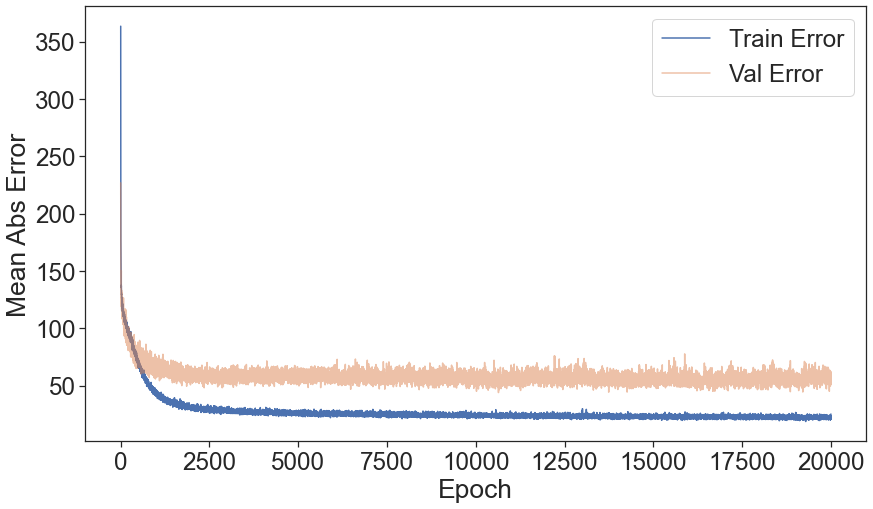

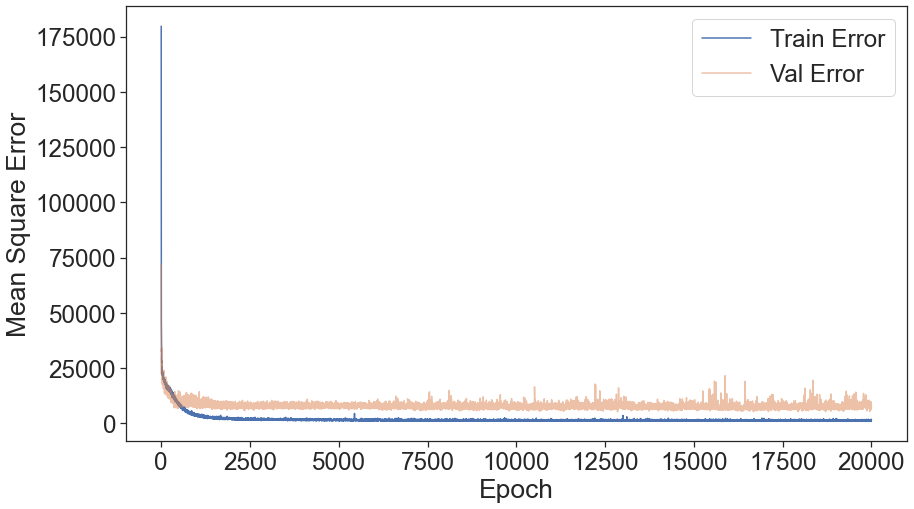

In [23]:
def plot_history(history: pd.DataFrame)-> None:
    
    plt.figure(figsize=(14,8))
    
    #plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], alpha=0.5, label='Val Error')
#     plt.ylim([0,10])
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], alpha=0.5, label='Val Error')
#     plt.ylim([0,50])
    plt.legend()
    plt.show()
    
plot_history(history)

3/3 [==============================] - 0s 8ms/step


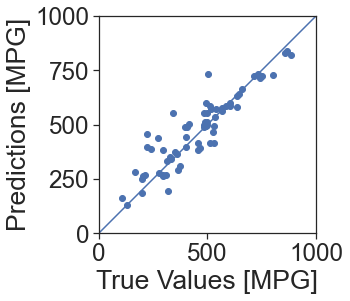

In [24]:
test_predictions = model.predict(test_pcc_2).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

3/3 [==============================] - 0s 2ms/step


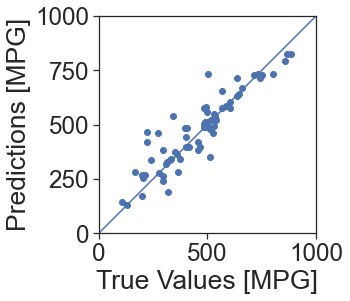

In [25]:
test_predictions = model.predict(test_pcc_2).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [26]:
yhats = [model.predict(test_pcc_2).flatten() for _ in range(100)]

3/3 [==============================] - 0s 3ms/step


In [27]:
df1 = pd.DataFrame(yhats).T


In [28]:
df1.head()

0           1           2           3           4           5   \
0  488.834900  490.867950  490.314240  488.403320  490.649994  491.028595   
1  346.905090  338.079315  356.482697  352.338989  392.902405  335.117065   
2  498.010834  490.726715  493.643494  499.665070  498.317993  488.464478   
3  381.208984  380.738983  383.565063  381.374634  370.692871  378.426025   
4  496.560425  497.491760  495.310608  497.695129  494.334229  493.955170   

           6           7           8           9           10          11  \
0  490.277161  490.807922  492.163086  491.371368  491.986298  488.986938   
1  355.345520  352.269012  347.968506  340.872620  316.284485  347.885681   
2  500.327484  499.041351  488.219604  496.550537  450.356506  487.131775   
3  380.464661  384.083618  382.314697  375.986450  380.992554  385.665894   
4  494.048096  495.734741  494.497437  496.445404  494.473999  495.557617   

           12          13          14          15          16          17  \
0  489.799561  490.540680  490.744080  490.109680  490.226929  490.772278   
1  385.425323  342.205170  288.940826  352.625061  352.244202  379.960999   
2  496.279297  497.880524  499.056854  464.278259  496.675842  495.279419   
3  382.434082  379.962067  378.943634  383.233276  378.604889  382.622620   
4  497.223999  496.371918  495.999695  498.443085  494.365906  495.710876   

           18          19          20          21          22          23  \
0  491.036865  489.828064  488.988037  491.893707  491.987183  489.953796   
1  335.143768  357.533447  351.789886  319.589539  343.747742  348.986694   
2  497.177490  495.946381  497.725769  488.893982  496.562256  476.282623   
3  379.027344  382.543304  382.059509  382.737732  380.837830  381.192657   
4  494.294250  496.333984  497.950195  495.976349  496.668884  496.132935   

           24          25          26          27          28          29  \
0  491.854889  490.462158  489.793427  490.662537  491.480713  490.437256   
1  350.704834  292.059174  337.305389  339.746948  345.670471  367.470551   
2  498.943909  488.900696  489.126648  506.803406  498.067871  491.135315   
3  381.887573  381.766418  383.742859  382.655029  378.392212  378.934753   
4  494.159210  494.342743  495.231506  495.355316  494.497498  501.139496   

           30          31          32          33          34          35  \
0  490.673309  490.076141  490.927979  490.215576  492.019592  489.438354   
1  392.107605  349.917542  379.823181  380.939270  375.486664  310.860168   
2  500.592529  490.128204  495.440186  496.135345  486.612122  496.048462   
3  377.147827  379.668030  382.049286  382.200500  379.334412  383.580505   
4  494.155457  494.348999  497.058899  494.581604  494.516510  523.320068   

           36          37          38          39          40          41  \
0  490.968506  491.294037  491.678955  490.800751  490.798431  491.181396   
1  347.768524  383.781128  359.613434  349.621704  348.892578  347.407623   
2  460.994781  500.392212  496.484894  469.716553  471.145782  497.985168   
3  376.991882  377.089966  382.273010  383.694702  383.736023  380.698822   
4  495.661926  496.416931  494.705688  497.825867  494.426727  494.634003   

           42          43          44          45          46          47  \
0  491.930542  491.469360  490.747681  490.880096  489.754028  492.096741   
1  299.890442  268.951813  331.940247  340.086212  330.692566  340.605499   
2  497.698090  498.981812  497.733734  492.011078  495.847565  479.212433   
3  379.878906  380.129700  379.999420  381.032898  380.553802  383.503723   
4  495.819763  494.814697  493.977295  494.419250  504.976807  500.091888   

           48          49          50          51          52          53  \
0  489.542480  491.185516  491.443939  493.477234  490.540161  489.233368   
1  330.229248  359.913910  296.343445  350.785278  330.220642  336.975098   
2  494.280518  485.754944  494.402039  485.853699  478.227753  492.197693   

# 7. Results Visualization

### 7.1 Error Plot

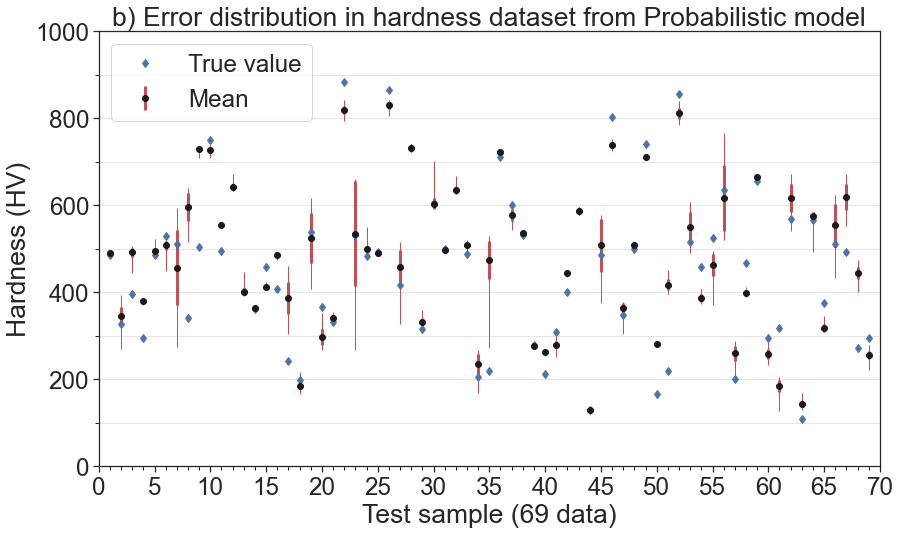

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
x=df1
#y_test=y_test.to_frame()
# construct some data like what you have:
#x = np.random.randn(100, 8)
mins = x.min(axis=1)
maxes = x.max(axis=1)

#means = y_test
means = x.mean(axis=1)

std = x.std(axis=1)

# create stacked errorbars:
plt.figure(figsize=(14,8))
plt.errorbar(np.arange(start=1, stop=70, step=1), means, std, fmt='ok',ecolor='r', lw=3,  label="Mean",linestyle = 'None')
plt.errorbar(np.arange(start=1, stop=70, step=1), means, [means - mins, maxes - means],
             fmt='.k', ecolor='r', lw=1)
plt.plot(np.arange(start=1, stop=70, step=1),y_test, 'd', label="True value")
             
plt.xlim(0, 70)
plt.ylim(0, 1000)

x_label = np.arange(0,71,5)
plt.xticks(x_label)

plt.gca().yaxis.set_minor_locator(tck.AutoMinorLocator(2))
plt.gca().xaxis.set_minor_locator(tck.AutoMinorLocator(5))

plt.xlabel('Test sample (69 data)')
plt.ylabel('Hardness (HV)')
plt.title('b) Error distribution in hardness dataset from Probabilistic model')
plt.grid(True,axis='y',alpha=0.5)
plt.grid(which='minor',axis='y',alpha=0.5)
             
plt.legend(frameon=True, loc='upper left')
plt.rcParams.update({'font.size': 18})
             
plt.savefig("plots\\hardness\\HV_probablistic_error.png",dpi=1200, bbox_inches='tight')
plt.show()

In [30]:
df1['y'] = y_test.values

In [31]:
df1

0           1           2           3           4           5  \
0   488.834900  490.867950  490.314240  488.403320  490.649994  491.028595   
1   346.905090  338.079315  356.482697  352.338989  392.902405  335.117065   
2   498.010834  490.726715  493.643494  499.665070  498.317993  488.464478   
3   381.208984  380.738983  383.565063  381.374634  370.692871  378.426025   
4   496.560425  497.491760  495.310608  497.695129  494.334229  493.955170   
..         ...         ...         ...         ...         ...         ...   
64  313.390961  315.141235  313.807281  314.241577  317.385132  323.533936   
65  594.172241  543.581116  622.891968  591.443481  560.172424  449.837128   
66  599.652771  618.177734  552.797485  585.611877  630.629639  632.892456   
67  456.260254  450.082581  462.090332  452.921478  438.606171  439.223877   
68  258.713104  251.932922  259.179779  277.287140  269.178864  245.761261   

             6           7           8           9          10          11  \
0   490.277161  490.807922  492.163086  491.371368  491.986298  488.986938   
1   355.345520  352.269012  347.968506  340.872620  316.284485  347.885681   
2   500.327484  499.041351  488.219604  496.550537  450.356506  487.131775   
3   380.464661  384.083618  382.314697  375.986450  380.992554  385.665894   
4   494.048096  495.734741  494.497437  496.445404  494.473999  495.557617   
..         ...         ...         ...         ...         ...         ...   
64  311.742920  314.688416  316.792267  313.401367  313.735474  310.076904   
65  538.662231  529.139160  608.935669  490.116425  593.440491  587.147522   
66  663.811584  603.857910  569.249817  617.193970  601.184509  632.476807   
67  438.776489  452.029541  439.291290  440.915344  463.545471  464.491089   
68  266.897736  250.712524  257.467712  241.844391  261.930450  243.374054   

            12          13          14          15          16          17  \
0   489.799561  490.540680  490.744080  490.109680  490.226929  490.772278   
1   385.425323  342.205170  288.940826  352.625061  352.244202  379.960999   
2   496.279297  497.880524  499.056854  464.278259  496.675842  495.279419   
3   382.434082  379.962067  378.943634  383.233276  378.604889  382.622620   
4   497.223999  496.371918  495.999695  498.443085  494.365906  495.710876   
..         ...         ...         ...         ...         ...         ...   
64  310.537964  319.273254  332.051575  314.366333  313.713074  312.523071   
65  526.643860  461.024475  585.725708  580.774780  568.648804  462.687988   
66  670.453369  648.864807  629.475830  659.120728  628.470703  635.960815   
67  459.409576  447.613647  427.660126  454.823486  429.757507  451.666138   
68  263.230225  260.605530  256.094330  265.377777  269.742798  250.872101   

            18          19          20          21          22          23  \
0   491.036865  489.828064  488.988037  491.893707  491.987183  489.953796   
1   335.143768  357.533447  351.789886  319.589539  343.747742  348.986694   
2   497.177490  495.946381  497.725769  488.893982  496.562256  476.282623   
3   379.027344  382.543304  382.059509  382.737732  380.837830  381.192657   
4   494.294250  496.333984  497.950195  495.976349  496.668884  496.132935   
..         ...         ...         ...         ...         ...         ...   
64  310.611450  312.259460  313.512939  315.608765  315.619080  346.174652   
65  467.455505  586.298950  572.052734  540.712097  585.003784  583.268494   
66  658.101562  576.839661  596.411438  606.387817  574.882324  604.873108   
67  446.249207  448.005463  447.374481  433.725891  446.629730  449.851257   
68  258.042053  269.051208  263.783600  252.797302  265.822876  253.606567   

            24          25          26          27          28          29  \
0   491.854889  490.462158  489.793427  490.662537  491.480713  490.437256   
1   350.704834  292.059174  337.305389  339.746948  345.670471  367.470551   
2   498.943909  488.900696  489

In [32]:
import itertools

sample_preds = list(itertools.chain.from_iterable([[(j, x[-1]) for j in x if j != x[-1]] for x in df1.values]))

In [33]:
sample_preds[:15]

[(488.83489990234375, 485.0),
 (490.8679504394531, 485.0),
 (490.3142395019531, 485.0),
 (488.4033203125, 485.0),
 (490.6499938964844, 485.0),
 (491.0285949707031, 485.0),
 (490.27716064453125, 485.0),
 (490.80792236328125, 485.0),
 (492.1630859375, 485.0),
 (491.3713684082031, 485.0),
 (491.9862976074219, 485.0),
 (488.9869384765625, 485.0),
 (489.799560546875, 485.0),
 (490.5406799316406, 485.0),
 (490.74407958984375, 485.0)]

## 7.2 Scatter Plot

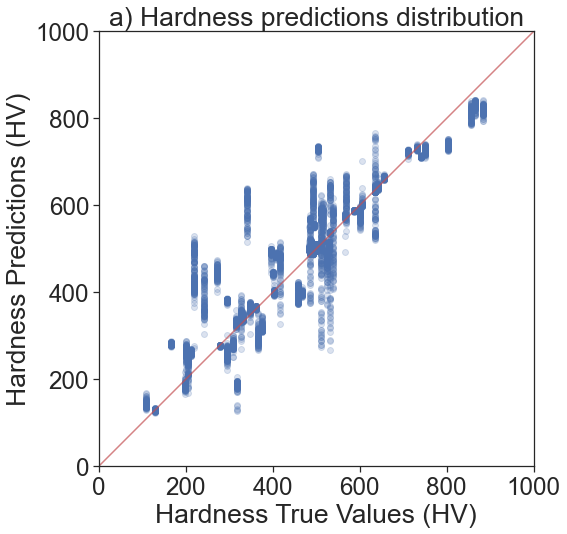

In [56]:
plt.figure(figsize=(8,8))
a = plt.axes(aspect = 'equal')
plt.scatter([x[1] for x in sample_preds], [x[0] for x in sample_preds],alpha=0.2)
plt.xlabel('Hardness True Values (HV)')
plt.ylabel('Hardness Predictions (HV)')
plt.title('a) Hardness predictions distribution')
lims = [0,1000]

plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims, color="r",alpha=0.7)
plt.rcParams.update({'font.size': 18})

plt.savefig("plots\\hardness\\HV_probablistic_scatter-plot.png",dpi=1200, bbox_inches='tight')

3/3 [==============================] - 0s 0s/step


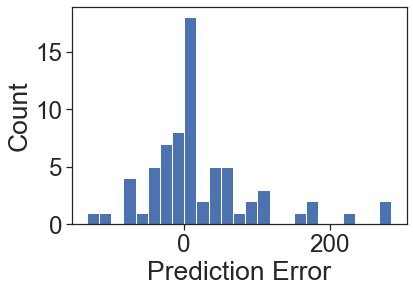

In [35]:
test_predictions = model.predict(test_pcc_2).flatten()
#test_predictions=test_predictions.reshape(69,1)

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
_=plt.ylabel('Count')

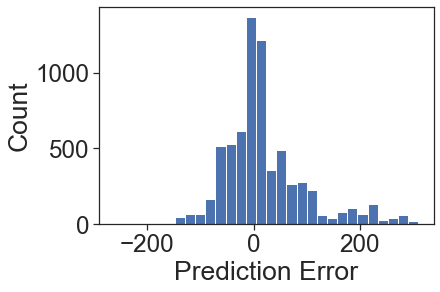

In [36]:
error = [x[0] - x[1] for x in sample_preds]
plt.hist(error, bins= 30)
plt.xlabel('Prediction Error')
_=plt.ylabel('Count')

3/3 [==============================] - 0s 8ms/step


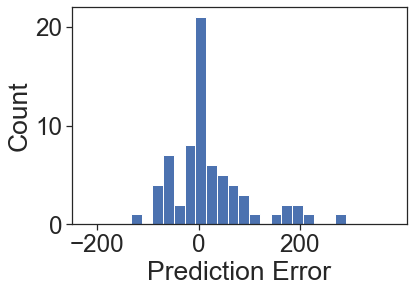

In [37]:
test_predictions = model.predict(test_pcc_2).flatten()
test_predictions=test_predictions.reshape(69,)
error = test_predictions - y_test
plt.hist(error, bins = 20)
plt.xlabel('Prediction Error')

x_label = np.arange(-200,400,200)
plt.xticks(x_label)
plt.xlim(-250, 410)
_=plt.ylabel('Count')

In [38]:
type(test_predictions)

numpy.ndarray

In [39]:
type(y_test)

pandas.core.series.Series

# 8. Results extraction in values

In [40]:
sd_pro = df1.std(axis=1)
mean_pro = df1.mean(axis=1)
min_pro = df1.min(axis=1)
max_pro = df1.max(axis=1)

In [41]:
test_real =pd.DataFrame(y_test.values)
test_real = pd.Series(test_real[0])

In [42]:
deviation_min_range = abs(mean_pro-min_pro)

deviation_max_range = abs(mean_pro-max_pro)

true_mean_deviation = abs(mean_pro-test_real)


In [50]:
print(max(sd_pro))
print(min(sd_pro))

120.32452991350748
0.9452992236275979


In [44]:
print(max(deviation_min_range))
print(max(deviation_max_range))

266.35172475682623
148.31810979559873


In [45]:
print(min(deviation_min_range))
print(min(deviation_max_range))

2.446406902653166
1.0019659363397295


In [46]:
print(max(true_mean_deviation))
print(min(true_mean_deviation))

252.12098376585703
0.17565374091122976


In [47]:
import pandas as pd
df_result = pd.DataFrame(y_test.values,columns=["True"])
df_result['Mean']= mean_pro
df_result['SD']= sd_pro

df_result['Dev. from high'] = deviation_max_range
df_result['Dev. from low'] = deviation_min_range

df_result['Dev. from true'] = true_mean_deviation
#df_result["y"] = y_test.values

In [48]:
from IPython.display import display, HTML
df_result.index = np.arange(1,len(df_result)+1)
display(HTML(df_result.to_html()))


# $R^2$

In [49]:
import tensorflow_addons as tfa
y_true = np.array(y_test)
y_pred = np.array(model.predict(test_pcc_2).flatten())
y_pred=y_pred.reshape(69,)
metric = tfa.metrics.r_square.RSquare()
metric.update_state(y_true, y_pred)
result = metric.result()
result.numpy()


3/3 [==============================] - 0s 0s/step


0.8113101